In [1]:
import pandas as pd
from prophet import Prophet

df = pd.read_csv('medium_posts.csv')
df.head()

published           domain  \
0  2012-08-13 22:54:53.510Z       medium.com   
1  2012-08-13 22:57:17.248Z       medium.com   
2  2016-11-04 23:40:43.364Z       medium.com   
3  2016-12-24 18:21:13.427Z       medium.com   
4  2015-09-22 21:37:48.207Z  blog.medium.com   

                                                 url  
0  https://medium.com/policy/medium-terms-of-serv...  
1  https://medium.com/policy/medium-privacy-polic...  
2  https://medium.com/@Medium/personalize-your-me...  
3  https://medium.com/holiday-poems/xmas-morning-...  
4  https://blog.medium.com/taking-a-side-on-net-n...

In [2]:
df['published_date'] = pd.to_datetime(df['published']).dt.date
df.head()

published           domain  \
0  2012-08-13 22:54:53.510Z       medium.com   
1  2012-08-13 22:57:17.248Z       medium.com   
2  2016-11-04 23:40:43.364Z       medium.com   
3  2016-12-24 18:21:13.427Z       medium.com   
4  2015-09-22 21:37:48.207Z  blog.medium.com   

                                                 url published_date  
0  https://medium.com/policy/medium-terms-of-serv...     2012-08-13  
1  https://medium.com/policy/medium-privacy-polic...     2012-08-13  
2  https://medium.com/@Medium/personalize-your-me...     2016-11-04  
3  https://medium.com/holiday-poems/xmas-morning-...     2016-12-24  
4  https://blog.medium.com/taking-a-side-on-net-n...     2015-09-22

In [3]:
df_by_day = df['published_date'].value_counts().sort_index()
df_by_day

1970-01-01      2
1970-01-18      3
2003-09-14      1
2004-04-04      1
2004-04-16      1
             ... 
2017-06-23    421
2017-06-24    277
2017-06-25    253
2017-06-26    207
2017-06-27     36
Name: published_date, Length: 1738, dtype: int64

In [4]:
df_by_day = df_by_day.iloc[2:]
df_by_day.head()

2003-09-14    1
2004-04-04    1
2004-04-16    1
2005-09-12    1
2006-02-19    1
Name: published_date, dtype: int64

In [5]:
df_by_day = df_by_day.to_frame()
df_by_day['ds'] = df_by_day.index

In [6]:
df_by_day.rename(columns={"published_date":"y"}, inplace=True)

In [7]:
df_by_day.head()

y          ds
2003-09-14  1  2003-09-14
2004-04-04  1  2004-04-04
2004-04-16  1  2004-04-16
2005-09-12  1  2005-09-12
2006-02-19  1  2006-02-19

In [8]:
m = Prophet()
m.fit(df_by_day)
future = m.make_future_dataframe(periods=365)
future.tail()

07:04:13 - cmdstanpy - INFO - Chain [1] start processing
07:04:13 - cmdstanpy - INFO - Chain [1] done processing


ds
2096 2018-06-23
2097 2018-06-24
2098 2018-06-25
2099 2018-06-26
2100 2018-06-27

In [9]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ds        yhat  yhat_lower  yhat_upper
2096 2018-06-23  417.643198  388.524240  448.490604
2097 2018-06-24  419.165458  387.922557  449.914802
2098 2018-06-25  445.453038  413.986900  473.394096
2099 2018-06-26  446.517992  417.890246  476.621711
2100 2018-06-27  447.282035  417.243902  478.204439

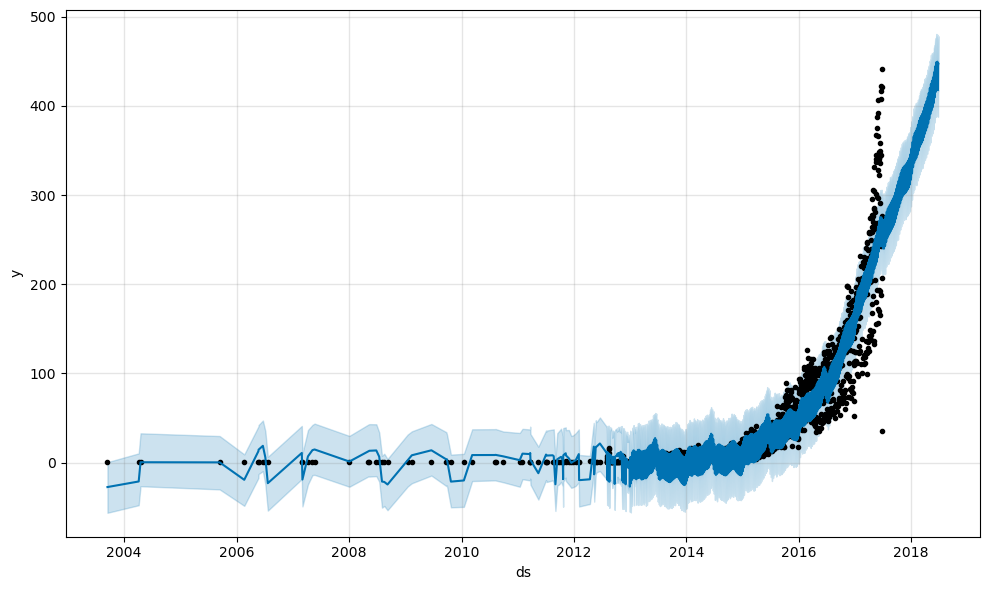

In [10]:
fig1 = m.plot(forecast)

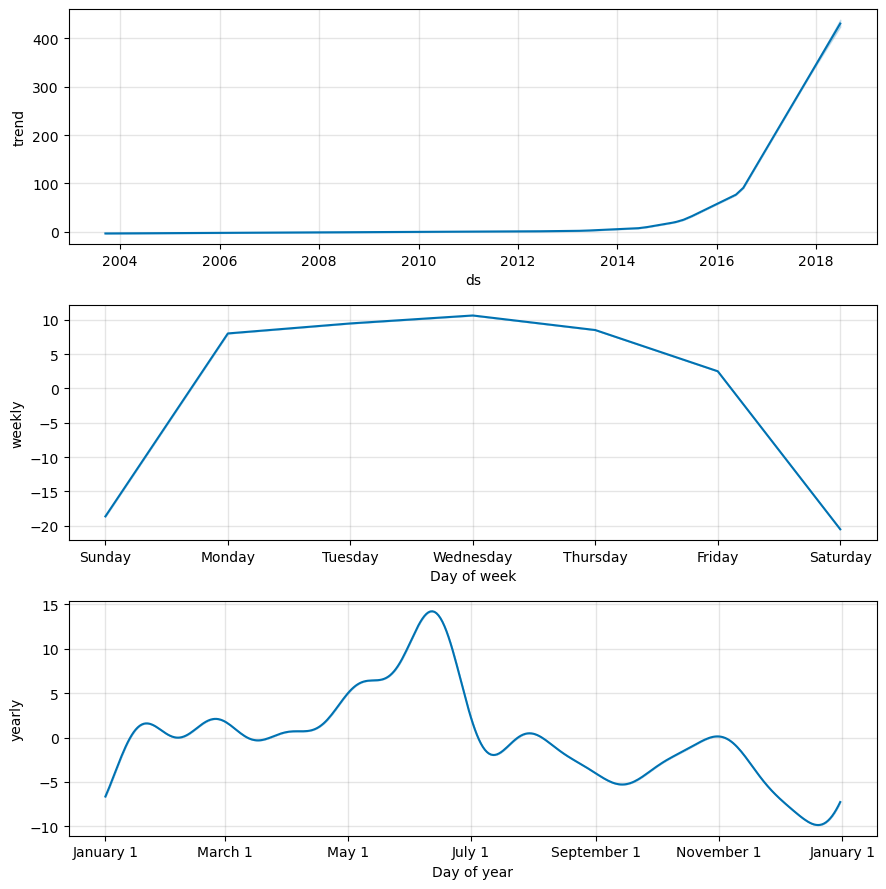

In [11]:
fig2 = m.plot_components(forecast)

In [12]:
from prophet.diagnostics import cross_validation
df_cv = cross_validation(m, initial='730 days', period='180 days', horizon = '365 days')
df_cv.head()

  0%|          | 0/22 [00:00<?, ?it/s]

07:04:15 - cmdstanpy - INFO - Chain [1] start processing
07:04:15 - cmdstanpy - INFO - Chain [1] done processing
07:04:15 - cmdstanpy - INFO - Chain [1] start processing
07:04:15 - cmdstanpy - INFO - Chain [1] done processing
07:04:15 - cmdstanpy - INFO - Chain [1] start processing
07:04:15 - cmdstanpy - INFO - Chain [1] done processing
07:04:15 - cmdstanpy - INFO - Chain [1] start processing
07:04:15 - cmdstanpy - INFO - Chain [1] done processing
07:04:15 - cmdstanpy - INFO - Chain [1] start processing
07:04:15 - cmdstanpy - INFO - Chain [1] done processing
07:04:15 - cmdstanpy - INFO - Chain [1] start processing
07:04:15 - cmdstanpy - INFO - Chain [1] done processing
07:04:15 - cmdstanpy - INFO - Chain [1] start processing
07:04:15 - cmdstanpy - INFO - Chain [1] done processing
07:04:16 - cmdstanpy - INFO - Chain [1] start processing
07:04:16 - cmdstanpy - INFO - Chain [1] done processing
07:04:16 - cmdstanpy - INFO - Chain [1] start processing
07:04:16 - cmdstanpy - INFO - Chain [1]

ds  yhat  yhat_lower  yhat_upper  y     cutoff
0 2006-05-22   1.0         1.0         1.0  1 2006-02-20
1 2006-05-23   1.0         1.0         1.0  1 2006-02-20
2 2006-06-20   1.0         1.0         1.0  1 2006-02-20
3 2006-07-06   1.0         1.0         1.0  1 2006-02-20
4 2006-07-22   1.0         1.0         1.0  1 2006-02-20

In [13]:
from prophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.head()

horizon         mse       rmse       mae      mape     mdape     smape  \
0 40 days  143.533346  11.980540  7.379880  0.355212  0.268886  0.373707   
1 41 days  148.165784  12.172337  7.432732  0.349104  0.267790  0.370572   
2 42 days  151.902328  12.324866  7.440108  0.349303  0.263778  0.368299   
3 43 days  150.048804  12.249441  7.372480  0.347940  0.263778  0.366005   
4 44 days  146.535586  12.105188  7.291083  0.346397  0.264278  0.365489   

   coverage  
0  0.491152  
1  0.501511  
2  0.510574  
3  0.514890  
4  0.518343

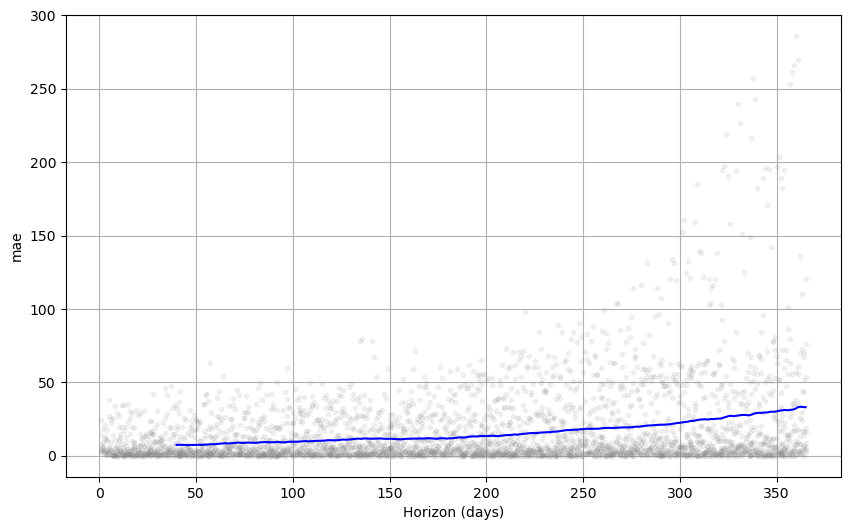

In [14]:
from prophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='mae')

In [19]:
import itertools
import numpy as np
import pandas as pd

param_grid = {  
    'changepoint_prior_scale': [0.001, 0.01, 0.1, 0.5],
    'seasonality_prior_scale': [0.01, 0.1, 1.0, 10.0],
    'holidays_prior_scale' : [0.01, 0.1, 1.0, 10.0],
    'seasonality_mode' : ['additive', 'multiplicative'],
    'changepoint_range' : [0.8, 0.95]
}

# Generate all combinations of parameters
all_params = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())]
rmses = []  # Store the RMSEs for each params here
maes = []

# Use cross validation to evaluate all parameters
for params in all_params:
    m = Prophet(**params).fit(df_by_day)  # Fit model with given params
#     df_cv = cross_validation(m, cutoffs=cutoffs, horizon='30 days', parallel="processes")
    df_cv = cross_validation(m, initial='730 days', period='180 days', horizon = '365 days', parallel="processes")
    df_p = performance_metrics(df_cv, rolling_window=1)
    rmses.append(df_p['rmse'].values[0])
    maes.append(df_p['mae'].values[0])

# Find the best parameters
tuning_results = pd.DataFrame(all_params)
tuning_results['rmse'] = rmses
tuning_results['mae'] = maes
print(tuning_results)

10:35:29 - cmdstanpy - INFO - Chain [1] start processing
10:35:29 - cmdstanpy - INFO - Chain [1] done processing
10:35:29 - cmdstanpy - INFO - Chain [1] start processing
10:35:29 - cmdstanpy - INFO - Chain [1] start processing
10:35:29 - cmdstanpy - INFO - Chain [1] start processing
10:35:29 - cmdstanpy - INFO - Chain [1] start processing
10:35:29 - cmdstanpy - INFO - Chain [1] done processing
10:35:29 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
10:35:29 - cmdstanpy - INFO - Chain [1] start processing
10:35:29 - cmdstanpy - INFO - Chain [1] start processing
10:35:29 - cmdstanpy - INFO - Chain [1] done processing
10:35:29 - cmdstanpy - INFO - Chain [1] start processing
10:35:29 - cmdstanpy - INFO - Chain [1] done processing
10:35:29 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
10:35:29

10:35:34 - cmdstanpy - INFO - Chain [1] done processing
10:35:34 - cmdstanpy - INFO - Chain [1] done processing
10:35:34 - cmdstanpy - INFO - Chain [1] done processing
10:35:34 - cmdstanpy - INFO - Chain [1] start processing
10:35:34 - cmdstanpy - INFO - Chain [1] start processing
10:35:34 - cmdstanpy - INFO - Chain [1] start processing
10:35:34 - cmdstanpy - INFO - Chain [1] start processing
10:35:34 - cmdstanpy - INFO - Chain [1] start processing
10:35:34 - cmdstanpy - INFO - Chain [1] done processing
10:35:35 - cmdstanpy - INFO - Chain [1] done processing
10:35:35 - cmdstanpy - INFO - Chain [1] done processing
10:35:35 - cmdstanpy - INFO - Chain [1] done processing
10:35:35 - cmdstanpy - INFO - Chain [1] done processing
10:35:35 - cmdstanpy - INFO - Chain [1] done processing
10:35:35 - cmdstanpy - INFO - Chain [1] done processing
10:35:35 - cmdstanpy - INFO - Chain [1] start processing
10:35:35 - cmdstanpy - INFO - Chain [1] done processing
10:35:35 - cmdstanpy - INFO - Chain [1] st

10:35:40 - cmdstanpy - INFO - Chain [1] done processing
10:35:40 - cmdstanpy - INFO - Chain [1] done processing
10:35:40 - cmdstanpy - INFO - Chain [1] done processing
10:35:40 - cmdstanpy - INFO - Chain [1] done processing
10:35:40 - cmdstanpy - INFO - Chain [1] done processing
10:35:40 - cmdstanpy - INFO - Chain [1] done processing
10:35:40 - cmdstanpy - INFO - Chain [1] done processing
10:35:40 - cmdstanpy - INFO - Chain [1] done processing
10:35:40 - cmdstanpy - INFO - Chain [1] start processing
10:35:41 - cmdstanpy - INFO - Chain [1] done processing
10:35:41 - cmdstanpy - INFO - Chain [1] start processing
10:35:41 - cmdstanpy - INFO - Chain [1] start processing
10:35:41 - cmdstanpy - INFO - Chain [1] start processing
10:35:41 - cmdstanpy - INFO - Chain [1] start processing
10:35:41 - cmdstanpy - INFO - Chain [1] done processing
10:35:41 - cmdstanpy - INFO - Chain [1] start processing
10:35:41 - cmdstanpy - INFO - Chain [1] done processing
10:35:41 - cmdstanpy - INFO - Chain [1] st

Optimization terminated abnormally. Falling back to Newton.
10:35:46 - cmdstanpy - INFO - Chain [1] start processing
10:35:46 - cmdstanpy - INFO - Chain [1] start processing
10:35:46 - cmdstanpy - INFO - Chain [1] start processing
10:35:46 - cmdstanpy - INFO - Chain [1] done processing
10:35:46 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
10:35:46 - cmdstanpy - INFO - Chain [1] done processing
10:35:46 - cmdstanpy - INFO - Chain [1] start processing
10:35:46 - cmdstanpy - INFO - Chain [1] start processing
10:35:46 - cmdstanpy - INFO - Chain [1] start processing
10:35:46 - cmdstanpy - INFO - Chain [1] start processing
10:35:46 - cmdstanpy - INFO - Chain [1] start processing
10:35:46 - cmdstanpy - INFO - Chain [1] done processing
10:35:46 - cmdstanpy - INFO - Chain [1] done processing
10:35:46 - cmdstanpy - INFO - Chain [1] done processing
10:35:46 - cmdstanpy - INFO - Chain [1] done pro

10:35:53 - cmdstanpy - INFO - Chain [1] done processing
10:35:53 - cmdstanpy - INFO - Chain [1] done processing
10:35:53 - cmdstanpy - INFO - Chain [1] done processing
10:35:53 - cmdstanpy - INFO - Chain [1] done processing
10:35:53 - cmdstanpy - INFO - Chain [1] done processing
10:35:53 - cmdstanpy - INFO - Chain [1] done processing
10:35:54 - cmdstanpy - INFO - Chain [1] start processing
10:35:54 - cmdstanpy - INFO - Chain [1] done processing
10:35:54 - cmdstanpy - INFO - Chain [1] start processing
10:35:54 - cmdstanpy - INFO - Chain [1] start processing
10:35:54 - cmdstanpy - INFO - Chain [1] start processing
10:35:54 - cmdstanpy - INFO - Chain [1] done processing
10:35:54 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
10:35:54 - cmdstanpy - INFO - Chain [1] start processing
10:35:54 - cmdstanpy - INFO - Chain [1] start processing
10:35:54 - cmdstanpy - INFO - Chain [1] start processi

10:36:00 - cmdstanpy - INFO - Chain [1] done processing
10:36:00 - cmdstanpy - INFO - Chain [1] start processing
10:36:00 - cmdstanpy - INFO - Chain [1] start processing
10:36:00 - cmdstanpy - INFO - Chain [1] start processing
10:36:00 - cmdstanpy - INFO - Chain [1] start processing
10:36:00 - cmdstanpy - INFO - Chain [1] start processing
10:36:00 - cmdstanpy - INFO - Chain [1] done processing
10:36:00 - cmdstanpy - INFO - Chain [1] done processing
10:36:00 - cmdstanpy - INFO - Chain [1] done processing
10:36:00 - cmdstanpy - INFO - Chain [1] start processing
10:36:00 - cmdstanpy - INFO - Chain [1] start processing
10:36:00 - cmdstanpy - INFO - Chain [1] start processing
10:36:00 - cmdstanpy - INFO - Chain [1] start processing
10:36:00 - cmdstanpy - INFO - Chain [1] done processing
10:36:00 - cmdstanpy - INFO - Chain [1] start processing
10:36:00 - cmdstanpy - INFO - Chain [1] done processing
10:36:00 - cmdstanpy - INFO - Chain [1] done processing
10:36:00 - cmdstanpy - INFO - Chain [1

10:36:06 - cmdstanpy - INFO - Chain [1] start processing
10:36:06 - cmdstanpy - INFO - Chain [1] done processing
10:36:06 - cmdstanpy - INFO - Chain [1] start processing
10:36:06 - cmdstanpy - INFO - Chain [1] start processing
10:36:06 - cmdstanpy - INFO - Chain [1] start processing
10:36:06 - cmdstanpy - INFO - Chain [1] done processing
10:36:06 - cmdstanpy - INFO - Chain [1] done processing
10:36:06 - cmdstanpy - INFO - Chain [1] done processing
10:36:06 - cmdstanpy - INFO - Chain [1] done processing
10:36:06 - cmdstanpy - INFO - Chain [1] done processing
10:36:06 - cmdstanpy - INFO - Chain [1] done processing
10:36:06 - cmdstanpy - INFO - Chain [1] done processing
10:36:06 - cmdstanpy - INFO - Chain [1] done processing
10:36:07 - cmdstanpy - INFO - Chain [1] done processing
10:36:07 - cmdstanpy - INFO - Chain [1] start processing
10:36:07 - cmdstanpy - INFO - Chain [1] done processing
10:36:07 - cmdstanpy - INFO - Chain [1] start processing
10:36:07 - cmdstanpy - INFO - Chain [1] st

10:36:14 - cmdstanpy - INFO - Chain [1] start processing
10:36:14 - cmdstanpy - INFO - Chain [1] start processing
10:36:14 - cmdstanpy - INFO - Chain [1] done processing
10:36:14 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
10:36:14 - cmdstanpy - INFO - Chain [1] start processing
Optimization terminated abnormally. Falling back to Newton.
10:36:14 - cmdstanpy - INFO - Chain [1] start processing
10:36:14 - cmdstanpy - INFO - Chain [1] done processing
10:36:14 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
10:36:14 - cmdstanpy - INFO - Chain [1] start processing
10:36:14 - cmdstanpy - INFO - Chain [1] start processing
10:36:14 - cmdstanpy - INFO - Chain [1] done processing
10:36:14 - cmdstanpy - INFO - Chain [1] start processing
10:36:14 - cmdstanpy - INFO - Chain [1] start processing
10:36:14 - cmdstanpy - INFO - Chain [1] start processing
10:36:1

10:36:21 - cmdstanpy - INFO - Chain [1] start processing
10:36:21 - cmdstanpy - INFO - Chain [1] start processing
10:36:21 - cmdstanpy - INFO - Chain [1] done processing
10:36:21 - cmdstanpy - INFO - Chain [1] start processing
10:36:21 - cmdstanpy - INFO - Chain [1] start processing
10:36:21 - cmdstanpy - INFO - Chain [1] done processing
10:36:21 - cmdstanpy - INFO - Chain [1] done processing
10:36:21 - cmdstanpy - INFO - Chain [1] done processing
10:36:21 - cmdstanpy - INFO - Chain [1] done processing
10:36:21 - cmdstanpy - INFO - Chain [1] done processing
10:36:22 - cmdstanpy - INFO - Chain [1] done processing
10:36:24 - cmdstanpy - INFO - Chain [1] done processing
10:36:24 - cmdstanpy - INFO - Chain [1] start processing
10:36:24 - cmdstanpy - INFO - Chain [1] done processing
10:36:24 - cmdstanpy - INFO - Chain [1] start processing
10:36:24 - cmdstanpy - INFO - Chain [1] start processing
10:36:24 - cmdstanpy - INFO - Chain [1] start processing
10:36:24 - cmdstanpy - INFO - Chain [1] 

10:36:30 - cmdstanpy - INFO - Chain [1] done processing
10:36:30 - cmdstanpy - INFO - Chain [1] done processing
10:36:30 - cmdstanpy - INFO - Chain [1] done processing
10:36:30 - cmdstanpy - INFO - Chain [1] done processing
10:36:31 - cmdstanpy - INFO - Chain [1] done processing
10:36:31 - cmdstanpy - INFO - Chain [1] start processing
10:36:31 - cmdstanpy - INFO - Chain [1] done processing
10:36:31 - cmdstanpy - INFO - Chain [1] start processing
10:36:31 - cmdstanpy - INFO - Chain [1] start processing
10:36:31 - cmdstanpy - INFO - Chain [1] start processing
10:36:31 - cmdstanpy - INFO - Chain [1] start processing
10:36:31 - cmdstanpy - INFO - Chain [1] done processing
10:36:31 - cmdstanpy - INFO - Chain [1] start processing
10:36:31 - cmdstanpy - INFO - Chain [1] start processing
10:36:31 - cmdstanpy - INFO - Chain [1] done processing
10:36:31 - cmdstanpy - INFO - Chain [1] done processing
10:36:31 - cmdstanpy - INFO - Chain [1] start processing
10:36:31 - cmdstanpy - INFO - Chain [1] 

10:36:36 - cmdstanpy - INFO - Chain [1] done processing
10:36:36 - cmdstanpy - INFO - Chain [1] start processing
10:36:36 - cmdstanpy - INFO - Chain [1] done processing
10:36:36 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
10:36:36 - cmdstanpy - INFO - Chain [1] start processing
10:36:36 - cmdstanpy - INFO - Chain [1] start processing
10:36:36 - cmdstanpy - INFO - Chain [1] start processing
10:36:36 - cmdstanpy - INFO - Chain [1] start processing
10:36:36 - cmdstanpy - INFO - Chain [1] start processing
10:36:36 - cmdstanpy - INFO - Chain [1] done processing
10:36:36 - cmdstanpy - INFO - Chain [1] done processing
10:36:36 - cmdstanpy - INFO - Chain [1] done processing
10:36:36 - cmdstanpy - INFO - Chain [1] done processing
10:36:36 - cmdstanpy - INFO - Chain [1] done processing
10:36:36 - cmdstanpy - INFO - Chain [1] done processing
10:36:36 - cmdstanpy - INFO - Chain [1] done processin

10:36:42 - cmdstanpy - INFO - Chain [1] done processing
10:36:42 - cmdstanpy - INFO - Chain [1] done processing
10:36:42 - cmdstanpy - INFO - Chain [1] done processing
10:36:42 - cmdstanpy - INFO - Chain [1] start processing
10:36:42 - cmdstanpy - INFO - Chain [1] done processing
10:36:42 - cmdstanpy - INFO - Chain [1] start processing
10:36:42 - cmdstanpy - INFO - Chain [1] start processing
10:36:42 - cmdstanpy - INFO - Chain [1] start processing
10:36:42 - cmdstanpy - INFO - Chain [1] done processing
10:36:42 - cmdstanpy - INFO - Chain [1] start processing
10:36:42 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
10:36:42 - cmdstanpy - INFO - Chain [1] start processing
10:36:42 - cmdstanpy - INFO - Chain [1] start processing
10:36:42 - cmdstanpy - INFO - Chain [1] start processing
10:36:42 - cmdstanpy - INFO - Chain [1] done processing
10:36:42 - cmdstanpy - INFO - Chain [1] done process

10:36:56 - cmdstanpy - INFO - Chain [1] done processing
10:36:56 - cmdstanpy - INFO - Chain [1] start processing
10:36:56 - cmdstanpy - INFO - Chain [1] done processing
10:36:56 - cmdstanpy - INFO - Chain [1] start processing
10:36:56 - cmdstanpy - INFO - Chain [1] start processing
10:36:56 - cmdstanpy - INFO - Chain [1] start processing
10:36:56 - cmdstanpy - INFO - Chain [1] start processing
10:36:56 - cmdstanpy - INFO - Chain [1] done processing
10:36:56 - cmdstanpy - INFO - Chain [1] start processing
10:36:56 - cmdstanpy - INFO - Chain [1] start processing
10:36:56 - cmdstanpy - INFO - Chain [1] start processing
10:36:56 - cmdstanpy - INFO - Chain [1] start processing
10:36:56 - cmdstanpy - INFO - Chain [1] done processing
10:36:56 - cmdstanpy - INFO - Chain [1] done processing
10:36:56 - cmdstanpy - INFO - Chain [1] start processing
10:36:56 - cmdstanpy - INFO - Chain [1] start processing
10:36:57 - cmdstanpy - INFO - Chain [1] done processing
10:36:57 - cmdstanpy - INFO - Chain [

10:37:21 - cmdstanpy - INFO - Chain [1] done processing
10:37:21 - cmdstanpy - INFO - Chain [1] start processing
10:37:21 - cmdstanpy - INFO - Chain [1] start processing
10:37:21 - cmdstanpy - INFO - Chain [1] start processing
10:37:21 - cmdstanpy - INFO - Chain [1] start processing
10:37:21 - cmdstanpy - INFO - Chain [1] done processing
10:37:21 - cmdstanpy - INFO - Chain [1] start processing
10:37:21 - cmdstanpy - INFO - Chain [1] start processing
10:37:21 - cmdstanpy - INFO - Chain [1] done processing
10:37:21 - cmdstanpy - INFO - Chain [1] start processing
10:37:21 - cmdstanpy - INFO - Chain [1] done processing
10:37:21 - cmdstanpy - INFO - Chain [1] start processing
10:37:21 - cmdstanpy - INFO - Chain [1] start processing
10:37:21 - cmdstanpy - INFO - Chain [1] start processing
10:37:21 - cmdstanpy - INFO - Chain [1] done processing
10:37:21 - cmdstanpy - INFO - Chain [1] done processing
10:37:22 - cmdstanpy - INFO - Chain [1] done processing
10:37:22 - cmdstanpy - INFO - Chain [1

10:37:43 - cmdstanpy - INFO - Chain [1] done processing
10:37:44 - cmdstanpy - INFO - Chain [1] done processing
10:37:44 - cmdstanpy - INFO - Chain [1] start processing
10:37:44 - cmdstanpy - INFO - Chain [1] done processing
10:37:44 - cmdstanpy - INFO - Chain [1] start processing
10:37:44 - cmdstanpy - INFO - Chain [1] start processing
10:37:44 - cmdstanpy - INFO - Chain [1] start processing
10:37:44 - cmdstanpy - INFO - Chain [1] start processing
10:37:44 - cmdstanpy - INFO - Chain [1] done processing
10:37:44 - cmdstanpy - INFO - Chain [1] start processing
10:37:44 - cmdstanpy - INFO - Chain [1] done processing
10:37:44 - cmdstanpy - INFO - Chain [1] start processing
10:37:44 - cmdstanpy - INFO - Chain [1] start processing
10:37:44 - cmdstanpy - INFO - Chain [1] start processing
10:37:44 - cmdstanpy - INFO - Chain [1] start processing
10:37:44 - cmdstanpy - INFO - Chain [1] done processing
10:37:44 - cmdstanpy - INFO - Chain [1] start processing
10:37:44 - cmdstanpy - INFO - Chain [

10:38:05 - cmdstanpy - INFO - Chain [1] start processing
10:38:11 - cmdstanpy - INFO - Chain [1] done processing
10:38:11 - cmdstanpy - INFO - Chain [1] start processing
10:38:11 - cmdstanpy - INFO - Chain [1] start processing
10:38:11 - cmdstanpy - INFO - Chain [1] start processing
10:38:11 - cmdstanpy - INFO - Chain [1] done processing
10:38:11 - cmdstanpy - INFO - Chain [1] start processing
10:38:11 - cmdstanpy - INFO - Chain [1] start processing
10:38:11 - cmdstanpy - INFO - Chain [1] start processing
10:38:11 - cmdstanpy - INFO - Chain [1] done processing
10:38:11 - cmdstanpy - INFO - Chain [1] start processing
10:38:11 - cmdstanpy - INFO - Chain [1] start processing
10:38:11 - cmdstanpy - INFO - Chain [1] done processing
10:38:11 - cmdstanpy - INFO - Chain [1] start processing
10:38:11 - cmdstanpy - INFO - Chain [1] start processing
10:38:11 - cmdstanpy - INFO - Chain [1] done processing
10:38:11 - cmdstanpy - INFO - Chain [1] done processing
10:38:11 - cmdstanpy - INFO - Chain [

10:38:30 - cmdstanpy - INFO - Chain [1] done processing
10:38:30 - cmdstanpy - INFO - Chain [1] start processing
10:38:30 - cmdstanpy - INFO - Chain [1] done processing
10:38:30 - cmdstanpy - INFO - Chain [1] start processing
10:38:30 - cmdstanpy - INFO - Chain [1] start processing
10:38:30 - cmdstanpy - INFO - Chain [1] start processing
10:38:30 - cmdstanpy - INFO - Chain [1] start processing
10:38:30 - cmdstanpy - INFO - Chain [1] done processing
10:38:30 - cmdstanpy - INFO - Chain [1] start processing
10:38:30 - cmdstanpy - INFO - Chain [1] done processing
10:38:30 - cmdstanpy - INFO - Chain [1] start processing
10:38:30 - cmdstanpy - INFO - Chain [1] start processing
10:38:30 - cmdstanpy - INFO - Chain [1] start processing
10:38:30 - cmdstanpy - INFO - Chain [1] start processing
10:38:30 - cmdstanpy - INFO - Chain [1] done processing
10:38:30 - cmdstanpy - INFO - Chain [1] start processing
10:38:30 - cmdstanpy - INFO - Chain [1] done processing
10:38:30 - cmdstanpy - INFO - Chain [

Optimization terminated abnormally. Falling back to Newton.
10:38:46 - cmdstanpy - INFO - Chain [1] start processing
10:38:52 - cmdstanpy - INFO - Chain [1] done processing
10:38:52 - cmdstanpy - INFO - Chain [1] start processing
10:38:52 - cmdstanpy - INFO - Chain [1] start processing
10:38:52 - cmdstanpy - INFO - Chain [1] start processing
10:38:52 - cmdstanpy - INFO - Chain [1] start processing
10:38:52 - cmdstanpy - INFO - Chain [1] done processing
10:38:52 - cmdstanpy - INFO - Chain [1] start processing
10:38:52 - cmdstanpy - INFO - Chain [1] done processing
10:38:52 - cmdstanpy - INFO - Chain [1] start processing
10:38:52 - cmdstanpy - INFO - Chain [1] start processing
10:38:52 - cmdstanpy - INFO - Chain [1] done processing
10:38:52 - cmdstanpy - INFO - Chain [1] start processing
10:38:52 - cmdstanpy - INFO - Chain [1] start processing
10:38:52 - cmdstanpy - INFO - Chain [1] start processing
10:38:52 - cmdstanpy - INFO - Chain [1] done processing
10:38:52 - cmdstanpy - INFO - Cha

10:39:08 - cmdstanpy - INFO - Chain [1] done processing
10:39:08 - cmdstanpy - INFO - Chain [1] done processing
10:39:08 - cmdstanpy - INFO - Chain [1] done processing
10:39:08 - cmdstanpy - INFO - Chain [1] done processing
10:39:08 - cmdstanpy - INFO - Chain [1] done processing
10:39:08 - cmdstanpy - INFO - Chain [1] done processing
10:39:09 - cmdstanpy - INFO - Chain [1] done processing
10:39:09 - cmdstanpy - INFO - Chain [1] start processing
10:39:09 - cmdstanpy - INFO - Chain [1] done processing
10:39:09 - cmdstanpy - INFO - Chain [1] start processing
10:39:09 - cmdstanpy - INFO - Chain [1] start processing
10:39:09 - cmdstanpy - INFO - Chain [1] start processing
10:39:09 - cmdstanpy - INFO - Chain [1] start processing
10:39:09 - cmdstanpy - INFO - Chain [1] done processing
10:39:09 - cmdstanpy - INFO - Chain [1] start processing
10:39:09 - cmdstanpy - INFO - Chain [1] start processing
10:39:09 - cmdstanpy - INFO - Chain [1] done processing
10:39:09 - cmdstanpy - INFO - Chain [1] s

10:39:37 - cmdstanpy - INFO - Chain [1] start processing
10:39:37 - cmdstanpy - INFO - Chain [1] start processing
10:39:37 - cmdstanpy - INFO - Chain [1] done processing
10:39:37 - cmdstanpy - INFO - Chain [1] done processing
10:39:37 - cmdstanpy - INFO - Chain [1] start processing
10:39:37 - cmdstanpy - INFO - Chain [1] start processing
10:39:37 - cmdstanpy - INFO - Chain [1] start processing
10:39:37 - cmdstanpy - INFO - Chain [1] start processing
10:39:37 - cmdstanpy - INFO - Chain [1] start processing
10:39:37 - cmdstanpy - INFO - Chain [1] done processing
10:39:37 - cmdstanpy - INFO - Chain [1] done processing
10:39:37 - cmdstanpy - INFO - Chain [1] done processing
10:39:37 - cmdstanpy - INFO - Chain [1] done processing
10:39:37 - cmdstanpy - INFO - Chain [1] done processing
10:39:37 - cmdstanpy - INFO - Chain [1] done processing
10:39:37 - cmdstanpy - INFO - Chain [1] done processing
10:39:37 - cmdstanpy - INFO - Chain [1] done processing
10:39:37 - cmdstanpy - INFO - Chain [1] s

10:40:01 - cmdstanpy - INFO - Chain [1] done processing
10:40:01 - cmdstanpy - INFO - Chain [1] done processing
10:40:01 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
10:40:01 - cmdstanpy - INFO - Chain [1] done processing
10:40:01 - cmdstanpy - INFO - Chain [1] start processing
10:40:01 - cmdstanpy - INFO - Chain [1] done processing
10:40:01 - cmdstanpy - INFO - Chain [1] done processing
10:40:01 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
10:40:01 - cmdstanpy - INFO - Chain [1] start processing
10:40:03 - cmdstanpy - INFO - Chain [1] done processing
10:40:05 - cmdstanpy - INFO - Chain [1] done processing
10:40:05 - cmdstanpy - INFO - Chain [1] start processing
10:40:05 - cmdstanpy - INFO - Chain [1] done processing
10:40:06 - cmdstanpy - INFO - Chain [1] start processing
10:40:06 - c

10:40:28 - cmdstanpy - INFO - Chain [1] done processing
10:40:28 - cmdstanpy - INFO - Chain [1] start processing
10:40:28 - cmdstanpy - INFO - Chain [1] start processing
10:40:28 - cmdstanpy - INFO - Chain [1] start processing
10:40:28 - cmdstanpy - INFO - Chain [1] start processing
10:40:28 - cmdstanpy - INFO - Chain [1] done processing
10:40:28 - cmdstanpy - INFO - Chain [1] start processing
10:40:28 - cmdstanpy - INFO - Chain [1] start processing
10:40:28 - cmdstanpy - INFO - Chain [1] done processing
10:40:28 - cmdstanpy - INFO - Chain [1] done processing
10:40:28 - cmdstanpy - INFO - Chain [1] done processing
10:40:28 - cmdstanpy - INFO - Chain [1] done processing
10:40:28 - cmdstanpy - INFO - Chain [1] done processing
10:40:28 - cmdstanpy - INFO - Chain [1] done processing
10:40:28 - cmdstanpy - INFO - Chain [1] done processing
10:40:28 - cmdstanpy - INFO - Chain [1] start processing
10:40:29 - cmdstanpy - INFO - Chain [1] done processing
10:40:29 - cmdstanpy - INFO - Chain [1] s

10:40:48 - cmdstanpy - INFO - Chain [1] done processing
10:40:48 - cmdstanpy - INFO - Chain [1] start processing
10:40:48 - cmdstanpy - INFO - Chain [1] start processing
10:40:48 - cmdstanpy - INFO - Chain [1] start processing
10:40:48 - cmdstanpy - INFO - Chain [1] done processing
10:40:48 - cmdstanpy - INFO - Chain [1] start processing
10:40:48 - cmdstanpy - INFO - Chain [1] start processing
10:40:48 - cmdstanpy - INFO - Chain [1] start processing
10:40:48 - cmdstanpy - INFO - Chain [1] done processing
10:40:48 - cmdstanpy - INFO - Chain [1] done processing
10:40:48 - cmdstanpy - INFO - Chain [1] done processing
10:40:48 - cmdstanpy - INFO - Chain [1] done processing
10:40:48 - cmdstanpy - INFO - Chain [1] done processing
10:40:48 - cmdstanpy - INFO - Chain [1] done processing
10:40:48 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
10:40:48 - cmdstanpy - INFO - Chain [1] done processing
Optimization terminated abnormally. Falling back to Newton

10:41:09 - cmdstanpy - INFO - Chain [1] start processing
10:41:09 - cmdstanpy - INFO - Chain [1] done processing
10:41:09 - cmdstanpy - INFO - Chain [1] start processing
10:41:09 - cmdstanpy - INFO - Chain [1] start processing
10:41:09 - cmdstanpy - INFO - Chain [1] start processing
10:41:09 - cmdstanpy - INFO - Chain [1] done processing
10:41:09 - cmdstanpy - INFO - Chain [1] start processing
10:41:09 - cmdstanpy - INFO - Chain [1] done processing
10:41:09 - cmdstanpy - INFO - Chain [1] start processing
10:41:09 - cmdstanpy - INFO - Chain [1] start processing
10:41:09 - cmdstanpy - INFO - Chain [1] done processing
10:41:09 - cmdstanpy - INFO - Chain [1] done processing
10:41:09 - cmdstanpy - INFO - Chain [1] done processing
10:41:09 - cmdstanpy - INFO - Chain [1] done processing
10:41:09 - cmdstanpy - INFO - Chain [1] done processing
10:41:09 - cmdstanpy - INFO - Chain [1] done processing
10:41:09 - cmdstanpy - INFO - Chain [1] done processing
10:41:09 - cmdstanpy - INFO - Chain [1] s

10:41:16 - cmdstanpy - INFO - Chain [1] done processing
10:41:16 - cmdstanpy - INFO - Chain [1] done processing
10:41:16 - cmdstanpy - INFO - Chain [1] done processing
10:41:16 - cmdstanpy - INFO - Chain [1] done processing
10:41:16 - cmdstanpy - INFO - Chain [1] start processing
10:41:16 - cmdstanpy - INFO - Chain [1] done processing
10:41:16 - cmdstanpy - INFO - Chain [1] start processing
10:41:16 - cmdstanpy - INFO - Chain [1] start processing
10:41:16 - cmdstanpy - INFO - Chain [1] start processing
10:41:16 - cmdstanpy - INFO - Chain [1] start processing
10:41:16 - cmdstanpy - INFO - Chain [1] done processing
10:41:16 - cmdstanpy - INFO - Chain [1] start processing
10:41:16 - cmdstanpy - INFO - Chain [1] start processing
10:41:16 - cmdstanpy - INFO - Chain [1] done processing
10:41:16 - cmdstanpy - INFO - Chain [1] start processing
10:41:16 - cmdstanpy - INFO - Chain [1] start processing
10:41:16 - cmdstanpy - INFO - Chain [1] done processing
10:41:16 - cmdstanpy - INFO - Chain [1]

10:41:23 - cmdstanpy - INFO - Chain [1] start processing
10:41:23 - cmdstanpy - INFO - Chain [1] start processing
10:41:23 - cmdstanpy - INFO - Chain [1] start processing
10:41:23 - cmdstanpy - INFO - Chain [1] done processing
10:41:23 - cmdstanpy - INFO - Chain [1] done processing
10:41:23 - cmdstanpy - INFO - Chain [1] start processing
10:41:23 - cmdstanpy - INFO - Chain [1] done processing
10:41:23 - cmdstanpy - INFO - Chain [1] done processing
10:41:23 - cmdstanpy - INFO - Chain [1] done processing
10:41:23 - cmdstanpy - INFO - Chain [1] done processing
10:41:23 - cmdstanpy - INFO - Chain [1] done processing
10:41:23 - cmdstanpy - INFO - Chain [1] done processing
10:41:23 - cmdstanpy - INFO - Chain [1] done processing
10:41:24 - cmdstanpy - INFO - Chain [1] start processing
10:41:24 - cmdstanpy - INFO - Chain [1] done processing
10:41:24 - cmdstanpy - INFO - Chain [1] start processing
10:41:24 - cmdstanpy - INFO - Chain [1] start processing
10:41:24 - cmdstanpy - INFO - Chain [1] s

10:41:30 - cmdstanpy - INFO - Chain [1] done processing
10:41:30 - cmdstanpy - INFO - Chain [1] start processing
10:41:30 - cmdstanpy - INFO - Chain [1] start processing
10:41:30 - cmdstanpy - INFO - Chain [1] start processing
10:41:30 - cmdstanpy - INFO - Chain [1] start processing
10:41:30 - cmdstanpy - INFO - Chain [1] done processing
10:41:30 - cmdstanpy - INFO - Chain [1] start processing
10:41:30 - cmdstanpy - INFO - Chain [1] start processing
10:41:31 - cmdstanpy - INFO - Chain [1] start processing
10:41:31 - cmdstanpy - INFO - Chain [1] done processing
10:41:31 - cmdstanpy - INFO - Chain [1] start processing
10:41:31 - cmdstanpy - INFO - Chain [1] start processing
10:41:31 - cmdstanpy - INFO - Chain [1] start processing
10:41:31 - cmdstanpy - INFO - Chain [1] done processing
10:41:31 - cmdstanpy - INFO - Chain [1] done processing
10:41:31 - cmdstanpy - INFO - Chain [1] done processing
10:41:31 - cmdstanpy - INFO - Chain [1] done processing
10:41:31 - cmdstanpy - INFO - Chain [1

10:41:37 - cmdstanpy - INFO - Chain [1] start processing
10:41:37 - cmdstanpy - INFO - Chain [1] done processing
10:41:37 - cmdstanpy - INFO - Chain [1] done processing
10:41:37 - cmdstanpy - INFO - Chain [1] done processing
10:41:37 - cmdstanpy - INFO - Chain [1] done processing
10:41:37 - cmdstanpy - INFO - Chain [1] done processing
10:41:37 - cmdstanpy - INFO - Chain [1] done processing
10:41:37 - cmdstanpy - INFO - Chain [1] done processing
10:41:38 - cmdstanpy - INFO - Chain [1] start processing
10:41:38 - cmdstanpy - INFO - Chain [1] done processing
10:41:38 - cmdstanpy - INFO - Chain [1] start processing
10:41:38 - cmdstanpy - INFO - Chain [1] start processing
10:41:38 - cmdstanpy - INFO - Chain [1] start processing
10:41:38 - cmdstanpy - INFO - Chain [1] start processing
10:41:38 - cmdstanpy - INFO - Chain [1] done processing
10:41:38 - cmdstanpy - INFO - Chain [1] done processing
10:41:38 - cmdstanpy - INFO - Chain [1] done processing
10:41:38 - cmdstanpy - INFO - Chain [1] st

10:41:45 - cmdstanpy - INFO - Chain [1] done processing
10:41:45 - cmdstanpy - INFO - Chain [1] start processing
10:41:45 - cmdstanpy - INFO - Chain [1] start processing
10:41:45 - cmdstanpy - INFO - Chain [1] start processing
10:41:45 - cmdstanpy - INFO - Chain [1] done processing
10:41:45 - cmdstanpy - INFO - Chain [1] start processing
10:41:45 - cmdstanpy - INFO - Chain [1] start processing
10:41:45 - cmdstanpy - INFO - Chain [1] start processing
10:41:45 - cmdstanpy - INFO - Chain [1] done processing
10:41:45 - cmdstanpy - INFO - Chain [1] done processing
10:41:45 - cmdstanpy - INFO - Chain [1] done processing
10:41:45 - cmdstanpy - INFO - Chain [1] done processing
10:41:45 - cmdstanpy - INFO - Chain [1] done processing
10:41:45 - cmdstanpy - INFO - Chain [1] done processing
10:41:45 - cmdstanpy - INFO - Chain [1] done processing
10:41:45 - cmdstanpy - INFO - Chain [1] done processing
10:41:45 - cmdstanpy - INFO - Chain [1] start processing
10:41:46 - cmdstanpy - INFO - Chain [1] d

10:41:52 - cmdstanpy - INFO - Chain [1] done processing
10:41:52 - cmdstanpy - INFO - Chain [1] done processing
10:41:52 - cmdstanpy - INFO - Chain [1] start processing
10:41:52 - cmdstanpy - INFO - Chain [1] done processing
10:41:52 - cmdstanpy - INFO - Chain [1] start processing
10:41:52 - cmdstanpy - INFO - Chain [1] start processing
10:41:52 - cmdstanpy - INFO - Chain [1] start processing
10:41:52 - cmdstanpy - INFO - Chain [1] done processing
10:41:52 - cmdstanpy - INFO - Chain [1] start processing
10:41:52 - cmdstanpy - INFO - Chain [1] start processing
10:41:52 - cmdstanpy - INFO - Chain [1] start processing
10:41:52 - cmdstanpy - INFO - Chain [1] start processing
10:41:52 - cmdstanpy - INFO - Chain [1] start processing
10:41:52 - cmdstanpy - INFO - Chain [1] start processing
10:41:52 - cmdstanpy - INFO - Chain [1] done processing
10:41:52 - cmdstanpy - INFO - Chain [1] done processing
10:41:52 - cmdstanpy - INFO - Chain [1] start processing
10:41:52 - cmdstanpy - INFO - Chain [

10:41:59 - cmdstanpy - INFO - Chain [1] start processing
10:41:59 - cmdstanpy - INFO - Chain [1] done processing
10:41:59 - cmdstanpy - INFO - Chain [1] start processing
10:41:59 - cmdstanpy - INFO - Chain [1] start processing
10:41:59 - cmdstanpy - INFO - Chain [1] done processing
10:41:59 - cmdstanpy - INFO - Chain [1] done processing
10:41:59 - cmdstanpy - INFO - Chain [1] done processing
10:41:59 - cmdstanpy - INFO - Chain [1] done processing
10:41:59 - cmdstanpy - INFO - Chain [1] done processing
10:41:59 - cmdstanpy - INFO - Chain [1] done processing
10:41:59 - cmdstanpy - INFO - Chain [1] done processing
10:41:59 - cmdstanpy - INFO - Chain [1] start processing
10:42:00 - cmdstanpy - INFO - Chain [1] done processing
10:42:00 - cmdstanpy - INFO - Chain [1] start processing
10:42:00 - cmdstanpy - INFO - Chain [1] start processing
10:42:00 - cmdstanpy - INFO - Chain [1] start processing
10:42:00 - cmdstanpy - INFO - Chain [1] start processing
10:42:00 - cmdstanpy - INFO - Chain [1] 

10:42:06 - cmdstanpy - INFO - Chain [1] start processing
10:42:06 - cmdstanpy - INFO - Chain [1] start processing
10:42:06 - cmdstanpy - INFO - Chain [1] start processing
10:42:06 - cmdstanpy - INFO - Chain [1] done processing
10:42:06 - cmdstanpy - INFO - Chain [1] start processing
10:42:06 - cmdstanpy - INFO - Chain [1] done processing
10:42:06 - cmdstanpy - INFO - Chain [1] start processing
10:42:06 - cmdstanpy - INFO - Chain [1] start processing
10:42:06 - cmdstanpy - INFO - Chain [1] start processing
10:42:06 - cmdstanpy - INFO - Chain [1] start processing
10:42:06 - cmdstanpy - INFO - Chain [1] start processing
10:42:06 - cmdstanpy - INFO - Chain [1] done processing
10:42:06 - cmdstanpy - INFO - Chain [1] done processing
10:42:07 - cmdstanpy - INFO - Chain [1] done processing
10:42:07 - cmdstanpy - INFO - Chain [1] done processing
10:42:07 - cmdstanpy - INFO - Chain [1] done processing
10:42:07 - cmdstanpy - INFO - Chain [1] done processing
10:42:07 - cmdstanpy - INFO - Chain [1]

10:42:14 - cmdstanpy - INFO - Chain [1] done processing
10:42:14 - cmdstanpy - INFO - Chain [1] done processing
10:42:14 - cmdstanpy - INFO - Chain [1] done processing
10:42:14 - cmdstanpy - INFO - Chain [1] done processing
10:42:14 - cmdstanpy - INFO - Chain [1] done processing
10:42:14 - cmdstanpy - INFO - Chain [1] done processing
10:42:14 - cmdstanpy - INFO - Chain [1] start processing
10:42:14 - cmdstanpy - INFO - Chain [1] done processing
10:42:15 - cmdstanpy - INFO - Chain [1] start processing
10:42:15 - cmdstanpy - INFO - Chain [1] start processing
10:42:15 - cmdstanpy - INFO - Chain [1] start processing
10:42:15 - cmdstanpy - INFO - Chain [1] start processing
10:42:15 - cmdstanpy - INFO - Chain [1] done processing
10:42:15 - cmdstanpy - INFO - Chain [1] start processing
10:42:15 - cmdstanpy - INFO - Chain [1] start processing
10:42:15 - cmdstanpy - INFO - Chain [1] start processing
10:42:15 - cmdstanpy - INFO - Chain [1] start processing
10:42:15 - cmdstanpy - INFO - Chain [1]

10:42:22 - cmdstanpy - INFO - Chain [1] start processing
10:42:22 - cmdstanpy - INFO - Chain [1] start processing
10:42:22 - cmdstanpy - INFO - Chain [1] start processing
10:42:22 - cmdstanpy - INFO - Chain [1] start processing
10:42:22 - cmdstanpy - INFO - Chain [1] done processing
10:42:22 - cmdstanpy - INFO - Chain [1] start processing
10:42:22 - cmdstanpy - INFO - Chain [1] done processing
10:42:22 - cmdstanpy - INFO - Chain [1] done processing
10:42:22 - cmdstanpy - INFO - Chain [1] done processing
10:42:22 - cmdstanpy - INFO - Chain [1] done processing
10:42:22 - cmdstanpy - INFO - Chain [1] done processing
10:42:22 - cmdstanpy - INFO - Chain [1] done processing
10:42:22 - cmdstanpy - INFO - Chain [1] done processing
10:42:22 - cmdstanpy - INFO - Chain [1] done processing
10:42:23 - cmdstanpy - INFO - Chain [1] start processing
10:42:23 - cmdstanpy - INFO - Chain [1] done processing
10:42:23 - cmdstanpy - INFO - Chain [1] start processing
10:42:23 - cmdstanpy - INFO - Chain [1] s

10:42:31 - cmdstanpy - INFO - Chain [1] start processing
10:42:32 - cmdstanpy - INFO - Chain [1] done processing
10:42:32 - cmdstanpy - INFO - Chain [1] start processing
10:42:32 - cmdstanpy - INFO - Chain [1] start processing
10:42:32 - cmdstanpy - INFO - Chain [1] start processing
10:42:32 - cmdstanpy - INFO - Chain [1] done processing
10:42:32 - cmdstanpy - INFO - Chain [1] start processing
10:42:32 - cmdstanpy - INFO - Chain [1] start processing
10:42:32 - cmdstanpy - INFO - Chain [1] start processing
10:42:32 - cmdstanpy - INFO - Chain [1] start processing
10:42:32 - cmdstanpy - INFO - Chain [1] start processing
10:42:32 - cmdstanpy - INFO - Chain [1] start processing
10:42:32 - cmdstanpy - INFO - Chain [1] start processing
10:42:32 - cmdstanpy - INFO - Chain [1] done processing
10:42:32 - cmdstanpy - INFO - Chain [1] done processing
10:42:32 - cmdstanpy - INFO - Chain [1] done processing
10:42:32 - cmdstanpy - INFO - Chain [1] done processing
10:42:32 - cmdstanpy - INFO - Chain [

10:42:40 - cmdstanpy - INFO - Chain [1] start processing
10:42:40 - cmdstanpy - INFO - Chain [1] done processing
10:42:40 - cmdstanpy - INFO - Chain [1] done processing
10:42:40 - cmdstanpy - INFO - Chain [1] done processing
10:42:40 - cmdstanpy - INFO - Chain [1] done processing
10:42:40 - cmdstanpy - INFO - Chain [1] done processing
10:42:41 - cmdstanpy - INFO - Chain [1] done processing
10:42:41 - cmdstanpy - INFO - Chain [1] done processing
10:42:41 - cmdstanpy - INFO - Chain [1] done processing
10:42:41 - cmdstanpy - INFO - Chain [1] start processing
10:42:41 - cmdstanpy - INFO - Chain [1] done processing
10:42:41 - cmdstanpy - INFO - Chain [1] start processing
10:42:41 - cmdstanpy - INFO - Chain [1] start processing
10:42:41 - cmdstanpy - INFO - Chain [1] start processing
10:42:41 - cmdstanpy - INFO - Chain [1] done processing
10:42:41 - cmdstanpy - INFO - Chain [1] start processing
10:42:41 - cmdstanpy - INFO - Chain [1] start processing
10:42:41 - cmdstanpy - INFO - Chain [1] s

10:42:50 - cmdstanpy - INFO - Chain [1] start processing
10:42:50 - cmdstanpy - INFO - Chain [1] done processing
10:42:50 - cmdstanpy - INFO - Chain [1] start processing
10:42:50 - cmdstanpy - INFO - Chain [1] start processing
10:42:50 - cmdstanpy - INFO - Chain [1] start processing
10:42:50 - cmdstanpy - INFO - Chain [1] done processing
10:42:50 - cmdstanpy - INFO - Chain [1] done processing
10:42:50 - cmdstanpy - INFO - Chain [1] start processing
10:42:50 - cmdstanpy - INFO - Chain [1] start processing
10:42:50 - cmdstanpy - INFO - Chain [1] start processing
10:42:51 - cmdstanpy - INFO - Chain [1] done processing
10:42:51 - cmdstanpy - INFO - Chain [1] done processing
10:42:51 - cmdstanpy - INFO - Chain [1] done processing
10:42:51 - cmdstanpy - INFO - Chain [1] done processing
10:42:51 - cmdstanpy - INFO - Chain [1] done processing
10:42:51 - cmdstanpy - INFO - Chain [1] done processing
10:42:51 - cmdstanpy - INFO - Chain [1] done processing
10:42:51 - cmdstanpy - INFO - Chain [1] s

10:43:00 - cmdstanpy - INFO - Chain [1] done processing
10:43:00 - cmdstanpy - INFO - Chain [1] done processing
10:43:00 - cmdstanpy - INFO - Chain [1] done processing
10:43:00 - cmdstanpy - INFO - Chain [1] done processing
10:43:00 - cmdstanpy - INFO - Chain [1] start processing
10:43:01 - cmdstanpy - INFO - Chain [1] done processing
10:43:01 - cmdstanpy - INFO - Chain [1] start processing
10:43:01 - cmdstanpy - INFO - Chain [1] start processing
10:43:01 - cmdstanpy - INFO - Chain [1] start processing
10:43:01 - cmdstanpy - INFO - Chain [1] start processing
10:43:01 - cmdstanpy - INFO - Chain [1] start processing
10:43:01 - cmdstanpy - INFO - Chain [1] done processing
10:43:01 - cmdstanpy - INFO - Chain [1] start processing
10:43:01 - cmdstanpy - INFO - Chain [1] start processing
10:43:01 - cmdstanpy - INFO - Chain [1] start processing
10:43:01 - cmdstanpy - INFO - Chain [1] done processing
10:43:01 - cmdstanpy - INFO - Chain [1] start processing
10:43:01 - cmdstanpy - INFO - Chain [1

10:43:10 - cmdstanpy - INFO - Chain [1] start processing
10:43:10 - cmdstanpy - INFO - Chain [1] start processing
10:43:10 - cmdstanpy - INFO - Chain [1] start processing
10:43:10 - cmdstanpy - INFO - Chain [1] start processing
10:43:10 - cmdstanpy - INFO - Chain [1] done processing
10:43:10 - cmdstanpy - INFO - Chain [1] done processing
10:43:10 - cmdstanpy - INFO - Chain [1] done processing
10:43:10 - cmdstanpy - INFO - Chain [1] done processing
10:43:10 - cmdstanpy - INFO - Chain [1] done processing
10:43:10 - cmdstanpy - INFO - Chain [1] done processing
10:43:10 - cmdstanpy - INFO - Chain [1] done processing
10:43:10 - cmdstanpy - INFO - Chain [1] done processing
10:43:11 - cmdstanpy - INFO - Chain [1] start processing
10:43:11 - cmdstanpy - INFO - Chain [1] done processing
10:43:11 - cmdstanpy - INFO - Chain [1] start processing
10:43:11 - cmdstanpy - INFO - Chain [1] start processing
10:43:11 - cmdstanpy - INFO - Chain [1] start processing
10:43:11 - cmdstanpy - INFO - Chain [1] 

10:43:20 - cmdstanpy - INFO - Chain [1] start processing
10:43:20 - cmdstanpy - INFO - Chain [1] start processing
10:43:20 - cmdstanpy - INFO - Chain [1] start processing
10:43:20 - cmdstanpy - INFO - Chain [1] start processing
10:43:20 - cmdstanpy - INFO - Chain [1] start processing
10:43:20 - cmdstanpy - INFO - Chain [1] start processing
10:43:20 - cmdstanpy - INFO - Chain [1] done processing
10:43:20 - cmdstanpy - INFO - Chain [1] done processing
10:43:20 - cmdstanpy - INFO - Chain [1] start processing
10:43:20 - cmdstanpy - INFO - Chain [1] start processing
10:43:20 - cmdstanpy - INFO - Chain [1] start processing
10:43:20 - cmdstanpy - INFO - Chain [1] start processing
10:43:20 - cmdstanpy - INFO - Chain [1] done processing
10:43:20 - cmdstanpy - INFO - Chain [1] done processing
10:43:21 - cmdstanpy - INFO - Chain [1] done processing
10:43:21 - cmdstanpy - INFO - Chain [1] done processing
10:43:21 - cmdstanpy - INFO - Chain [1] done processing
10:43:21 - cmdstanpy - INFO - Chain [1

10:43:30 - cmdstanpy - INFO - Chain [1] done processing
10:43:30 - cmdstanpy - INFO - Chain [1] done processing
10:43:30 - cmdstanpy - INFO - Chain [1] done processing
10:43:30 - cmdstanpy - INFO - Chain [1] done processing
10:43:30 - cmdstanpy - INFO - Chain [1] done processing
10:43:30 - cmdstanpy - INFO - Chain [1] done processing
10:43:30 - cmdstanpy - INFO - Chain [1] done processing
10:43:30 - cmdstanpy - INFO - Chain [1] start processing
10:43:31 - cmdstanpy - INFO - Chain [1] done processing
10:43:31 - cmdstanpy - INFO - Chain [1] start processing
10:43:31 - cmdstanpy - INFO - Chain [1] start processing
10:43:31 - cmdstanpy - INFO - Chain [1] start processing
10:43:31 - cmdstanpy - INFO - Chain [1] start processing
10:43:31 - cmdstanpy - INFO - Chain [1] start processing
10:43:31 - cmdstanpy - INFO - Chain [1] done processing
10:43:31 - cmdstanpy - INFO - Chain [1] start processing
10:43:31 - cmdstanpy - INFO - Chain [1] done processing
10:43:31 - cmdstanpy - INFO - Chain [1] s

10:43:40 - cmdstanpy - INFO - Chain [1] start processing
10:43:40 - cmdstanpy - INFO - Chain [1] done processing
10:43:40 - cmdstanpy - INFO - Chain [1] start processing
10:43:40 - cmdstanpy - INFO - Chain [1] start processing
10:43:40 - cmdstanpy - INFO - Chain [1] start processing
10:43:40 - cmdstanpy - INFO - Chain [1] start processing
10:43:40 - cmdstanpy - INFO - Chain [1] start processing
10:43:41 - cmdstanpy - INFO - Chain [1] done processing
10:43:41 - cmdstanpy - INFO - Chain [1] done processing
10:43:41 - cmdstanpy - INFO - Chain [1] done processing
10:43:41 - cmdstanpy - INFO - Chain [1] done processing
10:43:41 - cmdstanpy - INFO - Chain [1] done processing
10:43:41 - cmdstanpy - INFO - Chain [1] done processing
10:43:41 - cmdstanpy - INFO - Chain [1] done processing
10:43:41 - cmdstanpy - INFO - Chain [1] done processing
10:43:41 - cmdstanpy - INFO - Chain [1] start processing
10:43:42 - cmdstanpy - INFO - Chain [1] done processing
10:43:42 - cmdstanpy - INFO - Chain [1] s

10:43:52 - cmdstanpy - INFO - Chain [1] done processing
10:43:52 - cmdstanpy - INFO - Chain [1] start processing
10:43:52 - cmdstanpy - INFO - Chain [1] done processing
10:43:52 - cmdstanpy - INFO - Chain [1] start processing
10:43:52 - cmdstanpy - INFO - Chain [1] start processing
10:43:52 - cmdstanpy - INFO - Chain [1] start processing
10:43:52 - cmdstanpy - INFO - Chain [1] start processing
10:43:52 - cmdstanpy - INFO - Chain [1] done processing
10:43:52 - cmdstanpy - INFO - Chain [1] start processing
10:43:52 - cmdstanpy - INFO - Chain [1] start processing
10:43:52 - cmdstanpy - INFO - Chain [1] start processing
10:43:52 - cmdstanpy - INFO - Chain [1] start processing
10:43:52 - cmdstanpy - INFO - Chain [1] start processing
10:43:52 - cmdstanpy - INFO - Chain [1] done processing
10:43:52 - cmdstanpy - INFO - Chain [1] start processing
10:43:52 - cmdstanpy - INFO - Chain [1] done processing
10:43:53 - cmdstanpy - INFO - Chain [1] done processing
10:43:53 - cmdstanpy - INFO - Chain [

     changepoint_prior_scale  seasonality_prior_scale  holidays_prior_scale  \
0                      0.001                     0.01                  0.01   
1                      0.001                     0.01                  0.01   
2                      0.001                     0.01                  0.01   
3                      0.001                     0.01                  0.01   
4                      0.001                     0.01                  0.10   
..                       ...                      ...                   ...   
251                    0.500                    10.00                  1.00   
252                    0.500                    10.00                 10.00   
253                    0.500                    10.00                 10.00   
254                    0.500                    10.00                 10.00   
255                    0.500                    10.00                 10.00   

    seasonality_mode  changepoint_range       rmse 

In [25]:
tuning_results.sort_values('mae').head(40)

changepoint_prior_scale  seasonality_prior_scale  holidays_prior_scale  \
198                      0.5                     0.01                  0.10   
194                      0.5                     0.01                  0.01   
202                      0.5                     0.01                  1.00   
206                      0.5                     0.01                 10.00   
223                      0.5                     0.10                 10.00   
219                      0.5                     0.10                  1.00   
211                      0.5                     0.10                  0.01   
215                      0.5                     0.10                  0.10   
231                      0.5                     1.00                  0.10   
227                      0.5                     1.00                  0.01   
235                      0.5                     1.00                  1.00   
239                      0.5                     1.00                 10.00   
255                      0.5                    10.00                 10.00   
247                      0.5                    10.00                  0.10   
251                      0.5                    10.00                  1.00   
243                      0.5                    10.00                  0.01   
218                      0.5                     0.10                  1.00   
210                      0.5                     0.10                  0.01   
222                      0.5                     0.10                 10.00   
214                      0.5                     0.10                  0.10   
131                      0.1                     0.01                  0.01   
139                      0.1                     0.01                  1.00   
135                      0.1                     0.01                  0.10   
143                      0.1                     0.01                 10.00   
130                      0.1                     0.01                  0.01   
142                      0.1                     0.01                 10.00   
134                      0.1                     0.01                  0.10   
138                      0.1                     0.01                  1.00   
250                      0.5                    10.00                  1.00   
246                      0.5                    10.00                  0.10   
254                      0.5                    10.00                 10.00   
242                      0.5                    10.00                  0.01   
226                      0.5                     1.00                  0.01   
234                      0.5                     1.00                  1.00   
238                      0.5                     1.00                 10.00   
230                      0.5                     1.00                  0.10   
212                      0.5                     0.10                  0.10   
220                      0.5                     0.10                 10.00   
208                      0.5                     0.10                  0.01   
216                      0.5                     0.10                  1.00   

    seasonality_mode  changepoint_range       rmse        mae  
198   multiplicative               0.80  27.723428  13.362756  
194   multiplicative               0.80  27.723428  13.362756  
202   multiplicative               0.80  27.723428  13.362756  
206   multiplicative               0.80  27.723428  13.362756  
223   multiplicative               0.95  28.537553  13.978967  
219   multiplicative               0.95  28.537553  13.978967  
211   multiplicative               0.95  28.537553  13.978967  
215   multiplicative               0.95  28.537553  13.978967  
231   multiplicative               0.95  28.668496  14.227942  
227   multiplicative               0.95  28.668496  14.227942  
235   multiplicative               0.95  28.668496  14.227942

In [47]:
import itertools
import numpy as np
import pandas as pd

# With different cross validation

param_grid = {  
    'changepoint_prior_scale': [0.001, 0.01, 0.1, 0.5],
    'seasonality_prior_scale': [0.01, 0.1, 1.0, 10.0],
    'holidays_prior_scale' : [0.01, 0.1, 1.0, 10.0],
    'seasonality_mode' : ['additive', 'multiplicative'],
    'changepoint_range' : [0.8, 0.95]
}

# Generate all combinations of parameters
all_params = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())]
rmses = []  # Store the RMSEs for each params here
maes = []

# Use cross validation to evaluate all parameters
for params in all_params:
    m = Prophet(**params).fit(df_by_day)  # Fit model with given params
#     df_cv = cross_validation(m, cutoffs=cutoffs, horizon='30 days', parallel="processes")
    df_cv = cross_validation(m, initial='3650 days', period='30 days', horizon = '90 days', parallel="processes")
    df_p = performance_metrics(df_cv, rolling_window=1)
    rmses.append(df_p['rmse'].values[0])
    maes.append(df_p['mae'].values[0])

# Find the best parameters
tuning_results = pd.DataFrame(all_params)
tuning_results['rmse'] = rmses
tuning_results['mae'] = maes
print(tuning_results)

14:31:42 - cmdstanpy - INFO - Chain [1] start processing
14:31:42 - cmdstanpy - INFO - Chain [1] done processing
14:31:42 - cmdstanpy - INFO - Chain [1] start processing
14:31:42 - cmdstanpy - INFO - Chain [1] start processing
14:31:42 - cmdstanpy - INFO - Chain [1] start processing
14:31:42 - cmdstanpy - INFO - Chain [1] start processing
14:31:42 - cmdstanpy - INFO - Chain [1] start processing
14:31:42 - cmdstanpy - INFO - Chain [1] start processing
14:31:42 - cmdstanpy - INFO - Chain [1] start processing
14:31:42 - cmdstanpy - INFO - Chain [1] start processing
14:31:42 - cmdstanpy - INFO - Chain [1] start processing
14:31:42 - cmdstanpy - INFO - Chain [1] start processing
14:31:42 - cmdstanpy - INFO - Chain [1] done processing
14:31:42 - cmdstanpy - INFO - Chain [1] done processing
14:31:42 - cmdstanpy - INFO - Chain [1] done processing
14:31:42 - cmdstanpy - INFO - Chain [1] done processing
14:31:42 - cmdstanpy - INFO - Chain [1] done processing
14:31:42 - cmdstanpy - INFO - Chain [

14:31:43 - cmdstanpy - INFO - Chain [1] done processing
14:31:43 - cmdstanpy - INFO - Chain [1] done processing
14:31:43 - cmdstanpy - INFO - Chain [1] start processing
14:31:43 - cmdstanpy - INFO - Chain [1] start processing
14:31:43 - cmdstanpy - INFO - Chain [1] start processing
14:31:43 - cmdstanpy - INFO - Chain [1] done processing
14:31:43 - cmdstanpy - INFO - Chain [1] start processing
14:31:43 - cmdstanpy - INFO - Chain [1] start processing
14:31:43 - cmdstanpy - INFO - Chain [1] done processing
14:31:43 - cmdstanpy - INFO - Chain [1] done processing
14:31:43 - cmdstanpy - INFO - Chain [1] done processing
14:31:43 - cmdstanpy - INFO - Chain [1] done processing
14:31:43 - cmdstanpy - INFO - Chain [1] done processing
14:31:43 - cmdstanpy - INFO - Chain [1] done processing
14:31:43 - cmdstanpy - INFO - Chain [1] start processing
14:31:43 - cmdstanpy - INFO - Chain [1] start processing
14:31:43 - cmdstanpy - INFO - Chain [1] done processing
14:31:43 - cmdstanpy - INFO - Chain [1] s

14:31:45 - cmdstanpy - INFO - Chain [1] done processing
14:31:45 - cmdstanpy - INFO - Chain [1] start processing
14:31:45 - cmdstanpy - INFO - Chain [1] start processing
14:31:45 - cmdstanpy - INFO - Chain [1] done processing
14:31:45 - cmdstanpy - INFO - Chain [1] start processing
14:31:45 - cmdstanpy - INFO - Chain [1] done processing
14:31:45 - cmdstanpy - INFO - Chain [1] start processing
14:31:45 - cmdstanpy - INFO - Chain [1] start processing
14:31:45 - cmdstanpy - INFO - Chain [1] start processing
14:31:45 - cmdstanpy - INFO - Chain [1] start processing
14:31:45 - cmdstanpy - INFO - Chain [1] start processing
14:31:45 - cmdstanpy - INFO - Chain [1] start processing
14:31:45 - cmdstanpy - INFO - Chain [1] done processing
14:31:45 - cmdstanpy - INFO - Chain [1] start processing
14:31:45 - cmdstanpy - INFO - Chain [1] done processing
14:31:45 - cmdstanpy - INFO - Chain [1] start processing
14:31:45 - cmdstanpy - INFO - Chain [1] start processing
14:31:45 - cmdstanpy - INFO - Chain 

14:31:46 - cmdstanpy - INFO - Chain [1] start processing
14:31:46 - cmdstanpy - INFO - Chain [1] start processing
14:31:46 - cmdstanpy - INFO - Chain [1] done processing
14:31:46 - cmdstanpy - INFO - Chain [1] start processing
14:31:46 - cmdstanpy - INFO - Chain [1] start processing
14:31:46 - cmdstanpy - INFO - Chain [1] start processing
14:31:46 - cmdstanpy - INFO - Chain [1] done processing
14:31:46 - cmdstanpy - INFO - Chain [1] done processing
14:31:46 - cmdstanpy - INFO - Chain [1] done processing
14:31:46 - cmdstanpy - INFO - Chain [1] done processing
14:31:46 - cmdstanpy - INFO - Chain [1] done processing
14:31:46 - cmdstanpy - INFO - Chain [1] done processing
14:31:46 - cmdstanpy - INFO - Chain [1] done processing
14:31:46 - cmdstanpy - INFO - Chain [1] done processing
14:31:47 - cmdstanpy - INFO - Chain [1] start processing
14:31:47 - cmdstanpy - INFO - Chain [1] done processing
14:31:47 - cmdstanpy - INFO - Chain [1] start processing
14:31:47 - cmdstanpy - INFO - Chain [1] s

14:31:48 - cmdstanpy - INFO - Chain [1] done processing
14:31:48 - cmdstanpy - INFO - Chain [1] done processing
14:31:48 - cmdstanpy - INFO - Chain [1] done processing
14:31:48 - cmdstanpy - INFO - Chain [1] done processing
14:31:48 - cmdstanpy - INFO - Chain [1] done processing
14:31:48 - cmdstanpy - INFO - Chain [1] start processing
14:31:48 - cmdstanpy - INFO - Chain [1] start processing
14:31:48 - cmdstanpy - INFO - Chain [1] start processing
14:31:48 - cmdstanpy - INFO - Chain [1] done processing
14:31:48 - cmdstanpy - INFO - Chain [1] start processing
14:31:48 - cmdstanpy - INFO - Chain [1] start processing
14:31:48 - cmdstanpy - INFO - Chain [1] start processing
14:31:48 - cmdstanpy - INFO - Chain [1] start processing
14:31:48 - cmdstanpy - INFO - Chain [1] start processing
14:31:48 - cmdstanpy - INFO - Chain [1] done processing
14:31:48 - cmdstanpy - INFO - Chain [1] done processing
14:31:48 - cmdstanpy - INFO - Chain [1] start processing
14:31:48 - cmdstanpy - INFO - Chain [1]

14:31:50 - cmdstanpy - INFO - Chain [1] start processing
14:31:50 - cmdstanpy - INFO - Chain [1] start processing
14:31:50 - cmdstanpy - INFO - Chain [1] start processing
14:31:50 - cmdstanpy - INFO - Chain [1] done processing
14:31:50 - cmdstanpy - INFO - Chain [1] start processing
14:31:50 - cmdstanpy - INFO - Chain [1] done processing
14:31:50 - cmdstanpy - INFO - Chain [1] start processing
14:31:50 - cmdstanpy - INFO - Chain [1] done processing
14:31:50 - cmdstanpy - INFO - Chain [1] done processing
14:31:50 - cmdstanpy - INFO - Chain [1] done processing
14:31:50 - cmdstanpy - INFO - Chain [1] done processing
14:31:50 - cmdstanpy - INFO - Chain [1] done processing
14:31:50 - cmdstanpy - INFO - Chain [1] done processing
14:31:50 - cmdstanpy - INFO - Chain [1] done processing
14:31:50 - cmdstanpy - INFO - Chain [1] done processing
14:31:50 - cmdstanpy - INFO - Chain [1] start processing
14:31:50 - cmdstanpy - INFO - Chain [1] start processing
14:31:50 - cmdstanpy - INFO - Chain [1] s

14:31:51 - cmdstanpy - INFO - Chain [1] done processing
14:31:51 - cmdstanpy - INFO - Chain [1] start processing
14:31:51 - cmdstanpy - INFO - Chain [1] done processing
14:31:51 - cmdstanpy - INFO - Chain [1] start processing
14:31:51 - cmdstanpy - INFO - Chain [1] done processing
14:31:51 - cmdstanpy - INFO - Chain [1] done processing
14:31:51 - cmdstanpy - INFO - Chain [1] start processing
14:31:51 - cmdstanpy - INFO - Chain [1] done processing
14:31:51 - cmdstanpy - INFO - Chain [1] done processing
14:31:51 - cmdstanpy - INFO - Chain [1] start processing
14:31:51 - cmdstanpy - INFO - Chain [1] done processing
14:31:51 - cmdstanpy - INFO - Chain [1] done processing
14:31:51 - cmdstanpy - INFO - Chain [1] done processing
14:31:51 - cmdstanpy - INFO - Chain [1] start processing
14:31:51 - cmdstanpy - INFO - Chain [1] start processing
14:31:51 - cmdstanpy - INFO - Chain [1] done processing
14:31:51 - cmdstanpy - INFO - Chain [1] done processing
14:31:51 - cmdstanpy - INFO - Chain [1] st

14:31:53 - cmdstanpy - INFO - Chain [1] start processing
14:31:53 - cmdstanpy - INFO - Chain [1] start processing
14:31:53 - cmdstanpy - INFO - Chain [1] start processing
14:31:53 - cmdstanpy - INFO - Chain [1] start processing
14:31:53 - cmdstanpy - INFO - Chain [1] done processing
14:31:53 - cmdstanpy - INFO - Chain [1] start processing
14:31:53 - cmdstanpy - INFO - Chain [1] done processing
14:31:53 - cmdstanpy - INFO - Chain [1] done processing
14:31:53 - cmdstanpy - INFO - Chain [1] done processing
14:31:53 - cmdstanpy - INFO - Chain [1] done processing
14:31:53 - cmdstanpy - INFO - Chain [1] done processing
14:31:53 - cmdstanpy - INFO - Chain [1] done processing
14:31:53 - cmdstanpy - INFO - Chain [1] start processing
14:31:53 - cmdstanpy - INFO - Chain [1] start processing
14:31:53 - cmdstanpy - INFO - Chain [1] done processing
14:31:53 - cmdstanpy - INFO - Chain [1] start processing
14:31:53 - cmdstanpy - INFO - Chain [1] done processing
14:31:53 - cmdstanpy - INFO - Chain [1] 

14:31:54 - cmdstanpy - INFO - Chain [1] done processing
14:31:54 - cmdstanpy - INFO - Chain [1] done processing
14:31:54 - cmdstanpy - INFO - Chain [1] done processing
14:31:54 - cmdstanpy - INFO - Chain [1] done processing
14:31:54 - cmdstanpy - INFO - Chain [1] done processing
14:31:54 - cmdstanpy - INFO - Chain [1] done processing
14:31:54 - cmdstanpy - INFO - Chain [1] done processing
14:31:54 - cmdstanpy - INFO - Chain [1] start processing
14:31:54 - cmdstanpy - INFO - Chain [1] done processing
14:31:55 - cmdstanpy - INFO - Chain [1] start processing
14:31:55 - cmdstanpy - INFO - Chain [1] start processing
14:31:55 - cmdstanpy - INFO - Chain [1] start processing
14:31:55 - cmdstanpy - INFO - Chain [1] start processing
14:31:55 - cmdstanpy - INFO - Chain [1] start processing
14:31:55 - cmdstanpy - INFO - Chain [1] start processing
14:31:55 - cmdstanpy - INFO - Chain [1] start processing
14:31:55 - cmdstanpy - INFO - Chain [1] start processing
14:31:55 - cmdstanpy - INFO - Chain [1]

14:31:56 - cmdstanpy - INFO - Chain [1] start processing
14:31:56 - cmdstanpy - INFO - Chain [1] done processing
14:31:56 - cmdstanpy - INFO - Chain [1] start processing
14:31:56 - cmdstanpy - INFO - Chain [1] start processing
14:31:56 - cmdstanpy - INFO - Chain [1] done processing
14:31:56 - cmdstanpy - INFO - Chain [1] start processing
14:31:56 - cmdstanpy - INFO - Chain [1] start processing
14:31:56 - cmdstanpy - INFO - Chain [1] start processing
14:31:56 - cmdstanpy - INFO - Chain [1] start processing
14:31:56 - cmdstanpy - INFO - Chain [1] start processing
14:31:56 - cmdstanpy - INFO - Chain [1] start processing
14:31:56 - cmdstanpy - INFO - Chain [1] done processing
14:31:56 - cmdstanpy - INFO - Chain [1] done processing
14:31:56 - cmdstanpy - INFO - Chain [1] done processing
14:31:56 - cmdstanpy - INFO - Chain [1] done processing
14:31:56 - cmdstanpy - INFO - Chain [1] start processing
14:31:56 - cmdstanpy - INFO - Chain [1] done processing
14:31:56 - cmdstanpy - INFO - Chain [1

14:31:58 - cmdstanpy - INFO - Chain [1] done processing
14:31:58 - cmdstanpy - INFO - Chain [1] done processing
14:31:58 - cmdstanpy - INFO - Chain [1] done processing
14:31:58 - cmdstanpy - INFO - Chain [1] done processing
14:31:58 - cmdstanpy - INFO - Chain [1] done processing
14:31:58 - cmdstanpy - INFO - Chain [1] done processing
14:31:58 - cmdstanpy - INFO - Chain [1] done processing
14:31:58 - cmdstanpy - INFO - Chain [1] start processing
14:31:58 - cmdstanpy - INFO - Chain [1] done processing
14:31:58 - cmdstanpy - INFO - Chain [1] start processing
14:31:58 - cmdstanpy - INFO - Chain [1] done processing
14:31:58 - cmdstanpy - INFO - Chain [1] done processing
14:31:58 - cmdstanpy - INFO - Chain [1] start processing
14:31:58 - cmdstanpy - INFO - Chain [1] start processing
14:31:58 - cmdstanpy - INFO - Chain [1] start processing
14:31:58 - cmdstanpy - INFO - Chain [1] start processing
14:31:58 - cmdstanpy - INFO - Chain [1] start processing
14:31:58 - cmdstanpy - INFO - Chain [1] s

14:31:59 - cmdstanpy - INFO - Chain [1] start processing
14:31:59 - cmdstanpy - INFO - Chain [1] done processing
14:31:59 - cmdstanpy - INFO - Chain [1] start processing
14:31:59 - cmdstanpy - INFO - Chain [1] start processing
14:31:59 - cmdstanpy - INFO - Chain [1] start processing
14:31:59 - cmdstanpy - INFO - Chain [1] done processing
14:31:59 - cmdstanpy - INFO - Chain [1] start processing
14:31:59 - cmdstanpy - INFO - Chain [1] start processing
14:31:59 - cmdstanpy - INFO - Chain [1] start processing
14:31:59 - cmdstanpy - INFO - Chain [1] start processing
14:31:59 - cmdstanpy - INFO - Chain [1] done processing
14:31:59 - cmdstanpy - INFO - Chain [1] done processing
14:31:59 - cmdstanpy - INFO - Chain [1] done processing
14:31:59 - cmdstanpy - INFO - Chain [1] done processing
14:31:59 - cmdstanpy - INFO - Chain [1] start processing
14:31:59 - cmdstanpy - INFO - Chain [1] done processing
14:31:59 - cmdstanpy - INFO - Chain [1] done processing
14:31:59 - cmdstanpy - INFO - Chain [1]

14:32:01 - cmdstanpy - INFO - Chain [1] done processing
14:32:01 - cmdstanpy - INFO - Chain [1] done processing
14:32:01 - cmdstanpy - INFO - Chain [1] start processing
14:32:01 - cmdstanpy - INFO - Chain [1] done processing
14:32:01 - cmdstanpy - INFO - Chain [1] done processing
14:32:01 - cmdstanpy - INFO - Chain [1] done processing
14:32:01 - cmdstanpy - INFO - Chain [1] done processing
14:32:01 - cmdstanpy - INFO - Chain [1] start processing
14:32:01 - cmdstanpy - INFO - Chain [1] start processing
14:32:01 - cmdstanpy - INFO - Chain [1] done processing
14:32:01 - cmdstanpy - INFO - Chain [1] done processing
14:32:01 - cmdstanpy - INFO - Chain [1] done processing
14:32:01 - cmdstanpy - INFO - Chain [1] done processing
14:32:01 - cmdstanpy - INFO - Chain [1] done processing
14:32:01 - cmdstanpy - INFO - Chain [1] done processing
14:32:01 - cmdstanpy - INFO - Chain [1] start processing
14:32:01 - cmdstanpy - INFO - Chain [1] start processing
14:32:01 - cmdstanpy - INFO - Chain [1] sta

14:32:03 - cmdstanpy - INFO - Chain [1] done processing
14:32:03 - cmdstanpy - INFO - Chain [1] start processing
14:32:03 - cmdstanpy - INFO - Chain [1] start processing
14:32:03 - cmdstanpy - INFO - Chain [1] start processing
14:32:03 - cmdstanpy - INFO - Chain [1] start processing
14:32:03 - cmdstanpy - INFO - Chain [1] start processing
14:32:03 - cmdstanpy - INFO - Chain [1] start processing
14:32:03 - cmdstanpy - INFO - Chain [1] start processing
14:32:03 - cmdstanpy - INFO - Chain [1] start processing
14:32:03 - cmdstanpy - INFO - Chain [1] done processing
14:32:03 - cmdstanpy - INFO - Chain [1] start processing
14:32:03 - cmdstanpy - INFO - Chain [1] done processing
14:32:03 - cmdstanpy - INFO - Chain [1] start processing
14:32:03 - cmdstanpy - INFO - Chain [1] done processing
14:32:03 - cmdstanpy - INFO - Chain [1] done processing
14:32:03 - cmdstanpy - INFO - Chain [1] done processing
14:32:03 - cmdstanpy - INFO - Chain [1] done processing
14:32:03 - cmdstanpy - INFO - Chain [1

14:32:04 - cmdstanpy - INFO - Chain [1] start processing
14:32:04 - cmdstanpy - INFO - Chain [1] done processing
14:32:04 - cmdstanpy - INFO - Chain [1] start processing
14:32:04 - cmdstanpy - INFO - Chain [1] start processing
14:32:04 - cmdstanpy - INFO - Chain [1] start processing
14:32:04 - cmdstanpy - INFO - Chain [1] done processing
14:32:04 - cmdstanpy - INFO - Chain [1] done processing
14:32:04 - cmdstanpy - INFO - Chain [1] done processing
14:32:04 - cmdstanpy - INFO - Chain [1] done processing
14:32:04 - cmdstanpy - INFO - Chain [1] done processing
14:32:04 - cmdstanpy - INFO - Chain [1] done processing
14:32:04 - cmdstanpy - INFO - Chain [1] start processing
14:32:04 - cmdstanpy - INFO - Chain [1] done processing
14:32:04 - cmdstanpy - INFO - Chain [1] done processing
14:32:04 - cmdstanpy - INFO - Chain [1] done processing
14:32:04 - cmdstanpy - INFO - Chain [1] start processing
14:32:04 - cmdstanpy - INFO - Chain [1] start processing
14:32:04 - cmdstanpy - INFO - Chain [1] s

14:32:06 - cmdstanpy - INFO - Chain [1] start processing
14:32:06 - cmdstanpy - INFO - Chain [1] start processing
14:32:06 - cmdstanpy - INFO - Chain [1] done processing
14:32:06 - cmdstanpy - INFO - Chain [1] start processing
14:32:06 - cmdstanpy - INFO - Chain [1] done processing
14:32:06 - cmdstanpy - INFO - Chain [1] start processing
14:32:06 - cmdstanpy - INFO - Chain [1] start processing
14:32:06 - cmdstanpy - INFO - Chain [1] start processing
14:32:06 - cmdstanpy - INFO - Chain [1] start processing
14:32:06 - cmdstanpy - INFO - Chain [1] start processing
14:32:06 - cmdstanpy - INFO - Chain [1] start processing
14:32:06 - cmdstanpy - INFO - Chain [1] start processing
14:32:06 - cmdstanpy - INFO - Chain [1] start processing
14:32:06 - cmdstanpy - INFO - Chain [1] done processing
14:32:06 - cmdstanpy - INFO - Chain [1] done processing
14:32:06 - cmdstanpy - INFO - Chain [1] done processing
14:32:06 - cmdstanpy - INFO - Chain [1] done processing
14:32:06 - cmdstanpy - INFO - Chain [

14:32:07 - cmdstanpy - INFO - Chain [1] start processing
14:32:07 - cmdstanpy - INFO - Chain [1] start processing
14:32:07 - cmdstanpy - INFO - Chain [1] start processing
14:32:07 - cmdstanpy - INFO - Chain [1] done processing
14:32:07 - cmdstanpy - INFO - Chain [1] done processing
14:32:07 - cmdstanpy - INFO - Chain [1] start processing
14:32:07 - cmdstanpy - INFO - Chain [1] done processing
14:32:07 - cmdstanpy - INFO - Chain [1] done processing
14:32:07 - cmdstanpy - INFO - Chain [1] done processing
14:32:07 - cmdstanpy - INFO - Chain [1] done processing
14:32:07 - cmdstanpy - INFO - Chain [1] done processing
14:32:07 - cmdstanpy - INFO - Chain [1] done processing
14:32:07 - cmdstanpy - INFO - Chain [1] done processing
14:32:08 - cmdstanpy - INFO - Chain [1] start processing
14:32:08 - cmdstanpy - INFO - Chain [1] done processing
14:32:08 - cmdstanpy - INFO - Chain [1] start processing
14:32:08 - cmdstanpy - INFO - Chain [1] start processing
14:32:08 - cmdstanpy - INFO - Chain [1] s

14:32:09 - cmdstanpy - INFO - Chain [1] done processing
14:32:09 - cmdstanpy - INFO - Chain [1] start processing
14:32:09 - cmdstanpy - INFO - Chain [1] done processing
14:32:09 - cmdstanpy - INFO - Chain [1] start processing
14:32:09 - cmdstanpy - INFO - Chain [1] start processing
14:32:09 - cmdstanpy - INFO - Chain [1] start processing
14:32:09 - cmdstanpy - INFO - Chain [1] done processing
14:32:09 - cmdstanpy - INFO - Chain [1] start processing
14:32:09 - cmdstanpy - INFO - Chain [1] done processing
14:32:09 - cmdstanpy - INFO - Chain [1] start processing
14:32:09 - cmdstanpy - INFO - Chain [1] start processing
14:32:09 - cmdstanpy - INFO - Chain [1] start processing
14:32:09 - cmdstanpy - INFO - Chain [1] done processing
14:32:09 - cmdstanpy - INFO - Chain [1] start processing
14:32:09 - cmdstanpy - INFO - Chain [1] done processing
14:32:09 - cmdstanpy - INFO - Chain [1] done processing
14:32:09 - cmdstanpy - INFO - Chain [1] done processing
14:32:09 - cmdstanpy - INFO - Chain [1]

14:32:11 - cmdstanpy - INFO - Chain [1] start processing
14:32:11 - cmdstanpy - INFO - Chain [1] start processing
14:32:11 - cmdstanpy - INFO - Chain [1] start processing
14:32:11 - cmdstanpy - INFO - Chain [1] start processing
14:32:11 - cmdstanpy - INFO - Chain [1] done processing
14:32:11 - cmdstanpy - INFO - Chain [1] done processing
14:32:11 - cmdstanpy - INFO - Chain [1] done processing
14:32:11 - cmdstanpy - INFO - Chain [1] done processing
14:32:11 - cmdstanpy - INFO - Chain [1] done processing
14:32:11 - cmdstanpy - INFO - Chain [1] done processing
14:32:11 - cmdstanpy - INFO - Chain [1] done processing
14:32:11 - cmdstanpy - INFO - Chain [1] done processing
14:32:11 - cmdstanpy - INFO - Chain [1] done processing
14:32:11 - cmdstanpy - INFO - Chain [1] done processing
14:32:11 - cmdstanpy - INFO - Chain [1] start processing
14:32:11 - cmdstanpy - INFO - Chain [1] start processing
14:32:11 - cmdstanpy - INFO - Chain [1] done processing
14:32:11 - cmdstanpy - INFO - Chain [1] st

14:32:12 - cmdstanpy - INFO - Chain [1] done processing
14:32:12 - cmdstanpy - INFO - Chain [1] done processing
14:32:12 - cmdstanpy - INFO - Chain [1] done processing
14:32:12 - cmdstanpy - INFO - Chain [1] start processing
14:32:12 - cmdstanpy - INFO - Chain [1] start processing
14:32:12 - cmdstanpy - INFO - Chain [1] done processing
14:32:12 - cmdstanpy - INFO - Chain [1] done processing
14:32:12 - cmdstanpy - INFO - Chain [1] start processing
14:32:12 - cmdstanpy - INFO - Chain [1] done processing
14:32:12 - cmdstanpy - INFO - Chain [1] done processing
14:32:12 - cmdstanpy - INFO - Chain [1] start processing
14:32:12 - cmdstanpy - INFO - Chain [1] done processing
14:32:12 - cmdstanpy - INFO - Chain [1] done processing
14:32:12 - cmdstanpy - INFO - Chain [1] start processing
14:32:12 - cmdstanpy - INFO - Chain [1] start processing
14:32:12 - cmdstanpy - INFO - Chain [1] start processing
14:32:12 - cmdstanpy - INFO - Chain [1] done processing
14:32:12 - cmdstanpy - INFO - Chain [1] s

14:32:14 - cmdstanpy - INFO - Chain [1] start processing
14:32:14 - cmdstanpy - INFO - Chain [1] start processing
14:32:14 - cmdstanpy - INFO - Chain [1] start processing
14:32:14 - cmdstanpy - INFO - Chain [1] start processing
14:32:14 - cmdstanpy - INFO - Chain [1] start processing
14:32:14 - cmdstanpy - INFO - Chain [1] done processing
14:32:14 - cmdstanpy - INFO - Chain [1] done processing
14:32:14 - cmdstanpy - INFO - Chain [1] done processing
14:32:14 - cmdstanpy - INFO - Chain [1] start processing
14:32:14 - cmdstanpy - INFO - Chain [1] done processing
14:32:14 - cmdstanpy - INFO - Chain [1] start processing
14:32:14 - cmdstanpy - INFO - Chain [1] done processing
14:32:14 - cmdstanpy - INFO - Chain [1] done processing
14:32:14 - cmdstanpy - INFO - Chain [1] done processing
14:32:14 - cmdstanpy - INFO - Chain [1] done processing
14:32:14 - cmdstanpy - INFO - Chain [1] done processing
14:32:14 - cmdstanpy - INFO - Chain [1] start processing
14:32:14 - cmdstanpy - INFO - Chain [1] 

14:32:15 - cmdstanpy - INFO - Chain [1] start processing
14:32:15 - cmdstanpy - INFO - Chain [1] done processing
14:32:15 - cmdstanpy - INFO - Chain [1] done processing
14:32:15 - cmdstanpy - INFO - Chain [1] done processing
14:32:15 - cmdstanpy - INFO - Chain [1] done processing
14:32:15 - cmdstanpy - INFO - Chain [1] done processing
14:32:15 - cmdstanpy - INFO - Chain [1] start processing
14:32:15 - cmdstanpy - INFO - Chain [1] done processing
14:32:16 - cmdstanpy - INFO - Chain [1] start processing
14:32:16 - cmdstanpy - INFO - Chain [1] start processing
14:32:16 - cmdstanpy - INFO - Chain [1] start processing
14:32:16 - cmdstanpy - INFO - Chain [1] start processing
14:32:16 - cmdstanpy - INFO - Chain [1] start processing
14:32:16 - cmdstanpy - INFO - Chain [1] done processing
14:32:16 - cmdstanpy - INFO - Chain [1] start processing
14:32:16 - cmdstanpy - INFO - Chain [1] start processing
14:32:16 - cmdstanpy - INFO - Chain [1] start processing
14:32:16 - cmdstanpy - INFO - Chain [1

14:32:17 - cmdstanpy - INFO - Chain [1] start processing
14:32:17 - cmdstanpy - INFO - Chain [1] start processing
14:32:17 - cmdstanpy - INFO - Chain [1] start processing
14:32:17 - cmdstanpy - INFO - Chain [1] start processing
14:32:17 - cmdstanpy - INFO - Chain [1] start processing
14:32:17 - cmdstanpy - INFO - Chain [1] start processing
14:32:17 - cmdstanpy - INFO - Chain [1] done processing
14:32:17 - cmdstanpy - INFO - Chain [1] start processing
14:32:17 - cmdstanpy - INFO - Chain [1] done processing
14:32:17 - cmdstanpy - INFO - Chain [1] start processing
14:32:17 - cmdstanpy - INFO - Chain [1] done processing
14:32:17 - cmdstanpy - INFO - Chain [1] done processing
14:32:17 - cmdstanpy - INFO - Chain [1] done processing
14:32:17 - cmdstanpy - INFO - Chain [1] start processing
14:32:17 - cmdstanpy - INFO - Chain [1] done processing
14:32:17 - cmdstanpy - INFO - Chain [1] done processing
14:32:17 - cmdstanpy - INFO - Chain [1] done processing
14:32:17 - cmdstanpy - INFO - Chain [1]

14:32:18 - cmdstanpy - INFO - Chain [1] done processing
14:32:18 - cmdstanpy - INFO - Chain [1] done processing
14:32:18 - cmdstanpy - INFO - Chain [1] done processing
14:32:18 - cmdstanpy - INFO - Chain [1] done processing
14:32:18 - cmdstanpy - INFO - Chain [1] done processing
14:32:18 - cmdstanpy - INFO - Chain [1] done processing
14:32:18 - cmdstanpy - INFO - Chain [1] done processing
14:32:18 - cmdstanpy - INFO - Chain [1] start processing
14:32:18 - cmdstanpy - INFO - Chain [1] start processing
14:32:19 - cmdstanpy - INFO - Chain [1] done processing
14:32:19 - cmdstanpy - INFO - Chain [1] done processing
14:32:19 - cmdstanpy - INFO - Chain [1] start processing
14:32:19 - cmdstanpy - INFO - Chain [1] start processing
14:32:19 - cmdstanpy - INFO - Chain [1] start processing
14:32:19 - cmdstanpy - INFO - Chain [1] start processing
14:32:19 - cmdstanpy - INFO - Chain [1] start processing
14:32:19 - cmdstanpy - INFO - Chain [1] start processing
14:32:19 - cmdstanpy - INFO - Chain [1] 

14:32:20 - cmdstanpy - INFO - Chain [1] done processing
14:32:20 - cmdstanpy - INFO - Chain [1] done processing
14:32:20 - cmdstanpy - INFO - Chain [1] start processing
14:32:20 - cmdstanpy - INFO - Chain [1] start processing
14:32:20 - cmdstanpy - INFO - Chain [1] start processing
14:32:20 - cmdstanpy - INFO - Chain [1] start processing
14:32:20 - cmdstanpy - INFO - Chain [1] done processing
14:32:20 - cmdstanpy - INFO - Chain [1] done processing
14:32:20 - cmdstanpy - INFO - Chain [1] start processing
14:32:20 - cmdstanpy - INFO - Chain [1] start processing
14:32:20 - cmdstanpy - INFO - Chain [1] done processing
14:32:20 - cmdstanpy - INFO - Chain [1] start processing
14:32:20 - cmdstanpy - INFO - Chain [1] start processing
14:32:20 - cmdstanpy - INFO - Chain [1] done processing
14:32:20 - cmdstanpy - INFO - Chain [1] done processing
14:32:20 - cmdstanpy - INFO - Chain [1] done processing
14:32:20 - cmdstanpy - INFO - Chain [1] done processing
14:32:20 - cmdstanpy - INFO - Chain [1] 

14:32:21 - cmdstanpy - INFO - Chain [1] start processing
14:32:21 - cmdstanpy - INFO - Chain [1] start processing
14:32:21 - cmdstanpy - INFO - Chain [1] done processing
14:32:21 - cmdstanpy - INFO - Chain [1] done processing
14:32:21 - cmdstanpy - INFO - Chain [1] done processing
14:32:21 - cmdstanpy - INFO - Chain [1] done processing
14:32:21 - cmdstanpy - INFO - Chain [1] start processing
14:32:21 - cmdstanpy - INFO - Chain [1] done processing
14:32:22 - cmdstanpy - INFO - Chain [1] start processing
14:32:22 - cmdstanpy - INFO - Chain [1] done processing
14:32:22 - cmdstanpy - INFO - Chain [1] start processing
14:32:22 - cmdstanpy - INFO - Chain [1] start processing
14:32:22 - cmdstanpy - INFO - Chain [1] start processing
14:32:22 - cmdstanpy - INFO - Chain [1] start processing
14:32:22 - cmdstanpy - INFO - Chain [1] done processing
14:32:22 - cmdstanpy - INFO - Chain [1] start processing
14:32:22 - cmdstanpy - INFO - Chain [1] done processing
14:32:22 - cmdstanpy - INFO - Chain [1]

14:32:23 - cmdstanpy - INFO - Chain [1] start processing
14:32:23 - cmdstanpy - INFO - Chain [1] start processing
14:32:23 - cmdstanpy - INFO - Chain [1] start processing
14:32:23 - cmdstanpy - INFO - Chain [1] start processing
14:32:23 - cmdstanpy - INFO - Chain [1] start processing
14:32:23 - cmdstanpy - INFO - Chain [1] start processing
14:32:23 - cmdstanpy - INFO - Chain [1] start processing
14:32:23 - cmdstanpy - INFO - Chain [1] start processing
14:32:23 - cmdstanpy - INFO - Chain [1] start processing
14:32:23 - cmdstanpy - INFO - Chain [1] done processing
14:32:23 - cmdstanpy - INFO - Chain [1] done processing
14:32:23 - cmdstanpy - INFO - Chain [1] done processing
14:32:23 - cmdstanpy - INFO - Chain [1] done processing
14:32:23 - cmdstanpy - INFO - Chain [1] done processing
14:32:23 - cmdstanpy - INFO - Chain [1] done processing
14:32:23 - cmdstanpy - INFO - Chain [1] done processing
14:32:23 - cmdstanpy - INFO - Chain [1] done processing
14:32:23 - cmdstanpy - INFO - Chain [1]

14:32:24 - cmdstanpy - INFO - Chain [1] done processing
14:32:24 - cmdstanpy - INFO - Chain [1] done processing
14:32:24 - cmdstanpy - INFO - Chain [1] done processing
14:32:24 - cmdstanpy - INFO - Chain [1] done processing
14:32:24 - cmdstanpy - INFO - Chain [1] done processing
14:32:24 - cmdstanpy - INFO - Chain [1] done processing
14:32:24 - cmdstanpy - INFO - Chain [1] done processing
14:32:24 - cmdstanpy - INFO - Chain [1] done processing
14:32:25 - cmdstanpy - INFO - Chain [1] start processing
14:32:25 - cmdstanpy - INFO - Chain [1] start processing
14:32:25 - cmdstanpy - INFO - Chain [1] start processing
14:32:25 - cmdstanpy - INFO - Chain [1] start processing
14:32:25 - cmdstanpy - INFO - Chain [1] start processing
14:32:25 - cmdstanpy - INFO - Chain [1] start processing
14:32:25 - cmdstanpy - INFO - Chain [1] start processing
14:32:25 - cmdstanpy - INFO - Chain [1] start processing
14:32:25 - cmdstanpy - INFO - Chain [1] done processing
14:32:25 - cmdstanpy - INFO - Chain [1] 

14:32:26 - cmdstanpy - INFO - Chain [1] done processing
14:32:26 - cmdstanpy - INFO - Chain [1] start processing
14:32:26 - cmdstanpy - INFO - Chain [1] done processing
14:32:26 - cmdstanpy - INFO - Chain [1] start processing
14:32:26 - cmdstanpy - INFO - Chain [1] start processing
14:32:26 - cmdstanpy - INFO - Chain [1] start processing
14:32:26 - cmdstanpy - INFO - Chain [1] done processing
14:32:26 - cmdstanpy - INFO - Chain [1] start processing
14:32:26 - cmdstanpy - INFO - Chain [1] start processing
14:32:26 - cmdstanpy - INFO - Chain [1] done processing
14:32:26 - cmdstanpy - INFO - Chain [1] start processing
14:32:26 - cmdstanpy - INFO - Chain [1] start processing
14:32:26 - cmdstanpy - INFO - Chain [1] done processing
14:32:26 - cmdstanpy - INFO - Chain [1] start processing
14:32:26 - cmdstanpy - INFO - Chain [1] done processing
14:32:26 - cmdstanpy - INFO - Chain [1] start processing
14:32:26 - cmdstanpy - INFO - Chain [1] done processing
14:32:26 - cmdstanpy - INFO - Chain [1

14:32:28 - cmdstanpy - INFO - Chain [1] start processing
14:32:28 - cmdstanpy - INFO - Chain [1] start processing
14:32:28 - cmdstanpy - INFO - Chain [1] start processing
14:32:28 - cmdstanpy - INFO - Chain [1] done processing
14:32:28 - cmdstanpy - INFO - Chain [1] done processing
14:32:28 - cmdstanpy - INFO - Chain [1] done processing
14:32:28 - cmdstanpy - INFO - Chain [1] done processing
14:32:28 - cmdstanpy - INFO - Chain [1] done processing
14:32:28 - cmdstanpy - INFO - Chain [1] done processing
14:32:28 - cmdstanpy - INFO - Chain [1] done processing
14:32:28 - cmdstanpy - INFO - Chain [1] done processing
14:32:28 - cmdstanpy - INFO - Chain [1] start processing
14:32:28 - cmdstanpy - INFO - Chain [1] done processing
14:32:28 - cmdstanpy - INFO - Chain [1] start processing
14:32:28 - cmdstanpy - INFO - Chain [1] start processing
14:32:28 - cmdstanpy - INFO - Chain [1] start processing
14:32:28 - cmdstanpy - INFO - Chain [1] start processing
14:32:28 - cmdstanpy - INFO - Chain [1] 

14:32:29 - cmdstanpy - INFO - Chain [1] done processing
14:32:29 - cmdstanpy - INFO - Chain [1] start processing
14:32:29 - cmdstanpy - INFO - Chain [1] done processing
14:32:29 - cmdstanpy - INFO - Chain [1] start processing
14:32:29 - cmdstanpy - INFO - Chain [1] start processing
14:32:29 - cmdstanpy - INFO - Chain [1] done processing
14:32:29 - cmdstanpy - INFO - Chain [1] done processing
14:32:29 - cmdstanpy - INFO - Chain [1] start processing
14:32:29 - cmdstanpy - INFO - Chain [1] done processing
14:32:29 - cmdstanpy - INFO - Chain [1] start processing
14:32:29 - cmdstanpy - INFO - Chain [1] start processing
14:32:29 - cmdstanpy - INFO - Chain [1] start processing
14:32:29 - cmdstanpy - INFO - Chain [1] done processing
14:32:29 - cmdstanpy - INFO - Chain [1] start processing
14:32:29 - cmdstanpy - INFO - Chain [1] start processing
14:32:29 - cmdstanpy - INFO - Chain [1] done processing
14:32:29 - cmdstanpy - INFO - Chain [1] done processing
14:32:29 - cmdstanpy - INFO - Chain [1]

14:32:31 - cmdstanpy - INFO - Chain [1] done processing
14:32:31 - cmdstanpy - INFO - Chain [1] start processing
14:32:31 - cmdstanpy - INFO - Chain [1] done processing
14:32:31 - cmdstanpy - INFO - Chain [1] start processing
14:32:31 - cmdstanpy - INFO - Chain [1] done processing
14:32:31 - cmdstanpy - INFO - Chain [1] done processing
14:32:31 - cmdstanpy - INFO - Chain [1] done processing
14:32:31 - cmdstanpy - INFO - Chain [1] done processing
14:32:31 - cmdstanpy - INFO - Chain [1] done processing
14:32:31 - cmdstanpy - INFO - Chain [1] done processing
14:32:31 - cmdstanpy - INFO - Chain [1] done processing
14:32:31 - cmdstanpy - INFO - Chain [1] start processing
14:32:31 - cmdstanpy - INFO - Chain [1] start processing
14:32:31 - cmdstanpy - INFO - Chain [1] done processing
14:32:31 - cmdstanpy - INFO - Chain [1] done processing
14:32:31 - cmdstanpy - INFO - Chain [1] done processing
14:32:31 - cmdstanpy - INFO - Chain [1] start processing
14:32:31 - cmdstanpy - INFO - Chain [1] sta

14:32:32 - cmdstanpy - INFO - Chain [1] done processing
14:32:32 - cmdstanpy - INFO - Chain [1] done processing
14:32:32 - cmdstanpy - INFO - Chain [1] start processing
14:32:32 - cmdstanpy - INFO - Chain [1] done processing
14:32:32 - cmdstanpy - INFO - Chain [1] start processing
14:32:32 - cmdstanpy - INFO - Chain [1] done processing
14:32:32 - cmdstanpy - INFO - Chain [1] start processing
14:32:32 - cmdstanpy - INFO - Chain [1] start processing
14:32:32 - cmdstanpy - INFO - Chain [1] start processing
14:32:32 - cmdstanpy - INFO - Chain [1] done processing
14:32:32 - cmdstanpy - INFO - Chain [1] done processing
14:32:32 - cmdstanpy - INFO - Chain [1] start processing
14:32:32 - cmdstanpy - INFO - Chain [1] start processing
14:32:32 - cmdstanpy - INFO - Chain [1] start processing
14:32:32 - cmdstanpy - INFO - Chain [1] start processing
14:32:33 - cmdstanpy - INFO - Chain [1] done processing
14:32:33 - cmdstanpy - INFO - Chain [1] done processing
14:32:33 - cmdstanpy - INFO - Chain [1]

14:32:34 - cmdstanpy - INFO - Chain [1] start processing
14:32:34 - cmdstanpy - INFO - Chain [1] done processing
14:32:34 - cmdstanpy - INFO - Chain [1] start processing
14:32:34 - cmdstanpy - INFO - Chain [1] start processing
14:32:34 - cmdstanpy - INFO - Chain [1] done processing
14:32:34 - cmdstanpy - INFO - Chain [1] done processing
14:32:34 - cmdstanpy - INFO - Chain [1] start processing
14:32:34 - cmdstanpy - INFO - Chain [1] start processing
14:32:34 - cmdstanpy - INFO - Chain [1] done processing
14:32:34 - cmdstanpy - INFO - Chain [1] done processing
14:32:34 - cmdstanpy - INFO - Chain [1] done processing
14:32:34 - cmdstanpy - INFO - Chain [1] done processing
14:32:34 - cmdstanpy - INFO - Chain [1] done processing
14:32:34 - cmdstanpy - INFO - Chain [1] done processing
14:32:34 - cmdstanpy - INFO - Chain [1] start processing
14:32:34 - cmdstanpy - INFO - Chain [1] start processing
14:32:34 - cmdstanpy - INFO - Chain [1] done processing
14:32:34 - cmdstanpy - INFO - Chain [1] d

14:32:35 - cmdstanpy - INFO - Chain [1] done processing
14:32:35 - cmdstanpy - INFO - Chain [1] done processing
14:32:35 - cmdstanpy - INFO - Chain [1] done processing
14:32:36 - cmdstanpy - INFO - Chain [1] start processing
14:32:36 - cmdstanpy - INFO - Chain [1] done processing
14:32:36 - cmdstanpy - INFO - Chain [1] start processing
14:32:36 - cmdstanpy - INFO - Chain [1] start processing
14:32:36 - cmdstanpy - INFO - Chain [1] start processing
14:32:36 - cmdstanpy - INFO - Chain [1] start processing
14:32:36 - cmdstanpy - INFO - Chain [1] start processing
14:32:36 - cmdstanpy - INFO - Chain [1] start processing
14:32:36 - cmdstanpy - INFO - Chain [1] start processing
14:32:36 - cmdstanpy - INFO - Chain [1] start processing
14:32:36 - cmdstanpy - INFO - Chain [1] start processing
14:32:36 - cmdstanpy - INFO - Chain [1] done processing
14:32:36 - cmdstanpy - INFO - Chain [1] start processing
14:32:36 - cmdstanpy - INFO - Chain [1] done processing
14:32:36 - cmdstanpy - INFO - Chain [

14:32:37 - cmdstanpy - INFO - Chain [1] start processing
14:32:37 - cmdstanpy - INFO - Chain [1] done processing
14:32:37 - cmdstanpy - INFO - Chain [1] start processing
14:32:37 - cmdstanpy - INFO - Chain [1] done processing
14:32:37 - cmdstanpy - INFO - Chain [1] start processing
14:32:37 - cmdstanpy - INFO - Chain [1] start processing
14:32:37 - cmdstanpy - INFO - Chain [1] start processing
14:32:37 - cmdstanpy - INFO - Chain [1] start processing
14:32:37 - cmdstanpy - INFO - Chain [1] done processing
14:32:37 - cmdstanpy - INFO - Chain [1] start processing
14:32:37 - cmdstanpy - INFO - Chain [1] done processing
14:32:37 - cmdstanpy - INFO - Chain [1] done processing
14:32:37 - cmdstanpy - INFO - Chain [1] done processing
14:32:37 - cmdstanpy - INFO - Chain [1] done processing
14:32:38 - cmdstanpy - INFO - Chain [1] done processing
14:32:38 - cmdstanpy - INFO - Chain [1] done processing
14:32:38 - cmdstanpy - INFO - Chain [1] done processing
14:32:38 - cmdstanpy - INFO - Chain [1] d

14:32:39 - cmdstanpy - INFO - Chain [1] done processing
14:32:39 - cmdstanpy - INFO - Chain [1] done processing
14:32:39 - cmdstanpy - INFO - Chain [1] done processing
14:32:39 - cmdstanpy - INFO - Chain [1] done processing
14:32:39 - cmdstanpy - INFO - Chain [1] done processing
14:32:39 - cmdstanpy - INFO - Chain [1] start processing
14:32:39 - cmdstanpy - INFO - Chain [1] start processing
14:32:39 - cmdstanpy - INFO - Chain [1] start processing
14:32:39 - cmdstanpy - INFO - Chain [1] done processing
14:32:39 - cmdstanpy - INFO - Chain [1] done processing
14:32:39 - cmdstanpy - INFO - Chain [1] start processing
14:32:39 - cmdstanpy - INFO - Chain [1] start processing
14:32:39 - cmdstanpy - INFO - Chain [1] start processing
14:32:39 - cmdstanpy - INFO - Chain [1] start processing
14:32:39 - cmdstanpy - INFO - Chain [1] start processing
14:32:39 - cmdstanpy - INFO - Chain [1] start processing
14:32:39 - cmdstanpy - INFO - Chain [1] start processing
14:32:39 - cmdstanpy - INFO - Chain [1

14:32:40 - cmdstanpy - INFO - Chain [1] start processing
14:32:41 - cmdstanpy - INFO - Chain [1] start processing
14:32:41 - cmdstanpy - INFO - Chain [1] start processing
14:32:41 - cmdstanpy - INFO - Chain [1] start processing
14:32:41 - cmdstanpy - INFO - Chain [1] start processing
14:32:41 - cmdstanpy - INFO - Chain [1] start processing
14:32:41 - cmdstanpy - INFO - Chain [1] done processing
14:32:41 - cmdstanpy - INFO - Chain [1] start processing
14:32:41 - cmdstanpy - INFO - Chain [1] done processing
14:32:41 - cmdstanpy - INFO - Chain [1] done processing
14:32:41 - cmdstanpy - INFO - Chain [1] start processing
14:32:41 - cmdstanpy - INFO - Chain [1] done processing
14:32:41 - cmdstanpy - INFO - Chain [1] done processing
14:32:41 - cmdstanpy - INFO - Chain [1] done processing
14:32:41 - cmdstanpy - INFO - Chain [1] done processing
14:32:41 - cmdstanpy - INFO - Chain [1] done processing
14:32:41 - cmdstanpy - INFO - Chain [1] done processing
14:32:41 - cmdstanpy - INFO - Chain [1] 

14:32:42 - cmdstanpy - INFO - Chain [1] done processing
14:32:42 - cmdstanpy - INFO - Chain [1] done processing
14:32:42 - cmdstanpy - INFO - Chain [1] done processing
14:32:42 - cmdstanpy - INFO - Chain [1] start processing
14:32:42 - cmdstanpy - INFO - Chain [1] done processing
14:32:42 - cmdstanpy - INFO - Chain [1] done processing
14:32:42 - cmdstanpy - INFO - Chain [1] done processing
14:32:42 - cmdstanpy - INFO - Chain [1] start processing
14:32:42 - cmdstanpy - INFO - Chain [1] start processing
14:32:42 - cmdstanpy - INFO - Chain [1] start processing
14:32:42 - cmdstanpy - INFO - Chain [1] done processing
14:32:42 - cmdstanpy - INFO - Chain [1] done processing
14:32:42 - cmdstanpy - INFO - Chain [1] start processing
14:32:42 - cmdstanpy - INFO - Chain [1] done processing
14:32:42 - cmdstanpy - INFO - Chain [1] start processing
14:32:42 - cmdstanpy - INFO - Chain [1] start processing
14:32:42 - cmdstanpy - INFO - Chain [1] start processing
14:32:42 - cmdstanpy - INFO - Chain [1] 

14:32:44 - cmdstanpy - INFO - Chain [1] start processing
14:32:44 - cmdstanpy - INFO - Chain [1] start processing
14:32:44 - cmdstanpy - INFO - Chain [1] start processing
14:32:44 - cmdstanpy - INFO - Chain [1] start processing
14:32:44 - cmdstanpy - INFO - Chain [1] start processing
14:32:44 - cmdstanpy - INFO - Chain [1] start processing
14:32:44 - cmdstanpy - INFO - Chain [1] start processing
14:32:44 - cmdstanpy - INFO - Chain [1] start processing
14:32:44 - cmdstanpy - INFO - Chain [1] done processing
14:32:44 - cmdstanpy - INFO - Chain [1] done processing
14:32:44 - cmdstanpy - INFO - Chain [1] done processing
14:32:44 - cmdstanpy - INFO - Chain [1] done processing
14:32:44 - cmdstanpy - INFO - Chain [1] done processing
14:32:44 - cmdstanpy - INFO - Chain [1] done processing
14:32:44 - cmdstanpy - INFO - Chain [1] done processing
14:32:44 - cmdstanpy - INFO - Chain [1] done processing
14:32:44 - cmdstanpy - INFO - Chain [1] done processing
14:32:44 - cmdstanpy - INFO - Chain [1] 

14:32:50 - cmdstanpy - INFO - Chain [1] start processing
14:32:50 - cmdstanpy - INFO - Chain [1] start processing
14:32:50 - cmdstanpy - INFO - Chain [1] start processing
14:32:50 - cmdstanpy - INFO - Chain [1] start processing
14:32:50 - cmdstanpy - INFO - Chain [1] done processing
14:32:50 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
14:32:50 - cmdstanpy - INFO - Chain [1] done processing
Optimization terminated abnormally. Falling back to Newton.
14:32:50 - cmdstanpy - INFO - Chain [1] start processing
14:32:50 - cmdstanpy - INFO - Chain [1] done processing
14:32:50 - cmdstanpy - INFO - Chain [1] done processing
14:32:50 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
14:32:50 - cmdstanpy - INFO - Chain [1] start processing
Optimization terminated abnormally. Falling back to Newton.
14:32:50 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated ab

14:33:04 - cmdstanpy - INFO - Chain [1] done processing
14:33:04 - cmdstanpy - INFO - Chain [1] done processing
14:33:04 - cmdstanpy - INFO - Chain [1] start processing
14:33:04 - cmdstanpy - INFO - Chain [1] start processing
14:33:04 - cmdstanpy - INFO - Chain [1] start processing
14:33:04 - cmdstanpy - INFO - Chain [1] done processing
14:33:04 - cmdstanpy - INFO - Chain [1] done processing
14:33:04 - cmdstanpy - INFO - Chain [1] done processing
14:33:04 - cmdstanpy - INFO - Chain [1] done processing
14:33:04 - cmdstanpy - INFO - Chain [1] done processing
14:33:04 - cmdstanpy - INFO - Chain [1] done processing
14:33:04 - cmdstanpy - INFO - Chain [1] start processing
14:33:04 - cmdstanpy - INFO - Chain [1] done processing
14:33:04 - cmdstanpy - INFO - Chain [1] start processing
14:33:04 - cmdstanpy - INFO - Chain [1] start processing
14:33:04 - cmdstanpy - INFO - Chain [1] start processing
14:33:04 - cmdstanpy - INFO - Chain [1] start processing
14:33:04 - cmdstanpy - INFO - Chain [1] 

Optimization terminated abnormally. Falling back to Newton.
14:33:10 - cmdstanpy - INFO - Chain [1] start processing
14:33:10 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
14:33:10 - cmdstanpy - INFO - Chain [1] done processing
14:33:10 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
Optimization terminated abnormally. Falling back to Newton.
14:33:10 - cmdstanpy - INFO - Chain [1] start processing
14:33:10 - cmdstanpy - INFO - Chain [1] start processing
14:33:10 - cmdstanpy - INFO - Chain [1] done processing
14:33:10 - cmdstanpy - INFO - Chain [1] start processing
14:33:10 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
14:33:10 - cmdstanpy - INFO - Chain [1] start processing
Optimization terminated abnormally. Falling back to Newton.
14:33:10 - cmdstanpy - INFO - Chain [1] start processing
14:33:10 - cmdstan

14:33:26 - cmdstanpy - INFO - Chain [1] done processing
14:33:26 - cmdstanpy - INFO - Chain [1] done processing
14:33:26 - cmdstanpy - INFO - Chain [1] done processing
14:33:26 - cmdstanpy - INFO - Chain [1] done processing
14:33:26 - cmdstanpy - INFO - Chain [1] start processing
14:33:26 - cmdstanpy - INFO - Chain [1] done processing
14:33:26 - cmdstanpy - INFO - Chain [1] done processing
14:33:26 - cmdstanpy - INFO - Chain [1] done processing
14:33:26 - cmdstanpy - INFO - Chain [1] done processing
14:33:26 - cmdstanpy - INFO - Chain [1] start processing
14:33:26 - cmdstanpy - INFO - Chain [1] done processing
14:33:26 - cmdstanpy - INFO - Chain [1] done processing
14:33:26 - cmdstanpy - INFO - Chain [1] start processing
14:33:26 - cmdstanpy - INFO - Chain [1] done processing
14:33:26 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
14:33:26 - cmdstanpy - INFO - Chain [1] start processing


14:33:35 - cmdstanpy - INFO - Chain [1] done processing
14:33:35 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
14:33:35 - cmdstanpy - INFO - Chain [1] start processing
14:33:35 - cmdstanpy - INFO - Chain [1] done processing
14:33:35 - cmdstanpy - INFO - Chain [1] start processing
14:33:35 - cmdstanpy - INFO - Chain [1] done processing
14:33:35 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
14:33:35 - cmdstanpy - INFO - Chain [1] start processing
14:33:36 - cmdstanpy - INFO - Chain [1] done processing
14:33:36 - cmdstanpy - INFO - Chain [1] start processing
14:33:36 - cmdstanpy - INFO - Chain [1] done processing
14:33:36 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
14:33:36 - cmdstanpy - I

14:33:52 - cmdstanpy - INFO - Chain [1] start processing
14:33:52 - cmdstanpy - INFO - Chain [1] done processing
14:33:52 - cmdstanpy - INFO - Chain [1] done processing
14:33:52 - cmdstanpy - INFO - Chain [1] done processing
14:33:52 - cmdstanpy - INFO - Chain [1] done processing
14:33:52 - cmdstanpy - INFO - Chain [1] done processing
14:33:52 - cmdstanpy - INFO - Chain [1] done processing
14:33:52 - cmdstanpy - INFO - Chain [1] done processing
14:33:52 - cmdstanpy - INFO - Chain [1] start processing
14:33:52 - cmdstanpy - INFO - Chain [1] start processing
14:33:52 - cmdstanpy - INFO - Chain [1] start processing
14:33:52 - cmdstanpy - INFO - Chain [1] start processing
14:33:52 - cmdstanpy - INFO - Chain [1] start processing
14:33:52 - cmdstanpy - INFO - Chain [1] start processing
14:33:52 - cmdstanpy - INFO - Chain [1] start processing
14:33:52 - cmdstanpy - INFO - Chain [1] start processing
14:33:52 - cmdstanpy - INFO - Chain [1] done processing
14:33:52 - cmdstanpy - INFO - Chain [1]

14:34:08 - cmdstanpy - INFO - Chain [1] start processing
14:34:08 - cmdstanpy - INFO - Chain [1] start processing
14:34:08 - cmdstanpy - INFO - Chain [1] start processing
14:34:08 - cmdstanpy - INFO - Chain [1] done processing
14:34:08 - cmdstanpy - INFO - Chain [1] start processing
14:34:08 - cmdstanpy - INFO - Chain [1] done processing
14:34:08 - cmdstanpy - INFO - Chain [1] done processing
14:34:08 - cmdstanpy - INFO - Chain [1] done processing
14:34:08 - cmdstanpy - INFO - Chain [1] done processing
14:34:08 - cmdstanpy - INFO - Chain [1] done processing
14:34:08 - cmdstanpy - INFO - Chain [1] done processing
14:34:08 - cmdstanpy - INFO - Chain [1] done processing
14:34:08 - cmdstanpy - INFO - Chain [1] done processing
14:34:08 - cmdstanpy - INFO - Chain [1] start processing
14:34:08 - cmdstanpy - INFO - Chain [1] done processing
14:34:08 - cmdstanpy - INFO - Chain [1] start processing
14:34:08 - cmdstanpy - INFO - Chain [1] start processing
14:34:08 - cmdstanpy - INFO - Chain [1] s

14:34:14 - cmdstanpy - INFO - Chain [1] start processing
14:34:14 - cmdstanpy - INFO - Chain [1] done processing
14:34:14 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
14:34:14 - cmdstanpy - INFO - Chain [1] done processing
14:34:14 - cmdstanpy - INFO - Chain [1] done processing
Optimization terminated abnormally. Falling back to Newton.
14:34:14 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
14:34:14 - cmdstanpy - INFO - Chain [1] done processing
14:34:14 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
14:34:14 - cmdstanpy - INFO - Chain [1] done processing
14:34:14 - cmdstanpy - INFO - Chain [1] start processing
14:34:14 - cmdstanpy - INFO - Chain [1] start processing
14:34:14 - cmdstanpy - INFO - Chain [1] done processing
14:34:14 - cmdstanpy - ER

14:34:28 - cmdstanpy - INFO - Chain [1] start processing
14:34:28 - cmdstanpy - INFO - Chain [1] done processing
14:34:28 - cmdstanpy - INFO - Chain [1] done processing
14:34:28 - cmdstanpy - INFO - Chain [1] start processing
14:34:28 - cmdstanpy - INFO - Chain [1] done processing
14:34:28 - cmdstanpy - INFO - Chain [1] done processing
14:34:28 - cmdstanpy - INFO - Chain [1] start processing
14:34:28 - cmdstanpy - INFO - Chain [1] done processing
14:34:28 - cmdstanpy - INFO - Chain [1] start processing
14:34:28 - cmdstanpy - INFO - Chain [1] start processing
14:34:28 - cmdstanpy - INFO - Chain [1] done processing
14:34:28 - cmdstanpy - INFO - Chain [1] start processing
14:34:28 - cmdstanpy - INFO - Chain [1] start processing
14:34:28 - cmdstanpy - INFO - Chain [1] start processing
14:34:28 - cmdstanpy - INFO - Chain [1] start processing
14:34:28 - cmdstanpy - INFO - Chain [1] start processing
14:34:28 - cmdstanpy - INFO - Chain [1] done processing
14:34:28 - cmdstanpy - INFO - Chain [1

14:34:34 - cmdstanpy - INFO - Chain [1] done processing
14:34:34 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
14:34:34 - cmdstanpy - INFO - Chain [1] start processing
Optimization terminated abnormally. Falling back to Newton.
14:34:34 - cmdstanpy - INFO - Chain [1] start processing
14:34:34 - cmdstanpy - INFO - Chain [1] start processing
14:34:34 - cmdstanpy - INFO - Chain [1] start processing
14:34:34 - cmdstanpy - INFO - Chain [1] start processing
14:34:34 - cmdstanpy - INFO - Chain [1] done processing
14:34:34 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
14:34:34 - cmdstanpy - INFO - Chain [1] start processing
14:34:34 - cmdstanpy - INFO - Chain [1] start processing
14:34:34 - cmdstanpy - INFO - Chain [1] start processing
14:34:34 - cmdstanpy - INFO - Chain [1] done processing
14:3

14:34:50 - cmdstanpy - INFO - Chain [1] done processing
14:34:50 - cmdstanpy - INFO - Chain [1] done processing
14:34:50 - cmdstanpy - INFO - Chain [1] done processing
14:34:50 - cmdstanpy - INFO - Chain [1] done processing
14:34:50 - cmdstanpy - INFO - Chain [1] done processing
14:34:50 - cmdstanpy - INFO - Chain [1] done processing
14:34:50 - cmdstanpy - INFO - Chain [1] done processing
14:34:50 - cmdstanpy - INFO - Chain [1] start processing
14:34:50 - cmdstanpy - INFO - Chain [1] done processing
14:34:50 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
14:34:50 - cmdstanpy - INFO - Chain [1] start processing
14:34:55 - cmdstanpy - INFO - Chain [1] done processing
14:34:55 - cmdstanpy - INFO - Chain [1] start processing
14:34:55 - cmdstanpy - INFO - Chain [1] start processing
14:34:55 - cmdstanpy - INFO - Chain [1] start processing
14:34:55 - cmdstanpy - INFO - Chain [1] start processin

14:34:59 - cmdstanpy - INFO - Chain [1] done processing
14:34:59 - cmdstanpy - INFO - Chain [1] start processing
14:34:59 - cmdstanpy - INFO - Chain [1] done processing
14:34:59 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
14:35:00 - cmdstanpy - INFO - Chain [1] start processing
14:35:00 - cmdstanpy - INFO - Chain [1] done processing
14:35:00 - cmdstanpy - INFO - Chain [1] start processing
14:35:00 - cmdstanpy - INFO - Chain [1] done processing
14:35:00 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
14:35:00 - cmdstanpy - INFO - Chain [1] start processing
14:35:00 - cmdstanpy - INFO - Chain [1] done processing
14:35:01 - cmdstanpy - INFO - Chain [1] done processing
14:35:01 - cmdstanpy - INFO - Chain [1] start processing
14:35:01 - cmdstanpy - INFO - Chain [1] done processing
14:35:01 - 

14:35:15 - cmdstanpy - INFO - Chain [1] done processing
14:35:15 - cmdstanpy - INFO - Chain [1] done processing
14:35:15 - cmdstanpy - INFO - Chain [1] start processing
14:35:15 - cmdstanpy - INFO - Chain [1] start processing
14:35:15 - cmdstanpy - INFO - Chain [1] start processing
14:35:15 - cmdstanpy - INFO - Chain [1] done processing
14:35:15 - cmdstanpy - INFO - Chain [1] start processing
14:35:15 - cmdstanpy - INFO - Chain [1] done processing
14:35:15 - cmdstanpy - INFO - Chain [1] start processing
14:35:15 - cmdstanpy - INFO - Chain [1] start processing
14:35:15 - cmdstanpy - INFO - Chain [1] start processing
14:35:15 - cmdstanpy - INFO - Chain [1] done processing
14:35:15 - cmdstanpy - INFO - Chain [1] start processing
14:35:15 - cmdstanpy - INFO - Chain [1] start processing
14:35:15 - cmdstanpy - INFO - Chain [1] done processing
14:35:15 - cmdstanpy - INFO - Chain [1] start processing
14:35:15 - cmdstanpy - INFO - Chain [1] done processing
14:35:15 - cmdstanpy - INFO - Chain [1

14:35:31 - cmdstanpy - INFO - Chain [1] start processing
14:35:31 - cmdstanpy - INFO - Chain [1] done processing
14:35:31 - cmdstanpy - INFO - Chain [1] done processing
14:35:31 - cmdstanpy - INFO - Chain [1] done processing
14:35:31 - cmdstanpy - INFO - Chain [1] done processing
14:35:31 - cmdstanpy - INFO - Chain [1] done processing
14:35:31 - cmdstanpy - INFO - Chain [1] done processing
14:35:31 - cmdstanpy - INFO - Chain [1] start processing
14:35:31 - cmdstanpy - INFO - Chain [1] done processing
14:35:31 - cmdstanpy - INFO - Chain [1] done processing
14:35:31 - cmdstanpy - INFO - Chain [1] start processing
14:35:31 - cmdstanpy - INFO - Chain [1] start processing
14:35:31 - cmdstanpy - INFO - Chain [1] start processing
14:35:31 - cmdstanpy - INFO - Chain [1] done processing
14:35:31 - cmdstanpy - INFO - Chain [1] done processing
14:35:31 - cmdstanpy - INFO - Chain [1] start processing
14:35:31 - cmdstanpy - INFO - Chain [1] start processing
14:35:31 - cmdstanpy - INFO - Chain [1] s

14:35:38 - cmdstanpy - INFO - Chain [1] done processing
14:35:38 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
14:35:38 - cmdstanpy - INFO - Chain [1] start processing
14:35:38 - cmdstanpy - INFO - Chain [1] start processing
14:35:38 - cmdstanpy - INFO - Chain [1] done processing
14:35:38 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
14:35:38 - cmdstanpy - INFO - Chain [1] done processing
14:35:38 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
14:35:38 - cmdstanpy - INFO - Chain [1] start processing
Optimization terminated abnormally. Falling back to Newton.
14:35:38 - cmdstanpy - INFO - Chain [1] start processing
14:35:38 - cmdstanpy - INFO - Chain [1] done processing
14:35:38 - cmdstanpy - INFO - Chain [1] start processing
14:35:38 - cmdstanpy - 

14:35:50 - cmdstanpy - INFO - Chain [1] start processing
14:35:50 - cmdstanpy - INFO - Chain [1] done processing
14:35:50 - cmdstanpy - INFO - Chain [1] done processing
14:35:50 - cmdstanpy - INFO - Chain [1] done processing
14:35:50 - cmdstanpy - INFO - Chain [1] start processing
14:35:51 - cmdstanpy - INFO - Chain [1] done processing
14:35:51 - cmdstanpy - INFO - Chain [1] start processing
14:35:51 - cmdstanpy - INFO - Chain [1] start processing
14:35:51 - cmdstanpy - INFO - Chain [1] start processing
14:35:51 - cmdstanpy - INFO - Chain [1] start processing
14:35:51 - cmdstanpy - INFO - Chain [1] start processing
14:35:51 - cmdstanpy - INFO - Chain [1] start processing
14:35:51 - cmdstanpy - INFO - Chain [1] start processing
14:35:51 - cmdstanpy - INFO - Chain [1] done processing
14:35:51 - cmdstanpy - INFO - Chain [1] done processing
14:35:51 - cmdstanpy - INFO - Chain [1] done processing
14:35:51 - cmdstanpy - INFO - Chain [1] done processing
14:35:51 - cmdstanpy - INFO - Chain [1]

14:35:52 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
14:35:52 - cmdstanpy - INFO - Chain [1] done processing
14:35:52 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
14:35:52 - cmdstanpy - INFO - Chain [1] done processing
14:35:52 - cmdstanpy - INFO - Chain [1] start processing
14:35:52 - cmdstanpy - INFO - Chain [1] done processing
14:35:52 - cmdstanpy - INFO - Chain [1] done processing
14:35:52 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
14:35:52 - cmdstanpy - INFO - Chain [1] start processing
14:35:52 - cmdstanpy - INFO - Chain [1] done processing
14:35:52 - cmdstanpy - INFO - Chain [1] done processing
14:35:52 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation 

14:36:12 - cmdstanpy - INFO - Chain [1] start processing
14:36:12 - cmdstanpy - INFO - Chain [1] start processing
14:36:12 - cmdstanpy - INFO - Chain [1] start processing
14:36:12 - cmdstanpy - INFO - Chain [1] done processing
14:36:12 - cmdstanpy - INFO - Chain [1] start processing
14:36:12 - cmdstanpy - INFO - Chain [1] start processing
14:36:12 - cmdstanpy - INFO - Chain [1] done processing
14:36:12 - cmdstanpy - INFO - Chain [1] done processing
14:36:12 - cmdstanpy - INFO - Chain [1] done processing
14:36:12 - cmdstanpy - INFO - Chain [1] done processing
14:36:12 - cmdstanpy - INFO - Chain [1] done processing
14:36:12 - cmdstanpy - INFO - Chain [1] done processing
14:36:12 - cmdstanpy - INFO - Chain [1] done processing
14:36:12 - cmdstanpy - INFO - Chain [1] done processing
14:36:12 - cmdstanpy - INFO - Chain [1] done processing
14:36:12 - cmdstanpy - INFO - Chain [1] start processing
14:36:12 - cmdstanpy - INFO - Chain [1] start processing
14:36:12 - cmdstanpy - INFO - Chain [1] d

Optimization terminated abnormally. Falling back to Newton.
14:36:19 - cmdstanpy - INFO - Chain [1] start processing
14:36:19 - cmdstanpy - INFO - Chain [1] done processing
14:36:20 - cmdstanpy - INFO - Chain [1] done processing
14:36:20 - cmdstanpy - INFO - Chain [1] done processing
14:36:20 - cmdstanpy - INFO - Chain [1] done processing
14:36:20 - cmdstanpy - INFO - Chain [1] done processing
14:36:20 - cmdstanpy - INFO - Chain [1] done processing
14:36:22 - cmdstanpy - INFO - Chain [1] done processing
14:36:22 - cmdstanpy - INFO - Chain [1] done processing
14:36:23 - cmdstanpy - INFO - Chain [1] done processing
14:36:23 - cmdstanpy - INFO - Chain [1] done processing
14:36:23 - cmdstanpy - INFO - Chain [1] done processing
14:36:24 - cmdstanpy - INFO - Chain [1] done processing
14:36:24 - cmdstanpy - INFO - Chain [1] start processing
14:36:24 - cmdstanpy - INFO - Chain [1] done processing
14:36:24 - cmdstanpy - INFO - Chain [1] start processing
14:36:24 - cmdstanpy - INFO - Chain [1] s

14:36:26 - cmdstanpy - INFO - Chain [1] done processing
14:36:26 - cmdstanpy - INFO - Chain [1] done processing
14:36:26 - cmdstanpy - INFO - Chain [1] done processing
14:36:26 - cmdstanpy - INFO - Chain [1] done processing
14:36:26 - cmdstanpy - INFO - Chain [1] start processing
14:36:26 - cmdstanpy - INFO - Chain [1] done processing
14:36:26 - cmdstanpy - INFO - Chain [1] done processing
14:36:26 - cmdstanpy - INFO - Chain [1] start processing
14:36:26 - cmdstanpy - INFO - Chain [1] start processing
14:36:26 - cmdstanpy - INFO - Chain [1] done processing
14:36:26 - cmdstanpy - INFO - Chain [1] start processing
14:36:26 - cmdstanpy - INFO - Chain [1] start processing
14:36:26 - cmdstanpy - INFO - Chain [1] start processing
14:36:26 - cmdstanpy - INFO - Chain [1] start processing
14:36:26 - cmdstanpy - INFO - Chain [1] start processing
14:36:26 - cmdstanpy - INFO - Chain [1] start processing
14:36:26 - cmdstanpy - INFO - Chain [1] done processing
14:36:26 - cmdstanpy - INFO - Chain [1]

14:36:38 - cmdstanpy - INFO - Chain [1] done processing
14:36:38 - cmdstanpy - INFO - Chain [1] done processing
14:36:38 - cmdstanpy - INFO - Chain [1] done processing
14:36:38 - cmdstanpy - INFO - Chain [1] start processing
14:36:38 - cmdstanpy - INFO - Chain [1] done processing
14:36:38 - cmdstanpy - INFO - Chain [1] start processing
14:36:38 - cmdstanpy - INFO - Chain [1] start processing
14:36:38 - cmdstanpy - INFO - Chain [1] start processing
14:36:38 - cmdstanpy - INFO - Chain [1] start processing
14:36:38 - cmdstanpy - INFO - Chain [1] start processing
14:36:38 - cmdstanpy - INFO - Chain [1] start processing
14:36:38 - cmdstanpy - INFO - Chain [1] start processing
14:36:38 - cmdstanpy - INFO - Chain [1] start processing
14:36:38 - cmdstanpy - INFO - Chain [1] done processing
14:36:38 - cmdstanpy - INFO - Chain [1] start processing
14:36:38 - cmdstanpy - INFO - Chain [1] done processing
14:36:38 - cmdstanpy - INFO - Chain [1] start processing
14:36:38 - cmdstanpy - INFO - Chain [

14:36:46 - cmdstanpy - INFO - Chain [1] start processing
14:36:46 - cmdstanpy - INFO - Chain [1] start processing
14:36:46 - cmdstanpy - INFO - Chain [1] done processing
14:36:46 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
14:36:46 - cmdstanpy - INFO - Chain [1] done processing
14:36:46 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
Optimization terminated abnormally. Falling back to Newton.
14:36:46 - cmdstanpy - INFO - Chain [1] start processing
14:36:46 - cmdstanpy - INFO - Chain [1] start processing
14:36:46 - cmdstanpy - INFO - Chain [1] done processing
14:36:46 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
14:36:46 - cmdstanpy - INFO - Chain [1] start processing
Optimization terminated abnormally. Falling back to Newton.
14:36:46 - cmdstanpy - INFO - Chain [1] start processing
14:36:46 - cmdstanpy -

14:36:58 - cmdstanpy - INFO - Chain [1] start processing
14:36:58 - cmdstanpy - INFO - Chain [1] done processing
14:36:58 - cmdstanpy - INFO - Chain [1] done processing
14:36:58 - cmdstanpy - INFO - Chain [1] done processing
14:36:58 - cmdstanpy - INFO - Chain [1] start processing
14:36:58 - cmdstanpy - INFO - Chain [1] start processing
14:36:58 - cmdstanpy - INFO - Chain [1] done processing
14:36:58 - cmdstanpy - INFO - Chain [1] start processing
14:36:58 - cmdstanpy - INFO - Chain [1] start processing
14:36:58 - cmdstanpy - INFO - Chain [1] done processing
14:36:58 - cmdstanpy - INFO - Chain [1] start processing
14:36:58 - cmdstanpy - INFO - Chain [1] done processing
14:36:58 - cmdstanpy - INFO - Chain [1] done processing
14:36:59 - cmdstanpy - INFO - Chain [1] done processing
14:36:59 - cmdstanpy - INFO - Chain [1] done processing
14:36:59 - cmdstanpy - INFO - Chain [1] done processing
14:36:59 - cmdstanpy - INFO - Chain [1] start processing
14:36:59 - cmdstanpy - INFO - Chain [1] d

Optimization terminated abnormally. Falling back to Newton.
14:37:00 - cmdstanpy - INFO - Chain [1] start processing
14:37:05 - cmdstanpy - INFO - Chain [1] done processing
14:37:05 - cmdstanpy - INFO - Chain [1] done processing
14:37:06 - cmdstanpy - INFO - Chain [1] done processing
14:37:07 - cmdstanpy - INFO - Chain [1] done processing
14:37:07 - cmdstanpy - INFO - Chain [1] done processing
14:37:07 - cmdstanpy - INFO - Chain [1] done processing
14:37:08 - cmdstanpy - INFO - Chain [1] done processing
14:37:08 - cmdstanpy - INFO - Chain [1] done processing
14:37:09 - cmdstanpy - INFO - Chain [1] done processing
14:37:10 - cmdstanpy - INFO - Chain [1] done processing
14:37:12 - cmdstanpy - INFO - Chain [1] done processing
14:37:12 - cmdstanpy - INFO - Chain [1] start processing
14:37:12 - cmdstanpy - INFO - Chain [1] done processing
14:37:12 - cmdstanpy - INFO - Chain [1] start processing
14:37:12 - cmdstanpy - INFO - Chain [1] start processing
14:37:12 - cmdstanpy - INFO - Chain [1] 

14:37:20 - cmdstanpy - INFO - Chain [1] done processing
14:37:20 - cmdstanpy - INFO - Chain [1] done processing
14:37:20 - cmdstanpy - INFO - Chain [1] done processing
14:37:20 - cmdstanpy - INFO - Chain [1] done processing
14:37:20 - cmdstanpy - INFO - Chain [1] done processing
14:37:20 - cmdstanpy - INFO - Chain [1] done processing
14:37:20 - cmdstanpy - INFO - Chain [1] done processing
14:37:20 - cmdstanpy - INFO - Chain [1] start processing
14:37:20 - cmdstanpy - INFO - Chain [1] start processing
14:37:20 - cmdstanpy - INFO - Chain [1] start processing
14:37:20 - cmdstanpy - INFO - Chain [1] done processing
14:37:20 - cmdstanpy - INFO - Chain [1] start processing
14:37:20 - cmdstanpy - INFO - Chain [1] done processing
14:37:20 - cmdstanpy - INFO - Chain [1] done processing
14:37:20 - cmdstanpy - INFO - Chain [1] done processing
14:37:20 - cmdstanpy - INFO - Chain [1] start processing
14:37:20 - cmdstanpy - INFO - Chain [1] start processing
14:37:20 - cmdstanpy - INFO - Chain [1] st

14:37:33 - cmdstanpy - INFO - Chain [1] done processing
14:37:33 - cmdstanpy - INFO - Chain [1] done processing
14:37:33 - cmdstanpy - INFO - Chain [1] done processing
14:37:33 - cmdstanpy - INFO - Chain [1] done processing
14:37:33 - cmdstanpy - INFO - Chain [1] done processing
14:37:32 - cmdstanpy - INFO - Chain [1] start processing
14:37:32 - cmdstanpy - INFO - Chain [1] start processing
14:37:33 - cmdstanpy - INFO - Chain [1] done processing
14:37:33 - cmdstanpy - INFO - Chain [1] start processing
14:37:33 - cmdstanpy - INFO - Chain [1] start processing
14:37:33 - cmdstanpy - INFO - Chain [1] start processing
14:37:33 - cmdstanpy - INFO - Chain [1] done processing
14:37:33 - cmdstanpy - INFO - Chain [1] start processing
14:37:33 - cmdstanpy - INFO - Chain [1] start processing
14:37:33 - cmdstanpy - INFO - Chain [1] start processing
14:37:33 - cmdstanpy - INFO - Chain [1] start processing
14:37:33 - cmdstanpy - INFO - Chain [1] start processing
14:37:33 - cmdstanpy - INFO - Chain [1

14:37:34 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
14:37:34 - cmdstanpy - INFO - Chain [1] start processing
14:37:34 - cmdstanpy - INFO - Chain [1] done processing
14:37:34 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
Optimization terminated abnormally. Falling back to Newton.
14:37:34 - cmdstanpy - INFO - Chain [1] start processing
14:37:34 - cmdstanpy - INFO - Chain [1] done processing
14:37:34 - cmdstanpy - INFO - Chain [1] done processing
14:37:34 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
14:37:34 - cmdstanpy - INFO - Chain [1] start processing
14:37:34 - cmdstanpy - INFO - Chain [1] start processing
14:37:34 - cmdstanpy - INFO - Chain [1] done processing
14:37:34 - cmdstanpy - INFO - Chain [1] start processing
14:37:34 - cmdstanpy - 

14:37:47 - cmdstanpy - INFO - Chain [1] done processing
14:37:47 - cmdstanpy - INFO - Chain [1] start processing
14:37:47 - cmdstanpy - INFO - Chain [1] start processing
14:37:47 - cmdstanpy - INFO - Chain [1] done processing
14:37:47 - cmdstanpy - INFO - Chain [1] start processing
14:37:47 - cmdstanpy - INFO - Chain [1] done processing
14:37:47 - cmdstanpy - INFO - Chain [1] done processing
14:37:47 - cmdstanpy - INFO - Chain [1] done processing
14:37:47 - cmdstanpy - INFO - Chain [1] start processing
14:37:47 - cmdstanpy - INFO - Chain [1] done processing
14:37:47 - cmdstanpy - INFO - Chain [1] done processing
14:37:47 - cmdstanpy - INFO - Chain [1] done processing
14:37:47 - cmdstanpy - INFO - Chain [1] done processing
14:37:47 - cmdstanpy - INFO - Chain [1] done processing
14:37:47 - cmdstanpy - INFO - Chain [1] start processing
14:37:47 - cmdstanpy - INFO - Chain [1] done processing
14:37:47 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Opt

14:37:53 - cmdstanpy - INFO - Chain [1] start processing
14:37:53 - cmdstanpy - INFO - Chain [1] start processing
14:37:53 - cmdstanpy - INFO - Chain [1] done processing
14:37:53 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
14:37:53 - cmdstanpy - INFO - Chain [1] start processing
14:37:54 - cmdstanpy - INFO - Chain [1] done processing
14:37:54 - cmdstanpy - INFO - Chain [1] start processing
14:37:55 - cmdstanpy - INFO - Chain [1] done processing
14:37:55 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
14:37:55 - cmdstanpy - INFO - Chain [1] start processing
14:37:57 - cmdstanpy - INFO - Chain [1] done processing
14:37:58 - cmdstanpy - INFO - Chain [1] done processing
14:37:58 - cmdstanpy - INFO - Chain [1] done processing
14:37:58 - cmdstanpy - INFO - Chain [1] done processing
14:37:58 - 

14:38:11 - cmdstanpy - INFO - Chain [1] start processing
14:38:11 - cmdstanpy - INFO - Chain [1] start processing
14:38:11 - cmdstanpy - INFO - Chain [1] start processing
14:38:11 - cmdstanpy - INFO - Chain [1] start processing
14:38:11 - cmdstanpy - INFO - Chain [1] done processing
14:38:11 - cmdstanpy - INFO - Chain [1] start processing
14:38:11 - cmdstanpy - INFO - Chain [1] start processing
14:38:11 - cmdstanpy - INFO - Chain [1] done processing
14:38:11 - cmdstanpy - INFO - Chain [1] done processing
14:38:11 - cmdstanpy - INFO - Chain [1] done processing
14:38:11 - cmdstanpy - INFO - Chain [1] done processing
14:38:11 - cmdstanpy - INFO - Chain [1] start processing
14:38:11 - cmdstanpy - INFO - Chain [1] done processing
14:38:11 - cmdstanpy - INFO - Chain [1] done processing
14:38:11 - cmdstanpy - INFO - Chain [1] done processing
14:38:11 - cmdstanpy - INFO - Chain [1] start processing
14:38:11 - cmdstanpy - INFO - Chain [1] done processing
14:38:11 - cmdstanpy - INFO - Chain [1] 

14:38:25 - cmdstanpy - INFO - Chain [1] done processing
14:38:25 - cmdstanpy - INFO - Chain [1] start processing
14:38:25 - cmdstanpy - INFO - Chain [1] done processing
14:38:25 - cmdstanpy - INFO - Chain [1] start processing
14:38:25 - cmdstanpy - INFO - Chain [1] done processing
14:38:25 - cmdstanpy - INFO - Chain [1] start processing
14:38:25 - cmdstanpy - INFO - Chain [1] start processing
14:38:25 - cmdstanpy - INFO - Chain [1] done processing
14:38:25 - cmdstanpy - INFO - Chain [1] done processing
14:38:25 - cmdstanpy - INFO - Chain [1] start processing
14:38:25 - cmdstanpy - INFO - Chain [1] done processing
14:38:25 - cmdstanpy - INFO - Chain [1] done processing
14:38:25 - cmdstanpy - INFO - Chain [1] done processing
14:38:25 - cmdstanpy - INFO - Chain [1] done processing
14:38:25 - cmdstanpy - INFO - Chain [1] start processing
14:38:25 - cmdstanpy - INFO - Chain [1] start processing
14:38:25 - cmdstanpy - INFO - Chain [1] start processing
14:38:25 - cmdstanpy - INFO - Chain [1] 

14:38:30 - cmdstanpy - INFO - Chain [1] done processing
14:38:30 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
14:38:30 - cmdstanpy - INFO - Chain [1] done processing
14:38:30 - cmdstanpy - INFO - Chain [1] done processing
14:38:30 - cmdstanpy - INFO - Chain [1] done processing
14:38:30 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
14:38:30 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
14:38:30 - cmdstanpy - INFO - Chain [1] done processing
Optimization terminated abnormally. Falling back to Newton.
14:38:30 - cmdstanpy - INFO - Chain [1] done processing
Optimization terminated abnormally. Falling back to Newton.
14:38:30 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
14:38:30 - cmdstanpy - INFO - Chain [1] done processing
14:38:30 - cmdstanpy - ERROR - Chain [1] err

14:38:49 - cmdstanpy - INFO - Chain [1] done processing
14:38:49 - cmdstanpy - INFO - Chain [1] start processing
14:38:49 - cmdstanpy - INFO - Chain [1] start processing
14:38:49 - cmdstanpy - INFO - Chain [1] start processing
14:38:49 - cmdstanpy - INFO - Chain [1] done processing
14:38:49 - cmdstanpy - INFO - Chain [1] done processing
14:38:49 - cmdstanpy - INFO - Chain [1] done processing
14:38:49 - cmdstanpy - INFO - Chain [1] done processing
14:38:49 - cmdstanpy - INFO - Chain [1] done processing
14:38:49 - cmdstanpy - INFO - Chain [1] done processing
14:38:49 - cmdstanpy - INFO - Chain [1] done processing
14:38:49 - cmdstanpy - INFO - Chain [1] done processing
14:38:49 - cmdstanpy - INFO - Chain [1] start processing
14:38:49 - cmdstanpy - INFO - Chain [1] done processing
14:38:49 - cmdstanpy - INFO - Chain [1] start processing
14:38:49 - cmdstanpy - INFO - Chain [1] start processing
14:38:49 - cmdstanpy - INFO - Chain [1] start processing
14:38:49 - cmdstanpy - INFO - Chain [1] s

14:38:57 - cmdstanpy - INFO - Chain [1] done processing
14:38:58 - cmdstanpy - INFO - Chain [1] done processing
14:38:58 - cmdstanpy - INFO - Chain [1] done processing
14:38:58 - cmdstanpy - INFO - Chain [1] done processing
14:38:59 - cmdstanpy - INFO - Chain [1] done processing
14:38:59 - cmdstanpy - INFO - Chain [1] done processing
14:38:59 - cmdstanpy - INFO - Chain [1] done processing
14:39:01 - cmdstanpy - INFO - Chain [1] done processing
14:39:03 - cmdstanpy - INFO - Chain [1] done processing
14:39:03 - cmdstanpy - INFO - Chain [1] start processing
14:39:03 - cmdstanpy - INFO - Chain [1] done processing
14:39:03 - cmdstanpy - INFO - Chain [1] start processing
14:39:03 - cmdstanpy - INFO - Chain [1] start processing
14:39:03 - cmdstanpy - INFO - Chain [1] start processing
14:39:03 - cmdstanpy - INFO - Chain [1] start processing
14:39:03 - cmdstanpy - INFO - Chain [1] start processing
14:39:03 - cmdstanpy - INFO - Chain [1] start processing
14:39:03 - cmdstanpy - INFO - Chain [1] s

14:39:09 - cmdstanpy - INFO - Chain [1] done processing
14:39:09 - cmdstanpy - INFO - Chain [1] start processing
14:39:09 - cmdstanpy - INFO - Chain [1] done processing
14:39:09 - cmdstanpy - INFO - Chain [1] start processing
14:39:09 - cmdstanpy - INFO - Chain [1] done processing
14:39:09 - cmdstanpy - INFO - Chain [1] done processing
14:39:09 - cmdstanpy - INFO - Chain [1] start processing
14:39:09 - cmdstanpy - INFO - Chain [1] start processing
14:39:09 - cmdstanpy - INFO - Chain [1] start processing
14:39:09 - cmdstanpy - INFO - Chain [1] done processing
14:39:09 - cmdstanpy - INFO - Chain [1] start processing
14:39:09 - cmdstanpy - INFO - Chain [1] done processing
14:39:09 - cmdstanpy - INFO - Chain [1] done processing
14:39:09 - cmdstanpy - INFO - Chain [1] start processing
14:39:09 - cmdstanpy - INFO - Chain [1] start processing
14:39:09 - cmdstanpy - INFO - Chain [1] start processing
14:39:09 - cmdstanpy - INFO - Chain [1] start processing
14:39:09 - cmdstanpy - INFO - Chain [1

14:39:27 - cmdstanpy - INFO - Chain [1] done processing
14:39:27 - cmdstanpy - INFO - Chain [1] done processing
14:39:27 - cmdstanpy - INFO - Chain [1] done processing
14:39:27 - cmdstanpy - INFO - Chain [1] done processing
14:39:27 - cmdstanpy - INFO - Chain [1] start processing
14:39:27 - cmdstanpy - INFO - Chain [1] done processing
14:39:27 - cmdstanpy - INFO - Chain [1] done processing
14:39:27 - cmdstanpy - INFO - Chain [1] done processing
14:39:27 - cmdstanpy - INFO - Chain [1] start processing
14:39:27 - cmdstanpy - INFO - Chain [1] start processing
14:39:27 - cmdstanpy - INFO - Chain [1] done processing
14:39:27 - cmdstanpy - INFO - Chain [1] done processing
14:39:27 - cmdstanpy - INFO - Chain [1] done processing
14:39:27 - cmdstanpy - INFO - Chain [1] start processing
14:39:27 - cmdstanpy - INFO - Chain [1] done processing
14:39:27 - cmdstanpy - INFO - Chain [1] start processing
14:39:27 - cmdstanpy - INFO - Chain [1] start processing
14:39:27 - cmdstanpy - INFO - Chain [1] st

14:39:29 - cmdstanpy - INFO - Chain [1] done processing
14:39:29 - cmdstanpy - INFO - Chain [1] done processing
14:39:29 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
14:39:29 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
14:39:29 - cmdstanpy - INFO - Chain [1] start processing
14:39:29 - cmdstanpy - INFO - Chain [1] start processing
14:39:29 - cmdstanpy - INFO - Chain [1] start processing
14:39:29 - cmdstanpy - INFO - Chain [1] start processing
14:39:29 - cmdstanpy - INFO - Chain [1] start processing
14:39:29 - cmdstanpy - INFO - Chain [1] start processing
14:39:29 - cmdstanpy - INFO - Chain [1] start processing
14:39:29 - cmdstanpy - INFO - Chain [1] start processing
14:39:29 - cmdstanpy - INFO - Chain [1] done processing
14:39:29 - cmdstanpy - INFO - Chain [1] done processing
14:39:29

14:39:43 - cmdstanpy - INFO - Chain [1] start processing
14:39:46 - cmdstanpy - INFO - Chain [1] done processing
14:39:47 - cmdstanpy - INFO - Chain [1] start processing
14:39:47 - cmdstanpy - INFO - Chain [1] start processing
14:39:47 - cmdstanpy - INFO - Chain [1] start processing
14:39:47 - cmdstanpy - INFO - Chain [1] start processing
14:39:47 - cmdstanpy - INFO - Chain [1] start processing
14:39:47 - cmdstanpy - INFO - Chain [1] start processing
14:39:47 - cmdstanpy - INFO - Chain [1] start processing
14:39:47 - cmdstanpy - INFO - Chain [1] start processing
14:39:47 - cmdstanpy - INFO - Chain [1] start processing
14:39:47 - cmdstanpy - INFO - Chain [1] start processing
14:39:47 - cmdstanpy - INFO - Chain [1] done processing
14:39:47 - cmdstanpy - INFO - Chain [1] done processing
14:39:47 - cmdstanpy - INFO - Chain [1] done processing
14:39:47 - cmdstanpy - INFO - Chain [1] done processing
14:39:47 - cmdstanpy - INFO - Chain [1] done processing
14:39:47 - cmdstanpy - INFO - Chain [

14:39:54 - cmdstanpy - INFO - Chain [1] done processing
14:39:54 - cmdstanpy - INFO - Chain [1] done processing
14:39:55 - cmdstanpy - INFO - Chain [1] done processing
14:39:55 - cmdstanpy - INFO - Chain [1] done processing
14:39:55 - cmdstanpy - INFO - Chain [1] done processing
14:40:05 - cmdstanpy - INFO - Chain [1] done processing
14:40:05 - cmdstanpy - INFO - Chain [1] start processing
14:40:05 - cmdstanpy - INFO - Chain [1] done processing
14:40:05 - cmdstanpy - INFO - Chain [1] start processing
14:40:05 - cmdstanpy - INFO - Chain [1] start processing
14:40:05 - cmdstanpy - INFO - Chain [1] start processing
14:40:05 - cmdstanpy - INFO - Chain [1] start processing
14:40:05 - cmdstanpy - INFO - Chain [1] start processing
14:40:05 - cmdstanpy - INFO - Chain [1] start processing
14:40:05 - cmdstanpy - INFO - Chain [1] start processing
14:40:05 - cmdstanpy - INFO - Chain [1] start processing
14:40:05 - cmdstanpy - INFO - Chain [1] start processing
14:40:05 - cmdstanpy - INFO - Chain [1

14:40:07 - cmdstanpy - INFO - Chain [1] start processing
14:40:07 - cmdstanpy - INFO - Chain [1] start processing
14:40:07 - cmdstanpy - INFO - Chain [1] start processing
14:40:07 - cmdstanpy - INFO - Chain [1] start processing
14:40:07 - cmdstanpy - INFO - Chain [1] start processing
14:40:07 - cmdstanpy - INFO - Chain [1] done processing
14:40:07 - cmdstanpy - INFO - Chain [1] start processing
14:40:07 - cmdstanpy - INFO - Chain [1] start processing
14:40:07 - cmdstanpy - INFO - Chain [1] done processing
14:40:07 - cmdstanpy - INFO - Chain [1] start processing
14:40:07 - cmdstanpy - INFO - Chain [1] start processing
14:40:07 - cmdstanpy - INFO - Chain [1] done processing
14:40:07 - cmdstanpy - INFO - Chain [1] start processing
14:40:07 - cmdstanpy - INFO - Chain [1] done processing
14:40:07 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
14:40:07 - cmdstanpy - INFO - Chain [1] start proc

14:40:20 - cmdstanpy - INFO - Chain [1] start processing
14:40:20 - cmdstanpy - INFO - Chain [1] start processing
14:40:20 - cmdstanpy - INFO - Chain [1] start processing
14:40:20 - cmdstanpy - INFO - Chain [1] start processing
14:40:20 - cmdstanpy - INFO - Chain [1] done processing
14:40:20 - cmdstanpy - INFO - Chain [1] start processing
14:40:20 - cmdstanpy - INFO - Chain [1] start processing
14:40:20 - cmdstanpy - INFO - Chain [1] done processing
14:40:20 - cmdstanpy - INFO - Chain [1] done processing
14:40:21 - cmdstanpy - INFO - Chain [1] start processing
14:40:21 - cmdstanpy - INFO - Chain [1] done processing
14:40:21 - cmdstanpy - INFO - Chain [1] done processing
14:40:21 - cmdstanpy - INFO - Chain [1] done processing
14:40:21 - cmdstanpy - INFO - Chain [1] done processing
14:40:21 - cmdstanpy - INFO - Chain [1] done processing
14:40:21 - cmdstanpy - INFO - Chain [1] start processing
14:40:21 - cmdstanpy - INFO - Chain [1] done processing
14:40:21 - cmdstanpy - INFO - Chain [1] 

14:40:26 - cmdstanpy - INFO - Chain [1] done processing
14:40:26 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
14:40:26 - cmdstanpy - INFO - Chain [1] start processing
Optimization terminated abnormally. Falling back to Newton.
Optimization terminated abnormally. Falling back to Newton.
14:40:26 - cmdstanpy - INFO - Chain [1] start processing
14:40:26 - cmdstanpy - INFO - Chain [1] start processing
14:40:26 - cmdstanpy - INFO - Chain [1] start processing
14:40:26 - cmdstanpy - INFO - Chain [1] done processing
14:40:26 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
14:40:26 - cmdstanpy - INFO - Chain [1] start processing
14:40:26 - cmdstanpy - INFO - Chain [1] start processing
14:40:26 - cmdstanpy - INFO - Chain [1] done processing
14:40:26 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminate

14:40:44 - cmdstanpy - INFO - Chain [1] done processing
14:40:44 - cmdstanpy - INFO - Chain [1] start processing
14:40:44 - cmdstanpy - INFO - Chain [1] done processing
14:40:44 - cmdstanpy - INFO - Chain [1] start processing
14:40:44 - cmdstanpy - INFO - Chain [1] start processing
14:40:44 - cmdstanpy - INFO - Chain [1] start processing
14:40:44 - cmdstanpy - INFO - Chain [1] done processing
14:40:44 - cmdstanpy - INFO - Chain [1] done processing
14:40:44 - cmdstanpy - INFO - Chain [1] done processing
14:40:44 - cmdstanpy - INFO - Chain [1] done processing
14:40:44 - cmdstanpy - INFO - Chain [1] done processing
14:40:44 - cmdstanpy - INFO - Chain [1] done processing
14:40:45 - cmdstanpy - INFO - Chain [1] start processing
14:40:45 - cmdstanpy - INFO - Chain [1] done processing
14:40:45 - cmdstanpy - INFO - Chain [1] start processing
14:40:45 - cmdstanpy - INFO - Chain [1] start processing
14:40:45 - cmdstanpy - INFO - Chain [1] start processing
14:40:45 - cmdstanpy - INFO - Chain [1] 

14:40:55 - cmdstanpy - INFO - Chain [1] done processing
14:40:55 - cmdstanpy - INFO - Chain [1] done processing
14:40:56 - cmdstanpy - INFO - Chain [1] done processing
14:40:56 - cmdstanpy - INFO - Chain [1] done processing
14:40:56 - cmdstanpy - INFO - Chain [1] done processing
14:40:56 - cmdstanpy - INFO - Chain [1] done processing
14:40:57 - cmdstanpy - INFO - Chain [1] done processing
14:40:57 - cmdstanpy - INFO - Chain [1] done processing
14:40:59 - cmdstanpy - INFO - Chain [1] done processing
14:41:00 - cmdstanpy - INFO - Chain [1] start processing
14:41:00 - cmdstanpy - INFO - Chain [1] done processing
14:41:00 - cmdstanpy - INFO - Chain [1] start processing
14:41:00 - cmdstanpy - INFO - Chain [1] start processing
14:41:00 - cmdstanpy - INFO - Chain [1] start processing
14:41:00 - cmdstanpy - INFO - Chain [1] start processing
14:41:00 - cmdstanpy - INFO - Chain [1] start processing
14:41:00 - cmdstanpy - INFO - Chain [1] start processing
14:41:00 - cmdstanpy - INFO - Chain [1] s

14:41:06 - cmdstanpy - INFO - Chain [1] done processing
14:41:06 - cmdstanpy - INFO - Chain [1] done processing
14:41:06 - cmdstanpy - INFO - Chain [1] done processing
14:41:06 - cmdstanpy - INFO - Chain [1] start processing
14:41:06 - cmdstanpy - INFO - Chain [1] start processing
14:41:06 - cmdstanpy - INFO - Chain [1] done processing
14:41:06 - cmdstanpy - INFO - Chain [1] start processing
14:41:06 - cmdstanpy - INFO - Chain [1] done processing
14:41:06 - cmdstanpy - INFO - Chain [1] start processing
14:41:06 - cmdstanpy - INFO - Chain [1] done processing
14:41:06 - cmdstanpy - INFO - Chain [1] done processing
14:41:06 - cmdstanpy - INFO - Chain [1] start processing
14:41:06 - cmdstanpy - INFO - Chain [1] start processing
14:41:06 - cmdstanpy - INFO - Chain [1] start processing
14:41:06 - cmdstanpy - INFO - Chain [1] start processing
14:41:06 - cmdstanpy - INFO - Chain [1] start processing
14:41:06 - cmdstanpy - INFO - Chain [1] done processing
14:41:06 - cmdstanpy - INFO - Chain [1]

14:41:23 - cmdstanpy - INFO - Chain [1] done processing
14:41:23 - cmdstanpy - INFO - Chain [1] done processing
14:41:23 - cmdstanpy - INFO - Chain [1] done processing
14:41:23 - cmdstanpy - INFO - Chain [1] done processing
14:41:23 - cmdstanpy - INFO - Chain [1] start processing
14:41:23 - cmdstanpy - INFO - Chain [1] start processing
14:41:23 - cmdstanpy - INFO - Chain [1] done processing
14:41:23 - cmdstanpy - INFO - Chain [1] done processing
14:41:23 - cmdstanpy - INFO - Chain [1] done processing
14:41:23 - cmdstanpy - INFO - Chain [1] start processing
14:41:23 - cmdstanpy - INFO - Chain [1] start processing
14:41:23 - cmdstanpy - INFO - Chain [1] start processing
14:41:23 - cmdstanpy - INFO - Chain [1] start processing
14:41:23 - cmdstanpy - INFO - Chain [1] start processing
14:41:23 - cmdstanpy - INFO - Chain [1] start processing
14:41:23 - cmdstanpy - INFO - Chain [1] start processing
14:41:23 - cmdstanpy - INFO - Chain [1] start processing
14:41:23 - cmdstanpy - INFO - Chain [1

14:41:25 - cmdstanpy - INFO - Chain [1] start processing
14:41:25 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
14:41:25 - cmdstanpy - INFO - Chain [1] done processing
14:41:25 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
14:41:25 - cmdstanpy - INFO - Chain [1] done processing
14:41:25 - cmdstanpy - INFO - Chain [1] done processing
14:41:25 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
14:41:25 - cmdstanpy - INFO - Chain [1] done processing
14:41:25 - cmdstanpy - INFO - Chain [1] start processing
14:41:25 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
14:41:25 - cmdstanpy - INFO - Chain [1] start processing
14:41:25 - cmdstanpy - INFO - Chain [1] s

14:41:40 - cmdstanpy - INFO - Chain [1] start processing
14:41:40 - cmdstanpy - INFO - Chain [1] done processing
14:41:40 - cmdstanpy - INFO - Chain [1] start processing
14:41:40 - cmdstanpy - INFO - Chain [1] start processing
14:41:40 - cmdstanpy - INFO - Chain [1] start processing
14:41:40 - cmdstanpy - INFO - Chain [1] start processing
14:41:40 - cmdstanpy - INFO - Chain [1] done processing
14:41:40 - cmdstanpy - INFO - Chain [1] done processing
14:41:40 - cmdstanpy - INFO - Chain [1] done processing
14:41:40 - cmdstanpy - INFO - Chain [1] done processing
14:41:40 - cmdstanpy - INFO - Chain [1] done processing
14:41:40 - cmdstanpy - INFO - Chain [1] done processing
14:41:40 - cmdstanpy - INFO - Chain [1] done processing
14:41:40 - cmdstanpy - INFO - Chain [1] done processing
14:41:41 - cmdstanpy - INFO - Chain [1] start processing
14:41:41 - cmdstanpy - INFO - Chain [1] done processing
14:41:41 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Op

14:41:49 - cmdstanpy - INFO - Chain [1] done processing
14:41:49 - cmdstanpy - INFO - Chain [1] done processing
14:41:49 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
14:41:49 - cmdstanpy - INFO - Chain [1] start processing
14:41:49 - cmdstanpy - INFO - Chain [1] start processing
14:41:50 - cmdstanpy - INFO - Chain [1] done processing
14:41:50 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
14:41:50 - cmdstanpy - INFO - Chain [1] start processing
14:41:50 - cmdstanpy - INFO - Chain [1] done processing
14:41:50 - cmdstanpy - INFO - Chain [1] start processing
14:41:50 - cmdstanpy - INFO - Chain [1] done processing
14:41:50 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
14:41:50 - cmdstanpy - I

14:42:04 - cmdstanpy - INFO - Chain [1] done processing
14:42:04 - cmdstanpy - INFO - Chain [1] done processing
14:42:04 - cmdstanpy - INFO - Chain [1] done processing
14:42:04 - cmdstanpy - INFO - Chain [1] done processing
14:42:04 - cmdstanpy - INFO - Chain [1] done processing
14:42:04 - cmdstanpy - INFO - Chain [1] start processing
14:42:04 - cmdstanpy - INFO - Chain [1] start processing
14:42:04 - cmdstanpy - INFO - Chain [1] done processing
14:42:04 - cmdstanpy - INFO - Chain [1] done processing
14:42:04 - cmdstanpy - INFO - Chain [1] done processing
14:42:04 - cmdstanpy - INFO - Chain [1] done processing
14:42:04 - cmdstanpy - INFO - Chain [1] done processing
14:42:04 - cmdstanpy - INFO - Chain [1] done processing
14:42:04 - cmdstanpy - INFO - Chain [1] start processing
14:42:04 - cmdstanpy - INFO - Chain [1] done processing
14:42:04 - cmdstanpy - INFO - Chain [1] start processing
14:42:04 - cmdstanpy - INFO - Chain [1] done processing
14:42:04 - cmdstanpy - INFO - Chain [1] star

14:42:19 - cmdstanpy - INFO - Chain [1] done processing
14:42:19 - cmdstanpy - INFO - Chain [1] done processing
14:42:19 - cmdstanpy - INFO - Chain [1] done processing
14:42:19 - cmdstanpy - INFO - Chain [1] done processing
14:42:19 - cmdstanpy - INFO - Chain [1] start processing
14:42:19 - cmdstanpy - INFO - Chain [1] done processing
14:42:19 - cmdstanpy - INFO - Chain [1] start processing
14:42:19 - cmdstanpy - INFO - Chain [1] done processing
14:42:19 - cmdstanpy - INFO - Chain [1] done processing
14:42:19 - cmdstanpy - INFO - Chain [1] done processing
14:42:19 - cmdstanpy - INFO - Chain [1] start processing
14:42:19 - cmdstanpy - INFO - Chain [1] start processing
14:42:19 - cmdstanpy - INFO - Chain [1] start processing
14:42:19 - cmdstanpy - INFO - Chain [1] done processing
14:42:19 - cmdstanpy - INFO - Chain [1] start processing
14:42:19 - cmdstanpy - INFO - Chain [1] start processing
14:42:19 - cmdstanpy - INFO - Chain [1] start processing
14:42:19 - cmdstanpy - INFO - Chain [1] 

14:42:25 - cmdstanpy - INFO - Chain [1] start processing
Optimization terminated abnormally. Falling back to Newton.
14:42:25 - cmdstanpy - INFO - Chain [1] done processing
14:42:25 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
14:42:25 - cmdstanpy - INFO - Chain [1] start processing
14:42:25 - cmdstanpy - INFO - Chain [1] start processing
14:42:25 - cmdstanpy - INFO - Chain [1] done processing
14:42:25 - cmdstanpy - INFO - Chain [1] done processing
14:42:25 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
14:42:25 - cmdstanpy - INFO - Chain [1] done processing
14:42:25 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
14:42:25 - cmdstanpy - INFO - Chain [1] start processing
14:42:25 - cmdstanpy

14:42:42 - cmdstanpy - INFO - Chain [1] start processing
14:42:42 - cmdstanpy - INFO - Chain [1] done processing
14:42:42 - cmdstanpy - INFO - Chain [1] done processing
14:42:42 - cmdstanpy - INFO - Chain [1] start processing
14:42:42 - cmdstanpy - INFO - Chain [1] done processing
14:42:42 - cmdstanpy - INFO - Chain [1] done processing
14:42:42 - cmdstanpy - INFO - Chain [1] done processing
14:42:42 - cmdstanpy - INFO - Chain [1] start processing
14:42:42 - cmdstanpy - INFO - Chain [1] done processing
14:42:42 - cmdstanpy - INFO - Chain [1] done processing
14:42:42 - cmdstanpy - INFO - Chain [1] start processing
14:42:42 - cmdstanpy - INFO - Chain [1] start processing
14:42:42 - cmdstanpy - INFO - Chain [1] start processing
14:42:42 - cmdstanpy - INFO - Chain [1] done processing
14:42:42 - cmdstanpy - INFO - Chain [1] start processing
14:42:42 - cmdstanpy - INFO - Chain [1] start processing
14:42:42 - cmdstanpy - INFO - Chain [1] start processing
14:42:42 - cmdstanpy - INFO - Chain [1]

14:42:44 - cmdstanpy - INFO - Chain [1] start processing
14:42:44 - cmdstanpy - INFO - Chain [1] start processing
14:42:44 - cmdstanpy - INFO - Chain [1] done processing
14:42:44 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
14:42:44 - cmdstanpy - INFO - Chain [1] done processing
14:42:44 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
14:42:44 - cmdstanpy - INFO - Chain [1] start processing
14:42:44 - cmdstanpy - INFO - Chain [1] start processing
14:42:44 - cmdstanpy - INFO - Chain [1] done processing
14:42:44 - cmdstanpy - INFO - Chain [1] start processing
14:42:44 - cmdstanpy - INFO - Chain [1] done processing
14:42:44 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
14:42:44 - cmdstanpy - 

14:43:00 - cmdstanpy - INFO - Chain [1] start processing
14:43:00 - cmdstanpy - INFO - Chain [1] start processing
14:43:00 - cmdstanpy - INFO - Chain [1] done processing
14:43:00 - cmdstanpy - INFO - Chain [1] done processing
14:43:00 - cmdstanpy - INFO - Chain [1] done processing
14:43:00 - cmdstanpy - INFO - Chain [1] done processing
14:43:00 - cmdstanpy - INFO - Chain [1] start processing
14:43:00 - cmdstanpy - INFO - Chain [1] done processing
14:43:00 - cmdstanpy - INFO - Chain [1] done processing
14:43:00 - cmdstanpy - INFO - Chain [1] done processing
14:43:00 - cmdstanpy - INFO - Chain [1] done processing
14:43:00 - cmdstanpy - INFO - Chain [1] start processing
14:43:00 - cmdstanpy - INFO - Chain [1] start processing
14:43:00 - cmdstanpy - INFO - Chain [1] done processing
14:43:00 - cmdstanpy - INFO - Chain [1] done processing
14:43:00 - cmdstanpy - INFO - Chain [1] done processing
14:43:00 - cmdstanpy - INFO - Chain [1] start processing
14:43:00 - cmdstanpy - INFO - Chain [1] st

14:43:02 - cmdstanpy - INFO - Chain [1] done processing
14:43:02 - cmdstanpy - INFO - Chain [1] done processing
14:43:02 - cmdstanpy - INFO - Chain [1] done processing
14:43:02 - cmdstanpy - INFO - Chain [1] start processing
14:43:02 - cmdstanpy - INFO - Chain [1] done processing
14:43:02 - cmdstanpy - INFO - Chain [1] start processing
14:43:02 - cmdstanpy - INFO - Chain [1] start processing
14:43:02 - cmdstanpy - INFO - Chain [1] start processing
14:43:02 - cmdstanpy - INFO - Chain [1] done processing
14:43:02 - cmdstanpy - INFO - Chain [1] done processing
14:43:02 - cmdstanpy - INFO - Chain [1] done processing
14:43:02 - cmdstanpy - INFO - Chain [1] start processing
14:43:02 - cmdstanpy - INFO - Chain [1] start processing
14:43:02 - cmdstanpy - INFO - Chain [1] done processing
14:43:02 - cmdstanpy - INFO - Chain [1] start processing
14:43:02 - cmdstanpy - INFO - Chain [1] done processing
14:43:02 - cmdstanpy - INFO - Chain [1] done processing
14:43:02 - cmdstanpy - INFO - Chain [1] d

14:43:07 - cmdstanpy - INFO - Chain [1] start processing
14:43:07 - cmdstanpy - INFO - Chain [1] start processing
14:43:07 - cmdstanpy - INFO - Chain [1] done processing
14:43:07 - cmdstanpy - INFO - Chain [1] start processing
14:43:07 - cmdstanpy - INFO - Chain [1] start processing
14:43:07 - cmdstanpy - INFO - Chain [1] done processing
14:43:07 - cmdstanpy - INFO - Chain [1] start processing
14:43:07 - cmdstanpy - INFO - Chain [1] start processing
14:43:07 - cmdstanpy - INFO - Chain [1] start processing
14:43:07 - cmdstanpy - INFO - Chain [1] start processing
14:43:07 - cmdstanpy - INFO - Chain [1] start processing
14:43:07 - cmdstanpy - INFO - Chain [1] done processing
14:43:07 - cmdstanpy - INFO - Chain [1] done processing
14:43:07 - cmdstanpy - INFO - Chain [1] done processing
14:43:07 - cmdstanpy - INFO - Chain [1] done processing
14:43:07 - cmdstanpy - INFO - Chain [1] start processing
14:43:07 - cmdstanpy - INFO - Chain [1] done processing
14:43:07 - cmdstanpy - INFO - Chain [1

14:43:10 - cmdstanpy - INFO - Chain [1] start processing
14:43:10 - cmdstanpy - INFO - Chain [1] done processing
14:43:10 - cmdstanpy - INFO - Chain [1] done processing
14:43:10 - cmdstanpy - INFO - Chain [1] done processing
14:43:10 - cmdstanpy - INFO - Chain [1] done processing
14:43:10 - cmdstanpy - INFO - Chain [1] done processing
14:43:10 - cmdstanpy - INFO - Chain [1] done processing
14:43:10 - cmdstanpy - INFO - Chain [1] done processing
14:43:10 - cmdstanpy - INFO - Chain [1] done processing
14:43:10 - cmdstanpy - INFO - Chain [1] start processing
14:43:10 - cmdstanpy - INFO - Chain [1] done processing
14:43:10 - cmdstanpy - INFO - Chain [1] start processing
14:43:10 - cmdstanpy - INFO - Chain [1] start processing
14:43:10 - cmdstanpy - INFO - Chain [1] start processing
14:43:10 - cmdstanpy - INFO - Chain [1] start processing
14:43:10 - cmdstanpy - INFO - Chain [1] start processing
14:43:10 - cmdstanpy - INFO - Chain [1] start processing
14:43:10 - cmdstanpy - INFO - Chain [1] 

14:43:12 - cmdstanpy - INFO - Chain [1] start processing
14:43:12 - cmdstanpy - INFO - Chain [1] start processing
14:43:12 - cmdstanpy - INFO - Chain [1] done processing
14:43:12 - cmdstanpy - INFO - Chain [1] done processing
14:43:12 - cmdstanpy - INFO - Chain [1] done processing
14:43:12 - cmdstanpy - INFO - Chain [1] done processing
14:43:12 - cmdstanpy - INFO - Chain [1] done processing
14:43:12 - cmdstanpy - INFO - Chain [1] start processing
14:43:12 - cmdstanpy - INFO - Chain [1] start processing
14:43:12 - cmdstanpy - INFO - Chain [1] start processing
14:43:12 - cmdstanpy - INFO - Chain [1] done processing
14:43:12 - cmdstanpy - INFO - Chain [1] done processing
14:43:12 - cmdstanpy - INFO - Chain [1] start processing
14:43:12 - cmdstanpy - INFO - Chain [1] done processing
14:43:12 - cmdstanpy - INFO - Chain [1] done processing
14:43:12 - cmdstanpy - INFO - Chain [1] start processing
14:43:12 - cmdstanpy - INFO - Chain [1] start processing
14:43:12 - cmdstanpy - INFO - Chain [1] 

14:43:18 - cmdstanpy - INFO - Chain [1] start processing
14:43:18 - cmdstanpy - INFO - Chain [1] start processing
14:43:18 - cmdstanpy - INFO - Chain [1] start processing
14:43:18 - cmdstanpy - INFO - Chain [1] start processing
14:43:18 - cmdstanpy - INFO - Chain [1] done processing
14:43:18 - cmdstanpy - INFO - Chain [1] done processing
14:43:18 - cmdstanpy - INFO - Chain [1] done processing
14:43:18 - cmdstanpy - INFO - Chain [1] done processing
14:43:18 - cmdstanpy - INFO - Chain [1] start processing
14:43:18 - cmdstanpy - INFO - Chain [1] done processing
14:43:18 - cmdstanpy - INFO - Chain [1] done processing
14:43:18 - cmdstanpy - INFO - Chain [1] start processing
14:43:18 - cmdstanpy - INFO - Chain [1] done processing
14:43:18 - cmdstanpy - INFO - Chain [1] done processing
14:43:18 - cmdstanpy - INFO - Chain [1] done processing
14:43:18 - cmdstanpy - INFO - Chain [1] done processing
14:43:18 - cmdstanpy - INFO - Chain [1] done processing
14:43:18 - cmdstanpy - INFO - Chain [1] st

14:43:20 - cmdstanpy - INFO - Chain [1] start processing
14:43:20 - cmdstanpy - INFO - Chain [1] done processing
14:43:20 - cmdstanpy - INFO - Chain [1] start processing
14:43:20 - cmdstanpy - INFO - Chain [1] done processing
14:43:20 - cmdstanpy - INFO - Chain [1] done processing
14:43:20 - cmdstanpy - INFO - Chain [1] start processing
14:43:20 - cmdstanpy - INFO - Chain [1] start processing
14:43:20 - cmdstanpy - INFO - Chain [1] start processing
14:43:20 - cmdstanpy - INFO - Chain [1] start processing
14:43:20 - cmdstanpy - INFO - Chain [1] done processing
14:43:20 - cmdstanpy - INFO - Chain [1] start processing
14:43:20 - cmdstanpy - INFO - Chain [1] start processing
14:43:20 - cmdstanpy - INFO - Chain [1] done processing
14:43:20 - cmdstanpy - INFO - Chain [1] done processing
14:43:20 - cmdstanpy - INFO - Chain [1] done processing
14:43:20 - cmdstanpy - INFO - Chain [1] done processing
14:43:20 - cmdstanpy - INFO - Chain [1] done processing
14:43:20 - cmdstanpy - INFO - Chain [1] 

14:43:26 - cmdstanpy - INFO - Chain [1] done processing
14:43:26 - cmdstanpy - INFO - Chain [1] done processing
14:43:26 - cmdstanpy - INFO - Chain [1] start processing
14:43:26 - cmdstanpy - INFO - Chain [1] start processing
14:43:26 - cmdstanpy - INFO - Chain [1] start processing
14:43:26 - cmdstanpy - INFO - Chain [1] start processing
14:43:26 - cmdstanpy - INFO - Chain [1] start processing
14:43:26 - cmdstanpy - INFO - Chain [1] start processing
14:43:26 - cmdstanpy - INFO - Chain [1] start processing
14:43:26 - cmdstanpy - INFO - Chain [1] start processing
14:43:26 - cmdstanpy - INFO - Chain [1] done processing
14:43:26 - cmdstanpy - INFO - Chain [1] done processing
14:43:26 - cmdstanpy - INFO - Chain [1] start processing
14:43:26 - cmdstanpy - INFO - Chain [1] done processing
14:43:26 - cmdstanpy - INFO - Chain [1] start processing
14:43:26 - cmdstanpy - INFO - Chain [1] done processing
14:43:26 - cmdstanpy - INFO - Chain [1] done processing
14:43:26 - cmdstanpy - INFO - Chain [1

14:43:28 - cmdstanpy - INFO - Chain [1] start processing
14:43:28 - cmdstanpy - INFO - Chain [1] start processing
14:43:28 - cmdstanpy - INFO - Chain [1] done processing
14:43:28 - cmdstanpy - INFO - Chain [1] start processing
14:43:28 - cmdstanpy - INFO - Chain [1] done processing
14:43:28 - cmdstanpy - INFO - Chain [1] done processing
14:43:28 - cmdstanpy - INFO - Chain [1] done processing
14:43:28 - cmdstanpy - INFO - Chain [1] done processing
14:43:28 - cmdstanpy - INFO - Chain [1] done processing
14:43:28 - cmdstanpy - INFO - Chain [1] done processing
14:43:28 - cmdstanpy - INFO - Chain [1] done processing
14:43:28 - cmdstanpy - INFO - Chain [1] start processing
14:43:29 - cmdstanpy - INFO - Chain [1] done processing
14:43:29 - cmdstanpy - INFO - Chain [1] start processing
14:43:29 - cmdstanpy - INFO - Chain [1] start processing
14:43:29 - cmdstanpy - INFO - Chain [1] start processing
14:43:29 - cmdstanpy - INFO - Chain [1] start processing
14:43:29 - cmdstanpy - INFO - Chain [1] 

14:43:31 - cmdstanpy - INFO - Chain [1] done processing
14:43:31 - cmdstanpy - INFO - Chain [1] done processing
14:43:31 - cmdstanpy - INFO - Chain [1] start processing
14:43:31 - cmdstanpy - INFO - Chain [1] start processing
14:43:31 - cmdstanpy - INFO - Chain [1] done processing
14:43:31 - cmdstanpy - INFO - Chain [1] start processing
14:43:31 - cmdstanpy - INFO - Chain [1] done processing
14:43:31 - cmdstanpy - INFO - Chain [1] done processing
14:43:31 - cmdstanpy - INFO - Chain [1] start processing
14:43:31 - cmdstanpy - INFO - Chain [1] start processing
14:43:31 - cmdstanpy - INFO - Chain [1] done processing
14:43:31 - cmdstanpy - INFO - Chain [1] done processing
14:43:31 - cmdstanpy - INFO - Chain [1] done processing
14:43:31 - cmdstanpy - INFO - Chain [1] start processing
14:43:31 - cmdstanpy - INFO - Chain [1] start processing
14:43:31 - cmdstanpy - INFO - Chain [1] done processing
14:43:31 - cmdstanpy - INFO - Chain [1] done processing
14:43:31 - cmdstanpy - INFO - Chain [1] s

14:43:36 - cmdstanpy - INFO - Chain [1] start processing
14:43:36 - cmdstanpy - INFO - Chain [1] start processing
14:43:36 - cmdstanpy - INFO - Chain [1] start processing
14:43:36 - cmdstanpy - INFO - Chain [1] start processing
14:43:36 - cmdstanpy - INFO - Chain [1] start processing
14:43:36 - cmdstanpy - INFO - Chain [1] start processing
14:43:36 - cmdstanpy - INFO - Chain [1] done processing
14:43:36 - cmdstanpy - INFO - Chain [1] done processing
14:43:36 - cmdstanpy - INFO - Chain [1] done processing
14:43:36 - cmdstanpy - INFO - Chain [1] done processing
14:43:36 - cmdstanpy - INFO - Chain [1] done processing
14:43:36 - cmdstanpy - INFO - Chain [1] start processing
14:43:36 - cmdstanpy - INFO - Chain [1] start processing
14:43:36 - cmdstanpy - INFO - Chain [1] done processing
14:43:36 - cmdstanpy - INFO - Chain [1] done processing
14:43:36 - cmdstanpy - INFO - Chain [1] done processing
14:43:36 - cmdstanpy - INFO - Chain [1] done processing
14:43:36 - cmdstanpy - INFO - Chain [1] 

14:43:38 - cmdstanpy - INFO - Chain [1] start processing
14:43:38 - cmdstanpy - INFO - Chain [1] start processing
14:43:38 - cmdstanpy - INFO - Chain [1] start processing
14:43:38 - cmdstanpy - INFO - Chain [1] done processing
14:43:38 - cmdstanpy - INFO - Chain [1] done processing
14:43:38 - cmdstanpy - INFO - Chain [1] done processing
14:43:38 - cmdstanpy - INFO - Chain [1] start processing
14:43:38 - cmdstanpy - INFO - Chain [1] done processing
14:43:38 - cmdstanpy - INFO - Chain [1] done processing
14:43:38 - cmdstanpy - INFO - Chain [1] start processing
14:43:38 - cmdstanpy - INFO - Chain [1] done processing
14:43:38 - cmdstanpy - INFO - Chain [1] done processing
14:43:38 - cmdstanpy - INFO - Chain [1] start processing
14:43:38 - cmdstanpy - INFO - Chain [1] done processing
14:43:38 - cmdstanpy - INFO - Chain [1] done processing
14:43:39 - cmdstanpy - INFO - Chain [1] done processing
14:43:39 - cmdstanpy - INFO - Chain [1] start processing
14:43:39 - cmdstanpy - INFO - Chain [1] s

14:43:41 - cmdstanpy - INFO - Chain [1] start processing
14:43:41 - cmdstanpy - INFO - Chain [1] start processing
14:43:41 - cmdstanpy - INFO - Chain [1] done processing
14:43:41 - cmdstanpy - INFO - Chain [1] start processing
14:43:41 - cmdstanpy - INFO - Chain [1] start processing
14:43:41 - cmdstanpy - INFO - Chain [1] start processing
14:43:41 - cmdstanpy - INFO - Chain [1] start processing
14:43:41 - cmdstanpy - INFO - Chain [1] done processing
14:43:41 - cmdstanpy - INFO - Chain [1] start processing
14:43:41 - cmdstanpy - INFO - Chain [1] done processing
14:43:41 - cmdstanpy - INFO - Chain [1] done processing
14:43:41 - cmdstanpy - INFO - Chain [1] done processing
14:43:41 - cmdstanpy - INFO - Chain [1] start processing
14:43:41 - cmdstanpy - INFO - Chain [1] start processing
14:43:41 - cmdstanpy - INFO - Chain [1] start processing
14:43:41 - cmdstanpy - INFO - Chain [1] done processing
14:43:41 - cmdstanpy - INFO - Chain [1] done processing
14:43:41 - cmdstanpy - INFO - Chain [1

14:43:44 - cmdstanpy - INFO - Chain [1] done processing
14:43:44 - cmdstanpy - INFO - Chain [1] done processing
14:43:44 - cmdstanpy - INFO - Chain [1] start processing
14:43:44 - cmdstanpy - INFO - Chain [1] start processing
14:43:44 - cmdstanpy - INFO - Chain [1] done processing
14:43:44 - cmdstanpy - INFO - Chain [1] done processing
14:43:44 - cmdstanpy - INFO - Chain [1] done processing
14:43:44 - cmdstanpy - INFO - Chain [1] done processing
14:43:44 - cmdstanpy - INFO - Chain [1] start processing
14:43:44 - cmdstanpy - INFO - Chain [1] done processing
14:43:44 - cmdstanpy - INFO - Chain [1] start processing
14:43:44 - cmdstanpy - INFO - Chain [1] start processing
14:43:44 - cmdstanpy - INFO - Chain [1] start processing
14:43:44 - cmdstanpy - INFO - Chain [1] start processing
14:43:44 - cmdstanpy - INFO - Chain [1] start processing
14:43:44 - cmdstanpy - INFO - Chain [1] start processing
14:43:44 - cmdstanpy - INFO - Chain [1] start processing
14:43:44 - cmdstanpy - INFO - Chain [1

14:43:46 - cmdstanpy - INFO - Chain [1] done processing
14:43:46 - cmdstanpy - INFO - Chain [1] start processing
14:43:46 - cmdstanpy - INFO - Chain [1] start processing
14:43:46 - cmdstanpy - INFO - Chain [1] start processing
14:43:46 - cmdstanpy - INFO - Chain [1] start processing
14:43:46 - cmdstanpy - INFO - Chain [1] start processing
14:43:46 - cmdstanpy - INFO - Chain [1] start processing
14:43:46 - cmdstanpy - INFO - Chain [1] start processing
14:43:46 - cmdstanpy - INFO - Chain [1] start processing
14:43:46 - cmdstanpy - INFO - Chain [1] start processing
14:43:46 - cmdstanpy - INFO - Chain [1] done processing
14:43:46 - cmdstanpy - INFO - Chain [1] start processing
14:43:46 - cmdstanpy - INFO - Chain [1] start processing
14:43:47 - cmdstanpy - INFO - Chain [1] done processing
14:43:47 - cmdstanpy - INFO - Chain [1] done processing
14:43:47 - cmdstanpy - INFO - Chain [1] done processing
14:43:47 - cmdstanpy - INFO - Chain [1] done processing
14:43:47 - cmdstanpy - INFO - Chain [

14:43:49 - cmdstanpy - INFO - Chain [1] done processing
14:43:49 - cmdstanpy - INFO - Chain [1] done processing
14:43:49 - cmdstanpy - INFO - Chain [1] done processing
14:43:49 - cmdstanpy - INFO - Chain [1] start processing
14:43:49 - cmdstanpy - INFO - Chain [1] done processing
14:43:49 - cmdstanpy - INFO - Chain [1] done processing
14:43:49 - cmdstanpy - INFO - Chain [1] done processing
14:43:49 - cmdstanpy - INFO - Chain [1] done processing
14:43:49 - cmdstanpy - INFO - Chain [1] done processing
14:43:49 - cmdstanpy - INFO - Chain [1] done processing
14:43:49 - cmdstanpy - INFO - Chain [1] start processing
14:43:50 - cmdstanpy - INFO - Chain [1] done processing
14:43:50 - cmdstanpy - INFO - Chain [1] done processing
14:43:50 - cmdstanpy - INFO - Chain [1] start processing
14:43:50 - cmdstanpy - INFO - Chain [1] start processing
14:43:50 - cmdstanpy - INFO - Chain [1] start processing
14:43:50 - cmdstanpy - INFO - Chain [1] start processing
14:43:50 - cmdstanpy - INFO - Chain [1] st

14:43:52 - cmdstanpy - INFO - Chain [1] start processing
14:43:52 - cmdstanpy - INFO - Chain [1] done processing
14:43:52 - cmdstanpy - INFO - Chain [1] done processing
14:43:52 - cmdstanpy - INFO - Chain [1] done processing
14:43:52 - cmdstanpy - INFO - Chain [1] done processing
14:43:52 - cmdstanpy - INFO - Chain [1] start processing
14:43:52 - cmdstanpy - INFO - Chain [1] done processing
14:43:52 - cmdstanpy - INFO - Chain [1] start processing
14:43:52 - cmdstanpy - INFO - Chain [1] start processing
14:43:52 - cmdstanpy - INFO - Chain [1] start processing
14:43:52 - cmdstanpy - INFO - Chain [1] done processing
14:43:52 - cmdstanpy - INFO - Chain [1] start processing
14:43:52 - cmdstanpy - INFO - Chain [1] done processing
14:43:52 - cmdstanpy - INFO - Chain [1] start processing
14:43:52 - cmdstanpy - INFO - Chain [1] done processing
14:43:52 - cmdstanpy - INFO - Chain [1] done processing
14:43:52 - cmdstanpy - INFO - Chain [1] done processing
14:43:52 - cmdstanpy - INFO - Chain [1] d

14:43:55 - cmdstanpy - INFO - Chain [1] start processing
14:43:55 - cmdstanpy - INFO - Chain [1] done processing
14:43:55 - cmdstanpy - INFO - Chain [1] start processing
14:43:55 - cmdstanpy - INFO - Chain [1] done processing
14:43:55 - cmdstanpy - INFO - Chain [1] start processing
14:43:55 - cmdstanpy - INFO - Chain [1] done processing
14:43:55 - cmdstanpy - INFO - Chain [1] start processing
14:43:55 - cmdstanpy - INFO - Chain [1] done processing
14:43:55 - cmdstanpy - INFO - Chain [1] done processing
14:43:55 - cmdstanpy - INFO - Chain [1] done processing
14:43:55 - cmdstanpy - INFO - Chain [1] start processing
14:43:55 - cmdstanpy - INFO - Chain [1] done processing
14:43:55 - cmdstanpy - INFO - Chain [1] done processing
14:43:55 - cmdstanpy - INFO - Chain [1] done processing
14:43:55 - cmdstanpy - INFO - Chain [1] done processing
14:43:55 - cmdstanpy - INFO - Chain [1] start processing
14:43:55 - cmdstanpy - INFO - Chain [1] start processing
14:43:55 - cmdstanpy - INFO - Chain [1] s

14:43:57 - cmdstanpy - INFO - Chain [1] done processing
14:43:57 - cmdstanpy - INFO - Chain [1] start processing
14:43:57 - cmdstanpy - INFO - Chain [1] start processing
14:43:57 - cmdstanpy - INFO - Chain [1] start processing
14:43:57 - cmdstanpy - INFO - Chain [1] start processing
14:43:57 - cmdstanpy - INFO - Chain [1] start processing
14:43:57 - cmdstanpy - INFO - Chain [1] start processing
14:43:57 - cmdstanpy - INFO - Chain [1] start processing
14:43:57 - cmdstanpy - INFO - Chain [1] start processing
14:43:57 - cmdstanpy - INFO - Chain [1] start processing
14:43:57 - cmdstanpy - INFO - Chain [1] start processing
14:43:57 - cmdstanpy - INFO - Chain [1] done processing
14:43:57 - cmdstanpy - INFO - Chain [1] done processing
14:43:57 - cmdstanpy - INFO - Chain [1] done processing
14:43:58 - cmdstanpy - INFO - Chain [1] done processing
14:43:58 - cmdstanpy - INFO - Chain [1] done processing
14:43:57 - cmdstanpy - INFO - Chain [1] start processing
14:43:58 - cmdstanpy - INFO - Chain [

14:44:00 - cmdstanpy - INFO - Chain [1] done processing
14:44:00 - cmdstanpy - INFO - Chain [1] start processing
14:44:00 - cmdstanpy - INFO - Chain [1] start processing
14:44:00 - cmdstanpy - INFO - Chain [1] done processing
14:44:00 - cmdstanpy - INFO - Chain [1] done processing
14:44:00 - cmdstanpy - INFO - Chain [1] start processing
14:44:00 - cmdstanpy - INFO - Chain [1] done processing
14:44:00 - cmdstanpy - INFO - Chain [1] done processing
14:44:00 - cmdstanpy - INFO - Chain [1] start processing
14:44:00 - cmdstanpy - INFO - Chain [1] done processing
14:44:00 - cmdstanpy - INFO - Chain [1] start processing
14:44:00 - cmdstanpy - INFO - Chain [1] done processing
14:44:00 - cmdstanpy - INFO - Chain [1] done processing
14:44:00 - cmdstanpy - INFO - Chain [1] start processing
14:44:00 - cmdstanpy - INFO - Chain [1] start processing
14:44:00 - cmdstanpy - INFO - Chain [1] start processing
14:44:00 - cmdstanpy - INFO - Chain [1] done processing
14:44:00 - cmdstanpy - INFO - Chain [1] 

14:44:03 - cmdstanpy - INFO - Chain [1] done processing
14:44:03 - cmdstanpy - INFO - Chain [1] done processing
14:44:03 - cmdstanpy - INFO - Chain [1] done processing
14:44:03 - cmdstanpy - INFO - Chain [1] done processing
14:44:03 - cmdstanpy - INFO - Chain [1] start processing
14:44:03 - cmdstanpy - INFO - Chain [1] start processing
14:44:03 - cmdstanpy - INFO - Chain [1] start processing
14:44:03 - cmdstanpy - INFO - Chain [1] start processing
14:44:03 - cmdstanpy - INFO - Chain [1] done processing
14:44:03 - cmdstanpy - INFO - Chain [1] start processing
14:44:03 - cmdstanpy - INFO - Chain [1] start processing
14:44:03 - cmdstanpy - INFO - Chain [1] start processing
14:44:03 - cmdstanpy - INFO - Chain [1] done processing
14:44:03 - cmdstanpy - INFO - Chain [1] start processing
14:44:03 - cmdstanpy - INFO - Chain [1] start processing
14:44:03 - cmdstanpy - INFO - Chain [1] done processing
14:44:03 - cmdstanpy - INFO - Chain [1] done processing
14:44:03 - cmdstanpy - INFO - Chain [1]

14:44:05 - cmdstanpy - INFO - Chain [1] done processing
14:44:05 - cmdstanpy - INFO - Chain [1] done processing
14:44:05 - cmdstanpy - INFO - Chain [1] start processing
14:44:05 - cmdstanpy - INFO - Chain [1] done processing
14:44:05 - cmdstanpy - INFO - Chain [1] start processing
14:44:05 - cmdstanpy - INFO - Chain [1] done processing
14:44:05 - cmdstanpy - INFO - Chain [1] start processing
14:44:05 - cmdstanpy - INFO - Chain [1] start processing
14:44:05 - cmdstanpy - INFO - Chain [1] done processing
14:44:05 - cmdstanpy - INFO - Chain [1] done processing
14:44:05 - cmdstanpy - INFO - Chain [1] done processing
14:44:05 - cmdstanpy - INFO - Chain [1] done processing
14:44:05 - cmdstanpy - INFO - Chain [1] done processing
14:44:05 - cmdstanpy - INFO - Chain [1] start processing
14:44:06 - cmdstanpy - INFO - Chain [1] done processing
14:44:06 - cmdstanpy - INFO - Chain [1] start processing
14:44:06 - cmdstanpy - INFO - Chain [1] start processing
14:44:06 - cmdstanpy - INFO - Chain [1] s

14:44:08 - cmdstanpy - INFO - Chain [1] done processing
14:44:08 - cmdstanpy - INFO - Chain [1] done processing
14:44:08 - cmdstanpy - INFO - Chain [1] start processing
14:44:08 - cmdstanpy - INFO - Chain [1] start processing
14:44:08 - cmdstanpy - INFO - Chain [1] done processing
14:44:08 - cmdstanpy - INFO - Chain [1] done processing
14:44:08 - cmdstanpy - INFO - Chain [1] start processing
14:44:08 - cmdstanpy - INFO - Chain [1] done processing
14:44:08 - cmdstanpy - INFO - Chain [1] start processing
14:44:08 - cmdstanpy - INFO - Chain [1] done processing
14:44:08 - cmdstanpy - INFO - Chain [1] done processing
14:44:08 - cmdstanpy - INFO - Chain [1] start processing
14:44:08 - cmdstanpy - INFO - Chain [1] start processing
14:44:08 - cmdstanpy - INFO - Chain [1] start processing
14:44:08 - cmdstanpy - INFO - Chain [1] start processing
14:44:08 - cmdstanpy - INFO - Chain [1] start processing
14:44:08 - cmdstanpy - INFO - Chain [1] done processing
14:44:08 - cmdstanpy - INFO - Chain [1]

14:44:11 - cmdstanpy - INFO - Chain [1] start processing
14:44:11 - cmdstanpy - INFO - Chain [1] start processing
14:44:11 - cmdstanpy - INFO - Chain [1] start processing
14:44:11 - cmdstanpy - INFO - Chain [1] start processing
14:44:11 - cmdstanpy - INFO - Chain [1] done processing
14:44:11 - cmdstanpy - INFO - Chain [1] done processing
14:44:11 - cmdstanpy - INFO - Chain [1] done processing
14:44:11 - cmdstanpy - INFO - Chain [1] done processing
14:44:11 - cmdstanpy - INFO - Chain [1] done processing
14:44:11 - cmdstanpy - INFO - Chain [1] done processing
14:44:11 - cmdstanpy - INFO - Chain [1] done processing
14:44:11 - cmdstanpy - INFO - Chain [1] done processing
14:44:11 - cmdstanpy - INFO - Chain [1] done processing
14:44:11 - cmdstanpy - INFO - Chain [1] start processing
14:44:11 - cmdstanpy - INFO - Chain [1] start processing
14:44:11 - cmdstanpy - INFO - Chain [1] done processing
14:44:11 - cmdstanpy - INFO - Chain [1] done processing
14:44:11 - cmdstanpy - INFO - Chain [1] do

14:44:13 - cmdstanpy - INFO - Chain [1] done processing
14:44:13 - cmdstanpy - INFO - Chain [1] done processing
14:44:13 - cmdstanpy - INFO - Chain [1] done processing
14:44:13 - cmdstanpy - INFO - Chain [1] done processing
14:44:13 - cmdstanpy - INFO - Chain [1] start processing
14:44:13 - cmdstanpy - INFO - Chain [1] start processing
14:44:13 - cmdstanpy - INFO - Chain [1] start processing
14:44:13 - cmdstanpy - INFO - Chain [1] start processing
14:44:13 - cmdstanpy - INFO - Chain [1] start processing
14:44:13 - cmdstanpy - INFO - Chain [1] start processing
14:44:13 - cmdstanpy - INFO - Chain [1] start processing
14:44:13 - cmdstanpy - INFO - Chain [1] start processing
14:44:13 - cmdstanpy - INFO - Chain [1] start processing
14:44:13 - cmdstanpy - INFO - Chain [1] done processing
14:44:13 - cmdstanpy - INFO - Chain [1] done processing
14:44:13 - cmdstanpy - INFO - Chain [1] done processing
14:44:13 - cmdstanpy - INFO - Chain [1] done processing
14:44:13 - cmdstanpy - INFO - Chain [1]

14:44:16 - cmdstanpy - INFO - Chain [1] start processing
14:44:16 - cmdstanpy - INFO - Chain [1] start processing
14:44:16 - cmdstanpy - INFO - Chain [1] start processing
14:44:16 - cmdstanpy - INFO - Chain [1] done processing
14:44:16 - cmdstanpy - INFO - Chain [1] start processing
14:44:16 - cmdstanpy - INFO - Chain [1] start processing
14:44:16 - cmdstanpy - INFO - Chain [1] done processing
14:44:16 - cmdstanpy - INFO - Chain [1] done processing
14:44:16 - cmdstanpy - INFO - Chain [1] start processing
14:44:16 - cmdstanpy - INFO - Chain [1] start processing
14:44:16 - cmdstanpy - INFO - Chain [1] done processing
14:44:16 - cmdstanpy - INFO - Chain [1] start processing
14:44:16 - cmdstanpy - INFO - Chain [1] start processing
14:44:16 - cmdstanpy - INFO - Chain [1] done processing
14:44:16 - cmdstanpy - INFO - Chain [1] done processing
14:44:16 - cmdstanpy - INFO - Chain [1] done processing
14:44:16 - cmdstanpy - INFO - Chain [1] start processing
14:44:16 - cmdstanpy - INFO - Chain [1

14:44:18 - cmdstanpy - INFO - Chain [1] done processing
14:44:18 - cmdstanpy - INFO - Chain [1] done processing
14:44:18 - cmdstanpy - INFO - Chain [1] done processing
14:44:18 - cmdstanpy - INFO - Chain [1] done processing
14:44:18 - cmdstanpy - INFO - Chain [1] done processing
14:44:18 - cmdstanpy - INFO - Chain [1] done processing
14:44:18 - cmdstanpy - INFO - Chain [1] start processing
14:44:18 - cmdstanpy - INFO - Chain [1] done processing
14:44:19 - cmdstanpy - INFO - Chain [1] start processing
14:44:19 - cmdstanpy - INFO - Chain [1] start processing
14:44:19 - cmdstanpy - INFO - Chain [1] start processing
14:44:19 - cmdstanpy - INFO - Chain [1] start processing
14:44:19 - cmdstanpy - INFO - Chain [1] start processing
14:44:19 - cmdstanpy - INFO - Chain [1] start processing
14:44:19 - cmdstanpy - INFO - Chain [1] start processing
14:44:19 - cmdstanpy - INFO - Chain [1] start processing
14:44:19 - cmdstanpy - INFO - Chain [1] start processing
14:44:19 - cmdstanpy - INFO - Chain [1

14:44:21 - cmdstanpy - INFO - Chain [1] start processing
14:44:21 - cmdstanpy - INFO - Chain [1] done processing
14:44:21 - cmdstanpy - INFO - Chain [1] done processing
14:44:21 - cmdstanpy - INFO - Chain [1] start processing
14:44:21 - cmdstanpy - INFO - Chain [1] start processing
14:44:21 - cmdstanpy - INFO - Chain [1] start processing
14:44:21 - cmdstanpy - INFO - Chain [1] start processing
14:44:21 - cmdstanpy - INFO - Chain [1] start processing
14:44:21 - cmdstanpy - INFO - Chain [1] start processing
14:44:21 - cmdstanpy - INFO - Chain [1] start processing
14:44:21 - cmdstanpy - INFO - Chain [1] done processing
14:44:21 - cmdstanpy - INFO - Chain [1] done processing
14:44:21 - cmdstanpy - INFO - Chain [1] done processing
14:44:21 - cmdstanpy - INFO - Chain [1] start processing
14:44:21 - cmdstanpy - INFO - Chain [1] start processing
14:44:21 - cmdstanpy - INFO - Chain [1] done processing
14:44:21 - cmdstanpy - INFO - Chain [1] done processing
14:44:21 - cmdstanpy - INFO - Chain [1

14:44:24 - cmdstanpy - INFO - Chain [1] done processing
14:44:24 - cmdstanpy - INFO - Chain [1] done processing
14:44:24 - cmdstanpy - INFO - Chain [1] done processing
14:44:24 - cmdstanpy - INFO - Chain [1] done processing
14:44:24 - cmdstanpy - INFO - Chain [1] done processing
14:44:24 - cmdstanpy - INFO - Chain [1] start processing
14:44:24 - cmdstanpy - INFO - Chain [1] start processing
14:44:24 - cmdstanpy - INFO - Chain [1] done processing
14:44:24 - cmdstanpy - INFO - Chain [1] done processing
14:44:24 - cmdstanpy - INFO - Chain [1] start processing
14:44:24 - cmdstanpy - INFO - Chain [1] done processing
14:44:24 - cmdstanpy - INFO - Chain [1] start processing
14:44:24 - cmdstanpy - INFO - Chain [1] done processing
14:44:24 - cmdstanpy - INFO - Chain [1] start processing
14:44:24 - cmdstanpy - INFO - Chain [1] start processing
14:44:24 - cmdstanpy - INFO - Chain [1] start processing
14:44:24 - cmdstanpy - INFO - Chain [1] start processing
14:44:24 - cmdstanpy - INFO - Chain [1] 

14:44:26 - cmdstanpy - INFO - Chain [1] start processing
14:44:26 - cmdstanpy - INFO - Chain [1] start processing
14:44:26 - cmdstanpy - INFO - Chain [1] start processing
14:44:26 - cmdstanpy - INFO - Chain [1] start processing
14:44:26 - cmdstanpy - INFO - Chain [1] done processing
14:44:26 - cmdstanpy - INFO - Chain [1] start processing
14:44:26 - cmdstanpy - INFO - Chain [1] done processing
14:44:26 - cmdstanpy - INFO - Chain [1] done processing
14:44:26 - cmdstanpy - INFO - Chain [1] done processing
14:44:26 - cmdstanpy - INFO - Chain [1] done processing
14:44:26 - cmdstanpy - INFO - Chain [1] start processing
14:44:26 - cmdstanpy - INFO - Chain [1] done processing
14:44:26 - cmdstanpy - INFO - Chain [1] done processing
14:44:26 - cmdstanpy - INFO - Chain [1] done processing
14:44:26 - cmdstanpy - INFO - Chain [1] done processing
14:44:26 - cmdstanpy - INFO - Chain [1] done processing
14:44:26 - cmdstanpy - INFO - Chain [1] done processing
14:44:26 - cmdstanpy - INFO - Chain [1] do

14:44:28 - cmdstanpy - INFO - Chain [1] start processing
14:44:28 - cmdstanpy - INFO - Chain [1] start processing
14:44:29 - cmdstanpy - INFO - Chain [1] start processing
14:44:29 - cmdstanpy - INFO - Chain [1] start processing
14:44:29 - cmdstanpy - INFO - Chain [1] done processing
14:44:29 - cmdstanpy - INFO - Chain [1] done processing
14:44:29 - cmdstanpy - INFO - Chain [1] done processing
14:44:29 - cmdstanpy - INFO - Chain [1] start processing
14:44:29 - cmdstanpy - INFO - Chain [1] done processing
14:44:29 - cmdstanpy - INFO - Chain [1] start processing
14:44:29 - cmdstanpy - INFO - Chain [1] start processing
14:44:29 - cmdstanpy - INFO - Chain [1] done processing
14:44:29 - cmdstanpy - INFO - Chain [1] done processing
14:44:29 - cmdstanpy - INFO - Chain [1] done processing
14:44:29 - cmdstanpy - INFO - Chain [1] done processing
14:44:29 - cmdstanpy - INFO - Chain [1] done processing
14:44:29 - cmdstanpy - INFO - Chain [1] start processing
14:44:29 - cmdstanpy - INFO - Chain [1] 

14:44:32 - cmdstanpy - INFO - Chain [1] start processing
14:44:32 - cmdstanpy - INFO - Chain [1] start processing
14:44:32 - cmdstanpy - INFO - Chain [1] start processing
14:44:32 - cmdstanpy - INFO - Chain [1] start processing
14:44:32 - cmdstanpy - INFO - Chain [1] start processing
14:44:32 - cmdstanpy - INFO - Chain [1] start processing
14:44:32 - cmdstanpy - INFO - Chain [1] start processing
14:44:32 - cmdstanpy - INFO - Chain [1] start processing
14:44:32 - cmdstanpy - INFO - Chain [1] start processing
14:44:32 - cmdstanpy - INFO - Chain [1] done processing
14:44:32 - cmdstanpy - INFO - Chain [1] done processing
14:44:32 - cmdstanpy - INFO - Chain [1] start processing
14:44:32 - cmdstanpy - INFO - Chain [1] done processing
14:44:32 - cmdstanpy - INFO - Chain [1] done processing
14:44:32 - cmdstanpy - INFO - Chain [1] done processing
14:44:32 - cmdstanpy - INFO - Chain [1] start processing
14:44:32 - cmdstanpy - INFO - Chain [1] done processing
14:44:32 - cmdstanpy - INFO - Chain [

14:44:34 - cmdstanpy - INFO - Chain [1] start processing
14:44:34 - cmdstanpy - INFO - Chain [1] start processing
14:44:34 - cmdstanpy - INFO - Chain [1] start processing
14:44:34 - cmdstanpy - INFO - Chain [1] start processing
14:44:34 - cmdstanpy - INFO - Chain [1] done processing
14:44:34 - cmdstanpy - INFO - Chain [1] done processing
14:44:34 - cmdstanpy - INFO - Chain [1] done processing
14:44:34 - cmdstanpy - INFO - Chain [1] done processing
14:44:34 - cmdstanpy - INFO - Chain [1] done processing
14:44:34 - cmdstanpy - INFO - Chain [1] start processing
14:44:34 - cmdstanpy - INFO - Chain [1] done processing
14:44:34 - cmdstanpy - INFO - Chain [1] done processing
14:44:34 - cmdstanpy - INFO - Chain [1] start processing
14:44:34 - cmdstanpy - INFO - Chain [1] start processing
14:44:34 - cmdstanpy - INFO - Chain [1] done processing
14:44:34 - cmdstanpy - INFO - Chain [1] done processing
14:44:34 - cmdstanpy - INFO - Chain [1] done processing
14:44:34 - cmdstanpy - INFO - Chain [1] s

14:44:37 - cmdstanpy - INFO - Chain [1] done processing
14:44:37 - cmdstanpy - INFO - Chain [1] done processing
14:44:37 - cmdstanpy - INFO - Chain [1] start processing
14:44:37 - cmdstanpy - INFO - Chain [1] start processing
14:44:37 - cmdstanpy - INFO - Chain [1] start processing
14:44:37 - cmdstanpy - INFO - Chain [1] start processing
14:44:37 - cmdstanpy - INFO - Chain [1] start processing
14:44:37 - cmdstanpy - INFO - Chain [1] start processing
14:44:37 - cmdstanpy - INFO - Chain [1] start processing
14:44:37 - cmdstanpy - INFO - Chain [1] start processing
14:44:37 - cmdstanpy - INFO - Chain [1] done processing
14:44:37 - cmdstanpy - INFO - Chain [1] start processing
14:44:37 - cmdstanpy - INFO - Chain [1] done processing
14:44:37 - cmdstanpy - INFO - Chain [1] done processing
14:44:37 - cmdstanpy - INFO - Chain [1] start processing
14:44:37 - cmdstanpy - INFO - Chain [1] done processing
14:44:37 - cmdstanpy - INFO - Chain [1] start processing
14:44:37 - cmdstanpy - INFO - Chain [

14:44:39 - cmdstanpy - INFO - Chain [1] start processing
14:44:39 - cmdstanpy - INFO - Chain [1] done processing
14:44:39 - cmdstanpy - INFO - Chain [1] done processing
14:44:39 - cmdstanpy - INFO - Chain [1] done processing
14:44:39 - cmdstanpy - INFO - Chain [1] done processing
14:44:39 - cmdstanpy - INFO - Chain [1] done processing
14:44:39 - cmdstanpy - INFO - Chain [1] done processing
14:44:40 - cmdstanpy - INFO - Chain [1] done processing
14:44:40 - cmdstanpy - INFO - Chain [1] done processing
14:44:40 - cmdstanpy - INFO - Chain [1] done processing
14:44:40 - cmdstanpy - INFO - Chain [1] done processing
14:44:40 - cmdstanpy - INFO - Chain [1] start processing
14:44:40 - cmdstanpy - INFO - Chain [1] done processing
14:44:40 - cmdstanpy - INFO - Chain [1] start processing
14:44:40 - cmdstanpy - INFO - Chain [1] start processing
14:44:40 - cmdstanpy - INFO - Chain [1] start processing
14:44:40 - cmdstanpy - INFO - Chain [1] start processing
14:44:40 - cmdstanpy - INFO - Chain [1] st

14:44:42 - cmdstanpy - INFO - Chain [1] start processing
14:44:42 - cmdstanpy - INFO - Chain [1] start processing
14:44:42 - cmdstanpy - INFO - Chain [1] start processing
14:44:42 - cmdstanpy - INFO - Chain [1] done processing
14:44:42 - cmdstanpy - INFO - Chain [1] start processing
14:44:42 - cmdstanpy - INFO - Chain [1] done processing
14:44:42 - cmdstanpy - INFO - Chain [1] done processing
14:44:42 - cmdstanpy - INFO - Chain [1] start processing
14:44:42 - cmdstanpy - INFO - Chain [1] done processing
14:44:42 - cmdstanpy - INFO - Chain [1] done processing
14:44:42 - cmdstanpy - INFO - Chain [1] done processing
14:44:42 - cmdstanpy - INFO - Chain [1] done processing
14:44:42 - cmdstanpy - INFO - Chain [1] done processing
14:44:42 - cmdstanpy - INFO - Chain [1] start processing
14:44:42 - cmdstanpy - INFO - Chain [1] start processing
14:44:42 - cmdstanpy - INFO - Chain [1] start processing
14:44:42 - cmdstanpy - INFO - Chain [1] done processing
14:44:42 - cmdstanpy - INFO - Chain [1] 

14:44:45 - cmdstanpy - INFO - Chain [1] start processing
14:44:45 - cmdstanpy - INFO - Chain [1] start processing
14:44:45 - cmdstanpy - INFO - Chain [1] done processing
14:44:45 - cmdstanpy - INFO - Chain [1] done processing
14:44:45 - cmdstanpy - INFO - Chain [1] done processing
14:44:45 - cmdstanpy - INFO - Chain [1] start processing
14:44:45 - cmdstanpy - INFO - Chain [1] done processing
14:44:45 - cmdstanpy - INFO - Chain [1] done processing
14:44:45 - cmdstanpy - INFO - Chain [1] done processing
14:44:45 - cmdstanpy - INFO - Chain [1] done processing
14:44:45 - cmdstanpy - INFO - Chain [1] done processing
14:44:45 - cmdstanpy - INFO - Chain [1] done processing
14:44:45 - cmdstanpy - INFO - Chain [1] start processing
14:44:45 - cmdstanpy - INFO - Chain [1] done processing
14:44:45 - cmdstanpy - INFO - Chain [1] done processing
14:44:45 - cmdstanpy - INFO - Chain [1] done processing
14:44:45 - cmdstanpy - INFO - Chain [1] start processing
14:44:45 - cmdstanpy - INFO - Chain [1] sta

14:44:47 - cmdstanpy - INFO - Chain [1] start processing
14:44:47 - cmdstanpy - INFO - Chain [1] done processing
14:44:47 - cmdstanpy - INFO - Chain [1] done processing
14:44:47 - cmdstanpy - INFO - Chain [1] done processing
14:44:47 - cmdstanpy - INFO - Chain [1] done processing
14:44:47 - cmdstanpy - INFO - Chain [1] start processing
14:44:47 - cmdstanpy - INFO - Chain [1] done processing
14:44:47 - cmdstanpy - INFO - Chain [1] start processing
14:44:47 - cmdstanpy - INFO - Chain [1] done processing
14:44:47 - cmdstanpy - INFO - Chain [1] done processing
14:44:47 - cmdstanpy - INFO - Chain [1] start processing
14:44:47 - cmdstanpy - INFO - Chain [1] done processing
14:44:47 - cmdstanpy - INFO - Chain [1] start processing
14:44:47 - cmdstanpy - INFO - Chain [1] start processing
14:44:47 - cmdstanpy - INFO - Chain [1] start processing
14:44:47 - cmdstanpy - INFO - Chain [1] start processing
14:44:47 - cmdstanpy - INFO - Chain [1] done processing
14:44:48 - cmdstanpy - INFO - Chain [1] 

14:44:50 - cmdstanpy - INFO - Chain [1] start processing
14:44:50 - cmdstanpy - INFO - Chain [1] start processing
14:44:50 - cmdstanpy - INFO - Chain [1] start processing
14:44:50 - cmdstanpy - INFO - Chain [1] start processing
14:44:50 - cmdstanpy - INFO - Chain [1] done processing
14:44:50 - cmdstanpy - INFO - Chain [1] done processing
14:44:50 - cmdstanpy - INFO - Chain [1] start processing
14:44:50 - cmdstanpy - INFO - Chain [1] done processing
14:44:50 - cmdstanpy - INFO - Chain [1] done processing
14:44:50 - cmdstanpy - INFO - Chain [1] start processing
14:44:50 - cmdstanpy - INFO - Chain [1] start processing
14:44:50 - cmdstanpy - INFO - Chain [1] done processing
14:44:50 - cmdstanpy - INFO - Chain [1] done processing
14:44:50 - cmdstanpy - INFO - Chain [1] done processing
14:44:50 - cmdstanpy - INFO - Chain [1] start processing
14:44:50 - cmdstanpy - INFO - Chain [1] done processing
14:44:50 - cmdstanpy - INFO - Chain [1] start processing
14:44:50 - cmdstanpy - INFO - Chain [1]

14:44:53 - cmdstanpy - INFO - Chain [1] done processing
14:44:53 - cmdstanpy - INFO - Chain [1] done processing
14:44:53 - cmdstanpy - INFO - Chain [1] done processing
14:44:53 - cmdstanpy - INFO - Chain [1] start processing
14:44:53 - cmdstanpy - INFO - Chain [1] done processing
14:44:53 - cmdstanpy - INFO - Chain [1] start processing
14:44:53 - cmdstanpy - INFO - Chain [1] start processing
14:44:53 - cmdstanpy - INFO - Chain [1] start processing
14:44:53 - cmdstanpy - INFO - Chain [1] start processing
14:44:53 - cmdstanpy - INFO - Chain [1] start processing
14:44:53 - cmdstanpy - INFO - Chain [1] start processing
14:44:53 - cmdstanpy - INFO - Chain [1] start processing
14:44:53 - cmdstanpy - INFO - Chain [1] start processing
14:44:53 - cmdstanpy - INFO - Chain [1] start processing
14:44:53 - cmdstanpy - INFO - Chain [1] start processing
14:44:53 - cmdstanpy - INFO - Chain [1] done processing
14:44:53 - cmdstanpy - INFO - Chain [1] done processing
14:44:53 - cmdstanpy - INFO - Chain [

14:44:56 - cmdstanpy - INFO - Chain [1] start processing
14:44:56 - cmdstanpy - INFO - Chain [1] done processing
14:44:56 - cmdstanpy - INFO - Chain [1] done processing
14:44:56 - cmdstanpy - INFO - Chain [1] done processing
14:44:56 - cmdstanpy - INFO - Chain [1] done processing
14:44:56 - cmdstanpy - INFO - Chain [1] done processing
14:44:56 - cmdstanpy - INFO - Chain [1] start processing
14:44:56 - cmdstanpy - INFO - Chain [1] start processing
14:44:56 - cmdstanpy - INFO - Chain [1] start processing
14:44:56 - cmdstanpy - INFO - Chain [1] start processing
14:44:56 - cmdstanpy - INFO - Chain [1] start processing
14:44:56 - cmdstanpy - INFO - Chain [1] start processing
14:44:56 - cmdstanpy - INFO - Chain [1] start processing
14:44:56 - cmdstanpy - INFO - Chain [1] start processing
14:44:56 - cmdstanpy - INFO - Chain [1] done processing
14:44:56 - cmdstanpy - INFO - Chain [1] done processing
14:44:56 - cmdstanpy - INFO - Chain [1] done processing
14:44:56 - cmdstanpy - INFO - Chain [1]

14:44:59 - cmdstanpy - INFO - Chain [1] done processing
14:44:59 - cmdstanpy - INFO - Chain [1] done processing
14:44:59 - cmdstanpy - INFO - Chain [1] start processing
14:44:59 - cmdstanpy - INFO - Chain [1] start processing
14:44:59 - cmdstanpy - INFO - Chain [1] done processing
14:44:59 - cmdstanpy - INFO - Chain [1] done processing
14:44:59 - cmdstanpy - INFO - Chain [1] done processing
14:44:59 - cmdstanpy - INFO - Chain [1] start processing
14:45:00 - cmdstanpy - INFO - Chain [1] start processing
14:45:00 - cmdstanpy - INFO - Chain [1] start processing
14:45:00 - cmdstanpy - INFO - Chain [1] start processing
14:45:00 - cmdstanpy - INFO - Chain [1] start processing
14:45:00 - cmdstanpy - INFO - Chain [1] done processing
14:45:00 - cmdstanpy - INFO - Chain [1] start processing
14:45:00 - cmdstanpy - INFO - Chain [1] start processing
14:45:00 - cmdstanpy - INFO - Chain [1] start processing
14:45:00 - cmdstanpy - INFO - Chain [1] start processing
14:45:00 - cmdstanpy - INFO - Chain [

14:45:03 - cmdstanpy - INFO - Chain [1] start processing
14:45:03 - cmdstanpy - INFO - Chain [1] start processing
14:45:03 - cmdstanpy - INFO - Chain [1] start processing
14:45:03 - cmdstanpy - INFO - Chain [1] done processing
14:45:03 - cmdstanpy - INFO - Chain [1] start processing
14:45:03 - cmdstanpy - INFO - Chain [1] start processing
14:45:03 - cmdstanpy - INFO - Chain [1] done processing
14:45:03 - cmdstanpy - INFO - Chain [1] done processing
14:45:03 - cmdstanpy - INFO - Chain [1] done processing
14:45:03 - cmdstanpy - INFO - Chain [1] done processing
14:45:03 - cmdstanpy - INFO - Chain [1] done processing
14:45:03 - cmdstanpy - INFO - Chain [1] done processing
14:45:03 - cmdstanpy - INFO - Chain [1] done processing
14:45:04 - cmdstanpy - INFO - Chain [1] done processing
14:45:04 - cmdstanpy - INFO - Chain [1] done processing
14:45:04 - cmdstanpy - INFO - Chain [1] done processing
14:45:04 - cmdstanpy - INFO - Chain [1] done processing
14:45:04 - cmdstanpy - INFO - Chain [1] sta

14:45:07 - cmdstanpy - INFO - Chain [1] done processing
14:45:07 - cmdstanpy - INFO - Chain [1] start processing
14:45:07 - cmdstanpy - INFO - Chain [1] done processing
14:45:07 - cmdstanpy - INFO - Chain [1] start processing
14:45:07 - cmdstanpy - INFO - Chain [1] start processing
14:45:07 - cmdstanpy - INFO - Chain [1] done processing
14:45:07 - cmdstanpy - INFO - Chain [1] start processing
14:45:07 - cmdstanpy - INFO - Chain [1] done processing
14:45:07 - cmdstanpy - INFO - Chain [1] start processing
14:45:07 - cmdstanpy - INFO - Chain [1] start processing
14:45:07 - cmdstanpy - INFO - Chain [1] done processing
14:45:07 - cmdstanpy - INFO - Chain [1] done processing
14:45:07 - cmdstanpy - INFO - Chain [1] start processing
14:45:07 - cmdstanpy - INFO - Chain [1] done processing
14:45:07 - cmdstanpy - INFO - Chain [1] done processing
14:45:07 - cmdstanpy - INFO - Chain [1] start processing
14:45:07 - cmdstanpy - INFO - Chain [1] start processing
14:45:07 - cmdstanpy - INFO - Chain [1]

14:45:11 - cmdstanpy - INFO - Chain [1] start processing
14:45:11 - cmdstanpy - INFO - Chain [1] start processing
14:45:11 - cmdstanpy - INFO - Chain [1] start processing
14:45:11 - cmdstanpy - INFO - Chain [1] start processing
14:45:11 - cmdstanpy - INFO - Chain [1] start processing
14:45:11 - cmdstanpy - INFO - Chain [1] start processing
14:45:11 - cmdstanpy - INFO - Chain [1] start processing
14:45:11 - cmdstanpy - INFO - Chain [1] done processing
14:45:11 - cmdstanpy - INFO - Chain [1] done processing
14:45:11 - cmdstanpy - INFO - Chain [1] done processing
14:45:11 - cmdstanpy - INFO - Chain [1] done processing
14:45:11 - cmdstanpy - INFO - Chain [1] done processing
14:45:11 - cmdstanpy - INFO - Chain [1] start processing
14:45:11 - cmdstanpy - INFO - Chain [1] done processing
14:45:11 - cmdstanpy - INFO - Chain [1] start processing
14:45:12 - cmdstanpy - INFO - Chain [1] done processing
14:45:12 - cmdstanpy - INFO - Chain [1] done processing
14:45:12 - cmdstanpy - INFO - Chain [1]

14:45:14 - cmdstanpy - INFO - Chain [1] start processing
14:45:14 - cmdstanpy - INFO - Chain [1] start processing
14:45:14 - cmdstanpy - INFO - Chain [1] start processing
14:45:14 - cmdstanpy - INFO - Chain [1] start processing
14:45:14 - cmdstanpy - INFO - Chain [1] start processing
14:45:14 - cmdstanpy - INFO - Chain [1] start processing
14:45:14 - cmdstanpy - INFO - Chain [1] done processing
14:45:14 - cmdstanpy - INFO - Chain [1] done processing
14:45:15 - cmdstanpy - INFO - Chain [1] done processing
14:45:15 - cmdstanpy - INFO - Chain [1] start processing
14:45:15 - cmdstanpy - INFO - Chain [1] start processing
14:45:15 - cmdstanpy - INFO - Chain [1] done processing
14:45:15 - cmdstanpy - INFO - Chain [1] done processing
14:45:15 - cmdstanpy - INFO - Chain [1] done processing
14:45:15 - cmdstanpy - INFO - Chain [1] done processing
14:45:15 - cmdstanpy - INFO - Chain [1] done processing
14:45:15 - cmdstanpy - INFO - Chain [1] done processing
14:45:15 - cmdstanpy - INFO - Chain [1] 

14:45:18 - cmdstanpy - INFO - Chain [1] start processing
14:45:18 - cmdstanpy - INFO - Chain [1] start processing
14:45:18 - cmdstanpy - INFO - Chain [1] start processing
14:45:18 - cmdstanpy - INFO - Chain [1] done processing
14:45:18 - cmdstanpy - INFO - Chain [1] start processing
14:45:18 - cmdstanpy - INFO - Chain [1] start processing
14:45:18 - cmdstanpy - INFO - Chain [1] start processing
14:45:18 - cmdstanpy - INFO - Chain [1] start processing
14:45:18 - cmdstanpy - INFO - Chain [1] start processing
14:45:18 - cmdstanpy - INFO - Chain [1] start processing
14:45:18 - cmdstanpy - INFO - Chain [1] done processing
14:45:18 - cmdstanpy - INFO - Chain [1] done processing
14:45:18 - cmdstanpy - INFO - Chain [1] done processing
14:45:18 - cmdstanpy - INFO - Chain [1] done processing
14:45:19 - cmdstanpy - INFO - Chain [1] start processing
14:45:19 - cmdstanpy - INFO - Chain [1] start processing
14:45:19 - cmdstanpy - INFO - Chain [1] done processing
14:45:19 - cmdstanpy - INFO - Chain [

14:45:22 - cmdstanpy - INFO - Chain [1] done processing
14:45:22 - cmdstanpy - INFO - Chain [1] done processing
14:45:22 - cmdstanpy - INFO - Chain [1] done processing
14:45:22 - cmdstanpy - INFO - Chain [1] done processing
14:45:22 - cmdstanpy - INFO - Chain [1] done processing
14:45:22 - cmdstanpy - INFO - Chain [1] done processing
14:45:23 - cmdstanpy - INFO - Chain [1] done processing
14:45:23 - cmdstanpy - INFO - Chain [1] done processing
14:45:23 - cmdstanpy - INFO - Chain [1] done processing
14:45:23 - cmdstanpy - INFO - Chain [1] start processing
14:45:23 - cmdstanpy - INFO - Chain [1] done processing
14:45:23 - cmdstanpy - INFO - Chain [1] start processing
14:45:23 - cmdstanpy - INFO - Chain [1] start processing
14:45:23 - cmdstanpy - INFO - Chain [1] start processing
14:45:23 - cmdstanpy - INFO - Chain [1] start processing
14:45:23 - cmdstanpy - INFO - Chain [1] start processing
14:45:23 - cmdstanpy - INFO - Chain [1] start processing
14:45:23 - cmdstanpy - INFO - Chain [1] s

14:45:26 - cmdstanpy - INFO - Chain [1] done processing
14:45:26 - cmdstanpy - INFO - Chain [1] start processing
14:45:26 - cmdstanpy - INFO - Chain [1] start processing
14:45:26 - cmdstanpy - INFO - Chain [1] done processing
14:45:26 - cmdstanpy - INFO - Chain [1] start processing
14:45:26 - cmdstanpy - INFO - Chain [1] done processing
14:45:26 - cmdstanpy - INFO - Chain [1] start processing
14:45:26 - cmdstanpy - INFO - Chain [1] done processing
14:45:26 - cmdstanpy - INFO - Chain [1] start processing
14:45:26 - cmdstanpy - INFO - Chain [1] done processing
14:45:26 - cmdstanpy - INFO - Chain [1] done processing
14:45:26 - cmdstanpy - INFO - Chain [1] start processing
14:45:26 - cmdstanpy - INFO - Chain [1] start processing
14:45:26 - cmdstanpy - INFO - Chain [1] start processing
14:45:26 - cmdstanpy - INFO - Chain [1] start processing
14:45:26 - cmdstanpy - INFO - Chain [1] start processing
14:45:26 - cmdstanpy - INFO - Chain [1] start processing
14:45:26 - cmdstanpy - INFO - Chain [

14:45:30 - cmdstanpy - INFO - Chain [1] done processing
14:45:30 - cmdstanpy - INFO - Chain [1] done processing
14:45:30 - cmdstanpy - INFO - Chain [1] done processing
14:45:30 - cmdstanpy - INFO - Chain [1] done processing
14:45:30 - cmdstanpy - INFO - Chain [1] start processing
14:45:30 - cmdstanpy - INFO - Chain [1] done processing
14:45:30 - cmdstanpy - INFO - Chain [1] done processing
14:45:30 - cmdstanpy - INFO - Chain [1] done processing
14:45:30 - cmdstanpy - INFO - Chain [1] done processing
14:45:30 - cmdstanpy - INFO - Chain [1] done processing
14:45:30 - cmdstanpy - INFO - Chain [1] start processing
14:45:30 - cmdstanpy - INFO - Chain [1] done processing
14:45:30 - cmdstanpy - INFO - Chain [1] done processing
14:45:30 - cmdstanpy - INFO - Chain [1] done processing
14:45:30 - cmdstanpy - INFO - Chain [1] start processing
14:45:30 - cmdstanpy - INFO - Chain [1] start processing
14:45:30 - cmdstanpy - INFO - Chain [1] start processing
14:45:30 - cmdstanpy - INFO - Chain [1] sta

14:45:33 - cmdstanpy - INFO - Chain [1] done processing
14:45:33 - cmdstanpy - INFO - Chain [1] done processing
14:45:34 - cmdstanpy - INFO - Chain [1] done processing
14:45:34 - cmdstanpy - INFO - Chain [1] done processing
14:45:34 - cmdstanpy - INFO - Chain [1] done processing
14:45:34 - cmdstanpy - INFO - Chain [1] start processing
14:45:34 - cmdstanpy - INFO - Chain [1] start processing
14:45:34 - cmdstanpy - INFO - Chain [1] done processing
14:45:34 - cmdstanpy - INFO - Chain [1] start processing
14:45:34 - cmdstanpy - INFO - Chain [1] done processing
14:45:34 - cmdstanpy - INFO - Chain [1] done processing
14:45:34 - cmdstanpy - INFO - Chain [1] start processing
14:45:34 - cmdstanpy - INFO - Chain [1] done processing
14:45:34 - cmdstanpy - INFO - Chain [1] start processing
14:45:34 - cmdstanpy - INFO - Chain [1] done processing
14:45:34 - cmdstanpy - INFO - Chain [1] start processing
14:45:34 - cmdstanpy - INFO - Chain [1] done processing
14:45:34 - cmdstanpy - INFO - Chain [1] do

14:45:37 - cmdstanpy - INFO - Chain [1] start processing
14:45:37 - cmdstanpy - INFO - Chain [1] start processing
14:45:37 - cmdstanpy - INFO - Chain [1] start processing
14:45:37 - cmdstanpy - INFO - Chain [1] done processing
14:45:37 - cmdstanpy - INFO - Chain [1] done processing
14:45:37 - cmdstanpy - INFO - Chain [1] done processing
14:45:37 - cmdstanpy - INFO - Chain [1] start processing
14:45:37 - cmdstanpy - INFO - Chain [1] start processing
14:45:37 - cmdstanpy - INFO - Chain [1] done processing
14:45:37 - cmdstanpy - INFO - Chain [1] done processing
14:45:37 - cmdstanpy - INFO - Chain [1] start processing
14:45:37 - cmdstanpy - INFO - Chain [1] done processing
14:45:37 - cmdstanpy - INFO - Chain [1] done processing
14:45:37 - cmdstanpy - INFO - Chain [1] start processing
14:45:37 - cmdstanpy - INFO - Chain [1] start processing
14:45:37 - cmdstanpy - INFO - Chain [1] done processing
14:45:38 - cmdstanpy - INFO - Chain [1] start processing
14:45:37 - cmdstanpy - INFO - Chain [1]

14:45:41 - cmdstanpy - INFO - Chain [1] done processing
14:45:41 - cmdstanpy - INFO - Chain [1] start processing
14:45:42 - cmdstanpy - INFO - Chain [1] done processing
14:45:42 - cmdstanpy - INFO - Chain [1] start processing
14:45:42 - cmdstanpy - INFO - Chain [1] start processing
14:45:42 - cmdstanpy - INFO - Chain [1] start processing
14:45:42 - cmdstanpy - INFO - Chain [1] start processing
14:45:42 - cmdstanpy - INFO - Chain [1] start processing
14:45:42 - cmdstanpy - INFO - Chain [1] start processing
14:45:42 - cmdstanpy - INFO - Chain [1] start processing
14:45:42 - cmdstanpy - INFO - Chain [1] start processing
14:45:42 - cmdstanpy - INFO - Chain [1] start processing
14:45:42 - cmdstanpy - INFO - Chain [1] start processing
14:45:42 - cmdstanpy - INFO - Chain [1] done processing
14:45:42 - cmdstanpy - INFO - Chain [1] done processing
14:45:42 - cmdstanpy - INFO - Chain [1] done processing
14:45:42 - cmdstanpy - INFO - Chain [1] done processing
14:45:42 - cmdstanpy - INFO - Chain [

14:45:44 - cmdstanpy - INFO - Chain [1] done processing
14:45:44 - cmdstanpy - INFO - Chain [1] start processing
14:45:45 - cmdstanpy - INFO - Chain [1] done processing
14:45:45 - cmdstanpy - INFO - Chain [1] done processing
14:45:45 - cmdstanpy - INFO - Chain [1] done processing
14:45:45 - cmdstanpy - INFO - Chain [1] done processing
14:45:45 - cmdstanpy - INFO - Chain [1] start processing
14:45:45 - cmdstanpy - INFO - Chain [1] start processing
14:45:45 - cmdstanpy - INFO - Chain [1] start processing
14:45:45 - cmdstanpy - INFO - Chain [1] start processing
14:45:45 - cmdstanpy - INFO - Chain [1] start processing
14:45:45 - cmdstanpy - INFO - Chain [1] start processing
14:45:45 - cmdstanpy - INFO - Chain [1] done processing
14:45:45 - cmdstanpy - INFO - Chain [1] start processing
14:45:45 - cmdstanpy - INFO - Chain [1] start processing
14:45:45 - cmdstanpy - INFO - Chain [1] start processing
14:45:45 - cmdstanpy - INFO - Chain [1] start processing
14:45:45 - cmdstanpy - INFO - Chain [

14:45:49 - cmdstanpy - INFO - Chain [1] done processing
14:45:49 - cmdstanpy - INFO - Chain [1] done processing
14:45:49 - cmdstanpy - INFO - Chain [1] done processing
14:45:49 - cmdstanpy - INFO - Chain [1] done processing
14:45:49 - cmdstanpy - INFO - Chain [1] done processing
14:45:49 - cmdstanpy - INFO - Chain [1] start processing
14:45:49 - cmdstanpy - INFO - Chain [1] done processing
14:45:49 - cmdstanpy - INFO - Chain [1] start processing
14:45:49 - cmdstanpy - INFO - Chain [1] start processing
14:45:49 - cmdstanpy - INFO - Chain [1] start processing
14:45:49 - cmdstanpy - INFO - Chain [1] start processing
14:45:49 - cmdstanpy - INFO - Chain [1] start processing
14:45:49 - cmdstanpy - INFO - Chain [1] done processing
14:45:49 - cmdstanpy - INFO - Chain [1] start processing
14:45:49 - cmdstanpy - INFO - Chain [1] start processing
14:45:49 - cmdstanpy - INFO - Chain [1] done processing
14:45:49 - cmdstanpy - INFO - Chain [1] start processing
14:45:49 - cmdstanpy - INFO - Chain [1]

14:45:52 - cmdstanpy - INFO - Chain [1] start processing
14:45:52 - cmdstanpy - INFO - Chain [1] done processing
14:45:52 - cmdstanpy - INFO - Chain [1] start processing
14:45:52 - cmdstanpy - INFO - Chain [1] done processing
14:45:52 - cmdstanpy - INFO - Chain [1] done processing
14:45:52 - cmdstanpy - INFO - Chain [1] done processing
14:45:52 - cmdstanpy - INFO - Chain [1] done processing
14:45:52 - cmdstanpy - INFO - Chain [1] done processing
14:45:52 - cmdstanpy - INFO - Chain [1] start processing
14:45:52 - cmdstanpy - INFO - Chain [1] start processing
14:45:53 - cmdstanpy - INFO - Chain [1] done processing
14:45:53 - cmdstanpy - INFO - Chain [1] done processing
14:45:53 - cmdstanpy - INFO - Chain [1] done processing
14:45:53 - cmdstanpy - INFO - Chain [1] done processing
14:45:53 - cmdstanpy - INFO - Chain [1] done processing
14:45:53 - cmdstanpy - INFO - Chain [1] done processing
14:45:53 - cmdstanpy - INFO - Chain [1] start processing
14:45:53 - cmdstanpy - INFO - Chain [1] don

14:45:56 - cmdstanpy - INFO - Chain [1] start processing
14:45:56 - cmdstanpy - INFO - Chain [1] done processing
14:45:56 - cmdstanpy - INFO - Chain [1] done processing
14:45:56 - cmdstanpy - INFO - Chain [1] done processing
14:45:56 - cmdstanpy - INFO - Chain [1] start processing
14:45:56 - cmdstanpy - INFO - Chain [1] start processing
14:45:56 - cmdstanpy - INFO - Chain [1] start processing
14:45:56 - cmdstanpy - INFO - Chain [1] done processing
14:45:56 - cmdstanpy - INFO - Chain [1] done processing
14:45:56 - cmdstanpy - INFO - Chain [1] done processing
14:45:56 - cmdstanpy - INFO - Chain [1] start processing
14:45:56 - cmdstanpy - INFO - Chain [1] done processing
14:45:56 - cmdstanpy - INFO - Chain [1] done processing
14:45:56 - cmdstanpy - INFO - Chain [1] done processing
14:45:56 - cmdstanpy - INFO - Chain [1] start processing
14:45:56 - cmdstanpy - INFO - Chain [1] start processing
14:45:56 - cmdstanpy - INFO - Chain [1] start processing
14:45:56 - cmdstanpy - INFO - Chain [1] 

14:46:01 - cmdstanpy - INFO - Chain [1] start processing
14:46:01 - cmdstanpy - INFO - Chain [1] start processing
14:46:01 - cmdstanpy - INFO - Chain [1] start processing
14:46:01 - cmdstanpy - INFO - Chain [1] start processing
14:46:01 - cmdstanpy - INFO - Chain [1] start processing
14:46:01 - cmdstanpy - INFO - Chain [1] start processing
14:46:01 - cmdstanpy - INFO - Chain [1] start processing
14:46:01 - cmdstanpy - INFO - Chain [1] done processing
14:46:01 - cmdstanpy - INFO - Chain [1] done processing
14:46:01 - cmdstanpy - INFO - Chain [1] done processing
14:46:01 - cmdstanpy - INFO - Chain [1] done processing
14:46:01 - cmdstanpy - INFO - Chain [1] done processing
14:46:01 - cmdstanpy - INFO - Chain [1] done processing
14:46:01 - cmdstanpy - INFO - Chain [1] start processing
14:46:01 - cmdstanpy - INFO - Chain [1] done processing
14:46:01 - cmdstanpy - INFO - Chain [1] done processing
14:46:01 - cmdstanpy - INFO - Chain [1] start processing
14:46:01 - cmdstanpy - INFO - Chain [1]

14:46:03 - cmdstanpy - INFO - Chain [1] start processing
14:46:03 - cmdstanpy - INFO - Chain [1] start processing
14:46:03 - cmdstanpy - INFO - Chain [1] start processing
14:46:03 - cmdstanpy - INFO - Chain [1] done processing
14:46:03 - cmdstanpy - INFO - Chain [1] done processing
14:46:03 - cmdstanpy - INFO - Chain [1] start processing
14:46:03 - cmdstanpy - INFO - Chain [1] start processing
14:46:03 - cmdstanpy - INFO - Chain [1] done processing
14:46:04 - cmdstanpy - INFO - Chain [1] done processing
14:46:04 - cmdstanpy - INFO - Chain [1] done processing
14:46:04 - cmdstanpy - INFO - Chain [1] start processing
14:46:04 - cmdstanpy - INFO - Chain [1] done processing
14:46:04 - cmdstanpy - INFO - Chain [1] start processing
14:46:04 - cmdstanpy - INFO - Chain [1] start processing
14:46:04 - cmdstanpy - INFO - Chain [1] start processing
14:46:04 - cmdstanpy - INFO - Chain [1] done processing
14:46:04 - cmdstanpy - INFO - Chain [1] done processing
14:46:04 - cmdstanpy - INFO - Chain [1]

14:46:08 - cmdstanpy - INFO - Chain [1] start processing
14:46:08 - cmdstanpy - INFO - Chain [1] start processing
14:46:08 - cmdstanpy - INFO - Chain [1] start processing
14:46:08 - cmdstanpy - INFO - Chain [1] start processing
14:46:08 - cmdstanpy - INFO - Chain [1] start processing
14:46:08 - cmdstanpy - INFO - Chain [1] start processing
14:46:08 - cmdstanpy - INFO - Chain [1] start processing
14:46:08 - cmdstanpy - INFO - Chain [1] start processing
14:46:08 - cmdstanpy - INFO - Chain [1] start processing
14:46:08 - cmdstanpy - INFO - Chain [1] done processing
14:46:08 - cmdstanpy - INFO - Chain [1] start processing
14:46:08 - cmdstanpy - INFO - Chain [1] done processing
14:46:08 - cmdstanpy - INFO - Chain [1] done processing
14:46:08 - cmdstanpy - INFO - Chain [1] done processing
14:46:08 - cmdstanpy - INFO - Chain [1] done processing
14:46:08 - cmdstanpy - INFO - Chain [1] start processing
14:46:08 - cmdstanpy - INFO - Chain [1] done processing
14:46:08 - cmdstanpy - INFO - Chain [

14:46:11 - cmdstanpy - INFO - Chain [1] done processing
14:46:11 - cmdstanpy - INFO - Chain [1] done processing
14:46:11 - cmdstanpy - INFO - Chain [1] start processing
14:46:11 - cmdstanpy - INFO - Chain [1] done processing
14:46:11 - cmdstanpy - INFO - Chain [1] done processing
14:46:11 - cmdstanpy - INFO - Chain [1] done processing
14:46:11 - cmdstanpy - INFO - Chain [1] done processing
14:46:11 - cmdstanpy - INFO - Chain [1] done processing
14:46:11 - cmdstanpy - INFO - Chain [1] done processing
14:46:11 - cmdstanpy - INFO - Chain [1] start processing
14:46:12 - cmdstanpy - INFO - Chain [1] done processing
14:46:12 - cmdstanpy - INFO - Chain [1] start processing
14:46:12 - cmdstanpy - INFO - Chain [1] start processing
14:46:12 - cmdstanpy - INFO - Chain [1] start processing
14:46:12 - cmdstanpy - INFO - Chain [1] start processing
14:46:12 - cmdstanpy - INFO - Chain [1] start processing
14:46:12 - cmdstanpy - INFO - Chain [1] start processing
14:46:12 - cmdstanpy - INFO - Chain [1] 

14:46:15 - cmdstanpy - INFO - Chain [1] start processing
14:46:15 - cmdstanpy - INFO - Chain [1] done processing
14:46:15 - cmdstanpy - INFO - Chain [1] start processing
14:46:15 - cmdstanpy - INFO - Chain [1] start processing
14:46:15 - cmdstanpy - INFO - Chain [1] start processing
14:46:15 - cmdstanpy - INFO - Chain [1] done processing
14:46:15 - cmdstanpy - INFO - Chain [1] start processing
14:46:15 - cmdstanpy - INFO - Chain [1] start processing
14:46:15 - cmdstanpy - INFO - Chain [1] start processing
14:46:15 - cmdstanpy - INFO - Chain [1] start processing
14:46:15 - cmdstanpy - INFO - Chain [1] start processing
14:46:15 - cmdstanpy - INFO - Chain [1] start processing
14:46:15 - cmdstanpy - INFO - Chain [1] start processing
14:46:15 - cmdstanpy - INFO - Chain [1] done processing
14:46:15 - cmdstanpy - INFO - Chain [1] done processing
14:46:15 - cmdstanpy - INFO - Chain [1] done processing
14:46:15 - cmdstanpy - INFO - Chain [1] start processing
14:46:15 - cmdstanpy - INFO - Chain 

14:46:19 - cmdstanpy - INFO - Chain [1] done processing
14:46:19 - cmdstanpy - INFO - Chain [1] done processing
14:46:19 - cmdstanpy - INFO - Chain [1] done processing
14:46:19 - cmdstanpy - INFO - Chain [1] done processing
14:46:19 - cmdstanpy - INFO - Chain [1] start processing
14:46:19 - cmdstanpy - INFO - Chain [1] start processing
14:46:19 - cmdstanpy - INFO - Chain [1] done processing
14:46:19 - cmdstanpy - INFO - Chain [1] done processing
14:46:19 - cmdstanpy - INFO - Chain [1] done processing
14:46:19 - cmdstanpy - INFO - Chain [1] done processing
14:46:19 - cmdstanpy - INFO - Chain [1] done processing
14:46:19 - cmdstanpy - INFO - Chain [1] done processing
14:46:19 - cmdstanpy - INFO - Chain [1] start processing
14:46:19 - cmdstanpy - INFO - Chain [1] done processing
14:46:19 - cmdstanpy - INFO - Chain [1] start processing
14:46:19 - cmdstanpy - INFO - Chain [1] start processing
14:46:19 - cmdstanpy - INFO - Chain [1] done processing
14:46:19 - cmdstanpy - INFO - Chain [1] sta

14:46:22 - cmdstanpy - INFO - Chain [1] done processing
14:46:22 - cmdstanpy - INFO - Chain [1] done processing
14:46:22 - cmdstanpy - INFO - Chain [1] start processing
14:46:22 - cmdstanpy - INFO - Chain [1] done processing
14:46:22 - cmdstanpy - INFO - Chain [1] done processing
14:46:22 - cmdstanpy - INFO - Chain [1] start processing
14:46:22 - cmdstanpy - INFO - Chain [1] start processing
14:46:22 - cmdstanpy - INFO - Chain [1] done processing
14:46:22 - cmdstanpy - INFO - Chain [1] done processing
14:46:22 - cmdstanpy - INFO - Chain [1] done processing
14:46:22 - cmdstanpy - INFO - Chain [1] done processing
14:46:22 - cmdstanpy - INFO - Chain [1] done processing
14:46:22 - cmdstanpy - INFO - Chain [1] start processing
14:46:22 - cmdstanpy - INFO - Chain [1] done processing
14:46:22 - cmdstanpy - INFO - Chain [1] start processing
14:46:22 - cmdstanpy - INFO - Chain [1] done processing
14:46:22 - cmdstanpy - INFO - Chain [1] start processing
14:46:22 - cmdstanpy - INFO - Chain [1] do

14:46:26 - cmdstanpy - INFO - Chain [1] start processing
14:46:26 - cmdstanpy - INFO - Chain [1] start processing
14:46:26 - cmdstanpy - INFO - Chain [1] start processing
14:46:26 - cmdstanpy - INFO - Chain [1] start processing
14:46:26 - cmdstanpy - INFO - Chain [1] done processing
14:46:26 - cmdstanpy - INFO - Chain [1] start processing
14:46:26 - cmdstanpy - INFO - Chain [1] done processing
14:46:26 - cmdstanpy - INFO - Chain [1] done processing
14:46:26 - cmdstanpy - INFO - Chain [1] start processing
14:46:26 - cmdstanpy - INFO - Chain [1] start processing
14:46:26 - cmdstanpy - INFO - Chain [1] done processing
14:46:26 - cmdstanpy - INFO - Chain [1] start processing
14:46:26 - cmdstanpy - INFO - Chain [1] start processing
14:46:26 - cmdstanpy - INFO - Chain [1] done processing
14:46:26 - cmdstanpy - INFO - Chain [1] done processing
14:46:26 - cmdstanpy - INFO - Chain [1] start processing
14:46:27 - cmdstanpy - INFO - Chain [1] done processing
14:46:27 - cmdstanpy - INFO - Chain [1

14:46:30 - cmdstanpy - INFO - Chain [1] done processing
14:46:30 - cmdstanpy - INFO - Chain [1] start processing
14:46:30 - cmdstanpy - INFO - Chain [1] done processing
14:46:30 - cmdstanpy - INFO - Chain [1] start processing
14:46:30 - cmdstanpy - INFO - Chain [1] start processing
14:46:30 - cmdstanpy - INFO - Chain [1] start processing
14:46:30 - cmdstanpy - INFO - Chain [1] start processing
14:46:30 - cmdstanpy - INFO - Chain [1] start processing
14:46:30 - cmdstanpy - INFO - Chain [1] start processing
14:46:30 - cmdstanpy - INFO - Chain [1] start processing
14:46:30 - cmdstanpy - INFO - Chain [1] start processing
14:46:30 - cmdstanpy - INFO - Chain [1] start processing
14:46:30 - cmdstanpy - INFO - Chain [1] start processing
14:46:30 - cmdstanpy - INFO - Chain [1] done processing
14:46:30 - cmdstanpy - INFO - Chain [1] done processing
14:46:30 - cmdstanpy - INFO - Chain [1] done processing
14:46:31 - cmdstanpy - INFO - Chain [1] done processing
14:46:31 - cmdstanpy - INFO - Chain [

14:46:33 - cmdstanpy - INFO - Chain [1] start processing
14:46:33 - cmdstanpy - INFO - Chain [1] start processing
14:46:33 - cmdstanpy - INFO - Chain [1] start processing
14:46:33 - cmdstanpy - INFO - Chain [1] start processing
14:46:33 - cmdstanpy - INFO - Chain [1] start processing
14:46:33 - cmdstanpy - INFO - Chain [1] done processing
14:46:33 - cmdstanpy - INFO - Chain [1] done processing
14:46:33 - cmdstanpy - INFO - Chain [1] start processing
14:46:33 - cmdstanpy - INFO - Chain [1] done processing
14:46:34 - cmdstanpy - INFO - Chain [1] done processing
14:46:34 - cmdstanpy - INFO - Chain [1] start processing
14:46:34 - cmdstanpy - INFO - Chain [1] done processing
14:46:34 - cmdstanpy - INFO - Chain [1] start processing
14:46:34 - cmdstanpy - INFO - Chain [1] start processing
14:46:34 - cmdstanpy - INFO - Chain [1] done processing
14:46:34 - cmdstanpy - INFO - Chain [1] done processing
14:46:34 - cmdstanpy - INFO - Chain [1] done processing
14:46:34 - cmdstanpy - INFO - Chain [1]

14:46:38 - cmdstanpy - INFO - Chain [1] done processing
14:46:38 - cmdstanpy - INFO - Chain [1] start processing
14:46:38 - cmdstanpy - INFO - Chain [1] done processing
14:46:38 - cmdstanpy - INFO - Chain [1] done processing
14:46:38 - cmdstanpy - INFO - Chain [1] done processing
14:46:38 - cmdstanpy - INFO - Chain [1] start processing
14:46:38 - cmdstanpy - INFO - Chain [1] done processing
14:46:38 - cmdstanpy - INFO - Chain [1] start processing
14:46:38 - cmdstanpy - INFO - Chain [1] start processing
14:46:38 - cmdstanpy - INFO - Chain [1] start processing
14:46:38 - cmdstanpy - INFO - Chain [1] start processing
14:46:38 - cmdstanpy - INFO - Chain [1] start processing
14:46:38 - cmdstanpy - INFO - Chain [1] start processing
14:46:38 - cmdstanpy - INFO - Chain [1] start processing
14:46:38 - cmdstanpy - INFO - Chain [1] start processing
14:46:38 - cmdstanpy - INFO - Chain [1] start processing
14:46:38 - cmdstanpy - INFO - Chain [1] done processing
14:46:38 - cmdstanpy - INFO - Chain [

14:46:41 - cmdstanpy - INFO - Chain [1] done processing
14:46:41 - cmdstanpy - INFO - Chain [1] start processing
14:46:41 - cmdstanpy - INFO - Chain [1] done processing
14:46:41 - cmdstanpy - INFO - Chain [1] done processing
14:46:41 - cmdstanpy - INFO - Chain [1] done processing
14:46:41 - cmdstanpy - INFO - Chain [1] done processing
14:46:41 - cmdstanpy - INFO - Chain [1] done processing
14:46:41 - cmdstanpy - INFO - Chain [1] done processing
14:46:41 - cmdstanpy - INFO - Chain [1] done processing
14:46:41 - cmdstanpy - INFO - Chain [1] done processing
14:46:41 - cmdstanpy - INFO - Chain [1] start processing
14:46:41 - cmdstanpy - INFO - Chain [1] start processing
14:46:41 - cmdstanpy - INFO - Chain [1] done processing
14:46:41 - cmdstanpy - INFO - Chain [1] done processing
14:46:41 - cmdstanpy - INFO - Chain [1] done processing
14:46:41 - cmdstanpy - INFO - Chain [1] start processing
14:46:42 - cmdstanpy - INFO - Chain [1] done processing
14:46:42 - cmdstanpy - INFO - Chain [1] star

14:46:45 - cmdstanpy - INFO - Chain [1] done processing
14:46:45 - cmdstanpy - INFO - Chain [1] done processing
14:46:45 - cmdstanpy - INFO - Chain [1] start processing
14:46:45 - cmdstanpy - INFO - Chain [1] done processing
14:46:45 - cmdstanpy - INFO - Chain [1] start processing
14:46:45 - cmdstanpy - INFO - Chain [1] start processing
14:46:45 - cmdstanpy - INFO - Chain [1] done processing
14:46:45 - cmdstanpy - INFO - Chain [1] done processing
14:46:45 - cmdstanpy - INFO - Chain [1] start processing
14:46:45 - cmdstanpy - INFO - Chain [1] done processing
14:46:45 - cmdstanpy - INFO - Chain [1] done processing
14:46:45 - cmdstanpy - INFO - Chain [1] start processing
14:46:45 - cmdstanpy - INFO - Chain [1] done processing
14:46:45 - cmdstanpy - INFO - Chain [1] done processing
14:46:45 - cmdstanpy - INFO - Chain [1] start processing
14:46:45 - cmdstanpy - INFO - Chain [1] done processing
14:46:45 - cmdstanpy - INFO - Chain [1] start processing
14:46:45 - cmdstanpy - INFO - Chain [1] s

14:46:49 - cmdstanpy - INFO - Chain [1] start processing
14:46:49 - cmdstanpy - INFO - Chain [1] start processing
14:46:49 - cmdstanpy - INFO - Chain [1] start processing
14:46:49 - cmdstanpy - INFO - Chain [1] start processing
14:46:49 - cmdstanpy - INFO - Chain [1] start processing
14:46:49 - cmdstanpy - INFO - Chain [1] start processing
14:46:49 - cmdstanpy - INFO - Chain [1] done processing
14:46:49 - cmdstanpy - INFO - Chain [1] done processing
14:46:49 - cmdstanpy - INFO - Chain [1] done processing
14:46:49 - cmdstanpy - INFO - Chain [1] done processing
14:46:49 - cmdstanpy - INFO - Chain [1] done processing
14:46:49 - cmdstanpy - INFO - Chain [1] done processing
14:46:49 - cmdstanpy - INFO - Chain [1] start processing
14:46:49 - cmdstanpy - INFO - Chain [1] start processing
14:46:49 - cmdstanpy - INFO - Chain [1] done processing
14:46:49 - cmdstanpy - INFO - Chain [1] done processing
14:46:49 - cmdstanpy - INFO - Chain [1] done processing
14:46:49 - cmdstanpy - INFO - Chain [1] 

14:46:52 - cmdstanpy - INFO - Chain [1] start processing
14:46:53 - cmdstanpy - INFO - Chain [1] done processing
14:46:53 - cmdstanpy - INFO - Chain [1] start processing
14:46:53 - cmdstanpy - INFO - Chain [1] done processing
14:46:53 - cmdstanpy - INFO - Chain [1] start processing
14:46:53 - cmdstanpy - INFO - Chain [1] done processing
14:46:53 - cmdstanpy - INFO - Chain [1] done processing
14:46:53 - cmdstanpy - INFO - Chain [1] start processing
14:46:53 - cmdstanpy - INFO - Chain [1] done processing
14:46:53 - cmdstanpy - INFO - Chain [1] start processing
14:46:53 - cmdstanpy - INFO - Chain [1] done processing
14:46:53 - cmdstanpy - INFO - Chain [1] done processing
14:46:53 - cmdstanpy - INFO - Chain [1] done processing
14:46:53 - cmdstanpy - INFO - Chain [1] done processing
14:46:53 - cmdstanpy - INFO - Chain [1] start processing
14:46:53 - cmdstanpy - INFO - Chain [1] start processing
14:46:53 - cmdstanpy - INFO - Chain [1] start processing
14:46:53 - cmdstanpy - INFO - Chain [1] 

14:46:57 - cmdstanpy - INFO - Chain [1] start processing
14:46:57 - cmdstanpy - INFO - Chain [1] done processing
14:46:57 - cmdstanpy - INFO - Chain [1] done processing
14:46:57 - cmdstanpy - INFO - Chain [1] start processing
14:46:57 - cmdstanpy - INFO - Chain [1] start processing
14:46:57 - cmdstanpy - INFO - Chain [1] done processing
14:46:57 - cmdstanpy - INFO - Chain [1] start processing
14:46:57 - cmdstanpy - INFO - Chain [1] start processing
14:46:57 - cmdstanpy - INFO - Chain [1] start processing
14:46:57 - cmdstanpy - INFO - Chain [1] done processing
14:46:57 - cmdstanpy - INFO - Chain [1] start processing
14:46:57 - cmdstanpy - INFO - Chain [1] done processing
14:46:57 - cmdstanpy - INFO - Chain [1] done processing
14:46:57 - cmdstanpy - INFO - Chain [1] start processing
14:46:57 - cmdstanpy - INFO - Chain [1] start processing
14:46:57 - cmdstanpy - INFO - Chain [1] start processing
14:46:57 - cmdstanpy - INFO - Chain [1] done processing
14:46:57 - cmdstanpy - INFO - Chain [1

14:47:00 - cmdstanpy - INFO - Chain [1] done processing
14:47:00 - cmdstanpy - INFO - Chain [1] done processing
14:47:00 - cmdstanpy - INFO - Chain [1] done processing
14:47:00 - cmdstanpy - INFO - Chain [1] done processing
14:47:00 - cmdstanpy - INFO - Chain [1] done processing
14:47:00 - cmdstanpy - INFO - Chain [1] done processing
14:47:00 - cmdstanpy - INFO - Chain [1] done processing
14:47:00 - cmdstanpy - INFO - Chain [1] done processing
14:47:00 - cmdstanpy - INFO - Chain [1] start processing
14:47:01 - cmdstanpy - INFO - Chain [1] done processing
14:47:01 - cmdstanpy - INFO - Chain [1] start processing
14:47:01 - cmdstanpy - INFO - Chain [1] start processing
14:47:01 - cmdstanpy - INFO - Chain [1] start processing
14:47:01 - cmdstanpy - INFO - Chain [1] start processing
14:47:01 - cmdstanpy - INFO - Chain [1] start processing
14:47:01 - cmdstanpy - INFO - Chain [1] start processing
14:47:01 - cmdstanpy - INFO - Chain [1] start processing
14:47:01 - cmdstanpy - INFO - Chain [1] 

14:47:04 - cmdstanpy - INFO - Chain [1] done processing
14:47:04 - cmdstanpy - INFO - Chain [1] start processing
14:47:04 - cmdstanpy - INFO - Chain [1] done processing
14:47:04 - cmdstanpy - INFO - Chain [1] start processing
14:47:04 - cmdstanpy - INFO - Chain [1] done processing
14:47:04 - cmdstanpy - INFO - Chain [1] done processing
14:47:04 - cmdstanpy - INFO - Chain [1] done processing
14:47:04 - cmdstanpy - INFO - Chain [1] start processing
14:47:04 - cmdstanpy - INFO - Chain [1] done processing
14:47:04 - cmdstanpy - INFO - Chain [1] start processing
14:47:04 - cmdstanpy - INFO - Chain [1] start processing
14:47:04 - cmdstanpy - INFO - Chain [1] start processing
14:47:04 - cmdstanpy - INFO - Chain [1] start processing
14:47:04 - cmdstanpy - INFO - Chain [1] done processing
14:47:04 - cmdstanpy - INFO - Chain [1] start processing
14:47:05 - cmdstanpy - INFO - Chain [1] done processing
14:47:05 - cmdstanpy - INFO - Chain [1] start processing
14:47:05 - cmdstanpy - INFO - Chain [1]

14:47:08 - cmdstanpy - INFO - Chain [1] done processing
14:47:08 - cmdstanpy - INFO - Chain [1] done processing
14:47:08 - cmdstanpy - INFO - Chain [1] done processing
14:47:08 - cmdstanpy - INFO - Chain [1] done processing
14:47:08 - cmdstanpy - INFO - Chain [1] done processing
14:47:08 - cmdstanpy - INFO - Chain [1] done processing
14:47:08 - cmdstanpy - INFO - Chain [1] start processing
14:47:08 - cmdstanpy - INFO - Chain [1] start processing
14:47:08 - cmdstanpy - INFO - Chain [1] done processing
14:47:08 - cmdstanpy - INFO - Chain [1] done processing
14:47:08 - cmdstanpy - INFO - Chain [1] done processing
14:47:08 - cmdstanpy - INFO - Chain [1] done processing
14:47:08 - cmdstanpy - INFO - Chain [1] start processing
14:47:08 - cmdstanpy - INFO - Chain [1] start processing
14:47:08 - cmdstanpy - INFO - Chain [1] done processing
14:47:08 - cmdstanpy - INFO - Chain [1] start processing
14:47:08 - cmdstanpy - INFO - Chain [1] start processing
14:47:08 - cmdstanpy - INFO - Chain [1] do

14:47:12 - cmdstanpy - INFO - Chain [1] done processing
14:47:12 - cmdstanpy - INFO - Chain [1] done processing
14:47:12 - cmdstanpy - INFO - Chain [1] start processing
14:47:12 - cmdstanpy - INFO - Chain [1] start processing
14:47:12 - cmdstanpy - INFO - Chain [1] start processing
14:47:12 - cmdstanpy - INFO - Chain [1] done processing
14:47:12 - cmdstanpy - INFO - Chain [1] done processing
14:47:12 - cmdstanpy - INFO - Chain [1] start processing
14:47:12 - cmdstanpy - INFO - Chain [1] done processing
14:47:12 - cmdstanpy - INFO - Chain [1] done processing
14:47:12 - cmdstanpy - INFO - Chain [1] start processing
14:47:12 - cmdstanpy - INFO - Chain [1] start processing
14:47:13 - cmdstanpy - INFO - Chain [1] start processing
14:47:13 - cmdstanpy - INFO - Chain [1] done processing
14:47:13 - cmdstanpy - INFO - Chain [1] done processing
14:47:13 - cmdstanpy - INFO - Chain [1] done processing
14:47:13 - cmdstanpy - INFO - Chain [1] done processing
14:47:13 - cmdstanpy - INFO - Chain [1] d

14:47:16 - cmdstanpy - INFO - Chain [1] start processing
14:47:16 - cmdstanpy - INFO - Chain [1] start processing
14:47:16 - cmdstanpy - INFO - Chain [1] start processing
14:47:16 - cmdstanpy - INFO - Chain [1] start processing
14:47:16 - cmdstanpy - INFO - Chain [1] done processing
14:47:16 - cmdstanpy - INFO - Chain [1] done processing
14:47:16 - cmdstanpy - INFO - Chain [1] done processing
14:47:17 - cmdstanpy - INFO - Chain [1] start processing
14:47:17 - cmdstanpy - INFO - Chain [1] done processing
14:47:17 - cmdstanpy - INFO - Chain [1] start processing
14:47:17 - cmdstanpy - INFO - Chain [1] done processing
14:47:17 - cmdstanpy - INFO - Chain [1] done processing
14:47:17 - cmdstanpy - INFO - Chain [1] done processing
14:47:17 - cmdstanpy - INFO - Chain [1] done processing
14:47:17 - cmdstanpy - INFO - Chain [1] start processing
14:47:17 - cmdstanpy - INFO - Chain [1] start processing
14:47:17 - cmdstanpy - INFO - Chain [1] done processing
14:47:17 - cmdstanpy - INFO - Chain [1] 

14:47:20 - cmdstanpy - INFO - Chain [1] start processing
14:47:21 - cmdstanpy - INFO - Chain [1] done processing
14:47:21 - cmdstanpy - INFO - Chain [1] start processing
14:47:21 - cmdstanpy - INFO - Chain [1] start processing
14:47:21 - cmdstanpy - INFO - Chain [1] start processing
14:47:21 - cmdstanpy - INFO - Chain [1] start processing
14:47:21 - cmdstanpy - INFO - Chain [1] start processing
14:47:21 - cmdstanpy - INFO - Chain [1] start processing
14:47:21 - cmdstanpy - INFO - Chain [1] start processing
14:47:21 - cmdstanpy - INFO - Chain [1] start processing
14:47:21 - cmdstanpy - INFO - Chain [1] start processing
14:47:21 - cmdstanpy - INFO - Chain [1] start processing
14:47:21 - cmdstanpy - INFO - Chain [1] done processing
14:47:21 - cmdstanpy - INFO - Chain [1] done processing
14:47:21 - cmdstanpy - INFO - Chain [1] done processing
14:47:21 - cmdstanpy - INFO - Chain [1] done processing
14:47:21 - cmdstanpy - INFO - Chain [1] done processing
14:47:21 - cmdstanpy - INFO - Chain [

14:47:24 - cmdstanpy - INFO - Chain [1] start processing
14:47:24 - cmdstanpy - INFO - Chain [1] done processing
14:47:24 - cmdstanpy - INFO - Chain [1] start processing
14:47:24 - cmdstanpy - INFO - Chain [1] start processing
14:47:24 - cmdstanpy - INFO - Chain [1] done processing
14:47:24 - cmdstanpy - INFO - Chain [1] start processing
14:47:24 - cmdstanpy - INFO - Chain [1] start processing
14:47:24 - cmdstanpy - INFO - Chain [1] start processing
14:47:24 - cmdstanpy - INFO - Chain [1] done processing
14:47:24 - cmdstanpy - INFO - Chain [1] done processing
14:47:24 - cmdstanpy - INFO - Chain [1] start processing
14:47:24 - cmdstanpy - INFO - Chain [1] done processing
14:47:24 - cmdstanpy - INFO - Chain [1] done processing
14:47:24 - cmdstanpy - INFO - Chain [1] done processing
14:47:24 - cmdstanpy - INFO - Chain [1] done processing
14:47:24 - cmdstanpy - INFO - Chain [1] start processing
14:47:24 - cmdstanpy - INFO - Chain [1] start processing
14:47:24 - cmdstanpy - INFO - Chain [1]

     changepoint_prior_scale  seasonality_prior_scale  holidays_prior_scale  \
0                      0.001                     0.01                  0.01   
1                      0.001                     0.01                  0.01   
2                      0.001                     0.01                  0.01   
3                      0.001                     0.01                  0.01   
4                      0.001                     0.01                  0.10   
..                       ...                      ...                   ...   
251                    0.500                    10.00                  1.00   
252                    0.500                    10.00                 10.00   
253                    0.500                    10.00                 10.00   
254                    0.500                    10.00                 10.00   
255                    0.500                    10.00                 10.00   

    seasonality_mode  changepoint_range       rmse 

In [48]:
tuning_results.sort_values('mae')

changepoint_prior_scale  seasonality_prior_scale  holidays_prior_scale  \
203                    0.500                     0.01                  1.00   
195                    0.500                     0.01                  0.01   
207                    0.500                     0.01                 10.00   
199                    0.500                     0.01                  0.10   
223                    0.500                     0.10                 10.00   
..                       ...                      ...                   ...   
61                     0.001                    10.00                 10.00   
33                     0.001                     1.00                  0.01   
37                     0.001                     1.00                  0.10   
41                     0.001                     1.00                  1.00   
45                     0.001                     1.00                 10.00   

    seasonality_mode  changepoint_range       rmse        mae  
203   multiplicative               0.95  20.402265  11.582359  
195   multiplicative               0.95  20.402265  11.582359  
207   multiplicative               0.95  20.402265  11.582359  
199   multiplicative               0.95  20.402265  11.582359  
223   multiplicative               0.95  24.641623  12.552768  
..               ...                ...        ...        ...  
61          additive               0.95  69.532502  45.338267  
33          additive               0.95  69.578977  45.394123  
37          additive               0.95  69.578977  45.394123  
41          additive               0.95  69.578977  45.394123  
45          additive               0.95  69.578977  45.394123  

[256 rows x 7 columns]

## Second version of tuning - Optuna

In [30]:
import optuna

trials_number = 256

def objective(trial) -> float:
    changepoint_prior_scale = trial.suggest_loguniform('changepoint_prior_scale', 0.001, 1.0)
    seasonality_prior_scale = trial.suggest_loguniform('seasonality_prior_scale', 0.01, 100.0)
    holidays_prior_scale = trial.suggest_loguniform('holidays_prior_scale', 0.01, 100.0)
    seasonality_mode = trial.suggest_categorical('seasonality_mode', ['additive', 'multiplicative'])
    changepoint_range = trial.suggest_uniform('changepoint_range', 0.65, 0.95)

    m = Prophet(changepoint_prior_scale=changepoint_prior_scale, seasonality_prior_scale=seasonality_prior_scale,
               holidays_prior_scale=holidays_prior_scale, seasonality_mode=seasonality_mode,
               changepoint_range=changepoint_range).fit(df_by_day)  # Fit model with given params
    df_cv = cross_validation(m, initial='730 days', period='180 days', horizon = '365 days', parallel="processes")
    df_p = performance_metrics(df_cv, rolling_window=1)
    rmses.append(df_p['rmse'].values[0])
    maes.append(df_p['mae'].values[0])

    score = df_p['mae'].values[0]
    print("  MAE: {}".format(df_p['mae'].values[0]))
    print("  RMSE: {}".format(df_p['rmse'].values[0]))

    print("  Params for trial " + str(trial.number) + ": ")
    for key, value in trial.params.items():
        print("    {}: {}".format(key, value))
    return score

study_name = 'medium-study'
storage_name = "sqlite:///{}.db".format(study_name)
study = optuna.create_study(study_name=study_name, direction="minimize", storage=storage_name, load_if_exists=True,)

study.enqueue_trial({
        "changepoint_prior_scale": 0.05,
        "seasonality_prior_scale": 10.0,
        "holidays_prior_scale": 10.0,
        "seasonality_mode": "additive",
        "changepoint_range": 0.8
    })

optuna.logging.set_verbosity(optuna.logging.WARNING)
study.optimize(objective, n_trials=trials_number)

/tmp/ipykernel_8242/1253674865.py:33: ExperimentalWarning: enqueue_trial is experimental (supported from v1.2.0). The interface can change in the future.
  study.enqueue_trial({
/home/jsowa/anaconda3/envs/prophetenv/lib/python3.11/site-packages/optuna/study/study.py:857: ExperimentalWarning: create_trial is experimental (supported from v2.0.0). The interface can change in the future.
  create_trial(state=TrialState.WAITING, system_attrs={"fixed_params": params})
/home/jsowa/anaconda3/envs/prophetenv/lib/python3.11/site-packages/optuna/study/study.py:856: ExperimentalWarning: add_trial is experimental (supported from v2.0.0). The interface can change in the future.
  self.add_trial(
12:43:59 - cmdstanpy - INFO - Chain [1] start processing
12:43:59 - cmdstanpy - INFO - Chain [1] done processing
12:43:59 - cmdstanpy - INFO - Chain [1] start processing
12:43:59 - cmdstanpy - INFO - Chain [1] start processing
12:43:59 - cmdstanpy - INFO - Chain [1] start processing
12:43:59 - cmdstanpy - IN

  MAE: 16.818235785545767
  RMSE: 32.79174875469226
  Params for trial 0: 
    changepoint_prior_scale: 0.05
    seasonality_prior_scale: 10.0
    holidays_prior_scale: 10.0
    seasonality_mode: additive
    changepoint_range: 0.8


12:44:00 - cmdstanpy - INFO - Chain [1] done processing
12:44:00 - cmdstanpy - INFO - Chain [1] start processing
12:44:00 - cmdstanpy - INFO - Chain [1] start processing
12:44:00 - cmdstanpy - INFO - Chain [1] start processing
12:44:00 - cmdstanpy - INFO - Chain [1] done processing
12:44:00 - cmdstanpy - INFO - Chain [1] start processing
12:44:00 - cmdstanpy - INFO - Chain [1] start processing
12:44:00 - cmdstanpy - INFO - Chain [1] start processing
12:44:00 - cmdstanpy - INFO - Chain [1] start processing
12:44:00 - cmdstanpy - INFO - Chain [1] done processing
12:44:00 - cmdstanpy - INFO - Chain [1] start processing
12:44:00 - cmdstanpy - INFO - Chain [1] done processing
12:44:00 - cmdstanpy - INFO - Chain [1] start processing
12:44:00 - cmdstanpy - INFO - Chain [1] start processing
12:44:00 - cmdstanpy - INFO - Chain [1] done processing
12:44:01 - cmdstanpy - INFO - Chain [1] done processing
12:44:01 - cmdstanpy - INFO - Chain [1] done processing
12:44:01 - cmdstanpy - INFO - Chain [1

  MAE: 16.04218102459131
  RMSE: 31.99333174965379
  Params for trial 1: 
    changepoint_prior_scale: 0.21534801896907904
    seasonality_prior_scale: 0.010696658296662833
    holidays_prior_scale: 10.084288178501199
    seasonality_mode: additive
    changepoint_range: 0.7210243655168702


12:44:01 - cmdstanpy - INFO - Chain [1] done processing
12:44:02 - cmdstanpy - INFO - Chain [1] start processing
12:44:02 - cmdstanpy - INFO - Chain [1] start processing
12:44:02 - cmdstanpy - INFO - Chain [1] start processing
12:44:02 - cmdstanpy - INFO - Chain [1] start processing
12:44:02 - cmdstanpy - INFO - Chain [1] start processing
12:44:02 - cmdstanpy - INFO - Chain [1] done processing
12:44:02 - cmdstanpy - INFO - Chain [1] start processing
12:44:02 - cmdstanpy - INFO - Chain [1] start processing
12:44:02 - cmdstanpy - INFO - Chain [1] done processing
12:44:02 - cmdstanpy - INFO - Chain [1] start processing
12:44:02 - cmdstanpy - INFO - Chain [1] start processing
12:44:02 - cmdstanpy - INFO - Chain [1] start processing
12:44:02 - cmdstanpy - INFO - Chain [1] done processing
12:44:02 - cmdstanpy - INFO - Chain [1] done processing
12:44:02 - cmdstanpy - INFO - Chain [1] done processing
12:44:02 - cmdstanpy - INFO - Chain [1] done processing
12:44:02 - cmdstanpy - INFO - Chain [1

  MAE: 15.270387577123268
  RMSE: 32.28854500304794
  Params for trial 2: 
    changepoint_prior_scale: 0.7634471962306063
    seasonality_prior_scale: 0.13452152621266034
    holidays_prior_scale: 0.5369278586344475
    seasonality_mode: additive
    changepoint_range: 0.8847721564076344


12:44:03 - cmdstanpy - INFO - Chain [1] done processing
12:44:03 - cmdstanpy - INFO - Chain [1] start processing
12:44:03 - cmdstanpy - INFO - Chain [1] start processing
12:44:03 - cmdstanpy - INFO - Chain [1] start processing
12:44:03 - cmdstanpy - INFO - Chain [1] start processing
12:44:03 - cmdstanpy - INFO - Chain [1] done processing
12:44:03 - cmdstanpy - INFO - Chain [1] start processing
12:44:03 - cmdstanpy - INFO - Chain [1] start processing
12:44:03 - cmdstanpy - INFO - Chain [1] done processing
12:44:03 - cmdstanpy - INFO - Chain [1] start processing
12:44:03 - cmdstanpy - INFO - Chain [1] start processing
12:44:03 - cmdstanpy - INFO - Chain [1] start processing
12:44:03 - cmdstanpy - INFO - Chain [1] start processing
12:44:03 - cmdstanpy - INFO - Chain [1] done processing
12:44:03 - cmdstanpy - INFO - Chain [1] done processing
12:44:03 - cmdstanpy - INFO - Chain [1] done processing
12:44:03 - cmdstanpy - INFO - Chain [1] done processing
12:44:03 - cmdstanpy - INFO - Chain [1

  MAE: 16.399286537009832
  RMSE: 32.76030975906495
  Params for trial 3: 
    changepoint_prior_scale: 0.3963605469047884
    seasonality_prior_scale: 0.22404046389885562
    holidays_prior_scale: 1.2820414506052678
    seasonality_mode: additive
    changepoint_range: 0.6620720277668083


12:44:04 - cmdstanpy - INFO - Chain [1] done processing
12:44:04 - cmdstanpy - INFO - Chain [1] start processing
12:44:04 - cmdstanpy - INFO - Chain [1] start processing
12:44:04 - cmdstanpy - INFO - Chain [1] start processing
12:44:04 - cmdstanpy - INFO - Chain [1] start processing
12:44:04 - cmdstanpy - INFO - Chain [1] start processing
12:44:04 - cmdstanpy - INFO - Chain [1] start processing
12:44:04 - cmdstanpy - INFO - Chain [1] done processing
12:44:04 - cmdstanpy - INFO - Chain [1] start processing
12:44:04 - cmdstanpy - INFO - Chain [1] start processing
12:44:04 - cmdstanpy - INFO - Chain [1] done processing
12:44:04 - cmdstanpy - INFO - Chain [1] start processing
12:44:04 - cmdstanpy - INFO - Chain [1] done processing
12:44:04 - cmdstanpy - INFO - Chain [1] start processing
12:44:04 - cmdstanpy - INFO - Chain [1] done processing
12:44:04 - cmdstanpy - INFO - Chain [1] done processing
12:44:04 - cmdstanpy - INFO - Chain [1] done processing
12:44:05 - cmdstanpy - INFO - Chain [1

  MAE: 14.912497175587651
  RMSE: 29.26592507984764
  Params for trial 4: 
    changepoint_prior_scale: 0.44379731951904605
    seasonality_prior_scale: 16.634651224341333
    holidays_prior_scale: 0.06768749164818058
    seasonality_mode: multiplicative
    changepoint_range: 0.7692068494657113


12:44:05 - cmdstanpy - INFO - Chain [1] done processing
12:44:06 - cmdstanpy - INFO - Chain [1] start processing
12:44:06 - cmdstanpy - INFO - Chain [1] start processing
12:44:06 - cmdstanpy - INFO - Chain [1] start processing
12:44:06 - cmdstanpy - INFO - Chain [1] start processing
12:44:06 - cmdstanpy - INFO - Chain [1] done processing
12:44:06 - cmdstanpy - INFO - Chain [1] start processing
12:44:06 - cmdstanpy - INFO - Chain [1] start processing
12:44:06 - cmdstanpy - INFO - Chain [1] start processing
12:44:06 - cmdstanpy - INFO - Chain [1] start processing
12:44:06 - cmdstanpy - INFO - Chain [1] start processing
12:44:06 - cmdstanpy - INFO - Chain [1] done processing
12:44:06 - cmdstanpy - INFO - Chain [1] start processing
12:44:06 - cmdstanpy - INFO - Chain [1] done processing
12:44:06 - cmdstanpy - INFO - Chain [1] done processing
12:44:06 - cmdstanpy - INFO - Chain [1] done processing
12:44:06 - cmdstanpy - INFO - Chain [1] done processing
12:44:06 - cmdstanpy - INFO - Chain [1

  MAE: 12.763454001047148
  RMSE: 27.24671892524901
  Params for trial 5: 
    changepoint_prior_scale: 0.6063911244497865
    seasonality_prior_scale: 0.023926022133643254
    holidays_prior_scale: 0.029861257150754755
    seasonality_mode: multiplicative
    changepoint_range: 0.8379647565666531


12:44:09 - cmdstanpy - INFO - Chain [1] done processing
12:44:09 - cmdstanpy - INFO - Chain [1] start processing
12:44:09 - cmdstanpy - INFO - Chain [1] start processing
12:44:09 - cmdstanpy - INFO - Chain [1] start processing
12:44:09 - cmdstanpy - INFO - Chain [1] done processing
12:44:09 - cmdstanpy - INFO - Chain [1] start processing
12:44:09 - cmdstanpy - INFO - Chain [1] start processing
12:44:09 - cmdstanpy - INFO - Chain [1] start processing
12:44:09 - cmdstanpy - INFO - Chain [1] done processing
12:44:09 - cmdstanpy - INFO - Chain [1] start processing
12:44:09 - cmdstanpy - INFO - Chain [1] done processing
12:44:09 - cmdstanpy - INFO - Chain [1] start processing
12:44:09 - cmdstanpy - INFO - Chain [1] start processing
12:44:09 - cmdstanpy - INFO - Chain [1] start processing
12:44:09 - cmdstanpy - INFO - Chain [1] done processing
12:44:09 - cmdstanpy - INFO - Chain [1] done processing
12:44:09 - cmdstanpy - INFO - Chain [1] done processing
12:44:09 - cmdstanpy - INFO - Chain [1

  MAE: 24.76542794389582
  RMSE: 43.24618091539056
  Params for trial 6: 
    changepoint_prior_scale: 0.003983041105038361
    seasonality_prior_scale: 0.015433513269623498
    holidays_prior_scale: 6.701331036176729
    seasonality_mode: multiplicative
    changepoint_range: 0.7901917277196686


12:44:10 - cmdstanpy - INFO - Chain [1] done processing
12:44:10 - cmdstanpy - INFO - Chain [1] start processing
12:44:10 - cmdstanpy - INFO - Chain [1] start processing
12:44:10 - cmdstanpy - INFO - Chain [1] start processing
12:44:10 - cmdstanpy - INFO - Chain [1] done processing
12:44:10 - cmdstanpy - INFO - Chain [1] start processing
12:44:10 - cmdstanpy - INFO - Chain [1] start processing
12:44:10 - cmdstanpy - INFO - Chain [1] done processing
12:44:10 - cmdstanpy - INFO - Chain [1] start processing
12:44:10 - cmdstanpy - INFO - Chain [1] start processing
12:44:10 - cmdstanpy - INFO - Chain [1] start processing
12:44:10 - cmdstanpy - INFO - Chain [1] start processing
12:44:10 - cmdstanpy - INFO - Chain [1] done processing
12:44:10 - cmdstanpy - INFO - Chain [1] start processing
12:44:10 - cmdstanpy - INFO - Chain [1] done processing
12:44:10 - cmdstanpy - INFO - Chain [1] done processing
12:44:10 - cmdstanpy - INFO - Chain [1] done processing
12:44:11 - cmdstanpy - INFO - Chain [1

  MAE: 32.56304820042518
  RMSE: 57.792393552945065
  Params for trial 7: 
    changepoint_prior_scale: 0.0017924062888444092
    seasonality_prior_scale: 15.015604185086739
    holidays_prior_scale: 2.6902307220339536
    seasonality_mode: multiplicative
    changepoint_range: 0.7271315749096117


12:44:11 - cmdstanpy - INFO - Chain [1] start processing
12:44:11 - cmdstanpy - INFO - Chain [1] start processing
12:44:11 - cmdstanpy - INFO - Chain [1] start processing
12:44:11 - cmdstanpy - INFO - Chain [1] start processing
12:44:11 - cmdstanpy - INFO - Chain [1] done processing
12:44:11 - cmdstanpy - INFO - Chain [1] start processing
12:44:11 - cmdstanpy - INFO - Chain [1] done processing
12:44:11 - cmdstanpy - INFO - Chain [1] start processing
12:44:11 - cmdstanpy - INFO - Chain [1] start processing
12:44:11 - cmdstanpy - INFO - Chain [1] start processing
12:44:11 - cmdstanpy - INFO - Chain [1] start processing
12:44:11 - cmdstanpy - INFO - Chain [1] start processing
12:44:11 - cmdstanpy - INFO - Chain [1] done processing
12:44:11 - cmdstanpy - INFO - Chain [1] done processing
12:44:11 - cmdstanpy - INFO - Chain [1] done processing
12:44:11 - cmdstanpy - INFO - Chain [1] done processing
12:44:11 - cmdstanpy - INFO - Chain [1] done processing
12:44:11 - cmdstanpy - INFO - Chain [1

  MAE: 33.617663919953024
  RMSE: 60.65820040755029
  Params for trial 8: 
    changepoint_prior_scale: 0.001238561250250731
    seasonality_prior_scale: 18.836001918208936
    holidays_prior_scale: 0.31393192075025184
    seasonality_mode: multiplicative
    changepoint_range: 0.9439403447603605


12:44:14 - cmdstanpy - INFO - Chain [1] done processing
12:44:15 - cmdstanpy - INFO - Chain [1] start processing
12:44:15 - cmdstanpy - INFO - Chain [1] start processing
12:44:15 - cmdstanpy - INFO - Chain [1] start processing
12:44:15 - cmdstanpy - INFO - Chain [1] done processing
12:44:15 - cmdstanpy - INFO - Chain [1] start processing
12:44:15 - cmdstanpy - INFO - Chain [1] start processing
12:44:15 - cmdstanpy - INFO - Chain [1] done processing
12:44:15 - cmdstanpy - INFO - Chain [1] start processing
12:44:15 - cmdstanpy - INFO - Chain [1] start processing
12:44:15 - cmdstanpy - INFO - Chain [1] done processing
12:44:15 - cmdstanpy - INFO - Chain [1] start processing
12:44:15 - cmdstanpy - INFO - Chain [1] start processing
12:44:15 - cmdstanpy - INFO - Chain [1] start processing
12:44:15 - cmdstanpy - INFO - Chain [1] done processing
12:44:15 - cmdstanpy - INFO - Chain [1] done processing
12:44:15 - cmdstanpy - INFO - Chain [1] done processing
12:44:15 - cmdstanpy - INFO - Chain [1

  MAE: 28.83118365125397
  RMSE: 50.00614474971689
  Params for trial 9: 
    changepoint_prior_scale: 0.0028913756511971976
    seasonality_prior_scale: 0.8566546055004525
    holidays_prior_scale: 4.118016174388203
    seasonality_mode: multiplicative
    changepoint_range: 0.7386769176899056


12:44:16 - cmdstanpy - INFO - Chain [1] done processing
12:44:16 - cmdstanpy - INFO - Chain [1] start processing
12:44:16 - cmdstanpy - INFO - Chain [1] start processing
12:44:16 - cmdstanpy - INFO - Chain [1] start processing
12:44:16 - cmdstanpy - INFO - Chain [1] start processing
12:44:16 - cmdstanpy - INFO - Chain [1] start processing
12:44:16 - cmdstanpy - INFO - Chain [1] done processing
12:44:16 - cmdstanpy - INFO - Chain [1] start processing
12:44:16 - cmdstanpy - INFO - Chain [1] start processing
12:44:16 - cmdstanpy - INFO - Chain [1] done processing
12:44:16 - cmdstanpy - INFO - Chain [1] done processing
12:44:16 - cmdstanpy - INFO - Chain [1] start processing
12:44:16 - cmdstanpy - INFO - Chain [1] start processing
12:44:16 - cmdstanpy - INFO - Chain [1] done processing
12:44:16 - cmdstanpy - INFO - Chain [1] start processing
12:44:16 - cmdstanpy - INFO - Chain [1] done processing
12:44:16 - cmdstanpy - INFO - Chain [1] done processing
12:44:17 - cmdstanpy - INFO - Chain [1

  MAE: 15.891684235470382
  RMSE: 30.50427912489714
  Params for trial 10: 
    changepoint_prior_scale: 0.06333863086262725
    seasonality_prior_scale: 0.05217092369745441
    holidays_prior_scale: 0.01252534216477128
    seasonality_mode: multiplicative
    changepoint_range: 0.8695470166907929


12:44:17 - cmdstanpy - INFO - Chain [1] done processing
12:44:17 - cmdstanpy - INFO - Chain [1] start processing
12:44:17 - cmdstanpy - INFO - Chain [1] start processing
12:44:18 - cmdstanpy - INFO - Chain [1] start processing
12:44:18 - cmdstanpy - INFO - Chain [1] start processing
12:44:18 - cmdstanpy - INFO - Chain [1] start processing
12:44:18 - cmdstanpy - INFO - Chain [1] done processing
12:44:18 - cmdstanpy - INFO - Chain [1] done processing
12:44:18 - cmdstanpy - INFO - Chain [1] start processing
12:44:18 - cmdstanpy - INFO - Chain [1] start processing
12:44:18 - cmdstanpy - INFO - Chain [1] start processing
12:44:18 - cmdstanpy - INFO - Chain [1] start processing
12:44:18 - cmdstanpy - INFO - Chain [1] done processing
12:44:18 - cmdstanpy - INFO - Chain [1] done processing
12:44:18 - cmdstanpy - INFO - Chain [1] start processing
12:44:18 - cmdstanpy - INFO - Chain [1] done processing
12:44:18 - cmdstanpy - INFO - Chain [1] done processing
12:44:18 - cmdstanpy - INFO - Chain [1

  MAE: 15.192370739953452
  RMSE: 29.60656573448962
  Params for trial 11: 
    changepoint_prior_scale: 0.18397919523194395
    seasonality_prior_scale: 90.42757854469787
    holidays_prior_scale: 0.03574688300887858
    seasonality_mode: multiplicative
    changepoint_range: 0.8481849768068831


12:44:19 - cmdstanpy - INFO - Chain [1] done processing
12:44:19 - cmdstanpy - INFO - Chain [1] start processing
12:44:19 - cmdstanpy - INFO - Chain [1] start processing
12:44:19 - cmdstanpy - INFO - Chain [1] start processing
12:44:19 - cmdstanpy - INFO - Chain [1] start processing
12:44:19 - cmdstanpy - INFO - Chain [1] start processing
12:44:19 - cmdstanpy - INFO - Chain [1] start processing
12:44:19 - cmdstanpy - INFO - Chain [1] done processing
12:44:19 - cmdstanpy - INFO - Chain [1] start processing
12:44:19 - cmdstanpy - INFO - Chain [1] done processing
12:44:19 - cmdstanpy - INFO - Chain [1] start processing
12:44:19 - cmdstanpy - INFO - Chain [1] start processing
12:44:19 - cmdstanpy - INFO - Chain [1] done processing
12:44:19 - cmdstanpy - INFO - Chain [1] start processing
12:44:19 - cmdstanpy - INFO - Chain [1] done processing
12:44:19 - cmdstanpy - INFO - Chain [1] done processing
12:44:19 - cmdstanpy - INFO - Chain [1] done processing
12:44:19 - cmdstanpy - INFO - Chain [1

  MAE: 14.977569418969958
  RMSE: 29.176903784489248
  Params for trial 12: 
    changepoint_prior_scale: 0.8953530076319046
    seasonality_prior_scale: 2.1130253371238945
    holidays_prior_scale: 0.1206096190493149
    seasonality_mode: multiplicative
    changepoint_range: 0.7723484251798236


12:44:20 - cmdstanpy - INFO - Chain [1] done processing
12:44:20 - cmdstanpy - INFO - Chain [1] start processing
12:44:20 - cmdstanpy - INFO - Chain [1] start processing
12:44:20 - cmdstanpy - INFO - Chain [1] start processing
12:44:20 - cmdstanpy - INFO - Chain [1] start processing
12:44:20 - cmdstanpy - INFO - Chain [1] done processing
12:44:20 - cmdstanpy - INFO - Chain [1] start processing
12:44:20 - cmdstanpy - INFO - Chain [1] start processing
12:44:20 - cmdstanpy - INFO - Chain [1] start processing
12:44:20 - cmdstanpy - INFO - Chain [1] done processing
12:44:20 - cmdstanpy - INFO - Chain [1] start processing
12:44:20 - cmdstanpy - INFO - Chain [1] start processing
12:44:20 - cmdstanpy - INFO - Chain [1] start processing
12:44:20 - cmdstanpy - INFO - Chain [1] done processing
12:44:20 - cmdstanpy - INFO - Chain [1] done processing
12:44:20 - cmdstanpy - INFO - Chain [1] done processing
12:44:20 - cmdstanpy - INFO - Chain [1] done processing
12:44:20 - cmdstanpy - INFO - Chain [1

  MAE: 19.17725691284273
  RMSE: 34.04789608479641
  Params for trial 13: 
    changepoint_prior_scale: 0.010468881387731256
    seasonality_prior_scale: 1.0506401797842895
    holidays_prior_scale: 59.841140978447434
    seasonality_mode: multiplicative
    changepoint_range: 0.8350569010321022


12:44:21 - cmdstanpy - INFO - Chain [1] done processing
12:44:22 - cmdstanpy - INFO - Chain [1] start processing
12:44:22 - cmdstanpy - INFO - Chain [1] start processing
12:44:22 - cmdstanpy - INFO - Chain [1] start processing
12:44:22 - cmdstanpy - INFO - Chain [1] start processing
12:44:22 - cmdstanpy - INFO - Chain [1] done processing
12:44:22 - cmdstanpy - INFO - Chain [1] start processing
12:44:22 - cmdstanpy - INFO - Chain [1] start processing
12:44:22 - cmdstanpy - INFO - Chain [1] start processing
12:44:22 - cmdstanpy - INFO - Chain [1] done processing
12:44:22 - cmdstanpy - INFO - Chain [1] start processing
12:44:22 - cmdstanpy - INFO - Chain [1] start processing
12:44:22 - cmdstanpy - INFO - Chain [1] start processing
12:44:22 - cmdstanpy - INFO - Chain [1] done processing
12:44:22 - cmdstanpy - INFO - Chain [1] done processing
12:44:22 - cmdstanpy - INFO - Chain [1] done processing
12:44:22 - cmdstanpy - INFO - Chain [1] done processing
12:44:22 - cmdstanpy - INFO - Chain [1

  MAE: 15.500966332596768
  RMSE: 29.913049948798385
  Params for trial 14: 
    changepoint_prior_scale: 0.13571379612724455
    seasonality_prior_scale: 91.605497485229
    holidays_prior_scale: 0.08308900513172576
    seasonality_mode: multiplicative
    changepoint_range: 0.915782510355911


12:44:22 - cmdstanpy - INFO - Chain [1] done processing
12:44:23 - cmdstanpy - INFO - Chain [1] start processing
12:44:23 - cmdstanpy - INFO - Chain [1] start processing
12:44:23 - cmdstanpy - INFO - Chain [1] start processing
12:44:23 - cmdstanpy - INFO - Chain [1] start processing
12:44:23 - cmdstanpy - INFO - Chain [1] done processing
12:44:23 - cmdstanpy - INFO - Chain [1] start processing
12:44:23 - cmdstanpy - INFO - Chain [1] done processing
12:44:23 - cmdstanpy - INFO - Chain [1] start processing
12:44:23 - cmdstanpy - INFO - Chain [1] start processing
12:44:23 - cmdstanpy - INFO - Chain [1] start processing
12:44:23 - cmdstanpy - INFO - Chain [1] start processing
12:44:23 - cmdstanpy - INFO - Chain [1] start processing
12:44:23 - cmdstanpy - INFO - Chain [1] done processing
12:44:23 - cmdstanpy - INFO - Chain [1] done processing
12:44:23 - cmdstanpy - INFO - Chain [1] done processing
12:44:23 - cmdstanpy - INFO - Chain [1] done processing
12:44:23 - cmdstanpy - INFO - Chain [1

  MAE: 17.732486744182093
  RMSE: 32.35155197186716
  Params for trial 15: 
    changepoint_prior_scale: 0.018783925009375087
    seasonality_prior_scale: 2.7101936010447467
    holidays_prior_scale: 0.024205282968000386
    seasonality_mode: multiplicative
    changepoint_range: 0.8321071686025907


12:44:24 - cmdstanpy - INFO - Chain [1] done processing
12:44:24 - cmdstanpy - INFO - Chain [1] start processing
12:44:24 - cmdstanpy - INFO - Chain [1] start processing
12:44:24 - cmdstanpy - INFO - Chain [1] start processing
12:44:24 - cmdstanpy - INFO - Chain [1] start processing
12:44:24 - cmdstanpy - INFO - Chain [1] start processing
12:44:24 - cmdstanpy - INFO - Chain [1] done processing
12:44:24 - cmdstanpy - INFO - Chain [1] done processing
12:44:24 - cmdstanpy - INFO - Chain [1] start processing
12:44:24 - cmdstanpy - INFO - Chain [1] start processing
12:44:24 - cmdstanpy - INFO - Chain [1] start processing
12:44:24 - cmdstanpy - INFO - Chain [1] start processing
12:44:24 - cmdstanpy - INFO - Chain [1] start processing
12:44:24 - cmdstanpy - INFO - Chain [1] done processing
12:44:24 - cmdstanpy - INFO - Chain [1] done processing
12:44:24 - cmdstanpy - INFO - Chain [1] done processing
12:44:24 - cmdstanpy - INFO - Chain [1] done processing
12:44:24 - cmdstanpy - INFO - Chain [1

  MAE: 15.858778854939706
  RMSE: 30.682050081167212
  Params for trial 16: 
    changepoint_prior_scale: 0.35715924017192757
    seasonality_prior_scale: 0.2939724872513444
    holidays_prior_scale: 0.12606595960013348
    seasonality_mode: multiplicative
    changepoint_range: 0.677066429409601


12:44:25 - cmdstanpy - INFO - Chain [1] done processing
12:44:25 - cmdstanpy - INFO - Chain [1] start processing
12:44:25 - cmdstanpy - INFO - Chain [1] start processing
12:44:25 - cmdstanpy - INFO - Chain [1] start processing
12:44:25 - cmdstanpy - INFO - Chain [1] start processing
12:44:25 - cmdstanpy - INFO - Chain [1] done processing
12:44:25 - cmdstanpy - INFO - Chain [1] start processing
12:44:25 - cmdstanpy - INFO - Chain [1] start processing
12:44:25 - cmdstanpy - INFO - Chain [1] start processing
12:44:25 - cmdstanpy - INFO - Chain [1] done processing
12:44:25 - cmdstanpy - INFO - Chain [1] start processing
12:44:25 - cmdstanpy - INFO - Chain [1] start processing
12:44:25 - cmdstanpy - INFO - Chain [1] start processing
12:44:25 - cmdstanpy - INFO - Chain [1] done processing
12:44:25 - cmdstanpy - INFO - Chain [1] done processing
12:44:25 - cmdstanpy - INFO - Chain [1] done processing
12:44:25 - cmdstanpy - INFO - Chain [1] done processing
12:44:25 - cmdstanpy - INFO - Chain [1

  MAE: 15.411195409228014
  RMSE: 29.97506407952503
  Params for trial 17: 
    changepoint_prior_scale: 0.08324832403754918
    seasonality_prior_scale: 0.0480581818623088
    holidays_prior_scale: 0.01043000752985756
    seasonality_mode: multiplicative
    changepoint_range: 0.7715398797134375


12:44:26 - cmdstanpy - INFO - Chain [1] done processing
12:44:26 - cmdstanpy - INFO - Chain [1] start processing
12:44:26 - cmdstanpy - INFO - Chain [1] start processing
12:44:26 - cmdstanpy - INFO - Chain [1] start processing
12:44:26 - cmdstanpy - INFO - Chain [1] start processing
12:44:26 - cmdstanpy - INFO - Chain [1] start processing
12:44:26 - cmdstanpy - INFO - Chain [1] done processing
12:44:26 - cmdstanpy - INFO - Chain [1] start processing
12:44:26 - cmdstanpy - INFO - Chain [1] start processing
12:44:26 - cmdstanpy - INFO - Chain [1] done processing
12:44:26 - cmdstanpy - INFO - Chain [1] start processing
12:44:26 - cmdstanpy - INFO - Chain [1] start processing
12:44:26 - cmdstanpy - INFO - Chain [1] start processing
12:44:27 - cmdstanpy - INFO - Chain [1] done processing
12:44:27 - cmdstanpy - INFO - Chain [1] done processing
12:44:27 - cmdstanpy - INFO - Chain [1] done processing
12:44:27 - cmdstanpy - INFO - Chain [1] done processing
12:44:27 - cmdstanpy - INFO - Chain [1

  MAE: 15.913737107923222
  RMSE: 31.93814822917108
  Params for trial 18: 
    changepoint_prior_scale: 0.4798310143328321
    seasonality_prior_scale: 5.645397159476491
    holidays_prior_scale: 0.04531661901957438
    seasonality_mode: additive
    changepoint_range: 0.6954449584098309


12:44:27 - cmdstanpy - INFO - Chain [1] done processing
12:44:28 - cmdstanpy - INFO - Chain [1] start processing
12:44:28 - cmdstanpy - INFO - Chain [1] start processing
12:44:28 - cmdstanpy - INFO - Chain [1] start processing
12:44:28 - cmdstanpy - INFO - Chain [1] start processing
12:44:28 - cmdstanpy - INFO - Chain [1] done processing
12:44:28 - cmdstanpy - INFO - Chain [1] start processing
12:44:28 - cmdstanpy - INFO - Chain [1] start processing
12:44:28 - cmdstanpy - INFO - Chain [1] done processing
12:44:28 - cmdstanpy - INFO - Chain [1] start processing
12:44:28 - cmdstanpy - INFO - Chain [1] start processing
12:44:28 - cmdstanpy - INFO - Chain [1] start processing
12:44:28 - cmdstanpy - INFO - Chain [1] start processing
12:44:28 - cmdstanpy - INFO - Chain [1] done processing
12:44:28 - cmdstanpy - INFO - Chain [1] done processing
12:44:28 - cmdstanpy - INFO - Chain [1] done processing
12:44:28 - cmdstanpy - INFO - Chain [1] done processing
12:44:28 - cmdstanpy - INFO - Chain [1

  MAE: 17.371211898578494
  RMSE: 31.948640971474138
  Params for trial 19: 
    changepoint_prior_scale: 0.0249308272820999
    seasonality_prior_scale: 30.235638625312657
    holidays_prior_scale: 0.29494060146652157
    seasonality_mode: multiplicative
    changepoint_range: 0.7532104425350865


12:44:29 - cmdstanpy - INFO - Chain [1] done processing
12:44:29 - cmdstanpy - INFO - Chain [1] start processing
12:44:29 - cmdstanpy - INFO - Chain [1] start processing
12:44:29 - cmdstanpy - INFO - Chain [1] start processing
12:44:29 - cmdstanpy - INFO - Chain [1] start processing
12:44:29 - cmdstanpy - INFO - Chain [1] done processing
12:44:29 - cmdstanpy - INFO - Chain [1] start processing
12:44:29 - cmdstanpy - INFO - Chain [1] start processing
12:44:29 - cmdstanpy - INFO - Chain [1] done processing
12:44:29 - cmdstanpy - INFO - Chain [1] start processing
12:44:29 - cmdstanpy - INFO - Chain [1] start processing
12:44:29 - cmdstanpy - INFO - Chain [1] start processing
12:44:29 - cmdstanpy - INFO - Chain [1] start processing
12:44:29 - cmdstanpy - INFO - Chain [1] done processing
12:44:29 - cmdstanpy - INFO - Chain [1] done processing
12:44:29 - cmdstanpy - INFO - Chain [1] done processing
12:44:29 - cmdstanpy - INFO - Chain [1] done processing
12:44:29 - cmdstanpy - INFO - Chain [1

  MAE: 14.849737001083696
  RMSE: 29.38151431003681
  Params for trial 20: 
    changepoint_prior_scale: 0.1388331234554053
    seasonality_prior_scale: 0.04233344693116151
    holidays_prior_scale: 0.0775751022985323
    seasonality_mode: multiplicative
    changepoint_range: 0.8147071366685369


12:44:30 - cmdstanpy - INFO - Chain [1] done processing
12:44:30 - cmdstanpy - INFO - Chain [1] start processing
12:44:30 - cmdstanpy - INFO - Chain [1] start processing
12:44:30 - cmdstanpy - INFO - Chain [1] start processing
12:44:30 - cmdstanpy - INFO - Chain [1] done processing
12:44:30 - cmdstanpy - INFO - Chain [1] start processing
12:44:30 - cmdstanpy - INFO - Chain [1] start processing
12:44:30 - cmdstanpy - INFO - Chain [1] start processing
12:44:30 - cmdstanpy - INFO - Chain [1] start processing
12:44:30 - cmdstanpy - INFO - Chain [1] done processing
12:44:30 - cmdstanpy - INFO - Chain [1] start processing
12:44:30 - cmdstanpy - INFO - Chain [1] start processing
12:44:30 - cmdstanpy - INFO - Chain [1] start processing
12:44:30 - cmdstanpy - INFO - Chain [1] done processing
12:44:30 - cmdstanpy - INFO - Chain [1] done processing
12:44:30 - cmdstanpy - INFO - Chain [1] done processing
12:44:30 - cmdstanpy - INFO - Chain [1] done processing
12:44:30 - cmdstanpy - INFO - Chain [1

  MAE: 13.964121235599531
  RMSE: 28.587893127307865
  Params for trial 21: 
    changepoint_prior_scale: 0.25804859430917637
    seasonality_prior_scale: 0.03896631801710408
    holidays_prior_scale: 0.06836606720220818
    seasonality_mode: multiplicative
    changepoint_range: 0.8170306544611937


12:44:31 - cmdstanpy - INFO - Chain [1] done processing
12:44:31 - cmdstanpy - INFO - Chain [1] start processing
12:44:31 - cmdstanpy - INFO - Chain [1] start processing
12:44:31 - cmdstanpy - INFO - Chain [1] start processing
12:44:31 - cmdstanpy - INFO - Chain [1] start processing
12:44:31 - cmdstanpy - INFO - Chain [1] start processing
12:44:31 - cmdstanpy - INFO - Chain [1] done processing
12:44:31 - cmdstanpy - INFO - Chain [1] start processing
12:44:31 - cmdstanpy - INFO - Chain [1] done processing
12:44:31 - cmdstanpy - INFO - Chain [1] start processing
12:44:31 - cmdstanpy - INFO - Chain [1] start processing
12:44:31 - cmdstanpy - INFO - Chain [1] start processing
12:44:31 - cmdstanpy - INFO - Chain [1] start processing
12:44:31 - cmdstanpy - INFO - Chain [1] done processing
12:44:31 - cmdstanpy - INFO - Chain [1] done processing
12:44:31 - cmdstanpy - INFO - Chain [1] done processing
12:44:31 - cmdstanpy - INFO - Chain [1] done processing
12:44:31 - cmdstanpy - INFO - Chain [1

  MAE: 14.797588121724381
  RMSE: 29.365911840348424
  Params for trial 22: 
    changepoint_prior_scale: 0.11104518432378595
    seasonality_prior_scale: 0.035150540233385694
    holidays_prior_scale: 0.020578820027844294
    seasonality_mode: multiplicative
    changepoint_range: 0.814044638579918


12:44:32 - cmdstanpy - INFO - Chain [1] done processing
12:44:32 - cmdstanpy - INFO - Chain [1] start processing
12:44:32 - cmdstanpy - INFO - Chain [1] start processing
12:44:32 - cmdstanpy - INFO - Chain [1] start processing
12:44:32 - cmdstanpy - INFO - Chain [1] start processing
12:44:32 - cmdstanpy - INFO - Chain [1] start processing
12:44:32 - cmdstanpy - INFO - Chain [1] done processing
12:44:32 - cmdstanpy - INFO - Chain [1] start processing
12:44:32 - cmdstanpy - INFO - Chain [1] start processing
12:44:32 - cmdstanpy - INFO - Chain [1] done processing
12:44:32 - cmdstanpy - INFO - Chain [1] start processing
12:44:32 - cmdstanpy - INFO - Chain [1] start processing
12:44:32 - cmdstanpy - INFO - Chain [1] done processing
12:44:32 - cmdstanpy - INFO - Chain [1] start processing
12:44:32 - cmdstanpy - INFO - Chain [1] done processing
12:44:33 - cmdstanpy - INFO - Chain [1] done processing
12:44:33 - cmdstanpy - INFO - Chain [1] done processing
12:44:33 - cmdstanpy - INFO - Chain [1

  MAE: 13.708276987027562
  RMSE: 28.263937203428874
  Params for trial 23: 
    changepoint_prior_scale: 0.18778947212505426
    seasonality_prior_scale: 0.026521831630845486
    holidays_prior_scale: 0.019587380115492617
    seasonality_mode: multiplicative
    changepoint_range: 0.8626731786777301


12:44:33 - cmdstanpy - INFO - Chain [1] done processing
12:44:33 - cmdstanpy - INFO - Chain [1] start processing
12:44:33 - cmdstanpy - INFO - Chain [1] start processing
12:44:33 - cmdstanpy - INFO - Chain [1] start processing
12:44:33 - cmdstanpy - INFO - Chain [1] start processing
12:44:34 - cmdstanpy - INFO - Chain [1] done processing
12:44:34 - cmdstanpy - INFO - Chain [1] start processing
12:44:34 - cmdstanpy - INFO - Chain [1] start processing
12:44:34 - cmdstanpy - INFO - Chain [1] start processing
12:44:34 - cmdstanpy - INFO - Chain [1] done processing
12:44:34 - cmdstanpy - INFO - Chain [1] start processing
12:44:34 - cmdstanpy - INFO - Chain [1] start processing
12:44:34 - cmdstanpy - INFO - Chain [1] done processing
12:44:34 - cmdstanpy - INFO - Chain [1] done processing
12:44:34 - cmdstanpy - INFO - Chain [1] start processing
12:44:34 - cmdstanpy - INFO - Chain [1] done processing
12:44:34 - cmdstanpy - INFO - Chain [1] done processing
12:44:34 - cmdstanpy - INFO - Chain [1

  MAE: 12.927453673708694
  RMSE: 27.51860178322672
  Params for trial 24: 
    changepoint_prior_scale: 0.27330306658080666
    seasonality_prior_scale: 0.017565302055066935
    holidays_prior_scale: 0.24561672548973534
    seasonality_mode: multiplicative
    changepoint_range: 0.8759002398160788


12:44:35 - cmdstanpy - INFO - Chain [1] done processing
12:44:35 - cmdstanpy - INFO - Chain [1] start processing
12:44:35 - cmdstanpy - INFO - Chain [1] start processing
12:44:35 - cmdstanpy - INFO - Chain [1] start processing
12:44:35 - cmdstanpy - INFO - Chain [1] start processing
12:44:35 - cmdstanpy - INFO - Chain [1] done processing
12:44:35 - cmdstanpy - INFO - Chain [1] start processing
12:44:35 - cmdstanpy - INFO - Chain [1] start processing
12:44:35 - cmdstanpy - INFO - Chain [1] start processing
12:44:35 - cmdstanpy - INFO - Chain [1] start processing
12:44:35 - cmdstanpy - INFO - Chain [1] start processing
12:44:35 - cmdstanpy - INFO - Chain [1] done processing
12:44:35 - cmdstanpy - INFO - Chain [1] start processing
12:44:35 - cmdstanpy - INFO - Chain [1] done processing
12:44:35 - cmdstanpy - INFO - Chain [1] done processing
12:44:35 - cmdstanpy - INFO - Chain [1] done processing
12:44:35 - cmdstanpy - INFO - Chain [1] done processing
12:44:35 - cmdstanpy - INFO - Chain [1

  MAE: 12.672249468245855
  RMSE: 26.940105731955967
  Params for trial 25: 
    changepoint_prior_scale: 0.69278546323905
    seasonality_prior_scale: 0.0178257193760841
    holidays_prior_scale: 0.20229020481283383
    seasonality_mode: multiplicative
    changepoint_range: 0.883574937987335


12:44:36 - cmdstanpy - INFO - Chain [1] done processing
12:44:36 - cmdstanpy - INFO - Chain [1] start processing
12:44:36 - cmdstanpy - INFO - Chain [1] start processing
12:44:36 - cmdstanpy - INFO - Chain [1] start processing
12:44:36 - cmdstanpy - INFO - Chain [1] start processing
12:44:36 - cmdstanpy - INFO - Chain [1] done processing
12:44:36 - cmdstanpy - INFO - Chain [1] start processing
12:44:36 - cmdstanpy - INFO - Chain [1] start processing
12:44:36 - cmdstanpy - INFO - Chain [1] start processing
12:44:36 - cmdstanpy - INFO - Chain [1] start processing
12:44:36 - cmdstanpy - INFO - Chain [1] done processing
12:44:36 - cmdstanpy - INFO - Chain [1] start processing
12:44:36 - cmdstanpy - INFO - Chain [1] start processing
12:44:36 - cmdstanpy - INFO - Chain [1] done processing
12:44:36 - cmdstanpy - INFO - Chain [1] done processing
12:44:36 - cmdstanpy - INFO - Chain [1] done processing
12:44:36 - cmdstanpy - INFO - Chain [1] done processing
12:44:36 - cmdstanpy - INFO - Chain [1

  MAE: 16.172993129177232
  RMSE: 34.95720475905313
  Params for trial 26: 
    changepoint_prior_scale: 0.8754276698212758
    seasonality_prior_scale: 0.09536235039397586
    holidays_prior_scale: 0.1904674704323911
    seasonality_mode: additive
    changepoint_range: 0.9030442939786354


12:44:37 - cmdstanpy - INFO - Chain [1] done processing
12:44:37 - cmdstanpy - INFO - Chain [1] start processing
12:44:37 - cmdstanpy - INFO - Chain [1] start processing
12:44:37 - cmdstanpy - INFO - Chain [1] start processing
12:44:37 - cmdstanpy - INFO - Chain [1] start processing
12:44:37 - cmdstanpy - INFO - Chain [1] start processing
12:44:37 - cmdstanpy - INFO - Chain [1] start processing
12:44:37 - cmdstanpy - INFO - Chain [1] done processing
12:44:37 - cmdstanpy - INFO - Chain [1] start processing
12:44:37 - cmdstanpy - INFO - Chain [1] done processing
12:44:37 - cmdstanpy - INFO - Chain [1] done processing
12:44:37 - cmdstanpy - INFO - Chain [1] start processing
12:44:38 - cmdstanpy - INFO - Chain [1] start processing
12:44:38 - cmdstanpy - INFO - Chain [1] start processing
12:44:38 - cmdstanpy - INFO - Chain [1] done processing
12:44:38 - cmdstanpy - INFO - Chain [1] done processing
12:44:38 - cmdstanpy - INFO - Chain [1] done processing
12:44:38 - cmdstanpy - INFO - Chain [1

  MAE: 13.094200132789405
  RMSE: 28.19578776430778
  Params for trial 27: 
    changepoint_prior_scale: 0.5662500475918826
    seasonality_prior_scale: 0.015203318016837419
    holidays_prior_scale: 0.7876122249149825
    seasonality_mode: multiplicative
    changepoint_range: 0.9148199568412879


12:44:38 - cmdstanpy - INFO - Chain [1] done processing
12:44:39 - cmdstanpy - INFO - Chain [1] start processing
12:44:39 - cmdstanpy - INFO - Chain [1] start processing
12:44:39 - cmdstanpy - INFO - Chain [1] start processing
12:44:39 - cmdstanpy - INFO - Chain [1] start processing
12:44:39 - cmdstanpy - INFO - Chain [1] start processing
12:44:39 - cmdstanpy - INFO - Chain [1] done processing
12:44:39 - cmdstanpy - INFO - Chain [1] start processing
12:44:39 - cmdstanpy - INFO - Chain [1] done processing
12:44:39 - cmdstanpy - INFO - Chain [1] start processing
12:44:39 - cmdstanpy - INFO - Chain [1] start processing
12:44:39 - cmdstanpy - INFO - Chain [1] start processing
12:44:39 - cmdstanpy - INFO - Chain [1] done processing
12:44:39 - cmdstanpy - INFO - Chain [1] start processing
12:44:39 - cmdstanpy - INFO - Chain [1] done processing
12:44:39 - cmdstanpy - INFO - Chain [1] done processing
12:44:39 - cmdstanpy - INFO - Chain [1] done processing
12:44:39 - cmdstanpy - INFO - Chain [1

  MAE: 14.296748470622386
  RMSE: 28.766919937632434
  Params for trial 28: 
    changepoint_prior_scale: 0.31187356177301745
    seasonality_prior_scale: 0.10337828951883223
    holidays_prior_scale: 1.5843861852757057
    seasonality_mode: multiplicative
    changepoint_range: 0.8864737253413215


12:44:40 - cmdstanpy - INFO - Chain [1] done processing
12:44:40 - cmdstanpy - INFO - Chain [1] start processing
12:44:40 - cmdstanpy - INFO - Chain [1] start processing
12:44:40 - cmdstanpy - INFO - Chain [1] start processing
12:44:40 - cmdstanpy - INFO - Chain [1] start processing
12:44:40 - cmdstanpy - INFO - Chain [1] done processing
12:44:40 - cmdstanpy - INFO - Chain [1] start processing
12:44:40 - cmdstanpy - INFO - Chain [1] start processing
12:44:40 - cmdstanpy - INFO - Chain [1] done processing
12:44:40 - cmdstanpy - INFO - Chain [1] start processing
12:44:40 - cmdstanpy - INFO - Chain [1] start processing
12:44:40 - cmdstanpy - INFO - Chain [1] done processing
12:44:40 - cmdstanpy - INFO - Chain [1] start processing
12:44:40 - cmdstanpy - INFO - Chain [1] start processing
12:44:40 - cmdstanpy - INFO - Chain [1] done processing
12:44:40 - cmdstanpy - INFO - Chain [1] done processing
12:44:40 - cmdstanpy - INFO - Chain [1] done processing
12:44:40 - cmdstanpy - INFO - Chain [1

  MAE: 16.702164260547626
  RMSE: 32.710952579578716
  Params for trial 29: 
    changepoint_prior_scale: 0.05552300807289732
    seasonality_prior_scale: 0.37802073768448907
    holidays_prior_scale: 0.4246726443636463
    seasonality_mode: additive
    changepoint_range: 0.9406754686018032


12:44:41 - cmdstanpy - INFO - Chain [1] done processing
12:44:41 - cmdstanpy - INFO - Chain [1] start processing
12:44:41 - cmdstanpy - INFO - Chain [1] start processing
12:44:41 - cmdstanpy - INFO - Chain [1] start processing
12:44:41 - cmdstanpy - INFO - Chain [1] start processing
12:44:41 - cmdstanpy - INFO - Chain [1] done processing
12:44:41 - cmdstanpy - INFO - Chain [1] start processing
12:44:41 - cmdstanpy - INFO - Chain [1] start processing
12:44:41 - cmdstanpy - INFO - Chain [1] start processing
12:44:41 - cmdstanpy - INFO - Chain [1] start processing
12:44:41 - cmdstanpy - INFO - Chain [1] start processing
12:44:41 - cmdstanpy - INFO - Chain [1] done processing
12:44:41 - cmdstanpy - INFO - Chain [1] done processing
12:44:41 - cmdstanpy - INFO - Chain [1] start processing
12:44:41 - cmdstanpy - INFO - Chain [1] done processing
12:44:41 - cmdstanpy - INFO - Chain [1] done processing
12:44:41 - cmdstanpy - INFO - Chain [1] done processing
12:44:41 - cmdstanpy - INFO - Chain [1

  MAE: 12.644772814941998
  RMSE: 27.032697282674835
  Params for trial 30: 
    changepoint_prior_scale: 0.6295980811561864
    seasonality_prior_scale: 0.019512052359039418
    holidays_prior_scale: 0.21471795907082844
    seasonality_mode: multiplicative
    changepoint_range: 0.852497272082884


12:44:42 - cmdstanpy - INFO - Chain [1] done processing
12:44:43 - cmdstanpy - INFO - Chain [1] start processing
12:44:43 - cmdstanpy - INFO - Chain [1] start processing
12:44:43 - cmdstanpy - INFO - Chain [1] start processing
12:44:43 - cmdstanpy - INFO - Chain [1] start processing
12:44:43 - cmdstanpy - INFO - Chain [1] start processing
12:44:43 - cmdstanpy - INFO - Chain [1] done processing
12:44:43 - cmdstanpy - INFO - Chain [1] start processing
12:44:43 - cmdstanpy - INFO - Chain [1] start processing
12:44:43 - cmdstanpy - INFO - Chain [1] start processing
12:44:43 - cmdstanpy - INFO - Chain [1] start processing
12:44:43 - cmdstanpy - INFO - Chain [1] start processing
12:44:43 - cmdstanpy - INFO - Chain [1] done processing
12:44:43 - cmdstanpy - INFO - Chain [1] done processing
12:44:43 - cmdstanpy - INFO - Chain [1] done processing
12:44:43 - cmdstanpy - INFO - Chain [1] done processing
12:44:43 - cmdstanpy - INFO - Chain [1] done processing
12:44:43 - cmdstanpy - INFO - Chain [1

  MAE: 12.655207619372952
  RMSE: 27.03133741192272
  Params for trial 31: 
    changepoint_prior_scale: 0.6102595855953179
    seasonality_prior_scale: 0.017649821536375888
    holidays_prior_scale: 0.17316888447694
    seasonality_mode: multiplicative
    changepoint_range: 0.8575104616146209


12:44:44 - cmdstanpy - INFO - Chain [1] done processing
12:44:44 - cmdstanpy - INFO - Chain [1] start processing
12:44:44 - cmdstanpy - INFO - Chain [1] start processing
12:44:44 - cmdstanpy - INFO - Chain [1] start processing
12:44:44 - cmdstanpy - INFO - Chain [1] start processing
12:44:44 - cmdstanpy - INFO - Chain [1] start processing
12:44:44 - cmdstanpy - INFO - Chain [1] done processing
12:44:44 - cmdstanpy - INFO - Chain [1] start processing
12:44:44 - cmdstanpy - INFO - Chain [1] start processing
12:44:44 - cmdstanpy - INFO - Chain [1] done processing
12:44:44 - cmdstanpy - INFO - Chain [1] start processing
12:44:44 - cmdstanpy - INFO - Chain [1] start processing
12:44:44 - cmdstanpy - INFO - Chain [1] start processing
12:44:44 - cmdstanpy - INFO - Chain [1] done processing
12:44:44 - cmdstanpy - INFO - Chain [1] done processing
12:44:45 - cmdstanpy - INFO - Chain [1] done processing
12:44:45 - cmdstanpy - INFO - Chain [1] done processing
12:44:45 - cmdstanpy - INFO - Chain [1

  MAE: 12.771419953734355
  RMSE: 27.11811315604121
  Params for trial 32: 
    changepoint_prior_scale: 0.636587933139115
    seasonality_prior_scale: 0.012453856609842402
    holidays_prior_scale: 0.1685051015890532
    seasonality_mode: multiplicative
    changepoint_range: 0.8492823722284647


12:44:46 - cmdstanpy - INFO - Chain [1] done processing
12:44:46 - cmdstanpy - INFO - Chain [1] start processing
12:44:46 - cmdstanpy - INFO - Chain [1] start processing
12:44:46 - cmdstanpy - INFO - Chain [1] start processing
12:44:46 - cmdstanpy - INFO - Chain [1] start processing
12:44:46 - cmdstanpy - INFO - Chain [1] start processing
12:44:46 - cmdstanpy - INFO - Chain [1] done processing
12:44:46 - cmdstanpy - INFO - Chain [1] start processing
12:44:46 - cmdstanpy - INFO - Chain [1] start processing
12:44:46 - cmdstanpy - INFO - Chain [1] start processing
12:44:46 - cmdstanpy - INFO - Chain [1] start processing
12:44:46 - cmdstanpy - INFO - Chain [1] start processing
12:44:46 - cmdstanpy - INFO - Chain [1] done processing
12:44:46 - cmdstanpy - INFO - Chain [1] done processing
12:44:46 - cmdstanpy - INFO - Chain [1] done processing
12:44:46 - cmdstanpy - INFO - Chain [1] done processing
12:44:46 - cmdstanpy - INFO - Chain [1] done processing
12:44:46 - cmdstanpy - INFO - Chain [1

  MAE: 12.70638061295524
  RMSE: 27.11932668676721
  Params for trial 33: 
    changepoint_prior_scale: 0.9751579974875371
    seasonality_prior_scale: 0.02411708071502895
    holidays_prior_scale: 0.04265888337755497
    seasonality_mode: multiplicative
    changepoint_range: 0.8921158695107014


12:44:47 - cmdstanpy - INFO - Chain [1] done processing
12:44:47 - cmdstanpy - INFO - Chain [1] start processing
12:44:47 - cmdstanpy - INFO - Chain [1] start processing
12:44:47 - cmdstanpy - INFO - Chain [1] start processing
12:44:47 - cmdstanpy - INFO - Chain [1] start processing
12:44:47 - cmdstanpy - INFO - Chain [1] start processing
12:44:47 - cmdstanpy - INFO - Chain [1] done processing
12:44:47 - cmdstanpy - INFO - Chain [1] start processing
12:44:47 - cmdstanpy - INFO - Chain [1] start processing
12:44:47 - cmdstanpy - INFO - Chain [1] start processing
12:44:47 - cmdstanpy - INFO - Chain [1] start processing
12:44:47 - cmdstanpy - INFO - Chain [1] start processing
12:44:47 - cmdstanpy - INFO - Chain [1] done processing
12:44:47 - cmdstanpy - INFO - Chain [1] done processing
12:44:48 - cmdstanpy - INFO - Chain [1] done processing
12:44:48 - cmdstanpy - INFO - Chain [1] done processing
12:44:48 - cmdstanpy - INFO - Chain [1] done processing
12:44:48 - cmdstanpy - INFO - Chain [1

  MAE: 16.50894876538516
  RMSE: 35.67221555979457
  Params for trial 34: 
    changepoint_prior_scale: 0.9587087473022778
    seasonality_prior_scale: 0.010653834573860222
    holidays_prior_scale: 0.5978527435014086
    seasonality_mode: additive
    changepoint_range: 0.9019188517688884


12:44:49 - cmdstanpy - INFO - Chain [1] done processing
12:44:49 - cmdstanpy - INFO - Chain [1] start processing
12:44:49 - cmdstanpy - INFO - Chain [1] start processing
12:44:49 - cmdstanpy - INFO - Chain [1] start processing
12:44:49 - cmdstanpy - INFO - Chain [1] start processing
12:44:49 - cmdstanpy - INFO - Chain [1] done processing
12:44:49 - cmdstanpy - INFO - Chain [1] start processing
12:44:49 - cmdstanpy - INFO - Chain [1] start processing
12:44:49 - cmdstanpy - INFO - Chain [1] start processing
12:44:49 - cmdstanpy - INFO - Chain [1] start processing
12:44:49 - cmdstanpy - INFO - Chain [1] done processing
12:44:49 - cmdstanpy - INFO - Chain [1] start processing
12:44:49 - cmdstanpy - INFO - Chain [1] start processing
12:44:49 - cmdstanpy - INFO - Chain [1] done processing
12:44:49 - cmdstanpy - INFO - Chain [1] done processing
12:44:49 - cmdstanpy - INFO - Chain [1] done processing
12:44:49 - cmdstanpy - INFO - Chain [1] done processing
12:44:49 - cmdstanpy - INFO - Chain [1

  MAE: 13.888256106330168
  RMSE: 28.37477079338095
  Params for trial 35: 
    changepoint_prior_scale: 0.42981141726303485
    seasonality_prior_scale: 0.07515712308506801
    holidays_prior_scale: 24.77013654016726
    seasonality_mode: multiplicative
    changepoint_range: 0.9259933290366014


12:44:50 - cmdstanpy - INFO - Chain [1] done processing
12:44:51 - cmdstanpy - INFO - Chain [1] start processing
12:44:51 - cmdstanpy - INFO - Chain [1] start processing
12:44:51 - cmdstanpy - INFO - Chain [1] start processing
12:44:51 - cmdstanpy - INFO - Chain [1] start processing
12:44:51 - cmdstanpy - INFO - Chain [1] done processing
12:44:51 - cmdstanpy - INFO - Chain [1] start processing
12:44:51 - cmdstanpy - INFO - Chain [1] start processing
12:44:51 - cmdstanpy - INFO - Chain [1] start processing
12:44:51 - cmdstanpy - INFO - Chain [1] start processing
12:44:51 - cmdstanpy - INFO - Chain [1] start processing
12:44:51 - cmdstanpy - INFO - Chain [1] done processing
12:44:51 - cmdstanpy - INFO - Chain [1] start processing
12:44:51 - cmdstanpy - INFO - Chain [1] done processing
12:44:51 - cmdstanpy - INFO - Chain [1] done processing
12:44:51 - cmdstanpy - INFO - Chain [1] done processing
12:44:51 - cmdstanpy - INFO - Chain [1] done processing
12:44:51 - cmdstanpy - INFO - Chain [1

  MAE: 15.652418147395542
  RMSE: 33.58081349628019
  Params for trial 36: 
    changepoint_prior_scale: 0.9731087555568816
    seasonality_prior_scale: 0.17568854547003104
    holidays_prior_scale: 0.9710432822882664
    seasonality_mode: additive
    changepoint_range: 0.8906692317304823


12:44:52 - cmdstanpy - INFO - Chain [1] done processing
12:44:52 - cmdstanpy - INFO - Chain [1] start processing
12:44:52 - cmdstanpy - INFO - Chain [1] start processing
12:44:52 - cmdstanpy - INFO - Chain [1] start processing
12:44:52 - cmdstanpy - INFO - Chain [1] start processing
12:44:52 - cmdstanpy - INFO - Chain [1] done processing
12:44:52 - cmdstanpy - INFO - Chain [1] start processing
12:44:52 - cmdstanpy - INFO - Chain [1] start processing
12:44:52 - cmdstanpy - INFO - Chain [1] start processing
12:44:52 - cmdstanpy - INFO - Chain [1] start processing
12:44:52 - cmdstanpy - INFO - Chain [1] done processing
12:44:52 - cmdstanpy - INFO - Chain [1] done processing
12:44:52 - cmdstanpy - INFO - Chain [1] start processing
12:44:52 - cmdstanpy - INFO - Chain [1] done processing
12:44:52 - cmdstanpy - INFO - Chain [1] start processing
12:44:52 - cmdstanpy - INFO - Chain [1] done processing
12:44:52 - cmdstanpy - INFO - Chain [1] done processing
12:44:52 - cmdstanpy - INFO - Chain [1

  MAE: 12.863550804110629
  RMSE: 27.409861656787914
  Params for trial 37: 
    changepoint_prior_scale: 0.47638069106532904
    seasonality_prior_scale: 0.02464656037616399
    holidays_prior_scale: 0.04611137717353853
    seasonality_mode: multiplicative
    changepoint_range: 0.8621539980501616


12:44:54 - cmdstanpy - INFO - Chain [1] done processing
12:44:54 - cmdstanpy - INFO - Chain [1] start processing
12:44:54 - cmdstanpy - INFO - Chain [1] start processing
12:44:54 - cmdstanpy - INFO - Chain [1] start processing
12:44:54 - cmdstanpy - INFO - Chain [1] start processing
12:44:54 - cmdstanpy - INFO - Chain [1] start processing
12:44:54 - cmdstanpy - INFO - Chain [1] done processing
12:44:54 - cmdstanpy - INFO - Chain [1] start processing
12:44:54 - cmdstanpy - INFO - Chain [1] start processing
12:44:54 - cmdstanpy - INFO - Chain [1] start processing
12:44:54 - cmdstanpy - INFO - Chain [1] done processing
12:44:54 - cmdstanpy - INFO - Chain [1] start processing
12:44:54 - cmdstanpy - INFO - Chain [1] start processing
12:44:54 - cmdstanpy - INFO - Chain [1] done processing
12:44:54 - cmdstanpy - INFO - Chain [1] done processing
12:44:54 - cmdstanpy - INFO - Chain [1] done processing
12:44:54 - cmdstanpy - INFO - Chain [1] done processing
12:44:55 - cmdstanpy - INFO - Chain [1

  MAE: 14.031206279940701
  RMSE: 28.519715545139398
  Params for trial 38: 
    changepoint_prior_scale: 0.623130690616111
    seasonality_prior_scale: 0.07273313366622551
    holidays_prior_scale: 0.12475569475781077
    seasonality_mode: multiplicative
    changepoint_range: 0.7999265661698378


12:44:55 - cmdstanpy - INFO - Chain [1] done processing
12:44:55 - cmdstanpy - INFO - Chain [1] start processing
12:44:55 - cmdstanpy - INFO - Chain [1] start processing
12:44:55 - cmdstanpy - INFO - Chain [1] start processing
12:44:55 - cmdstanpy - INFO - Chain [1] start processing
12:44:55 - cmdstanpy - INFO - Chain [1] done processing
12:44:55 - cmdstanpy - INFO - Chain [1] start processing
12:44:55 - cmdstanpy - INFO - Chain [1] start processing
12:44:55 - cmdstanpy - INFO - Chain [1] start processing
12:44:55 - cmdstanpy - INFO - Chain [1] done processing
12:44:55 - cmdstanpy - INFO - Chain [1] start processing
12:44:55 - cmdstanpy - INFO - Chain [1] start processing
12:44:55 - cmdstanpy - INFO - Chain [1] done processing
12:44:55 - cmdstanpy - INFO - Chain [1] start processing
12:44:56 - cmdstanpy - INFO - Chain [1] done processing
12:44:56 - cmdstanpy - INFO - Chain [1] done processing
12:44:56 - cmdstanpy - INFO - Chain [1] done processing
12:44:56 - cmdstanpy - INFO - Chain [1

  MAE: 13.439723350445558
  RMSE: 27.999070848889076
  Params for trial 39: 
    changepoint_prior_scale: 0.20449943167603904
    seasonality_prior_scale: 0.023067945745089625
    holidays_prior_scale: 0.5447708852528956
    seasonality_mode: multiplicative
    changepoint_range: 0.850930594467649


12:44:57 - cmdstanpy - INFO - Chain [1] done processing
12:44:57 - cmdstanpy - INFO - Chain [1] start processing
12:44:57 - cmdstanpy - INFO - Chain [1] start processing
12:44:57 - cmdstanpy - INFO - Chain [1] start processing
12:44:57 - cmdstanpy - INFO - Chain [1] start processing
12:44:57 - cmdstanpy - INFO - Chain [1] start processing
12:44:57 - cmdstanpy - INFO - Chain [1] done processing
12:44:57 - cmdstanpy - INFO - Chain [1] done processing
12:44:57 - cmdstanpy - INFO - Chain [1] start processing
12:44:57 - cmdstanpy - INFO - Chain [1] start processing
12:44:57 - cmdstanpy - INFO - Chain [1] start processing
12:44:57 - cmdstanpy - INFO - Chain [1] start processing
12:44:57 - cmdstanpy - INFO - Chain [1] start processing
12:44:57 - cmdstanpy - INFO - Chain [1] done processing
12:44:57 - cmdstanpy - INFO - Chain [1] done processing
12:44:57 - cmdstanpy - INFO - Chain [1] done processing
12:44:57 - cmdstanpy - INFO - Chain [1] done processing
12:44:57 - cmdstanpy - INFO - Chain [1

  MAE: 15.267271677772415
  RMSE: 31.416907082293214
  Params for trial 40: 
    changepoint_prior_scale: 0.32665758871335876
    seasonality_prior_scale: 0.15697012895953427
    holidays_prior_scale: 0.4057301956044125
    seasonality_mode: additive
    changepoint_range: 0.8918294213878956


12:44:58 - cmdstanpy - INFO - Chain [1] done processing
12:44:58 - cmdstanpy - INFO - Chain [1] start processing
12:44:58 - cmdstanpy - INFO - Chain [1] start processing
12:44:58 - cmdstanpy - INFO - Chain [1] start processing
12:44:58 - cmdstanpy - INFO - Chain [1] start processing
12:44:58 - cmdstanpy - INFO - Chain [1] done processing
12:44:58 - cmdstanpy - INFO - Chain [1] start processing
12:44:58 - cmdstanpy - INFO - Chain [1] start processing
12:44:58 - cmdstanpy - INFO - Chain [1] start processing
12:44:58 - cmdstanpy - INFO - Chain [1] start processing
12:44:58 - cmdstanpy - INFO - Chain [1] done processing
12:44:58 - cmdstanpy - INFO - Chain [1] start processing
12:44:58 - cmdstanpy - INFO - Chain [1] start processing
12:44:58 - cmdstanpy - INFO - Chain [1] done processing
12:44:58 - cmdstanpy - INFO - Chain [1] done processing
12:44:59 - cmdstanpy - INFO - Chain [1] done processing
12:44:59 - cmdstanpy - INFO - Chain [1] done processing
12:44:59 - cmdstanpy - INFO - Chain [1

  MAE: 13.112516107502886
  RMSE: 27.529735557658235
  Params for trial 41: 
    changepoint_prior_scale: 0.6060499799142357
    seasonality_prior_scale: 0.010455775965629292
    holidays_prior_scale: 0.03859672815537312
    seasonality_mode: multiplicative
    changepoint_range: 0.8329280243020712


12:45:00 - cmdstanpy - INFO - Chain [1] done processing
12:45:00 - cmdstanpy - INFO - Chain [1] start processing
12:45:00 - cmdstanpy - INFO - Chain [1] start processing
12:45:00 - cmdstanpy - INFO - Chain [1] start processing
12:45:00 - cmdstanpy - INFO - Chain [1] start processing
12:45:00 - cmdstanpy - INFO - Chain [1] start processing
12:45:00 - cmdstanpy - INFO - Chain [1] done processing
12:45:00 - cmdstanpy - INFO - Chain [1] start processing
12:45:00 - cmdstanpy - INFO - Chain [1] done processing
12:45:00 - cmdstanpy - INFO - Chain [1] start processing
12:45:00 - cmdstanpy - INFO - Chain [1] start processing
12:45:00 - cmdstanpy - INFO - Chain [1] start processing
12:45:00 - cmdstanpy - INFO - Chain [1] done processing
12:45:00 - cmdstanpy - INFO - Chain [1] start processing
12:45:00 - cmdstanpy - INFO - Chain [1] done processing
12:45:00 - cmdstanpy - INFO - Chain [1] done processing
12:45:00 - cmdstanpy - INFO - Chain [1] done processing
12:45:00 - cmdstanpy - INFO - Chain [1

  MAE: 12.642797911043049
  RMSE: 26.997582948789525
  Params for trial 42: 
    changepoint_prior_scale: 0.7302877025471189
    seasonality_prior_scale: 0.021092094996405217
    holidays_prior_scale: 2.0363520010225065
    seasonality_mode: multiplicative
    changepoint_range: 0.8775258035576251


12:45:01 - cmdstanpy - INFO - Chain [1] done processing
12:45:02 - cmdstanpy - INFO - Chain [1] start processing
12:45:02 - cmdstanpy - INFO - Chain [1] start processing
12:45:02 - cmdstanpy - INFO - Chain [1] start processing
12:45:02 - cmdstanpy - INFO - Chain [1] start processing
12:45:02 - cmdstanpy - INFO - Chain [1] start processing
12:45:02 - cmdstanpy - INFO - Chain [1] done processing
12:45:02 - cmdstanpy - INFO - Chain [1] start processing
12:45:02 - cmdstanpy - INFO - Chain [1] start processing
12:45:02 - cmdstanpy - INFO - Chain [1] start processing
12:45:02 - cmdstanpy - INFO - Chain [1] start processing
12:45:02 - cmdstanpy - INFO - Chain [1] start processing
12:45:02 - cmdstanpy - INFO - Chain [1] done processing
12:45:02 - cmdstanpy - INFO - Chain [1] done processing
12:45:02 - cmdstanpy - INFO - Chain [1] done processing
12:45:02 - cmdstanpy - INFO - Chain [1] done processing
12:45:02 - cmdstanpy - INFO - Chain [1] done processing
12:45:02 - cmdstanpy - INFO - Chain [1

  MAE: 12.6485875455314
  RMSE: 27.03801233625775
  Params for trial 43: 
    changepoint_prior_scale: 0.6965139247246025
    seasonality_prior_scale: 0.02283323603804815
    holidays_prior_scale: 2.7284669777406063
    seasonality_mode: multiplicative
    changepoint_range: 0.8709346985802635


12:45:03 - cmdstanpy - INFO - Chain [1] done processing
12:45:03 - cmdstanpy - INFO - Chain [1] start processing
12:45:03 - cmdstanpy - INFO - Chain [1] start processing
12:45:03 - cmdstanpy - INFO - Chain [1] start processing
12:45:03 - cmdstanpy - INFO - Chain [1] start processing
12:45:03 - cmdstanpy - INFO - Chain [1] done processing
12:45:03 - cmdstanpy - INFO - Chain [1] start processing
12:45:03 - cmdstanpy - INFO - Chain [1] start processing
12:45:03 - cmdstanpy - INFO - Chain [1] start processing
12:45:03 - cmdstanpy - INFO - Chain [1] start processing
12:45:03 - cmdstanpy - INFO - Chain [1] done processing
12:45:03 - cmdstanpy - INFO - Chain [1] start processing
12:45:03 - cmdstanpy - INFO - Chain [1] start processing
12:45:03 - cmdstanpy - INFO - Chain [1] done processing
12:45:03 - cmdstanpy - INFO - Chain [1] done processing
12:45:03 - cmdstanpy - INFO - Chain [1] done processing
12:45:04 - cmdstanpy - INFO - Chain [1] done processing
12:45:04 - cmdstanpy - INFO - Chain [1

  MAE: 12.629375650041151
  RMSE: 26.945136009703315
  Params for trial 44: 
    changepoint_prior_scale: 0.6853881671986655
    seasonality_prior_scale: 0.016902551310727532
    holidays_prior_scale: 2.226712850317045
    seasonality_mode: multiplicative
    changepoint_range: 0.8775326752287996


12:45:04 - cmdstanpy - INFO - Chain [1] start processing
12:45:04 - cmdstanpy - INFO - Chain [1] start processing
12:45:04 - cmdstanpy - INFO - Chain [1] start processing
12:45:04 - cmdstanpy - INFO - Chain [1] start processing
12:45:04 - cmdstanpy - INFO - Chain [1] done processing
12:45:04 - cmdstanpy - INFO - Chain [1] start processing
12:45:04 - cmdstanpy - INFO - Chain [1] done processing
12:45:04 - cmdstanpy - INFO - Chain [1] start processing
12:45:04 - cmdstanpy - INFO - Chain [1] start processing
12:45:04 - cmdstanpy - INFO - Chain [1] start processing
12:45:04 - cmdstanpy - INFO - Chain [1] start processing
12:45:04 - cmdstanpy - INFO - Chain [1] done processing
12:45:04 - cmdstanpy - INFO - Chain [1] done processing
12:45:04 - cmdstanpy - INFO - Chain [1] start processing
12:45:04 - cmdstanpy - INFO - Chain [1] done processing
12:45:05 - cmdstanpy - INFO - Chain [1] done processing
12:45:05 - cmdstanpy - INFO - Chain [1] done processing
12:45:05 - cmdstanpy - INFO - Chain [1

  MAE: 19.570965980768023
  RMSE: 34.68760178319654
  Params for trial 45: 
    changepoint_prior_scale: 0.00835847729314496
    seasonality_prior_scale: 0.057682646854776524
    holidays_prior_scale: 2.146830419113104
    seasonality_mode: multiplicative
    changepoint_range: 0.8645448275890227


12:45:05 - cmdstanpy - INFO - Chain [1] done processing
12:45:06 - cmdstanpy - INFO - Chain [1] start processing
12:45:06 - cmdstanpy - INFO - Chain [1] start processing
12:45:06 - cmdstanpy - INFO - Chain [1] start processing
12:45:06 - cmdstanpy - INFO - Chain [1] start processing
12:45:06 - cmdstanpy - INFO - Chain [1] start processing
12:45:06 - cmdstanpy - INFO - Chain [1] done processing
12:45:06 - cmdstanpy - INFO - Chain [1] start processing
12:45:06 - cmdstanpy - INFO - Chain [1] done processing
12:45:06 - cmdstanpy - INFO - Chain [1] start processing
12:45:06 - cmdstanpy - INFO - Chain [1] start processing
12:45:06 - cmdstanpy - INFO - Chain [1] start processing
12:45:06 - cmdstanpy - INFO - Chain [1] start processing
12:45:06 - cmdstanpy - INFO - Chain [1] done processing
12:45:06 - cmdstanpy - INFO - Chain [1] done processing
12:45:06 - cmdstanpy - INFO - Chain [1] done processing
12:45:06 - cmdstanpy - INFO - Chain [1] done processing
12:45:06 - cmdstanpy - INFO - Chain [1

  MAE: 14.405701568322309
  RMSE: 28.808731018037196
  Params for trial 46: 
    changepoint_prior_scale: 0.38487169933045623
    seasonality_prior_scale: 0.4800362778628648
    holidays_prior_scale: 8.573709753060237
    seasonality_mode: multiplicative
    changepoint_range: 0.874765116513952


12:45:07 - cmdstanpy - INFO - Chain [1] start processing
12:45:07 - cmdstanpy - INFO - Chain [1] start processing
12:45:07 - cmdstanpy - INFO - Chain [1] start processing
12:45:07 - cmdstanpy - INFO - Chain [1] start processing
12:45:07 - cmdstanpy - INFO - Chain [1] done processing
12:45:07 - cmdstanpy - INFO - Chain [1] start processing
12:45:07 - cmdstanpy - INFO - Chain [1] start processing
12:45:07 - cmdstanpy - INFO - Chain [1] done processing
12:45:07 - cmdstanpy - INFO - Chain [1] start processing
12:45:07 - cmdstanpy - INFO - Chain [1] start processing
12:45:07 - cmdstanpy - INFO - Chain [1] start processing
12:45:07 - cmdstanpy - INFO - Chain [1] start processing
12:45:07 - cmdstanpy - INFO - Chain [1] done processing
12:45:07 - cmdstanpy - INFO - Chain [1] done processing
12:45:07 - cmdstanpy - INFO - Chain [1] done processing
12:45:07 - cmdstanpy - INFO - Chain [1] done processing
12:45:07 - cmdstanpy - INFO - Chain [1] done processing
12:45:07 - cmdstanpy - INFO - Chain [1

  MAE: 16.094403241305173
  RMSE: 30.781557893415997
  Params for trial 47: 
    changepoint_prior_scale: 0.039722151913478596
    seasonality_prior_scale: 0.0325991705188087
    holidays_prior_scale: 4.731133387581917
    seasonality_mode: multiplicative
    changepoint_range: 0.8503991620892076


12:45:08 - cmdstanpy - INFO - Chain [1] done processing
12:45:08 - cmdstanpy - INFO - Chain [1] start processing
12:45:08 - cmdstanpy - INFO - Chain [1] start processing
12:45:08 - cmdstanpy - INFO - Chain [1] start processing
12:45:08 - cmdstanpy - INFO - Chain [1] start processing
12:45:08 - cmdstanpy - INFO - Chain [1] done processing
12:45:08 - cmdstanpy - INFO - Chain [1] start processing
12:45:08 - cmdstanpy - INFO - Chain [1] start processing
12:45:08 - cmdstanpy - INFO - Chain [1] start processing
12:45:08 - cmdstanpy - INFO - Chain [1] start processing
12:45:08 - cmdstanpy - INFO - Chain [1] start processing
12:45:08 - cmdstanpy - INFO - Chain [1] start processing
12:45:08 - cmdstanpy - INFO - Chain [1] done processing
12:45:08 - cmdstanpy - INFO - Chain [1] done processing
12:45:08 - cmdstanpy - INFO - Chain [1] done processing
12:45:08 - cmdstanpy - INFO - Chain [1] done processing
12:45:08 - cmdstanpy - INFO - Chain [1] done processing
12:45:08 - cmdstanpy - INFO - Chain [1

  MAE: 12.812735652710366
  RMSE: 27.281229487870792
  Params for trial 48: 
    changepoint_prior_scale: 0.4731580401901352
    seasonality_prior_scale: 0.017834337805591013
    holidays_prior_scale: 3.9514867895244388
    seasonality_mode: multiplicative
    changepoint_range: 0.8239748980731905


12:45:10 - cmdstanpy - INFO - Chain [1] done processing
12:45:10 - cmdstanpy - INFO - Chain [1] start processing
12:45:10 - cmdstanpy - INFO - Chain [1] start processing
12:45:10 - cmdstanpy - INFO - Chain [1] start processing
12:45:10 - cmdstanpy - INFO - Chain [1] start processing
12:45:10 - cmdstanpy - INFO - Chain [1] done processing
12:45:10 - cmdstanpy - INFO - Chain [1] start processing
12:45:10 - cmdstanpy - INFO - Chain [1] done processing
12:45:10 - cmdstanpy - INFO - Chain [1] start processing
12:45:10 - cmdstanpy - INFO - Chain [1] start processing
12:45:10 - cmdstanpy - INFO - Chain [1] start processing
12:45:10 - cmdstanpy - INFO - Chain [1] start processing
12:45:10 - cmdstanpy - INFO - Chain [1] start processing
12:45:10 - cmdstanpy - INFO - Chain [1] done processing
12:45:10 - cmdstanpy - INFO - Chain [1] done processing
12:45:10 - cmdstanpy - INFO - Chain [1] done processing
12:45:10 - cmdstanpy - INFO - Chain [1] done processing
12:45:10 - cmdstanpy - INFO - Chain [1

  MAE: 14.751773431223986
  RMSE: 29.18453643695076
  Params for trial 49: 
    changepoint_prior_scale: 0.22788994789428402
    seasonality_prior_scale: 0.1079191416093748
    holidays_prior_scale: 1.3972716759153025
    seasonality_mode: multiplicative
    changepoint_range: 0.9255321269951867


12:45:11 - cmdstanpy - INFO - Chain [1] done processing
12:45:11 - cmdstanpy - INFO - Chain [1] start processing
12:45:11 - cmdstanpy - INFO - Chain [1] start processing
12:45:11 - cmdstanpy - INFO - Chain [1] start processing
12:45:11 - cmdstanpy - INFO - Chain [1] start processing
12:45:11 - cmdstanpy - INFO - Chain [1] start processing
12:45:11 - cmdstanpy - INFO - Chain [1] done processing
12:45:11 - cmdstanpy - INFO - Chain [1] start processing
12:45:11 - cmdstanpy - INFO - Chain [1] start processing
12:45:11 - cmdstanpy - INFO - Chain [1] start processing
12:45:11 - cmdstanpy - INFO - Chain [1] start processing
12:45:11 - cmdstanpy - INFO - Chain [1] done processing
12:45:11 - cmdstanpy - INFO - Chain [1] start processing
12:45:11 - cmdstanpy - INFO - Chain [1] done processing
12:45:11 - cmdstanpy - INFO - Chain [1] done processing
12:45:11 - cmdstanpy - INFO - Chain [1] done processing
12:45:11 - cmdstanpy - INFO - Chain [1] done processing
12:45:11 - cmdstanpy - INFO - Chain [1

  MAE: 15.298745870350416
  RMSE: 29.84317781420554
  Params for trial 50: 
    changepoint_prior_scale: 0.13897941260637708
    seasonality_prior_scale: 0.06565171017600419
    holidays_prior_scale: 17.372325764154215
    seasonality_mode: multiplicative
    changepoint_range: 0.908780678795506


12:45:12 - cmdstanpy - INFO - Chain [1] done processing
12:45:12 - cmdstanpy - INFO - Chain [1] start processing
12:45:12 - cmdstanpy - INFO - Chain [1] start processing
12:45:12 - cmdstanpy - INFO - Chain [1] start processing
12:45:12 - cmdstanpy - INFO - Chain [1] start processing
12:45:12 - cmdstanpy - INFO - Chain [1] done processing
12:45:12 - cmdstanpy - INFO - Chain [1] start processing
12:45:12 - cmdstanpy - INFO - Chain [1] start processing
12:45:12 - cmdstanpy - INFO - Chain [1] start processing
12:45:12 - cmdstanpy - INFO - Chain [1] start processing
12:45:12 - cmdstanpy - INFO - Chain [1] done processing
12:45:12 - cmdstanpy - INFO - Chain [1] start processing
12:45:12 - cmdstanpy - INFO - Chain [1] start processing
12:45:12 - cmdstanpy - INFO - Chain [1] done processing
12:45:12 - cmdstanpy - INFO - Chain [1] done processing
12:45:13 - cmdstanpy - INFO - Chain [1] done processing
12:45:13 - cmdstanpy - INFO - Chain [1] done processing
12:45:13 - cmdstanpy - INFO - Chain [1

  MAE: 12.620742270560719
  RMSE: 26.910869426866526
  Params for trial 51: 
    changepoint_prior_scale: 0.705873895679311
    seasonality_prior_scale: 0.01650386268007821
    holidays_prior_scale: 2.5905319471903554
    seasonality_mode: multiplicative
    changepoint_range: 0.8810516355171382


12:45:14 - cmdstanpy - INFO - Chain [1] done processing
12:45:14 - cmdstanpy - INFO - Chain [1] start processing
12:45:14 - cmdstanpy - INFO - Chain [1] start processing
12:45:14 - cmdstanpy - INFO - Chain [1] start processing
12:45:14 - cmdstanpy - INFO - Chain [1] start processing
12:45:14 - cmdstanpy - INFO - Chain [1] done processing
12:45:14 - cmdstanpy - INFO - Chain [1] start processing
12:45:14 - cmdstanpy - INFO - Chain [1] start processing
12:45:14 - cmdstanpy - INFO - Chain [1] start processing
12:45:14 - cmdstanpy - INFO - Chain [1] start processing
12:45:14 - cmdstanpy - INFO - Chain [1] start processing
12:45:14 - cmdstanpy - INFO - Chain [1] done processing
12:45:14 - cmdstanpy - INFO - Chain [1] start processing
12:45:14 - cmdstanpy - INFO - Chain [1] done processing
12:45:14 - cmdstanpy - INFO - Chain [1] done processing
12:45:14 - cmdstanpy - INFO - Chain [1] done processing
12:45:14 - cmdstanpy - INFO - Chain [1] done processing
12:45:14 - cmdstanpy - INFO - Chain [1

  MAE: 13.45007735829021
  RMSE: 28.330692400306166
  Params for trial 52: 
    changepoint_prior_scale: 0.729978816619164
    seasonality_prior_scale: 0.010061043196395962
    holidays_prior_scale: 2.557707012465717
    seasonality_mode: multiplicative
    changepoint_range: 0.8763853063657973


12:45:15 - cmdstanpy - INFO - Chain [1] done processing
12:45:16 - cmdstanpy - INFO - Chain [1] start processing
12:45:16 - cmdstanpy - INFO - Chain [1] start processing
12:45:16 - cmdstanpy - INFO - Chain [1] start processing
12:45:16 - cmdstanpy - INFO - Chain [1] start processing
12:45:16 - cmdstanpy - INFO - Chain [1] done processing
12:45:16 - cmdstanpy - INFO - Chain [1] start processing
12:45:16 - cmdstanpy - INFO - Chain [1] start processing
12:45:16 - cmdstanpy - INFO - Chain [1] start processing
12:45:16 - cmdstanpy - INFO - Chain [1] start processing
12:45:16 - cmdstanpy - INFO - Chain [1] done processing
12:45:16 - cmdstanpy - INFO - Chain [1] start processing
12:45:16 - cmdstanpy - INFO - Chain [1] done processing
12:45:16 - cmdstanpy - INFO - Chain [1] start processing
12:45:16 - cmdstanpy - INFO - Chain [1] done processing
12:45:16 - cmdstanpy - INFO - Chain [1] done processing
12:45:16 - cmdstanpy - INFO - Chain [1] done processing
12:45:16 - cmdstanpy - INFO - Chain [1

  MAE: 12.701498167513831
  RMSE: 27.0982011208123
  Params for trial 53: 
    changepoint_prior_scale: 0.512569132147325
    seasonality_prior_scale: 0.016215755750556966
    holidays_prior_scale: 4.763426591348783
    seasonality_mode: multiplicative
    changepoint_range: 0.8515759890220289


12:45:17 - cmdstanpy - INFO - Chain [1] done processing
12:45:17 - cmdstanpy - INFO - Chain [1] start processing
12:45:17 - cmdstanpy - INFO - Chain [1] start processing
12:45:17 - cmdstanpy - INFO - Chain [1] start processing
12:45:17 - cmdstanpy - INFO - Chain [1] start processing
12:45:17 - cmdstanpy - INFO - Chain [1] start processing
12:45:17 - cmdstanpy - INFO - Chain [1] done processing
12:45:17 - cmdstanpy - INFO - Chain [1] done processing
12:45:17 - cmdstanpy - INFO - Chain [1] start processing
12:45:17 - cmdstanpy - INFO - Chain [1] start processing
12:45:17 - cmdstanpy - INFO - Chain [1] done processing
12:45:17 - cmdstanpy - INFO - Chain [1] start processing
12:45:17 - cmdstanpy - INFO - Chain [1] start processing
12:45:17 - cmdstanpy - INFO - Chain [1] start processing
12:45:17 - cmdstanpy - INFO - Chain [1] done processing
12:45:17 - cmdstanpy - INFO - Chain [1] done processing
12:45:17 - cmdstanpy - INFO - Chain [1] done processing
12:45:17 - cmdstanpy - INFO - Chain [1

  MAE: 13.346076415780567
  RMSE: 27.933092323910838
  Params for trial 54: 
    changepoint_prior_scale: 0.3249474643333002
    seasonality_prior_scale: 0.03191099277876987
    holidays_prior_scale: 1.9682900628455702
    seasonality_mode: multiplicative
    changepoint_range: 0.84185178251259


12:45:18 - cmdstanpy - INFO - Chain [1] done processing
12:45:19 - cmdstanpy - INFO - Chain [1] start processing
12:45:19 - cmdstanpy - INFO - Chain [1] start processing
12:45:19 - cmdstanpy - INFO - Chain [1] start processing
12:45:19 - cmdstanpy - INFO - Chain [1] start processing
12:45:19 - cmdstanpy - INFO - Chain [1] start processing
12:45:19 - cmdstanpy - INFO - Chain [1] done processing
12:45:19 - cmdstanpy - INFO - Chain [1] start processing
12:45:19 - cmdstanpy - INFO - Chain [1] start processing
12:45:19 - cmdstanpy - INFO - Chain [1] start processing
12:45:19 - cmdstanpy - INFO - Chain [1] start processing
12:45:19 - cmdstanpy - INFO - Chain [1] done processing
12:45:19 - cmdstanpy - INFO - Chain [1] start processing
12:45:19 - cmdstanpy - INFO - Chain [1] done processing
12:45:19 - cmdstanpy - INFO - Chain [1] done processing
12:45:19 - cmdstanpy - INFO - Chain [1] done processing
12:45:19 - cmdstanpy - INFO - Chain [1] done processing
12:45:19 - cmdstanpy - INFO - Chain [1

  MAE: 13.362547452322813
  RMSE: 27.846643952713137
  Params for trial 55: 
    changepoint_prior_scale: 0.7507562544267877
    seasonality_prior_scale: 0.04867996696176575
    holidays_prior_scale: 3.3782772972034425
    seasonality_mode: multiplicative
    changepoint_range: 0.865851326971689


12:45:20 - cmdstanpy - INFO - Chain [1] done processing
12:45:20 - cmdstanpy - INFO - Chain [1] start processing
12:45:20 - cmdstanpy - INFO - Chain [1] start processing
12:45:20 - cmdstanpy - INFO - Chain [1] start processing
12:45:20 - cmdstanpy - INFO - Chain [1] start processing
12:45:20 - cmdstanpy - INFO - Chain [1] start processing
12:45:20 - cmdstanpy - INFO - Chain [1] done processing
12:45:20 - cmdstanpy - INFO - Chain [1] start processing
12:45:20 - cmdstanpy - INFO - Chain [1] start processing
12:45:20 - cmdstanpy - INFO - Chain [1] start processing
12:45:20 - cmdstanpy - INFO - Chain [1] start processing
12:45:20 - cmdstanpy - INFO - Chain [1] start processing
12:45:20 - cmdstanpy - INFO - Chain [1] done processing
12:45:20 - cmdstanpy - INFO - Chain [1] done processing
12:45:20 - cmdstanpy - INFO - Chain [1] done processing
12:45:20 - cmdstanpy - INFO - Chain [1] done processing
12:45:20 - cmdstanpy - INFO - Chain [1] done processing
12:45:20 - cmdstanpy - INFO - Chain [1

  MAE: 13.070153619951098
  RMSE: 27.595011830176084
  Params for trial 56: 
    changepoint_prior_scale: 0.3891523929802565
    seasonality_prior_scale: 0.021088542681227583
    holidays_prior_scale: 0.9847991693401177
    seasonality_mode: multiplicative
    changepoint_range: 0.7960625966907513


12:45:21 - cmdstanpy - INFO - Chain [1] done processing
12:45:21 - cmdstanpy - INFO - Chain [1] start processing
12:45:21 - cmdstanpy - INFO - Chain [1] start processing
12:45:21 - cmdstanpy - INFO - Chain [1] start processing
12:45:21 - cmdstanpy - INFO - Chain [1] start processing
12:45:21 - cmdstanpy - INFO - Chain [1] start processing
12:45:21 - cmdstanpy - INFO - Chain [1] done processing
12:45:21 - cmdstanpy - INFO - Chain [1] start processing
12:45:21 - cmdstanpy - INFO - Chain [1] done processing
12:45:21 - cmdstanpy - INFO - Chain [1] start processing
12:45:21 - cmdstanpy - INFO - Chain [1] start processing
12:45:21 - cmdstanpy - INFO - Chain [1] start processing
12:45:21 - cmdstanpy - INFO - Chain [1] start processing
12:45:22 - cmdstanpy - INFO - Chain [1] done processing
12:45:22 - cmdstanpy - INFO - Chain [1] done processing
12:45:22 - cmdstanpy - INFO - Chain [1] done processing
12:45:22 - cmdstanpy - INFO - Chain [1] done processing
12:45:22 - cmdstanpy - INFO - Chain [1

  MAE: 13.457338075340008
  RMSE: 29.046334173097463
  Params for trial 57: 
    changepoint_prior_scale: 0.7663668774946939
    seasonality_prior_scale: 0.013522175765573761
    holidays_prior_scale: 6.422533633469793
    seasonality_mode: multiplicative
    changepoint_range: 0.8980860693751177


12:45:22 - cmdstanpy - INFO - Chain [1] done processing
12:45:23 - cmdstanpy - INFO - Chain [1] start processing
12:45:23 - cmdstanpy - INFO - Chain [1] start processing
12:45:23 - cmdstanpy - INFO - Chain [1] start processing
12:45:23 - cmdstanpy - INFO - Chain [1] start processing
12:45:23 - cmdstanpy - INFO - Chain [1] start processing
12:45:23 - cmdstanpy - INFO - Chain [1] done processing
12:45:23 - cmdstanpy - INFO - Chain [1] done processing
12:45:23 - cmdstanpy - INFO - Chain [1] start processing
12:45:23 - cmdstanpy - INFO - Chain [1] start processing
12:45:23 - cmdstanpy - INFO - Chain [1] done processing
12:45:23 - cmdstanpy - INFO - Chain [1] start processing
12:45:23 - cmdstanpy - INFO - Chain [1] start processing
12:45:23 - cmdstanpy - INFO - Chain [1] start processing
12:45:23 - cmdstanpy - INFO - Chain [1] done processing
12:45:23 - cmdstanpy - INFO - Chain [1] done processing
12:45:23 - cmdstanpy - INFO - Chain [1] done processing
12:45:23 - cmdstanpy - INFO - Chain [1

  MAE: 14.999604910079468
  RMSE: 29.57784932583848
  Params for trial 58: 
    changepoint_prior_scale: 0.0852846523014758
    seasonality_prior_scale: 0.030759112390756793
    holidays_prior_scale: 0.7243349510620225
    seasonality_mode: multiplicative
    changepoint_range: 0.9228710180798918


12:45:24 - cmdstanpy - INFO - Chain [1] done processing
12:45:24 - cmdstanpy - INFO - Chain [1] start processing
12:45:24 - cmdstanpy - INFO - Chain [1] start processing
12:45:24 - cmdstanpy - INFO - Chain [1] start processing
12:45:24 - cmdstanpy - INFO - Chain [1] start processing
12:45:24 - cmdstanpy - INFO - Chain [1] done processing
12:45:24 - cmdstanpy - INFO - Chain [1] start processing
12:45:24 - cmdstanpy - INFO - Chain [1] start processing
12:45:24 - cmdstanpy - INFO - Chain [1] start processing
12:45:24 - cmdstanpy - INFO - Chain [1] start processing
12:45:24 - cmdstanpy - INFO - Chain [1] done processing
12:45:24 - cmdstanpy - INFO - Chain [1] start processing
12:45:24 - cmdstanpy - INFO - Chain [1] done processing
12:45:24 - cmdstanpy - INFO - Chain [1] start processing
12:45:24 - cmdstanpy - INFO - Chain [1] done processing
12:45:24 - cmdstanpy - INFO - Chain [1] done processing
12:45:24 - cmdstanpy - INFO - Chain [1] done processing
12:45:24 - cmdstanpy - INFO - Chain [1

  MAE: 13.396818860148944
  RMSE: 27.883662350527196
  Params for trial 59: 
    changepoint_prior_scale: 0.5365606917911707
    seasonality_prior_scale: 0.043475154549341075
    holidays_prior_scale: 1.4278884542086236
    seasonality_mode: multiplicative
    changepoint_range: 0.8804489894418152


12:45:25 - cmdstanpy - INFO - Chain [1] done processing
12:45:25 - cmdstanpy - INFO - Chain [1] start processing
12:45:25 - cmdstanpy - INFO - Chain [1] start processing
12:45:25 - cmdstanpy - INFO - Chain [1] start processing
12:45:25 - cmdstanpy - INFO - Chain [1] done processing
12:45:25 - cmdstanpy - INFO - Chain [1] start processing
12:45:25 - cmdstanpy - INFO - Chain [1] start processing
12:45:25 - cmdstanpy - INFO - Chain [1] start processing
12:45:25 - cmdstanpy - INFO - Chain [1] start processing
12:45:25 - cmdstanpy - INFO - Chain [1] start processing
12:45:25 - cmdstanpy - INFO - Chain [1] start processing
12:45:25 - cmdstanpy - INFO - Chain [1] done processing
12:45:25 - cmdstanpy - INFO - Chain [1] done processing
12:45:25 - cmdstanpy - INFO - Chain [1] done processing
12:45:25 - cmdstanpy - INFO - Chain [1] start processing
12:45:26 - cmdstanpy - INFO - Chain [1] done processing
12:45:26 - cmdstanpy - INFO - Chain [1] done processing
12:45:26 - cmdstanpy - INFO - Chain [1

  MAE: 12.935189163094329
  RMSE: 27.513510278624587
  Params for trial 60: 
    changepoint_prior_scale: 0.25651003929602756
    seasonality_prior_scale: 0.013724177345528363
    holidays_prior_scale: 3.014914106297692
    seasonality_mode: multiplicative
    changepoint_range: 0.8634845857779065


12:45:27 - cmdstanpy - INFO - Chain [1] done processing
12:45:27 - cmdstanpy - INFO - Chain [1] start processing
12:45:27 - cmdstanpy - INFO - Chain [1] start processing
12:45:27 - cmdstanpy - INFO - Chain [1] start processing
12:45:27 - cmdstanpy - INFO - Chain [1] start processing
12:45:27 - cmdstanpy - INFO - Chain [1] start processing
12:45:27 - cmdstanpy - INFO - Chain [1] done processing
12:45:27 - cmdstanpy - INFO - Chain [1] start processing
12:45:27 - cmdstanpy - INFO - Chain [1] start processing
12:45:27 - cmdstanpy - INFO - Chain [1] done processing
12:45:27 - cmdstanpy - INFO - Chain [1] start processing
12:45:27 - cmdstanpy - INFO - Chain [1] start processing
12:45:27 - cmdstanpy - INFO - Chain [1] start processing
12:45:27 - cmdstanpy - INFO - Chain [1] done processing
12:45:27 - cmdstanpy - INFO - Chain [1] done processing
12:45:27 - cmdstanpy - INFO - Chain [1] done processing
12:45:27 - cmdstanpy - INFO - Chain [1] done processing
12:45:27 - cmdstanpy - INFO - Chain [1

  MAE: 12.632556608682277
  RMSE: 26.937924308256115
  Params for trial 61: 
    changepoint_prior_scale: 0.7520874666214481
    seasonality_prior_scale: 0.01906176273694924
    holidays_prior_scale: 0.3402117245063037
    seasonality_mode: multiplicative
    changepoint_range: 0.8883704642444308


12:45:28 - cmdstanpy - INFO - Chain [1] done processing
12:45:28 - cmdstanpy - INFO - Chain [1] start processing
12:45:28 - cmdstanpy - INFO - Chain [1] start processing
12:45:28 - cmdstanpy - INFO - Chain [1] start processing
12:45:28 - cmdstanpy - INFO - Chain [1] start processing
12:45:28 - cmdstanpy - INFO - Chain [1] start processing
12:45:28 - cmdstanpy - INFO - Chain [1] start processing
12:45:28 - cmdstanpy - INFO - Chain [1] done processing
12:45:28 - cmdstanpy - INFO - Chain [1] start processing
12:45:28 - cmdstanpy - INFO - Chain [1] start processing
12:45:28 - cmdstanpy - INFO - Chain [1] done processing
12:45:28 - cmdstanpy - INFO - Chain [1] start processing
12:45:29 - cmdstanpy - INFO - Chain [1] start processing
12:45:29 - cmdstanpy - INFO - Chain [1] done processing
12:45:29 - cmdstanpy - INFO - Chain [1] done processing
12:45:29 - cmdstanpy - INFO - Chain [1] done processing
12:45:29 - cmdstanpy - INFO - Chain [1] done processing
12:45:29 - cmdstanpy - INFO - Chain [1

  MAE: 12.664528669332542
  RMSE: 27.030495978227677
  Params for trial 62: 
    changepoint_prior_scale: 0.7365722998387052
    seasonality_prior_scale: 0.01925011100189996
    holidays_prior_scale: 0.38997824239366746
    seasonality_mode: multiplicative
    changepoint_range: 0.858349387826412


12:45:30 - cmdstanpy - INFO - Chain [1] done processing
12:45:30 - cmdstanpy - INFO - Chain [1] start processing
12:45:30 - cmdstanpy - INFO - Chain [1] start processing
12:45:30 - cmdstanpy - INFO - Chain [1] start processing
12:45:30 - cmdstanpy - INFO - Chain [1] start processing
12:45:30 - cmdstanpy - INFO - Chain [1] start processing
12:45:30 - cmdstanpy - INFO - Chain [1] done processing
12:45:30 - cmdstanpy - INFO - Chain [1] start processing
12:45:30 - cmdstanpy - INFO - Chain [1] done processing
12:45:30 - cmdstanpy - INFO - Chain [1] start processing
12:45:30 - cmdstanpy - INFO - Chain [1] start processing
12:45:30 - cmdstanpy - INFO - Chain [1] start processing
12:45:30 - cmdstanpy - INFO - Chain [1] start processing
12:45:30 - cmdstanpy - INFO - Chain [1] done processing
12:45:30 - cmdstanpy - INFO - Chain [1] done processing
12:45:30 - cmdstanpy - INFO - Chain [1] done processing
12:45:30 - cmdstanpy - INFO - Chain [1] done processing
12:45:30 - cmdstanpy - INFO - Chain [1

  MAE: 13.12560211330895
  RMSE: 27.676703159524934
  Params for trial 63: 
    changepoint_prior_scale: 0.4181836991307754
    seasonality_prior_scale: 0.02931783764645819
    holidays_prior_scale: 1.8650118226786307
    seasonality_mode: multiplicative
    changepoint_range: 0.8403871266943658


12:45:31 - cmdstanpy - INFO - Chain [1] done processing
12:45:31 - cmdstanpy - INFO - Chain [1] start processing
12:45:31 - cmdstanpy - INFO - Chain [1] start processing
12:45:31 - cmdstanpy - INFO - Chain [1] start processing
12:45:31 - cmdstanpy - INFO - Chain [1] start processing
12:45:31 - cmdstanpy - INFO - Chain [1] start processing
12:45:31 - cmdstanpy - INFO - Chain [1] start processing
12:45:32 - cmdstanpy - INFO - Chain [1] done processing
12:45:32 - cmdstanpy - INFO - Chain [1] start processing
12:45:32 - cmdstanpy - INFO - Chain [1] start processing
12:45:32 - cmdstanpy - INFO - Chain [1] start processing
12:45:32 - cmdstanpy - INFO - Chain [1] done processing
12:45:32 - cmdstanpy - INFO - Chain [1] start processing
12:45:32 - cmdstanpy - INFO - Chain [1] done processing
12:45:32 - cmdstanpy - INFO - Chain [1] done processing
12:45:32 - cmdstanpy - INFO - Chain [1] done processing
12:45:32 - cmdstanpy - INFO - Chain [1] done processing
12:45:32 - cmdstanpy - INFO - Chain [1

  MAE: 13.152903007188275
  RMSE: 27.65227914727118
  Params for trial 64: 
    changepoint_prior_scale: 0.6002479675381456
    seasonality_prior_scale: 0.03805194839651169
    holidays_prior_scale: 12.251939845215945
    seasonality_mode: multiplicative
    changepoint_range: 0.8731529705749509


12:45:33 - cmdstanpy - INFO - Chain [1] done processing
12:45:33 - cmdstanpy - INFO - Chain [1] start processing
12:45:33 - cmdstanpy - INFO - Chain [1] start processing
12:45:33 - cmdstanpy - INFO - Chain [1] start processing
12:45:33 - cmdstanpy - INFO - Chain [1] start processing
12:45:33 - cmdstanpy - INFO - Chain [1] start processing
12:45:33 - cmdstanpy - INFO - Chain [1] start processing
12:45:33 - cmdstanpy - INFO - Chain [1] done processing
12:45:33 - cmdstanpy - INFO - Chain [1] start processing
12:45:33 - cmdstanpy - INFO - Chain [1] start processing
12:45:33 - cmdstanpy - INFO - Chain [1] done processing
12:45:33 - cmdstanpy - INFO - Chain [1] start processing
12:45:33 - cmdstanpy - INFO - Chain [1] start processing
12:45:33 - cmdstanpy - INFO - Chain [1] done processing
12:45:33 - cmdstanpy - INFO - Chain [1] done processing
12:45:33 - cmdstanpy - INFO - Chain [1] done processing
12:45:34 - cmdstanpy - INFO - Chain [1] done processing
12:45:34 - cmdstanpy - INFO - Chain [1

  MAE: 14.454238532387572
  RMSE: 28.73141470691597
  Params for trial 65: 
    changepoint_prior_scale: 0.807515482900217
    seasonality_prior_scale: 54.459520629236174
    holidays_prior_scale: 0.09626617007569242
    seasonality_mode: multiplicative
    changepoint_range: 0.8268138303515659


12:45:34 - cmdstanpy - INFO - Chain [1] start processing
12:45:34 - cmdstanpy - INFO - Chain [1] start processing
12:45:34 - cmdstanpy - INFO - Chain [1] start processing
12:45:34 - cmdstanpy - INFO - Chain [1] start processing
12:45:35 - cmdstanpy - INFO - Chain [1] done processing
12:45:35 - cmdstanpy - INFO - Chain [1] start processing
12:45:35 - cmdstanpy - INFO - Chain [1] done processing
12:45:35 - cmdstanpy - INFO - Chain [1] start processing
12:45:35 - cmdstanpy - INFO - Chain [1] start processing
12:45:35 - cmdstanpy - INFO - Chain [1] start processing
12:45:35 - cmdstanpy - INFO - Chain [1] done processing
12:45:35 - cmdstanpy - INFO - Chain [1] start processing
12:45:35 - cmdstanpy - INFO - Chain [1] done processing
12:45:35 - cmdstanpy - INFO - Chain [1] start processing
12:45:35 - cmdstanpy - INFO - Chain [1] done processing
12:45:35 - cmdstanpy - INFO - Chain [1] done processing
12:45:35 - cmdstanpy - INFO - Chain [1] done processing
12:45:35 - cmdstanpy - INFO - Chain [1

  MAE: 31.740229819136516
  RMSE: 57.186193226744926
  Params for trial 66: 
    changepoint_prior_scale: 0.0027841709977929154
    seasonality_prior_scale: 0.013397760156423561
    holidays_prior_scale: 0.25450175890976623
    seasonality_mode: additive
    changepoint_range: 0.9083526511700843


12:45:36 - cmdstanpy - INFO - Chain [1] done processing
12:45:36 - cmdstanpy - INFO - Chain [1] start processing
12:45:36 - cmdstanpy - INFO - Chain [1] start processing
12:45:36 - cmdstanpy - INFO - Chain [1] start processing
12:45:36 - cmdstanpy - INFO - Chain [1] start processing
12:45:36 - cmdstanpy - INFO - Chain [1] start processing
12:45:36 - cmdstanpy - INFO - Chain [1] start processing
12:45:36 - cmdstanpy - INFO - Chain [1] done processing
12:45:36 - cmdstanpy - INFO - Chain [1] start processing
12:45:36 - cmdstanpy - INFO - Chain [1] start processing
12:45:36 - cmdstanpy - INFO - Chain [1] done processing
12:45:36 - cmdstanpy - INFO - Chain [1] done processing
12:45:36 - cmdstanpy - INFO - Chain [1] start processing
12:45:36 - cmdstanpy - INFO - Chain [1] start processing
12:45:36 - cmdstanpy - INFO - Chain [1] done processing
12:45:36 - cmdstanpy - INFO - Chain [1] done processing
12:45:36 - cmdstanpy - INFO - Chain [1] done processing
12:45:36 - cmdstanpy - INFO - Chain [1

  MAE: 13.888768904993551
  RMSE: 28.406066820068315
  Params for trial 67: 
    changepoint_prior_scale: 0.16198273257155102
    seasonality_prior_scale: 0.01932283841828065
    holidays_prior_scale: 0.16286960444033616
    seasonality_mode: multiplicative
    changepoint_range: 0.7800969224867743


12:45:37 - cmdstanpy - INFO - Chain [1] done processing
12:45:37 - cmdstanpy - INFO - Chain [1] start processing
12:45:37 - cmdstanpy - INFO - Chain [1] start processing
12:45:37 - cmdstanpy - INFO - Chain [1] start processing
12:45:37 - cmdstanpy - INFO - Chain [1] start processing
12:45:37 - cmdstanpy - INFO - Chain [1] done processing
12:45:37 - cmdstanpy - INFO - Chain [1] start processing
12:45:37 - cmdstanpy - INFO - Chain [1] done processing
12:45:37 - cmdstanpy - INFO - Chain [1] start processing
12:45:37 - cmdstanpy - INFO - Chain [1] start processing
12:45:37 - cmdstanpy - INFO - Chain [1] start processing
12:45:37 - cmdstanpy - INFO - Chain [1] done processing
12:45:37 - cmdstanpy - INFO - Chain [1] done processing
12:45:37 - cmdstanpy - INFO - Chain [1] start processing
12:45:37 - cmdstanpy - INFO - Chain [1] start processing
12:45:37 - cmdstanpy - INFO - Chain [1] done processing
12:45:37 - cmdstanpy - INFO - Chain [1] done processing
12:45:37 - cmdstanpy - INFO - Chain [1

  MAE: 18.524790683829607
  RMSE: 33.28711340359696
  Params for trial 68: 
    changepoint_prior_scale: 0.013573110432708852
    seasonality_prior_scale: 2.478802563320191
    holidays_prior_scale: 7.050667681109826
    seasonality_mode: multiplicative
    changepoint_range: 0.8997762993824282


12:45:38 - cmdstanpy - INFO - Chain [1] done processing
12:45:38 - cmdstanpy - INFO - Chain [1] start processing
12:45:38 - cmdstanpy - INFO - Chain [1] start processing
12:45:38 - cmdstanpy - INFO - Chain [1] start processing
12:45:38 - cmdstanpy - INFO - Chain [1] start processing
12:45:38 - cmdstanpy - INFO - Chain [1] done processing
12:45:38 - cmdstanpy - INFO - Chain [1] start processing
12:45:38 - cmdstanpy - INFO - Chain [1] start processing
12:45:38 - cmdstanpy - INFO - Chain [1] done processing
12:45:38 - cmdstanpy - INFO - Chain [1] start processing
12:45:38 - cmdstanpy - INFO - Chain [1] start processing
12:45:38 - cmdstanpy - INFO - Chain [1] start processing
12:45:38 - cmdstanpy - INFO - Chain [1] start processing
12:45:38 - cmdstanpy - INFO - Chain [1] done processing
12:45:38 - cmdstanpy - INFO - Chain [1] done processing
12:45:38 - cmdstanpy - INFO - Chain [1] done processing
12:45:38 - cmdstanpy - INFO - Chain [1] done processing
12:45:38 - cmdstanpy - INFO - Chain [1

  MAE: 13.889183116180838
  RMSE: 28.41945995173144
  Params for trial 69: 
    changepoint_prior_scale: 0.30840767411677006
    seasonality_prior_scale: 0.051202045772457974
    holidays_prior_scale: 1.1076109263150282
    seasonality_mode: multiplicative
    changepoint_range: 0.8839997797734761


12:45:39 - cmdstanpy - INFO - Chain [1] done processing
12:45:40 - cmdstanpy - INFO - Chain [1] start processing
12:45:40 - cmdstanpy - INFO - Chain [1] start processing
12:45:40 - cmdstanpy - INFO - Chain [1] start processing
12:45:40 - cmdstanpy - INFO - Chain [1] start processing
12:45:40 - cmdstanpy - INFO - Chain [1] start processing
12:45:40 - cmdstanpy - INFO - Chain [1] done processing
12:45:40 - cmdstanpy - INFO - Chain [1] start processing
12:45:40 - cmdstanpy - INFO - Chain [1] start processing
12:45:40 - cmdstanpy - INFO - Chain [1] start processing
12:45:40 - cmdstanpy - INFO - Chain [1] start processing
12:45:40 - cmdstanpy - INFO - Chain [1] done processing
12:45:40 - cmdstanpy - INFO - Chain [1] start processing
12:45:40 - cmdstanpy - INFO - Chain [1] done processing
12:45:40 - cmdstanpy - INFO - Chain [1] done processing
12:45:40 - cmdstanpy - INFO - Chain [1] done processing
12:45:40 - cmdstanpy - INFO - Chain [1] done processing
12:45:40 - cmdstanpy - INFO - Chain [1

  MAE: 12.860255569456148
  RMSE: 27.3938638474931
  Params for trial 70: 
    changepoint_prior_scale: 0.5020405919890539
    seasonality_prior_scale: 0.024884928742062218
    holidays_prior_scale: 2.4306355938204485
    seasonality_mode: multiplicative
    changepoint_range: 0.8561234788744649


12:45:41 - cmdstanpy - INFO - Chain [1] done processing
12:45:41 - cmdstanpy - INFO - Chain [1] start processing
12:45:41 - cmdstanpy - INFO - Chain [1] start processing
12:45:41 - cmdstanpy - INFO - Chain [1] start processing
12:45:41 - cmdstanpy - INFO - Chain [1] start processing
12:45:41 - cmdstanpy - INFO - Chain [1] start processing
12:45:41 - cmdstanpy - INFO - Chain [1] done processing
12:45:41 - cmdstanpy - INFO - Chain [1] start processing
12:45:41 - cmdstanpy - INFO - Chain [1] start processing
12:45:41 - cmdstanpy - INFO - Chain [1] start processing
12:45:41 - cmdstanpy - INFO - Chain [1] done processing
12:45:41 - cmdstanpy - INFO - Chain [1] start processing
12:45:41 - cmdstanpy - INFO - Chain [1] start processing
12:45:42 - cmdstanpy - INFO - Chain [1] done processing
12:45:42 - cmdstanpy - INFO - Chain [1] done processing
12:45:42 - cmdstanpy - INFO - Chain [1] done processing
12:45:42 - cmdstanpy - INFO - Chain [1] done processing
12:45:42 - cmdstanpy - INFO - Chain [1

  MAE: 12.635751181876577
  RMSE: 26.864035779638726
  Params for trial 71: 
    changepoint_prior_scale: 0.994536236304174
    seasonality_prior_scale: 0.0189810952579303
    holidays_prior_scale: 0.3426724608364487
    seasonality_mode: multiplicative
    changepoint_range: 0.8416569441242469


12:45:43 - cmdstanpy - INFO - Chain [1] done processing
12:45:43 - cmdstanpy - INFO - Chain [1] start processing
12:45:43 - cmdstanpy - INFO - Chain [1] start processing
12:45:43 - cmdstanpy - INFO - Chain [1] start processing
12:45:43 - cmdstanpy - INFO - Chain [1] start processing
12:45:43 - cmdstanpy - INFO - Chain [1] start processing
12:45:43 - cmdstanpy - INFO - Chain [1] start processing
12:45:43 - cmdstanpy - INFO - Chain [1] done processing
12:45:43 - cmdstanpy - INFO - Chain [1] done processing
12:45:43 - cmdstanpy - INFO - Chain [1] start processing
12:45:43 - cmdstanpy - INFO - Chain [1] start processing
12:45:43 - cmdstanpy - INFO - Chain [1] start processing
12:45:43 - cmdstanpy - INFO - Chain [1] start processing
12:45:43 - cmdstanpy - INFO - Chain [1] done processing
12:45:43 - cmdstanpy - INFO - Chain [1] done processing
12:45:43 - cmdstanpy - INFO - Chain [1] done processing
12:45:43 - cmdstanpy - INFO - Chain [1] done processing
12:45:44 - cmdstanpy - INFO - Chain [1

  MAE: 14.519858485516604
  RMSE: 28.768472744379075
  Params for trial 72: 
    changepoint_prior_scale: 0.9745694373382834
    seasonality_prior_scale: 1.3280522089983704
    holidays_prior_scale: 0.33420609327882994
    seasonality_mode: multiplicative
    changepoint_range: 0.8112994775656053


12:45:44 - cmdstanpy - INFO - Chain [1] done processing
12:45:45 - cmdstanpy - INFO - Chain [1] start processing
12:45:45 - cmdstanpy - INFO - Chain [1] start processing
12:45:45 - cmdstanpy - INFO - Chain [1] start processing
12:45:45 - cmdstanpy - INFO - Chain [1] start processing
12:45:45 - cmdstanpy - INFO - Chain [1] start processing
12:45:45 - cmdstanpy - INFO - Chain [1] start processing
12:45:45 - cmdstanpy - INFO - Chain [1] done processing
12:45:45 - cmdstanpy - INFO - Chain [1] done processing
12:45:45 - cmdstanpy - INFO - Chain [1] start processing
12:45:45 - cmdstanpy - INFO - Chain [1] start processing
12:45:45 - cmdstanpy - INFO - Chain [1] start processing
12:45:45 - cmdstanpy - INFO - Chain [1] start processing
12:45:45 - cmdstanpy - INFO - Chain [1] done processing
12:45:45 - cmdstanpy - INFO - Chain [1] done processing
12:45:45 - cmdstanpy - INFO - Chain [1] done processing
12:45:45 - cmdstanpy - INFO - Chain [1] done processing
12:45:45 - cmdstanpy - INFO - Chain [1

  MAE: 12.656630809569357
  RMSE: 26.932825180083263
  Params for trial 73: 
    changepoint_prior_scale: 0.6848633972063034
    seasonality_prior_scale: 0.014365211629347507
    holidays_prior_scale: 0.5911345249888909
    seasonality_mode: multiplicative
    changepoint_range: 0.8417790310106193


12:45:46 - cmdstanpy - INFO - Chain [1] done processing
12:45:46 - cmdstanpy - INFO - Chain [1] start processing
12:45:46 - cmdstanpy - INFO - Chain [1] start processing
12:45:46 - cmdstanpy - INFO - Chain [1] start processing
12:45:46 - cmdstanpy - INFO - Chain [1] done processing
12:45:46 - cmdstanpy - INFO - Chain [1] start processing
12:45:46 - cmdstanpy - INFO - Chain [1] start processing
12:45:46 - cmdstanpy - INFO - Chain [1] start processing
12:45:46 - cmdstanpy - INFO - Chain [1] start processing
12:45:46 - cmdstanpy - INFO - Chain [1] done processing
12:45:46 - cmdstanpy - INFO - Chain [1] start processing
12:45:46 - cmdstanpy - INFO - Chain [1] start processing
12:45:46 - cmdstanpy - INFO - Chain [1] start processing
12:45:46 - cmdstanpy - INFO - Chain [1] done processing
12:45:46 - cmdstanpy - INFO - Chain [1] done processing
12:45:47 - cmdstanpy - INFO - Chain [1] done processing
12:45:47 - cmdstanpy - INFO - Chain [1] done processing
12:45:47 - cmdstanpy - INFO - Chain [1

  MAE: 12.613847079368158
  RMSE: 26.955045111043876
  Params for trial 74: 
    changepoint_prior_scale: 0.8020432936931393
    seasonality_prior_scale: 0.02222767206843946
    holidays_prior_scale: 0.7538481069820944
    seasonality_mode: multiplicative
    changepoint_range: 0.8688989364096551


12:45:48 - cmdstanpy - INFO - Chain [1] done processing
12:45:48 - cmdstanpy - INFO - Chain [1] start processing
12:45:48 - cmdstanpy - INFO - Chain [1] start processing
12:45:48 - cmdstanpy - INFO - Chain [1] start processing
12:45:48 - cmdstanpy - INFO - Chain [1] start processing
12:45:48 - cmdstanpy - INFO - Chain [1] start processing
12:45:48 - cmdstanpy - INFO - Chain [1] start processing
12:45:48 - cmdstanpy - INFO - Chain [1] start processing
12:45:48 - cmdstanpy - INFO - Chain [1] done processing
12:45:48 - cmdstanpy - INFO - Chain [1] done processing
12:45:48 - cmdstanpy - INFO - Chain [1] start processing
12:45:48 - cmdstanpy - INFO - Chain [1] start processing
12:45:48 - cmdstanpy - INFO - Chain [1] start processing
12:45:48 - cmdstanpy - INFO - Chain [1] done processing
12:45:48 - cmdstanpy - INFO - Chain [1] done processing
12:45:48 - cmdstanpy - INFO - Chain [1] done processing
12:45:48 - cmdstanpy - INFO - Chain [1] done processing
12:45:48 - cmdstanpy - INFO - Chain [1

  MAE: 14.24589074458591
  RMSE: 28.540259884349645
  Params for trial 75: 
    changepoint_prior_scale: 0.8400980610413166
    seasonality_prior_scale: 9.960373085899432
    holidays_prior_scale: 0.791982139101483
    seasonality_mode: multiplicative
    changepoint_range: 0.8713732569498334


12:45:49 - cmdstanpy - INFO - Chain [1] done processing
12:45:49 - cmdstanpy - INFO - Chain [1] start processing
12:45:49 - cmdstanpy - INFO - Chain [1] start processing
12:45:49 - cmdstanpy - INFO - Chain [1] start processing
12:45:49 - cmdstanpy - INFO - Chain [1] start processing
12:45:49 - cmdstanpy - INFO - Chain [1] start processing
12:45:49 - cmdstanpy - INFO - Chain [1] done processing
12:45:49 - cmdstanpy - INFO - Chain [1] start processing
12:45:49 - cmdstanpy - INFO - Chain [1] start processing
12:45:49 - cmdstanpy - INFO - Chain [1] start processing
12:45:49 - cmdstanpy - INFO - Chain [1] done processing
12:45:49 - cmdstanpy - INFO - Chain [1] start processing
12:45:49 - cmdstanpy - INFO - Chain [1] start processing
12:45:50 - cmdstanpy - INFO - Chain [1] done processing
12:45:50 - cmdstanpy - INFO - Chain [1] done processing
12:45:50 - cmdstanpy - INFO - Chain [1] done processing
12:45:50 - cmdstanpy - INFO - Chain [1] done processing
12:45:50 - cmdstanpy - INFO - Chain [1

  MAE: 15.40622328064458
  RMSE: 32.78458374846802
  Params for trial 76: 
    changepoint_prior_scale: 0.9796226892031477
    seasonality_prior_scale: 0.03783014690407089
    holidays_prior_scale: 0.4312716281563191
    seasonality_mode: additive
    changepoint_range: 0.8849091644926452


12:45:51 - cmdstanpy - INFO - Chain [1] done processing
12:45:51 - cmdstanpy - INFO - Chain [1] start processing
12:45:51 - cmdstanpy - INFO - Chain [1] start processing
12:45:51 - cmdstanpy - INFO - Chain [1] start processing
12:45:51 - cmdstanpy - INFO - Chain [1] start processing
12:45:51 - cmdstanpy - INFO - Chain [1] start processing
12:45:51 - cmdstanpy - INFO - Chain [1] done processing
12:45:51 - cmdstanpy - INFO - Chain [1] start processing
12:45:51 - cmdstanpy - INFO - Chain [1] start processing
12:45:51 - cmdstanpy - INFO - Chain [1] done processing
12:45:51 - cmdstanpy - INFO - Chain [1] start processing
12:45:51 - cmdstanpy - INFO - Chain [1] start processing
12:45:51 - cmdstanpy - INFO - Chain [1] start processing
12:45:51 - cmdstanpy - INFO - Chain [1] done processing
12:45:51 - cmdstanpy - INFO - Chain [1] done processing
12:45:51 - cmdstanpy - INFO - Chain [1] done processing
12:45:51 - cmdstanpy - INFO - Chain [1] done processing
12:45:51 - cmdstanpy - INFO - Chain [1

  MAE: 12.796950135335985
  RMSE: 27.29394698790802
  Params for trial 77: 
    changepoint_prior_scale: 0.544398431172551
    seasonality_prior_scale: 0.025452836812240157
    holidays_prior_scale: 0.725899526653466
    seasonality_mode: multiplicative
    changepoint_range: 0.8693606609125767


12:45:52 - cmdstanpy - INFO - Chain [1] done processing
12:45:53 - cmdstanpy - INFO - Chain [1] start processing
12:45:53 - cmdstanpy - INFO - Chain [1] start processing
12:45:53 - cmdstanpy - INFO - Chain [1] start processing
12:45:53 - cmdstanpy - INFO - Chain [1] done processing
12:45:53 - cmdstanpy - INFO - Chain [1] start processing
12:45:53 - cmdstanpy - INFO - Chain [1] start processing
12:45:53 - cmdstanpy - INFO - Chain [1] start processing
12:45:53 - cmdstanpy - INFO - Chain [1] start processing
12:45:53 - cmdstanpy - INFO - Chain [1] done processing
12:45:53 - cmdstanpy - INFO - Chain [1] start processing
12:45:53 - cmdstanpy - INFO - Chain [1] start processing
12:45:53 - cmdstanpy - INFO - Chain [1] start processing
12:45:53 - cmdstanpy - INFO - Chain [1] done processing
12:45:53 - cmdstanpy - INFO - Chain [1] done processing
12:45:53 - cmdstanpy - INFO - Chain [1] done processing
12:45:53 - cmdstanpy - INFO - Chain [1] done processing
12:45:53 - cmdstanpy - INFO - Chain [1

  MAE: 14.032114697819546
  RMSE: 28.527926288350308
  Params for trial 78: 
    changepoint_prior_scale: 0.4234642119980041
    seasonality_prior_scale: 0.08842490441173081
    holidays_prior_scale: 1.1416515350192649
    seasonality_mode: multiplicative
    changepoint_range: 0.9349950123304827


12:45:54 - cmdstanpy - INFO - Chain [1] start processing
12:45:54 - cmdstanpy - INFO - Chain [1] start processing
12:45:54 - cmdstanpy - INFO - Chain [1] start processing
12:45:54 - cmdstanpy - INFO - Chain [1] done processing
12:45:54 - cmdstanpy - INFO - Chain [1] start processing
12:45:54 - cmdstanpy - INFO - Chain [1] start processing
12:45:54 - cmdstanpy - INFO - Chain [1] done processing
12:45:54 - cmdstanpy - INFO - Chain [1] start processing
12:45:54 - cmdstanpy - INFO - Chain [1] start processing
12:45:54 - cmdstanpy - INFO - Chain [1] start processing
12:45:54 - cmdstanpy - INFO - Chain [1] done processing
12:45:54 - cmdstanpy - INFO - Chain [1] done processing
12:45:54 - cmdstanpy - INFO - Chain [1] start processing
12:45:54 - cmdstanpy - INFO - Chain [1] start processing
12:45:54 - cmdstanpy - INFO - Chain [1] done processing
12:45:54 - cmdstanpy - INFO - Chain [1] done processing
12:45:54 - cmdstanpy - INFO - Chain [1] done processing
12:45:54 - cmdstanpy - INFO - Chain [1

  MAE: 34.157197417201616
  RMSE: 61.74706884002989
  Params for trial 79: 
    changepoint_prior_scale: 0.0011533254619049357
    seasonality_prior_scale: 0.011169328451904317
    holidays_prior_scale: 1.566947554193917
    seasonality_mode: multiplicative
    changepoint_range: 0.8940824019289164


12:45:55 - cmdstanpy - INFO - Chain [1] done processing
12:45:55 - cmdstanpy - INFO - Chain [1] start processing
12:45:55 - cmdstanpy - INFO - Chain [1] start processing
12:45:55 - cmdstanpy - INFO - Chain [1] start processing
12:45:55 - cmdstanpy - INFO - Chain [1] start processing
12:45:55 - cmdstanpy - INFO - Chain [1] done processing
12:45:55 - cmdstanpy - INFO - Chain [1] start processing
12:45:55 - cmdstanpy - INFO - Chain [1] start processing
12:45:55 - cmdstanpy - INFO - Chain [1] done processing
12:45:55 - cmdstanpy - INFO - Chain [1] start processing
12:45:55 - cmdstanpy - INFO - Chain [1] start processing
12:45:55 - cmdstanpy - INFO - Chain [1] start processing
12:45:55 - cmdstanpy - INFO - Chain [1] start processing
12:45:55 - cmdstanpy - INFO - Chain [1] done processing
12:45:55 - cmdstanpy - INFO - Chain [1] done processing
12:45:55 - cmdstanpy - INFO - Chain [1] done processing
12:45:56 - cmdstanpy - INFO - Chain [1] done processing
12:45:56 - cmdstanpy - INFO - Chain [1

  MAE: 12.618816237933581
  RMSE: 26.889697114320537
  Params for trial 80: 
    changepoint_prior_scale: 0.8194311949464689
    seasonality_prior_scale: 0.020217690306857158
    holidays_prior_scale: 0.24563707148813202
    seasonality_mode: multiplicative
    changepoint_range: 0.879688271318837


12:45:57 - cmdstanpy - INFO - Chain [1] done processing
12:45:57 - cmdstanpy - INFO - Chain [1] start processing
12:45:57 - cmdstanpy - INFO - Chain [1] start processing
12:45:57 - cmdstanpy - INFO - Chain [1] start processing
12:45:57 - cmdstanpy - INFO - Chain [1] start processing
12:45:57 - cmdstanpy - INFO - Chain [1] start processing
12:45:57 - cmdstanpy - INFO - Chain [1] start processing
12:45:57 - cmdstanpy - INFO - Chain [1] done processing
12:45:57 - cmdstanpy - INFO - Chain [1] start processing
12:45:57 - cmdstanpy - INFO - Chain [1] start processing
12:45:57 - cmdstanpy - INFO - Chain [1] start processing
12:45:57 - cmdstanpy - INFO - Chain [1] done processing
12:45:57 - cmdstanpy - INFO - Chain [1] start processing
12:45:57 - cmdstanpy - INFO - Chain [1] done processing
12:45:57 - cmdstanpy - INFO - Chain [1] done processing
12:45:57 - cmdstanpy - INFO - Chain [1] done processing
12:45:57 - cmdstanpy - INFO - Chain [1] done processing
12:45:57 - cmdstanpy - INFO - Chain [1

  MAE: 12.653159213257043
  RMSE: 26.95382254772635
  Params for trial 81: 
    changepoint_prior_scale: 0.7974390474483164
    seasonality_prior_scale: 0.021809626086633054
    holidays_prior_scale: 0.24816380830408172
    seasonality_mode: multiplicative
    changepoint_range: 0.8799957889469004


12:45:58 - cmdstanpy - INFO - Chain [1] done processing
12:45:58 - cmdstanpy - INFO - Chain [1] start processing
12:45:58 - cmdstanpy - INFO - Chain [1] start processing
12:45:58 - cmdstanpy - INFO - Chain [1] start processing
12:45:58 - cmdstanpy - INFO - Chain [1] start processing
12:45:58 - cmdstanpy - INFO - Chain [1] start processing
12:45:58 - cmdstanpy - INFO - Chain [1] start processing
12:45:58 - cmdstanpy - INFO - Chain [1] start processing
12:45:58 - cmdstanpy - INFO - Chain [1] done processing
12:45:58 - cmdstanpy - INFO - Chain [1] start processing
12:45:58 - cmdstanpy - INFO - Chain [1] start processing
12:45:58 - cmdstanpy - INFO - Chain [1] done processing
12:45:58 - cmdstanpy - INFO - Chain [1] start processing
12:45:58 - cmdstanpy - INFO - Chain [1] done processing
12:45:59 - cmdstanpy - INFO - Chain [1] done processing
12:45:59 - cmdstanpy - INFO - Chain [1] done processing
12:45:59 - cmdstanpy - INFO - Chain [1] done processing
12:45:59 - cmdstanpy - INFO - Chain [1

  MAE: 13.393468827680268
  RMSE: 29.1993301205929
  Params for trial 82: 
    changepoint_prior_scale: 0.6562642510566244
    seasonality_prior_scale: 0.016252121636855025
    holidays_prior_scale: 0.32865392248460684
    seasonality_mode: multiplicative
    changepoint_range: 0.9148382267441715


12:46:00 - cmdstanpy - INFO - Chain [1] done processing
12:46:00 - cmdstanpy - INFO - Chain [1] start processing
12:46:00 - cmdstanpy - INFO - Chain [1] start processing
12:46:00 - cmdstanpy - INFO - Chain [1] start processing
12:46:00 - cmdstanpy - INFO - Chain [1] start processing
12:46:00 - cmdstanpy - INFO - Chain [1] done processing
12:46:00 - cmdstanpy - INFO - Chain [1] start processing
12:46:00 - cmdstanpy - INFO - Chain [1] start processing
12:46:00 - cmdstanpy - INFO - Chain [1] start processing
12:46:00 - cmdstanpy - INFO - Chain [1] start processing
12:46:00 - cmdstanpy - INFO - Chain [1] start processing
12:46:00 - cmdstanpy - INFO - Chain [1] start processing
12:46:00 - cmdstanpy - INFO - Chain [1] done processing
12:46:00 - cmdstanpy - INFO - Chain [1] done processing
12:46:00 - cmdstanpy - INFO - Chain [1] done processing
12:46:00 - cmdstanpy - INFO - Chain [1] done processing
12:46:00 - cmdstanpy - INFO - Chain [1] done processing
12:46:00 - cmdstanpy - INFO - Chain [1

  MAE: 12.838934937015116
  RMSE: 27.232815553515536
  Params for trial 83: 
    changepoint_prior_scale: 0.864330243412888
    seasonality_prior_scale: 0.029745069269835667
    holidays_prior_scale: 0.13573846778971524
    seasonality_mode: multiplicative
    changepoint_range: 0.8876637422307216


12:46:02 - cmdstanpy - INFO - Chain [1] done processing
12:46:02 - cmdstanpy - INFO - Chain [1] start processing
12:46:02 - cmdstanpy - INFO - Chain [1] start processing
12:46:02 - cmdstanpy - INFO - Chain [1] start processing
12:46:02 - cmdstanpy - INFO - Chain [1] start processing
12:46:02 - cmdstanpy - INFO - Chain [1] done processing
12:46:02 - cmdstanpy - INFO - Chain [1] start processing
12:46:02 - cmdstanpy - INFO - Chain [1] start processing
12:46:02 - cmdstanpy - INFO - Chain [1] start processing
12:46:02 - cmdstanpy - INFO - Chain [1] start processing
12:46:02 - cmdstanpy - INFO - Chain [1] done processing
12:46:02 - cmdstanpy - INFO - Chain [1] start processing
12:46:02 - cmdstanpy - INFO - Chain [1] done processing
12:46:02 - cmdstanpy - INFO - Chain [1] start processing
12:46:02 - cmdstanpy - INFO - Chain [1] done processing
12:46:02 - cmdstanpy - INFO - Chain [1] done processing
12:46:02 - cmdstanpy - INFO - Chain [1] done processing
12:46:02 - cmdstanpy - INFO - Chain [1

  MAE: 13.618118466029385
  RMSE: 28.138375004721667
  Params for trial 84: 
    changepoint_prior_scale: 0.5661320723437224
    seasonality_prior_scale: 0.05974372992057237
    holidays_prior_scale: 0.526257047795512
    seasonality_mode: multiplicative
    changepoint_range: 0.9061361386751539


12:46:03 - cmdstanpy - INFO - Chain [1] done processing
12:46:03 - cmdstanpy - INFO - Chain [1] start processing
12:46:03 - cmdstanpy - INFO - Chain [1] start processing
12:46:03 - cmdstanpy - INFO - Chain [1] start processing
12:46:03 - cmdstanpy - INFO - Chain [1] start processing
12:46:03 - cmdstanpy - INFO - Chain [1] start processing
12:46:03 - cmdstanpy - INFO - Chain [1] done processing
12:46:03 - cmdstanpy - INFO - Chain [1] start processing
12:46:03 - cmdstanpy - INFO - Chain [1] start processing
12:46:03 - cmdstanpy - INFO - Chain [1] done processing
12:46:03 - cmdstanpy - INFO - Chain [1] done processing
12:46:03 - cmdstanpy - INFO - Chain [1] start processing
12:46:03 - cmdstanpy - INFO - Chain [1] start processing
12:46:03 - cmdstanpy - INFO - Chain [1] done processing
12:46:03 - cmdstanpy - INFO - Chain [1] start processing
12:46:03 - cmdstanpy - INFO - Chain [1] done processing
12:46:03 - cmdstanpy - INFO - Chain [1] done processing
12:46:03 - cmdstanpy - INFO - Chain [1

  MAE: 12.823110960914466
  RMSE: 27.361151793095818
  Params for trial 85: 
    changepoint_prior_scale: 0.35322622446963986
    seasonality_prior_scale: 0.012458740398166997
    holidays_prior_scale: 0.21076575241095158
    seasonality_mode: multiplicative
    changepoint_range: 0.8572980903718491


12:46:04 - cmdstanpy - INFO - Chain [1] done processing
12:46:05 - cmdstanpy - INFO - Chain [1] start processing
12:46:05 - cmdstanpy - INFO - Chain [1] start processing
12:46:05 - cmdstanpy - INFO - Chain [1] start processing
12:46:05 - cmdstanpy - INFO - Chain [1] start processing
12:46:05 - cmdstanpy - INFO - Chain [1] done processing
12:46:05 - cmdstanpy - INFO - Chain [1] start processing
12:46:05 - cmdstanpy - INFO - Chain [1] start processing
12:46:05 - cmdstanpy - INFO - Chain [1] start processing
12:46:05 - cmdstanpy - INFO - Chain [1] start processing
12:46:05 - cmdstanpy - INFO - Chain [1] done processing
12:46:05 - cmdstanpy - INFO - Chain [1] start processing
12:46:05 - cmdstanpy - INFO - Chain [1] done processing
12:46:05 - cmdstanpy - INFO - Chain [1] start processing
12:46:05 - cmdstanpy - INFO - Chain [1] done processing
12:46:05 - cmdstanpy - INFO - Chain [1] done processing
12:46:05 - cmdstanpy - INFO - Chain [1] done processing
12:46:05 - cmdstanpy - INFO - Chain [1

  MAE: 15.543312269401063
  RMSE: 30.592997308453764
  Params for trial 86: 
    changepoint_prior_scale: 0.6697613492178689
    seasonality_prior_scale: 0.02107520428534076
    holidays_prior_scale: 3.3989935685540376
    seasonality_mode: multiplicative
    changepoint_range: 0.655383009395748


12:46:06 - cmdstanpy - INFO - Chain [1] done processing
12:46:06 - cmdstanpy - INFO - Chain [1] start processing
12:46:06 - cmdstanpy - INFO - Chain [1] start processing
12:46:06 - cmdstanpy - INFO - Chain [1] start processing
12:46:06 - cmdstanpy - INFO - Chain [1] start processing
12:46:06 - cmdstanpy - INFO - Chain [1] done processing
12:46:06 - cmdstanpy - INFO - Chain [1] start processing
12:46:06 - cmdstanpy - INFO - Chain [1] start processing
12:46:06 - cmdstanpy - INFO - Chain [1] start processing
12:46:06 - cmdstanpy - INFO - Chain [1] done processing
12:46:06 - cmdstanpy - INFO - Chain [1] start processing
12:46:06 - cmdstanpy - INFO - Chain [1] start processing
12:46:06 - cmdstanpy - INFO - Chain [1] start processing
12:46:06 - cmdstanpy - INFO - Chain [1] done processing
12:46:06 - cmdstanpy - INFO - Chain [1] done processing
12:46:06 - cmdstanpy - INFO - Chain [1] done processing
12:46:07 - cmdstanpy - INFO - Chain [1] done processing
12:46:07 - cmdstanpy - INFO - Chain [1

  MAE: 13.426277110978331
  RMSE: 27.98706518415652
  Params for trial 87: 
    changepoint_prior_scale: 0.42610673693474926
    seasonality_prior_scale: 0.04167866464493243
    holidays_prior_scale: 0.09491772425789177
    seasonality_mode: multiplicative
    changepoint_range: 0.8685455619490052


12:46:07 - cmdstanpy - INFO - Chain [1] done processing
12:46:08 - cmdstanpy - INFO - Chain [1] start processing
12:46:08 - cmdstanpy - INFO - Chain [1] start processing
12:46:08 - cmdstanpy - INFO - Chain [1] start processing
12:46:08 - cmdstanpy - INFO - Chain [1] start processing
12:46:08 - cmdstanpy - INFO - Chain [1] done processing
12:46:08 - cmdstanpy - INFO - Chain [1] start processing
12:46:08 - cmdstanpy - INFO - Chain [1] start processing
12:46:08 - cmdstanpy - INFO - Chain [1] start processing
12:46:08 - cmdstanpy - INFO - Chain [1] done processing
12:46:08 - cmdstanpy - INFO - Chain [1] start processing
12:46:08 - cmdstanpy - INFO - Chain [1] start processing
12:46:08 - cmdstanpy - INFO - Chain [1] start processing
12:46:08 - cmdstanpy - INFO - Chain [1] done processing
12:46:08 - cmdstanpy - INFO - Chain [1] done processing
12:46:08 - cmdstanpy - INFO - Chain [1] done processing
12:46:08 - cmdstanpy - INFO - Chain [1] done processing
12:46:08 - cmdstanpy - INFO - Chain [1

  MAE: 15.14399558702126
  RMSE: 31.47752303365234
  Params for trial 88: 
    changepoint_prior_scale: 0.4901748837488546
    seasonality_prior_scale: 0.016817305576169672
    holidays_prior_scale: 5.59255840480124
    seasonality_mode: additive
    changepoint_range: 0.8782949818126773


12:46:09 - cmdstanpy - INFO - Chain [1] done processing
12:46:09 - cmdstanpy - INFO - Chain [1] start processing
12:46:09 - cmdstanpy - INFO - Chain [1] start processing
12:46:09 - cmdstanpy - INFO - Chain [1] start processing
12:46:09 - cmdstanpy - INFO - Chain [1] start processing
12:46:09 - cmdstanpy - INFO - Chain [1] start processing
12:46:09 - cmdstanpy - INFO - Chain [1] done processing
12:46:09 - cmdstanpy - INFO - Chain [1] start processing
12:46:09 - cmdstanpy - INFO - Chain [1] start processing
12:46:09 - cmdstanpy - INFO - Chain [1] start processing
12:46:09 - cmdstanpy - INFO - Chain [1] done processing
12:46:09 - cmdstanpy - INFO - Chain [1] start processing
12:46:09 - cmdstanpy - INFO - Chain [1] start processing
12:46:10 - cmdstanpy - INFO - Chain [1] done processing
12:46:10 - cmdstanpy - INFO - Chain [1] done processing
12:46:10 - cmdstanpy - INFO - Chain [1] done processing
12:46:10 - cmdstanpy - INFO - Chain [1] done processing
12:46:10 - cmdstanpy - INFO - Chain [1

  MAE: 12.985447374264265
  RMSE: 27.39045746671942
  Params for trial 89: 
    changepoint_prior_scale: 0.8057198440654204
    seasonality_prior_scale: 0.028816530759439817
    holidays_prior_scale: 0.05647006986613097
    seasonality_mode: multiplicative
    changepoint_range: 0.8267554063712799


12:46:11 - cmdstanpy - INFO - Chain [1] done processing
12:46:11 - cmdstanpy - INFO - Chain [1] start processing
12:46:11 - cmdstanpy - INFO - Chain [1] start processing
12:46:11 - cmdstanpy - INFO - Chain [1] start processing
12:46:11 - cmdstanpy - INFO - Chain [1] start processing
12:46:11 - cmdstanpy - INFO - Chain [1] done processing
12:46:11 - cmdstanpy - INFO - Chain [1] done processing
12:46:11 - cmdstanpy - INFO - Chain [1] start processing
12:46:11 - cmdstanpy - INFO - Chain [1] start processing
12:46:11 - cmdstanpy - INFO - Chain [1] start processing
12:46:11 - cmdstanpy - INFO - Chain [1] start processing
12:46:11 - cmdstanpy - INFO - Chain [1] start processing
12:46:11 - cmdstanpy - INFO - Chain [1] start processing
12:46:11 - cmdstanpy - INFO - Chain [1] done processing
12:46:11 - cmdstanpy - INFO - Chain [1] done processing
12:46:11 - cmdstanpy - INFO - Chain [1] done processing
12:46:11 - cmdstanpy - INFO - Chain [1] done processing
12:46:11 - cmdstanpy - INFO - Chain [1

  MAE: 15.766571523730624
  RMSE: 30.43062557485288
  Params for trial 90: 
    changepoint_prior_scale: 0.26628956931597947
    seasonality_prior_scale: 3.8650556758824073
    holidays_prior_scale: 1.8893257266886074
    seasonality_mode: multiplicative
    changepoint_range: 0.6981037106184671


12:46:12 - cmdstanpy - INFO - Chain [1] done processing
12:46:12 - cmdstanpy - INFO - Chain [1] start processing
12:46:12 - cmdstanpy - INFO - Chain [1] start processing
12:46:12 - cmdstanpy - INFO - Chain [1] start processing
12:46:12 - cmdstanpy - INFO - Chain [1] start processing
12:46:12 - cmdstanpy - INFO - Chain [1] start processing
12:46:12 - cmdstanpy - INFO - Chain [1] done processing
12:46:12 - cmdstanpy - INFO - Chain [1] start processing
12:46:12 - cmdstanpy - INFO - Chain [1] start processing
12:46:12 - cmdstanpy - INFO - Chain [1] start processing
12:46:12 - cmdstanpy - INFO - Chain [1] done processing
12:46:12 - cmdstanpy - INFO - Chain [1] start processing
12:46:12 - cmdstanpy - INFO - Chain [1] start processing
12:46:12 - cmdstanpy - INFO - Chain [1] done processing
12:46:12 - cmdstanpy - INFO - Chain [1] done processing
12:46:12 - cmdstanpy - INFO - Chain [1] done processing
12:46:13 - cmdstanpy - INFO - Chain [1] done processing
12:46:13 - cmdstanpy - INFO - Chain [1

  MAE: 12.8547351602753
  RMSE: 27.528862159773084
  Params for trial 91: 
    changepoint_prior_scale: 0.9953802477614802
    seasonality_prior_scale: 0.022101076489014625
    holidays_prior_scale: 0.22069254093572632
    seasonality_mode: multiplicative
    changepoint_range: 0.8939296051196256


12:46:14 - cmdstanpy - INFO - Chain [1] done processing
12:46:14 - cmdstanpy - INFO - Chain [1] start processing
12:46:14 - cmdstanpy - INFO - Chain [1] start processing
12:46:14 - cmdstanpy - INFO - Chain [1] start processing
12:46:14 - cmdstanpy - INFO - Chain [1] start processing
12:46:14 - cmdstanpy - INFO - Chain [1] start processing
12:46:14 - cmdstanpy - INFO - Chain [1] done processing
12:46:14 - cmdstanpy - INFO - Chain [1] start processing
12:46:14 - cmdstanpy - INFO - Chain [1] start processing
12:46:14 - cmdstanpy - INFO - Chain [1] start processing
12:46:14 - cmdstanpy - INFO - Chain [1] start processing
12:46:14 - cmdstanpy - INFO - Chain [1] start processing
12:46:14 - cmdstanpy - INFO - Chain [1] done processing
12:46:14 - cmdstanpy - INFO - Chain [1] done processing
12:46:14 - cmdstanpy - INFO - Chain [1] done processing
12:46:14 - cmdstanpy - INFO - Chain [1] done processing
12:46:14 - cmdstanpy - INFO - Chain [1] done processing
12:46:15 - cmdstanpy - INFO - Chain [1

  MAE: 12.69310664663211
  RMSE: 27.002692478430944
  Params for trial 92: 
    changepoint_prior_scale: 0.7965407773105966
    seasonality_prior_scale: 0.022452787630907693
    holidays_prior_scale: 0.2584208216776988
    seasonality_mode: multiplicative
    changepoint_range: 0.8455328241621698


12:46:16 - cmdstanpy - INFO - Chain [1] done processing
12:46:16 - cmdstanpy - INFO - Chain [1] start processing
12:46:16 - cmdstanpy - INFO - Chain [1] start processing
12:46:16 - cmdstanpy - INFO - Chain [1] start processing
12:46:16 - cmdstanpy - INFO - Chain [1] done processing
12:46:16 - cmdstanpy - INFO - Chain [1] start processing
12:46:16 - cmdstanpy - INFO - Chain [1] start processing
12:46:16 - cmdstanpy - INFO - Chain [1] start processing
12:46:16 - cmdstanpy - INFO - Chain [1] start processing
12:46:16 - cmdstanpy - INFO - Chain [1] start processing
12:46:16 - cmdstanpy - INFO - Chain [1] done processing
12:46:16 - cmdstanpy - INFO - Chain [1] start processing
12:46:16 - cmdstanpy - INFO - Chain [1] start processing
12:46:16 - cmdstanpy - INFO - Chain [1] done processing
12:46:16 - cmdstanpy - INFO - Chain [1] done processing
12:46:16 - cmdstanpy - INFO - Chain [1] done processing
12:46:16 - cmdstanpy - INFO - Chain [1] done processing
12:46:16 - cmdstanpy - INFO - Chain [1

  MAE: 12.980726228621863
  RMSE: 27.418449792272522
  Params for trial 93: 
    changepoint_prior_scale: 0.6695418829505395
    seasonality_prior_scale: 0.03436342669878252
    holidays_prior_scale: 0.4925999494942578
    seasonality_mode: multiplicative
    changepoint_range: 0.8797641069360097


12:46:17 - cmdstanpy - INFO - Chain [1] done processing
12:46:17 - cmdstanpy - INFO - Chain [1] start processing
12:46:17 - cmdstanpy - INFO - Chain [1] start processing
12:46:17 - cmdstanpy - INFO - Chain [1] start processing
12:46:17 - cmdstanpy - INFO - Chain [1] start processing
12:46:17 - cmdstanpy - INFO - Chain [1] start processing
12:46:17 - cmdstanpy - INFO - Chain [1] done processing
12:46:17 - cmdstanpy - INFO - Chain [1] start processing
12:46:17 - cmdstanpy - INFO - Chain [1] done processing
12:46:17 - cmdstanpy - INFO - Chain [1] start processing
12:46:17 - cmdstanpy - INFO - Chain [1] start processing
12:46:17 - cmdstanpy - INFO - Chain [1] start processing
12:46:17 - cmdstanpy - INFO - Chain [1] start processing
12:46:17 - cmdstanpy - INFO - Chain [1] done processing
12:46:17 - cmdstanpy - INFO - Chain [1] done processing
12:46:17 - cmdstanpy - INFO - Chain [1] done processing
12:46:18 - cmdstanpy - INFO - Chain [1] done processing
12:46:18 - cmdstanpy - INFO - Chain [1

  MAE: 13.67938977117102
  RMSE: 28.98590778293596
  Params for trial 94: 
    changepoint_prior_scale: 0.5708223688850815
    seasonality_prior_scale: 0.010085526028110208
    holidays_prior_scale: 0.2993059330062587
    seasonality_mode: multiplicative
    changepoint_range: 0.8867930909309355


12:46:19 - cmdstanpy - INFO - Chain [1] done processing
12:46:19 - cmdstanpy - INFO - Chain [1] start processing
12:46:19 - cmdstanpy - INFO - Chain [1] start processing
12:46:19 - cmdstanpy - INFO - Chain [1] start processing
12:46:19 - cmdstanpy - INFO - Chain [1] start processing
12:46:19 - cmdstanpy - INFO - Chain [1] start processing
12:46:19 - cmdstanpy - INFO - Chain [1] done processing
12:46:19 - cmdstanpy - INFO - Chain [1] start processing
12:46:19 - cmdstanpy - INFO - Chain [1] start processing
12:46:19 - cmdstanpy - INFO - Chain [1] start processing
12:46:19 - cmdstanpy - INFO - Chain [1] start processing
12:46:19 - cmdstanpy - INFO - Chain [1] start processing
12:46:19 - cmdstanpy - INFO - Chain [1] done processing
12:46:19 - cmdstanpy - INFO - Chain [1] done processing
12:46:19 - cmdstanpy - INFO - Chain [1] done processing
12:46:19 - cmdstanpy - INFO - Chain [1] done processing
12:46:19 - cmdstanpy - INFO - Chain [1] done processing
12:46:19 - cmdstanpy - INFO - Chain [1

  MAE: 12.58764500224314
  RMSE: 26.821643181807282
  Params for trial 95: 
    changepoint_prior_scale: 0.8445506098310143
    seasonality_prior_scale: 0.01722972572319091
    holidays_prior_scale: 0.8550549339202038
    seasonality_mode: multiplicative
    changepoint_range: 0.873150820106704


12:46:20 - cmdstanpy - INFO - Chain [1] done processing
12:46:20 - cmdstanpy - INFO - Chain [1] start processing
12:46:20 - cmdstanpy - INFO - Chain [1] start processing
12:46:21 - cmdstanpy - INFO - Chain [1] start processing
12:46:21 - cmdstanpy - INFO - Chain [1] start processing
12:46:21 - cmdstanpy - INFO - Chain [1] done processing
12:46:21 - cmdstanpy - INFO - Chain [1] start processing
12:46:21 - cmdstanpy - INFO - Chain [1] start processing
12:46:21 - cmdstanpy - INFO - Chain [1] start processing
12:46:21 - cmdstanpy - INFO - Chain [1] start processing
12:46:21 - cmdstanpy - INFO - Chain [1] start processing
12:46:21 - cmdstanpy - INFO - Chain [1] start processing
12:46:21 - cmdstanpy - INFO - Chain [1] done processing
12:46:21 - cmdstanpy - INFO - Chain [1] done processing
12:46:21 - cmdstanpy - INFO - Chain [1] done processing
12:46:21 - cmdstanpy - INFO - Chain [1] done processing
12:46:21 - cmdstanpy - INFO - Chain [1] done processing
12:46:21 - cmdstanpy - INFO - Chain [1

  MAE: 12.718838918257168
  RMSE: 27.09784044723985
  Params for trial 96: 
    changepoint_prior_scale: 0.8711893009218925
    seasonality_prior_scale: 0.014862587421881061
    holidays_prior_scale: 0.8828410051280752
    seasonality_mode: multiplicative
    changepoint_range: 0.8523218317262871


12:46:22 - cmdstanpy - INFO - Chain [1] done processing
12:46:22 - cmdstanpy - INFO - Chain [1] start processing
12:46:22 - cmdstanpy - INFO - Chain [1] start processing
12:46:22 - cmdstanpy - INFO - Chain [1] start processing
12:46:22 - cmdstanpy - INFO - Chain [1] start processing
12:46:22 - cmdstanpy - INFO - Chain [1] done processing
12:46:22 - cmdstanpy - INFO - Chain [1] start processing
12:46:22 - cmdstanpy - INFO - Chain [1] start processing
12:46:22 - cmdstanpy - INFO - Chain [1] start processing
12:46:22 - cmdstanpy - INFO - Chain [1] start processing
12:46:22 - cmdstanpy - INFO - Chain [1] start processing
12:46:22 - cmdstanpy - INFO - Chain [1] done processing
12:46:22 - cmdstanpy - INFO - Chain [1] start processing
12:46:22 - cmdstanpy - INFO - Chain [1] done processing
12:46:22 - cmdstanpy - INFO - Chain [1] done processing
12:46:23 - cmdstanpy - INFO - Chain [1] done processing
12:46:23 - cmdstanpy - INFO - Chain [1] done processing
12:46:23 - cmdstanpy - INFO - Chain [1

  MAE: 12.897002199793588
  RMSE: 27.273593473378423
  Params for trial 97: 
    changepoint_prior_scale: 0.6871144259057591
    seasonality_prior_scale: 0.012327531687430702
    holidays_prior_scale: 1.3056953640842677
    seasonality_mode: multiplicative
    changepoint_range: 0.8623947372074973


12:46:24 - cmdstanpy - INFO - Chain [1] done processing
12:46:24 - cmdstanpy - INFO - Chain [1] start processing
12:46:24 - cmdstanpy - INFO - Chain [1] start processing
12:46:24 - cmdstanpy - INFO - Chain [1] start processing
12:46:24 - cmdstanpy - INFO - Chain [1] start processing
12:46:24 - cmdstanpy - INFO - Chain [1] done processing
12:46:24 - cmdstanpy - INFO - Chain [1] start processing
12:46:24 - cmdstanpy - INFO - Chain [1] start processing
12:46:24 - cmdstanpy - INFO - Chain [1] start processing
12:46:24 - cmdstanpy - INFO - Chain [1] start processing
12:46:24 - cmdstanpy - INFO - Chain [1] start processing
12:46:24 - cmdstanpy - INFO - Chain [1] done processing
12:46:24 - cmdstanpy - INFO - Chain [1] done processing
12:46:24 - cmdstanpy - INFO - Chain [1] start processing
12:46:24 - cmdstanpy - INFO - Chain [1] done processing
12:46:24 - cmdstanpy - INFO - Chain [1] done processing
12:46:24 - cmdstanpy - INFO - Chain [1] done processing
12:46:24 - cmdstanpy - INFO - Chain [1

  MAE: 12.69023981385669
  RMSE: 27.120925850931332
  Params for trial 98: 
    changepoint_prior_scale: 0.4671381391852561
    seasonality_prior_scale: 0.017709408779416427
    holidays_prior_scale: 0.6423632177126604
    seasonality_mode: multiplicative
    changepoint_range: 0.8726752090354842


12:46:25 - cmdstanpy - INFO - Chain [1] done processing
12:46:25 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
12:46:25 - cmdstanpy - INFO - Chain [1] start processing
12:46:31 - cmdstanpy - INFO - Chain [1] done processing
12:46:31 - cmdstanpy - INFO - Chain [1] start processing
12:46:31 - cmdstanpy - INFO - Chain [1] start processing
12:46:31 - cmdstanpy - INFO - Chain [1] start processing
12:46:31 - cmdstanpy - INFO - Chain [1] start processing
12:46:31 - cmdstanpy - INFO - Chain [1] done processing
12:46:31 - cmdstanpy - INFO - Chain [1] start processing
12:46:31 - cmdstanpy - INFO - Chain [1] start processing
12:46:31 - cmdstanpy - INFO - Chain [1] done processing
12:46:31 - cmdstanpy - INFO - Chain [1] start processing
12:46:31 - cmdstanpy - INFO - Chain [1] done processing
12:46:31 - cmdstanpy - INFO - Chain [1] start processing
12:46:31 - cmdstanpy - INFO - Chain [1] start proce

  MAE: 20.755587734495187
  RMSE: 36.10602308779593
  Params for trial 99: 
    changepoint_prior_scale: 0.0062264813763054224
    seasonality_prior_scale: 0.6917455154146273
    holidays_prior_scale: 2.592537224222153
    seasonality_mode: multiplicative
    changepoint_range: 0.8348341459022953


12:46:32 - cmdstanpy - INFO - Chain [1] done processing
12:46:32 - cmdstanpy - INFO - Chain [1] start processing
12:46:32 - cmdstanpy - INFO - Chain [1] start processing
12:46:32 - cmdstanpy - INFO - Chain [1] start processing
12:46:32 - cmdstanpy - INFO - Chain [1] start processing
12:46:32 - cmdstanpy - INFO - Chain [1] done processing
12:46:32 - cmdstanpy - INFO - Chain [1] start processing
12:46:32 - cmdstanpy - INFO - Chain [1] start processing
12:46:32 - cmdstanpy - INFO - Chain [1] start processing
12:46:32 - cmdstanpy - INFO - Chain [1] start processing
12:46:32 - cmdstanpy - INFO - Chain [1] start processing
12:46:32 - cmdstanpy - INFO - Chain [1] done processing
12:46:33 - cmdstanpy - INFO - Chain [1] done processing
12:46:33 - cmdstanpy - INFO - Chain [1] start processing
12:46:33 - cmdstanpy - INFO - Chain [1] done processing
12:46:33 - cmdstanpy - INFO - Chain [1] done processing
12:46:33 - cmdstanpy - INFO - Chain [1] done processing
12:46:33 - cmdstanpy - INFO - Chain [1

  MAE: 13.37529405614032
  RMSE: 27.92954060565629
  Params for trial 100: 
    changepoint_prior_scale: 0.5569471424328905
    seasonality_prior_scale: 0.047212284530816294
    holidays_prior_scale: 86.9873550815747
    seasonality_mode: multiplicative
    changepoint_range: 0.8975602224018926


12:46:34 - cmdstanpy - INFO - Chain [1] done processing
12:46:34 - cmdstanpy - INFO - Chain [1] start processing
12:46:34 - cmdstanpy - INFO - Chain [1] start processing
12:46:34 - cmdstanpy - INFO - Chain [1] start processing
12:46:34 - cmdstanpy - INFO - Chain [1] start processing
12:46:34 - cmdstanpy - INFO - Chain [1] start processing
12:46:34 - cmdstanpy - INFO - Chain [1] start processing
12:46:34 - cmdstanpy - INFO - Chain [1] done processing
12:46:34 - cmdstanpy - INFO - Chain [1] start processing
12:46:34 - cmdstanpy - INFO - Chain [1] done processing
12:46:34 - cmdstanpy - INFO - Chain [1] start processing
12:46:34 - cmdstanpy - INFO - Chain [1] start processing
12:46:34 - cmdstanpy - INFO - Chain [1] start processing
12:46:34 - cmdstanpy - INFO - Chain [1] done processing
12:46:34 - cmdstanpy - INFO - Chain [1] done processing
12:46:34 - cmdstanpy - INFO - Chain [1] done processing
12:46:35 - cmdstanpy - INFO - Chain [1] done processing
12:46:35 - cmdstanpy - INFO - Chain [1

  MAE: 12.718220586036976
  RMSE: 27.056441320943698
  Params for trial 101: 
    changepoint_prior_scale: 0.7812973133711412
    seasonality_prior_scale: 0.02528871205692009
    holidays_prior_scale: 0.14943920510675668
    seasonality_mode: multiplicative
    changepoint_range: 0.8780208402321796


12:46:35 - cmdstanpy - INFO - Chain [1] start processing
12:46:35 - cmdstanpy - INFO - Chain [1] start processing
12:46:35 - cmdstanpy - INFO - Chain [1] start processing
12:46:35 - cmdstanpy - INFO - Chain [1] start processing
12:46:35 - cmdstanpy - INFO - Chain [1] done processing
12:46:35 - cmdstanpy - INFO - Chain [1] start processing
12:46:35 - cmdstanpy - INFO - Chain [1] start processing
12:46:35 - cmdstanpy - INFO - Chain [1] start processing
12:46:35 - cmdstanpy - INFO - Chain [1] done processing
12:46:35 - cmdstanpy - INFO - Chain [1] start processing
12:46:35 - cmdstanpy - INFO - Chain [1] done processing
12:46:35 - cmdstanpy - INFO - Chain [1] start processing
12:46:35 - cmdstanpy - INFO - Chain [1] start processing
12:46:35 - cmdstanpy - INFO - Chain [1] done processing
12:46:35 - cmdstanpy - INFO - Chain [1] done processing
12:46:36 - cmdstanpy - INFO - Chain [1] done processing
12:46:36 - cmdstanpy - INFO - Chain [1] done processing
12:46:36 - cmdstanpy - INFO - Chain [1

  MAE: 16.319327583819184
  RMSE: 31.11280987584224
  Params for trial 102: 
    changepoint_prior_scale: 0.027354503213486214
    seasonality_prior_scale: 0.020036381418147904
    holidays_prior_scale: 0.37775153823864355
    seasonality_mode: multiplicative
    changepoint_range: 0.8662917367121751


12:46:36 - cmdstanpy - INFO - Chain [1] done processing
12:46:37 - cmdstanpy - INFO - Chain [1] start processing
12:46:37 - cmdstanpy - INFO - Chain [1] start processing
12:46:37 - cmdstanpy - INFO - Chain [1] start processing
12:46:37 - cmdstanpy - INFO - Chain [1] start processing
12:46:37 - cmdstanpy - INFO - Chain [1] start processing
12:46:37 - cmdstanpy - INFO - Chain [1] done processing
12:46:37 - cmdstanpy - INFO - Chain [1] start processing
12:46:37 - cmdstanpy - INFO - Chain [1] start processing
12:46:37 - cmdstanpy - INFO - Chain [1] done processing
12:46:37 - cmdstanpy - INFO - Chain [1] start processing
12:46:37 - cmdstanpy - INFO - Chain [1] start processing
12:46:37 - cmdstanpy - INFO - Chain [1] done processing
12:46:37 - cmdstanpy - INFO - Chain [1] start processing
12:46:37 - cmdstanpy - INFO - Chain [1] done processing
12:46:37 - cmdstanpy - INFO - Chain [1] done processing
12:46:37 - cmdstanpy - INFO - Chain [1] done processing
12:46:37 - cmdstanpy - INFO - Chain [1

  MAE: 13.047993371595009
  RMSE: 27.556605908893477
  Params for trial 103: 
    changepoint_prior_scale: 0.7268293651782721
    seasonality_prior_scale: 0.035059397810929496
    holidays_prior_scale: 1.651700642155843
    seasonality_mode: multiplicative
    changepoint_range: 0.8583881644281856


12:46:38 - cmdstanpy - INFO - Chain [1] done processing
12:46:38 - cmdstanpy - INFO - Chain [1] start processing
12:46:38 - cmdstanpy - INFO - Chain [1] start processing
12:46:38 - cmdstanpy - INFO - Chain [1] start processing
12:46:38 - cmdstanpy - INFO - Chain [1] start processing
12:46:38 - cmdstanpy - INFO - Chain [1] start processing
12:46:38 - cmdstanpy - INFO - Chain [1] done processing
12:46:38 - cmdstanpy - INFO - Chain [1] start processing
12:46:38 - cmdstanpy - INFO - Chain [1] start processing
12:46:38 - cmdstanpy - INFO - Chain [1] start processing
12:46:38 - cmdstanpy - INFO - Chain [1] done processing
12:46:38 - cmdstanpy - INFO - Chain [1] start processing
12:46:38 - cmdstanpy - INFO - Chain [1] start processing
12:46:38 - cmdstanpy - INFO - Chain [1] done processing
12:46:38 - cmdstanpy - INFO - Chain [1] done processing
12:46:38 - cmdstanpy - INFO - Chain [1] done processing
12:46:39 - cmdstanpy - INFO - Chain [1] done processing
12:46:39 - cmdstanpy - INFO - Chain [1

  MAE: 12.884106061461718
  RMSE: 27.47715802101373
  Params for trial 104: 
    changepoint_prior_scale: 0.8732522170677007
    seasonality_prior_scale: 0.01465333066685298
    holidays_prior_scale: 3.9986317801744717
    seasonality_mode: multiplicative
    changepoint_range: 0.8804432850051502


12:46:39 - cmdstanpy - INFO - Chain [1] done processing
12:46:40 - cmdstanpy - INFO - Chain [1] start processing
12:46:40 - cmdstanpy - INFO - Chain [1] start processing
12:46:40 - cmdstanpy - INFO - Chain [1] start processing
12:46:40 - cmdstanpy - INFO - Chain [1] start processing
12:46:40 - cmdstanpy - INFO - Chain [1] done processing
12:46:40 - cmdstanpy - INFO - Chain [1] start processing
12:46:40 - cmdstanpy - INFO - Chain [1] start processing
12:46:40 - cmdstanpy - INFO - Chain [1] start processing
12:46:40 - cmdstanpy - INFO - Chain [1] start processing
12:46:40 - cmdstanpy - INFO - Chain [1] done processing
12:46:40 - cmdstanpy - INFO - Chain [1] start processing
12:46:40 - cmdstanpy - INFO - Chain [1] start processing
12:46:40 - cmdstanpy - INFO - Chain [1] done processing
12:46:40 - cmdstanpy - INFO - Chain [1] done processing
12:46:40 - cmdstanpy - INFO - Chain [1] done processing
12:46:40 - cmdstanpy - INFO - Chain [1] done processing
12:46:40 - cmdstanpy - INFO - Chain [1

  MAE: 12.833261423186412
  RMSE: 27.268682664414126
  Params for trial 105: 
    changepoint_prior_scale: 0.6158052516186933
    seasonality_prior_scale: 0.02800798458664669
    holidays_prior_scale: 0.18515797336771736
    seasonality_mode: multiplicative
    changepoint_range: 0.8867127903280787


12:46:41 - cmdstanpy - INFO - Chain [1] done processing
12:46:41 - cmdstanpy - INFO - Chain [1] start processing
12:46:41 - cmdstanpy - INFO - Chain [1] start processing
12:46:41 - cmdstanpy - INFO - Chain [1] start processing
12:46:41 - cmdstanpy - INFO - Chain [1] start processing
12:46:41 - cmdstanpy - INFO - Chain [1] start processing
12:46:41 - cmdstanpy - INFO - Chain [1] start processing
12:46:41 - cmdstanpy - INFO - Chain [1] done processing
12:46:41 - cmdstanpy - INFO - Chain [1] start processing
12:46:41 - cmdstanpy - INFO - Chain [1] start processing
12:46:41 - cmdstanpy - INFO - Chain [1] start processing
12:46:41 - cmdstanpy - INFO - Chain [1] done processing
12:46:41 - cmdstanpy - INFO - Chain [1] start processing
12:46:41 - cmdstanpy - INFO - Chain [1] done processing
12:46:41 - cmdstanpy - INFO - Chain [1] done processing
12:46:41 - cmdstanpy - INFO - Chain [1] done processing
12:46:41 - cmdstanpy - INFO - Chain [1] done processing
12:46:41 - cmdstanpy - INFO - Chain [1

  MAE: 12.798341462219692
  RMSE: 27.341605353151483
  Params for trial 106: 
    changepoint_prior_scale: 0.36571537456676906
    seasonality_prior_scale: 0.019847937824207074
    holidays_prior_scale: 1.1267110586680216
    seasonality_mode: multiplicative
    changepoint_range: 0.8479107157459941


12:46:43 - cmdstanpy - INFO - Chain [1] done processing
12:46:43 - cmdstanpy - INFO - Chain [1] start processing
12:46:43 - cmdstanpy - INFO - Chain [1] start processing
12:46:43 - cmdstanpy - INFO - Chain [1] start processing
12:46:43 - cmdstanpy - INFO - Chain [1] start processing
12:46:43 - cmdstanpy - INFO - Chain [1] start processing
12:46:43 - cmdstanpy - INFO - Chain [1] start processing
12:46:43 - cmdstanpy - INFO - Chain [1] done processing
12:46:43 - cmdstanpy - INFO - Chain [1] start processing
12:46:43 - cmdstanpy - INFO - Chain [1] start processing
12:46:43 - cmdstanpy - INFO - Chain [1] start processing
12:46:43 - cmdstanpy - INFO - Chain [1] start processing
12:46:43 - cmdstanpy - INFO - Chain [1] done processing
12:46:43 - cmdstanpy - INFO - Chain [1] done processing
12:46:43 - cmdstanpy - INFO - Chain [1] done processing
12:46:43 - cmdstanpy - INFO - Chain [1] done processing
12:46:43 - cmdstanpy - INFO - Chain [1] done processing
12:46:43 - cmdstanpy - INFO - Chain [1

  MAE: 15.394463442304506
  RMSE: 31.10691880324485
  Params for trial 107: 
    changepoint_prior_scale: 0.9916523961057322
    seasonality_prior_scale: 0.012281573537331962
    holidays_prior_scale: 2.2328085476194475
    seasonality_mode: additive
    changepoint_range: 0.7492949351462062


12:46:44 - cmdstanpy - INFO - Chain [1] done processing
12:46:44 - cmdstanpy - INFO - Chain [1] start processing
12:46:44 - cmdstanpy - INFO - Chain [1] start processing
12:46:44 - cmdstanpy - INFO - Chain [1] start processing
12:46:44 - cmdstanpy - INFO - Chain [1] start processing
12:46:44 - cmdstanpy - INFO - Chain [1] done processing
12:46:44 - cmdstanpy - INFO - Chain [1] start processing
12:46:44 - cmdstanpy - INFO - Chain [1] start processing
12:46:44 - cmdstanpy - INFO - Chain [1] start processing
12:46:44 - cmdstanpy - INFO - Chain [1] start processing
12:46:44 - cmdstanpy - INFO - Chain [1] done processing
12:46:44 - cmdstanpy - INFO - Chain [1] start processing
12:46:44 - cmdstanpy - INFO - Chain [1] start processing
12:46:44 - cmdstanpy - INFO - Chain [1] done processing
12:46:44 - cmdstanpy - INFO - Chain [1] done processing
12:46:45 - cmdstanpy - INFO - Chain [1] done processing
12:46:45 - cmdstanpy - INFO - Chain [1] done processing
12:46:45 - cmdstanpy - INFO - Chain [1

  MAE: 12.61693782528337
  RMSE: 26.983799408645613
  Params for trial 108: 
    changepoint_prior_scale: 0.5124989151958883
    seasonality_prior_scale: 0.015824320832822827
    holidays_prior_scale: 0.251297791125883
    seasonality_mode: multiplicative
    changepoint_range: 0.8725619139331022


12:46:46 - cmdstanpy - INFO - Chain [1] done processing
12:46:46 - cmdstanpy - INFO - Chain [1] start processing
12:46:46 - cmdstanpy - INFO - Chain [1] start processing
12:46:46 - cmdstanpy - INFO - Chain [1] start processing
12:46:46 - cmdstanpy - INFO - Chain [1] start processing
12:46:46 - cmdstanpy - INFO - Chain [1] done processing
12:46:46 - cmdstanpy - INFO - Chain [1] start processing
12:46:46 - cmdstanpy - INFO - Chain [1] start processing
12:46:46 - cmdstanpy - INFO - Chain [1] start processing
12:46:46 - cmdstanpy - INFO - Chain [1] start processing
12:46:46 - cmdstanpy - INFO - Chain [1] start processing
12:46:46 - cmdstanpy - INFO - Chain [1] start processing
12:46:46 - cmdstanpy - INFO - Chain [1] done processing
12:46:46 - cmdstanpy - INFO - Chain [1] done processing
12:46:46 - cmdstanpy - INFO - Chain [1] done processing
12:46:46 - cmdstanpy - INFO - Chain [1] done processing
12:46:46 - cmdstanpy - INFO - Chain [1] done processing
12:46:46 - cmdstanpy - INFO - Chain [1

  MAE: 12.685530697805053
  RMSE: 27.109825897153687
  Params for trial 109: 
    changepoint_prior_scale: 0.5005231793965363
    seasonality_prior_scale: 0.016080306619664145
    holidays_prior_scale: 3.040178582607528
    seasonality_mode: multiplicative
    changepoint_range: 0.8683447791254617


12:46:47 - cmdstanpy - INFO - Chain [1] done processing
12:46:47 - cmdstanpy - INFO - Chain [1] start processing
12:46:47 - cmdstanpy - INFO - Chain [1] start processing
12:46:47 - cmdstanpy - INFO - Chain [1] start processing
12:46:47 - cmdstanpy - INFO - Chain [1] start processing
12:46:47 - cmdstanpy - INFO - Chain [1] start processing
12:46:47 - cmdstanpy - INFO - Chain [1] done processing
12:46:47 - cmdstanpy - INFO - Chain [1] start processing
12:46:48 - cmdstanpy - INFO - Chain [1] start processing
12:46:48 - cmdstanpy - INFO - Chain [1] done processing
12:46:48 - cmdstanpy - INFO - Chain [1] start processing
12:46:48 - cmdstanpy - INFO - Chain [1] start processing
12:46:48 - cmdstanpy - INFO - Chain [1] start processing
12:46:48 - cmdstanpy - INFO - Chain [1] done processing
12:46:48 - cmdstanpy - INFO - Chain [1] done processing
12:46:48 - cmdstanpy - INFO - Chain [1] done processing
12:46:48 - cmdstanpy - INFO - Chain [1] done processing
12:46:48 - cmdstanpy - INFO - Chain [1

  MAE: 14.150885512691026
  RMSE: 30.449678463804958
  Params for trial 110: 
    changepoint_prior_scale: 0.6093484785187447
    seasonality_prior_scale: 0.010075246196513577
    holidays_prior_scale: 0.11361787923818478
    seasonality_mode: multiplicative
    changepoint_range: 0.9023528179804747


12:46:49 - cmdstanpy - INFO - Chain [1] done processing
12:46:49 - cmdstanpy - INFO - Chain [1] start processing
12:46:49 - cmdstanpy - INFO - Chain [1] start processing
12:46:49 - cmdstanpy - INFO - Chain [1] start processing
12:46:49 - cmdstanpy - INFO - Chain [1] start processing
12:46:49 - cmdstanpy - INFO - Chain [1] start processing
12:46:49 - cmdstanpy - INFO - Chain [1] done processing
12:46:49 - cmdstanpy - INFO - Chain [1] start processing
12:46:49 - cmdstanpy - INFO - Chain [1] start processing
12:46:49 - cmdstanpy - INFO - Chain [1] start processing
12:46:49 - cmdstanpy - INFO - Chain [1] start processing
12:46:49 - cmdstanpy - INFO - Chain [1] start processing
12:46:49 - cmdstanpy - INFO - Chain [1] done processing
12:46:49 - cmdstanpy - INFO - Chain [1] done processing
12:46:49 - cmdstanpy - INFO - Chain [1] done processing
12:46:49 - cmdstanpy - INFO - Chain [1] done processing
12:46:50 - cmdstanpy - INFO - Chain [1] done processing
12:46:50 - cmdstanpy - INFO - Chain [1

  MAE: 12.65359235583017
  RMSE: 26.967943476034502
  Params for trial 111: 
    changepoint_prior_scale: 0.8831486754149636
    seasonality_prior_scale: 0.023315613137642792
    holidays_prior_scale: 0.2549538533599944
    seasonality_mode: multiplicative
    changepoint_range: 0.8743595425898424


12:46:50 - cmdstanpy - INFO - Chain [1] done processing
12:46:51 - cmdstanpy - INFO - Chain [1] start processing
12:46:51 - cmdstanpy - INFO - Chain [1] start processing
12:46:51 - cmdstanpy - INFO - Chain [1] start processing
12:46:51 - cmdstanpy - INFO - Chain [1] start processing
12:46:51 - cmdstanpy - INFO - Chain [1] start processing
12:46:51 - cmdstanpy - INFO - Chain [1] start processing
12:46:51 - cmdstanpy - INFO - Chain [1] done processing
12:46:51 - cmdstanpy - INFO - Chain [1] start processing
12:46:51 - cmdstanpy - INFO - Chain [1] start processing
12:46:51 - cmdstanpy - INFO - Chain [1] start processing
12:46:51 - cmdstanpy - INFO - Chain [1] done processing
12:46:51 - cmdstanpy - INFO - Chain [1] start processing
12:46:51 - cmdstanpy - INFO - Chain [1] done processing
12:46:51 - cmdstanpy - INFO - Chain [1] done processing
12:46:51 - cmdstanpy - INFO - Chain [1] done processing
12:46:51 - cmdstanpy - INFO - Chain [1] done processing
12:46:51 - cmdstanpy - INFO - Chain [1

  MAE: 12.81946890766709
  RMSE: 27.439594830438192
  Params for trial 112: 
    changepoint_prior_scale: 0.7549784615697431
    seasonality_prior_scale: 0.018624221788989988
    holidays_prior_scale: 0.4601965022068652
    seasonality_mode: multiplicative
    changepoint_range: 0.8934471203393886


12:46:52 - cmdstanpy - INFO - Chain [1] done processing
12:46:53 - cmdstanpy - INFO - Chain [1] start processing
12:46:53 - cmdstanpy - INFO - Chain [1] start processing
12:46:53 - cmdstanpy - INFO - Chain [1] start processing
12:46:53 - cmdstanpy - INFO - Chain [1] start processing
12:46:53 - cmdstanpy - INFO - Chain [1] done processing
12:46:53 - cmdstanpy - INFO - Chain [1] start processing
12:46:53 - cmdstanpy - INFO - Chain [1] start processing
12:46:53 - cmdstanpy - INFO - Chain [1] start processing
12:46:53 - cmdstanpy - INFO - Chain [1] start processing
12:46:53 - cmdstanpy - INFO - Chain [1] start processing
12:46:53 - cmdstanpy - INFO - Chain [1] done processing
12:46:53 - cmdstanpy - INFO - Chain [1] start processing
12:46:53 - cmdstanpy - INFO - Chain [1] done processing
12:46:53 - cmdstanpy - INFO - Chain [1] done processing
12:46:53 - cmdstanpy - INFO - Chain [1] done processing
12:46:53 - cmdstanpy - INFO - Chain [1] done processing
12:46:53 - cmdstanpy - INFO - Chain [1

  MAE: 12.837149452842846
  RMSE: 27.31011822044692
  Params for trial 113: 
    changepoint_prior_scale: 0.7070278777051106
    seasonality_prior_scale: 0.028673018224960205
    holidays_prior_scale: 0.32521793111172537
    seasonality_mode: multiplicative
    changepoint_range: 0.8622093671062317


12:46:54 - cmdstanpy - INFO - Chain [1] done processing
12:46:54 - cmdstanpy - INFO - Chain [1] start processing
12:46:54 - cmdstanpy - INFO - Chain [1] start processing
12:46:54 - cmdstanpy - INFO - Chain [1] start processing
12:46:54 - cmdstanpy - INFO - Chain [1] start processing
12:46:54 - cmdstanpy - INFO - Chain [1] start processing
12:46:54 - cmdstanpy - INFO - Chain [1] done processing
12:46:54 - cmdstanpy - INFO - Chain [1] start processing
12:46:54 - cmdstanpy - INFO - Chain [1] start processing
12:46:54 - cmdstanpy - INFO - Chain [1] start processing
12:46:54 - cmdstanpy - INFO - Chain [1] done processing
12:46:54 - cmdstanpy - INFO - Chain [1] done processing
12:46:54 - cmdstanpy - INFO - Chain [1] start processing
12:46:54 - cmdstanpy - INFO - Chain [1] start processing
12:46:54 - cmdstanpy - INFO - Chain [1] done processing
12:46:54 - cmdstanpy - INFO - Chain [1] done processing
12:46:55 - cmdstanpy - INFO - Chain [1] done processing
12:46:55 - cmdstanpy - INFO - Chain [1

  MAE: 13.079733320645872
  RMSE: 27.8078080812377
  Params for trial 114: 
    changepoint_prior_scale: 0.8536219071784612
    seasonality_prior_scale: 0.012699826850449528
    holidays_prior_scale: 0.22287583729669921
    seasonality_mode: multiplicative
    changepoint_range: 0.8804427450734073


12:46:56 - cmdstanpy - INFO - Chain [1] done processing
12:46:56 - cmdstanpy - INFO - Chain [1] start processing
12:46:56 - cmdstanpy - INFO - Chain [1] start processing
12:46:56 - cmdstanpy - INFO - Chain [1] start processing
12:46:56 - cmdstanpy - INFO - Chain [1] start processing
12:46:56 - cmdstanpy - INFO - Chain [1] start processing
12:46:56 - cmdstanpy - INFO - Chain [1] start processing
12:46:56 - cmdstanpy - INFO - Chain [1] start processing
12:46:56 - cmdstanpy - INFO - Chain [1] done processing
12:46:56 - cmdstanpy - INFO - Chain [1] start processing
12:46:56 - cmdstanpy - INFO - Chain [1] start processing
12:46:56 - cmdstanpy - INFO - Chain [1] done processing
12:46:56 - cmdstanpy - INFO - Chain [1] done processing
12:46:56 - cmdstanpy - INFO - Chain [1] done processing
12:46:56 - cmdstanpy - INFO - Chain [1] start processing
12:46:56 - cmdstanpy - INFO - Chain [1] done processing
12:46:56 - cmdstanpy - INFO - Chain [1] done processing
12:46:56 - cmdstanpy - INFO - Chain [1

  MAE: 13.281655327987304
  RMSE: 27.857778576423122
  Params for trial 115: 
    changepoint_prior_scale: 0.5403609912843637
    seasonality_prior_scale: 0.04225688946149395
    holidays_prior_scale: 0.28361368314297414
    seasonality_mode: multiplicative
    changepoint_range: 0.855752382645836


12:46:57 - cmdstanpy - INFO - Chain [1] done processing
12:46:57 - cmdstanpy - INFO - Chain [1] start processing
12:46:57 - cmdstanpy - INFO - Chain [1] start processing
12:46:57 - cmdstanpy - INFO - Chain [1] start processing
12:46:57 - cmdstanpy - INFO - Chain [1] start processing
12:46:57 - cmdstanpy - INFO - Chain [1] start processing
12:46:57 - cmdstanpy - INFO - Chain [1] start processing
12:46:57 - cmdstanpy - INFO - Chain [1] done processing
12:46:57 - cmdstanpy - INFO - Chain [1] start processing
12:46:58 - cmdstanpy - INFO - Chain [1] start processing
12:46:58 - cmdstanpy - INFO - Chain [1] start processing
12:46:58 - cmdstanpy - INFO - Chain [1] done processing
12:46:58 - cmdstanpy - INFO - Chain [1] done processing
12:46:58 - cmdstanpy - INFO - Chain [1] start processing
12:46:58 - cmdstanpy - INFO - Chain [1] done processing
12:46:58 - cmdstanpy - INFO - Chain [1] done processing
12:46:58 - cmdstanpy - INFO - Chain [1] done processing
12:46:58 - cmdstanpy - INFO - Chain [1

  MAE: 13.24060677179792
  RMSE: 27.73410976274944
  Params for trial 116: 
    changepoint_prior_scale: 0.4527102162285153
    seasonality_prior_scale: 0.0337241242121891
    holidays_prior_scale: 0.8817075880253353
    seasonality_mode: multiplicative
    changepoint_range: 0.8905538081300272


12:46:59 - cmdstanpy - INFO - Chain [1] done processing
12:46:59 - cmdstanpy - INFO - Chain [1] start processing
12:46:59 - cmdstanpy - INFO - Chain [1] start processing
12:46:59 - cmdstanpy - INFO - Chain [1] start processing
12:46:59 - cmdstanpy - INFO - Chain [1] start processing
12:46:59 - cmdstanpy - INFO - Chain [1] done processing
12:46:59 - cmdstanpy - INFO - Chain [1] start processing
12:46:59 - cmdstanpy - INFO - Chain [1] start processing
12:46:59 - cmdstanpy - INFO - Chain [1] done processing
12:46:59 - cmdstanpy - INFO - Chain [1] start processing
12:46:59 - cmdstanpy - INFO - Chain [1] start processing
12:46:59 - cmdstanpy - INFO - Chain [1] start processing
12:46:59 - cmdstanpy - INFO - Chain [1] start processing
12:46:59 - cmdstanpy - INFO - Chain [1] done processing
12:46:59 - cmdstanpy - INFO - Chain [1] done processing
12:46:59 - cmdstanpy - INFO - Chain [1] done processing
12:46:59 - cmdstanpy - INFO - Chain [1] done processing
12:46:59 - cmdstanpy - INFO - Chain [1

  MAE: 13.379387439241897
  RMSE: 29.033179311179072
  Params for trial 117: 
    changepoint_prior_scale: 0.6245630773477653
    seasonality_prior_scale: 0.015842491401543386
    holidays_prior_scale: 0.6455636665633655
    seasonality_mode: multiplicative
    changepoint_range: 0.9120865794229933


12:47:01 - cmdstanpy - INFO - Chain [1] done processing
12:47:01 - cmdstanpy - INFO - Chain [1] start processing
12:47:01 - cmdstanpy - INFO - Chain [1] start processing
12:47:01 - cmdstanpy - INFO - Chain [1] start processing
12:47:01 - cmdstanpy - INFO - Chain [1] start processing
12:47:01 - cmdstanpy - INFO - Chain [1] done processing
12:47:01 - cmdstanpy - INFO - Chain [1] start processing
12:47:01 - cmdstanpy - INFO - Chain [1] start processing
12:47:01 - cmdstanpy - INFO - Chain [1] start processing
12:47:01 - cmdstanpy - INFO - Chain [1] start processing
12:47:01 - cmdstanpy - INFO - Chain [1] start processing
12:47:01 - cmdstanpy - INFO - Chain [1] done processing
12:47:01 - cmdstanpy - INFO - Chain [1] done processing
12:47:01 - cmdstanpy - INFO - Chain [1] start processing
12:47:01 - cmdstanpy - INFO - Chain [1] done processing
12:47:01 - cmdstanpy - INFO - Chain [1] done processing
12:47:01 - cmdstanpy - INFO - Chain [1] done processing
12:47:01 - cmdstanpy - INFO - Chain [1

  MAE: 14.338728186329043
  RMSE: 28.793521425567807
  Params for trial 118: 
    changepoint_prior_scale: 0.39062239929352033
    seasonality_prior_scale: 0.21869750405246716
    holidays_prior_scale: 0.37364996236380926
    seasonality_mode: multiplicative
    changepoint_range: 0.8716467328871104


12:47:02 - cmdstanpy - INFO - Chain [1] done processing
12:47:02 - cmdstanpy - INFO - Chain [1] start processing
12:47:03 - cmdstanpy - INFO - Chain [1] start processing
12:47:03 - cmdstanpy - INFO - Chain [1] start processing
12:47:03 - cmdstanpy - INFO - Chain [1] start processing
12:47:03 - cmdstanpy - INFO - Chain [1] start processing
12:47:03 - cmdstanpy - INFO - Chain [1] start processing
12:47:03 - cmdstanpy - INFO - Chain [1] done processing
12:47:03 - cmdstanpy - INFO - Chain [1] done processing
12:47:03 - cmdstanpy - INFO - Chain [1] start processing
12:47:03 - cmdstanpy - INFO - Chain [1] start processing
12:47:03 - cmdstanpy - INFO - Chain [1] start processing
12:47:03 - cmdstanpy - INFO - Chain [1] start processing
12:47:03 - cmdstanpy - INFO - Chain [1] done processing
12:47:03 - cmdstanpy - INFO - Chain [1] done processing
12:47:03 - cmdstanpy - INFO - Chain [1] done processing
12:47:03 - cmdstanpy - INFO - Chain [1] done processing
12:47:03 - cmdstanpy - INFO - Chain [1

  MAE: 12.799988410069767
  RMSE: 27.412239787268245
  Params for trial 119: 
    changepoint_prior_scale: 0.7491018390822548
    seasonality_prior_scale: 0.023122667223284172
    holidays_prior_scale: 0.1105236381099456
    seasonality_mode: multiplicative
    changepoint_range: 0.8981976312966913


12:47:04 - cmdstanpy - INFO - Chain [1] done processing
12:47:04 - cmdstanpy - INFO - Chain [1] start processing
12:47:04 - cmdstanpy - INFO - Chain [1] start processing
12:47:04 - cmdstanpy - INFO - Chain [1] start processing
12:47:04 - cmdstanpy - INFO - Chain [1] start processing
12:47:04 - cmdstanpy - INFO - Chain [1] start processing
12:47:04 - cmdstanpy - INFO - Chain [1] done processing
12:47:04 - cmdstanpy - INFO - Chain [1] start processing
12:47:04 - cmdstanpy - INFO - Chain [1] start processing
12:47:04 - cmdstanpy - INFO - Chain [1] start processing
12:47:04 - cmdstanpy - INFO - Chain [1] start processing
12:47:04 - cmdstanpy - INFO - Chain [1] start processing
12:47:04 - cmdstanpy - INFO - Chain [1] done processing
12:47:04 - cmdstanpy - INFO - Chain [1] done processing
12:47:04 - cmdstanpy - INFO - Chain [1] done processing
12:47:04 - cmdstanpy - INFO - Chain [1] done processing
12:47:04 - cmdstanpy - INFO - Chain [1] done processing
12:47:04 - cmdstanpy - INFO - Chain [1

  MAE: 12.707731775422484
  RMSE: 27.028858575185026
  Params for trial 120: 
    changepoint_prior_scale: 0.8689265469650259
    seasonality_prior_scale: 0.026806151139466414
    holidays_prior_scale: 1.7131296843184491
    seasonality_mode: multiplicative
    changepoint_range: 0.8439421040671299


12:47:06 - cmdstanpy - INFO - Chain [1] done processing
12:47:06 - cmdstanpy - INFO - Chain [1] start processing
12:47:06 - cmdstanpy - INFO - Chain [1] start processing
12:47:06 - cmdstanpy - INFO - Chain [1] start processing
12:47:06 - cmdstanpy - INFO - Chain [1] start processing
12:47:06 - cmdstanpy - INFO - Chain [1] start processing
12:47:06 - cmdstanpy - INFO - Chain [1] done processing
12:47:06 - cmdstanpy - INFO - Chain [1] start processing
12:47:06 - cmdstanpy - INFO - Chain [1] start processing
12:47:06 - cmdstanpy - INFO - Chain [1] start processing
12:47:06 - cmdstanpy - INFO - Chain [1] start processing
12:47:06 - cmdstanpy - INFO - Chain [1] done processing
12:47:06 - cmdstanpy - INFO - Chain [1] done processing
12:47:06 - cmdstanpy - INFO - Chain [1] start processing
12:47:06 - cmdstanpy - INFO - Chain [1] done processing
12:47:06 - cmdstanpy - INFO - Chain [1] done processing
12:47:06 - cmdstanpy - INFO - Chain [1] done processing
12:47:06 - cmdstanpy - INFO - Chain [1

  MAE: 12.65472397061195
  RMSE: 26.920459156925684
  Params for trial 121: 
    changepoint_prior_scale: 0.8889072489632074
    seasonality_prior_scale: 0.021776616019411794
    holidays_prior_scale: 0.1787799515265963
    seasonality_mode: multiplicative
    changepoint_range: 0.8740739952424147


12:47:07 - cmdstanpy - INFO - Chain [1] done processing
12:47:07 - cmdstanpy - INFO - Chain [1] start processing
12:47:07 - cmdstanpy - INFO - Chain [1] start processing
12:47:07 - cmdstanpy - INFO - Chain [1] start processing
12:47:07 - cmdstanpy - INFO - Chain [1] start processing
12:47:07 - cmdstanpy - INFO - Chain [1] start processing
12:47:07 - cmdstanpy - INFO - Chain [1] done processing
12:47:07 - cmdstanpy - INFO - Chain [1] start processing
12:47:07 - cmdstanpy - INFO - Chain [1] start processing
12:47:07 - cmdstanpy - INFO - Chain [1] start processing
12:47:07 - cmdstanpy - INFO - Chain [1] start processing
12:47:07 - cmdstanpy - INFO - Chain [1] done processing
12:47:07 - cmdstanpy - INFO - Chain [1] start processing
12:47:08 - cmdstanpy - INFO - Chain [1] done processing
12:47:08 - cmdstanpy - INFO - Chain [1] done processing
12:47:08 - cmdstanpy - INFO - Chain [1] done processing
12:47:08 - cmdstanpy - INFO - Chain [1] done processing
12:47:08 - cmdstanpy - INFO - Chain [1

  MAE: 12.695953011342363
  RMSE: 27.039617574844595
  Params for trial 122: 
    changepoint_prior_scale: 0.994705293450474
    seasonality_prior_scale: 0.018577115630450034
    holidays_prior_scale: 0.24549179547742347
    seasonality_mode: multiplicative
    changepoint_range: 0.8831574305910321


12:47:09 - cmdstanpy - INFO - Chain [1] done processing
12:47:09 - cmdstanpy - INFO - Chain [1] start processing
12:47:09 - cmdstanpy - INFO - Chain [1] start processing
12:47:09 - cmdstanpy - INFO - Chain [1] start processing
12:47:09 - cmdstanpy - INFO - Chain [1] start processing
12:47:09 - cmdstanpy - INFO - Chain [1] start processing
12:47:09 - cmdstanpy - INFO - Chain [1] start processing
12:47:09 - cmdstanpy - INFO - Chain [1] done processing
12:47:09 - cmdstanpy - INFO - Chain [1] start processing
12:47:09 - cmdstanpy - INFO - Chain [1] start processing
12:47:09 - cmdstanpy - INFO - Chain [1] start processing
12:47:09 - cmdstanpy - INFO - Chain [1] done processing
12:47:09 - cmdstanpy - INFO - Chain [1] done processing
12:47:09 - cmdstanpy - INFO - Chain [1] done processing
12:47:09 - cmdstanpy - INFO - Chain [1] start processing
12:47:09 - cmdstanpy - INFO - Chain [1] done processing
12:47:09 - cmdstanpy - INFO - Chain [1] done processing
12:47:09 - cmdstanpy - INFO - Chain [1

  MAE: 12.720739903488184
  RMSE: 27.019966856303093
  Params for trial 123: 
    changepoint_prior_scale: 0.6411977219880327
    seasonality_prior_scale: 0.013631258304002561
    holidays_prior_scale: 0.5222966453797608
    seasonality_mode: multiplicative
    changepoint_range: 0.8739839934016486


12:47:10 - cmdstanpy - INFO - Chain [1] done processing
12:47:11 - cmdstanpy - INFO - Chain [1] start processing
12:47:11 - cmdstanpy - INFO - Chain [1] start processing
12:47:11 - cmdstanpy - INFO - Chain [1] start processing
12:47:11 - cmdstanpy - INFO - Chain [1] start processing
12:47:11 - cmdstanpy - INFO - Chain [1] done processing
12:47:11 - cmdstanpy - INFO - Chain [1] start processing
12:47:11 - cmdstanpy - INFO - Chain [1] start processing
12:47:11 - cmdstanpy - INFO - Chain [1] start processing
12:47:11 - cmdstanpy - INFO - Chain [1] start processing
12:47:11 - cmdstanpy - INFO - Chain [1] start processing
12:47:11 - cmdstanpy - INFO - Chain [1] start processing
12:47:11 - cmdstanpy - INFO - Chain [1] done processing
12:47:11 - cmdstanpy - INFO - Chain [1] done processing
12:47:11 - cmdstanpy - INFO - Chain [1] done processing
12:47:11 - cmdstanpy - INFO - Chain [1] done processing
12:47:11 - cmdstanpy - INFO - Chain [1] done processing
12:47:11 - cmdstanpy - INFO - Chain [1

  MAE: 12.668082680150416
  RMSE: 26.9851028712858
  Params for trial 124: 
    changepoint_prior_scale: 0.7984316260278717
    seasonality_prior_scale: 0.015656530121979147
    holidays_prior_scale: 0.1592962717045675
    seasonality_mode: multiplicative
    changepoint_range: 0.8638049828511667


12:47:12 - cmdstanpy - INFO - Chain [1] done processing
12:47:12 - cmdstanpy - INFO - Chain [1] start processing
12:47:12 - cmdstanpy - INFO - Chain [1] start processing
12:47:12 - cmdstanpy - INFO - Chain [1] start processing
12:47:12 - cmdstanpy - INFO - Chain [1] start processing
12:47:12 - cmdstanpy - INFO - Chain [1] start processing
12:47:12 - cmdstanpy - INFO - Chain [1] start processing
12:47:12 - cmdstanpy - INFO - Chain [1] start processing
12:47:12 - cmdstanpy - INFO - Chain [1] done processing
12:47:12 - cmdstanpy - INFO - Chain [1] start processing
12:47:12 - cmdstanpy - INFO - Chain [1] start processing
12:47:12 - cmdstanpy - INFO - Chain [1] done processing
12:47:12 - cmdstanpy - INFO - Chain [1] start processing
12:47:12 - cmdstanpy - INFO - Chain [1] done processing
12:47:12 - cmdstanpy - INFO - Chain [1] done processing
12:47:13 - cmdstanpy - INFO - Chain [1] done processing
12:47:13 - cmdstanpy - INFO - Chain [1] done processing
12:47:13 - cmdstanpy - INFO - Chain [1

  MAE: 12.76553353179508
  RMSE: 27.243052694418896
  Params for trial 125: 
    changepoint_prior_scale: 0.5391417425026815
    seasonality_prior_scale: 0.024085353154480193
    holidays_prior_scale: 0.26249505977824955
    seasonality_mode: multiplicative
    changepoint_range: 0.8875654165469152


12:47:14 - cmdstanpy - INFO - Chain [1] done processing
12:47:14 - cmdstanpy - INFO - Chain [1] start processing
12:47:14 - cmdstanpy - INFO - Chain [1] start processing
12:47:14 - cmdstanpy - INFO - Chain [1] start processing
12:47:14 - cmdstanpy - INFO - Chain [1] start processing
12:47:14 - cmdstanpy - INFO - Chain [1] done processing
12:47:14 - cmdstanpy - INFO - Chain [1] start processing
12:47:14 - cmdstanpy - INFO - Chain [1] start processing
12:47:14 - cmdstanpy - INFO - Chain [1] start processing
12:47:14 - cmdstanpy - INFO - Chain [1] done processing
12:47:14 - cmdstanpy - INFO - Chain [1] start processing
12:47:14 - cmdstanpy - INFO - Chain [1] start processing
12:47:14 - cmdstanpy - INFO - Chain [1] start processing
12:47:14 - cmdstanpy - INFO - Chain [1] done processing
12:47:14 - cmdstanpy - INFO - Chain [1] done processing
12:47:14 - cmdstanpy - INFO - Chain [1] done processing
12:47:14 - cmdstanpy - INFO - Chain [1] done processing
12:47:14 - cmdstanpy - INFO - Chain [1

  MAE: 14.708974392803453
  RMSE: 30.597477834865764
  Params for trial 126: 
    changepoint_prior_scale: 0.672947958022082
    seasonality_prior_scale: 0.05462994169952376
    holidays_prior_scale: 0.199321162049555
    seasonality_mode: additive
    changepoint_range: 0.8538824884582435


12:47:15 - cmdstanpy - INFO - Chain [1] done processing
12:47:15 - cmdstanpy - INFO - Chain [1] start processing
12:47:15 - cmdstanpy - INFO - Chain [1] start processing
12:47:15 - cmdstanpy - INFO - Chain [1] start processing
12:47:15 - cmdstanpy - INFO - Chain [1] start processing
12:47:15 - cmdstanpy - INFO - Chain [1] done processing
12:47:15 - cmdstanpy - INFO - Chain [1] start processing
12:47:15 - cmdstanpy - INFO - Chain [1] start processing
12:47:15 - cmdstanpy - INFO - Chain [1] done processing
12:47:15 - cmdstanpy - INFO - Chain [1] start processing
12:47:15 - cmdstanpy - INFO - Chain [1] start processing
12:47:15 - cmdstanpy - INFO - Chain [1] start processing
12:47:15 - cmdstanpy - INFO - Chain [1] start processing
12:47:15 - cmdstanpy - INFO - Chain [1] done processing
12:47:16 - cmdstanpy - INFO - Chain [1] done processing
12:47:16 - cmdstanpy - INFO - Chain [1] done processing
12:47:16 - cmdstanpy - INFO - Chain [1] done processing
12:47:16 - cmdstanpy - INFO - Chain [1

  MAE: 13.30863536585295
  RMSE: 27.876251115711806
  Params for trial 127: 
    changepoint_prior_scale: 0.460880650094881
    seasonality_prior_scale: 0.03734648972892509
    holidays_prior_scale: 4.777691205532337
    seasonality_mode: multiplicative
    changepoint_range: 0.8679361883740038


12:47:17 - cmdstanpy - INFO - Chain [1] done processing
12:47:17 - cmdstanpy - INFO - Chain [1] start processing
12:47:17 - cmdstanpy - INFO - Chain [1] start processing
12:47:17 - cmdstanpy - INFO - Chain [1] start processing
12:47:17 - cmdstanpy - INFO - Chain [1] start processing
12:47:17 - cmdstanpy - INFO - Chain [1] start processing
12:47:17 - cmdstanpy - INFO - Chain [1] done processing
12:47:17 - cmdstanpy - INFO - Chain [1] start processing
12:47:17 - cmdstanpy - INFO - Chain [1] start processing
12:47:17 - cmdstanpy - INFO - Chain [1] start processing
12:47:17 - cmdstanpy - INFO - Chain [1] done processing
12:47:17 - cmdstanpy - INFO - Chain [1] start processing
12:47:17 - cmdstanpy - INFO - Chain [1] start processing
12:47:17 - cmdstanpy - INFO - Chain [1] done processing
12:47:17 - cmdstanpy - INFO - Chain [1] done processing
12:47:17 - cmdstanpy - INFO - Chain [1] done processing
12:47:17 - cmdstanpy - INFO - Chain [1] done processing
12:47:17 - cmdstanpy - INFO - Chain [1

  MAE: 13.289009788054846
  RMSE: 28.24607883363962
  Params for trial 128: 
    changepoint_prior_scale: 0.8620468685278856
    seasonality_prior_scale: 0.011490458113650862
    holidays_prior_scale: 0.4264915288814188
    seasonality_mode: multiplicative
    changepoint_range: 0.8808445958279338


12:47:19 - cmdstanpy - INFO - Chain [1] done processing
12:47:19 - cmdstanpy - INFO - Chain [1] start processing
12:47:19 - cmdstanpy - INFO - Chain [1] start processing
12:47:19 - cmdstanpy - INFO - Chain [1] start processing
12:47:19 - cmdstanpy - INFO - Chain [1] start processing
12:47:19 - cmdstanpy - INFO - Chain [1] done processing
12:47:19 - cmdstanpy - INFO - Chain [1] start processing
12:47:19 - cmdstanpy - INFO - Chain [1] start processing
12:47:19 - cmdstanpy - INFO - Chain [1] start processing
12:47:19 - cmdstanpy - INFO - Chain [1] start processing
12:47:19 - cmdstanpy - INFO - Chain [1] start processing
12:47:19 - cmdstanpy - INFO - Chain [1] done processing
12:47:19 - cmdstanpy - INFO - Chain [1] start processing
12:47:19 - cmdstanpy - INFO - Chain [1] done processing
12:47:19 - cmdstanpy - INFO - Chain [1] done processing
12:47:19 - cmdstanpy - INFO - Chain [1] done processing
12:47:19 - cmdstanpy - INFO - Chain [1] done processing
12:47:19 - cmdstanpy - INFO - Chain [1

  MAE: 12.903709026351349
  RMSE: 27.39689169932536
  Params for trial 129: 
    changepoint_prior_scale: 0.706137971780061
    seasonality_prior_scale: 0.03093100958843362
    holidays_prior_scale: 0.35118125796689303
    seasonality_mode: multiplicative
    changepoint_range: 0.8608608213776107


12:47:21 - cmdstanpy - INFO - Chain [1] done processing
12:47:21 - cmdstanpy - INFO - Chain [1] start processing
12:47:21 - cmdstanpy - INFO - Chain [1] start processing
12:47:21 - cmdstanpy - INFO - Chain [1] start processing
12:47:21 - cmdstanpy - INFO - Chain [1] start processing
12:47:21 - cmdstanpy - INFO - Chain [1] start processing
12:47:21 - cmdstanpy - INFO - Chain [1] done processing
12:47:21 - cmdstanpy - INFO - Chain [1] start processing
12:47:21 - cmdstanpy - INFO - Chain [1] start processing
12:47:21 - cmdstanpy - INFO - Chain [1] start processing
12:47:21 - cmdstanpy - INFO - Chain [1] start processing
12:47:21 - cmdstanpy - INFO - Chain [1] start processing
12:47:21 - cmdstanpy - INFO - Chain [1] done processing
12:47:21 - cmdstanpy - INFO - Chain [1] done processing
12:47:21 - cmdstanpy - INFO - Chain [1] done processing
12:47:21 - cmdstanpy - INFO - Chain [1] done processing
12:47:21 - cmdstanpy - INFO - Chain [1] done processing
12:47:21 - cmdstanpy - INFO - Chain [1

  MAE: 12.665852016544017
  RMSE: 26.990793897032404
  Params for trial 130: 
    changepoint_prior_scale: 0.5843783369644159
    seasonality_prior_scale: 0.0195365999344867
    holidays_prior_scale: 2.2170556488332602
    seasonality_mode: multiplicative
    changepoint_range: 0.8763252425496074


12:47:22 - cmdstanpy - INFO - Chain [1] done processing
12:47:22 - cmdstanpy - INFO - Chain [1] start processing
12:47:22 - cmdstanpy - INFO - Chain [1] start processing
12:47:22 - cmdstanpy - INFO - Chain [1] start processing
12:47:22 - cmdstanpy - INFO - Chain [1] start processing
12:47:22 - cmdstanpy - INFO - Chain [1] done processing
12:47:22 - cmdstanpy - INFO - Chain [1] start processing
12:47:22 - cmdstanpy - INFO - Chain [1] start processing
12:47:22 - cmdstanpy - INFO - Chain [1] start processing
12:47:22 - cmdstanpy - INFO - Chain [1] start processing
12:47:22 - cmdstanpy - INFO - Chain [1] start processing
12:47:22 - cmdstanpy - INFO - Chain [1] done processing
12:47:22 - cmdstanpy - INFO - Chain [1] done processing
12:47:22 - cmdstanpy - INFO - Chain [1] start processing
12:47:22 - cmdstanpy - INFO - Chain [1] done processing
12:47:22 - cmdstanpy - INFO - Chain [1] done processing
12:47:23 - cmdstanpy - INFO - Chain [1] done processing
12:47:23 - cmdstanpy - INFO - Chain [1

  MAE: 12.658310680501833
  RMSE: 26.943131525704604
  Params for trial 131: 
    changepoint_prior_scale: 0.908720103507009
    seasonality_prior_scale: 0.021820886178510194
    holidays_prior_scale: 0.19422576201008662
    seasonality_mode: multiplicative
    changepoint_range: 0.8745038245800484


12:47:24 - cmdstanpy - INFO - Chain [1] done processing
12:47:24 - cmdstanpy - INFO - Chain [1] start processing
12:47:24 - cmdstanpy - INFO - Chain [1] start processing
12:47:24 - cmdstanpy - INFO - Chain [1] start processing
12:47:24 - cmdstanpy - INFO - Chain [1] start processing
12:47:24 - cmdstanpy - INFO - Chain [1] done processing
12:47:24 - cmdstanpy - INFO - Chain [1] start processing
12:47:24 - cmdstanpy - INFO - Chain [1] start processing
12:47:24 - cmdstanpy - INFO - Chain [1] done processing
12:47:24 - cmdstanpy - INFO - Chain [1] done processing
12:47:24 - cmdstanpy - INFO - Chain [1] done processing
12:47:24 - cmdstanpy - INFO - Chain [1] start processing
12:47:24 - cmdstanpy - INFO - Chain [1] start processing
12:47:24 - cmdstanpy - INFO - Chain [1] start processing
12:47:24 - cmdstanpy - INFO - Chain [1] start processing
12:47:24 - cmdstanpy - INFO - Chain [1] done processing
12:47:24 - cmdstanpy - INFO - Chain [1] done processing
12:47:24 - cmdstanpy - INFO - Chain [1

  MAE: 12.665031076420442
  RMSE: 27.071060619557922
  Params for trial 132: 
    changepoint_prior_scale: 0.7661253046461052
    seasonality_prior_scale: 0.023661600633304136
    holidays_prior_scale: 0.1472321709555971
    seasonality_mode: multiplicative
    changepoint_range: 0.8697229454913574


12:47:26 - cmdstanpy - INFO - Chain [1] done processing
12:47:26 - cmdstanpy - INFO - Chain [1] start processing
12:47:26 - cmdstanpy - INFO - Chain [1] start processing
12:47:26 - cmdstanpy - INFO - Chain [1] start processing
12:47:26 - cmdstanpy - INFO - Chain [1] start processing
12:47:26 - cmdstanpy - INFO - Chain [1] start processing
12:47:26 - cmdstanpy - INFO - Chain [1] start processing
12:47:26 - cmdstanpy - INFO - Chain [1] done processing
12:47:26 - cmdstanpy - INFO - Chain [1] start processing
12:47:26 - cmdstanpy - INFO - Chain [1] start processing
12:47:26 - cmdstanpy - INFO - Chain [1] start processing
12:47:26 - cmdstanpy - INFO - Chain [1] done processing
12:47:26 - cmdstanpy - INFO - Chain [1] start processing
12:47:26 - cmdstanpy - INFO - Chain [1] done processing
12:47:26 - cmdstanpy - INFO - Chain [1] done processing
12:47:26 - cmdstanpy - INFO - Chain [1] done processing
12:47:26 - cmdstanpy - INFO - Chain [1] done processing
12:47:26 - cmdstanpy - INFO - Chain [1

  MAE: 13.033704449808317
  RMSE: 28.01421067582893
  Params for trial 133: 
    changepoint_prior_scale: 0.8849420919050638
    seasonality_prior_scale: 0.016808594430987027
    holidays_prior_scale: 0.29195264633108126
    seasonality_mode: multiplicative
    changepoint_range: 0.8923826522717724


12:47:27 - cmdstanpy - INFO - Chain [1] start processing
12:47:27 - cmdstanpy - INFO - Chain [1] start processing
12:47:27 - cmdstanpy - INFO - Chain [1] start processing
12:47:27 - cmdstanpy - INFO - Chain [1] start processing
12:47:27 - cmdstanpy - INFO - Chain [1] done processing
12:47:27 - cmdstanpy - INFO - Chain [1] start processing
12:47:27 - cmdstanpy - INFO - Chain [1] start processing
12:47:27 - cmdstanpy - INFO - Chain [1] start processing
12:47:27 - cmdstanpy - INFO - Chain [1] start processing
12:47:27 - cmdstanpy - INFO - Chain [1] start processing
12:47:27 - cmdstanpy - INFO - Chain [1] done processing
12:47:27 - cmdstanpy - INFO - Chain [1] start processing
12:47:27 - cmdstanpy - INFO - Chain [1] done processing
12:47:27 - cmdstanpy - INFO - Chain [1] done processing
12:47:27 - cmdstanpy - INFO - Chain [1] done processing
12:47:27 - cmdstanpy - INFO - Chain [1] done processing
12:47:27 - cmdstanpy - INFO - Chain [1] done processing
12:47:27 - cmdstanpy - INFO - Chain [1

  MAE: 15.965901654668508
  RMSE: 30.659657998410225
  Params for trial 134: 
    changepoint_prior_scale: 0.039881138946475776
    seasonality_prior_scale: 0.026733964406833323
    holidays_prior_scale: 1.3209792987634617
    seasonality_mode: multiplicative
    changepoint_range: 0.8774058572960831


12:47:28 - cmdstanpy - INFO - Chain [1] done processing
12:47:28 - cmdstanpy - INFO - Chain [1] start processing
12:47:28 - cmdstanpy - INFO - Chain [1] start processing
12:47:28 - cmdstanpy - INFO - Chain [1] start processing
12:47:28 - cmdstanpy - INFO - Chain [1] start processing
12:47:28 - cmdstanpy - INFO - Chain [1] start processing
12:47:28 - cmdstanpy - INFO - Chain [1] done processing
12:47:28 - cmdstanpy - INFO - Chain [1] start processing
12:47:29 - cmdstanpy - INFO - Chain [1] start processing
12:47:29 - cmdstanpy - INFO - Chain [1] done processing
12:47:29 - cmdstanpy - INFO - Chain [1] start processing
12:47:29 - cmdstanpy - INFO - Chain [1] start processing
12:47:29 - cmdstanpy - INFO - Chain [1] start processing
12:47:29 - cmdstanpy - INFO - Chain [1] done processing
12:47:29 - cmdstanpy - INFO - Chain [1] done processing
12:47:29 - cmdstanpy - INFO - Chain [1] done processing
12:47:29 - cmdstanpy - INFO - Chain [1] done processing
12:47:29 - cmdstanpy - INFO - Chain [1

  MAE: 13.046957731788044
  RMSE: 27.876722613581563
  Params for trial 135: 
    changepoint_prior_scale: 0.9933662994452903
    seasonality_prior_scale: 0.014661248400833748
    holidays_prior_scale: 2.8995317312901907
    seasonality_mode: multiplicative
    changepoint_range: 0.8854441940454357


12:47:30 - cmdstanpy - INFO - Chain [1] done processing
12:47:30 - cmdstanpy - INFO - Chain [1] start processing
12:47:30 - cmdstanpy - INFO - Chain [1] start processing
12:47:30 - cmdstanpy - INFO - Chain [1] start processing
12:47:30 - cmdstanpy - INFO - Chain [1] start processing
12:47:30 - cmdstanpy - INFO - Chain [1] start processing
12:47:30 - cmdstanpy - INFO - Chain [1] done processing
12:47:30 - cmdstanpy - INFO - Chain [1] start processing
12:47:30 - cmdstanpy - INFO - Chain [1] start processing
12:47:30 - cmdstanpy - INFO - Chain [1] start processing
12:47:30 - cmdstanpy - INFO - Chain [1] start processing
12:47:30 - cmdstanpy - INFO - Chain [1] start processing
12:47:30 - cmdstanpy - INFO - Chain [1] done processing
12:47:30 - cmdstanpy - INFO - Chain [1] done processing
12:47:30 - cmdstanpy - INFO - Chain [1] done processing
12:47:30 - cmdstanpy - INFO - Chain [1] done processing
12:47:30 - cmdstanpy - INFO - Chain [1] done processing
12:47:30 - cmdstanpy - INFO - Chain [1

  MAE: 12.70307964526954
  RMSE: 27.187608895736542
  Params for trial 136: 
    changepoint_prior_scale: 0.5210707238014288
    seasonality_prior_scale: 0.020783464998305128
    holidays_prior_scale: 0.23258228096370007
    seasonality_mode: multiplicative
    changepoint_range: 0.8641419753252171


12:47:31 - cmdstanpy - INFO - Chain [1] done processing
12:47:32 - cmdstanpy - INFO - Chain [1] start processing
12:47:32 - cmdstanpy - INFO - Chain [1] start processing
12:47:32 - cmdstanpy - INFO - Chain [1] start processing
12:47:32 - cmdstanpy - INFO - Chain [1] start processing
12:47:32 - cmdstanpy - INFO - Chain [1] start processing
12:47:32 - cmdstanpy - INFO - Chain [1] done processing
12:47:32 - cmdstanpy - INFO - Chain [1] start processing
12:47:32 - cmdstanpy - INFO - Chain [1] start processing
12:47:32 - cmdstanpy - INFO - Chain [1] start processing
12:47:32 - cmdstanpy - INFO - Chain [1] done processing
12:47:32 - cmdstanpy - INFO - Chain [1] done processing
12:47:32 - cmdstanpy - INFO - Chain [1] start processing
12:47:32 - cmdstanpy - INFO - Chain [1] start processing
12:47:32 - cmdstanpy - INFO - Chain [1] done processing
12:47:32 - cmdstanpy - INFO - Chain [1] done processing
12:47:32 - cmdstanpy - INFO - Chain [1] done processing
12:47:32 - cmdstanpy - INFO - Chain [1

  MAE: 12.999057854785299
  RMSE: 27.452211302471245
  Params for trial 137: 
    changepoint_prior_scale: 0.6752349660962946
    seasonality_prior_scale: 0.03274783476554795
    holidays_prior_scale: 0.07449518565726909
    seasonality_mode: multiplicative
    changepoint_range: 0.8484701792108089


12:47:33 - cmdstanpy - INFO - Chain [1] start processing
12:47:33 - cmdstanpy - INFO - Chain [1] start processing
12:47:33 - cmdstanpy - INFO - Chain [1] start processing
12:47:33 - cmdstanpy - INFO - Chain [1] start processing
12:47:33 - cmdstanpy - INFO - Chain [1] done processing
12:47:33 - cmdstanpy - INFO - Chain [1] start processing
12:47:33 - cmdstanpy - INFO - Chain [1] done processing
12:47:33 - cmdstanpy - INFO - Chain [1] start processing
12:47:33 - cmdstanpy - INFO - Chain [1] done processing
12:47:33 - cmdstanpy - INFO - Chain [1] start processing
12:47:33 - cmdstanpy - INFO - Chain [1] start processing
12:47:33 - cmdstanpy - INFO - Chain [1] start processing
12:47:33 - cmdstanpy - INFO - Chain [1] done processing
12:47:33 - cmdstanpy - INFO - Chain [1] start processing
12:47:33 - cmdstanpy - INFO - Chain [1] done processing
12:47:33 - cmdstanpy - INFO - Chain [1] done processing
12:47:33 - cmdstanpy - INFO - Chain [1] done processing
12:47:33 - cmdstanpy - INFO - Chain [1

  MAE: 33.36450508222875
  RMSE: 60.46217460135814
  Params for trial 138: 
    changepoint_prior_scale: 0.0015288035554299076
    seasonality_prior_scale: 0.011769080561169676
    holidays_prior_scale: 3.577419502558711
    seasonality_mode: multiplicative
    changepoint_range: 0.8719696289853299


12:47:34 - cmdstanpy - INFO - Chain [1] done processing
12:47:34 - cmdstanpy - INFO - Chain [1] start processing
12:47:34 - cmdstanpy - INFO - Chain [1] start processing
12:47:34 - cmdstanpy - INFO - Chain [1] start processing
12:47:34 - cmdstanpy - INFO - Chain [1] start processing
12:47:34 - cmdstanpy - INFO - Chain [1] done processing
12:47:34 - cmdstanpy - INFO - Chain [1] start processing
12:47:34 - cmdstanpy - INFO - Chain [1] start processing
12:47:34 - cmdstanpy - INFO - Chain [1] start processing
12:47:34 - cmdstanpy - INFO - Chain [1] done processing
12:47:34 - cmdstanpy - INFO - Chain [1] start processing
12:47:34 - cmdstanpy - INFO - Chain [1] start processing
12:47:34 - cmdstanpy - INFO - Chain [1] done processing
12:47:34 - cmdstanpy - INFO - Chain [1] start processing
12:47:35 - cmdstanpy - INFO - Chain [1] done processing
12:47:35 - cmdstanpy - INFO - Chain [1] done processing
12:47:35 - cmdstanpy - INFO - Chain [1] done processing
12:47:35 - cmdstanpy - INFO - Chain [1

  MAE: 13.022234143692646
  RMSE: 28.007125684896195
  Params for trial 139: 
    changepoint_prior_scale: 0.8208458279394011
    seasonality_prior_scale: 0.018084571126910032
    holidays_prior_scale: 0.16981975293993157
    seasonality_mode: multiplicative
    changepoint_range: 0.8958021312305249


12:47:36 - cmdstanpy - INFO - Chain [1] done processing
12:47:36 - cmdstanpy - INFO - Chain [1] start processing
12:47:36 - cmdstanpy - INFO - Chain [1] start processing
12:47:36 - cmdstanpy - INFO - Chain [1] start processing
12:47:36 - cmdstanpy - INFO - Chain [1] start processing
12:47:36 - cmdstanpy - INFO - Chain [1] start processing
12:47:36 - cmdstanpy - INFO - Chain [1] done processing
12:47:36 - cmdstanpy - INFO - Chain [1] start processing
12:47:36 - cmdstanpy - INFO - Chain [1] start processing
12:47:36 - cmdstanpy - INFO - Chain [1] start processing
12:47:36 - cmdstanpy - INFO - Chain [1] start processing
12:47:36 - cmdstanpy - INFO - Chain [1] done processing
12:47:36 - cmdstanpy - INFO - Chain [1] start processing
12:47:36 - cmdstanpy - INFO - Chain [1] done processing
12:47:36 - cmdstanpy - INFO - Chain [1] done processing
12:47:36 - cmdstanpy - INFO - Chain [1] done processing
12:47:36 - cmdstanpy - INFO - Chain [1] done processing
12:47:37 - cmdstanpy - INFO - Chain [1

  MAE: 13.224573352029878
  RMSE: 27.710114709603555
  Params for trial 140: 
    changepoint_prior_scale: 0.7421815435504534
    seasonality_prior_scale: 0.04243010859564061
    holidays_prior_scale: 0.29471474291651023
    seasonality_mode: multiplicative
    changepoint_range: 0.8568575526093802


12:47:38 - cmdstanpy - INFO - Chain [1] done processing
12:47:38 - cmdstanpy - INFO - Chain [1] start processing
12:47:38 - cmdstanpy - INFO - Chain [1] start processing
12:47:38 - cmdstanpy - INFO - Chain [1] start processing
12:47:38 - cmdstanpy - INFO - Chain [1] start processing
12:47:38 - cmdstanpy - INFO - Chain [1] start processing
12:47:38 - cmdstanpy - INFO - Chain [1] start processing
12:47:38 - cmdstanpy - INFO - Chain [1] done processing
12:47:38 - cmdstanpy - INFO - Chain [1] start processing
12:47:38 - cmdstanpy - INFO - Chain [1] start processing
12:47:38 - cmdstanpy - INFO - Chain [1] done processing
12:47:38 - cmdstanpy - INFO - Chain [1] start processing
12:47:38 - cmdstanpy - INFO - Chain [1] start processing
12:47:38 - cmdstanpy - INFO - Chain [1] done processing
12:47:38 - cmdstanpy - INFO - Chain [1] done processing
12:47:38 - cmdstanpy - INFO - Chain [1] done processing
12:47:38 - cmdstanpy - INFO - Chain [1] done processing
12:47:38 - cmdstanpy - INFO - Chain [1

  MAE: 12.747581703483604
  RMSE: 27.1502456317156
  Params for trial 141: 
    changepoint_prior_scale: 0.6072707625122771
    seasonality_prior_scale: 0.021782275144765995
    holidays_prior_scale: 0.12707981319331677
    seasonality_mode: multiplicative
    changepoint_range: 0.8385322500907557


12:47:39 - cmdstanpy - INFO - Chain [1] done processing
12:47:39 - cmdstanpy - INFO - Chain [1] start processing
12:47:39 - cmdstanpy - INFO - Chain [1] start processing
12:47:39 - cmdstanpy - INFO - Chain [1] start processing
12:47:39 - cmdstanpy - INFO - Chain [1] start processing
12:47:39 - cmdstanpy - INFO - Chain [1] done processing
12:47:39 - cmdstanpy - INFO - Chain [1] start processing
12:47:39 - cmdstanpy - INFO - Chain [1] start processing
12:47:39 - cmdstanpy - INFO - Chain [1] start processing
12:47:39 - cmdstanpy - INFO - Chain [1] done processing
12:47:39 - cmdstanpy - INFO - Chain [1] start processing
12:47:39 - cmdstanpy - INFO - Chain [1] start processing
12:47:39 - cmdstanpy - INFO - Chain [1] start processing
12:47:39 - cmdstanpy - INFO - Chain [1] done processing
12:47:40 - cmdstanpy - INFO - Chain [1] done processing
12:47:40 - cmdstanpy - INFO - Chain [1] done processing
12:47:40 - cmdstanpy - INFO - Chain [1] done processing
12:47:40 - cmdstanpy - INFO - Chain [1

  MAE: 13.36280541335452
  RMSE: 28.898060360585013
  Params for trial 142: 
    changepoint_prior_scale: 0.6098999044903971
    seasonality_prior_scale: 0.013837910696264227
    holidays_prior_scale: 0.09386980288494998
    seasonality_mode: multiplicative
    changepoint_range: 0.9039537771031758


12:47:41 - cmdstanpy - INFO - Chain [1] done processing
12:47:41 - cmdstanpy - INFO - Chain [1] start processing
12:47:41 - cmdstanpy - INFO - Chain [1] start processing
12:47:41 - cmdstanpy - INFO - Chain [1] start processing
12:47:41 - cmdstanpy - INFO - Chain [1] start processing
12:47:41 - cmdstanpy - INFO - Chain [1] done processing
12:47:41 - cmdstanpy - INFO - Chain [1] start processing
12:47:41 - cmdstanpy - INFO - Chain [1] start processing
12:47:41 - cmdstanpy - INFO - Chain [1] start processing
12:47:41 - cmdstanpy - INFO - Chain [1] done processing
12:47:41 - cmdstanpy - INFO - Chain [1] start processing
12:47:41 - cmdstanpy - INFO - Chain [1] start processing
12:47:41 - cmdstanpy - INFO - Chain [1] start processing
12:47:41 - cmdstanpy - INFO - Chain [1] done processing
12:47:41 - cmdstanpy - INFO - Chain [1] done processing
12:47:41 - cmdstanpy - INFO - Chain [1] done processing
12:47:41 - cmdstanpy - INFO - Chain [1] done processing
12:47:41 - cmdstanpy - INFO - Chain [1

  MAE: 12.726941125744714
  RMSE: 27.06946897722393
  Params for trial 143: 
    changepoint_prior_scale: 0.9908204674239273
    seasonality_prior_scale: 0.026866268991495256
    holidays_prior_scale: 0.22728578350726525
    seasonality_mode: multiplicative
    changepoint_range: 0.8663940145682504


12:47:43 - cmdstanpy - INFO - Chain [1] done processing
12:47:43 - cmdstanpy - INFO - Chain [1] start processing
12:47:43 - cmdstanpy - INFO - Chain [1] start processing
12:47:43 - cmdstanpy - INFO - Chain [1] start processing
12:47:43 - cmdstanpy - INFO - Chain [1] start processing
12:47:43 - cmdstanpy - INFO - Chain [1] start processing
12:47:43 - cmdstanpy - INFO - Chain [1] done processing
12:47:43 - cmdstanpy - INFO - Chain [1] start processing
12:47:43 - cmdstanpy - INFO - Chain [1] start processing
12:47:43 - cmdstanpy - INFO - Chain [1] done processing
12:47:43 - cmdstanpy - INFO - Chain [1] start processing
12:47:43 - cmdstanpy - INFO - Chain [1] start processing
12:47:43 - cmdstanpy - INFO - Chain [1] start processing
12:47:43 - cmdstanpy - INFO - Chain [1] done processing
12:47:43 - cmdstanpy - INFO - Chain [1] done processing
12:47:43 - cmdstanpy - INFO - Chain [1] done processing
12:47:43 - cmdstanpy - INFO - Chain [1] done processing
12:47:43 - cmdstanpy - INFO - Chain [1

  MAE: 12.65012331360201
  RMSE: 26.927038107587606
  Params for trial 144: 
    changepoint_prior_scale: 0.8083669443410638
    seasonality_prior_scale: 0.017348104169568168
    holidays_prior_scale: 0.18053880808156272
    seasonality_mode: multiplicative
    changepoint_range: 0.8853093985417727


12:47:44 - cmdstanpy - INFO - Chain [1] done processing
12:47:44 - cmdstanpy - INFO - Chain [1] start processing
12:47:44 - cmdstanpy - INFO - Chain [1] start processing
12:47:44 - cmdstanpy - INFO - Chain [1] start processing
12:47:44 - cmdstanpy - INFO - Chain [1] start processing
12:47:44 - cmdstanpy - INFO - Chain [1] start processing
12:47:44 - cmdstanpy - INFO - Chain [1] start processing
12:47:44 - cmdstanpy - INFO - Chain [1] done processing
12:47:44 - cmdstanpy - INFO - Chain [1] start processing
12:47:44 - cmdstanpy - INFO - Chain [1] start processing
12:47:44 - cmdstanpy - INFO - Chain [1] start processing
12:47:44 - cmdstanpy - INFO - Chain [1] start processing
12:47:44 - cmdstanpy - INFO - Chain [1] done processing
12:47:44 - cmdstanpy - INFO - Chain [1] done processing
12:47:44 - cmdstanpy - INFO - Chain [1] done processing
12:47:45 - cmdstanpy - INFO - Chain [1] done processing
12:47:45 - cmdstanpy - INFO - Chain [1] done processing
12:47:45 - cmdstanpy - INFO - Chain [1

  MAE: 12.676837971327117
  RMSE: 27.033478593266377
  Params for trial 145: 
    changepoint_prior_scale: 0.8047521671696447
    seasonality_prior_scale: 0.01696931080562066
    holidays_prior_scale: 0.18016764998862675
    seasonality_mode: multiplicative
    changepoint_range: 0.883910872453922


12:47:46 - cmdstanpy - INFO - Chain [1] done processing
12:47:46 - cmdstanpy - INFO - Chain [1] start processing
12:47:46 - cmdstanpy - INFO - Chain [1] start processing
12:47:46 - cmdstanpy - INFO - Chain [1] start processing
12:47:46 - cmdstanpy - INFO - Chain [1] start processing
12:47:46 - cmdstanpy - INFO - Chain [1] done processing
12:47:46 - cmdstanpy - INFO - Chain [1] start processing
12:47:46 - cmdstanpy - INFO - Chain [1] start processing
12:47:46 - cmdstanpy - INFO - Chain [1] done processing
12:47:46 - cmdstanpy - INFO - Chain [1] start processing
12:47:46 - cmdstanpy - INFO - Chain [1] start processing
12:47:46 - cmdstanpy - INFO - Chain [1] start processing
12:47:46 - cmdstanpy - INFO - Chain [1] start processing
12:47:46 - cmdstanpy - INFO - Chain [1] done processing
12:47:46 - cmdstanpy - INFO - Chain [1] done processing
12:47:46 - cmdstanpy - INFO - Chain [1] done processing
12:47:46 - cmdstanpy - INFO - Chain [1] done processing
12:47:46 - cmdstanpy - INFO - Chain [1

  MAE: 14.485359253398347
  RMSE: 29.093338773479456
  Params for trial 146: 
    changepoint_prior_scale: 0.09477949074166618
    seasonality_prior_scale: 0.021968530818040528
    holidays_prior_scale: 0.1352727009864972
    seasonality_mode: multiplicative
    changepoint_range: 0.875382689153907


12:47:47 - cmdstanpy - INFO - Chain [1] done processing
12:47:47 - cmdstanpy - INFO - Chain [1] start processing
12:47:47 - cmdstanpy - INFO - Chain [1] start processing
12:47:47 - cmdstanpy - INFO - Chain [1] start processing
12:47:47 - cmdstanpy - INFO - Chain [1] start processing
12:47:47 - cmdstanpy - INFO - Chain [1] done processing
12:47:47 - cmdstanpy - INFO - Chain [1] start processing
12:47:47 - cmdstanpy - INFO - Chain [1] start processing
12:47:47 - cmdstanpy - INFO - Chain [1] start processing
12:47:47 - cmdstanpy - INFO - Chain [1] start processing
12:47:47 - cmdstanpy - INFO - Chain [1] done processing
12:47:47 - cmdstanpy - INFO - Chain [1] start processing
12:47:47 - cmdstanpy - INFO - Chain [1] done processing
12:47:47 - cmdstanpy - INFO - Chain [1] start processing
12:47:47 - cmdstanpy - INFO - Chain [1] done processing
12:47:47 - cmdstanpy - INFO - Chain [1] done processing
12:47:47 - cmdstanpy - INFO - Chain [1] done processing
12:47:48 - cmdstanpy - INFO - Chain [1

  MAE: 13.204975882384442
  RMSE: 28.118152853958012
  Params for trial 147: 
    changepoint_prior_scale: 0.8748379950842584
    seasonality_prior_scale: 0.011939549721555753
    holidays_prior_scale: 0.3376212975374155
    seasonality_mode: multiplicative
    changepoint_range: 0.8808617183754495


12:47:49 - cmdstanpy - INFO - Chain [1] done processing
12:47:49 - cmdstanpy - INFO - Chain [1] start processing
12:47:49 - cmdstanpy - INFO - Chain [1] start processing
12:47:49 - cmdstanpy - INFO - Chain [1] start processing
12:47:49 - cmdstanpy - INFO - Chain [1] start processing
12:47:49 - cmdstanpy - INFO - Chain [1] start processing
12:47:49 - cmdstanpy - INFO - Chain [1] done processing
12:47:49 - cmdstanpy - INFO - Chain [1] start processing
12:47:49 - cmdstanpy - INFO - Chain [1] start processing
12:47:49 - cmdstanpy - INFO - Chain [1] done processing
12:47:49 - cmdstanpy - INFO - Chain [1] start processing
12:47:49 - cmdstanpy - INFO - Chain [1] start processing
12:47:49 - cmdstanpy - INFO - Chain [1] start processing
12:47:49 - cmdstanpy - INFO - Chain [1] done processing
12:47:49 - cmdstanpy - INFO - Chain [1] done processing
12:47:49 - cmdstanpy - INFO - Chain [1] done processing
12:47:49 - cmdstanpy - INFO - Chain [1] done processing
12:47:49 - cmdstanpy - INFO - Chain [1

  MAE: 15.584090260748578
  RMSE: 33.09288004357026
  Params for trial 148: 
    changepoint_prior_scale: 0.6857813425602549
    seasonality_prior_scale: 0.014944028602218702
    holidays_prior_scale: 0.4463165441603317
    seasonality_mode: additive
    changepoint_range: 0.8902684255635921


12:47:50 - cmdstanpy - INFO - Chain [1] done processing
12:47:50 - cmdstanpy - INFO - Chain [1] start processing
12:47:50 - cmdstanpy - INFO - Chain [1] start processing
12:47:50 - cmdstanpy - INFO - Chain [1] start processing
12:47:50 - cmdstanpy - INFO - Chain [1] start processing
12:47:50 - cmdstanpy - INFO - Chain [1] done processing
12:47:50 - cmdstanpy - INFO - Chain [1] start processing
12:47:50 - cmdstanpy - INFO - Chain [1] start processing
12:47:50 - cmdstanpy - INFO - Chain [1] start processing
12:47:50 - cmdstanpy - INFO - Chain [1] done processing
12:47:50 - cmdstanpy - INFO - Chain [1] start processing
12:47:50 - cmdstanpy - INFO - Chain [1] start processing
12:47:50 - cmdstanpy - INFO - Chain [1] start processing
12:47:50 - cmdstanpy - INFO - Chain [1] done processing
12:47:50 - cmdstanpy - INFO - Chain [1] done processing
12:47:51 - cmdstanpy - INFO - Chain [1] done processing
12:47:51 - cmdstanpy - INFO - Chain [1] done processing
12:47:51 - cmdstanpy - INFO - Chain [1

  MAE: 13.039876819034045
  RMSE: 27.5246525455638
  Params for trial 149: 
    changepoint_prior_scale: 0.47047779304204784
    seasonality_prior_scale: 0.029886957596128635
    holidays_prior_scale: 0.7003366040025294
    seasonality_mode: multiplicative
    changepoint_range: 0.9201853173964305


12:47:52 - cmdstanpy - INFO - Chain [1] done processing
12:47:52 - cmdstanpy - INFO - Chain [1] start processing
12:47:52 - cmdstanpy - INFO - Chain [1] start processing
12:47:52 - cmdstanpy - INFO - Chain [1] start processing
12:47:52 - cmdstanpy - INFO - Chain [1] start processing
12:47:52 - cmdstanpy - INFO - Chain [1] start processing
12:47:52 - cmdstanpy - INFO - Chain [1] done processing
12:47:52 - cmdstanpy - INFO - Chain [1] start processing
12:47:52 - cmdstanpy - INFO - Chain [1] start processing
12:47:52 - cmdstanpy - INFO - Chain [1] start processing
12:47:52 - cmdstanpy - INFO - Chain [1] done processing
12:47:52 - cmdstanpy - INFO - Chain [1] done processing
12:47:52 - cmdstanpy - INFO - Chain [1] start processing
12:47:52 - cmdstanpy - INFO - Chain [1] start processing
12:47:52 - cmdstanpy - INFO - Chain [1] done processing
12:47:52 - cmdstanpy - INFO - Chain [1] done processing
12:47:52 - cmdstanpy - INFO - Chain [1] done processing
12:47:52 - cmdstanpy - INFO - Chain [1

  MAE: 12.635435626643725
  RMSE: 27.02526339095253
  Params for trial 150: 
    changepoint_prior_scale: 0.5599610548948487
    seasonality_prior_scale: 0.01878944181546611
    holidays_prior_scale: 1.925833021480263
    seasonality_mode: multiplicative
    changepoint_range: 0.8889350980941468


12:47:53 - cmdstanpy - INFO - Chain [1] done processing
12:47:53 - cmdstanpy - INFO - Chain [1] start processing
12:47:53 - cmdstanpy - INFO - Chain [1] start processing
12:47:53 - cmdstanpy - INFO - Chain [1] start processing
12:47:53 - cmdstanpy - INFO - Chain [1] start processing
12:47:53 - cmdstanpy - INFO - Chain [1] done processing
12:47:53 - cmdstanpy - INFO - Chain [1] start processing
12:47:53 - cmdstanpy - INFO - Chain [1] start processing
12:47:53 - cmdstanpy - INFO - Chain [1] start processing
12:47:53 - cmdstanpy - INFO - Chain [1] start processing
12:47:53 - cmdstanpy - INFO - Chain [1] start processing
12:47:53 - cmdstanpy - INFO - Chain [1] start processing
12:47:53 - cmdstanpy - INFO - Chain [1] done processing
12:47:53 - cmdstanpy - INFO - Chain [1] done processing
12:47:53 - cmdstanpy - INFO - Chain [1] done processing
12:47:53 - cmdstanpy - INFO - Chain [1] done processing
12:47:54 - cmdstanpy - INFO - Chain [1] done processing
12:47:54 - cmdstanpy - INFO - Chain [1

  MAE: 12.6266436608088
  RMSE: 26.937840987910914
  Params for trial 151: 
    changepoint_prior_scale: 0.7596784239329921
    seasonality_prior_scale: 0.01884945435074958
    holidays_prior_scale: 2.5444792711902786
    seasonality_mode: multiplicative
    changepoint_range: 0.8878937287598639


12:47:55 - cmdstanpy - INFO - Chain [1] done processing
12:47:55 - cmdstanpy - INFO - Chain [1] start processing
12:47:55 - cmdstanpy - INFO - Chain [1] start processing
12:47:55 - cmdstanpy - INFO - Chain [1] start processing
12:47:55 - cmdstanpy - INFO - Chain [1] start processing
12:47:55 - cmdstanpy - INFO - Chain [1] done processing
12:47:55 - cmdstanpy - INFO - Chain [1] start processing
12:47:55 - cmdstanpy - INFO - Chain [1] start processing
12:47:55 - cmdstanpy - INFO - Chain [1] start processing
12:47:55 - cmdstanpy - INFO - Chain [1] done processing
12:47:55 - cmdstanpy - INFO - Chain [1] start processing
12:47:55 - cmdstanpy - INFO - Chain [1] start processing
12:47:55 - cmdstanpy - INFO - Chain [1] start processing
12:47:55 - cmdstanpy - INFO - Chain [1] done processing
12:47:55 - cmdstanpy - INFO - Chain [1] done processing
12:47:55 - cmdstanpy - INFO - Chain [1] done processing
12:47:55 - cmdstanpy - INFO - Chain [1] done processing
12:47:55 - cmdstanpy - INFO - Chain [1

  MAE: 12.721699489554439
  RMSE: 27.17421877918505
  Params for trial 152: 
    changepoint_prior_scale: 0.5340908776239899
    seasonality_prior_scale: 0.018304691890761664
    holidays_prior_scale: 1.9858493743004912
    seasonality_mode: multiplicative
    changepoint_range: 0.8999736710062968


12:47:56 - cmdstanpy - INFO - Chain [1] done processing
12:47:56 - cmdstanpy - INFO - Chain [1] start processing
12:47:56 - cmdstanpy - INFO - Chain [1] start processing
12:47:56 - cmdstanpy - INFO - Chain [1] start processing
12:47:56 - cmdstanpy - INFO - Chain [1] start processing
12:47:56 - cmdstanpy - INFO - Chain [1] start processing
12:47:56 - cmdstanpy - INFO - Chain [1] done processing
12:47:56 - cmdstanpy - INFO - Chain [1] start processing
12:47:56 - cmdstanpy - INFO - Chain [1] start processing
12:47:56 - cmdstanpy - INFO - Chain [1] start processing
12:47:56 - cmdstanpy - INFO - Chain [1] start processing
12:47:56 - cmdstanpy - INFO - Chain [1] done processing
12:47:56 - cmdstanpy - INFO - Chain [1] start processing
12:47:56 - cmdstanpy - INFO - Chain [1] done processing
12:47:56 - cmdstanpy - INFO - Chain [1] done processing
12:47:56 - cmdstanpy - INFO - Chain [1] done processing
12:47:57 - cmdstanpy - INFO - Chain [1] done processing
12:47:57 - cmdstanpy - INFO - Chain [1

  MAE: 13.755376944301736
  RMSE: 29.254815257469865
  Params for trial 153: 
    changepoint_prior_scale: 0.7367528709794745
    seasonality_prior_scale: 0.01037067000547996
    holidays_prior_scale: 2.599462381473208
    seasonality_mode: multiplicative
    changepoint_range: 0.8886385309237915


12:47:58 - cmdstanpy - INFO - Chain [1] done processing
12:47:58 - cmdstanpy - INFO - Chain [1] start processing
12:47:58 - cmdstanpy - INFO - Chain [1] start processing
12:47:58 - cmdstanpy - INFO - Chain [1] start processing
12:47:58 - cmdstanpy - INFO - Chain [1] start processing
12:47:58 - cmdstanpy - INFO - Chain [1] start processing
12:47:58 - cmdstanpy - INFO - Chain [1] done processing
12:47:58 - cmdstanpy - INFO - Chain [1] start processing
12:47:58 - cmdstanpy - INFO - Chain [1] start processing
12:47:58 - cmdstanpy - INFO - Chain [1] start processing
12:47:58 - cmdstanpy - INFO - Chain [1] done processing
12:47:58 - cmdstanpy - INFO - Chain [1] start processing
12:47:58 - cmdstanpy - INFO - Chain [1] start processing
12:47:58 - cmdstanpy - INFO - Chain [1] done processing
12:47:58 - cmdstanpy - INFO - Chain [1] done processing
12:47:58 - cmdstanpy - INFO - Chain [1] done processing
12:47:58 - cmdstanpy - INFO - Chain [1] done processing
12:47:58 - cmdstanpy - INFO - Chain [1

  MAE: 12.725469328156692
  RMSE: 27.14602108306264
  Params for trial 154: 
    changepoint_prior_scale: 0.42368696756712515
    seasonality_prior_scale: 0.014008839595758885
    holidays_prior_scale: 1.5314196934148234
    seasonality_mode: multiplicative
    changepoint_range: 0.8815683529696366


12:47:59 - cmdstanpy - INFO - Chain [1] done processing
12:47:59 - cmdstanpy - INFO - Chain [1] start processing
12:47:59 - cmdstanpy - INFO - Chain [1] start processing
12:47:59 - cmdstanpy - INFO - Chain [1] start processing
12:47:59 - cmdstanpy - INFO - Chain [1] start processing
12:47:59 - cmdstanpy - INFO - Chain [1] start processing
12:47:59 - cmdstanpy - INFO - Chain [1] done processing
12:47:59 - cmdstanpy - INFO - Chain [1] done processing
12:47:59 - cmdstanpy - INFO - Chain [1] start processing
12:47:59 - cmdstanpy - INFO - Chain [1] start processing
12:47:59 - cmdstanpy - INFO - Chain [1] start processing
12:47:59 - cmdstanpy - INFO - Chain [1] start processing
12:47:59 - cmdstanpy - INFO - Chain [1] start processing
12:47:59 - cmdstanpy - INFO - Chain [1] done processing
12:48:00 - cmdstanpy - INFO - Chain [1] done processing
12:48:00 - cmdstanpy - INFO - Chain [1] done processing
12:48:00 - cmdstanpy - INFO - Chain [1] done processing
12:48:00 - cmdstanpy - INFO - Chain [1

  MAE: 12.799967402564688
  RMSE: 27.27274974247205
  Params for trial 155: 
    changepoint_prior_scale: 0.590090768870443
    seasonality_prior_scale: 0.026063675834297778
    holidays_prior_scale: 2.2504684814713967
    seasonality_mode: multiplicative
    changepoint_range: 0.8933654166914434


12:48:01 - cmdstanpy - INFO - Chain [1] done processing
12:48:01 - cmdstanpy - INFO - Chain [1] start processing
12:48:01 - cmdstanpy - INFO - Chain [1] start processing
12:48:01 - cmdstanpy - INFO - Chain [1] start processing
12:48:01 - cmdstanpy - INFO - Chain [1] start processing
12:48:01 - cmdstanpy - INFO - Chain [1] start processing
12:48:01 - cmdstanpy - INFO - Chain [1] done processing
12:48:01 - cmdstanpy - INFO - Chain [1] start processing
12:48:01 - cmdstanpy - INFO - Chain [1] start processing
12:48:01 - cmdstanpy - INFO - Chain [1] done processing
12:48:01 - cmdstanpy - INFO - Chain [1] start processing
12:48:01 - cmdstanpy - INFO - Chain [1] done processing
12:48:01 - cmdstanpy - INFO - Chain [1] start processing
12:48:01 - cmdstanpy - INFO - Chain [1] start processing
12:48:01 - cmdstanpy - INFO - Chain [1] done processing
12:48:01 - cmdstanpy - INFO - Chain [1] done processing
12:48:01 - cmdstanpy - INFO - Chain [1] done processing
12:48:01 - cmdstanpy - INFO - Chain [1

  MAE: 12.609668796692988
  RMSE: 26.911833831535773
  Params for trial 156: 
    changepoint_prior_scale: 0.6751274792709914
    seasonality_prior_scale: 0.018099691219565023
    holidays_prior_scale: 3.0520415533761645
    seasonality_mode: multiplicative
    changepoint_range: 0.8690684731603077


12:48:02 - cmdstanpy - INFO - Chain [1] done processing
12:48:02 - cmdstanpy - INFO - Chain [1] start processing
12:48:02 - cmdstanpy - INFO - Chain [1] start processing
12:48:02 - cmdstanpy - INFO - Chain [1] start processing
12:48:02 - cmdstanpy - INFO - Chain [1] start processing
12:48:02 - cmdstanpy - INFO - Chain [1] start processing
12:48:02 - cmdstanpy - INFO - Chain [1] done processing
12:48:02 - cmdstanpy - INFO - Chain [1] start processing
12:48:02 - cmdstanpy - INFO - Chain [1] start processing
12:48:02 - cmdstanpy - INFO - Chain [1] start processing
12:48:02 - cmdstanpy - INFO - Chain [1] start processing
12:48:02 - cmdstanpy - INFO - Chain [1] start processing
12:48:02 - cmdstanpy - INFO - Chain [1] done processing
12:48:02 - cmdstanpy - INFO - Chain [1] done processing
12:48:03 - cmdstanpy - INFO - Chain [1] done processing
12:48:03 - cmdstanpy - INFO - Chain [1] done processing
12:48:03 - cmdstanpy - INFO - Chain [1] done processing
12:48:03 - cmdstanpy - INFO - Chain [1

  MAE: 13.138671936504906
  RMSE: 28.449803618680132
  Params for trial 157: 
    changepoint_prior_scale: 0.6481527834866883
    seasonality_prior_scale: 0.017189668064423624
    holidays_prior_scale: 4.4011018823627595
    seasonality_mode: multiplicative
    changepoint_range: 0.9082339256023728


12:48:04 - cmdstanpy - INFO - Chain [1] done processing
12:48:04 - cmdstanpy - INFO - Chain [1] start processing
12:48:04 - cmdstanpy - INFO - Chain [1] start processing
12:48:04 - cmdstanpy - INFO - Chain [1] start processing
12:48:04 - cmdstanpy - INFO - Chain [1] start processing
12:48:04 - cmdstanpy - INFO - Chain [1] start processing
12:48:04 - cmdstanpy - INFO - Chain [1] start processing
12:48:04 - cmdstanpy - INFO - Chain [1] done processing
12:48:04 - cmdstanpy - INFO - Chain [1] done processing
12:48:04 - cmdstanpy - INFO - Chain [1] start processing
12:48:04 - cmdstanpy - INFO - Chain [1] start processing
12:48:04 - cmdstanpy - INFO - Chain [1] start processing
12:48:04 - cmdstanpy - INFO - Chain [1] start processing
12:48:04 - cmdstanpy - INFO - Chain [1] done processing
12:48:04 - cmdstanpy - INFO - Chain [1] done processing
12:48:04 - cmdstanpy - INFO - Chain [1] done processing
12:48:04 - cmdstanpy - INFO - Chain [1] done processing
12:48:05 - cmdstanpy - INFO - Chain [1

  MAE: 14.264327745378038
  RMSE: 28.701475323996746
  Params for trial 158: 
    changepoint_prior_scale: 0.5138758796291341
    seasonality_prior_scale: 1.4859405512587602
    holidays_prior_scale: 3.2201299793132696
    seasonality_mode: multiplicative
    changepoint_range: 0.8599836986176037


12:48:05 - cmdstanpy - INFO - Chain [1] done processing
12:48:06 - cmdstanpy - INFO - Chain [1] start processing
12:48:06 - cmdstanpy - INFO - Chain [1] start processing
12:48:06 - cmdstanpy - INFO - Chain [1] start processing
12:48:06 - cmdstanpy - INFO - Chain [1] start processing
12:48:06 - cmdstanpy - INFO - Chain [1] done processing
12:48:06 - cmdstanpy - INFO - Chain [1] start processing
12:48:06 - cmdstanpy - INFO - Chain [1] start processing
12:48:06 - cmdstanpy - INFO - Chain [1] start processing
12:48:06 - cmdstanpy - INFO - Chain [1] done processing
12:48:06 - cmdstanpy - INFO - Chain [1] start processing
12:48:06 - cmdstanpy - INFO - Chain [1] start processing
12:48:06 - cmdstanpy - INFO - Chain [1] start processing
12:48:06 - cmdstanpy - INFO - Chain [1] done processing
12:48:06 - cmdstanpy - INFO - Chain [1] done processing
12:48:06 - cmdstanpy - INFO - Chain [1] done processing
12:48:06 - cmdstanpy - INFO - Chain [1] done processing
12:48:06 - cmdstanpy - INFO - Chain [1

  MAE: 12.86658998285611
  RMSE: 27.3833846615968
  Params for trial 159: 
    changepoint_prior_scale: 0.32593448803434677
    seasonality_prior_scale: 0.01238477161545284
    holidays_prior_scale: 5.613933055068577
    seasonality_mode: multiplicative
    changepoint_range: 0.8869047979731752


12:48:07 - cmdstanpy - INFO - Chain [1] done processing
12:48:07 - cmdstanpy - INFO - Chain [1] start processing
12:48:07 - cmdstanpy - INFO - Chain [1] start processing
12:48:07 - cmdstanpy - INFO - Chain [1] start processing
12:48:07 - cmdstanpy - INFO - Chain [1] start processing
12:48:07 - cmdstanpy - INFO - Chain [1] done processing
12:48:07 - cmdstanpy - INFO - Chain [1] start processing
12:48:07 - cmdstanpy - INFO - Chain [1] start processing
12:48:07 - cmdstanpy - INFO - Chain [1] done processing
12:48:07 - cmdstanpy - INFO - Chain [1] start processing
12:48:07 - cmdstanpy - INFO - Chain [1] done processing
12:48:07 - cmdstanpy - INFO - Chain [1] start processing
12:48:07 - cmdstanpy - INFO - Chain [1] start processing
12:48:07 - cmdstanpy - INFO - Chain [1] start processing
12:48:07 - cmdstanpy - INFO - Chain [1] done processing
12:48:07 - cmdstanpy - INFO - Chain [1] done processing
12:48:07 - cmdstanpy - INFO - Chain [1] done processing
12:48:07 - cmdstanpy - INFO - Chain [1

  MAE: 17.47065126435658
  RMSE: 32.43179109861606
  Params for trial 160: 
    changepoint_prior_scale: 0.01611067342741619
    seasonality_prior_scale: 0.018795143470890698
    holidays_prior_scale: 1.8664027196238118
    seasonality_mode: multiplicative
    changepoint_range: 0.8683777378420872


12:48:08 - cmdstanpy - INFO - Chain [1] done processing
12:48:08 - cmdstanpy - INFO - Chain [1] start processing
12:48:08 - cmdstanpy - INFO - Chain [1] start processing
12:48:08 - cmdstanpy - INFO - Chain [1] start processing
12:48:08 - cmdstanpy - INFO - Chain [1] start processing
12:48:08 - cmdstanpy - INFO - Chain [1] done processing
12:48:08 - cmdstanpy - INFO - Chain [1] start processing
12:48:08 - cmdstanpy - INFO - Chain [1] start processing
12:48:08 - cmdstanpy - INFO - Chain [1] start processing
12:48:08 - cmdstanpy - INFO - Chain [1] start processing
12:48:08 - cmdstanpy - INFO - Chain [1] start processing
12:48:08 - cmdstanpy - INFO - Chain [1] done processing
12:48:08 - cmdstanpy - INFO - Chain [1] start processing
12:48:08 - cmdstanpy - INFO - Chain [1] done processing
12:48:08 - cmdstanpy - INFO - Chain [1] done processing
12:48:08 - cmdstanpy - INFO - Chain [1] done processing
12:48:09 - cmdstanpy - INFO - Chain [1] done processing
12:48:09 - cmdstanpy - INFO - Chain [1

  MAE: 12.688943490910164
  RMSE: 27.057134024903185
  Params for trial 161: 
    changepoint_prior_scale: 0.7458622225836429
    seasonality_prior_scale: 0.023343356341445444
    holidays_prior_scale: 2.6953426617394793
    seasonality_mode: multiplicative
    changepoint_range: 0.8778337465829228


12:48:10 - cmdstanpy - INFO - Chain [1] done processing
12:48:10 - cmdstanpy - INFO - Chain [1] start processing
12:48:10 - cmdstanpy - INFO - Chain [1] start processing
12:48:10 - cmdstanpy - INFO - Chain [1] start processing
12:48:10 - cmdstanpy - INFO - Chain [1] start processing
12:48:10 - cmdstanpy - INFO - Chain [1] start processing
12:48:10 - cmdstanpy - INFO - Chain [1] done processing
12:48:10 - cmdstanpy - INFO - Chain [1] start processing
12:48:10 - cmdstanpy - INFO - Chain [1] start processing
12:48:10 - cmdstanpy - INFO - Chain [1] start processing
12:48:10 - cmdstanpy - INFO - Chain [1] done processing
12:48:10 - cmdstanpy - INFO - Chain [1] start processing
12:48:10 - cmdstanpy - INFO - Chain [1] start processing
12:48:10 - cmdstanpy - INFO - Chain [1] done processing
12:48:10 - cmdstanpy - INFO - Chain [1] done processing
12:48:10 - cmdstanpy - INFO - Chain [1] done processing
12:48:10 - cmdstanpy - INFO - Chain [1] done processing
12:48:10 - cmdstanpy - INFO - Chain [1

  MAE: 12.652406869499783
  RMSE: 26.920247205856757
  Params for trial 162: 
    changepoint_prior_scale: 0.8043608071599713
    seasonality_prior_scale: 0.015139483309958549
    holidays_prior_scale: 0.9146756760365896
    seasonality_mode: multiplicative
    changepoint_range: 0.8714009254778206


12:48:11 - cmdstanpy - INFO - Chain [1] done processing
12:48:12 - cmdstanpy - INFO - Chain [1] start processing
12:48:12 - cmdstanpy - INFO - Chain [1] start processing
12:48:12 - cmdstanpy - INFO - Chain [1] start processing
12:48:12 - cmdstanpy - INFO - Chain [1] start processing
12:48:12 - cmdstanpy - INFO - Chain [1] start processing
12:48:12 - cmdstanpy - INFO - Chain [1] done processing
12:48:12 - cmdstanpy - INFO - Chain [1] start processing
12:48:12 - cmdstanpy - INFO - Chain [1] start processing
12:48:12 - cmdstanpy - INFO - Chain [1] done processing
12:48:12 - cmdstanpy - INFO - Chain [1] start processing
12:48:12 - cmdstanpy - INFO - Chain [1] start processing
12:48:12 - cmdstanpy - INFO - Chain [1] start processing
12:48:12 - cmdstanpy - INFO - Chain [1] done processing
12:48:12 - cmdstanpy - INFO - Chain [1] done processing
12:48:12 - cmdstanpy - INFO - Chain [1] done processing
12:48:12 - cmdstanpy - INFO - Chain [1] done processing
12:48:12 - cmdstanpy - INFO - Chain [1

  MAE: 12.637669177946048
  RMSE: 26.91642536526576
  Params for trial 163: 
    changepoint_prior_scale: 0.6769504657539394
    seasonality_prior_scale: 0.015653548611546234
    holidays_prior_scale: 1.1836036988213998
    seasonality_mode: multiplicative
    changepoint_range: 0.8828208992395642


12:48:13 - cmdstanpy - INFO - Chain [1] done processing
12:48:13 - cmdstanpy - INFO - Chain [1] start processing
12:48:13 - cmdstanpy - INFO - Chain [1] start processing
12:48:13 - cmdstanpy - INFO - Chain [1] start processing
12:48:13 - cmdstanpy - INFO - Chain [1] start processing
12:48:13 - cmdstanpy - INFO - Chain [1] done processing
12:48:13 - cmdstanpy - INFO - Chain [1] start processing
12:48:13 - cmdstanpy - INFO - Chain [1] start processing
12:48:13 - cmdstanpy - INFO - Chain [1] done processing
12:48:13 - cmdstanpy - INFO - Chain [1] start processing
12:48:13 - cmdstanpy - INFO - Chain [1] start processing
12:48:13 - cmdstanpy - INFO - Chain [1] start processing
12:48:13 - cmdstanpy - INFO - Chain [1] start processing
12:48:13 - cmdstanpy - INFO - Chain [1] done processing
12:48:13 - cmdstanpy - INFO - Chain [1] done processing
12:48:13 - cmdstanpy - INFO - Chain [1] done processing
12:48:13 - cmdstanpy - INFO - Chain [1] done processing
12:48:14 - cmdstanpy - INFO - Chain [1

  MAE: 12.605445147581976
  RMSE: 26.888900690787054
  Params for trial 164: 
    changepoint_prior_scale: 0.6553966005858117
    seasonality_prior_scale: 0.015581120495342812
    holidays_prior_scale: 1.0626377622414243
    seasonality_mode: multiplicative
    changepoint_range: 0.8678994140602736


12:48:14 - cmdstanpy - INFO - Chain [1] done processing
12:48:15 - cmdstanpy - INFO - Chain [1] start processing
12:48:15 - cmdstanpy - INFO - Chain [1] start processing
12:48:15 - cmdstanpy - INFO - Chain [1] start processing
12:48:15 - cmdstanpy - INFO - Chain [1] start processing
12:48:15 - cmdstanpy - INFO - Chain [1] start processing
12:48:15 - cmdstanpy - INFO - Chain [1] done processing
12:48:15 - cmdstanpy - INFO - Chain [1] start processing
12:48:15 - cmdstanpy - INFO - Chain [1] start processing
12:48:15 - cmdstanpy - INFO - Chain [1] start processing
12:48:15 - cmdstanpy - INFO - Chain [1] done processing
12:48:15 - cmdstanpy - INFO - Chain [1] start processing
12:48:15 - cmdstanpy - INFO - Chain [1] start processing
12:48:15 - cmdstanpy - INFO - Chain [1] done processing
12:48:15 - cmdstanpy - INFO - Chain [1] done processing
12:48:15 - cmdstanpy - INFO - Chain [1] done processing
12:48:15 - cmdstanpy - INFO - Chain [1] done processing
12:48:15 - cmdstanpy - INFO - Chain [1

  MAE: 12.676566654006793
  RMSE: 27.00080314114188
  Params for trial 165: 
    changepoint_prior_scale: 0.5592587211276583
    seasonality_prior_scale: 0.01403301675208917
    holidays_prior_scale: 1.3321630983081933
    seasonality_mode: multiplicative
    changepoint_range: 0.8841025962660091


12:48:16 - cmdstanpy - INFO - Chain [1] done processing
12:48:16 - cmdstanpy - INFO - Chain [1] start processing
12:48:16 - cmdstanpy - INFO - Chain [1] start processing
12:48:16 - cmdstanpy - INFO - Chain [1] start processing
12:48:16 - cmdstanpy - INFO - Chain [1] start processing
12:48:16 - cmdstanpy - INFO - Chain [1] start processing
12:48:16 - cmdstanpy - INFO - Chain [1] start processing
12:48:16 - cmdstanpy - INFO - Chain [1] done processing
12:48:16 - cmdstanpy - INFO - Chain [1] start processing
12:48:16 - cmdstanpy - INFO - Chain [1] start processing
12:48:16 - cmdstanpy - INFO - Chain [1] start processing
12:48:16 - cmdstanpy - INFO - Chain [1] start processing
12:48:16 - cmdstanpy - INFO - Chain [1] done processing
12:48:16 - cmdstanpy - INFO - Chain [1] done processing
12:48:16 - cmdstanpy - INFO - Chain [1] done processing
12:48:17 - cmdstanpy - INFO - Chain [1] done processing
12:48:17 - cmdstanpy - INFO - Chain [1] done processing
12:48:17 - cmdstanpy - INFO - Chain [1

  MAE: 12.65339599600448
  RMSE: 27.041149666128934
  Params for trial 166: 
    changepoint_prior_scale: 0.6435264784874285
    seasonality_prior_scale: 0.018975202609566293
    holidays_prior_scale: 0.9828933274755348
    seasonality_mode: multiplicative
    changepoint_range: 0.8528836508013216


12:48:17 - cmdstanpy - INFO - Chain [1] done processing
12:48:18 - cmdstanpy - INFO - Chain [1] start processing
12:48:18 - cmdstanpy - INFO - Chain [1] start processing
12:48:18 - cmdstanpy - INFO - Chain [1] start processing
12:48:18 - cmdstanpy - INFO - Chain [1] start processing
12:48:18 - cmdstanpy - INFO - Chain [1] start processing
12:48:18 - cmdstanpy - INFO - Chain [1] start processing
12:48:18 - cmdstanpy - INFO - Chain [1] done processing
12:48:18 - cmdstanpy - INFO - Chain [1] start processing
12:48:18 - cmdstanpy - INFO - Chain [1] done processing
12:48:18 - cmdstanpy - INFO - Chain [1] start processing
12:48:18 - cmdstanpy - INFO - Chain [1] start processing
12:48:18 - cmdstanpy - INFO - Chain [1] start processing
12:48:18 - cmdstanpy - INFO - Chain [1] done processing
12:48:18 - cmdstanpy - INFO - Chain [1] done processing
12:48:18 - cmdstanpy - INFO - Chain [1] done processing
12:48:18 - cmdstanpy - INFO - Chain [1] done processing
12:48:18 - cmdstanpy - INFO - Chain [1

  MAE: 12.82444991049561
  RMSE: 27.352294046586533
  Params for trial 167: 
    changepoint_prior_scale: 0.4033276407252238
    seasonality_prior_scale: 0.01197412103244822
    holidays_prior_scale: 1.6784164021286248
    seasonality_mode: multiplicative
    changepoint_range: 0.862587266187569


12:48:19 - cmdstanpy - INFO - Chain [1] done processing
12:48:19 - cmdstanpy - INFO - Chain [1] start processing
12:48:19 - cmdstanpy - INFO - Chain [1] start processing
12:48:19 - cmdstanpy - INFO - Chain [1] start processing
12:48:19 - cmdstanpy - INFO - Chain [1] start processing
12:48:19 - cmdstanpy - INFO - Chain [1] start processing
12:48:19 - cmdstanpy - INFO - Chain [1] start processing
12:48:19 - cmdstanpy - INFO - Chain [1] done processing
12:48:19 - cmdstanpy - INFO - Chain [1] start processing
12:48:19 - cmdstanpy - INFO - Chain [1] done processing
12:48:19 - cmdstanpy - INFO - Chain [1] start processing
12:48:19 - cmdstanpy - INFO - Chain [1] start processing
12:48:19 - cmdstanpy - INFO - Chain [1] start processing
12:48:19 - cmdstanpy - INFO - Chain [1] done processing
12:48:19 - cmdstanpy - INFO - Chain [1] done processing
12:48:19 - cmdstanpy - INFO - Chain [1] done processing
12:48:19 - cmdstanpy - INFO - Chain [1] done processing
12:48:20 - cmdstanpy - INFO - Chain [1

  MAE: 14.263818235735695
  RMSE: 28.517672177232903
  Params for trial 168: 
    changepoint_prior_scale: 0.7017286959087591
    seasonality_prior_scale: 24.19596254626731
    holidays_prior_scale: 1.1614468053891511
    seasonality_mode: multiplicative
    changepoint_range: 0.9004121078599757


12:48:20 - cmdstanpy - INFO - Chain [1] done processing
12:48:21 - cmdstanpy - INFO - Chain [1] start processing
12:48:21 - cmdstanpy - INFO - Chain [1] start processing
12:48:21 - cmdstanpy - INFO - Chain [1] start processing
12:48:21 - cmdstanpy - INFO - Chain [1] start processing
12:48:21 - cmdstanpy - INFO - Chain [1] start processing
12:48:21 - cmdstanpy - INFO - Chain [1] start processing
12:48:21 - cmdstanpy - INFO - Chain [1] done processing
12:48:21 - cmdstanpy - INFO - Chain [1] start processing
12:48:21 - cmdstanpy - INFO - Chain [1] start processing
12:48:21 - cmdstanpy - INFO - Chain [1] start processing
12:48:21 - cmdstanpy - INFO - Chain [1] start processing
12:48:21 - cmdstanpy - INFO - Chain [1] done processing
12:48:21 - cmdstanpy - INFO - Chain [1] done processing
12:48:21 - cmdstanpy - INFO - Chain [1] done processing
12:48:21 - cmdstanpy - INFO - Chain [1] done processing
12:48:21 - cmdstanpy - INFO - Chain [1] done processing
12:48:21 - cmdstanpy - INFO - Chain [1

  MAE: 13.742235643540273
  RMSE: 29.13445871236051
  Params for trial 169: 
    changepoint_prior_scale: 0.5808998144418567
    seasonality_prior_scale: 0.010088752910410757
    holidays_prior_scale: 2.2143582936158346
    seasonality_mode: multiplicative
    changepoint_range: 0.8904260832468607


12:48:22 - cmdstanpy - INFO - Chain [1] done processing
12:48:22 - cmdstanpy - INFO - Chain [1] start processing
12:48:22 - cmdstanpy - INFO - Chain [1] start processing
12:48:22 - cmdstanpy - INFO - Chain [1] start processing
12:48:22 - cmdstanpy - INFO - Chain [1] start processing
12:48:22 - cmdstanpy - INFO - Chain [1] done processing
12:48:22 - cmdstanpy - INFO - Chain [1] start processing
12:48:22 - cmdstanpy - INFO - Chain [1] start processing
12:48:22 - cmdstanpy - INFO - Chain [1] start processing
12:48:22 - cmdstanpy - INFO - Chain [1] start processing
12:48:22 - cmdstanpy - INFO - Chain [1] start processing
12:48:22 - cmdstanpy - INFO - Chain [1] done processing
12:48:22 - cmdstanpy - INFO - Chain [1] done processing
12:48:22 - cmdstanpy - INFO - Chain [1] start processing
12:48:22 - cmdstanpy - INFO - Chain [1] done processing
12:48:22 - cmdstanpy - INFO - Chain [1] done processing
12:48:23 - cmdstanpy - INFO - Chain [1] done processing
12:48:23 - cmdstanpy - INFO - Chain [1

  MAE: 12.705745697528133
  RMSE: 27.166167285177888
  Params for trial 170: 
    changepoint_prior_scale: 0.46016379969080107
    seasonality_prior_scale: 0.015234955254656226
    holidays_prior_scale: 1.4389366398868497
    seasonality_mode: multiplicative
    changepoint_range: 0.8672366009198299


12:48:24 - cmdstanpy - INFO - Chain [1] done processing
12:48:24 - cmdstanpy - INFO - Chain [1] start processing
12:48:24 - cmdstanpy - INFO - Chain [1] start processing
12:48:24 - cmdstanpy - INFO - Chain [1] start processing
12:48:24 - cmdstanpy - INFO - Chain [1] start processing
12:48:24 - cmdstanpy - INFO - Chain [1] start processing
12:48:24 - cmdstanpy - INFO - Chain [1] done processing
12:48:24 - cmdstanpy - INFO - Chain [1] start processing
12:48:24 - cmdstanpy - INFO - Chain [1] start processing
12:48:24 - cmdstanpy - INFO - Chain [1] start processing
12:48:24 - cmdstanpy - INFO - Chain [1] start processing
12:48:24 - cmdstanpy - INFO - Chain [1] done processing
12:48:24 - cmdstanpy - INFO - Chain [1] start processing
12:48:24 - cmdstanpy - INFO - Chain [1] done processing
12:48:24 - cmdstanpy - INFO - Chain [1] done processing
12:48:24 - cmdstanpy - INFO - Chain [1] done processing
12:48:24 - cmdstanpy - INFO - Chain [1] done processing
12:48:24 - cmdstanpy - INFO - Chain [1

  MAE: 12.684535411095649
  RMSE: 27.013157783332332
  Params for trial 171: 
    changepoint_prior_scale: 0.7872627879793678
    seasonality_prior_scale: 0.016160181896466293
    holidays_prior_scale: 0.9134444586802388
    seasonality_mode: multiplicative
    changepoint_range: 0.8777842480170991


12:48:25 - cmdstanpy - INFO - Chain [1] done processing
12:48:26 - cmdstanpy - INFO - Chain [1] start processing
12:48:26 - cmdstanpy - INFO - Chain [1] start processing
12:48:26 - cmdstanpy - INFO - Chain [1] start processing
12:48:26 - cmdstanpy - INFO - Chain [1] start processing
12:48:26 - cmdstanpy - INFO - Chain [1] start processing
12:48:26 - cmdstanpy - INFO - Chain [1] start processing
12:48:26 - cmdstanpy - INFO - Chain [1] done processing
12:48:26 - cmdstanpy - INFO - Chain [1] start processing
12:48:26 - cmdstanpy - INFO - Chain [1] done processing
12:48:26 - cmdstanpy - INFO - Chain [1] start processing
12:48:26 - cmdstanpy - INFO - Chain [1] start processing
12:48:26 - cmdstanpy - INFO - Chain [1] start processing
12:48:26 - cmdstanpy - INFO - Chain [1] done processing
12:48:26 - cmdstanpy - INFO - Chain [1] done processing
12:48:26 - cmdstanpy - INFO - Chain [1] done processing
12:48:26 - cmdstanpy - INFO - Chain [1] done processing
12:48:26 - cmdstanpy - INFO - Chain [1

  MAE: 14.328532856837667
  RMSE: 28.59040361998012
  Params for trial 172: 
    changepoint_prior_scale: 0.9916336982963101
    seasonality_prior_scale: 9.47653280545618
    holidays_prior_scale: 0.783688535108429
    seasonality_mode: multiplicative
    changepoint_range: 0.8702022329580056


12:48:27 - cmdstanpy - INFO - Chain [1] done processing
12:48:27 - cmdstanpy - INFO - Chain [1] start processing
12:48:27 - cmdstanpy - INFO - Chain [1] start processing
12:48:27 - cmdstanpy - INFO - Chain [1] start processing
12:48:27 - cmdstanpy - INFO - Chain [1] start processing
12:48:27 - cmdstanpy - INFO - Chain [1] start processing
12:48:27 - cmdstanpy - INFO - Chain [1] done processing
12:48:27 - cmdstanpy - INFO - Chain [1] start processing
12:48:27 - cmdstanpy - INFO - Chain [1] start processing
12:48:27 - cmdstanpy - INFO - Chain [1] start processing
12:48:27 - cmdstanpy - INFO - Chain [1] done processing
12:48:27 - cmdstanpy - INFO - Chain [1] start processing
12:48:27 - cmdstanpy - INFO - Chain [1] done processing
12:48:27 - cmdstanpy - INFO - Chain [1] start processing
12:48:27 - cmdstanpy - INFO - Chain [1] done processing
12:48:28 - cmdstanpy - INFO - Chain [1] done processing
12:48:28 - cmdstanpy - INFO - Chain [1] done processing
12:48:28 - cmdstanpy - INFO - Chain [1

  MAE: 12.900034757008466
  RMSE: 27.156885909554493
  Params for trial 173: 
    changepoint_prior_scale: 0.7243758628188908
    seasonality_prior_scale: 0.01907615772639532
    holidays_prior_scale: 3.7458758480356655
    seasonality_mode: multiplicative
    changepoint_range: 0.805898318870703


12:48:29 - cmdstanpy - INFO - Chain [1] done processing
12:48:29 - cmdstanpy - INFO - Chain [1] start processing
12:48:29 - cmdstanpy - INFO - Chain [1] start processing
12:48:29 - cmdstanpy - INFO - Chain [1] start processing
12:48:29 - cmdstanpy - INFO - Chain [1] start processing
12:48:29 - cmdstanpy - INFO - Chain [1] start processing
12:48:29 - cmdstanpy - INFO - Chain [1] start processing
12:48:29 - cmdstanpy - INFO - Chain [1] done processing
12:48:29 - cmdstanpy - INFO - Chain [1] start processing
12:48:29 - cmdstanpy - INFO - Chain [1] start processing
12:48:29 - cmdstanpy - INFO - Chain [1] done processing
12:48:29 - cmdstanpy - INFO - Chain [1] start processing
12:48:29 - cmdstanpy - INFO - Chain [1] start processing
12:48:29 - cmdstanpy - INFO - Chain [1] done processing
12:48:29 - cmdstanpy - INFO - Chain [1] done processing
12:48:29 - cmdstanpy - INFO - Chain [1] done processing
12:48:29 - cmdstanpy - INFO - Chain [1] done processing
12:48:29 - cmdstanpy - INFO - Chain [1

  MAE: 12.719530205901705
  RMSE: 27.077432481864175
  Params for trial 174: 
    changepoint_prior_scale: 0.8199114865746068
    seasonality_prior_scale: 0.014653180446689274
    holidays_prior_scale: 1.2344573697529586
    seasonality_mode: multiplicative
    changepoint_range: 0.8724321632316244


12:48:30 - cmdstanpy - INFO - Chain [1] done processing
12:48:30 - cmdstanpy - INFO - Chain [1] start processing
12:48:30 - cmdstanpy - INFO - Chain [1] start processing
12:48:30 - cmdstanpy - INFO - Chain [1] start processing
12:48:30 - cmdstanpy - INFO - Chain [1] start processing
12:48:31 - cmdstanpy - INFO - Chain [1] done processing
12:48:31 - cmdstanpy - INFO - Chain [1] start processing
12:48:31 - cmdstanpy - INFO - Chain [1] start processing
12:48:31 - cmdstanpy - INFO - Chain [1] start processing
12:48:31 - cmdstanpy - INFO - Chain [1] start processing
12:48:31 - cmdstanpy - INFO - Chain [1] start processing
12:48:31 - cmdstanpy - INFO - Chain [1] start processing
12:48:31 - cmdstanpy - INFO - Chain [1] done processing
12:48:31 - cmdstanpy - INFO - Chain [1] done processing
12:48:31 - cmdstanpy - INFO - Chain [1] done processing
12:48:31 - cmdstanpy - INFO - Chain [1] done processing
12:48:31 - cmdstanpy - INFO - Chain [1] done processing
12:48:31 - cmdstanpy - INFO - Chain [1

  MAE: 12.869535260923712
  RMSE: 27.351270963317145
  Params for trial 175: 
    changepoint_prior_scale: 0.5140684328374987
    seasonality_prior_scale: 0.026785703240324445
    holidays_prior_scale: 0.9943826902958027
    seasonality_mode: multiplicative
    changepoint_range: 0.8840022393395397


12:48:32 - cmdstanpy - INFO - Chain [1] done processing
12:48:32 - cmdstanpy - INFO - Chain [1] start processing
12:48:32 - cmdstanpy - INFO - Chain [1] start processing
12:48:32 - cmdstanpy - INFO - Chain [1] start processing
12:48:32 - cmdstanpy - INFO - Chain [1] start processing
12:48:32 - cmdstanpy - INFO - Chain [1] start processing
12:48:32 - cmdstanpy - INFO - Chain [1] done processing
12:48:32 - cmdstanpy - INFO - Chain [1] start processing
12:48:32 - cmdstanpy - INFO - Chain [1] start processing
12:48:32 - cmdstanpy - INFO - Chain [1] done processing
12:48:32 - cmdstanpy - INFO - Chain [1] start processing
12:48:32 - cmdstanpy - INFO - Chain [1] start processing
12:48:32 - cmdstanpy - INFO - Chain [1] start processing
12:48:32 - cmdstanpy - INFO - Chain [1] done processing
12:48:32 - cmdstanpy - INFO - Chain [1] done processing
12:48:32 - cmdstanpy - INFO - Chain [1] done processing
12:48:32 - cmdstanpy - INFO - Chain [1] done processing
12:48:32 - cmdstanpy - INFO - Chain [1

  MAE: 13.340804392145591
  RMSE: 28.74305893552478
  Params for trial 176: 
    changepoint_prior_scale: 0.6457303299090619
    seasonality_prior_scale: 0.012974421732172786
    holidays_prior_scale: 0.6024497106113273
    seasonality_mode: multiplicative
    changepoint_range: 0.8956599714089889


12:48:33 - cmdstanpy - INFO - Chain [1] done processing
12:48:34 - cmdstanpy - INFO - Chain [1] start processing
12:48:34 - cmdstanpy - INFO - Chain [1] start processing
12:48:34 - cmdstanpy - INFO - Chain [1] start processing
12:48:34 - cmdstanpy - INFO - Chain [1] start processing
12:48:34 - cmdstanpy - INFO - Chain [1] start processing
12:48:34 - cmdstanpy - INFO - Chain [1] done processing
12:48:34 - cmdstanpy - INFO - Chain [1] start processing
12:48:34 - cmdstanpy - INFO - Chain [1] start processing
12:48:34 - cmdstanpy - INFO - Chain [1] start processing
12:48:34 - cmdstanpy - INFO - Chain [1] done processing
12:48:34 - cmdstanpy - INFO - Chain [1] start processing
12:48:34 - cmdstanpy - INFO - Chain [1] done processing
12:48:34 - cmdstanpy - INFO - Chain [1] start processing
12:48:34 - cmdstanpy - INFO - Chain [1] done processing
12:48:34 - cmdstanpy - INFO - Chain [1] done processing
12:48:34 - cmdstanpy - INFO - Chain [1] done processing
12:48:34 - cmdstanpy - INFO - Chain [1

  MAE: 14.860162929016731
  RMSE: 31.104473712904266
  Params for trial 177: 
    changepoint_prior_scale: 0.8633784277614258
    seasonality_prior_scale: 0.01698733278408429
    holidays_prior_scale: 1.8665589139673797
    seasonality_mode: additive
    changepoint_range: 0.8630238211719807


12:48:35 - cmdstanpy - INFO - Chain [1] done processing
12:48:35 - cmdstanpy - INFO - Chain [1] start processing
12:48:35 - cmdstanpy - INFO - Chain [1] start processing
12:48:35 - cmdstanpy - INFO - Chain [1] start processing
12:48:35 - cmdstanpy - INFO - Chain [1] start processing
12:48:35 - cmdstanpy - INFO - Chain [1] start processing
12:48:35 - cmdstanpy - INFO - Chain [1] start processing
12:48:35 - cmdstanpy - INFO - Chain [1] start processing
12:48:35 - cmdstanpy - INFO - Chain [1] done processing
12:48:35 - cmdstanpy - INFO - Chain [1] start processing
12:48:35 - cmdstanpy - INFO - Chain [1] done processing
12:48:35 - cmdstanpy - INFO - Chain [1] start processing
12:48:35 - cmdstanpy - INFO - Chain [1] done processing
12:48:35 - cmdstanpy - INFO - Chain [1] start processing
12:48:35 - cmdstanpy - INFO - Chain [1] done processing
12:48:36 - cmdstanpy - INFO - Chain [1] done processing
12:48:36 - cmdstanpy - INFO - Chain [1] done processing
12:48:36 - cmdstanpy - INFO - Chain [1

  MAE: 12.665805066666708
  RMSE: 27.055465967111576
  Params for trial 178: 
    changepoint_prior_scale: 0.6806374328137257
    seasonality_prior_scale: 0.019905081685524004
    holidays_prior_scale: 2.917920399264224
    seasonality_mode: multiplicative
    changepoint_range: 0.8588757664132647


12:48:37 - cmdstanpy - INFO - Chain [1] done processing
12:48:37 - cmdstanpy - INFO - Chain [1] start processing
12:48:37 - cmdstanpy - INFO - Chain [1] start processing
12:48:37 - cmdstanpy - INFO - Chain [1] start processing
12:48:37 - cmdstanpy - INFO - Chain [1] start processing
12:48:37 - cmdstanpy - INFO - Chain [1] start processing
12:48:37 - cmdstanpy - INFO - Chain [1] done processing
12:48:37 - cmdstanpy - INFO - Chain [1] start processing
12:48:37 - cmdstanpy - INFO - Chain [1] start processing
12:48:37 - cmdstanpy - INFO - Chain [1] start processing
12:48:37 - cmdstanpy - INFO - Chain [1] done processing
12:48:37 - cmdstanpy - INFO - Chain [1] start processing
12:48:37 - cmdstanpy - INFO - Chain [1] start processing
12:48:37 - cmdstanpy - INFO - Chain [1] done processing
12:48:37 - cmdstanpy - INFO - Chain [1] done processing
12:48:37 - cmdstanpy - INFO - Chain [1] done processing
12:48:37 - cmdstanpy - INFO - Chain [1] done processing
12:48:37 - cmdstanpy - INFO - Chain [1

  MAE: 13.057837843176657
  RMSE: 27.562968267425784
  Params for trial 179: 
    changepoint_prior_scale: 0.5715799364116201
    seasonality_prior_scale: 0.03350966528192992
    holidays_prior_scale: 2.519592616787473
    seasonality_mode: multiplicative
    changepoint_range: 0.8778388530075764


12:48:38 - cmdstanpy - INFO - Chain [1] done processing
12:48:38 - cmdstanpy - INFO - Chain [1] start processing
12:48:38 - cmdstanpy - INFO - Chain [1] start processing
12:48:38 - cmdstanpy - INFO - Chain [1] start processing
12:48:38 - cmdstanpy - INFO - Chain [1] start processing
12:48:38 - cmdstanpy - INFO - Chain [1] start processing
12:48:38 - cmdstanpy - INFO - Chain [1] done processing
12:48:38 - cmdstanpy - INFO - Chain [1] start processing
12:48:38 - cmdstanpy - INFO - Chain [1] start processing
12:48:38 - cmdstanpy - INFO - Chain [1] start processing
12:48:38 - cmdstanpy - INFO - Chain [1] done processing
12:48:38 - cmdstanpy - INFO - Chain [1] start processing
12:48:38 - cmdstanpy - INFO - Chain [1] start processing
12:48:38 - cmdstanpy - INFO - Chain [1] done processing
12:48:38 - cmdstanpy - INFO - Chain [1] done processing
12:48:39 - cmdstanpy - INFO - Chain [1] done processing
12:48:39 - cmdstanpy - INFO - Chain [1] done processing
12:48:39 - cmdstanpy - INFO - Chain [1

  MAE: 12.970932626796861
  RMSE: 27.208786068640013
  Params for trial 180: 
    changepoint_prior_scale: 0.7869706947738994
    seasonality_prior_scale: 0.016332467735119007
    holidays_prior_scale: 0.8457419766098044
    seasonality_mode: multiplicative
    changepoint_range: 0.7892647358351974


12:48:40 - cmdstanpy - INFO - Chain [1] done processing
12:48:40 - cmdstanpy - INFO - Chain [1] start processing
12:48:40 - cmdstanpy - INFO - Chain [1] start processing
12:48:40 - cmdstanpy - INFO - Chain [1] start processing
12:48:40 - cmdstanpy - INFO - Chain [1] start processing
12:48:40 - cmdstanpy - INFO - Chain [1] start processing
12:48:40 - cmdstanpy - INFO - Chain [1] start processing
12:48:40 - cmdstanpy - INFO - Chain [1] done processing
12:48:40 - cmdstanpy - INFO - Chain [1] start processing
12:48:40 - cmdstanpy - INFO - Chain [1] start processing
12:48:40 - cmdstanpy - INFO - Chain [1] done processing
12:48:40 - cmdstanpy - INFO - Chain [1] start processing
12:48:40 - cmdstanpy - INFO - Chain [1] start processing
12:48:40 - cmdstanpy - INFO - Chain [1] done processing
12:48:40 - cmdstanpy - INFO - Chain [1] done processing
12:48:40 - cmdstanpy - INFO - Chain [1] done processing
12:48:40 - cmdstanpy - INFO - Chain [1] done processing
12:48:40 - cmdstanpy - INFO - Chain [1

  MAE: 12.671362696244401
  RMSE: 26.935125004318785
  Params for trial 181: 
    changepoint_prior_scale: 0.7873003413970889
    seasonality_prior_scale: 0.022114167612491638
    holidays_prior_scale: 1.604017104519969
    seasonality_mode: multiplicative
    changepoint_range: 0.8817485718670565


12:48:41 - cmdstanpy - INFO - Chain [1] done processing
12:48:41 - cmdstanpy - INFO - Chain [1] start processing
12:48:41 - cmdstanpy - INFO - Chain [1] start processing
12:48:41 - cmdstanpy - INFO - Chain [1] start processing
12:48:41 - cmdstanpy - INFO - Chain [1] start processing
12:48:41 - cmdstanpy - INFO - Chain [1] done processing
12:48:41 - cmdstanpy - INFO - Chain [1] start processing
12:48:41 - cmdstanpy - INFO - Chain [1] start processing
12:48:41 - cmdstanpy - INFO - Chain [1] start processing
12:48:41 - cmdstanpy - INFO - Chain [1] start processing
12:48:41 - cmdstanpy - INFO - Chain [1] done processing
12:48:41 - cmdstanpy - INFO - Chain [1] start processing
12:48:41 - cmdstanpy - INFO - Chain [1] start processing
12:48:41 - cmdstanpy - INFO - Chain [1] done processing
12:48:41 - cmdstanpy - INFO - Chain [1] done processing
12:48:41 - cmdstanpy - INFO - Chain [1] done processing
12:48:41 - cmdstanpy - INFO - Chain [1] done processing
12:48:41 - cmdstanpy - INFO - Chain [1

  MAE: 15.269371224506513
  RMSE: 29.912287717231774
  Params for trial 182: 
    changepoint_prior_scale: 0.06135361461868707
    seasonality_prior_scale: 0.025049942696457456
    holidays_prior_scale: 1.1747407517861883
    seasonality_mode: multiplicative
    changepoint_range: 0.8696384302370206


12:48:42 - cmdstanpy - INFO - Chain [1] done processing
12:48:42 - cmdstanpy - INFO - Chain [1] start processing
12:48:42 - cmdstanpy - INFO - Chain [1] start processing
12:48:42 - cmdstanpy - INFO - Chain [1] start processing
12:48:42 - cmdstanpy - INFO - Chain [1] start processing
12:48:42 - cmdstanpy - INFO - Chain [1] start processing
12:48:42 - cmdstanpy - INFO - Chain [1] done processing
12:48:42 - cmdstanpy - INFO - Chain [1] start processing
12:48:42 - cmdstanpy - INFO - Chain [1] start processing
12:48:42 - cmdstanpy - INFO - Chain [1] done processing
12:48:42 - cmdstanpy - INFO - Chain [1] start processing
12:48:42 - cmdstanpy - INFO - Chain [1] start processing
12:48:43 - cmdstanpy - INFO - Chain [1] done processing
12:48:42 - cmdstanpy - INFO - Chain [1] start processing
12:48:43 - cmdstanpy - INFO - Chain [1] done processing
12:48:43 - cmdstanpy - INFO - Chain [1] done processing
12:48:43 - cmdstanpy - INFO - Chain [1] done processing
12:48:43 - cmdstanpy - INFO - Chain [1

  MAE: 12.659556048124559
  RMSE: 26.974104469664002
  Params for trial 183: 
    changepoint_prior_scale: 0.8973796898984352
    seasonality_prior_scale: 0.020234390615377712
    holidays_prior_scale: 3.316735369566691
    seasonality_mode: multiplicative
    changepoint_range: 0.8885676183991945


12:48:44 - cmdstanpy - INFO - Chain [1] done processing
12:48:44 - cmdstanpy - INFO - Chain [1] start processing
12:48:44 - cmdstanpy - INFO - Chain [1] start processing
12:48:44 - cmdstanpy - INFO - Chain [1] start processing
12:48:44 - cmdstanpy - INFO - Chain [1] start processing
12:48:44 - cmdstanpy - INFO - Chain [1] start processing
12:48:44 - cmdstanpy - INFO - Chain [1] done processing
12:48:44 - cmdstanpy - INFO - Chain [1] start processing
12:48:44 - cmdstanpy - INFO - Chain [1] start processing
12:48:44 - cmdstanpy - INFO - Chain [1] start processing
12:48:44 - cmdstanpy - INFO - Chain [1] done processing
12:48:44 - cmdstanpy - INFO - Chain [1] start processing
12:48:44 - cmdstanpy - INFO - Chain [1] done processing
12:48:44 - cmdstanpy - INFO - Chain [1] start processing
12:48:44 - cmdstanpy - INFO - Chain [1] done processing
12:48:44 - cmdstanpy - INFO - Chain [1] done processing
12:48:45 - cmdstanpy - INFO - Chain [1] done processing
12:48:45 - cmdstanpy - INFO - Chain [1

  MAE: 12.710726933141549
  RMSE: 27.027677752508474
  Params for trial 184: 
    changepoint_prior_scale: 0.6514561770547084
    seasonality_prior_scale: 0.013682021163029353
    holidays_prior_scale: 2.1078670394287875
    seasonality_mode: multiplicative
    changepoint_range: 0.8740086222500211


12:48:46 - cmdstanpy - INFO - Chain [1] done processing
12:48:46 - cmdstanpy - INFO - Chain [1] start processing
12:48:46 - cmdstanpy - INFO - Chain [1] start processing
12:48:46 - cmdstanpy - INFO - Chain [1] start processing
12:48:46 - cmdstanpy - INFO - Chain [1] start processing
12:48:46 - cmdstanpy - INFO - Chain [1] start processing
12:48:46 - cmdstanpy - INFO - Chain [1] start processing
12:48:46 - cmdstanpy - INFO - Chain [1] done processing
12:48:46 - cmdstanpy - INFO - Chain [1] start processing
12:48:46 - cmdstanpy - INFO - Chain [1] start processing
12:48:46 - cmdstanpy - INFO - Chain [1] start processing
12:48:46 - cmdstanpy - INFO - Chain [1] done processing
12:48:46 - cmdstanpy - INFO - Chain [1] start processing
12:48:46 - cmdstanpy - INFO - Chain [1] done processing
12:48:46 - cmdstanpy - INFO - Chain [1] done processing
12:48:46 - cmdstanpy - INFO - Chain [1] done processing
12:48:46 - cmdstanpy - INFO - Chain [1] done processing
12:48:46 - cmdstanpy - INFO - Chain [1

  MAE: 12.63588542950363
  RMSE: 26.91924226549476
  Params for trial 185: 
    changepoint_prior_scale: 0.7308260122910638
    seasonality_prior_scale: 0.016669627967136537
    holidays_prior_scale: 0.4922738517736687
    seasonality_mode: multiplicative
    changepoint_range: 0.8800395282106538


12:48:47 - cmdstanpy - INFO - Chain [1] done processing
12:48:47 - cmdstanpy - INFO - Chain [1] start processing
12:48:47 - cmdstanpy - INFO - Chain [1] start processing
12:48:47 - cmdstanpy - INFO - Chain [1] start processing
12:48:47 - cmdstanpy - INFO - Chain [1] start processing
12:48:47 - cmdstanpy - INFO - Chain [1] start processing
12:48:47 - cmdstanpy - INFO - Chain [1] done processing
12:48:47 - cmdstanpy - INFO - Chain [1] start processing
12:48:47 - cmdstanpy - INFO - Chain [1] start processing
12:48:48 - cmdstanpy - INFO - Chain [1] done processing
12:48:48 - cmdstanpy - INFO - Chain [1] start processing
12:48:48 - cmdstanpy - INFO - Chain [1] start processing
12:48:48 - cmdstanpy - INFO - Chain [1] start processing
12:48:48 - cmdstanpy - INFO - Chain [1] done processing
12:48:48 - cmdstanpy - INFO - Chain [1] done processing
12:48:48 - cmdstanpy - INFO - Chain [1] done processing
12:48:48 - cmdstanpy - INFO - Chain [1] done processing
12:48:48 - cmdstanpy - INFO - Chain [1

  MAE: 12.66095877464795
  RMSE: 26.949533510916186
  Params for trial 186: 
    changepoint_prior_scale: 0.7352885909028155
    seasonality_prior_scale: 0.0164727067421888
    holidays_prior_scale: 0.5418980402133011
    seasonality_mode: multiplicative
    changepoint_range: 0.8853190333367414


12:48:49 - cmdstanpy - INFO - Chain [1] done processing
12:48:49 - cmdstanpy - INFO - Chain [1] start processing
12:48:49 - cmdstanpy - INFO - Chain [1] start processing
12:48:49 - cmdstanpy - INFO - Chain [1] start processing
12:48:49 - cmdstanpy - INFO - Chain [1] start processing
12:48:49 - cmdstanpy - INFO - Chain [1] done processing
12:48:49 - cmdstanpy - INFO - Chain [1] start processing
12:48:49 - cmdstanpy - INFO - Chain [1] start processing
12:48:49 - cmdstanpy - INFO - Chain [1] start processing
12:48:49 - cmdstanpy - INFO - Chain [1] done processing
12:48:49 - cmdstanpy - INFO - Chain [1] start processing
12:48:49 - cmdstanpy - INFO - Chain [1] start processing
12:48:49 - cmdstanpy - INFO - Chain [1] done processing
12:48:49 - cmdstanpy - INFO - Chain [1] start processing
12:48:49 - cmdstanpy - INFO - Chain [1] done processing
12:48:50 - cmdstanpy - INFO - Chain [1] done processing
12:48:50 - cmdstanpy - INFO - Chain [1] done processing
12:48:50 - cmdstanpy - INFO - Chain [1

  MAE: 13.211455372156415
  RMSE: 27.794771069302204
  Params for trial 187: 
    changepoint_prior_scale: 0.9990270602036239
    seasonality_prior_scale: 0.010869892080290725
    holidays_prior_scale: 0.6875703869908099
    seasonality_mode: multiplicative
    changepoint_range: 0.8665067149485702


12:48:51 - cmdstanpy - INFO - Chain [1] done processing
12:48:51 - cmdstanpy - INFO - Chain [1] start processing
12:48:51 - cmdstanpy - INFO - Chain [1] start processing
12:48:51 - cmdstanpy - INFO - Chain [1] start processing
12:48:51 - cmdstanpy - INFO - Chain [1] start processing
12:48:51 - cmdstanpy - INFO - Chain [1] start processing
12:48:51 - cmdstanpy - INFO - Chain [1] done processing
12:48:51 - cmdstanpy - INFO - Chain [1] start processing
12:48:51 - cmdstanpy - INFO - Chain [1] start processing
12:48:51 - cmdstanpy - INFO - Chain [1] done processing
12:48:51 - cmdstanpy - INFO - Chain [1] start processing
12:48:51 - cmdstanpy - INFO - Chain [1] start processing
12:48:51 - cmdstanpy - INFO - Chain [1] start processing
12:48:51 - cmdstanpy - INFO - Chain [1] done processing
12:48:51 - cmdstanpy - INFO - Chain [1] done processing
12:48:51 - cmdstanpy - INFO - Chain [1] done processing
12:48:51 - cmdstanpy - INFO - Chain [1] done processing
12:48:51 - cmdstanpy - INFO - Chain [1

  MAE: 14.12996787585562
  RMSE: 28.69224067947211
  Params for trial 188: 
    changepoint_prior_scale: 0.5950346864075811
    seasonality_prior_scale: 0.012625816334958278
    holidays_prior_scale: 0.4170370778802623
    seasonality_mode: multiplicative
    changepoint_range: 0.7236191517403356


12:48:52 - cmdstanpy - INFO - Chain [1] done processing
12:48:52 - cmdstanpy - INFO - Chain [1] start processing
12:48:52 - cmdstanpy - INFO - Chain [1] start processing
12:48:52 - cmdstanpy - INFO - Chain [1] start processing
12:48:52 - cmdstanpy - INFO - Chain [1] start processing
12:48:52 - cmdstanpy - INFO - Chain [1] done processing
12:48:52 - cmdstanpy - INFO - Chain [1] start processing
12:48:52 - cmdstanpy - INFO - Chain [1] start processing
12:48:52 - cmdstanpy - INFO - Chain [1] start processing
12:48:52 - cmdstanpy - INFO - Chain [1] done processing
12:48:52 - cmdstanpy - INFO - Chain [1] start processing
12:48:52 - cmdstanpy - INFO - Chain [1] start processing
12:48:52 - cmdstanpy - INFO - Chain [1] start processing
12:48:52 - cmdstanpy - INFO - Chain [1] done processing
12:48:52 - cmdstanpy - INFO - Chain [1] done processing
12:48:53 - cmdstanpy - INFO - Chain [1] done processing
12:48:53 - cmdstanpy - INFO - Chain [1] done processing
12:48:53 - cmdstanpy - INFO - Chain [1

  MAE: 12.688146936826698
  RMSE: 27.136094967548903
  Params for trial 189: 
    changepoint_prior_scale: 0.4996945066630775
    seasonality_prior_scale: 0.019211871074037615
    holidays_prior_scale: 0.9718478647809141
    seasonality_mode: multiplicative
    changepoint_range: 0.8940600215194098


12:48:54 - cmdstanpy - INFO - Chain [1] done processing
12:48:54 - cmdstanpy - INFO - Chain [1] start processing
12:48:54 - cmdstanpy - INFO - Chain [1] start processing
12:48:54 - cmdstanpy - INFO - Chain [1] start processing
12:48:54 - cmdstanpy - INFO - Chain [1] start processing
12:48:54 - cmdstanpy - INFO - Chain [1] start processing
12:48:54 - cmdstanpy - INFO - Chain [1] done processing
12:48:54 - cmdstanpy - INFO - Chain [1] start processing
12:48:54 - cmdstanpy - INFO - Chain [1] start processing
12:48:54 - cmdstanpy - INFO - Chain [1] start processing
12:48:54 - cmdstanpy - INFO - Chain [1] start processing
12:48:54 - cmdstanpy - INFO - Chain [1] start processing
12:48:54 - cmdstanpy - INFO - Chain [1] done processing
12:48:54 - cmdstanpy - INFO - Chain [1] done processing
12:48:54 - cmdstanpy - INFO - Chain [1] done processing
12:48:54 - cmdstanpy - INFO - Chain [1] done processing
12:48:54 - cmdstanpy - INFO - Chain [1] done processing
12:48:54 - cmdstanpy - INFO - Chain [1

  MAE: 12.613377248703154
  RMSE: 26.862205538453367
  Params for trial 190: 
    changepoint_prior_scale: 0.6791748065283456
    seasonality_prior_scale: 0.015247938087413891
    holidays_prior_scale: 0.5432181010075522
    seasonality_mode: multiplicative
    changepoint_range: 0.8752724238286274


12:48:55 - cmdstanpy - INFO - Chain [1] done processing
12:48:56 - cmdstanpy - INFO - Chain [1] start processing
12:48:56 - cmdstanpy - INFO - Chain [1] start processing
12:48:56 - cmdstanpy - INFO - Chain [1] start processing
12:48:56 - cmdstanpy - INFO - Chain [1] start processing
12:48:56 - cmdstanpy - INFO - Chain [1] done processing
12:48:56 - cmdstanpy - INFO - Chain [1] start processing
12:48:56 - cmdstanpy - INFO - Chain [1] start processing
12:48:56 - cmdstanpy - INFO - Chain [1] start processing
12:48:56 - cmdstanpy - INFO - Chain [1] start processing
12:48:56 - cmdstanpy - INFO - Chain [1] done processing
12:48:56 - cmdstanpy - INFO - Chain [1] start processing
12:48:56 - cmdstanpy - INFO - Chain [1] done processing
12:48:56 - cmdstanpy - INFO - Chain [1] start processing
12:48:56 - cmdstanpy - INFO - Chain [1] done processing
12:48:56 - cmdstanpy - INFO - Chain [1] done processing
12:48:56 - cmdstanpy - INFO - Chain [1] done processing
12:48:56 - cmdstanpy - INFO - Chain [1

  MAE: 12.694370289215906
  RMSE: 27.012725931273334
  Params for trial 191: 
    changepoint_prior_scale: 0.6941171211841982
    seasonality_prior_scale: 0.01465611886632898
    holidays_prior_scale: 0.512754521260382
    seasonality_mode: multiplicative
    changepoint_range: 0.8760969003967293


12:48:57 - cmdstanpy - INFO - Chain [1] done processing
12:48:57 - cmdstanpy - INFO - Chain [1] start processing
12:48:57 - cmdstanpy - INFO - Chain [1] start processing
12:48:57 - cmdstanpy - INFO - Chain [1] start processing
12:48:57 - cmdstanpy - INFO - Chain [1] start processing
12:48:57 - cmdstanpy - INFO - Chain [1] done processing
12:48:57 - cmdstanpy - INFO - Chain [1] start processing
12:48:57 - cmdstanpy - INFO - Chain [1] start processing
12:48:57 - cmdstanpy - INFO - Chain [1] start processing
12:48:57 - cmdstanpy - INFO - Chain [1] start processing
12:48:57 - cmdstanpy - INFO - Chain [1] start processing
12:48:57 - cmdstanpy - INFO - Chain [1] start processing
12:48:57 - cmdstanpy - INFO - Chain [1] done processing
12:48:57 - cmdstanpy - INFO - Chain [1] done processing
12:48:57 - cmdstanpy - INFO - Chain [1] done processing
12:48:57 - cmdstanpy - INFO - Chain [1] done processing
12:48:57 - cmdstanpy - INFO - Chain [1] done processing
12:48:57 - cmdstanpy - INFO - Chain [1

  MAE: 12.693863262860425
  RMSE: 27.081532844099787
  Params for trial 192: 
    changepoint_prior_scale: 0.8516895158858045
    seasonality_prior_scale: 0.01696531101984493
    holidays_prior_scale: 0.7212682057506106
    seasonality_mode: multiplicative
    changepoint_range: 0.8815555833339129


12:48:58 - cmdstanpy - INFO - Chain [1] done processing
12:48:59 - cmdstanpy - INFO - Chain [1] start processing
12:48:59 - cmdstanpy - INFO - Chain [1] start processing
12:48:59 - cmdstanpy - INFO - Chain [1] start processing
12:48:59 - cmdstanpy - INFO - Chain [1] start processing
12:48:59 - cmdstanpy - INFO - Chain [1] start processing
12:48:59 - cmdstanpy - INFO - Chain [1] start processing
12:48:59 - cmdstanpy - INFO - Chain [1] start processing
12:48:59 - cmdstanpy - INFO - Chain [1] done processing
12:48:59 - cmdstanpy - INFO - Chain [1] start processing
12:48:59 - cmdstanpy - INFO - Chain [1] start processing
12:48:59 - cmdstanpy - INFO - Chain [1] done processing
12:48:59 - cmdstanpy - INFO - Chain [1] start processing
12:48:59 - cmdstanpy - INFO - Chain [1] done processing
12:48:59 - cmdstanpy - INFO - Chain [1] done processing
12:48:59 - cmdstanpy - INFO - Chain [1] done processing
12:48:59 - cmdstanpy - INFO - Chain [1] done processing
12:48:59 - cmdstanpy - INFO - Chain [1

  MAE: 12.75359690199286
  RMSE: 27.19898471160572
  Params for trial 193: 
    changepoint_prior_scale: 0.631930249536594
    seasonality_prior_scale: 0.024090326289212798
    holidays_prior_scale: 0.5904542760663143
    seasonality_mode: multiplicative
    changepoint_range: 0.8742050438181291


12:49:00 - cmdstanpy - INFO - Chain [1] done processing
12:49:00 - cmdstanpy - INFO - Chain [1] start processing
12:49:00 - cmdstanpy - INFO - Chain [1] start processing
12:49:00 - cmdstanpy - INFO - Chain [1] start processing
12:49:00 - cmdstanpy - INFO - Chain [1] start processing
12:49:00 - cmdstanpy - INFO - Chain [1] done processing
12:49:00 - cmdstanpy - INFO - Chain [1] start processing
12:49:00 - cmdstanpy - INFO - Chain [1] start processing
12:49:00 - cmdstanpy - INFO - Chain [1] start processing
12:49:00 - cmdstanpy - INFO - Chain [1] done processing
12:49:00 - cmdstanpy - INFO - Chain [1] start processing
12:49:00 - cmdstanpy - INFO - Chain [1] start processing
12:49:00 - cmdstanpy - INFO - Chain [1] done processing
12:49:00 - cmdstanpy - INFO - Chain [1] start processing
12:49:01 - cmdstanpy - INFO - Chain [1] done processing
12:49:01 - cmdstanpy - INFO - Chain [1] done processing
12:49:01 - cmdstanpy - INFO - Chain [1] done processing
12:49:01 - cmdstanpy - INFO - Chain [1

  MAE: 12.624144202557497
  RMSE: 26.94325462442916
  Params for trial 194: 
    changepoint_prior_scale: 0.7359103582100749
    seasonality_prior_scale: 0.02040105301942662
    holidays_prior_scale: 0.46169725006525264
    seasonality_mode: multiplicative
    changepoint_range: 0.8883279886098315


12:49:02 - cmdstanpy - INFO - Chain [1] done processing
12:49:02 - cmdstanpy - INFO - Chain [1] start processing
12:49:02 - cmdstanpy - INFO - Chain [1] start processing
12:49:02 - cmdstanpy - INFO - Chain [1] start processing
12:49:02 - cmdstanpy - INFO - Chain [1] start processing
12:49:02 - cmdstanpy - INFO - Chain [1] start processing
12:49:02 - cmdstanpy - INFO - Chain [1] done processing
12:49:02 - cmdstanpy - INFO - Chain [1] start processing
12:49:02 - cmdstanpy - INFO - Chain [1] done processing
12:49:02 - cmdstanpy - INFO - Chain [1] start processing
12:49:02 - cmdstanpy - INFO - Chain [1] start processing
12:49:02 - cmdstanpy - INFO - Chain [1] start processing
12:49:02 - cmdstanpy - INFO - Chain [1] start processing
12:49:02 - cmdstanpy - INFO - Chain [1] done processing
12:49:02 - cmdstanpy - INFO - Chain [1] done processing
12:49:02 - cmdstanpy - INFO - Chain [1] done processing
12:49:02 - cmdstanpy - INFO - Chain [1] done processing
12:49:02 - cmdstanpy - INFO - Chain [1

  MAE: 12.654111742538195
  RMSE: 27.054026806431747
  Params for trial 195: 
    changepoint_prior_scale: 0.5842739276954121
    seasonality_prior_scale: 0.020212682235325366
    holidays_prior_scale: 0.36002873489810117
    seasonality_mode: multiplicative
    changepoint_range: 0.8891920512249903


12:49:03 - cmdstanpy - INFO - Chain [1] done processing
12:49:03 - cmdstanpy - INFO - Chain [1] start processing
12:49:03 - cmdstanpy - INFO - Chain [1] start processing
12:49:03 - cmdstanpy - INFO - Chain [1] start processing
12:49:03 - cmdstanpy - INFO - Chain [1] start processing
12:49:03 - cmdstanpy - INFO - Chain [1] start processing
12:49:03 - cmdstanpy - INFO - Chain [1] done processing
12:49:03 - cmdstanpy - INFO - Chain [1] start processing
12:49:03 - cmdstanpy - INFO - Chain [1] start processing
12:49:03 - cmdstanpy - INFO - Chain [1] done processing
12:49:03 - cmdstanpy - INFO - Chain [1] start processing
12:49:03 - cmdstanpy - INFO - Chain [1] done processing
12:49:03 - cmdstanpy - INFO - Chain [1] start processing
12:49:03 - cmdstanpy - INFO - Chain [1] start processing
12:49:04 - cmdstanpy - INFO - Chain [1] done processing
12:49:04 - cmdstanpy - INFO - Chain [1] done processing
12:49:04 - cmdstanpy - INFO - Chain [1] done processing
12:49:04 - cmdstanpy - INFO - Chain [1

  MAE: 12.833116682728456
  RMSE: 27.283612011694398
  Params for trial 196: 
    changepoint_prior_scale: 0.6978421349031402
    seasonality_prior_scale: 0.027421440807410134
    holidays_prior_scale: 0.3009980299306823
    seasonality_mode: multiplicative
    changepoint_range: 0.8981423631063519


12:49:09 - cmdstanpy - INFO - Chain [1] done processing
12:49:09 - cmdstanpy - INFO - Chain [1] start processing
12:49:09 - cmdstanpy - INFO - Chain [1] start processing
12:49:09 - cmdstanpy - INFO - Chain [1] start processing
12:49:09 - cmdstanpy - INFO - Chain [1] done processing
12:49:09 - cmdstanpy - INFO - Chain [1] start processing
12:49:09 - cmdstanpy - INFO - Chain [1] start processing
12:49:09 - cmdstanpy - INFO - Chain [1] done processing
12:49:09 - cmdstanpy - INFO - Chain [1] start processing
12:49:09 - cmdstanpy - INFO - Chain [1] start processing
12:49:09 - cmdstanpy - INFO - Chain [1] done processing
12:49:09 - cmdstanpy - INFO - Chain [1] start processing
12:49:09 - cmdstanpy - INFO - Chain [1] done processing
12:49:09 - cmdstanpy - INFO - Chain [1] start processing
12:49:10 - cmdstanpy - INFO - Chain [1] done processing
12:49:09 - cmdstanpy - INFO - Chain [1] start processing
12:49:10 - cmdstanpy - INFO - Chain [1] done processing
12:49:10 - cmdstanpy - INFO - Chain [1

  MAE: 22.909811933678814
  RMSE: 39.140665917261074
  Params for trial 197: 
    changepoint_prior_scale: 0.0042799206935069415
    seasonality_prior_scale: 63.72066336333914
    holidays_prior_scale: 0.4928094356985049
    seasonality_mode: multiplicative
    changepoint_range: 0.8827667204187161


12:49:10 - cmdstanpy - INFO - Chain [1] done processing
12:49:11 - cmdstanpy - INFO - Chain [1] start processing
12:49:11 - cmdstanpy - INFO - Chain [1] start processing
12:49:11 - cmdstanpy - INFO - Chain [1] start processing
12:49:11 - cmdstanpy - INFO - Chain [1] start processing
12:49:11 - cmdstanpy - INFO - Chain [1] done processing
12:49:11 - cmdstanpy - INFO - Chain [1] start processing
12:49:11 - cmdstanpy - INFO - Chain [1] start processing
12:49:11 - cmdstanpy - INFO - Chain [1] done processing
12:49:11 - cmdstanpy - INFO - Chain [1] start processing
12:49:11 - cmdstanpy - INFO - Chain [1] start processing
12:49:11 - cmdstanpy - INFO - Chain [1] start processing
12:49:11 - cmdstanpy - INFO - Chain [1] start processing
12:49:11 - cmdstanpy - INFO - Chain [1] done processing
12:49:11 - cmdstanpy - INFO - Chain [1] done processing
12:49:11 - cmdstanpy - INFO - Chain [1] done processing
12:49:11 - cmdstanpy - INFO - Chain [1] done processing
12:49:11 - cmdstanpy - INFO - Chain [1

  MAE: 14.152449932849242
  RMSE: 28.59212778618348
  Params for trial 198: 
    changepoint_prior_scale: 0.541697521501291
    seasonality_prior_scale: 0.31165966654679395
    holidays_prior_scale: 31.610974858683274
    seasonality_mode: multiplicative
    changepoint_range: 0.8902912068322069


12:49:12 - cmdstanpy - INFO - Chain [1] done processing
12:49:12 - cmdstanpy - INFO - Chain [1] start processing
12:49:12 - cmdstanpy - INFO - Chain [1] start processing
12:49:12 - cmdstanpy - INFO - Chain [1] start processing
12:49:12 - cmdstanpy - INFO - Chain [1] start processing
12:49:12 - cmdstanpy - INFO - Chain [1] done processing
12:49:12 - cmdstanpy - INFO - Chain [1] start processing
12:49:12 - cmdstanpy - INFO - Chain [1] start processing
12:49:12 - cmdstanpy - INFO - Chain [1] start processing
12:49:12 - cmdstanpy - INFO - Chain [1] done processing
12:49:12 - cmdstanpy - INFO - Chain [1] start processing
12:49:12 - cmdstanpy - INFO - Chain [1] start processing
12:49:12 - cmdstanpy - INFO - Chain [1] done processing
12:49:12 - cmdstanpy - INFO - Chain [1] start processing
12:49:12 - cmdstanpy - INFO - Chain [1] done processing
12:49:13 - cmdstanpy - INFO - Chain [1] done processing
12:49:13 - cmdstanpy - INFO - Chain [1] done processing
12:49:13 - cmdstanpy - INFO - Chain [1

  MAE: 12.860018930501186
  RMSE: 27.23170424737757
  Params for trial 199: 
    changepoint_prior_scale: 0.8740130152716
    seasonality_prior_scale: 0.030970335069131903
    holidays_prior_scale: 0.3882467736970736
    seasonality_mode: multiplicative
    changepoint_range: 0.8788801920035094


12:49:14 - cmdstanpy - INFO - Chain [1] done processing
12:49:14 - cmdstanpy - INFO - Chain [1] start processing
12:49:14 - cmdstanpy - INFO - Chain [1] start processing
12:49:14 - cmdstanpy - INFO - Chain [1] start processing
12:49:14 - cmdstanpy - INFO - Chain [1] start processing
12:49:14 - cmdstanpy - INFO - Chain [1] start processing
12:49:14 - cmdstanpy - INFO - Chain [1] start processing
12:49:14 - cmdstanpy - INFO - Chain [1] done processing
12:49:14 - cmdstanpy - INFO - Chain [1] start processing
12:49:14 - cmdstanpy - INFO - Chain [1] start processing
12:49:14 - cmdstanpy - INFO - Chain [1] start processing
12:49:14 - cmdstanpy - INFO - Chain [1] done processing
12:49:14 - cmdstanpy - INFO - Chain [1] start processing
12:49:14 - cmdstanpy - INFO - Chain [1] done processing
12:49:14 - cmdstanpy - INFO - Chain [1] done processing
12:49:14 - cmdstanpy - INFO - Chain [1] done processing
12:49:14 - cmdstanpy - INFO - Chain [1] done processing
12:49:14 - cmdstanpy - INFO - Chain [1

  MAE: 12.735377040638788
  RMSE: 27.257519808678737
  Params for trial 200: 
    changepoint_prior_scale: 0.7186498698836671
    seasonality_prior_scale: 0.022288850037038628
    holidays_prior_scale: 2.601149022713571
    seasonality_mode: multiplicative
    changepoint_range: 0.9042877768576247


12:49:15 - cmdstanpy - INFO - Chain [1] done processing
12:49:16 - cmdstanpy - INFO - Chain [1] start processing
12:49:16 - cmdstanpy - INFO - Chain [1] start processing
12:49:16 - cmdstanpy - INFO - Chain [1] start processing
12:49:16 - cmdstanpy - INFO - Chain [1] start processing
12:49:16 - cmdstanpy - INFO - Chain [1] start processing
12:49:16 - cmdstanpy - INFO - Chain [1] done processing
12:49:16 - cmdstanpy - INFO - Chain [1] start processing
12:49:16 - cmdstanpy - INFO - Chain [1] start processing
12:49:16 - cmdstanpy - INFO - Chain [1] start processing
12:49:16 - cmdstanpy - INFO - Chain [1] start processing
12:49:16 - cmdstanpy - INFO - Chain [1] done processing
12:49:16 - cmdstanpy - INFO - Chain [1] start processing
12:49:16 - cmdstanpy - INFO - Chain [1] done processing
12:49:16 - cmdstanpy - INFO - Chain [1] done processing
12:49:16 - cmdstanpy - INFO - Chain [1] done processing
12:49:16 - cmdstanpy - INFO - Chain [1] done processing
12:49:16 - cmdstanpy - INFO - Chain [1

  MAE: 12.667260254802779
  RMSE: 26.962711582543633
  Params for trial 201: 
    changepoint_prior_scale: 0.7943875185456337
    seasonality_prior_scale: 0.015425145133422963
    holidays_prior_scale: 0.8257935500617858
    seasonality_mode: multiplicative
    changepoint_range: 0.8698895628305412


12:49:17 - cmdstanpy - INFO - Chain [1] done processing
12:49:17 - cmdstanpy - INFO - Chain [1] start processing
12:49:17 - cmdstanpy - INFO - Chain [1] start processing
12:49:17 - cmdstanpy - INFO - Chain [1] start processing
12:49:17 - cmdstanpy - INFO - Chain [1] start processing
12:49:17 - cmdstanpy - INFO - Chain [1] done processing
12:49:17 - cmdstanpy - INFO - Chain [1] start processing
12:49:17 - cmdstanpy - INFO - Chain [1] start processing
12:49:17 - cmdstanpy - INFO - Chain [1] start processing
12:49:17 - cmdstanpy - INFO - Chain [1] start processing
12:49:17 - cmdstanpy - INFO - Chain [1] start processing
12:49:17 - cmdstanpy - INFO - Chain [1] start processing
12:49:17 - cmdstanpy - INFO - Chain [1] done processing
12:49:17 - cmdstanpy - INFO - Chain [1] done processing
12:49:17 - cmdstanpy - INFO - Chain [1] done processing
12:49:18 - cmdstanpy - INFO - Chain [1] done processing
12:49:18 - cmdstanpy - INFO - Chain [1] done processing
12:49:18 - cmdstanpy - INFO - Chain [1

  MAE: 12.780328021333686
  RMSE: 27.082076720745334
  Params for trial 202: 
    changepoint_prior_scale: 0.6304022067194117
    seasonality_prior_scale: 0.012917248291486648
    holidays_prior_scale: 0.5939768065594521
    seasonality_mode: multiplicative
    changepoint_range: 0.8643094773835116


12:49:19 - cmdstanpy - INFO - Chain [1] done processing
12:49:19 - cmdstanpy - INFO - Chain [1] start processing
12:49:19 - cmdstanpy - INFO - Chain [1] start processing
12:49:19 - cmdstanpy - INFO - Chain [1] start processing
12:49:19 - cmdstanpy - INFO - Chain [1] start processing
12:49:19 - cmdstanpy - INFO - Chain [1] start processing
12:49:19 - cmdstanpy - INFO - Chain [1] start processing
12:49:19 - cmdstanpy - INFO - Chain [1] done processing
12:49:19 - cmdstanpy - INFO - Chain [1] start processing
12:49:19 - cmdstanpy - INFO - Chain [1] done processing
12:49:19 - cmdstanpy - INFO - Chain [1] start processing
12:49:19 - cmdstanpy - INFO - Chain [1] start processing
12:49:19 - cmdstanpy - INFO - Chain [1] start processing
12:49:19 - cmdstanpy - INFO - Chain [1] done processing
12:49:19 - cmdstanpy - INFO - Chain [1] done processing
12:49:19 - cmdstanpy - INFO - Chain [1] done processing
12:49:19 - cmdstanpy - INFO - Chain [1] done processing
12:49:20 - cmdstanpy - INFO - Chain [1

  MAE: 12.58611849191618
  RMSE: 26.819426866348135
  Params for trial 203: 
    changepoint_prior_scale: 0.8872968249463359
    seasonality_prior_scale: 0.017823366915396467
    holidays_prior_scale: 0.46867265661785334
    seasonality_mode: multiplicative
    changepoint_range: 0.8722500509921882


12:49:20 - cmdstanpy - INFO - Chain [1] done processing
12:49:20 - cmdstanpy - INFO - Chain [1] start processing
12:49:20 - cmdstanpy - INFO - Chain [1] start processing
12:49:21 - cmdstanpy - INFO - Chain [1] start processing
12:49:21 - cmdstanpy - INFO - Chain [1] start processing
12:49:21 - cmdstanpy - INFO - Chain [1] start processing
12:49:21 - cmdstanpy - INFO - Chain [1] done processing
12:49:21 - cmdstanpy - INFO - Chain [1] start processing
12:49:21 - cmdstanpy - INFO - Chain [1] start processing
12:49:21 - cmdstanpy - INFO - Chain [1] start processing
12:49:21 - cmdstanpy - INFO - Chain [1] done processing
12:49:21 - cmdstanpy - INFO - Chain [1] start processing
12:49:21 - cmdstanpy - INFO - Chain [1] done processing
12:49:21 - cmdstanpy - INFO - Chain [1] start processing
12:49:21 - cmdstanpy - INFO - Chain [1] done processing
12:49:21 - cmdstanpy - INFO - Chain [1] done processing
12:49:21 - cmdstanpy - INFO - Chain [1] done processing
12:49:21 - cmdstanpy - INFO - Chain [1

  MAE: 12.791718125333137
  RMSE: 27.09146310303127
  Params for trial 204: 
    changepoint_prior_scale: 0.8528822714149717
    seasonality_prior_scale: 0.018709700096598902
    holidays_prior_scale: 0.47695253199813015
    seasonality_mode: multiplicative
    changepoint_range: 0.8201385902126932


12:49:22 - cmdstanpy - INFO - Chain [1] done processing
12:49:22 - cmdstanpy - INFO - Chain [1] start processing
12:49:22 - cmdstanpy - INFO - Chain [1] start processing
12:49:22 - cmdstanpy - INFO - Chain [1] start processing
12:49:22 - cmdstanpy - INFO - Chain [1] start processing
12:49:22 - cmdstanpy - INFO - Chain [1] start processing
12:49:22 - cmdstanpy - INFO - Chain [1] start processing
12:49:22 - cmdstanpy - INFO - Chain [1] done processing
12:49:22 - cmdstanpy - INFO - Chain [1] start processing
12:49:22 - cmdstanpy - INFO - Chain [1] start processing
12:49:22 - cmdstanpy - INFO - Chain [1] start processing
12:49:22 - cmdstanpy - INFO - Chain [1] start processing
12:49:22 - cmdstanpy - INFO - Chain [1] done processing
12:49:22 - cmdstanpy - INFO - Chain [1] done processing
12:49:22 - cmdstanpy - INFO - Chain [1] done processing
12:49:22 - cmdstanpy - INFO - Chain [1] done processing
12:49:23 - cmdstanpy - INFO - Chain [1] done processing
12:49:23 - cmdstanpy - INFO - Chain [1

  MAE: 12.649920692602151
  RMSE: 26.927816533477337
  Params for trial 205: 
    changepoint_prior_scale: 0.933140982997232
    seasonality_prior_scale: 0.017606675544067054
    holidays_prior_scale: 0.39954755026853506
    seasonality_mode: multiplicative
    changepoint_range: 0.8583249303997557


12:49:24 - cmdstanpy - INFO - Chain [1] done processing
12:49:24 - cmdstanpy - INFO - Chain [1] start processing
12:49:24 - cmdstanpy - INFO - Chain [1] start processing
12:49:24 - cmdstanpy - INFO - Chain [1] start processing
12:49:24 - cmdstanpy - INFO - Chain [1] start processing
12:49:24 - cmdstanpy - INFO - Chain [1] start processing
12:49:24 - cmdstanpy - INFO - Chain [1] start processing
12:49:24 - cmdstanpy - INFO - Chain [1] done processing
12:49:24 - cmdstanpy - INFO - Chain [1] start processing
12:49:24 - cmdstanpy - INFO - Chain [1] start processing
12:49:24 - cmdstanpy - INFO - Chain [1] start processing
12:49:24 - cmdstanpy - INFO - Chain [1] done processing
12:49:24 - cmdstanpy - INFO - Chain [1] start processing
12:49:24 - cmdstanpy - INFO - Chain [1] done processing
12:49:24 - cmdstanpy - INFO - Chain [1] done processing
12:49:24 - cmdstanpy - INFO - Chain [1] done processing
12:49:24 - cmdstanpy - INFO - Chain [1] done processing
12:49:24 - cmdstanpy - INFO - Chain [1

  MAE: 12.735082746053852
  RMSE: 27.175365701304948
  Params for trial 206: 
    changepoint_prior_scale: 0.7087316376867893
    seasonality_prior_scale: 0.02393937859625348
    holidays_prior_scale: 0.3395826154067142
    seasonality_mode: multiplicative
    changepoint_range: 0.853040245333966


12:49:25 - cmdstanpy - INFO - Chain [1] done processing
12:49:26 - cmdstanpy - INFO - Chain [1] start processing
12:49:26 - cmdstanpy - INFO - Chain [1] start processing
12:49:26 - cmdstanpy - INFO - Chain [1] start processing
12:49:26 - cmdstanpy - INFO - Chain [1] start processing
12:49:26 - cmdstanpy - INFO - Chain [1] start processing
12:49:26 - cmdstanpy - INFO - Chain [1] start processing
12:49:26 - cmdstanpy - INFO - Chain [1] start processing
12:49:26 - cmdstanpy - INFO - Chain [1] done processing
12:49:26 - cmdstanpy - INFO - Chain [1] start processing
12:49:26 - cmdstanpy - INFO - Chain [1] start processing
12:49:26 - cmdstanpy - INFO - Chain [1] done processing
12:49:26 - cmdstanpy - INFO - Chain [1] start processing
12:49:26 - cmdstanpy - INFO - Chain [1] done processing
12:49:26 - cmdstanpy - INFO - Chain [1] done processing
12:49:26 - cmdstanpy - INFO - Chain [1] done processing
12:49:26 - cmdstanpy - INFO - Chain [1] done processing
12:49:26 - cmdstanpy - INFO - Chain [1

  MAE: 12.616463071743079
  RMSE: 26.898628049873484
  Params for trial 207: 
    changepoint_prior_scale: 0.9213423152648283
    seasonality_prior_scale: 0.02110066038749904
    holidays_prior_scale: 0.42850618126240536
    seasonality_mode: multiplicative
    changepoint_range: 0.8582381527039363


12:49:27 - cmdstanpy - INFO - Chain [1] done processing
12:49:28 - cmdstanpy - INFO - Chain [1] start processing
12:49:28 - cmdstanpy - INFO - Chain [1] start processing
12:49:28 - cmdstanpy - INFO - Chain [1] start processing
12:49:28 - cmdstanpy - INFO - Chain [1] start processing
12:49:28 - cmdstanpy - INFO - Chain [1] done processing
12:49:28 - cmdstanpy - INFO - Chain [1] start processing
12:49:28 - cmdstanpy - INFO - Chain [1] start processing
12:49:28 - cmdstanpy - INFO - Chain [1] start processing
12:49:28 - cmdstanpy - INFO - Chain [1] done processing
12:49:28 - cmdstanpy - INFO - Chain [1] start processing
12:49:28 - cmdstanpy - INFO - Chain [1] start processing
12:49:28 - cmdstanpy - INFO - Chain [1] start processing
12:49:28 - cmdstanpy - INFO - Chain [1] done processing
12:49:28 - cmdstanpy - INFO - Chain [1] done processing
12:49:28 - cmdstanpy - INFO - Chain [1] done processing
12:49:28 - cmdstanpy - INFO - Chain [1] done processing
12:49:28 - cmdstanpy - INFO - Chain [1

  MAE: 12.765746385876765
  RMSE: 27.16818474003428
  Params for trial 208: 
    changepoint_prior_scale: 0.9237867387686818
    seasonality_prior_scale: 0.027369513813812477
    holidays_prior_scale: 0.43133289680122255
    seasonality_mode: multiplicative
    changepoint_range: 0.8653130307103514


12:49:29 - cmdstanpy - INFO - Chain [1] done processing
12:49:29 - cmdstanpy - INFO - Chain [1] start processing
12:49:29 - cmdstanpy - INFO - Chain [1] start processing
12:49:29 - cmdstanpy - INFO - Chain [1] start processing
12:49:29 - cmdstanpy - INFO - Chain [1] start processing
12:49:29 - cmdstanpy - INFO - Chain [1] done processing
12:49:29 - cmdstanpy - INFO - Chain [1] start processing
12:49:29 - cmdstanpy - INFO - Chain [1] start processing
12:49:29 - cmdstanpy - INFO - Chain [1] start processing
12:49:29 - cmdstanpy - INFO - Chain [1] start processing
12:49:29 - cmdstanpy - INFO - Chain [1] start processing
12:49:29 - cmdstanpy - INFO - Chain [1] start processing
12:49:29 - cmdstanpy - INFO - Chain [1] done processing
12:49:29 - cmdstanpy - INFO - Chain [1] done processing
12:49:29 - cmdstanpy - INFO - Chain [1] done processing
12:49:29 - cmdstanpy - INFO - Chain [1] done processing
12:49:29 - cmdstanpy - INFO - Chain [1] done processing
12:49:29 - cmdstanpy - INFO - Chain [1

  MAE: 16.08884369667256
  RMSE: 32.30455376043927
  Params for trial 209: 
    changepoint_prior_scale: 0.6124161204001491
    seasonality_prior_scale: 0.020934752220511738
    holidays_prior_scale: 0.5066517327175408
    seasonality_mode: additive
    changepoint_range: 0.6740355628623376


12:49:30 - cmdstanpy - INFO - Chain [1] done processing
12:49:30 - cmdstanpy - INFO - Chain [1] start processing
12:49:30 - cmdstanpy - INFO - Chain [1] start processing
12:49:30 - cmdstanpy - INFO - Chain [1] start processing
12:49:30 - cmdstanpy - INFO - Chain [1] start processing
12:49:30 - cmdstanpy - INFO - Chain [1] start processing
12:49:30 - cmdstanpy - INFO - Chain [1] done processing
12:49:30 - cmdstanpy - INFO - Chain [1] start processing
12:49:30 - cmdstanpy - INFO - Chain [1] start processing
12:49:30 - cmdstanpy - INFO - Chain [1] start processing
12:49:30 - cmdstanpy - INFO - Chain [1] start processing
12:49:30 - cmdstanpy - INFO - Chain [1] done processing
12:49:30 - cmdstanpy - INFO - Chain [1] start processing
12:49:30 - cmdstanpy - INFO - Chain [1] done processing
12:49:31 - cmdstanpy - INFO - Chain [1] done processing
12:49:31 - cmdstanpy - INFO - Chain [1] done processing
12:49:31 - cmdstanpy - INFO - Chain [1] done processing
12:49:31 - cmdstanpy - INFO - Chain [1

  MAE: 12.928867145168507
  RMSE: 27.25993863288654
  Params for trial 210: 
    changepoint_prior_scale: 0.993185647535824
    seasonality_prior_scale: 0.012302798181207893
    holidays_prior_scale: 0.6589927598498072
    seasonality_mode: multiplicative
    changepoint_range: 0.8443528543604224


12:49:32 - cmdstanpy - INFO - Chain [1] done processing
12:49:32 - cmdstanpy - INFO - Chain [1] start processing
12:49:32 - cmdstanpy - INFO - Chain [1] start processing
12:49:32 - cmdstanpy - INFO - Chain [1] start processing
12:49:32 - cmdstanpy - INFO - Chain [1] start processing
12:49:32 - cmdstanpy - INFO - Chain [1] start processing
12:49:32 - cmdstanpy - INFO - Chain [1] start processing
12:49:32 - cmdstanpy - INFO - Chain [1] done processing
12:49:32 - cmdstanpy - INFO - Chain [1] start processing
12:49:32 - cmdstanpy - INFO - Chain [1] start processing
12:49:32 - cmdstanpy - INFO - Chain [1] done processing
12:49:32 - cmdstanpy - INFO - Chain [1] start processing
12:49:32 - cmdstanpy - INFO - Chain [1] done processing
12:49:32 - cmdstanpy - INFO - Chain [1] start processing
12:49:32 - cmdstanpy - INFO - Chain [1] done processing
12:49:32 - cmdstanpy - INFO - Chain [1] done processing
12:49:32 - cmdstanpy - INFO - Chain [1] done processing
12:49:33 - cmdstanpy - INFO - Chain [1

  MAE: 12.635013877299144
  RMSE: 26.911871610708044
  Params for trial 211: 
    changepoint_prior_scale: 0.7672529843812671
    seasonality_prior_scale: 0.01785552374782024
    holidays_prior_scale: 0.4151809491433097
    seasonality_mode: multiplicative
    changepoint_range: 0.8563732765586567


12:49:34 - cmdstanpy - INFO - Chain [1] done processing
12:49:34 - cmdstanpy - INFO - Chain [1] start processing
12:49:34 - cmdstanpy - INFO - Chain [1] start processing
12:49:34 - cmdstanpy - INFO - Chain [1] start processing
12:49:34 - cmdstanpy - INFO - Chain [1] start processing
12:49:34 - cmdstanpy - INFO - Chain [1] start processing
12:49:34 - cmdstanpy - INFO - Chain [1] start processing
12:49:34 - cmdstanpy - INFO - Chain [1] done processing
12:49:34 - cmdstanpy - INFO - Chain [1] start processing
12:49:34 - cmdstanpy - INFO - Chain [1] start processing
12:49:34 - cmdstanpy - INFO - Chain [1] done processing
12:49:34 - cmdstanpy - INFO - Chain [1] start processing
12:49:34 - cmdstanpy - INFO - Chain [1] start processing
12:49:34 - cmdstanpy - INFO - Chain [1] done processing
12:49:34 - cmdstanpy - INFO - Chain [1] done processing
12:49:34 - cmdstanpy - INFO - Chain [1] done processing
12:49:34 - cmdstanpy - INFO - Chain [1] done processing
12:49:34 - cmdstanpy - INFO - Chain [1

  MAE: 12.616437933019522
  RMSE: 26.91036596797379
  Params for trial 212: 
    changepoint_prior_scale: 0.7789773468347495
    seasonality_prior_scale: 0.019616222661777115
    holidays_prior_scale: 0.29504324724271763
    seasonality_mode: multiplicative
    changepoint_range: 0.8491749085506233


12:49:35 - cmdstanpy - INFO - Chain [1] done processing
12:49:35 - cmdstanpy - INFO - Chain [1] start processing
12:49:35 - cmdstanpy - INFO - Chain [1] start processing
12:49:35 - cmdstanpy - INFO - Chain [1] start processing
12:49:35 - cmdstanpy - INFO - Chain [1] start processing
12:49:35 - cmdstanpy - INFO - Chain [1] start processing
12:49:35 - cmdstanpy - INFO - Chain [1] done processing
12:49:35 - cmdstanpy - INFO - Chain [1] start processing
12:49:36 - cmdstanpy - INFO - Chain [1] start processing
12:49:36 - cmdstanpy - INFO - Chain [1] start processing
12:49:36 - cmdstanpy - INFO - Chain [1] done processing
12:49:36 - cmdstanpy - INFO - Chain [1] start processing
12:49:36 - cmdstanpy - INFO - Chain [1] start processing
12:49:36 - cmdstanpy - INFO - Chain [1] done processing
12:49:36 - cmdstanpy - INFO - Chain [1] done processing
12:49:36 - cmdstanpy - INFO - Chain [1] done processing
12:49:36 - cmdstanpy - INFO - Chain [1] done processing
12:49:36 - cmdstanpy - INFO - Chain [1

  MAE: 12.642230716226035
  RMSE: 26.925632016125057
  Params for trial 213: 
    changepoint_prior_scale: 0.762816170424753
    seasonality_prior_scale: 0.015789303216964323
    holidays_prior_scale: 0.28343534396698467
    seasonality_mode: multiplicative
    changepoint_range: 0.849396057967693


12:49:37 - cmdstanpy - INFO - Chain [1] done processing
12:49:37 - cmdstanpy - INFO - Chain [1] start processing
12:49:37 - cmdstanpy - INFO - Chain [1] start processing
12:49:37 - cmdstanpy - INFO - Chain [1] start processing
12:49:37 - cmdstanpy - INFO - Chain [1] start processing
12:49:37 - cmdstanpy - INFO - Chain [1] done processing
12:49:37 - cmdstanpy - INFO - Chain [1] start processing
12:49:37 - cmdstanpy - INFO - Chain [1] start processing
12:49:37 - cmdstanpy - INFO - Chain [1] start processing
12:49:37 - cmdstanpy - INFO - Chain [1] start processing
12:49:37 - cmdstanpy - INFO - Chain [1] start processing
12:49:37 - cmdstanpy - INFO - Chain [1] start processing
12:49:37 - cmdstanpy - INFO - Chain [1] done processing
12:49:37 - cmdstanpy - INFO - Chain [1] done processing
12:49:37 - cmdstanpy - INFO - Chain [1] done processing
12:49:37 - cmdstanpy - INFO - Chain [1] done processing
12:49:37 - cmdstanpy - INFO - Chain [1] done processing
12:49:38 - cmdstanpy - INFO - Chain [1

  MAE: 12.736264111846245
  RMSE: 27.054971947240656
  Params for trial 214: 
    changepoint_prior_scale: 0.771451734726082
    seasonality_prior_scale: 0.014524386399248012
    holidays_prior_scale: 0.27876981939750767
    seasonality_mode: multiplicative
    changepoint_range: 0.8509519566494378


12:49:39 - cmdstanpy - INFO - Chain [1] done processing
12:49:39 - cmdstanpy - INFO - Chain [1] start processing
12:49:39 - cmdstanpy - INFO - Chain [1] start processing
12:49:39 - cmdstanpy - INFO - Chain [1] start processing
12:49:39 - cmdstanpy - INFO - Chain [1] start processing
12:49:39 - cmdstanpy - INFO - Chain [1] done processing
12:49:39 - cmdstanpy - INFO - Chain [1] start processing
12:49:39 - cmdstanpy - INFO - Chain [1] start processing
12:49:39 - cmdstanpy - INFO - Chain [1] start processing
12:49:39 - cmdstanpy - INFO - Chain [1] start processing
12:49:39 - cmdstanpy - INFO - Chain [1] start processing
12:49:39 - cmdstanpy - INFO - Chain [1] done processing
12:49:39 - cmdstanpy - INFO - Chain [1] done processing
12:49:39 - cmdstanpy - INFO - Chain [1] done processing
12:49:39 - cmdstanpy - INFO - Chain [1] start processing
12:49:39 - cmdstanpy - INFO - Chain [1] done processing
12:49:39 - cmdstanpy - INFO - Chain [1] done processing
12:49:39 - cmdstanpy - INFO - Chain [1

  MAE: 12.65043450589037
  RMSE: 26.94904612245666
  Params for trial 215: 
    changepoint_prior_scale: 0.727318186908824
    seasonality_prior_scale: 0.01623032094578362
    holidays_prior_scale: 0.33661782089142334
    seasonality_mode: multiplicative
    changepoint_range: 0.833019172762437


12:49:40 - cmdstanpy - INFO - Chain [1] done processing
12:49:40 - cmdstanpy - INFO - Chain [1] start processing
12:49:40 - cmdstanpy - INFO - Chain [1] start processing
12:49:40 - cmdstanpy - INFO - Chain [1] start processing
12:49:40 - cmdstanpy - INFO - Chain [1] start processing
12:49:40 - cmdstanpy - INFO - Chain [1] done processing
12:49:40 - cmdstanpy - INFO - Chain [1] start processing
12:49:40 - cmdstanpy - INFO - Chain [1] start processing
12:49:40 - cmdstanpy - INFO - Chain [1] start processing
12:49:40 - cmdstanpy - INFO - Chain [1] start processing
12:49:40 - cmdstanpy - INFO - Chain [1] start processing
12:49:40 - cmdstanpy - INFO - Chain [1] done processing
12:49:40 - cmdstanpy - INFO - Chain [1] start processing
12:49:40 - cmdstanpy - INFO - Chain [1] done processing
12:49:40 - cmdstanpy - INFO - Chain [1] done processing
12:49:41 - cmdstanpy - INFO - Chain [1] done processing
12:49:41 - cmdstanpy - INFO - Chain [1] done processing
12:49:41 - cmdstanpy - INFO - Chain [1

  MAE: 12.621716254788643
  RMSE: 26.879679005202863
  Params for trial 216: 
    changepoint_prior_scale: 0.8908264574336321
    seasonality_prior_scale: 0.0195526598435012
    holidays_prior_scale: 0.41801588509044096
    seasonality_mode: multiplicative
    changepoint_range: 0.8569039413060034


12:49:42 - cmdstanpy - INFO - Chain [1] done processing
12:49:42 - cmdstanpy - INFO - Chain [1] start processing
12:49:42 - cmdstanpy - INFO - Chain [1] start processing
12:49:42 - cmdstanpy - INFO - Chain [1] start processing
12:49:42 - cmdstanpy - INFO - Chain [1] start processing
12:49:42 - cmdstanpy - INFO - Chain [1] start processing
12:49:42 - cmdstanpy - INFO - Chain [1] done processing
12:49:42 - cmdstanpy - INFO - Chain [1] start processing
12:49:42 - cmdstanpy - INFO - Chain [1] start processing
12:49:42 - cmdstanpy - INFO - Chain [1] start processing
12:49:42 - cmdstanpy - INFO - Chain [1] start processing
12:49:42 - cmdstanpy - INFO - Chain [1] start processing
12:49:42 - cmdstanpy - INFO - Chain [1] done processing
12:49:42 - cmdstanpy - INFO - Chain [1] done processing
12:49:42 - cmdstanpy - INFO - Chain [1] done processing
12:49:42 - cmdstanpy - INFO - Chain [1] done processing
12:49:42 - cmdstanpy - INFO - Chain [1] done processing
12:49:42 - cmdstanpy - INFO - Chain [1

  MAE: 12.624610181434697
  RMSE: 26.886996710647026
  Params for trial 217: 
    changepoint_prior_scale: 0.8777938128211825
    seasonality_prior_scale: 0.01965327293929578
    holidays_prior_scale: 0.3723497799977697
    seasonality_mode: multiplicative
    changepoint_range: 0.8433343746491565


12:49:44 - cmdstanpy - INFO - Chain [1] done processing
12:49:44 - cmdstanpy - INFO - Chain [1] start processing
12:49:44 - cmdstanpy - INFO - Chain [1] start processing
12:49:44 - cmdstanpy - INFO - Chain [1] start processing
12:49:44 - cmdstanpy - INFO - Chain [1] start processing
12:49:44 - cmdstanpy - INFO - Chain [1] done processing
12:49:44 - cmdstanpy - INFO - Chain [1] start processing
12:49:44 - cmdstanpy - INFO - Chain [1] start processing
12:49:44 - cmdstanpy - INFO - Chain [1] start processing
12:49:44 - cmdstanpy - INFO - Chain [1] start processing
12:49:44 - cmdstanpy - INFO - Chain [1] done processing
12:49:44 - cmdstanpy - INFO - Chain [1] start processing
12:49:44 - cmdstanpy - INFO - Chain [1] start processing
12:49:44 - cmdstanpy - INFO - Chain [1] done processing
12:49:44 - cmdstanpy - INFO - Chain [1] done processing
12:49:44 - cmdstanpy - INFO - Chain [1] done processing
12:49:44 - cmdstanpy - INFO - Chain [1] done processing
12:49:44 - cmdstanpy - INFO - Chain [1

  MAE: 12.63734955085186
  RMSE: 26.879950264591187
  Params for trial 218: 
    changepoint_prior_scale: 0.8988440699040612
    seasonality_prior_scale: 0.019796704545653913
    holidays_prior_scale: 0.3559046147421705
    seasonality_mode: multiplicative
    changepoint_range: 0.8566664226828473


12:49:45 - cmdstanpy - INFO - Chain [1] done processing
12:49:46 - cmdstanpy - INFO - Chain [1] start processing
12:49:46 - cmdstanpy - INFO - Chain [1] start processing
12:49:46 - cmdstanpy - INFO - Chain [1] start processing
12:49:46 - cmdstanpy - INFO - Chain [1] start processing
12:49:46 - cmdstanpy - INFO - Chain [1] done processing
12:49:46 - cmdstanpy - INFO - Chain [1] start processing
12:49:46 - cmdstanpy - INFO - Chain [1] start processing
12:49:46 - cmdstanpy - INFO - Chain [1] start processing
12:49:46 - cmdstanpy - INFO - Chain [1] start processing
12:49:46 - cmdstanpy - INFO - Chain [1] start processing
12:49:46 - cmdstanpy - INFO - Chain [1] start processing
12:49:46 - cmdstanpy - INFO - Chain [1] done processing
12:49:46 - cmdstanpy - INFO - Chain [1] done processing
12:49:46 - cmdstanpy - INFO - Chain [1] done processing
12:49:46 - cmdstanpy - INFO - Chain [1] done processing
12:49:46 - cmdstanpy - INFO - Chain [1] done processing
12:49:46 - cmdstanpy - INFO - Chain [1

  MAE: 12.627819310906956
  RMSE: 26.86857378748361
  Params for trial 219: 
    changepoint_prior_scale: 0.9943377529258538
    seasonality_prior_scale: 0.020437190481118445
    holidays_prior_scale: 0.4486475376171139
    seasonality_mode: multiplicative
    changepoint_range: 0.8366906119593117


12:49:47 - cmdstanpy - INFO - Chain [1] done processing
12:49:47 - cmdstanpy - INFO - Chain [1] start processing
12:49:47 - cmdstanpy - INFO - Chain [1] start processing
12:49:47 - cmdstanpy - INFO - Chain [1] start processing
12:49:47 - cmdstanpy - INFO - Chain [1] start processing
12:49:47 - cmdstanpy - INFO - Chain [1] start processing
12:49:47 - cmdstanpy - INFO - Chain [1] done processing
12:49:47 - cmdstanpy - INFO - Chain [1] start processing
12:49:47 - cmdstanpy - INFO - Chain [1] start processing
12:49:47 - cmdstanpy - INFO - Chain [1] start processing
12:49:47 - cmdstanpy - INFO - Chain [1] start processing
12:49:47 - cmdstanpy - INFO - Chain [1] start processing
12:49:47 - cmdstanpy - INFO - Chain [1] done processing
12:49:47 - cmdstanpy - INFO - Chain [1] done processing
12:49:47 - cmdstanpy - INFO - Chain [1] done processing
12:49:47 - cmdstanpy - INFO - Chain [1] done processing
12:49:47 - cmdstanpy - INFO - Chain [1] done processing
12:49:47 - cmdstanpy - INFO - Chain [1

  MAE: 12.671258179071911
  RMSE: 26.94560348286351
  Params for trial 220: 
    changepoint_prior_scale: 0.9400498292882662
    seasonality_prior_scale: 0.023953223584720906
    holidays_prior_scale: 0.5009349248275654
    seasonality_mode: multiplicative
    changepoint_range: 0.8434682862363374


12:49:49 - cmdstanpy - INFO - Chain [1] done processing
12:49:49 - cmdstanpy - INFO - Chain [1] start processing
12:49:49 - cmdstanpy - INFO - Chain [1] start processing
12:49:49 - cmdstanpy - INFO - Chain [1] start processing
12:49:49 - cmdstanpy - INFO - Chain [1] start processing
12:49:49 - cmdstanpy - INFO - Chain [1] done processing
12:49:49 - cmdstanpy - INFO - Chain [1] start processing
12:49:49 - cmdstanpy - INFO - Chain [1] start processing
12:49:49 - cmdstanpy - INFO - Chain [1] start processing
12:49:49 - cmdstanpy - INFO - Chain [1] start processing
12:49:49 - cmdstanpy - INFO - Chain [1] done processing
12:49:49 - cmdstanpy - INFO - Chain [1] start processing
12:49:49 - cmdstanpy - INFO - Chain [1] start processing
12:49:49 - cmdstanpy - INFO - Chain [1] done processing
12:49:49 - cmdstanpy - INFO - Chain [1] done processing
12:49:49 - cmdstanpy - INFO - Chain [1] done processing
12:49:49 - cmdstanpy - INFO - Chain [1] done processing
12:49:49 - cmdstanpy - INFO - Chain [1

  MAE: 12.653972440144392
  RMSE: 26.94310487763954
  Params for trial 221: 
    changepoint_prior_scale: 0.8808317128069394
    seasonality_prior_scale: 0.01955794343760152
    holidays_prior_scale: 0.3757864715894732
    seasonality_mode: multiplicative
    changepoint_range: 0.8348137842248397


12:49:50 - cmdstanpy - INFO - Chain [1] done processing
12:49:50 - cmdstanpy - INFO - Chain [1] start processing
12:49:50 - cmdstanpy - INFO - Chain [1] start processing
12:49:50 - cmdstanpy - INFO - Chain [1] start processing
12:49:50 - cmdstanpy - INFO - Chain [1] start processing
12:49:50 - cmdstanpy - INFO - Chain [1] done processing
12:49:50 - cmdstanpy - INFO - Chain [1] start processing
12:49:50 - cmdstanpy - INFO - Chain [1] start processing
12:49:50 - cmdstanpy - INFO - Chain [1] start processing
12:49:50 - cmdstanpy - INFO - Chain [1] start processing
12:49:50 - cmdstanpy - INFO - Chain [1] start processing
12:49:50 - cmdstanpy - INFO - Chain [1] start processing
12:49:50 - cmdstanpy - INFO - Chain [1] done processing
12:49:50 - cmdstanpy - INFO - Chain [1] done processing
12:49:50 - cmdstanpy - INFO - Chain [1] done processing
12:49:51 - cmdstanpy - INFO - Chain [1] done processing
12:49:51 - cmdstanpy - INFO - Chain [1] done processing
12:49:51 - cmdstanpy - INFO - Chain [1

  MAE: 12.593230128813646
  RMSE: 26.857978147344777
  Params for trial 222: 
    changepoint_prior_scale: 0.9620020873688236
    seasonality_prior_scale: 0.02000989598394496
    holidays_prior_scale: 0.45030439995209576
    seasonality_mode: multiplicative
    changepoint_range: 0.8428575254292424


12:49:52 - cmdstanpy - INFO - Chain [1] done processing
12:49:52 - cmdstanpy - INFO - Chain [1] start processing
12:49:52 - cmdstanpy - INFO - Chain [1] start processing
12:49:52 - cmdstanpy - INFO - Chain [1] start processing
12:49:52 - cmdstanpy - INFO - Chain [1] start processing
12:49:52 - cmdstanpy - INFO - Chain [1] done processing
12:49:52 - cmdstanpy - INFO - Chain [1] start processing
12:49:52 - cmdstanpy - INFO - Chain [1] start processing
12:49:52 - cmdstanpy - INFO - Chain [1] start processing
12:49:52 - cmdstanpy - INFO - Chain [1] start processing
12:49:52 - cmdstanpy - INFO - Chain [1] start processing
12:49:52 - cmdstanpy - INFO - Chain [1] done processing
12:49:52 - cmdstanpy - INFO - Chain [1] start processing
12:49:52 - cmdstanpy - INFO - Chain [1] done processing
12:49:52 - cmdstanpy - INFO - Chain [1] done processing
12:49:52 - cmdstanpy - INFO - Chain [1] done processing
12:49:52 - cmdstanpy - INFO - Chain [1] done processing
12:49:52 - cmdstanpy - INFO - Chain [1

  MAE: 12.736246421538212
  RMSE: 27.055137189773276
  Params for trial 223: 
    changepoint_prior_scale: 0.8379758875535323
    seasonality_prior_scale: 0.023031411726637054
    holidays_prior_scale: 0.43465281864042615
    seasonality_mode: multiplicative
    changepoint_range: 0.8289703392152642


12:49:54 - cmdstanpy - INFO - Chain [1] done processing
12:49:54 - cmdstanpy - INFO - Chain [1] start processing
12:49:54 - cmdstanpy - INFO - Chain [1] start processing
12:49:54 - cmdstanpy - INFO - Chain [1] start processing
12:49:54 - cmdstanpy - INFO - Chain [1] done processing
12:49:54 - cmdstanpy - INFO - Chain [1] start processing
12:49:54 - cmdstanpy - INFO - Chain [1] start processing
12:49:54 - cmdstanpy - INFO - Chain [1] start processing
12:49:54 - cmdstanpy - INFO - Chain [1] start processing
12:49:54 - cmdstanpy - INFO - Chain [1] start processing
12:49:54 - cmdstanpy - INFO - Chain [1] start processing
12:49:54 - cmdstanpy - INFO - Chain [1] start processing
12:49:54 - cmdstanpy - INFO - Chain [1] done processing
12:49:54 - cmdstanpy - INFO - Chain [1] done processing
12:49:54 - cmdstanpy - INFO - Chain [1] done processing
12:49:54 - cmdstanpy - INFO - Chain [1] done processing
12:49:54 - cmdstanpy - INFO - Chain [1] done processing
12:49:54 - cmdstanpy - INFO - Chain [1

  MAE: 12.61667060950854
  RMSE: 26.84530227942864
  Params for trial 224: 
    changepoint_prior_scale: 0.9913981607496275
    seasonality_prior_scale: 0.01840890911302214
    holidays_prior_scale: 0.5780237915050003
    seasonality_mode: multiplicative
    changepoint_range: 0.8383842336184745


12:49:55 - cmdstanpy - INFO - Chain [1] done processing
12:49:56 - cmdstanpy - INFO - Chain [1] start processing
12:49:56 - cmdstanpy - INFO - Chain [1] start processing
12:49:56 - cmdstanpy - INFO - Chain [1] start processing
12:49:56 - cmdstanpy - INFO - Chain [1] start processing
12:49:56 - cmdstanpy - INFO - Chain [1] done processing
12:49:56 - cmdstanpy - INFO - Chain [1] start processing
12:49:56 - cmdstanpy - INFO - Chain [1] start processing
12:49:56 - cmdstanpy - INFO - Chain [1] start processing
12:49:56 - cmdstanpy - INFO - Chain [1] done processing
12:49:56 - cmdstanpy - INFO - Chain [1] start processing
12:49:56 - cmdstanpy - INFO - Chain [1] start processing
12:49:56 - cmdstanpy - INFO - Chain [1] start processing
12:49:56 - cmdstanpy - INFO - Chain [1] done processing
12:49:56 - cmdstanpy - INFO - Chain [1] done processing
12:49:56 - cmdstanpy - INFO - Chain [1] done processing
12:49:56 - cmdstanpy - INFO - Chain [1] done processing
12:49:56 - cmdstanpy - INFO - Chain [1

  MAE: 12.754018244747929
  RMSE: 27.076457784325694
  Params for trial 225: 
    changepoint_prior_scale: 0.9656633329773343
    seasonality_prior_scale: 0.02577507088450902
    holidays_prior_scale: 0.6092629357704754
    seasonality_mode: multiplicative
    changepoint_range: 0.8367209492834536


12:49:57 - cmdstanpy - INFO - Chain [1] done processing
12:49:57 - cmdstanpy - INFO - Chain [1] start processing
12:49:57 - cmdstanpy - INFO - Chain [1] start processing
12:49:57 - cmdstanpy - INFO - Chain [1] start processing
12:49:57 - cmdstanpy - INFO - Chain [1] start processing
12:49:57 - cmdstanpy - INFO - Chain [1] done processing
12:49:57 - cmdstanpy - INFO - Chain [1] start processing
12:49:57 - cmdstanpy - INFO - Chain [1] start processing
12:49:57 - cmdstanpy - INFO - Chain [1] start processing
12:49:57 - cmdstanpy - INFO - Chain [1] start processing
12:49:57 - cmdstanpy - INFO - Chain [1] start processing
12:49:57 - cmdstanpy - INFO - Chain [1] done processing
12:49:57 - cmdstanpy - INFO - Chain [1] start processing
12:49:57 - cmdstanpy - INFO - Chain [1] done processing
12:49:57 - cmdstanpy - INFO - Chain [1] done processing
12:49:57 - cmdstanpy - INFO - Chain [1] done processing
12:49:58 - cmdstanpy - INFO - Chain [1] done processing
12:49:58 - cmdstanpy - INFO - Chain [1

  MAE: 12.619125476266737
  RMSE: 26.887328817670383
  Params for trial 226: 
    changepoint_prior_scale: 0.9824831683018269
    seasonality_prior_scale: 0.019596569063362847
    holidays_prior_scale: 0.40922067772297227
    seasonality_mode: multiplicative
    changepoint_range: 0.8436847519940119


12:49:58 - cmdstanpy - INFO - Chain [1] done processing
12:49:59 - cmdstanpy - INFO - Chain [1] start processing
12:49:59 - cmdstanpy - INFO - Chain [1] start processing
12:49:59 - cmdstanpy - INFO - Chain [1] start processing
12:49:59 - cmdstanpy - INFO - Chain [1] start processing
12:49:59 - cmdstanpy - INFO - Chain [1] start processing
12:49:59 - cmdstanpy - INFO - Chain [1] done processing
12:49:59 - cmdstanpy - INFO - Chain [1] start processing
12:49:59 - cmdstanpy - INFO - Chain [1] start processing
12:49:59 - cmdstanpy - INFO - Chain [1] start processing
12:49:59 - cmdstanpy - INFO - Chain [1] start processing
12:49:59 - cmdstanpy - INFO - Chain [1] done processing
12:49:59 - cmdstanpy - INFO - Chain [1] start processing
12:49:59 - cmdstanpy - INFO - Chain [1] done processing
12:49:59 - cmdstanpy - INFO - Chain [1] done processing
12:49:59 - cmdstanpy - INFO - Chain [1] done processing
12:49:59 - cmdstanpy - INFO - Chain [1] done processing
12:49:59 - cmdstanpy - INFO - Chain [1

  MAE: 12.646747916558057
  RMSE: 26.886377517905267
  Params for trial 227: 
    changepoint_prior_scale: 0.98774995056652
    seasonality_prior_scale: 0.019186256862349402
    holidays_prior_scale: 0.41756577046817767
    seasonality_mode: multiplicative
    changepoint_range: 0.8444554490315048


12:50:00 - cmdstanpy - INFO - Chain [1] done processing
12:50:00 - cmdstanpy - INFO - Chain [1] start processing
12:50:00 - cmdstanpy - INFO - Chain [1] start processing
12:50:00 - cmdstanpy - INFO - Chain [1] start processing
12:50:00 - cmdstanpy - INFO - Chain [1] start processing
12:50:00 - cmdstanpy - INFO - Chain [1] start processing
12:50:00 - cmdstanpy - INFO - Chain [1] done processing
12:50:00 - cmdstanpy - INFO - Chain [1] start processing
12:50:00 - cmdstanpy - INFO - Chain [1] start processing
12:50:00 - cmdstanpy - INFO - Chain [1] start processing
12:50:00 - cmdstanpy - INFO - Chain [1] done processing
12:50:00 - cmdstanpy - INFO - Chain [1] start processing
12:50:00 - cmdstanpy - INFO - Chain [1] start processing
12:50:00 - cmdstanpy - INFO - Chain [1] done processing
12:50:00 - cmdstanpy - INFO - Chain [1] done processing
12:50:01 - cmdstanpy - INFO - Chain [1] done processing
12:50:01 - cmdstanpy - INFO - Chain [1] done processing
12:50:01 - cmdstanpy - INFO - Chain [1

  MAE: 12.804592541261018
  RMSE: 27.223103560938828
  Params for trial 228: 
    changepoint_prior_scale: 0.8230819255447247
    seasonality_prior_scale: 0.02944145323003317
    holidays_prior_scale: 0.5927480882837325
    seasonality_mode: multiplicative
    changepoint_range: 0.8484122077702796


12:50:02 - cmdstanpy - INFO - Chain [1] done processing
12:50:02 - cmdstanpy - INFO - Chain [1] start processing
12:50:02 - cmdstanpy - INFO - Chain [1] start processing
12:50:02 - cmdstanpy - INFO - Chain [1] start processing
12:50:02 - cmdstanpy - INFO - Chain [1] start processing
12:50:02 - cmdstanpy - INFO - Chain [1] start processing
12:50:02 - cmdstanpy - INFO - Chain [1] start processing
12:50:02 - cmdstanpy - INFO - Chain [1] start processing
12:50:02 - cmdstanpy - INFO - Chain [1] done processing
12:50:02 - cmdstanpy - INFO - Chain [1] start processing
12:50:02 - cmdstanpy - INFO - Chain [1] start processing
12:50:02 - cmdstanpy - INFO - Chain [1] start processing
12:50:02 - cmdstanpy - INFO - Chain [1] done processing
12:50:02 - cmdstanpy - INFO - Chain [1] done processing
12:50:02 - cmdstanpy - INFO - Chain [1] done processing
12:50:02 - cmdstanpy - INFO - Chain [1] done processing
12:50:03 - cmdstanpy - INFO - Chain [1] done processing
12:50:03 - cmdstanpy - INFO - Chain [1

  MAE: 12.66573726091889
  RMSE: 26.956484959921056
  Params for trial 229: 
    changepoint_prior_scale: 0.9975561844465749
    seasonality_prior_scale: 0.021678595223385676
    holidays_prior_scale: 0.43000973540354653
    seasonality_mode: multiplicative
    changepoint_range: 0.8363169045495014


12:50:03 - cmdstanpy - INFO - Chain [1] done processing
12:50:04 - cmdstanpy - INFO - Chain [1] start processing
12:50:04 - cmdstanpy - INFO - Chain [1] start processing
12:50:04 - cmdstanpy - INFO - Chain [1] start processing
12:50:04 - cmdstanpy - INFO - Chain [1] start processing
12:50:04 - cmdstanpy - INFO - Chain [1] start processing
12:50:04 - cmdstanpy - INFO - Chain [1] start processing
12:50:04 - cmdstanpy - INFO - Chain [1] done processing
12:50:04 - cmdstanpy - INFO - Chain [1] start processing
12:50:04 - cmdstanpy - INFO - Chain [1] start processing
12:50:04 - cmdstanpy - INFO - Chain [1] start processing
12:50:04 - cmdstanpy - INFO - Chain [1] start processing
12:50:04 - cmdstanpy - INFO - Chain [1] done processing
12:50:04 - cmdstanpy - INFO - Chain [1] done processing
12:50:04 - cmdstanpy - INFO - Chain [1] done processing
12:50:04 - cmdstanpy - INFO - Chain [1] done processing
12:50:04 - cmdstanpy - INFO - Chain [1] done processing
12:50:04 - cmdstanpy - INFO - Chain [1

  MAE: 12.868229190798
  RMSE: 27.263217662532572
  Params for trial 230: 
    changepoint_prior_scale: 0.8706645402007473
    seasonality_prior_scale: 0.012997778079357624
    holidays_prior_scale: 0.32622538805222356
    seasonality_mode: multiplicative
    changepoint_range: 0.8281136455717888


12:50:05 - cmdstanpy - INFO - Chain [1] done processing
12:50:05 - cmdstanpy - INFO - Chain [1] start processing
12:50:05 - cmdstanpy - INFO - Chain [1] start processing
12:50:05 - cmdstanpy - INFO - Chain [1] start processing
12:50:05 - cmdstanpy - INFO - Chain [1] start processing
12:50:05 - cmdstanpy - INFO - Chain [1] done processing
12:50:05 - cmdstanpy - INFO - Chain [1] start processing
12:50:05 - cmdstanpy - INFO - Chain [1] start processing
12:50:05 - cmdstanpy - INFO - Chain [1] start processing
12:50:05 - cmdstanpy - INFO - Chain [1] start processing
12:50:05 - cmdstanpy - INFO - Chain [1] done processing
12:50:05 - cmdstanpy - INFO - Chain [1] start processing
12:50:05 - cmdstanpy - INFO - Chain [1] start processing
12:50:05 - cmdstanpy - INFO - Chain [1] done processing
12:50:05 - cmdstanpy - INFO - Chain [1] done processing
12:50:05 - cmdstanpy - INFO - Chain [1] done processing
12:50:06 - cmdstanpy - INFO - Chain [1] done processing
12:50:06 - cmdstanpy - INFO - Chain [1

  MAE: 12.627100418453564
  RMSE: 26.881497544477785
  Params for trial 231: 
    changepoint_prior_scale: 0.815806847988124
    seasonality_prior_scale: 0.018170728757899483
    holidays_prior_scale: 0.5336095463537049
    seasonality_mode: multiplicative
    changepoint_range: 0.841177701364128


12:50:07 - cmdstanpy - INFO - Chain [1] done processing
12:50:07 - cmdstanpy - INFO - Chain [1] start processing
12:50:07 - cmdstanpy - INFO - Chain [1] start processing
12:50:07 - cmdstanpy - INFO - Chain [1] start processing
12:50:07 - cmdstanpy - INFO - Chain [1] start processing
12:50:07 - cmdstanpy - INFO - Chain [1] done processing
12:50:07 - cmdstanpy - INFO - Chain [1] start processing
12:50:07 - cmdstanpy - INFO - Chain [1] start processing
12:50:07 - cmdstanpy - INFO - Chain [1] start processing
12:50:07 - cmdstanpy - INFO - Chain [1] start processing
12:50:07 - cmdstanpy - INFO - Chain [1] start processing
12:50:07 - cmdstanpy - INFO - Chain [1] start processing
12:50:07 - cmdstanpy - INFO - Chain [1] done processing
12:50:07 - cmdstanpy - INFO - Chain [1] done processing
12:50:07 - cmdstanpy - INFO - Chain [1] done processing
12:50:07 - cmdstanpy - INFO - Chain [1] done processing
12:50:07 - cmdstanpy - INFO - Chain [1] done processing
12:50:07 - cmdstanpy - INFO - Chain [1

  MAE: 13.791561840544956
  RMSE: 28.258599785101417
  Params for trial 232: 
    changepoint_prior_scale: 0.8027316002485336
    seasonality_prior_scale: 0.1348030267494493
    holidays_prior_scale: 0.7402016227195141
    seasonality_mode: multiplicative
    changepoint_range: 0.845739667368203


12:50:08 - cmdstanpy - INFO - Chain [1] done processing
12:50:08 - cmdstanpy - INFO - Chain [1] start processing
12:50:08 - cmdstanpy - INFO - Chain [1] start processing
12:50:08 - cmdstanpy - INFO - Chain [1] start processing
12:50:08 - cmdstanpy - INFO - Chain [1] start processing
12:50:08 - cmdstanpy - INFO - Chain [1] start processing
12:50:08 - cmdstanpy - INFO - Chain [1] done processing
12:50:08 - cmdstanpy - INFO - Chain [1] start processing
12:50:08 - cmdstanpy - INFO - Chain [1] start processing
12:50:08 - cmdstanpy - INFO - Chain [1] start processing
12:50:08 - cmdstanpy - INFO - Chain [1] start processing
12:50:08 - cmdstanpy - INFO - Chain [1] start processing
12:50:08 - cmdstanpy - INFO - Chain [1] done processing
12:50:08 - cmdstanpy - INFO - Chain [1] done processing
12:50:09 - cmdstanpy - INFO - Chain [1] done processing
12:50:09 - cmdstanpy - INFO - Chain [1] done processing
12:50:09 - cmdstanpy - INFO - Chain [1] done processing
12:50:09 - cmdstanpy - INFO - Chain [1

  MAE: 12.66068182457223
  RMSE: 26.94023791681295
  Params for trial 233: 
    changepoint_prior_scale: 0.8347597226969568
    seasonality_prior_scale: 0.01863436738363363
    holidays_prior_scale: 0.562586299476864
    seasonality_mode: multiplicative
    changepoint_range: 0.8412348942426187


12:50:10 - cmdstanpy - INFO - Chain [1] done processing
12:50:10 - cmdstanpy - INFO - Chain [1] start processing
12:50:10 - cmdstanpy - INFO - Chain [1] start processing
12:50:10 - cmdstanpy - INFO - Chain [1] start processing
12:50:10 - cmdstanpy - INFO - Chain [1] start processing
12:50:10 - cmdstanpy - INFO - Chain [1] start processing
12:50:10 - cmdstanpy - INFO - Chain [1] start processing
12:50:10 - cmdstanpy - INFO - Chain [1] start processing
12:50:10 - cmdstanpy - INFO - Chain [1] done processing
12:50:10 - cmdstanpy - INFO - Chain [1] start processing
12:50:10 - cmdstanpy - INFO - Chain [1] done processing
12:50:10 - cmdstanpy - INFO - Chain [1] start processing
12:50:10 - cmdstanpy - INFO - Chain [1] start processing
12:50:10 - cmdstanpy - INFO - Chain [1] done processing
12:50:10 - cmdstanpy - INFO - Chain [1] done processing
12:50:10 - cmdstanpy - INFO - Chain [1] done processing
12:50:11 - cmdstanpy - INFO - Chain [1] done processing
12:50:11 - cmdstanpy - INFO - Chain [1

  MAE: 14.14048526803639
  RMSE: 28.414356714188283
  Params for trial 234: 
    changepoint_prior_scale: 0.7603419834898911
    seasonality_prior_scale: 0.6312056040993651
    holidays_prior_scale: 0.45458150522465934
    seasonality_mode: multiplicative
    changepoint_range: 0.8386177987588072


12:50:12 - cmdstanpy - INFO - Chain [1] done processing
12:50:12 - cmdstanpy - INFO - Chain [1] start processing
12:50:12 - cmdstanpy - INFO - Chain [1] start processing
12:50:12 - cmdstanpy - INFO - Chain [1] start processing
12:50:12 - cmdstanpy - INFO - Chain [1] start processing
12:50:12 - cmdstanpy - INFO - Chain [1] done processing
12:50:12 - cmdstanpy - INFO - Chain [1] start processing
12:50:12 - cmdstanpy - INFO - Chain [1] start processing
12:50:12 - cmdstanpy - INFO - Chain [1] start processing
12:50:12 - cmdstanpy - INFO - Chain [1] start processing
12:50:12 - cmdstanpy - INFO - Chain [1] done processing
12:50:12 - cmdstanpy - INFO - Chain [1] start processing
12:50:12 - cmdstanpy - INFO - Chain [1] done processing
12:50:12 - cmdstanpy - INFO - Chain [1] start processing
12:50:12 - cmdstanpy - INFO - Chain [1] done processing
12:50:12 - cmdstanpy - INFO - Chain [1] done processing
12:50:12 - cmdstanpy - INFO - Chain [1] done processing
12:50:12 - cmdstanpy - INFO - Chain [1

  MAE: 12.726354107102768
  RMSE: 27.13283580406949
  Params for trial 235: 
    changepoint_prior_scale: 0.6668301819684204
    seasonality_prior_scale: 0.021978424570509844
    holidays_prior_scale: 0.5320380758413998
    seasonality_mode: multiplicative
    changepoint_range: 0.8565678771892609


12:50:13 - cmdstanpy - INFO - Chain [1] done processing
12:50:14 - cmdstanpy - INFO - Chain [1] start processing
12:50:14 - cmdstanpy - INFO - Chain [1] start processing
12:50:14 - cmdstanpy - INFO - Chain [1] start processing
12:50:14 - cmdstanpy - INFO - Chain [1] start processing
12:50:14 - cmdstanpy - INFO - Chain [1] done processing
12:50:14 - cmdstanpy - INFO - Chain [1] start processing
12:50:14 - cmdstanpy - INFO - Chain [1] start processing
12:50:14 - cmdstanpy - INFO - Chain [1] start processing
12:50:14 - cmdstanpy - INFO - Chain [1] done processing
12:50:14 - cmdstanpy - INFO - Chain [1] start processing
12:50:14 - cmdstanpy - INFO - Chain [1] start processing
12:50:14 - cmdstanpy - INFO - Chain [1] start processing
12:50:14 - cmdstanpy - INFO - Chain [1] done processing
12:50:14 - cmdstanpy - INFO - Chain [1] done processing
12:50:14 - cmdstanpy - INFO - Chain [1] done processing
12:50:14 - cmdstanpy - INFO - Chain [1] done processing
12:50:14 - cmdstanpy - INFO - Chain [1

  MAE: 12.764402343898569
  RMSE: 27.103611007737957
  Params for trial 236: 
    changepoint_prior_scale: 0.8805408471928904
    seasonality_prior_scale: 0.014578809890748537
    holidays_prior_scale: 0.28161564748447393
    seasonality_mode: multiplicative
    changepoint_range: 0.8537017587659963


12:50:15 - cmdstanpy - INFO - Chain [1] done processing
12:50:15 - cmdstanpy - INFO - Chain [1] start processing
12:50:15 - cmdstanpy - INFO - Chain [1] start processing
12:50:15 - cmdstanpy - INFO - Chain [1] start processing
12:50:15 - cmdstanpy - INFO - Chain [1] start processing
12:50:15 - cmdstanpy - INFO - Chain [1] start processing
12:50:15 - cmdstanpy - INFO - Chain [1] start processing
12:50:15 - cmdstanpy - INFO - Chain [1] done processing
12:50:15 - cmdstanpy - INFO - Chain [1] start processing
12:50:15 - cmdstanpy - INFO - Chain [1] start processing
12:50:15 - cmdstanpy - INFO - Chain [1] start processing
12:50:15 - cmdstanpy - INFO - Chain [1] done processing
12:50:15 - cmdstanpy - INFO - Chain [1] start processing
12:50:15 - cmdstanpy - INFO - Chain [1] done processing
12:50:15 - cmdstanpy - INFO - Chain [1] done processing
12:50:16 - cmdstanpy - INFO - Chain [1] done processing
12:50:16 - cmdstanpy - INFO - Chain [1] done processing
12:50:16 - cmdstanpy - INFO - Chain [1

  MAE: 12.654365013625599
  RMSE: 26.942607687536725
  Params for trial 237: 
    changepoint_prior_scale: 0.7669979189270555
    seasonality_prior_scale: 0.016992239586641766
    holidays_prior_scale: 0.3983688947110653
    seasonality_mode: multiplicative
    changepoint_range: 0.8327834789517128


12:50:17 - cmdstanpy - INFO - Chain [1] done processing
12:50:17 - cmdstanpy - INFO - Chain [1] start processing
12:50:17 - cmdstanpy - INFO - Chain [1] start processing
12:50:17 - cmdstanpy - INFO - Chain [1] start processing
12:50:17 - cmdstanpy - INFO - Chain [1] start processing
12:50:17 - cmdstanpy - INFO - Chain [1] done processing
12:50:17 - cmdstanpy - INFO - Chain [1] start processing
12:50:17 - cmdstanpy - INFO - Chain [1] start processing
12:50:17 - cmdstanpy - INFO - Chain [1] start processing
12:50:17 - cmdstanpy - INFO - Chain [1] start processing
12:50:17 - cmdstanpy - INFO - Chain [1] start processing
12:50:17 - cmdstanpy - INFO - Chain [1] start processing
12:50:17 - cmdstanpy - INFO - Chain [1] done processing
12:50:17 - cmdstanpy - INFO - Chain [1] done processing
12:50:17 - cmdstanpy - INFO - Chain [1] done processing
12:50:17 - cmdstanpy - INFO - Chain [1] done processing
12:50:17 - cmdstanpy - INFO - Chain [1] done processing
12:50:17 - cmdstanpy - INFO - Chain [1

  MAE: 12.689142892628489
  RMSE: 27.004576009683344
  Params for trial 238: 
    changepoint_prior_scale: 0.9728085196747533
    seasonality_prior_scale: 0.02586463567456208
    holidays_prior_scale: 0.7325044234005209
    seasonality_mode: multiplicative
    changepoint_range: 0.8461252341951375


12:50:18 - cmdstanpy - INFO - Chain [1] done processing
12:50:19 - cmdstanpy - INFO - Chain [1] start processing
12:50:19 - cmdstanpy - INFO - Chain [1] start processing
12:50:19 - cmdstanpy - INFO - Chain [1] start processing
12:50:19 - cmdstanpy - INFO - Chain [1] done processing
12:50:19 - cmdstanpy - INFO - Chain [1] start processing
12:50:19 - cmdstanpy - INFO - Chain [1] start processing
12:50:19 - cmdstanpy - INFO - Chain [1] start processing
12:50:19 - cmdstanpy - INFO - Chain [1] start processing
12:50:19 - cmdstanpy - INFO - Chain [1] start processing
12:50:19 - cmdstanpy - INFO - Chain [1] start processing
12:50:19 - cmdstanpy - INFO - Chain [1] start processing
12:50:19 - cmdstanpy - INFO - Chain [1] done processing
12:50:19 - cmdstanpy - INFO - Chain [1] done processing
12:50:19 - cmdstanpy - INFO - Chain [1] done processing
12:50:19 - cmdstanpy - INFO - Chain [1] done processing
12:50:19 - cmdstanpy - INFO - Chain [1] done processing
12:50:19 - cmdstanpy - INFO - Chain [1

  MAE: 12.641459426839065
  RMSE: 26.929746157504784
  Params for trial 239: 
    changepoint_prior_scale: 0.9954521033355841
    seasonality_prior_scale: 0.019239379987490306
    holidays_prior_scale: 0.6287034153192771
    seasonality_mode: multiplicative
    changepoint_range: 0.8589216842457863


12:50:21 - cmdstanpy - INFO - Chain [1] done processing
12:50:21 - cmdstanpy - INFO - Chain [1] start processing
12:50:21 - cmdstanpy - INFO - Chain [1] start processing
12:50:21 - cmdstanpy - INFO - Chain [1] start processing
12:50:21 - cmdstanpy - INFO - Chain [1] done processing
12:50:21 - cmdstanpy - INFO - Chain [1] start processing
12:50:21 - cmdstanpy - INFO - Chain [1] start processing
12:50:21 - cmdstanpy - INFO - Chain [1] start processing
12:50:21 - cmdstanpy - INFO - Chain [1] start processing
12:50:21 - cmdstanpy - INFO - Chain [1] start processing
12:50:21 - cmdstanpy - INFO - Chain [1] done processing
12:50:21 - cmdstanpy - INFO - Chain [1] start processing
12:50:21 - cmdstanpy - INFO - Chain [1] done processing
12:50:21 - cmdstanpy - INFO - Chain [1] start processing
12:50:21 - cmdstanpy - INFO - Chain [1] done processing
12:50:21 - cmdstanpy - INFO - Chain [1] done processing
12:50:21 - cmdstanpy - INFO - Chain [1] done processing
12:50:21 - cmdstanpy - INFO - Chain [1

  MAE: 12.792510433287688
  RMSE: 27.085645079435864
  Params for trial 240: 
    changepoint_prior_scale: 0.6573116153831142
    seasonality_prior_scale: 0.01397657158602793
    holidays_prior_scale: 0.37271113383014864
    seasonality_mode: multiplicative
    changepoint_range: 0.8228682329980574


12:50:22 - cmdstanpy - INFO - Chain [1] done processing
12:50:22 - cmdstanpy - INFO - Chain [1] start processing
12:50:22 - cmdstanpy - INFO - Chain [1] start processing
12:50:22 - cmdstanpy - INFO - Chain [1] start processing
12:50:22 - cmdstanpy - INFO - Chain [1] start processing
12:50:22 - cmdstanpy - INFO - Chain [1] start processing
12:50:22 - cmdstanpy - INFO - Chain [1] done processing
12:50:22 - cmdstanpy - INFO - Chain [1] start processing
12:50:22 - cmdstanpy - INFO - Chain [1] start processing
12:50:22 - cmdstanpy - INFO - Chain [1] start processing
12:50:22 - cmdstanpy - INFO - Chain [1] start processing
12:50:22 - cmdstanpy - INFO - Chain [1] start processing
12:50:22 - cmdstanpy - INFO - Chain [1] done processing
12:50:22 - cmdstanpy - INFO - Chain [1] done processing
12:50:22 - cmdstanpy - INFO - Chain [1] done processing
12:50:22 - cmdstanpy - INFO - Chain [1] done processing
12:50:22 - cmdstanpy - INFO - Chain [1] done processing
12:50:22 - cmdstanpy - INFO - Chain [1

  MAE: 12.622488652920289
  RMSE: 26.832027919230026
  Params for trial 241: 
    changepoint_prior_scale: 0.8559859511469184
    seasonality_prior_scale: 0.01830540176719392
    holidays_prior_scale: 0.3276730985524748
    seasonality_mode: multiplicative
    changepoint_range: 0.8436438846851301


12:50:24 - cmdstanpy - INFO - Chain [1] done processing
12:50:24 - cmdstanpy - INFO - Chain [1] start processing
12:50:24 - cmdstanpy - INFO - Chain [1] start processing
12:50:24 - cmdstanpy - INFO - Chain [1] start processing
12:50:24 - cmdstanpy - INFO - Chain [1] start processing
12:50:24 - cmdstanpy - INFO - Chain [1] start processing
12:50:24 - cmdstanpy - INFO - Chain [1] done processing
12:50:24 - cmdstanpy - INFO - Chain [1] start processing
12:50:24 - cmdstanpy - INFO - Chain [1] start processing
12:50:24 - cmdstanpy - INFO - Chain [1] start processing
12:50:24 - cmdstanpy - INFO - Chain [1] start processing
12:50:24 - cmdstanpy - INFO - Chain [1] start processing
12:50:24 - cmdstanpy - INFO - Chain [1] done processing
12:50:24 - cmdstanpy - INFO - Chain [1] done processing
12:50:24 - cmdstanpy - INFO - Chain [1] done processing
12:50:24 - cmdstanpy - INFO - Chain [1] done processing
12:50:24 - cmdstanpy - INFO - Chain [1] done processing
12:50:24 - cmdstanpy - INFO - Chain [1

  MAE: 12.640004121333732
  RMSE: 26.871404141934853
  Params for trial 242: 
    changepoint_prior_scale: 0.8477513472104018
    seasonality_prior_scale: 0.01688904197326655
    holidays_prior_scale: 0.24338634576744173
    seasonality_mode: multiplicative
    changepoint_range: 0.839227823758023


12:50:25 - cmdstanpy - INFO - Chain [1] done processing
12:50:25 - cmdstanpy - INFO - Chain [1] start processing
12:50:25 - cmdstanpy - INFO - Chain [1] start processing
12:50:25 - cmdstanpy - INFO - Chain [1] start processing
12:50:25 - cmdstanpy - INFO - Chain [1] start processing
12:50:25 - cmdstanpy - INFO - Chain [1] start processing
12:50:25 - cmdstanpy - INFO - Chain [1] done processing
12:50:25 - cmdstanpy - INFO - Chain [1] start processing
12:50:25 - cmdstanpy - INFO - Chain [1] start processing
12:50:25 - cmdstanpy - INFO - Chain [1] start processing
12:50:25 - cmdstanpy - INFO - Chain [1] start processing
12:50:25 - cmdstanpy - INFO - Chain [1] done processing
12:50:25 - cmdstanpy - INFO - Chain [1] start processing
12:50:25 - cmdstanpy - INFO - Chain [1] done processing
12:50:25 - cmdstanpy - INFO - Chain [1] done processing
12:50:25 - cmdstanpy - INFO - Chain [1] done processing
12:50:25 - cmdstanpy - INFO - Chain [1] done processing
12:50:26 - cmdstanpy - INFO - Chain [1

  MAE: 12.618940276257485
  RMSE: 26.947405577241227
  Params for trial 243: 
    changepoint_prior_scale: 0.751066285315453
    seasonality_prior_scale: 0.018620038340644792
    holidays_prior_scale: 0.48336946411324716
    seasonality_mode: multiplicative
    changepoint_range: 0.8500788313313451


12:50:26 - cmdstanpy - INFO - Chain [1] done processing
12:50:27 - cmdstanpy - INFO - Chain [1] start processing
12:50:27 - cmdstanpy - INFO - Chain [1] start processing
12:50:27 - cmdstanpy - INFO - Chain [1] start processing
12:50:27 - cmdstanpy - INFO - Chain [1] start processing
12:50:27 - cmdstanpy - INFO - Chain [1] start processing
12:50:27 - cmdstanpy - INFO - Chain [1] done processing
12:50:27 - cmdstanpy - INFO - Chain [1] start processing
12:50:27 - cmdstanpy - INFO - Chain [1] start processing
12:50:27 - cmdstanpy - INFO - Chain [1] start processing
12:50:27 - cmdstanpy - INFO - Chain [1] done processing
12:50:27 - cmdstanpy - INFO - Chain [1] start processing
12:50:27 - cmdstanpy - INFO - Chain [1] start processing
12:50:27 - cmdstanpy - INFO - Chain [1] done processing
12:50:27 - cmdstanpy - INFO - Chain [1] done processing
12:50:27 - cmdstanpy - INFO - Chain [1] done processing
12:50:27 - cmdstanpy - INFO - Chain [1] done processing
12:50:27 - cmdstanpy - INFO - Chain [1

  MAE: 12.70537155567163
  RMSE: 27.0767910482489
  Params for trial 244: 
    changepoint_prior_scale: 0.7584777655252571
    seasonality_prior_scale: 0.022569255341027872
    holidays_prior_scale: 0.4756290880587264
    seasonality_mode: multiplicative
    changepoint_range: 0.8493402083697368


12:50:28 - cmdstanpy - INFO - Chain [1] done processing
12:50:28 - cmdstanpy - INFO - Chain [1] start processing
12:50:28 - cmdstanpy - INFO - Chain [1] start processing
12:50:28 - cmdstanpy - INFO - Chain [1] start processing
12:50:28 - cmdstanpy - INFO - Chain [1] start processing
12:50:28 - cmdstanpy - INFO - Chain [1] start processing
12:50:28 - cmdstanpy - INFO - Chain [1] done processing
12:50:28 - cmdstanpy - INFO - Chain [1] start processing
12:50:28 - cmdstanpy - INFO - Chain [1] start processing
12:50:28 - cmdstanpy - INFO - Chain [1] start processing
12:50:28 - cmdstanpy - INFO - Chain [1] start processing
12:50:28 - cmdstanpy - INFO - Chain [1] done processing
12:50:28 - cmdstanpy - INFO - Chain [1] start processing
12:50:28 - cmdstanpy - INFO - Chain [1] done processing
12:50:28 - cmdstanpy - INFO - Chain [1] done processing
12:50:29 - cmdstanpy - INFO - Chain [1] done processing
12:50:29 - cmdstanpy - INFO - Chain [1] done processing
12:50:29 - cmdstanpy - INFO - Chain [1

  MAE: 12.622663279054274
  RMSE: 26.951732968223485
  Params for trial 245: 
    changepoint_prior_scale: 0.8545818204598506
    seasonality_prior_scale: 0.020895203373362432
    holidays_prior_scale: 0.3179211116375019
    seasonality_mode: multiplicative
    changepoint_range: 0.8521868402975734


12:50:30 - cmdstanpy - INFO - Chain [1] done processing
12:50:30 - cmdstanpy - INFO - Chain [1] start processing
12:50:30 - cmdstanpy - INFO - Chain [1] start processing
12:50:30 - cmdstanpy - INFO - Chain [1] start processing
12:50:30 - cmdstanpy - INFO - Chain [1] start processing
12:50:30 - cmdstanpy - INFO - Chain [1] start processing
12:50:30 - cmdstanpy - INFO - Chain [1] done processing
12:50:30 - cmdstanpy - INFO - Chain [1] start processing
12:50:30 - cmdstanpy - INFO - Chain [1] start processing
12:50:30 - cmdstanpy - INFO - Chain [1] start processing
12:50:30 - cmdstanpy - INFO - Chain [1] start processing
12:50:30 - cmdstanpy - INFO - Chain [1] done processing
12:50:30 - cmdstanpy - INFO - Chain [1] start processing
12:50:30 - cmdstanpy - INFO - Chain [1] done processing
12:50:30 - cmdstanpy - INFO - Chain [1] done processing
12:50:30 - cmdstanpy - INFO - Chain [1] done processing
12:50:30 - cmdstanpy - INFO - Chain [1] done processing
12:50:30 - cmdstanpy - INFO - Chain [1

  MAE: 12.621326042156744
  RMSE: 26.911775484237978
  Params for trial 246: 
    changepoint_prior_scale: 0.8728747364775337
    seasonality_prior_scale: 0.022751942184472723
    holidays_prior_scale: 0.30635114288557475
    seasonality_mode: multiplicative
    changepoint_range: 0.841819822330925


12:50:31 - cmdstanpy - INFO - Chain [1] done processing
12:50:31 - cmdstanpy - INFO - Chain [1] start processing
12:50:31 - cmdstanpy - INFO - Chain [1] start processing
12:50:31 - cmdstanpy - INFO - Chain [1] start processing
12:50:31 - cmdstanpy - INFO - Chain [1] start processing
12:50:31 - cmdstanpy - INFO - Chain [1] start processing
12:50:31 - cmdstanpy - INFO - Chain [1] done processing
12:50:31 - cmdstanpy - INFO - Chain [1] start processing
12:50:31 - cmdstanpy - INFO - Chain [1] start processing
12:50:31 - cmdstanpy - INFO - Chain [1] start processing
12:50:31 - cmdstanpy - INFO - Chain [1] start processing
12:50:31 - cmdstanpy - INFO - Chain [1] done processing
12:50:31 - cmdstanpy - INFO - Chain [1] start processing
12:50:31 - cmdstanpy - INFO - Chain [1] done processing
12:50:32 - cmdstanpy - INFO - Chain [1] done processing
12:50:32 - cmdstanpy - INFO - Chain [1] done processing
12:50:32 - cmdstanpy - INFO - Chain [1] done processing
12:50:32 - cmdstanpy - INFO - Chain [1

  MAE: 12.900455837284992
  RMSE: 27.26524099995415
  Params for trial 247: 
    changepoint_prior_scale: 0.9994115484281331
    seasonality_prior_scale: 0.03308183980870888
    holidays_prior_scale: 0.29131017283543487
    seasonality_mode: multiplicative
    changepoint_range: 0.8439840862999753


12:50:33 - cmdstanpy - INFO - Chain [1] done processing
12:50:33 - cmdstanpy - INFO - Chain [1] start processing
12:50:33 - cmdstanpy - INFO - Chain [1] start processing
12:50:33 - cmdstanpy - INFO - Chain [1] start processing
12:50:33 - cmdstanpy - INFO - Chain [1] start processing
12:50:33 - cmdstanpy - INFO - Chain [1] done processing
12:50:33 - cmdstanpy - INFO - Chain [1] start processing
12:50:33 - cmdstanpy - INFO - Chain [1] start processing
12:50:33 - cmdstanpy - INFO - Chain [1] start processing
12:50:33 - cmdstanpy - INFO - Chain [1] start processing
12:50:33 - cmdstanpy - INFO - Chain [1] start processing
12:50:33 - cmdstanpy - INFO - Chain [1] start processing
12:50:33 - cmdstanpy - INFO - Chain [1] done processing
12:50:33 - cmdstanpy - INFO - Chain [1] done processing
12:50:33 - cmdstanpy - INFO - Chain [1] done processing
12:50:33 - cmdstanpy - INFO - Chain [1] done processing
12:50:33 - cmdstanpy - INFO - Chain [1] done processing
12:50:33 - cmdstanpy - INFO - Chain [1

  MAE: 12.750099704410468
  RMSE: 27.09102932706985
  Params for trial 248: 
    changepoint_prior_scale: 0.8741356721522743
    seasonality_prior_scale: 0.02637453664889695
    holidays_prior_scale: 0.318538222788675
    seasonality_mode: multiplicative
    changepoint_range: 0.8395464530054645


12:50:34 - cmdstanpy - INFO - Chain [1] done processing
12:50:34 - cmdstanpy - INFO - Chain [1] start processing
12:50:34 - cmdstanpy - INFO - Chain [1] start processing
12:50:34 - cmdstanpy - INFO - Chain [1] start processing
12:50:34 - cmdstanpy - INFO - Chain [1] start processing
12:50:34 - cmdstanpy - INFO - Chain [1] start processing
12:50:34 - cmdstanpy - INFO - Chain [1] done processing
12:50:34 - cmdstanpy - INFO - Chain [1] start processing
12:50:34 - cmdstanpy - INFO - Chain [1] start processing
12:50:34 - cmdstanpy - INFO - Chain [1] start processing
12:50:34 - cmdstanpy - INFO - Chain [1] start processing
12:50:34 - cmdstanpy - INFO - Chain [1] start processing
12:50:34 - cmdstanpy - INFO - Chain [1] done processing
12:50:34 - cmdstanpy - INFO - Chain [1] done processing
12:50:35 - cmdstanpy - INFO - Chain [1] done processing
12:50:35 - cmdstanpy - INFO - Chain [1] done processing
12:50:35 - cmdstanpy - INFO - Chain [1] done processing
12:50:35 - cmdstanpy - INFO - Chain [1

  MAE: 12.635047689216183
  RMSE: 26.927974654926178
  Params for trial 249: 
    changepoint_prior_scale: 0.8647079659221106
    seasonality_prior_scale: 0.021858651006014987
    holidays_prior_scale: 0.23468707281136147
    seasonality_mode: multiplicative
    changepoint_range: 0.8496574450994344


12:50:36 - cmdstanpy - INFO - Chain [1] done processing
12:50:36 - cmdstanpy - INFO - Chain [1] start processing
12:50:36 - cmdstanpy - INFO - Chain [1] start processing
12:50:36 - cmdstanpy - INFO - Chain [1] start processing
12:50:36 - cmdstanpy - INFO - Chain [1] start processing
12:50:36 - cmdstanpy - INFO - Chain [1] start processing
12:50:36 - cmdstanpy - INFO - Chain [1] done processing
12:50:36 - cmdstanpy - INFO - Chain [1] start processing
12:50:36 - cmdstanpy - INFO - Chain [1] start processing
12:50:36 - cmdstanpy - INFO - Chain [1] start processing
12:50:36 - cmdstanpy - INFO - Chain [1] start processing
12:50:36 - cmdstanpy - INFO - Chain [1] done processing
12:50:36 - cmdstanpy - INFO - Chain [1] start processing
12:50:36 - cmdstanpy - INFO - Chain [1] done processing
12:50:36 - cmdstanpy - INFO - Chain [1] done processing
12:50:36 - cmdstanpy - INFO - Chain [1] done processing
12:50:36 - cmdstanpy - INFO - Chain [1] done processing
12:50:36 - cmdstanpy - INFO - Chain [1

  MAE: 14.802050344842394
  RMSE: 30.71939767730579
  Params for trial 250: 
    changepoint_prior_scale: 0.6983166690631644
    seasonality_prior_scale: 0.01423398836719977
    holidays_prior_scale: 0.5186664705830887
    seasonality_mode: additive
    changepoint_range: 0.8332396948502468


12:50:37 - cmdstanpy - INFO - Chain [1] done processing
12:50:37 - cmdstanpy - INFO - Chain [1] start processing
12:50:37 - cmdstanpy - INFO - Chain [1] start processing
12:50:37 - cmdstanpy - INFO - Chain [1] start processing
12:50:37 - cmdstanpy - INFO - Chain [1] start processing
12:50:37 - cmdstanpy - INFO - Chain [1] start processing
12:50:37 - cmdstanpy - INFO - Chain [1] done processing
12:50:37 - cmdstanpy - INFO - Chain [1] start processing
12:50:37 - cmdstanpy - INFO - Chain [1] start processing
12:50:37 - cmdstanpy - INFO - Chain [1] start processing
12:50:37 - cmdstanpy - INFO - Chain [1] start processing
12:50:37 - cmdstanpy - INFO - Chain [1] start processing
12:50:37 - cmdstanpy - INFO - Chain [1] done processing
12:50:38 - cmdstanpy - INFO - Chain [1] done processing
12:50:38 - cmdstanpy - INFO - Chain [1] done processing
12:50:38 - cmdstanpy - INFO - Chain [1] done processing
12:50:38 - cmdstanpy - INFO - Chain [1] done processing
12:50:38 - cmdstanpy - INFO - Chain [1

  MAE: 12.624536720342729
  RMSE: 26.904388334514213
  Params for trial 251: 
    changepoint_prior_scale: 0.9975320774144611
    seasonality_prior_scale: 0.021969559961470125
    holidays_prior_scale: 0.31492681717145815
    seasonality_mode: multiplicative
    changepoint_range: 0.8521382320049287


12:50:39 - cmdstanpy - INFO - Chain [1] done processing
12:50:39 - cmdstanpy - INFO - Chain [1] start processing
12:50:39 - cmdstanpy - INFO - Chain [1] start processing
12:50:39 - cmdstanpy - INFO - Chain [1] start processing
12:50:39 - cmdstanpy - INFO - Chain [1] start processing
12:50:39 - cmdstanpy - INFO - Chain [1] done processing
12:50:39 - cmdstanpy - INFO - Chain [1] start processing
12:50:39 - cmdstanpy - INFO - Chain [1] start processing
12:50:39 - cmdstanpy - INFO - Chain [1] start processing
12:50:39 - cmdstanpy - INFO - Chain [1] start processing
12:50:39 - cmdstanpy - INFO - Chain [1] start processing
12:50:39 - cmdstanpy - INFO - Chain [1] start processing
12:50:39 - cmdstanpy - INFO - Chain [1] done processing
12:50:39 - cmdstanpy - INFO - Chain [1] done processing
12:50:39 - cmdstanpy - INFO - Chain [1] done processing
12:50:39 - cmdstanpy - INFO - Chain [1] done processing
12:50:40 - cmdstanpy - INFO - Chain [1] done processing
12:50:40 - cmdstanpy - INFO - Chain [1

  MAE: 12.766803455847102
  RMSE: 27.171190305494843
  Params for trial 252: 
    changepoint_prior_scale: 0.8923613993432863
    seasonality_prior_scale: 0.02730751771927514
    holidays_prior_scale: 0.33888048401258014
    seasonality_mode: multiplicative
    changepoint_range: 0.8512000684975048


12:50:41 - cmdstanpy - INFO - Chain [1] done processing
12:50:41 - cmdstanpy - INFO - Chain [1] start processing
12:50:41 - cmdstanpy - INFO - Chain [1] start processing
12:50:41 - cmdstanpy - INFO - Chain [1] start processing
12:50:41 - cmdstanpy - INFO - Chain [1] start processing
12:50:41 - cmdstanpy - INFO - Chain [1] done processing
12:50:41 - cmdstanpy - INFO - Chain [1] start processing
12:50:41 - cmdstanpy - INFO - Chain [1] start processing
12:50:41 - cmdstanpy - INFO - Chain [1] done processing
12:50:41 - cmdstanpy - INFO - Chain [1] done processing
12:50:41 - cmdstanpy - INFO - Chain [1] done processing
12:50:41 - cmdstanpy - INFO - Chain [1] done processing
12:50:41 - cmdstanpy - INFO - Chain [1] start processing
12:50:41 - cmdstanpy - INFO - Chain [1] start processing
12:50:41 - cmdstanpy - INFO - Chain [1] start processing
12:50:41 - cmdstanpy - INFO - Chain [1] start processing
12:50:41 - cmdstanpy - INFO - Chain [1] done processing
12:50:41 - cmdstanpy - INFO - Chain [1

  MAE: 12.714709984553483
  RMSE: 27.003870498995926
  Params for trial 253: 
    changepoint_prior_scale: 0.8761216505866598
    seasonality_prior_scale: 0.022536583472397315
    holidays_prior_scale: 0.26836026579611144
    seasonality_mode: multiplicative
    changepoint_range: 0.8386924492895055


12:50:42 - cmdstanpy - INFO - Chain [1] done processing
12:50:43 - cmdstanpy - INFO - Chain [1] start processing
12:50:43 - cmdstanpy - INFO - Chain [1] start processing
12:50:43 - cmdstanpy - INFO - Chain [1] start processing
12:50:43 - cmdstanpy - INFO - Chain [1] start processing
12:50:43 - cmdstanpy - INFO - Chain [1] start processing
12:50:43 - cmdstanpy - INFO - Chain [1] start processing
12:50:43 - cmdstanpy - INFO - Chain [1] done processing
12:50:43 - cmdstanpy - INFO - Chain [1] start processing
12:50:43 - cmdstanpy - INFO - Chain [1] start processing
12:50:43 - cmdstanpy - INFO - Chain [1] start processing
12:50:43 - cmdstanpy - INFO - Chain [1] done processing
12:50:43 - cmdstanpy - INFO - Chain [1] start processing
12:50:43 - cmdstanpy - INFO - Chain [1] done processing
12:50:43 - cmdstanpy - INFO - Chain [1] done processing
12:50:43 - cmdstanpy - INFO - Chain [1] done processing
12:50:43 - cmdstanpy - INFO - Chain [1] done processing
12:50:43 - cmdstanpy - INFO - Chain [1

  MAE: 13.001254103545316
  RMSE: 27.437606706357858
  Params for trial 254: 
    changepoint_prior_scale: 0.7945535976549911
    seasonality_prior_scale: 0.036777268231677616
    holidays_prior_scale: 0.40219401336900246
    seasonality_mode: multiplicative
    changepoint_range: 0.8455495834305415


12:50:44 - cmdstanpy - INFO - Chain [1] done processing
12:50:44 - cmdstanpy - INFO - Chain [1] start processing
12:50:44 - cmdstanpy - INFO - Chain [1] start processing
12:50:44 - cmdstanpy - INFO - Chain [1] start processing
12:50:44 - cmdstanpy - INFO - Chain [1] start processing
12:50:44 - cmdstanpy - INFO - Chain [1] done processing
12:50:44 - cmdstanpy - INFO - Chain [1] start processing
12:50:44 - cmdstanpy - INFO - Chain [1] start processing
12:50:44 - cmdstanpy - INFO - Chain [1] start processing
12:50:44 - cmdstanpy - INFO - Chain [1] start processing
12:50:44 - cmdstanpy - INFO - Chain [1] start processing
12:50:44 - cmdstanpy - INFO - Chain [1] done processing
12:50:44 - cmdstanpy - INFO - Chain [1] start processing
12:50:44 - cmdstanpy - INFO - Chain [1] done processing
12:50:44 - cmdstanpy - INFO - Chain [1] done processing
12:50:45 - cmdstanpy - INFO - Chain [1] done processing
12:50:45 - cmdstanpy - INFO - Chain [1] done processing
12:50:45 - cmdstanpy - INFO - Chain [1

  MAE: 12.615726610518701
  RMSE: 26.906293827106058
  Params for trial 255: 
    changepoint_prior_scale: 0.9775533307721843
    seasonality_prior_scale: 0.0206575892382
    holidays_prior_scale: 0.31197736420393596
    seasonality_mode: multiplicative
    changepoint_range: 0.8539450323289308


In [33]:
print("\nBest trial:")
trial = study.best_trial

print("  MAE: {}".format(trial.value))

print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))


Best trial:
  MAE: 12.58611849191618
  Params: 
    changepoint_prior_scale: 0.8872968249463359
    changepoint_range: 0.8722500509921882
    holidays_prior_scale: 0.46867265661785334
    seasonality_mode: multiplicative
    seasonality_prior_scale: 0.017823366915396467


In [42]:
import optuna

trials_number = 256

# With different cross validation

def objective(trial) -> float:
    changepoint_prior_scale = trial.suggest_loguniform('changepoint_prior_scale', 0.001, 1.0)
    seasonality_prior_scale = trial.suggest_loguniform('seasonality_prior_scale', 0.01, 100.0)
    holidays_prior_scale = trial.suggest_loguniform('holidays_prior_scale', 0.01, 100.0)
    seasonality_mode = trial.suggest_categorical('seasonality_mode', ['additive', 'multiplicative'])
    changepoint_range = trial.suggest_uniform('changepoint_range', 0.65, 0.95)

    m = Prophet(changepoint_prior_scale=changepoint_prior_scale, seasonality_prior_scale=seasonality_prior_scale,
               holidays_prior_scale=holidays_prior_scale, seasonality_mode=seasonality_mode,
               changepoint_range=changepoint_range).fit(df_by_day)  # Fit model with given params
    df_cv = cross_validation(m, initial='3650 days', period='30 days', horizon = '90 days', parallel="processes")
    df_p = performance_metrics(df_cv, rolling_window=1)
    rmses.append(df_p['rmse'].values[0])
    maes.append(df_p['mae'].values[0])

    score = df_p['mae'].values[0]
    print("  MAE: {}".format(df_p['mae'].values[0]))
    print("  RMSE: {}".format(df_p['rmse'].values[0]))

    print("  Params for trial " + str(trial.number) + ": ")
    for key, value in trial.params.items():
        print("    {}: {}".format(key, value))
    return score

study_name = 'medium-study2'
storage_name = "sqlite:///{}.db".format(study_name)
study = optuna.create_study(study_name=study_name, direction="minimize", storage=storage_name, load_if_exists=True,)

study.enqueue_trial({
        "changepoint_prior_scale": 0.05,
        "seasonality_prior_scale": 10.0,
        "holidays_prior_scale": 10.0,
        "seasonality_mode": "additive",
        "changepoint_range": 0.8
    })

optuna.logging.set_verbosity(optuna.logging.WARNING)
study.optimize(objective, n_trials=trials_number)

/tmp/ipykernel_8242/4240329951.py:35: ExperimentalWarning: enqueue_trial is experimental (supported from v1.2.0). The interface can change in the future.
  study.enqueue_trial({
/home/jsowa/anaconda3/envs/prophetenv/lib/python3.11/site-packages/optuna/study/study.py:857: ExperimentalWarning: create_trial is experimental (supported from v2.0.0). The interface can change in the future.
  create_trial(state=TrialState.WAITING, system_attrs={"fixed_params": params})
/home/jsowa/anaconda3/envs/prophetenv/lib/python3.11/site-packages/optuna/study/study.py:856: ExperimentalWarning: add_trial is experimental (supported from v2.0.0). The interface can change in the future.
  self.add_trial(
14:09:24 - cmdstanpy - INFO - Chain [1] start processing
14:09:25 - cmdstanpy - INFO - Chain [1] done processing
14:09:25 - cmdstanpy - INFO - Chain [1] start processing
14:09:25 - cmdstanpy - INFO - Chain [1] start processing
14:09:25 - cmdstanpy - INFO - Chain [1] start processing
14:09:25 - cmdstanpy - IN

  MAE: 16.374195802948655
  RMSE: 29.060947615113253
  Params for trial 0: 
    changepoint_prior_scale: 0.05
    seasonality_prior_scale: 10.0
    holidays_prior_scale: 10.0
    seasonality_mode: additive
    changepoint_range: 0.8


14:09:34 - cmdstanpy - INFO - Chain [1] done processing
14:09:34 - cmdstanpy - INFO - Chain [1] start processing
14:09:34 - cmdstanpy - INFO - Chain [1] start processing
14:09:34 - cmdstanpy - INFO - Chain [1] start processing
14:09:34 - cmdstanpy - INFO - Chain [1] start processing
14:09:34 - cmdstanpy - INFO - Chain [1] start processing
14:09:34 - cmdstanpy - INFO - Chain [1] start processing
14:09:34 - cmdstanpy - INFO - Chain [1] start processing
14:09:34 - cmdstanpy - INFO - Chain [1] start processing
14:09:34 - cmdstanpy - INFO - Chain [1] start processing
14:09:34 - cmdstanpy - INFO - Chain [1] start processing
14:09:34 - cmdstanpy - INFO - Chain [1] done processing
14:09:34 - cmdstanpy - INFO - Chain [1] done processing
14:09:34 - cmdstanpy - INFO - Chain [1] done processing
14:09:34 - cmdstanpy - INFO - Chain [1] done processing
14:09:34 - cmdstanpy - INFO - Chain [1] done processing
14:09:34 - cmdstanpy - INFO - Chain [1] done processing
14:09:34 - cmdstanpy - INFO - Chain [1

  MAE: 15.371590620761195
  RMSE: 26.74668692861287
  Params for trial 1: 
    changepoint_prior_scale: 0.10232226188305067
    seasonality_prior_scale: 0.8688122248163592
    holidays_prior_scale: 0.1984981816732519
    seasonality_mode: additive
    changepoint_range: 0.8860212194774045


14:09:36 - cmdstanpy - INFO - Chain [1] done processing
14:09:36 - cmdstanpy - INFO - Chain [1] start processing
14:09:36 - cmdstanpy - INFO - Chain [1] start processing
14:09:36 - cmdstanpy - INFO - Chain [1] start processing
14:09:36 - cmdstanpy - INFO - Chain [1] start processing
14:09:36 - cmdstanpy - INFO - Chain [1] start processing
14:09:36 - cmdstanpy - INFO - Chain [1] start processing
14:09:36 - cmdstanpy - INFO - Chain [1] start processing
14:09:36 - cmdstanpy - INFO - Chain [1] start processing
14:09:36 - cmdstanpy - INFO - Chain [1] start processing
14:09:36 - cmdstanpy - INFO - Chain [1] start processing
14:09:36 - cmdstanpy - INFO - Chain [1] done processing
14:09:36 - cmdstanpy - INFO - Chain [1] done processing
14:09:36 - cmdstanpy - INFO - Chain [1] done processing
14:09:36 - cmdstanpy - INFO - Chain [1] done processing
14:09:36 - cmdstanpy - INFO - Chain [1] done processing
14:09:36 - cmdstanpy - INFO - Chain [1] done processing
14:09:36 - cmdstanpy - INFO - Chain [1

  MAE: 14.921653370882986
  RMSE: 28.23831352287375
  Params for trial 2: 
    changepoint_prior_scale: 0.046597072759989006
    seasonality_prior_scale: 0.04709292927143497
    holidays_prior_scale: 0.2990317662555338
    seasonality_mode: multiplicative
    changepoint_range: 0.7323402275339854


14:09:37 - cmdstanpy - INFO - Chain [1] start processing
14:09:37 - cmdstanpy - INFO - Chain [1] start processing
14:09:37 - cmdstanpy - INFO - Chain [1] start processing
14:09:37 - cmdstanpy - INFO - Chain [1] start processing
14:09:37 - cmdstanpy - INFO - Chain [1] start processing
14:09:37 - cmdstanpy - INFO - Chain [1] start processing
14:09:37 - cmdstanpy - INFO - Chain [1] start processing
14:09:37 - cmdstanpy - INFO - Chain [1] start processing
14:09:37 - cmdstanpy - INFO - Chain [1] start processing
14:09:37 - cmdstanpy - INFO - Chain [1] start processing
14:09:37 - cmdstanpy - INFO - Chain [1] done processing
14:09:37 - cmdstanpy - INFO - Chain [1] done processing
14:09:37 - cmdstanpy - INFO - Chain [1] done processing
14:09:37 - cmdstanpy - INFO - Chain [1] done processing
14:09:37 - cmdstanpy - INFO - Chain [1] done processing
14:09:37 - cmdstanpy - INFO - Chain [1] done processing
14:09:37 - cmdstanpy - INFO - Chain [1] done processing
14:09:37 - cmdstanpy - INFO - Chain [1

  MAE: 24.228162387641916
  RMSE: 38.493038409884285
  Params for trial 3: 
    changepoint_prior_scale: 0.005376180781807121
    seasonality_prior_scale: 4.242545037289981
    holidays_prior_scale: 1.6532926588412376
    seasonality_mode: additive
    changepoint_range: 0.9031591228694933


14:09:38 - cmdstanpy - INFO - Chain [1] start processing
14:09:38 - cmdstanpy - INFO - Chain [1] start processing
14:09:38 - cmdstanpy - INFO - Chain [1] start processing
14:09:38 - cmdstanpy - INFO - Chain [1] start processing
14:09:38 - cmdstanpy - INFO - Chain [1] start processing
14:09:38 - cmdstanpy - INFO - Chain [1] start processing
14:09:38 - cmdstanpy - INFO - Chain [1] start processing
14:09:38 - cmdstanpy - INFO - Chain [1] start processing
14:09:38 - cmdstanpy - INFO - Chain [1] start processing
14:09:38 - cmdstanpy - INFO - Chain [1] start processing
14:09:38 - cmdstanpy - INFO - Chain [1] done processing
14:09:38 - cmdstanpy - INFO - Chain [1] done processing
14:09:38 - cmdstanpy - INFO - Chain [1] done processing
14:09:38 - cmdstanpy - INFO - Chain [1] done processing
14:09:38 - cmdstanpy - INFO - Chain [1] done processing
14:09:38 - cmdstanpy - INFO - Chain [1] done processing
14:09:38 - cmdstanpy - INFO - Chain [1] done processing
14:09:38 - cmdstanpy - INFO - Chain [1

  MAE: 17.7921900682756
  RMSE: 30.821339547487696
  Params for trial 4: 
    changepoint_prior_scale: 0.020325369847506075
    seasonality_prior_scale: 18.13216174163735
    holidays_prior_scale: 0.7199406086333936
    seasonality_mode: additive
    changepoint_range: 0.845010539539379


14:09:46 - cmdstanpy - INFO - Chain [1] done processing
14:09:46 - cmdstanpy - INFO - Chain [1] start processing
14:09:46 - cmdstanpy - INFO - Chain [1] start processing
14:09:46 - cmdstanpy - INFO - Chain [1] start processing
14:09:46 - cmdstanpy - INFO - Chain [1] start processing
14:09:46 - cmdstanpy - INFO - Chain [1] start processing
14:09:46 - cmdstanpy - INFO - Chain [1] start processing
14:09:46 - cmdstanpy - INFO - Chain [1] start processing
14:09:46 - cmdstanpy - INFO - Chain [1] start processing
14:09:46 - cmdstanpy - INFO - Chain [1] start processing
14:09:46 - cmdstanpy - INFO - Chain [1] start processing
14:09:46 - cmdstanpy - INFO - Chain [1] done processing
14:09:46 - cmdstanpy - INFO - Chain [1] done processing
14:09:46 - cmdstanpy - INFO - Chain [1] done processing
14:09:46 - cmdstanpy - INFO - Chain [1] done processing
14:09:46 - cmdstanpy - INFO - Chain [1] start processing
14:09:46 - cmdstanpy - INFO - Chain [1] done processing
14:09:46 - cmdstanpy - INFO - Chain [

  MAE: 12.543154964645636
  RMSE: 25.068480224578003
  Params for trial 5: 
    changepoint_prior_scale: 0.3750680662743039
    seasonality_prior_scale: 0.04771065175653513
    holidays_prior_scale: 11.91724155709223
    seasonality_mode: multiplicative
    changepoint_range: 0.8283353216466267


14:09:48 - cmdstanpy - INFO - Chain [1] done processing
14:09:48 - cmdstanpy - INFO - Chain [1] start processing
14:09:48 - cmdstanpy - INFO - Chain [1] start processing
14:09:48 - cmdstanpy - INFO - Chain [1] start processing
14:09:48 - cmdstanpy - INFO - Chain [1] start processing
14:09:48 - cmdstanpy - INFO - Chain [1] start processing
14:09:48 - cmdstanpy - INFO - Chain [1] start processing
14:09:48 - cmdstanpy - INFO - Chain [1] start processing
14:09:48 - cmdstanpy - INFO - Chain [1] start processing
14:09:48 - cmdstanpy - INFO - Chain [1] start processing
14:09:48 - cmdstanpy - INFO - Chain [1] start processing
14:09:48 - cmdstanpy - INFO - Chain [1] done processing
14:09:48 - cmdstanpy - INFO - Chain [1] done processing
14:09:48 - cmdstanpy - INFO - Chain [1] done processing
14:09:48 - cmdstanpy - INFO - Chain [1] done processing
14:09:48 - cmdstanpy - INFO - Chain [1] done processing
14:09:48 - cmdstanpy - INFO - Chain [1] done processing
14:09:48 - cmdstanpy - INFO - Chain [1

  MAE: 22.299197411152903
  RMSE: 34.73149917576539
  Params for trial 6: 
    changepoint_prior_scale: 0.005950764172604327
    seasonality_prior_scale: 1.172380154467633
    holidays_prior_scale: 1.677293007279278
    seasonality_mode: multiplicative
    changepoint_range: 0.9332444737478197


14:09:49 - cmdstanpy - INFO - Chain [1] done processing
14:09:49 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
14:09:49 - cmdstanpy - INFO - Chain [1] start processing
14:09:58 - cmdstanpy - INFO - Chain [1] done processing
14:09:58 - cmdstanpy - INFO - Chain [1] start processing
14:09:58 - cmdstanpy - INFO - Chain [1] start processing
14:09:58 - cmdstanpy - INFO - Chain [1] start processing
14:09:58 - cmdstanpy - INFO - Chain [1] start processing
14:09:58 - cmdstanpy - INFO - Chain [1] start processing
14:09:58 - cmdstanpy - INFO - Chain [1] start processing
14:09:58 - cmdstanpy - INFO - Chain [1] start processing
14:09:58 - cmdstanpy - INFO - Chain [1] start processing
14:09:58 - cmdstanpy - INFO - Chain [1] done processing
14:09:58 - cmdstanpy - INFO - Chain [1] done processing
14:09:58 - cmdstanpy - INFO - Chain [1] start processing
14:09:58 - cmdstanpy - INFO - Chain [1] start proc

14:10:04 - cmdstanpy - INFO - Chain [1] start processing
14:10:04 - cmdstanpy - INFO - Chain [1] done processing
14:10:04 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
14:10:04 - cmdstanpy - INFO - Chain [1] start processing
14:10:04 - cmdstanpy - INFO - Chain [1] done processing
14:10:04 - cmdstanpy - INFO - Chain [1] start processing
14:10:05 - cmdstanpy - INFO - Chain [1] done processing
14:10:05 - cmdstanpy - INFO - Chain [1] done processing
14:10:05 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
14:10:05 - cmdstanpy - INFO - Chain [1] start processing
14:10:05 - cmdstanpy - INFO - Chain [1] done processing
14:10:06 - cmdstanpy - INFO - Chain [1] done processing
14:10:06 - cmdstanpy - INFO - Chain [1] done processing
14:10:07 - cmdstanpy - INFO - Chain [1] done processing
14:10:07 - c

  MAE: 18.41675874505254
  RMSE: 31.736017392639265
  Params for trial 7: 
    changepoint_prior_scale: 0.01582135913046516
    seasonality_prior_scale: 4.250399983757321
    holidays_prior_scale: 0.8363850692842342
    seasonality_mode: additive
    changepoint_range: 0.7250087822056888


14:10:14 - cmdstanpy - INFO - Chain [1] done processing
14:10:14 - cmdstanpy - INFO - Chain [1] start processing
14:10:14 - cmdstanpy - INFO - Chain [1] start processing
14:10:14 - cmdstanpy - INFO - Chain [1] start processing
14:10:14 - cmdstanpy - INFO - Chain [1] start processing
14:10:14 - cmdstanpy - INFO - Chain [1] start processing
14:10:14 - cmdstanpy - INFO - Chain [1] start processing
14:10:14 - cmdstanpy - INFO - Chain [1] start processing
14:10:14 - cmdstanpy - INFO - Chain [1] start processing
14:10:14 - cmdstanpy - INFO - Chain [1] start processing
14:10:14 - cmdstanpy - INFO - Chain [1] start processing
14:10:14 - cmdstanpy - INFO - Chain [1] done processing
14:10:14 - cmdstanpy - INFO - Chain [1] done processing
14:10:14 - cmdstanpy - INFO - Chain [1] done processing
14:10:14 - cmdstanpy - INFO - Chain [1] start processing
14:10:14 - cmdstanpy - INFO - Chain [1] done processing
14:10:14 - cmdstanpy - INFO - Chain [1] done processing
14:10:14 - cmdstanpy - INFO - Chain [

  MAE: 15.110384188466998
  RMSE: 26.58158968354374
  Params for trial 8: 
    changepoint_prior_scale: 0.29892503020053196
    seasonality_prior_scale: 0.3815547314044076
    holidays_prior_scale: 0.1324596910783516
    seasonality_mode: additive
    changepoint_range: 0.8369242685573608


14:10:15 - cmdstanpy - INFO - Chain [1] start processing
14:10:22 - cmdstanpy - INFO - Chain [1] done processing
14:10:22 - cmdstanpy - INFO - Chain [1] start processing
14:10:22 - cmdstanpy - INFO - Chain [1] start processing
14:10:22 - cmdstanpy - INFO - Chain [1] start processing
14:10:22 - cmdstanpy - INFO - Chain [1] start processing
14:10:22 - cmdstanpy - INFO - Chain [1] start processing
14:10:22 - cmdstanpy - INFO - Chain [1] start processing
14:10:22 - cmdstanpy - INFO - Chain [1] start processing
14:10:22 - cmdstanpy - INFO - Chain [1] done processing
14:10:22 - cmdstanpy - INFO - Chain [1] start processing
14:10:22 - cmdstanpy - INFO - Chain [1] start processing
14:10:22 - cmdstanpy - INFO - Chain [1] start processing
14:10:22 - cmdstanpy - INFO - Chain [1] done processing
14:10:22 - cmdstanpy - INFO - Chain [1] done processing
14:10:22 - cmdstanpy - INFO - Chain [1] done processing
14:10:22 - cmdstanpy - INFO - Chain [1] done processing
14:10:22 - cmdstanpy - INFO - Chain [

  MAE: 19.031459390871635
  RMSE: 32.319579081290975
  Params for trial 9: 
    changepoint_prior_scale: 0.012675587607384176
    seasonality_prior_scale: 0.022795971442492968
    holidays_prior_scale: 13.058310725686404
    seasonality_mode: additive
    changepoint_range: 0.9190921776431473


14:10:27 - cmdstanpy - INFO - Chain [1] done processing
14:10:27 - cmdstanpy - INFO - Chain [1] start processing
14:10:27 - cmdstanpy - INFO - Chain [1] start processing
14:10:27 - cmdstanpy - INFO - Chain [1] start processing
14:10:27 - cmdstanpy - INFO - Chain [1] start processing
14:10:27 - cmdstanpy - INFO - Chain [1] start processing
14:10:27 - cmdstanpy - INFO - Chain [1] start processing
14:10:27 - cmdstanpy - INFO - Chain [1] start processing
14:10:27 - cmdstanpy - INFO - Chain [1] start processing
14:10:27 - cmdstanpy - INFO - Chain [1] start processing
14:10:27 - cmdstanpy - INFO - Chain [1] start processing
14:10:27 - cmdstanpy - INFO - Chain [1] done processing
14:10:27 - cmdstanpy - INFO - Chain [1] start processing
14:10:27 - cmdstanpy - INFO - Chain [1] start processing
14:10:27 - cmdstanpy - INFO - Chain [1] done processing
14:10:27 - cmdstanpy - INFO - Chain [1] done processing
14:10:27 - cmdstanpy - INFO - Chain [1] done processing
14:10:27 - cmdstanpy - INFO - Chain 

  MAE: 13.006301522763193
  RMSE: 26.109865484420112
  Params for trial 10: 
    changepoint_prior_scale: 0.8304929909757331
    seasonality_prior_scale: 0.11991122208354901
    holidays_prior_scale: 78.07304331999501
    seasonality_mode: multiplicative
    changepoint_range: 0.7756280482215183


14:10:30 - cmdstanpy - INFO - Chain [1] done processing
14:10:30 - cmdstanpy - INFO - Chain [1] start processing
14:10:30 - cmdstanpy - INFO - Chain [1] start processing
14:10:30 - cmdstanpy - INFO - Chain [1] start processing
14:10:30 - cmdstanpy - INFO - Chain [1] start processing
14:10:30 - cmdstanpy - INFO - Chain [1] start processing
14:10:30 - cmdstanpy - INFO - Chain [1] start processing
14:10:30 - cmdstanpy - INFO - Chain [1] start processing
14:10:30 - cmdstanpy - INFO - Chain [1] start processing
14:10:30 - cmdstanpy - INFO - Chain [1] start processing
14:10:30 - cmdstanpy - INFO - Chain [1] start processing
14:10:30 - cmdstanpy - INFO - Chain [1] start processing
14:10:30 - cmdstanpy - INFO - Chain [1] start processing
14:10:30 - cmdstanpy - INFO - Chain [1] done processing
14:10:30 - cmdstanpy - INFO - Chain [1] done processing
14:10:30 - cmdstanpy - INFO - Chain [1] done processing
14:10:30 - cmdstanpy - INFO - Chain [1] done processing
14:10:30 - cmdstanpy - INFO - Chain 

  MAE: 15.348232008761881
  RMSE: 29.318230150755348
  Params for trial 11: 
    changepoint_prior_scale: 0.953435880911481
    seasonality_prior_scale: 0.12367209308811307
    holidays_prior_scale: 79.59233958793763
    seasonality_mode: multiplicative
    changepoint_range: 0.6512811744305435


14:10:32 - cmdstanpy - INFO - Chain [1] done processing
14:10:32 - cmdstanpy - INFO - Chain [1] start processing
14:10:32 - cmdstanpy - INFO - Chain [1] start processing
14:10:32 - cmdstanpy - INFO - Chain [1] start processing
14:10:32 - cmdstanpy - INFO - Chain [1] start processing
14:10:32 - cmdstanpy - INFO - Chain [1] start processing
14:10:32 - cmdstanpy - INFO - Chain [1] start processing
14:10:32 - cmdstanpy - INFO - Chain [1] start processing
14:10:32 - cmdstanpy - INFO - Chain [1] start processing
14:10:32 - cmdstanpy - INFO - Chain [1] start processing
14:10:32 - cmdstanpy - INFO - Chain [1] start processing
14:10:32 - cmdstanpy - INFO - Chain [1] done processing
14:10:32 - cmdstanpy - INFO - Chain [1] done processing
14:10:32 - cmdstanpy - INFO - Chain [1] done processing
14:10:32 - cmdstanpy - INFO - Chain [1] done processing
14:10:32 - cmdstanpy - INFO - Chain [1] done processing
14:10:32 - cmdstanpy - INFO - Chain [1] done processing
14:10:32 - cmdstanpy - INFO - Chain [1

  MAE: 12.99522075193962
  RMSE: 24.895083751316292
  Params for trial 12: 
    changepoint_prior_scale: 0.8052251327134121
    seasonality_prior_scale: 0.010868708115234278
    holidays_prior_scale: 0.014746192941129162
    seasonality_mode: multiplicative
    changepoint_range: 0.7754134186783168


14:10:34 - cmdstanpy - INFO - Chain [1] start processing
14:10:34 - cmdstanpy - INFO - Chain [1] start processing
14:10:34 - cmdstanpy - INFO - Chain [1] start processing
14:10:34 - cmdstanpy - INFO - Chain [1] start processing
14:10:34 - cmdstanpy - INFO - Chain [1] start processing
14:10:34 - cmdstanpy - INFO - Chain [1] start processing
14:10:34 - cmdstanpy - INFO - Chain [1] start processing
14:10:34 - cmdstanpy - INFO - Chain [1] start processing
14:10:34 - cmdstanpy - INFO - Chain [1] start processing
14:10:34 - cmdstanpy - INFO - Chain [1] start processing
14:10:35 - cmdstanpy - INFO - Chain [1] done processing
14:10:35 - cmdstanpy - INFO - Chain [1] done processing
14:10:35 - cmdstanpy - INFO - Chain [1] done processing
14:10:35 - cmdstanpy - INFO - Chain [1] done processing
14:10:35 - cmdstanpy - INFO - Chain [1] done processing
14:10:35 - cmdstanpy - INFO - Chain [1] done processing
14:10:35 - cmdstanpy - INFO - Chain [1] done processing
14:10:35 - cmdstanpy - INFO - Chain [1

  MAE: 40.73450091133313
  RMSE: 64.41143025831491
  Params for trial 13: 
    changepoint_prior_scale: 0.001355181253008207
    seasonality_prior_scale: 0.01043275445262552
    holidays_prior_scale: 0.012417650176830962
    seasonality_mode: multiplicative
    changepoint_range: 0.7441649481056167


14:10:36 - cmdstanpy - INFO - Chain [1] done processing
14:10:36 - cmdstanpy - INFO - Chain [1] start processing
14:10:36 - cmdstanpy - INFO - Chain [1] start processing
14:10:36 - cmdstanpy - INFO - Chain [1] start processing
14:10:36 - cmdstanpy - INFO - Chain [1] start processing
14:10:36 - cmdstanpy - INFO - Chain [1] start processing
14:10:36 - cmdstanpy - INFO - Chain [1] start processing
14:10:36 - cmdstanpy - INFO - Chain [1] start processing
14:10:36 - cmdstanpy - INFO - Chain [1] start processing
14:10:36 - cmdstanpy - INFO - Chain [1] start processing
14:10:36 - cmdstanpy - INFO - Chain [1] start processing
14:10:36 - cmdstanpy - INFO - Chain [1] done processing
14:10:36 - cmdstanpy - INFO - Chain [1] done processing
14:10:36 - cmdstanpy - INFO - Chain [1] done processing
14:10:36 - cmdstanpy - INFO - Chain [1] done processing
14:10:36 - cmdstanpy - INFO - Chain [1] done processing
14:10:36 - cmdstanpy - INFO - Chain [1] done processing
14:10:36 - cmdstanpy - INFO - Chain [1

  MAE: 13.290181033911866
  RMSE: 25.838483455381898
  Params for trial 14: 
    changepoint_prior_scale: 0.24459503257898668
    seasonality_prior_scale: 92.38683524150207
    holidays_prior_scale: 0.011510537316944043
    seasonality_mode: multiplicative
    changepoint_range: 0.8418303115028338


14:10:38 - cmdstanpy - INFO - Chain [1] done processing
14:10:38 - cmdstanpy - INFO - Chain [1] start processing
14:10:38 - cmdstanpy - INFO - Chain [1] start processing
14:10:38 - cmdstanpy - INFO - Chain [1] start processing
14:10:38 - cmdstanpy - INFO - Chain [1] start processing
14:10:38 - cmdstanpy - INFO - Chain [1] start processing
14:10:38 - cmdstanpy - INFO - Chain [1] start processing
14:10:38 - cmdstanpy - INFO - Chain [1] start processing
14:10:38 - cmdstanpy - INFO - Chain [1] start processing
14:10:38 - cmdstanpy - INFO - Chain [1] start processing
14:10:38 - cmdstanpy - INFO - Chain [1] start processing
14:10:38 - cmdstanpy - INFO - Chain [1] done processing
14:10:38 - cmdstanpy - INFO - Chain [1] done processing
14:10:38 - cmdstanpy - INFO - Chain [1] done processing
14:10:38 - cmdstanpy - INFO - Chain [1] done processing
14:10:38 - cmdstanpy - INFO - Chain [1] done processing
14:10:38 - cmdstanpy - INFO - Chain [1] start processing
14:10:38 - cmdstanpy - INFO - Chain [

  MAE: 13.97188632739239
  RMSE: 27.159589288277793
  Params for trial 15: 
    changepoint_prior_scale: 0.3062880758454185
    seasonality_prior_scale: 0.010225643215225079
    holidays_prior_scale: 0.06699616508537157
    seasonality_mode: multiplicative
    changepoint_range: 0.6880200142755882


14:10:40 - cmdstanpy - INFO - Chain [1] done processing
14:10:40 - cmdstanpy - INFO - Chain [1] start processing
14:10:40 - cmdstanpy - INFO - Chain [1] start processing
14:10:40 - cmdstanpy - INFO - Chain [1] start processing
14:10:40 - cmdstanpy - INFO - Chain [1] start processing
14:10:40 - cmdstanpy - INFO - Chain [1] start processing
14:10:40 - cmdstanpy - INFO - Chain [1] start processing
14:10:40 - cmdstanpy - INFO - Chain [1] start processing
14:10:40 - cmdstanpy - INFO - Chain [1] start processing
14:10:40 - cmdstanpy - INFO - Chain [1] start processing
14:10:40 - cmdstanpy - INFO - Chain [1] start processing
14:10:40 - cmdstanpy - INFO - Chain [1] done processing
14:10:40 - cmdstanpy - INFO - Chain [1] done processing
14:10:40 - cmdstanpy - INFO - Chain [1] done processing
14:10:40 - cmdstanpy - INFO - Chain [1] done processing
14:10:40 - cmdstanpy - INFO - Chain [1] done processing
14:10:40 - cmdstanpy - INFO - Chain [1] done processing
14:10:40 - cmdstanpy - INFO - Chain [1

  MAE: 13.529533883929806
  RMSE: 26.59047755106801
  Params for trial 16: 
    changepoint_prior_scale: 0.12148621002011115
    seasonality_prior_scale: 0.06574486999179538
    holidays_prior_scale: 6.647047998536299
    seasonality_mode: multiplicative
    changepoint_range: 0.7794374366831149


14:10:42 - cmdstanpy - INFO - Chain [1] done processing
14:10:42 - cmdstanpy - INFO - Chain [1] start processing
14:10:42 - cmdstanpy - INFO - Chain [1] start processing
14:10:42 - cmdstanpy - INFO - Chain [1] start processing
14:10:42 - cmdstanpy - INFO - Chain [1] start processing
14:10:42 - cmdstanpy - INFO - Chain [1] start processing
14:10:42 - cmdstanpy - INFO - Chain [1] start processing
14:10:42 - cmdstanpy - INFO - Chain [1] start processing
14:10:42 - cmdstanpy - INFO - Chain [1] start processing
14:10:42 - cmdstanpy - INFO - Chain [1] start processing
14:10:42 - cmdstanpy - INFO - Chain [1] start processing
14:10:42 - cmdstanpy - INFO - Chain [1] done processing
14:10:42 - cmdstanpy - INFO - Chain [1] done processing
14:10:42 - cmdstanpy - INFO - Chain [1] done processing
14:10:42 - cmdstanpy - INFO - Chain [1] done processing
14:10:42 - cmdstanpy - INFO - Chain [1] done processing
14:10:42 - cmdstanpy - INFO - Chain [1] done processing
14:10:42 - cmdstanpy - INFO - Chain [1

  MAE: 12.980511080299424
  RMSE: 25.283473708544737
  Params for trial 17: 
    changepoint_prior_scale: 0.47991915623358883
    seasonality_prior_scale: 0.3390174976111464
    holidays_prior_scale: 19.84755184360141
    seasonality_mode: multiplicative
    changepoint_range: 0.8628434648152634


14:10:44 - cmdstanpy - INFO - Chain [1] done processing
14:10:44 - cmdstanpy - INFO - Chain [1] start processing
14:10:44 - cmdstanpy - INFO - Chain [1] start processing
14:10:44 - cmdstanpy - INFO - Chain [1] start processing
14:10:44 - cmdstanpy - INFO - Chain [1] start processing
14:10:44 - cmdstanpy - INFO - Chain [1] start processing
14:10:44 - cmdstanpy - INFO - Chain [1] start processing
14:10:44 - cmdstanpy - INFO - Chain [1] start processing
14:10:44 - cmdstanpy - INFO - Chain [1] start processing
14:10:44 - cmdstanpy - INFO - Chain [1] start processing
14:10:44 - cmdstanpy - INFO - Chain [1] start processing
14:10:44 - cmdstanpy - INFO - Chain [1] done processing
14:10:44 - cmdstanpy - INFO - Chain [1] done processing
14:10:44 - cmdstanpy - INFO - Chain [1] done processing
14:10:44 - cmdstanpy - INFO - Chain [1] done processing
14:10:44 - cmdstanpy - INFO - Chain [1] done processing
14:10:44 - cmdstanpy - INFO - Chain [1] done processing
14:10:44 - cmdstanpy - INFO - Chain [1

  MAE: 13.743843631139097
  RMSE: 26.346129818159586
  Params for trial 18: 
    changepoint_prior_scale: 0.1401883292787964
    seasonality_prior_scale: 0.3696781270807367
    holidays_prior_scale: 23.762804690432713
    seasonality_mode: multiplicative
    changepoint_range: 0.8697136204246824


14:10:46 - cmdstanpy - INFO - Chain [1] done processing
14:10:46 - cmdstanpy - INFO - Chain [1] start processing
14:10:46 - cmdstanpy - INFO - Chain [1] start processing
14:10:46 - cmdstanpy - INFO - Chain [1] start processing
14:10:46 - cmdstanpy - INFO - Chain [1] start processing
14:10:46 - cmdstanpy - INFO - Chain [1] start processing
14:10:46 - cmdstanpy - INFO - Chain [1] start processing
14:10:46 - cmdstanpy - INFO - Chain [1] start processing
14:10:46 - cmdstanpy - INFO - Chain [1] start processing
14:10:46 - cmdstanpy - INFO - Chain [1] start processing
14:10:46 - cmdstanpy - INFO - Chain [1] start processing
14:10:46 - cmdstanpy - INFO - Chain [1] done processing
14:10:46 - cmdstanpy - INFO - Chain [1] done processing
14:10:46 - cmdstanpy - INFO - Chain [1] start processing
14:10:46 - cmdstanpy - INFO - Chain [1] done processing
14:10:46 - cmdstanpy - INFO - Chain [1] start processing
14:10:46 - cmdstanpy - INFO - Chain [1] done processing
14:10:46 - cmdstanpy - INFO - Chain 

  MAE: 13.093013446238677
  RMSE: 25.53468102316974
  Params for trial 19: 
    changepoint_prior_scale: 0.4396200659741202
    seasonality_prior_scale: 0.2833225311064137
    holidays_prior_scale: 33.77233265899192
    seasonality_mode: multiplicative
    changepoint_range: 0.828349311702955


14:10:48 - cmdstanpy - INFO - Chain [1] done processing
14:10:48 - cmdstanpy - INFO - Chain [1] start processing
14:10:48 - cmdstanpy - INFO - Chain [1] start processing
14:10:48 - cmdstanpy - INFO - Chain [1] start processing
14:10:48 - cmdstanpy - INFO - Chain [1] start processing
14:10:48 - cmdstanpy - INFO - Chain [1] start processing
14:10:48 - cmdstanpy - INFO - Chain [1] start processing
14:10:48 - cmdstanpy - INFO - Chain [1] start processing
14:10:48 - cmdstanpy - INFO - Chain [1] start processing
14:10:48 - cmdstanpy - INFO - Chain [1] start processing
14:10:48 - cmdstanpy - INFO - Chain [1] start processing
14:10:48 - cmdstanpy - INFO - Chain [1] done processing
14:10:48 - cmdstanpy - INFO - Chain [1] done processing
14:10:48 - cmdstanpy - INFO - Chain [1] done processing
14:10:48 - cmdstanpy - INFO - Chain [1] done processing
14:10:48 - cmdstanpy - INFO - Chain [1] done processing
14:10:48 - cmdstanpy - INFO - Chain [1] done processing
14:10:48 - cmdstanpy - INFO - Chain [1

  MAE: 14.270272922415167
  RMSE: 26.80229157205179
  Params for trial 20: 
    changepoint_prior_scale: 0.0857060457364399
    seasonality_prior_scale: 1.0852694855942568
    holidays_prior_scale: 3.9180603537867165
    seasonality_mode: multiplicative
    changepoint_range: 0.8743229958349774


14:10:50 - cmdstanpy - INFO - Chain [1] done processing
14:10:51 - cmdstanpy - INFO - Chain [1] start processing
14:10:51 - cmdstanpy - INFO - Chain [1] start processing
14:10:51 - cmdstanpy - INFO - Chain [1] start processing
14:10:51 - cmdstanpy - INFO - Chain [1] start processing
14:10:51 - cmdstanpy - INFO - Chain [1] start processing
14:10:51 - cmdstanpy - INFO - Chain [1] start processing
14:10:51 - cmdstanpy - INFO - Chain [1] start processing
14:10:51 - cmdstanpy - INFO - Chain [1] start processing
14:10:51 - cmdstanpy - INFO - Chain [1] start processing
14:10:51 - cmdstanpy - INFO - Chain [1] start processing
14:10:51 - cmdstanpy - INFO - Chain [1] done processing
14:10:51 - cmdstanpy - INFO - Chain [1] done processing
14:10:51 - cmdstanpy - INFO - Chain [1] start processing
14:10:51 - cmdstanpy - INFO - Chain [1] done processing
14:10:51 - cmdstanpy - INFO - Chain [1] done processing
14:10:51 - cmdstanpy - INFO - Chain [1] done processing
14:10:51 - cmdstanpy - INFO - Chain [

  MAE: 12.25688461287409
  RMSE: 24.599383883753223
  Params for trial 21: 
    changepoint_prior_scale: 0.6123180112779634
    seasonality_prior_scale: 0.027491878002622736
    holidays_prior_scale: 0.035727966731501345
    seasonality_mode: multiplicative
    changepoint_range: 0.8051446374003461


14:10:53 - cmdstanpy - INFO - Chain [1] done processing
14:10:53 - cmdstanpy - INFO - Chain [1] start processing
14:10:53 - cmdstanpy - INFO - Chain [1] start processing
14:10:53 - cmdstanpy - INFO - Chain [1] start processing
14:10:53 - cmdstanpy - INFO - Chain [1] start processing
14:10:53 - cmdstanpy - INFO - Chain [1] start processing
14:10:53 - cmdstanpy - INFO - Chain [1] start processing
14:10:53 - cmdstanpy - INFO - Chain [1] start processing
14:10:53 - cmdstanpy - INFO - Chain [1] start processing
14:10:53 - cmdstanpy - INFO - Chain [1] start processing
14:10:53 - cmdstanpy - INFO - Chain [1] start processing
14:10:53 - cmdstanpy - INFO - Chain [1] done processing
14:10:53 - cmdstanpy - INFO - Chain [1] done processing
14:10:53 - cmdstanpy - INFO - Chain [1] done processing
14:10:53 - cmdstanpy - INFO - Chain [1] done processing
14:10:53 - cmdstanpy - INFO - Chain [1] done processing
14:10:53 - cmdstanpy - INFO - Chain [1] done processing
14:10:53 - cmdstanpy - INFO - Chain [1

  MAE: 12.416431829427482
  RMSE: 25.001511816900816
  Params for trial 22: 
    changepoint_prior_scale: 0.5102897492153666
    seasonality_prior_scale: 0.03653772110582584
    holidays_prior_scale: 0.051160044099456424
    seasonality_mode: multiplicative
    changepoint_range: 0.8075388503790264


14:10:56 - cmdstanpy - INFO - Chain [1] done processing
14:10:56 - cmdstanpy - INFO - Chain [1] start processing
14:10:56 - cmdstanpy - INFO - Chain [1] start processing
14:10:56 - cmdstanpy - INFO - Chain [1] start processing
14:10:56 - cmdstanpy - INFO - Chain [1] start processing
14:10:56 - cmdstanpy - INFO - Chain [1] start processing
14:10:56 - cmdstanpy - INFO - Chain [1] start processing
14:10:56 - cmdstanpy - INFO - Chain [1] start processing
14:10:56 - cmdstanpy - INFO - Chain [1] start processing
14:10:56 - cmdstanpy - INFO - Chain [1] start processing
14:10:56 - cmdstanpy - INFO - Chain [1] start processing
14:10:56 - cmdstanpy - INFO - Chain [1] done processing
14:10:56 - cmdstanpy - INFO - Chain [1] done processing
14:10:56 - cmdstanpy - INFO - Chain [1] done processing
14:10:56 - cmdstanpy - INFO - Chain [1] done processing
14:10:56 - cmdstanpy - INFO - Chain [1] done processing
14:10:56 - cmdstanpy - INFO - Chain [1] done processing
14:10:56 - cmdstanpy - INFO - Chain [1

  MAE: 12.740808183944827
  RMSE: 25.583355307987038
  Params for trial 23: 
    changepoint_prior_scale: 0.19373368016575754
    seasonality_prior_scale: 0.04256539918319618
    holidays_prior_scale: 0.04742404368460007
    seasonality_mode: multiplicative
    changepoint_range: 0.8114111202886397


14:10:58 - cmdstanpy - INFO - Chain [1] done processing
14:10:58 - cmdstanpy - INFO - Chain [1] start processing
14:10:58 - cmdstanpy - INFO - Chain [1] start processing
14:10:58 - cmdstanpy - INFO - Chain [1] start processing
14:10:58 - cmdstanpy - INFO - Chain [1] start processing
14:10:58 - cmdstanpy - INFO - Chain [1] start processing
14:10:58 - cmdstanpy - INFO - Chain [1] start processing
14:10:58 - cmdstanpy - INFO - Chain [1] start processing
14:10:58 - cmdstanpy - INFO - Chain [1] start processing
14:10:58 - cmdstanpy - INFO - Chain [1] start processing
14:10:58 - cmdstanpy - INFO - Chain [1] start processing
14:10:58 - cmdstanpy - INFO - Chain [1] done processing
14:10:58 - cmdstanpy - INFO - Chain [1] done processing
14:10:58 - cmdstanpy - INFO - Chain [1] done processing
14:10:58 - cmdstanpy - INFO - Chain [1] done processing
14:10:58 - cmdstanpy - INFO - Chain [1] done processing
14:10:58 - cmdstanpy - INFO - Chain [1] done processing
14:10:58 - cmdstanpy - INFO - Chain [1

  MAE: 12.252912438877146
  RMSE: 24.494331339484408
  Params for trial 24: 
    changepoint_prior_scale: 0.509056874480015
    seasonality_prior_scale: 0.023843638558101246
    holidays_prior_scale: 0.03639620886138205
    seasonality_mode: multiplicative
    changepoint_range: 0.8045164212937065


14:11:00 - cmdstanpy - INFO - Chain [1] done processing
14:11:00 - cmdstanpy - INFO - Chain [1] start processing
14:11:00 - cmdstanpy - INFO - Chain [1] start processing
14:11:00 - cmdstanpy - INFO - Chain [1] start processing
14:11:00 - cmdstanpy - INFO - Chain [1] start processing
14:11:00 - cmdstanpy - INFO - Chain [1] start processing
14:11:00 - cmdstanpy - INFO - Chain [1] start processing
14:11:00 - cmdstanpy - INFO - Chain [1] start processing
14:11:00 - cmdstanpy - INFO - Chain [1] start processing
14:11:00 - cmdstanpy - INFO - Chain [1] start processing
14:11:00 - cmdstanpy - INFO - Chain [1] start processing
14:11:00 - cmdstanpy - INFO - Chain [1] done processing
14:11:00 - cmdstanpy - INFO - Chain [1] done processing
14:11:00 - cmdstanpy - INFO - Chain [1] done processing
14:11:00 - cmdstanpy - INFO - Chain [1] done processing
14:11:00 - cmdstanpy - INFO - Chain [1] done processing
14:11:00 - cmdstanpy - INFO - Chain [1] done processing
14:11:00 - cmdstanpy - INFO - Chain [1

  MAE: 12.346368523774629
  RMSE: 24.887867427052832
  Params for trial 25: 
    changepoint_prior_scale: 0.48804011297259736
    seasonality_prior_scale: 0.026088437820018684
    holidays_prior_scale: 0.03231122239429814
    seasonality_mode: multiplicative
    changepoint_range: 0.7973446103077059


14:11:02 - cmdstanpy - INFO - Chain [1] done processing
14:11:03 - cmdstanpy - INFO - Chain [1] start processing
14:11:03 - cmdstanpy - INFO - Chain [1] start processing
14:11:03 - cmdstanpy - INFO - Chain [1] start processing
14:11:03 - cmdstanpy - INFO - Chain [1] start processing
14:11:03 - cmdstanpy - INFO - Chain [1] start processing
14:11:03 - cmdstanpy - INFO - Chain [1] start processing
14:11:03 - cmdstanpy - INFO - Chain [1] start processing
14:11:03 - cmdstanpy - INFO - Chain [1] start processing
14:11:03 - cmdstanpy - INFO - Chain [1] start processing
14:11:03 - cmdstanpy - INFO - Chain [1] start processing
14:11:03 - cmdstanpy - INFO - Chain [1] done processing
14:11:03 - cmdstanpy - INFO - Chain [1] done processing
14:11:03 - cmdstanpy - INFO - Chain [1] done processing
14:11:03 - cmdstanpy - INFO - Chain [1] done processing
14:11:03 - cmdstanpy - INFO - Chain [1] start processing
14:11:03 - cmdstanpy - INFO - Chain [1] done processing
14:11:03 - cmdstanpy - INFO - Chain [

  MAE: 12.787937115618076
  RMSE: 26.05857157760743
  Params for trial 26: 
    changepoint_prior_scale: 0.198548777292348
    seasonality_prior_scale: 0.020242410407385086
    holidays_prior_scale: 0.02936621268536162
    seasonality_mode: multiplicative
    changepoint_range: 0.7572981533068796


14:11:05 - cmdstanpy - INFO - Chain [1] done processing
14:11:05 - cmdstanpy - INFO - Chain [1] start processing
14:11:05 - cmdstanpy - INFO - Chain [1] start processing
14:11:05 - cmdstanpy - INFO - Chain [1] start processing
14:11:05 - cmdstanpy - INFO - Chain [1] start processing
14:11:05 - cmdstanpy - INFO - Chain [1] start processing
14:11:05 - cmdstanpy - INFO - Chain [1] start processing
14:11:05 - cmdstanpy - INFO - Chain [1] start processing
14:11:05 - cmdstanpy - INFO - Chain [1] start processing
14:11:05 - cmdstanpy - INFO - Chain [1] start processing
14:11:05 - cmdstanpy - INFO - Chain [1] start processing
14:11:05 - cmdstanpy - INFO - Chain [1] done processing
14:11:05 - cmdstanpy - INFO - Chain [1] done processing
14:11:05 - cmdstanpy - INFO - Chain [1] start processing
14:11:05 - cmdstanpy - INFO - Chain [1] done processing
14:11:05 - cmdstanpy - INFO - Chain [1] start processing
14:11:05 - cmdstanpy - INFO - Chain [1] done processing
14:11:05 - cmdstanpy - INFO - Chain 

  MAE: 12.90144308535325
  RMSE: 25.749407723878264
  Params for trial 27: 
    changepoint_prior_scale: 0.6132320052373176
    seasonality_prior_scale: 0.09842908749423246
    holidays_prior_scale: 0.024415667020611556
    seasonality_mode: multiplicative
    changepoint_range: 0.7938904621082434


14:11:08 - cmdstanpy - INFO - Chain [1] done processing
14:11:08 - cmdstanpy - INFO - Chain [1] start processing
14:11:08 - cmdstanpy - INFO - Chain [1] start processing
14:11:08 - cmdstanpy - INFO - Chain [1] start processing
14:11:08 - cmdstanpy - INFO - Chain [1] start processing
14:11:08 - cmdstanpy - INFO - Chain [1] start processing
14:11:08 - cmdstanpy - INFO - Chain [1] start processing
14:11:08 - cmdstanpy - INFO - Chain [1] start processing
14:11:08 - cmdstanpy - INFO - Chain [1] start processing
14:11:08 - cmdstanpy - INFO - Chain [1] start processing
14:11:08 - cmdstanpy - INFO - Chain [1] done processing
14:11:08 - cmdstanpy - INFO - Chain [1] start processing
14:11:08 - cmdstanpy - INFO - Chain [1] done processing
14:11:08 - cmdstanpy - INFO - Chain [1] done processing
14:11:08 - cmdstanpy - INFO - Chain [1] done processing
14:11:08 - cmdstanpy - INFO - Chain [1] done processing
14:11:08 - cmdstanpy - INFO - Chain [1] done processing
14:11:08 - cmdstanpy - INFO - Chain [1

  MAE: 14.709110550063807
  RMSE: 27.775574597496593
  Params for trial 28: 
    changepoint_prior_scale: 0.06729592488341347
    seasonality_prior_scale: 0.18060603177140705
    holidays_prior_scale: 0.10932209507304992
    seasonality_mode: multiplicative
    changepoint_range: 0.7575658861975645


14:11:09 - cmdstanpy - INFO - Chain [1] done processing
14:11:09 - cmdstanpy - INFO - Chain [1] start processing
14:11:09 - cmdstanpy - INFO - Chain [1] start processing
14:11:09 - cmdstanpy - INFO - Chain [1] start processing
14:11:09 - cmdstanpy - INFO - Chain [1] start processing
14:11:09 - cmdstanpy - INFO - Chain [1] start processing
14:11:09 - cmdstanpy - INFO - Chain [1] start processing
14:11:09 - cmdstanpy - INFO - Chain [1] start processing
14:11:09 - cmdstanpy - INFO - Chain [1] start processing
14:11:09 - cmdstanpy - INFO - Chain [1] start processing
14:11:09 - cmdstanpy - INFO - Chain [1] start processing
14:11:09 - cmdstanpy - INFO - Chain [1] done processing
14:11:09 - cmdstanpy - INFO - Chain [1] done processing
14:11:09 - cmdstanpy - INFO - Chain [1] done processing
14:11:09 - cmdstanpy - INFO - Chain [1] done processing
14:11:09 - cmdstanpy - INFO - Chain [1] start processing
14:11:09 - cmdstanpy - INFO - Chain [1] start processing
14:11:09 - cmdstanpy - INFO - Chain 

  MAE: 13.01265087340129
  RMSE: 26.622111754482315
  Params for trial 29: 
    changepoint_prior_scale: 0.9802229689615299
    seasonality_prior_scale: 0.022474247791734642
    holidays_prior_scale: 0.2923705743258358
    seasonality_mode: multiplicative
    changepoint_range: 0.7092049269029576


14:11:12 - cmdstanpy - INFO - Chain [1] done processing
14:11:12 - cmdstanpy - INFO - Chain [1] start processing
14:11:12 - cmdstanpy - INFO - Chain [1] start processing
14:11:12 - cmdstanpy - INFO - Chain [1] start processing
14:11:12 - cmdstanpy - INFO - Chain [1] start processing
14:11:12 - cmdstanpy - INFO - Chain [1] start processing
14:11:12 - cmdstanpy - INFO - Chain [1] start processing
14:11:12 - cmdstanpy - INFO - Chain [1] start processing
14:11:12 - cmdstanpy - INFO - Chain [1] start processing
14:11:12 - cmdstanpy - INFO - Chain [1] start processing
14:11:12 - cmdstanpy - INFO - Chain [1] done processing
14:11:12 - cmdstanpy - INFO - Chain [1] start processing
14:11:12 - cmdstanpy - INFO - Chain [1] done processing
14:11:12 - cmdstanpy - INFO - Chain [1] done processing
14:11:12 - cmdstanpy - INFO - Chain [1] done processing
14:11:12 - cmdstanpy - INFO - Chain [1] done processing
14:11:12 - cmdstanpy - INFO - Chain [1] done processing
14:11:12 - cmdstanpy - INFO - Chain [1

  MAE: 14.107524889392257
  RMSE: 27.10292869283939
  Params for trial 30: 
    changepoint_prior_scale: 0.036425929836078605
    seasonality_prior_scale: 0.021196316299510683
    holidays_prior_scale: 0.02635911859289478
    seasonality_mode: multiplicative
    changepoint_range: 0.796031425200703


14:11:23 - cmdstanpy - INFO - Chain [1] done processing
14:11:23 - cmdstanpy - INFO - Chain [1] start processing
14:11:23 - cmdstanpy - INFO - Chain [1] start processing
14:11:23 - cmdstanpy - INFO - Chain [1] start processing
14:11:23 - cmdstanpy - INFO - Chain [1] start processing
14:11:23 - cmdstanpy - INFO - Chain [1] start processing
14:11:23 - cmdstanpy - INFO - Chain [1] start processing
14:11:23 - cmdstanpy - INFO - Chain [1] start processing
14:11:23 - cmdstanpy - INFO - Chain [1] start processing
14:11:23 - cmdstanpy - INFO - Chain [1] start processing
14:11:23 - cmdstanpy - INFO - Chain [1] start processing
14:11:23 - cmdstanpy - INFO - Chain [1] done processing
14:11:23 - cmdstanpy - INFO - Chain [1] done processing
14:11:23 - cmdstanpy - INFO - Chain [1] done processing
14:11:23 - cmdstanpy - INFO - Chain [1] done processing
14:11:23 - cmdstanpy - INFO - Chain [1] start processing
14:11:23 - cmdstanpy - INFO - Chain [1] start processing
14:11:23 - cmdstanpy - INFO - Chain 

  MAE: 12.208415173617933
  RMSE: 24.4618288111367
  Params for trial 31: 
    changepoint_prior_scale: 0.5874564963682244
    seasonality_prior_scale: 0.02606505102395205
    holidays_prior_scale: 0.05815712707646153
    seasonality_mode: multiplicative
    changepoint_range: 0.8104366307146602


14:11:25 - cmdstanpy - INFO - Chain [1] done processing
14:11:26 - cmdstanpy - INFO - Chain [1] start processing
14:11:26 - cmdstanpy - INFO - Chain [1] start processing
14:11:26 - cmdstanpy - INFO - Chain [1] start processing
14:11:26 - cmdstanpy - INFO - Chain [1] start processing
14:11:26 - cmdstanpy - INFO - Chain [1] start processing
14:11:26 - cmdstanpy - INFO - Chain [1] start processing
14:11:26 - cmdstanpy - INFO - Chain [1] start processing
14:11:26 - cmdstanpy - INFO - Chain [1] start processing
14:11:26 - cmdstanpy - INFO - Chain [1] start processing
14:11:26 - cmdstanpy - INFO - Chain [1] done processing
14:11:26 - cmdstanpy - INFO - Chain [1] start processing
14:11:26 - cmdstanpy - INFO - Chain [1] done processing
14:11:26 - cmdstanpy - INFO - Chain [1] done processing
14:11:26 - cmdstanpy - INFO - Chain [1] done processing
14:11:26 - cmdstanpy - INFO - Chain [1] start processing
14:11:26 - cmdstanpy - INFO - Chain [1] done processing
14:11:26 - cmdstanpy - INFO - Chain [

  MAE: 13.2522896046308
  RMSE: 26.073421731899344
  Params for trial 32: 
    changepoint_prior_scale: 0.16346518876006264
    seasonality_prior_scale: 0.07767854439113761
    holidays_prior_scale: 0.08802624470627907
    seasonality_mode: multiplicative
    changepoint_range: 0.8155605364498957


14:11:28 - cmdstanpy - INFO - Chain [1] done processing
14:11:28 - cmdstanpy - INFO - Chain [1] start processing
14:11:28 - cmdstanpy - INFO - Chain [1] done processing
14:11:28 - cmdstanpy - INFO - Chain [1] start processing
14:11:28 - cmdstanpy - INFO - Chain [1] done processing
14:11:28 - cmdstanpy - INFO - Chain [1] start processing
14:11:28 - cmdstanpy - INFO - Chain [1] start processing
14:11:28 - cmdstanpy - INFO - Chain [1] start processing
14:11:28 - cmdstanpy - INFO - Chain [1] start processing
14:11:28 - cmdstanpy - INFO - Chain [1] start processing
14:11:28 - cmdstanpy - INFO - Chain [1] start processing
14:11:28 - cmdstanpy - INFO - Chain [1] start processing
14:11:28 - cmdstanpy - INFO - Chain [1] start processing
14:11:28 - cmdstanpy - INFO - Chain [1] start processing
14:11:28 - cmdstanpy - INFO - Chain [1] done processing
14:11:28 - cmdstanpy - INFO - Chain [1] done processing
14:11:28 - cmdstanpy - INFO - Chain [1] done processing
14:11:28 - cmdstanpy - INFO - Chain [

  MAE: 12.118749525796519
  RMSE: 24.266228791090565
  Params for trial 33: 
    changepoint_prior_scale: 0.5762639259123309
    seasonality_prior_scale: 0.0339517022889955
    holidays_prior_scale: 0.21427011803720108
    seasonality_mode: multiplicative
    changepoint_range: 0.8550752485298628


14:11:30 - cmdstanpy - INFO - Chain [1] done processing
14:11:31 - cmdstanpy - INFO - Chain [1] start processing
14:11:31 - cmdstanpy - INFO - Chain [1] start processing
14:11:31 - cmdstanpy - INFO - Chain [1] start processing
14:11:31 - cmdstanpy - INFO - Chain [1] start processing
14:11:31 - cmdstanpy - INFO - Chain [1] start processing
14:11:31 - cmdstanpy - INFO - Chain [1] start processing
14:11:31 - cmdstanpy - INFO - Chain [1] start processing
14:11:31 - cmdstanpy - INFO - Chain [1] start processing
14:11:31 - cmdstanpy - INFO - Chain [1] start processing
14:11:31 - cmdstanpy - INFO - Chain [1] start processing
14:11:31 - cmdstanpy - INFO - Chain [1] done processing
14:11:31 - cmdstanpy - INFO - Chain [1] done processing
14:11:31 - cmdstanpy - INFO - Chain [1] done processing
14:11:31 - cmdstanpy - INFO - Chain [1] start processing
14:11:31 - cmdstanpy - INFO - Chain [1] done processing
14:11:31 - cmdstanpy - INFO - Chain [1] done processing
14:11:31 - cmdstanpy - INFO - Chain [

  MAE: 14.889900021725744
  RMSE: 25.736393930987372
  Params for trial 34: 
    changepoint_prior_scale: 0.6470362082675346
    seasonality_prior_scale: 0.01681451902335309
    holidays_prior_scale: 0.20416593604498526
    seasonality_mode: additive
    changepoint_range: 0.8498076378603272


14:11:33 - cmdstanpy - INFO - Chain [1] done processing
14:11:33 - cmdstanpy - INFO - Chain [1] start processing
14:11:33 - cmdstanpy - INFO - Chain [1] start processing
14:11:33 - cmdstanpy - INFO - Chain [1] start processing
14:11:33 - cmdstanpy - INFO - Chain [1] start processing
14:11:33 - cmdstanpy - INFO - Chain [1] start processing
14:11:33 - cmdstanpy - INFO - Chain [1] start processing
14:11:33 - cmdstanpy - INFO - Chain [1] start processing
14:11:33 - cmdstanpy - INFO - Chain [1] start processing
14:11:33 - cmdstanpy - INFO - Chain [1] start processing
14:11:33 - cmdstanpy - INFO - Chain [1] start processing
14:11:33 - cmdstanpy - INFO - Chain [1] done processing
14:11:33 - cmdstanpy - INFO - Chain [1] done processing
14:11:33 - cmdstanpy - INFO - Chain [1] done processing
14:11:33 - cmdstanpy - INFO - Chain [1] start processing
14:11:33 - cmdstanpy - INFO - Chain [1] start processing
14:11:33 - cmdstanpy - INFO - Chain [1] done processing
14:11:33 - cmdstanpy - INFO - Chain 

  MAE: 12.52901201851847
  RMSE: 24.67446279185101
  Params for trial 35: 
    changepoint_prior_scale: 0.3055193325589133
    seasonality_prior_scale: 0.054917615905798356
    holidays_prior_scale: 0.4483733172730577
    seasonality_mode: multiplicative
    changepoint_range: 0.9013545513945289


14:11:35 - cmdstanpy - INFO - Chain [1] done processing
14:11:35 - cmdstanpy - INFO - Chain [1] start processing
14:11:35 - cmdstanpy - INFO - Chain [1] start processing
14:11:35 - cmdstanpy - INFO - Chain [1] start processing
14:11:35 - cmdstanpy - INFO - Chain [1] start processing
14:11:35 - cmdstanpy - INFO - Chain [1] start processing
14:11:35 - cmdstanpy - INFO - Chain [1] start processing
14:11:35 - cmdstanpy - INFO - Chain [1] start processing
14:11:35 - cmdstanpy - INFO - Chain [1] start processing
14:11:35 - cmdstanpy - INFO - Chain [1] done processing
14:11:35 - cmdstanpy - INFO - Chain [1] start processing
14:11:35 - cmdstanpy - INFO - Chain [1] start processing
14:11:35 - cmdstanpy - INFO - Chain [1] done processing
14:11:35 - cmdstanpy - INFO - Chain [1] done processing
14:11:35 - cmdstanpy - INFO - Chain [1] done processing
14:11:35 - cmdstanpy - INFO - Chain [1] done processing
14:11:35 - cmdstanpy - INFO - Chain [1] done processing
14:11:35 - cmdstanpy - INFO - Chain [1

  MAE: 13.552158559101482
  RMSE: 26.42638570948811
  Params for trial 36: 
    changepoint_prior_scale: 0.06838969053633942
    seasonality_prior_scale: 0.03408524612387406
    holidays_prior_scale: 0.1419358622291494
    seasonality_mode: multiplicative
    changepoint_range: 0.8517015920327974


14:11:37 - cmdstanpy - INFO - Chain [1] done processing
14:11:37 - cmdstanpy - INFO - Chain [1] start processing
14:11:37 - cmdstanpy - INFO - Chain [1] start processing
14:11:37 - cmdstanpy - INFO - Chain [1] start processing
14:11:37 - cmdstanpy - INFO - Chain [1] start processing
14:11:37 - cmdstanpy - INFO - Chain [1] start processing
14:11:37 - cmdstanpy - INFO - Chain [1] start processing
14:11:37 - cmdstanpy - INFO - Chain [1] start processing
14:11:37 - cmdstanpy - INFO - Chain [1] start processing
14:11:37 - cmdstanpy - INFO - Chain [1] start processing
14:11:37 - cmdstanpy - INFO - Chain [1] start processing
14:11:37 - cmdstanpy - INFO - Chain [1] done processing
14:11:37 - cmdstanpy - INFO - Chain [1] done processing
14:11:37 - cmdstanpy - INFO - Chain [1] done processing
14:11:37 - cmdstanpy - INFO - Chain [1] done processing
14:11:37 - cmdstanpy - INFO - Chain [1] done processing
14:11:37 - cmdstanpy - INFO - Chain [1] start processing
14:11:37 - cmdstanpy - INFO - Chain [

  MAE: 15.153742820877456
  RMSE: 26.762370209538176
  Params for trial 37: 
    changepoint_prior_scale: 0.3802155844704187
    seasonality_prior_scale: 0.1805414550717879
    holidays_prior_scale: 0.4372032162455008
    seasonality_mode: additive
    changepoint_range: 0.8243842295271095


14:11:39 - cmdstanpy - INFO - Chain [1] done processing
14:11:39 - cmdstanpy - INFO - Chain [1] start processing
14:11:39 - cmdstanpy - INFO - Chain [1] start processing
14:11:39 - cmdstanpy - INFO - Chain [1] start processing
14:11:39 - cmdstanpy - INFO - Chain [1] start processing
14:11:39 - cmdstanpy - INFO - Chain [1] start processing
14:11:39 - cmdstanpy - INFO - Chain [1] start processing
14:11:39 - cmdstanpy - INFO - Chain [1] start processing
14:11:39 - cmdstanpy - INFO - Chain [1] start processing
14:11:39 - cmdstanpy - INFO - Chain [1] start processing
14:11:39 - cmdstanpy - INFO - Chain [1] start processing
14:11:39 - cmdstanpy - INFO - Chain [1] done processing
14:11:39 - cmdstanpy - INFO - Chain [1] done processing
14:11:39 - cmdstanpy - INFO - Chain [1] done processing
14:11:39 - cmdstanpy - INFO - Chain [1] done processing
14:11:39 - cmdstanpy - INFO - Chain [1] done processing
14:11:39 - cmdstanpy - INFO - Chain [1] start processing
14:11:39 - cmdstanpy - INFO - Chain [

  MAE: 12.883442018602418
  RMSE: 25.160832224361414
  Params for trial 38: 
    changepoint_prior_scale: 0.6725217131294178
    seasonality_prior_scale: 0.5913088561164991
    holidays_prior_scale: 0.05336772368147057
    seasonality_mode: multiplicative
    changepoint_range: 0.8879721345280742


14:11:41 - cmdstanpy - INFO - Chain [1] start processing
14:11:41 - cmdstanpy - INFO - Chain [1] start processing
14:11:41 - cmdstanpy - INFO - Chain [1] start processing
14:11:41 - cmdstanpy - INFO - Chain [1] start processing
14:11:41 - cmdstanpy - INFO - Chain [1] start processing
14:11:41 - cmdstanpy - INFO - Chain [1] start processing
14:11:41 - cmdstanpy - INFO - Chain [1] start processing
14:11:41 - cmdstanpy - INFO - Chain [1] start processing
14:11:41 - cmdstanpy - INFO - Chain [1] done processing
14:11:41 - cmdstanpy - INFO - Chain [1] start processing
14:11:41 - cmdstanpy - INFO - Chain [1] start processing
14:11:41 - cmdstanpy - INFO - Chain [1] done processing
14:11:41 - cmdstanpy - INFO - Chain [1] done processing
14:11:41 - cmdstanpy - INFO - Chain [1] done processing
14:11:41 - cmdstanpy - INFO - Chain [1] done processing
14:11:41 - cmdstanpy - INFO - Chain [1] done processing
14:11:41 - cmdstanpy - INFO - Chain [1] done processing
14:11:41 - cmdstanpy - INFO - Chain [1

  MAE: 44.46900723064042
  RMSE: 68.3072109903572
  Params for trial 39: 
    changepoint_prior_scale: 0.0011057561402238283
    seasonality_prior_scale: 2.3917779752465886
    holidays_prior_scale: 0.01944918254739263
    seasonality_mode: additive
    changepoint_range: 0.7608455916123078


14:11:42 - cmdstanpy - INFO - Chain [1] done processing
14:11:42 - cmdstanpy - INFO - Chain [1] start processing
14:11:42 - cmdstanpy - INFO - Chain [1] start processing
14:11:42 - cmdstanpy - INFO - Chain [1] start processing
14:11:42 - cmdstanpy - INFO - Chain [1] start processing
14:11:42 - cmdstanpy - INFO - Chain [1] start processing
14:11:42 - cmdstanpy - INFO - Chain [1] start processing
14:11:42 - cmdstanpy - INFO - Chain [1] start processing
14:11:42 - cmdstanpy - INFO - Chain [1] start processing
14:11:42 - cmdstanpy - INFO - Chain [1] start processing
14:11:42 - cmdstanpy - INFO - Chain [1] start processing
14:11:42 - cmdstanpy - INFO - Chain [1] done processing
14:11:42 - cmdstanpy - INFO - Chain [1] done processing
14:11:42 - cmdstanpy - INFO - Chain [1] done processing
14:11:42 - cmdstanpy - INFO - Chain [1] done processing
14:11:42 - cmdstanpy - INFO - Chain [1] done processing
14:11:42 - cmdstanpy - INFO - Chain [1] done processing
14:11:42 - cmdstanpy - INFO - Chain [1

  MAE: 12.75198029755668
  RMSE: 25.187975514581524
  Params for trial 40: 
    changepoint_prior_scale: 0.24277092954352314
    seasonality_prior_scale: 0.013782875994135376
    holidays_prior_scale: 1.614093258737153
    seasonality_mode: multiplicative
    changepoint_range: 0.7806145485249019


14:11:44 - cmdstanpy - INFO - Chain [1] done processing
14:11:44 - cmdstanpy - INFO - Chain [1] start processing
14:11:44 - cmdstanpy - INFO - Chain [1] start processing
14:11:44 - cmdstanpy - INFO - Chain [1] start processing
14:11:44 - cmdstanpy - INFO - Chain [1] start processing
14:11:44 - cmdstanpy - INFO - Chain [1] start processing
14:11:44 - cmdstanpy - INFO - Chain [1] start processing
14:11:44 - cmdstanpy - INFO - Chain [1] start processing
14:11:44 - cmdstanpy - INFO - Chain [1] start processing
14:11:44 - cmdstanpy - INFO - Chain [1] start processing
14:11:44 - cmdstanpy - INFO - Chain [1] done processing
14:11:44 - cmdstanpy - INFO - Chain [1] start processing
14:11:44 - cmdstanpy - INFO - Chain [1] done processing
14:11:44 - cmdstanpy - INFO - Chain [1] done processing
14:11:44 - cmdstanpy - INFO - Chain [1] done processing
14:11:44 - cmdstanpy - INFO - Chain [1] done processing
14:11:44 - cmdstanpy - INFO - Chain [1] done processing
14:11:44 - cmdstanpy - INFO - Chain [1

  MAE: 12.45744494760119
  RMSE: 25.254638650777732
  Params for trial 41: 
    changepoint_prior_scale: 0.5125412943895483
    seasonality_prior_scale: 0.031234708500253578
    holidays_prior_scale: 0.03836370754373518
    seasonality_mode: multiplicative
    changepoint_range: 0.7937397907067266


14:11:47 - cmdstanpy - INFO - Chain [1] done processing
14:11:47 - cmdstanpy - INFO - Chain [1] start processing
14:11:47 - cmdstanpy - INFO - Chain [1] start processing
14:11:47 - cmdstanpy - INFO - Chain [1] start processing
14:11:47 - cmdstanpy - INFO - Chain [1] start processing
14:11:47 - cmdstanpy - INFO - Chain [1] start processing
14:11:47 - cmdstanpy - INFO - Chain [1] start processing
14:11:47 - cmdstanpy - INFO - Chain [1] start processing
14:11:47 - cmdstanpy - INFO - Chain [1] start processing
14:11:47 - cmdstanpy - INFO - Chain [1] start processing
14:11:47 - cmdstanpy - INFO - Chain [1] start processing
14:11:47 - cmdstanpy - INFO - Chain [1] done processing
14:11:47 - cmdstanpy - INFO - Chain [1] done processing
14:11:47 - cmdstanpy - INFO - Chain [1] done processing
14:11:47 - cmdstanpy - INFO - Chain [1] done processing
14:11:47 - cmdstanpy - INFO - Chain [1] done processing
14:11:47 - cmdstanpy - INFO - Chain [1] start processing
14:11:47 - cmdstanpy - INFO - Chain [

  MAE: 12.738971034233078
  RMSE: 25.482732456685195
  Params for trial 42: 
    changepoint_prior_scale: 0.36558257909925657
    seasonality_prior_scale: 0.056672517717117815
    holidays_prior_scale: 0.07889994265329256
    seasonality_mode: multiplicative
    changepoint_range: 0.8212678091782919


14:11:49 - cmdstanpy - INFO - Chain [1] done processing
14:11:49 - cmdstanpy - INFO - Chain [1] start processing
14:11:49 - cmdstanpy - INFO - Chain [1] start processing
14:11:49 - cmdstanpy - INFO - Chain [1] start processing
14:11:49 - cmdstanpy - INFO - Chain [1] start processing
14:11:49 - cmdstanpy - INFO - Chain [1] start processing
14:11:49 - cmdstanpy - INFO - Chain [1] start processing
14:11:49 - cmdstanpy - INFO - Chain [1] start processing
14:11:49 - cmdstanpy - INFO - Chain [1] start processing
14:11:49 - cmdstanpy - INFO - Chain [1] start processing
14:11:49 - cmdstanpy - INFO - Chain [1] start processing
14:11:49 - cmdstanpy - INFO - Chain [1] done processing
14:11:49 - cmdstanpy - INFO - Chain [1] done processing
14:11:49 - cmdstanpy - INFO - Chain [1] done processing
14:11:49 - cmdstanpy - INFO - Chain [1] done processing
14:11:49 - cmdstanpy - INFO - Chain [1] start processing
14:11:49 - cmdstanpy - INFO - Chain [1] done processing
14:11:49 - cmdstanpy - INFO - Chain [

  MAE: 12.38126874511766
  RMSE: 24.98644420881949
  Params for trial 43: 
    changepoint_prior_scale: 0.6785617148840498
    seasonality_prior_scale: 0.03210271560291118
    holidays_prior_scale: 0.1684076176521464
    seasonality_mode: multiplicative
    changepoint_range: 0.8028877992396025


14:11:51 - cmdstanpy - INFO - Chain [1] done processing
14:11:51 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
14:11:52 - cmdstanpy - INFO - Chain [1] start processing
14:12:04 - cmdstanpy - INFO - Chain [1] done processing
14:12:04 - cmdstanpy - INFO - Chain [1] start processing
14:12:04 - cmdstanpy - INFO - Chain [1] start processing
14:12:04 - cmdstanpy - INFO - Chain [1] start processing
14:12:04 - cmdstanpy - INFO - Chain [1] start processing
14:12:04 - cmdstanpy - INFO - Chain [1] start processing
14:12:04 - cmdstanpy - INFO - Chain [1] start processing
14:12:04 - cmdstanpy - INFO - Chain [1] start processing
14:12:04 - cmdstanpy - INFO - Chain [1] start processing
14:12:04 - cmdstanpy - INFO - Chain [1] start processing
14:12:04 - cmdstanpy - INFO - Chain [1] start processing
14:12:04 - cmdstanpy - INFO - Chain [1] done processing
14:12:04 - cmdstanpy - INFO - Chain [1] done proc

  MAE: 21.050635046675133
  RMSE: 33.44635140471437
  Params for trial 44: 
    changepoint_prior_scale: 0.007190508811656966
    seasonality_prior_scale: 17.848508686348463
    holidays_prior_scale: 0.03953328860027946
    seasonality_mode: multiplicative
    changepoint_range: 0.8347595471366412


14:12:10 - cmdstanpy - INFO - Chain [1] done processing
14:12:10 - cmdstanpy - INFO - Chain [1] start processing
14:12:10 - cmdstanpy - INFO - Chain [1] start processing
14:12:10 - cmdstanpy - INFO - Chain [1] start processing
14:12:10 - cmdstanpy - INFO - Chain [1] start processing
14:12:10 - cmdstanpy - INFO - Chain [1] start processing
14:12:10 - cmdstanpy - INFO - Chain [1] start processing
14:12:10 - cmdstanpy - INFO - Chain [1] start processing
14:12:10 - cmdstanpy - INFO - Chain [1] start processing
14:12:10 - cmdstanpy - INFO - Chain [1] start processing
14:12:10 - cmdstanpy - INFO - Chain [1] done processing
14:12:10 - cmdstanpy - INFO - Chain [1] done processing
14:12:10 - cmdstanpy - INFO - Chain [1] start processing
14:12:10 - cmdstanpy - INFO - Chain [1] done processing
14:12:10 - cmdstanpy - INFO - Chain [1] start processing
14:12:10 - cmdstanpy - INFO - Chain [1] done processing
14:12:10 - cmdstanpy - INFO - Chain [1] done processing
14:12:10 - cmdstanpy - INFO - Chain [

  MAE: 13.369314899145184
  RMSE: 26.363162448871755
  Params for trial 45: 
    changepoint_prior_scale: 0.23726541265061868
    seasonality_prior_scale: 0.17374844127080533
    holidays_prior_scale: 0.020628134459491743
    seasonality_mode: multiplicative
    changepoint_range: 0.7830885128939071


14:12:12 - cmdstanpy - INFO - Chain [1] done processing
14:12:12 - cmdstanpy - INFO - Chain [1] start processing
14:12:12 - cmdstanpy - INFO - Chain [1] start processing
14:12:12 - cmdstanpy - INFO - Chain [1] start processing
14:12:12 - cmdstanpy - INFO - Chain [1] start processing
14:12:12 - cmdstanpy - INFO - Chain [1] start processing
14:12:12 - cmdstanpy - INFO - Chain [1] start processing
14:12:12 - cmdstanpy - INFO - Chain [1] start processing
14:12:12 - cmdstanpy - INFO - Chain [1] start processing
14:12:12 - cmdstanpy - INFO - Chain [1] start processing
14:12:12 - cmdstanpy - INFO - Chain [1] start processing
14:12:12 - cmdstanpy - INFO - Chain [1] done processing
14:12:12 - cmdstanpy - INFO - Chain [1] done processing
14:12:12 - cmdstanpy - INFO - Chain [1] done processing
14:12:12 - cmdstanpy - INFO - Chain [1] done processing
14:12:12 - cmdstanpy - INFO - Chain [1] start processing
14:12:12 - cmdstanpy - INFO - Chain [1] done processing
14:12:12 - cmdstanpy - INFO - Chain [

  MAE: 15.802718836635107
  RMSE: 28.842286942509283
  Params for trial 46: 
    changepoint_prior_scale: 0.399485497059359
    seasonality_prior_scale: 0.07526632801938465
    holidays_prior_scale: 0.23855296960128652
    seasonality_mode: additive
    changepoint_range: 0.7330336026713529


14:12:14 - cmdstanpy - INFO - Chain [1] start processing
14:12:14 - cmdstanpy - INFO - Chain [1] start processing
14:12:14 - cmdstanpy - INFO - Chain [1] start processing
14:12:14 - cmdstanpy - INFO - Chain [1] start processing
14:12:14 - cmdstanpy - INFO - Chain [1] start processing
14:12:14 - cmdstanpy - INFO - Chain [1] start processing
14:12:14 - cmdstanpy - INFO - Chain [1] done processing
14:12:14 - cmdstanpy - INFO - Chain [1] start processing
14:12:14 - cmdstanpy - INFO - Chain [1] start processing
14:12:14 - cmdstanpy - INFO - Chain [1] start processing
14:12:14 - cmdstanpy - INFO - Chain [1] start processing
14:12:14 - cmdstanpy - INFO - Chain [1] done processing
14:12:14 - cmdstanpy - INFO - Chain [1] done processing
14:12:14 - cmdstanpy - INFO - Chain [1] done processing
14:12:14 - cmdstanpy - INFO - Chain [1] done processing
14:12:14 - cmdstanpy - INFO - Chain [1] done processing
14:12:14 - cmdstanpy - INFO - Chain [1] done processing
14:12:14 - cmdstanpy - INFO - Chain [1

  MAE: 35.68736102406559
  RMSE: 54.4815351855194
  Params for trial 47: 
    changepoint_prior_scale: 0.002268895803771207
    seasonality_prior_scale: 0.015098488308710153
    holidays_prior_scale: 0.11269723353503491
    seasonality_mode: multiplicative
    changepoint_range: 0.7677755397815345


14:12:16 - cmdstanpy - INFO - Chain [1] done processing
14:12:16 - cmdstanpy - INFO - Chain [1] start processing
14:12:16 - cmdstanpy - INFO - Chain [1] start processing
14:12:16 - cmdstanpy - INFO - Chain [1] start processing
14:12:16 - cmdstanpy - INFO - Chain [1] start processing
14:12:16 - cmdstanpy - INFO - Chain [1] start processing
14:12:16 - cmdstanpy - INFO - Chain [1] start processing
14:12:16 - cmdstanpy - INFO - Chain [1] start processing
14:12:16 - cmdstanpy - INFO - Chain [1] start processing
14:12:16 - cmdstanpy - INFO - Chain [1] start processing
14:12:16 - cmdstanpy - INFO - Chain [1] start processing
14:12:16 - cmdstanpy - INFO - Chain [1] done processing
14:12:16 - cmdstanpy - INFO - Chain [1] done processing
14:12:16 - cmdstanpy - INFO - Chain [1] start processing
14:12:16 - cmdstanpy - INFO - Chain [1] done processing
14:12:16 - cmdstanpy - INFO - Chain [1] done processing
14:12:16 - cmdstanpy - INFO - Chain [1] start processing
14:12:16 - cmdstanpy - INFO - Chain 

  MAE: 11.853311001389157
  RMSE: 23.342283906239395
  Params for trial 48: 
    changepoint_prior_scale: 0.9941262990304689
    seasonality_prior_scale: 0.0283755217906061
    holidays_prior_scale: 0.015022372918804925
    seasonality_mode: multiplicative
    changepoint_range: 0.8894339406872729


14:12:19 - cmdstanpy - INFO - Chain [1] done processing
14:12:19 - cmdstanpy - INFO - Chain [1] start processing
14:12:19 - cmdstanpy - INFO - Chain [1] start processing
14:12:19 - cmdstanpy - INFO - Chain [1] start processing
14:12:19 - cmdstanpy - INFO - Chain [1] start processing
14:12:19 - cmdstanpy - INFO - Chain [1] start processing
14:12:19 - cmdstanpy - INFO - Chain [1] start processing
14:12:19 - cmdstanpy - INFO - Chain [1] start processing
14:12:19 - cmdstanpy - INFO - Chain [1] start processing
14:12:19 - cmdstanpy - INFO - Chain [1] start processing
14:12:19 - cmdstanpy - INFO - Chain [1] start processing
14:12:19 - cmdstanpy - INFO - Chain [1] done processing
14:12:19 - cmdstanpy - INFO - Chain [1] done processing
14:12:19 - cmdstanpy - INFO - Chain [1] done processing
14:12:19 - cmdstanpy - INFO - Chain [1] start processing
14:12:19 - cmdstanpy - INFO - Chain [1] start processing
14:12:19 - cmdstanpy - INFO - Chain [1] done processing
14:12:19 - cmdstanpy - INFO - Chain 

  MAE: 12.768546340223242
  RMSE: 24.867677938961123
  Params for trial 49: 
    changepoint_prior_scale: 0.9667487185048408
    seasonality_prior_scale: 79.61648923891221
    holidays_prior_scale: 0.016251297011765774
    seasonality_mode: multiplicative
    changepoint_range: 0.9323115778025151


14:12:21 - cmdstanpy - INFO - Chain [1] done processing
14:12:21 - cmdstanpy - INFO - Chain [1] start processing
14:12:21 - cmdstanpy - INFO - Chain [1] start processing
14:12:21 - cmdstanpy - INFO - Chain [1] start processing
14:12:21 - cmdstanpy - INFO - Chain [1] start processing
14:12:21 - cmdstanpy - INFO - Chain [1] start processing
14:12:21 - cmdstanpy - INFO - Chain [1] start processing
14:12:21 - cmdstanpy - INFO - Chain [1] start processing
14:12:21 - cmdstanpy - INFO - Chain [1] start processing
14:12:21 - cmdstanpy - INFO - Chain [1] start processing
14:12:21 - cmdstanpy - INFO - Chain [1] start processing
14:12:21 - cmdstanpy - INFO - Chain [1] done processing
14:12:21 - cmdstanpy - INFO - Chain [1] done processing
14:12:21 - cmdstanpy - INFO - Chain [1] done processing
14:12:21 - cmdstanpy - INFO - Chain [1] done processing
14:12:21 - cmdstanpy - INFO - Chain [1] done processing
14:12:21 - cmdstanpy - INFO - Chain [1] done processing
14:12:21 - cmdstanpy - INFO - Chain [1

  MAE: 16.417336573203812
  RMSE: 29.13554806343109
  Params for trial 50: 
    changepoint_prior_scale: 0.02471509929799053
    seasonality_prior_scale: 0.10779808939523235
    holidays_prior_scale: 0.010474490815651138
    seasonality_mode: multiplicative
    changepoint_range: 0.8924246774067693


14:12:23 - cmdstanpy - INFO - Chain [1] done processing
14:12:23 - cmdstanpy - INFO - Chain [1] start processing
14:12:23 - cmdstanpy - INFO - Chain [1] start processing
14:12:23 - cmdstanpy - INFO - Chain [1] start processing
14:12:23 - cmdstanpy - INFO - Chain [1] start processing
14:12:23 - cmdstanpy - INFO - Chain [1] start processing
14:12:23 - cmdstanpy - INFO - Chain [1] start processing
14:12:23 - cmdstanpy - INFO - Chain [1] start processing
14:12:23 - cmdstanpy - INFO - Chain [1] start processing
14:12:23 - cmdstanpy - INFO - Chain [1] start processing
14:12:23 - cmdstanpy - INFO - Chain [1] start processing
14:12:23 - cmdstanpy - INFO - Chain [1] done processing
14:12:23 - cmdstanpy - INFO - Chain [1] done processing
14:12:23 - cmdstanpy - INFO - Chain [1] done processing
14:12:23 - cmdstanpy - INFO - Chain [1] done processing
14:12:23 - cmdstanpy - INFO - Chain [1] done processing
14:12:23 - cmdstanpy - INFO - Chain [1] done processing
14:12:23 - cmdstanpy - INFO - Chain [1

  MAE: 11.709976450764648
  RMSE: 22.8272608786891
  Params for trial 51: 
    changepoint_prior_scale: 0.7600567711724125
    seasonality_prior_scale: 0.026076370569595865
    holidays_prior_scale: 0.03260101074948534
    seasonality_mode: multiplicative
    changepoint_range: 0.9445993133189726


14:12:26 - cmdstanpy - INFO - Chain [1] done processing
14:12:26 - cmdstanpy - INFO - Chain [1] start processing
14:12:26 - cmdstanpy - INFO - Chain [1] start processing
14:12:26 - cmdstanpy - INFO - Chain [1] start processing
14:12:26 - cmdstanpy - INFO - Chain [1] start processing
14:12:26 - cmdstanpy - INFO - Chain [1] start processing
14:12:26 - cmdstanpy - INFO - Chain [1] start processing
14:12:26 - cmdstanpy - INFO - Chain [1] start processing
14:12:26 - cmdstanpy - INFO - Chain [1] start processing
14:12:26 - cmdstanpy - INFO - Chain [1] start processing
14:12:26 - cmdstanpy - INFO - Chain [1] start processing
14:12:26 - cmdstanpy - INFO - Chain [1] done processing
14:12:26 - cmdstanpy - INFO - Chain [1] done processing
14:12:26 - cmdstanpy - INFO - Chain [1] done processing
14:12:26 - cmdstanpy - INFO - Chain [1] done processing
14:12:26 - cmdstanpy - INFO - Chain [1] done processing
14:12:26 - cmdstanpy - INFO - Chain [1] start processing
14:12:26 - cmdstanpy - INFO - Chain [

  MAE: 12.085724338212177
  RMSE: 23.928827780454633
  Params for trial 52: 
    changepoint_prior_scale: 0.7666226378589829
    seasonality_prior_scale: 0.04589806681272859
    holidays_prior_scale: 0.07217175186020615
    seasonality_mode: multiplicative
    changepoint_range: 0.9499423444349424


14:12:29 - cmdstanpy - INFO - Chain [1] done processing
14:12:29 - cmdstanpy - INFO - Chain [1] start processing
14:12:29 - cmdstanpy - INFO - Chain [1] start processing
14:12:29 - cmdstanpy - INFO - Chain [1] start processing
14:12:29 - cmdstanpy - INFO - Chain [1] start processing
14:12:29 - cmdstanpy - INFO - Chain [1] start processing
14:12:29 - cmdstanpy - INFO - Chain [1] start processing
14:12:29 - cmdstanpy - INFO - Chain [1] start processing
14:12:29 - cmdstanpy - INFO - Chain [1] start processing
14:12:29 - cmdstanpy - INFO - Chain [1] start processing
14:12:29 - cmdstanpy - INFO - Chain [1] start processing
14:12:29 - cmdstanpy - INFO - Chain [1] done processing
14:12:29 - cmdstanpy - INFO - Chain [1] done processing
14:12:29 - cmdstanpy - INFO - Chain [1] done processing
14:12:29 - cmdstanpy - INFO - Chain [1] start processing
14:12:29 - cmdstanpy - INFO - Chain [1] done processing
14:12:29 - cmdstanpy - INFO - Chain [1] start processing
14:12:29 - cmdstanpy - INFO - Chain 

  MAE: 12.126156479229603
  RMSE: 23.91879215944103
  Params for trial 53: 
    changepoint_prior_scale: 0.8627494416657503
    seasonality_prior_scale: 0.05098533174509029
    holidays_prior_scale: 0.058921282981609854
    seasonality_mode: multiplicative
    changepoint_range: 0.9459641907385639


14:12:32 - cmdstanpy - INFO - Chain [1] done processing
14:12:32 - cmdstanpy - INFO - Chain [1] start processing
14:12:32 - cmdstanpy - INFO - Chain [1] start processing
14:12:32 - cmdstanpy - INFO - Chain [1] start processing
14:12:32 - cmdstanpy - INFO - Chain [1] start processing
14:12:32 - cmdstanpy - INFO - Chain [1] start processing
14:12:32 - cmdstanpy - INFO - Chain [1] start processing
14:12:32 - cmdstanpy - INFO - Chain [1] start processing
14:12:32 - cmdstanpy - INFO - Chain [1] start processing
14:12:32 - cmdstanpy - INFO - Chain [1] start processing
14:12:32 - cmdstanpy - INFO - Chain [1] start processing
14:12:32 - cmdstanpy - INFO - Chain [1] done processing
14:12:32 - cmdstanpy - INFO - Chain [1] done processing
14:12:32 - cmdstanpy - INFO - Chain [1] done processing
14:12:32 - cmdstanpy - INFO - Chain [1] done processing
14:12:32 - cmdstanpy - INFO - Chain [1] done processing
14:12:32 - cmdstanpy - INFO - Chain [1] done processing
14:12:32 - cmdstanpy - INFO - Chain [1

  MAE: 12.12274891872503
  RMSE: 24.01350551667442
  Params for trial 54: 
    changepoint_prior_scale: 0.740327385870586
    seasonality_prior_scale: 0.047403364914963185
    holidays_prior_scale: 0.06775968429700203
    seasonality_mode: multiplicative
    changepoint_range: 0.9398263636961153


14:12:34 - cmdstanpy - INFO - Chain [1] done processing
14:12:35 - cmdstanpy - INFO - Chain [1] start processing
14:12:35 - cmdstanpy - INFO - Chain [1] start processing
14:12:35 - cmdstanpy - INFO - Chain [1] start processing
14:12:35 - cmdstanpy - INFO - Chain [1] start processing
14:12:35 - cmdstanpy - INFO - Chain [1] start processing
14:12:35 - cmdstanpy - INFO - Chain [1] start processing
14:12:35 - cmdstanpy - INFO - Chain [1] start processing
14:12:35 - cmdstanpy - INFO - Chain [1] start processing
14:12:35 - cmdstanpy - INFO - Chain [1] start processing
14:12:35 - cmdstanpy - INFO - Chain [1] start processing
14:12:35 - cmdstanpy - INFO - Chain [1] done processing
14:12:35 - cmdstanpy - INFO - Chain [1] done processing
14:12:35 - cmdstanpy - INFO - Chain [1] done processing
14:12:35 - cmdstanpy - INFO - Chain [1] start processing
14:12:35 - cmdstanpy - INFO - Chain [1] done processing
14:12:35 - cmdstanpy - INFO - Chain [1] done processing
14:12:35 - cmdstanpy - INFO - Chain [

  MAE: 12.189720833787726
  RMSE: 24.24649191704247
  Params for trial 55: 
    changepoint_prior_scale: 0.7618330566095352
    seasonality_prior_scale: 0.046693881960594485
    holidays_prior_scale: 0.08228016124235248
    seasonality_mode: multiplicative
    changepoint_range: 0.9219966379711478


14:12:37 - cmdstanpy - INFO - Chain [1] done processing
14:12:37 - cmdstanpy - INFO - Chain [1] start processing
14:12:37 - cmdstanpy - INFO - Chain [1] start processing
14:12:37 - cmdstanpy - INFO - Chain [1] start processing
14:12:37 - cmdstanpy - INFO - Chain [1] start processing
14:12:37 - cmdstanpy - INFO - Chain [1] start processing
14:12:37 - cmdstanpy - INFO - Chain [1] start processing
14:12:37 - cmdstanpy - INFO - Chain [1] start processing
14:12:37 - cmdstanpy - INFO - Chain [1] start processing
14:12:37 - cmdstanpy - INFO - Chain [1] start processing
14:12:37 - cmdstanpy - INFO - Chain [1] start processing
14:12:37 - cmdstanpy - INFO - Chain [1] done processing
14:12:37 - cmdstanpy - INFO - Chain [1] done processing
14:12:37 - cmdstanpy - INFO - Chain [1] done processing
14:12:37 - cmdstanpy - INFO - Chain [1] done processing
14:12:37 - cmdstanpy - INFO - Chain [1] start processing
14:12:37 - cmdstanpy - INFO - Chain [1] done processing
14:12:37 - cmdstanpy - INFO - Chain [

  MAE: 14.94735801022765
  RMSE: 24.707214890036784
  Params for trial 56: 
    changepoint_prior_scale: 0.9826096437690847
    seasonality_prior_scale: 0.06821733708579493
    holidays_prior_scale: 0.5149922207295335
    seasonality_mode: additive
    changepoint_range: 0.9492762922769322


14:12:40 - cmdstanpy - INFO - Chain [1] done processing
14:12:40 - cmdstanpy - INFO - Chain [1] start processing
14:12:40 - cmdstanpy - INFO - Chain [1] start processing
14:12:40 - cmdstanpy - INFO - Chain [1] start processing
14:12:40 - cmdstanpy - INFO - Chain [1] start processing
14:12:40 - cmdstanpy - INFO - Chain [1] start processing
14:12:40 - cmdstanpy - INFO - Chain [1] start processing
14:12:40 - cmdstanpy - INFO - Chain [1] start processing
14:12:40 - cmdstanpy - INFO - Chain [1] start processing
14:12:40 - cmdstanpy - INFO - Chain [1] start processing
14:12:40 - cmdstanpy - INFO - Chain [1] start processing
14:12:40 - cmdstanpy - INFO - Chain [1] done processing
14:12:40 - cmdstanpy - INFO - Chain [1] done processing
14:12:40 - cmdstanpy - INFO - Chain [1] done processing
14:12:40 - cmdstanpy - INFO - Chain [1] done processing
14:12:40 - cmdstanpy - INFO - Chain [1] start processing
14:12:40 - cmdstanpy - INFO - Chain [1] start processing
14:12:40 - cmdstanpy - INFO - Chain 

  MAE: 12.498376957362167
  RMSE: 24.44888458256336
  Params for trial 57: 
    changepoint_prior_scale: 0.7748972008658095
    seasonality_prior_scale: 0.14580558216770856
    holidays_prior_scale: 0.016235080040738894
    seasonality_mode: multiplicative
    changepoint_range: 0.9477978694397022


14:12:43 - cmdstanpy - INFO - Chain [1] done processing
14:12:43 - cmdstanpy - INFO - Chain [1] start processing
14:12:43 - cmdstanpy - INFO - Chain [1] start processing
14:12:43 - cmdstanpy - INFO - Chain [1] start processing
14:12:43 - cmdstanpy - INFO - Chain [1] start processing
14:12:43 - cmdstanpy - INFO - Chain [1] start processing
14:12:43 - cmdstanpy - INFO - Chain [1] start processing
14:12:43 - cmdstanpy - INFO - Chain [1] start processing
14:12:43 - cmdstanpy - INFO - Chain [1] start processing
14:12:43 - cmdstanpy - INFO - Chain [1] start processing
14:12:43 - cmdstanpy - INFO - Chain [1] start processing
14:12:43 - cmdstanpy - INFO - Chain [1] done processing
14:12:43 - cmdstanpy - INFO - Chain [1] done processing
14:12:43 - cmdstanpy - INFO - Chain [1] done processing
14:12:43 - cmdstanpy - INFO - Chain [1] done processing
14:12:43 - cmdstanpy - INFO - Chain [1] done processing
14:12:43 - cmdstanpy - INFO - Chain [1] done processing
14:12:43 - cmdstanpy - INFO - Chain [1

  MAE: 12.260510442822785
  RMSE: 24.262384572722855
  Params for trial 58: 
    changepoint_prior_scale: 0.30923047229519424
    seasonality_prior_scale: 0.0441914038635153
    holidays_prior_scale: 0.10572212228954875
    seasonality_mode: multiplicative
    changepoint_range: 0.9131259180312477


14:12:45 - cmdstanpy - INFO - Chain [1] done processing
14:12:45 - cmdstanpy - INFO - Chain [1] start processing
14:12:45 - cmdstanpy - INFO - Chain [1] start processing
14:12:45 - cmdstanpy - INFO - Chain [1] start processing
14:12:45 - cmdstanpy - INFO - Chain [1] start processing
14:12:45 - cmdstanpy - INFO - Chain [1] start processing
14:12:45 - cmdstanpy - INFO - Chain [1] start processing
14:12:45 - cmdstanpy - INFO - Chain [1] start processing
14:12:45 - cmdstanpy - INFO - Chain [1] start processing
14:12:45 - cmdstanpy - INFO - Chain [1] start processing
14:12:45 - cmdstanpy - INFO - Chain [1] start processing
14:12:45 - cmdstanpy - INFO - Chain [1] done processing
14:12:45 - cmdstanpy - INFO - Chain [1] done processing
14:12:45 - cmdstanpy - INFO - Chain [1] done processing
14:12:45 - cmdstanpy - INFO - Chain [1] start processing
14:12:45 - cmdstanpy - INFO - Chain [1] start processing
14:12:45 - cmdstanpy - INFO - Chain [1] done processing
14:12:45 - cmdstanpy - INFO - Chain 

  MAE: 11.519701570855297
  RMSE: 21.157271748958433
  Params for trial 59: 
    changepoint_prior_scale: 0.7890837580119504
    seasonality_prior_scale: 0.01438050760931798
    holidays_prior_scale: 0.06476652335084242
    seasonality_mode: multiplicative
    changepoint_range: 0.9350456891606578


14:12:47 - cmdstanpy - INFO - Chain [1] done processing
14:12:47 - cmdstanpy - INFO - Chain [1] start processing
14:12:47 - cmdstanpy - INFO - Chain [1] start processing
14:12:47 - cmdstanpy - INFO - Chain [1] start processing
14:12:47 - cmdstanpy - INFO - Chain [1] start processing
14:12:47 - cmdstanpy - INFO - Chain [1] start processing
14:12:47 - cmdstanpy - INFO - Chain [1] start processing
14:12:47 - cmdstanpy - INFO - Chain [1] start processing
14:12:47 - cmdstanpy - INFO - Chain [1] start processing
14:12:47 - cmdstanpy - INFO - Chain [1] start processing
14:12:47 - cmdstanpy - INFO - Chain [1] done processing
14:12:47 - cmdstanpy - INFO - Chain [1] start processing
14:12:47 - cmdstanpy - INFO - Chain [1] done processing
14:12:47 - cmdstanpy - INFO - Chain [1] done processing
14:12:47 - cmdstanpy - INFO - Chain [1] done processing
14:12:47 - cmdstanpy - INFO - Chain [1] done processing
14:12:47 - cmdstanpy - INFO - Chain [1] done processing
14:12:47 - cmdstanpy - INFO - Chain [1

  MAE: 11.61850016734244
  RMSE: 21.0486830063284
  Params for trial 60: 
    changepoint_prior_scale: 0.39528409297053313
    seasonality_prior_scale: 0.011399149962103417
    holidays_prior_scale: 0.28576396825931405
    seasonality_mode: multiplicative
    changepoint_range: 0.934043412770445


14:12:49 - cmdstanpy - INFO - Chain [1] done processing
14:12:50 - cmdstanpy - INFO - Chain [1] start processing
14:12:50 - cmdstanpy - INFO - Chain [1] start processing
14:12:50 - cmdstanpy - INFO - Chain [1] start processing
14:12:50 - cmdstanpy - INFO - Chain [1] start processing
14:12:50 - cmdstanpy - INFO - Chain [1] start processing
14:12:50 - cmdstanpy - INFO - Chain [1] start processing
14:12:50 - cmdstanpy - INFO - Chain [1] start processing
14:12:50 - cmdstanpy - INFO - Chain [1] start processing
14:12:50 - cmdstanpy - INFO - Chain [1] start processing
14:12:50 - cmdstanpy - INFO - Chain [1] start processing
14:12:50 - cmdstanpy - INFO - Chain [1] done processing
14:12:50 - cmdstanpy - INFO - Chain [1] done processing
14:12:50 - cmdstanpy - INFO - Chain [1] done processing
14:12:50 - cmdstanpy - INFO - Chain [1] start processing
14:12:50 - cmdstanpy - INFO - Chain [1] done processing
14:12:50 - cmdstanpy - INFO - Chain [1] done processing
14:12:50 - cmdstanpy - INFO - Chain [

  MAE: 11.619883895164357
  RMSE: 21.525330597618513
  Params for trial 61: 
    changepoint_prior_scale: 0.40764752555893774
    seasonality_prior_scale: 0.01314802569574472
    holidays_prior_scale: 0.34048651244751843
    seasonality_mode: multiplicative
    changepoint_range: 0.9324729895461401


14:12:52 - cmdstanpy - INFO - Chain [1] done processing
14:12:52 - cmdstanpy - INFO - Chain [1] start processing
14:12:52 - cmdstanpy - INFO - Chain [1] start processing
14:12:52 - cmdstanpy - INFO - Chain [1] start processing
14:12:52 - cmdstanpy - INFO - Chain [1] start processing
14:12:52 - cmdstanpy - INFO - Chain [1] start processing
14:12:52 - cmdstanpy - INFO - Chain [1] start processing
14:12:52 - cmdstanpy - INFO - Chain [1] start processing
14:12:52 - cmdstanpy - INFO - Chain [1] start processing
14:12:52 - cmdstanpy - INFO - Chain [1] start processing
14:12:52 - cmdstanpy - INFO - Chain [1] start processing
14:12:52 - cmdstanpy - INFO - Chain [1] done processing
14:12:52 - cmdstanpy - INFO - Chain [1] done processing
14:12:52 - cmdstanpy - INFO - Chain [1] done processing
14:12:52 - cmdstanpy - INFO - Chain [1] done processing
14:12:52 - cmdstanpy - INFO - Chain [1] done processing
14:12:52 - cmdstanpy - INFO - Chain [1] done processing
14:12:52 - cmdstanpy - INFO - Chain [1

  MAE: 11.711621860547208
  RMSE: 20.828792148903798
  Params for trial 62: 
    changepoint_prior_scale: 0.40620870252432273
    seasonality_prior_scale: 0.010033773168892129
    holidays_prior_scale: 1.270024678389203
    seasonality_mode: multiplicative
    changepoint_range: 0.9296647213595037


14:12:54 - cmdstanpy - INFO - Chain [1] done processing
14:12:54 - cmdstanpy - INFO - Chain [1] start processing
14:12:54 - cmdstanpy - INFO - Chain [1] start processing
14:12:54 - cmdstanpy - INFO - Chain [1] start processing
14:12:54 - cmdstanpy - INFO - Chain [1] start processing
14:12:54 - cmdstanpy - INFO - Chain [1] start processing
14:12:54 - cmdstanpy - INFO - Chain [1] start processing
14:12:54 - cmdstanpy - INFO - Chain [1] start processing
14:12:54 - cmdstanpy - INFO - Chain [1] start processing
14:12:54 - cmdstanpy - INFO - Chain [1] start processing
14:12:54 - cmdstanpy - INFO - Chain [1] start processing
14:12:54 - cmdstanpy - INFO - Chain [1] done processing
14:12:54 - cmdstanpy - INFO - Chain [1] done processing
14:12:54 - cmdstanpy - INFO - Chain [1] done processing
14:12:54 - cmdstanpy - INFO - Chain [1] done processing
14:12:54 - cmdstanpy - INFO - Chain [1] done processing
14:12:54 - cmdstanpy - INFO - Chain [1] done processing
14:12:54 - cmdstanpy - INFO - Chain [1

  MAE: 11.559927845041068
  RMSE: 21.088402116010503
  Params for trial 63: 
    changepoint_prior_scale: 0.4038132632417759
    seasonality_prior_scale: 0.011835934290545516
    holidays_prior_scale: 1.0311646213186478
    seasonality_mode: multiplicative
    changepoint_range: 0.9265849382180482


14:12:56 - cmdstanpy - INFO - Chain [1] done processing
14:12:56 - cmdstanpy - INFO - Chain [1] start processing
14:12:56 - cmdstanpy - INFO - Chain [1] start processing
14:12:56 - cmdstanpy - INFO - Chain [1] start processing
14:12:56 - cmdstanpy - INFO - Chain [1] start processing
14:12:56 - cmdstanpy - INFO - Chain [1] start processing
14:12:56 - cmdstanpy - INFO - Chain [1] start processing
14:12:56 - cmdstanpy - INFO - Chain [1] start processing
14:12:56 - cmdstanpy - INFO - Chain [1] start processing
14:12:56 - cmdstanpy - INFO - Chain [1] start processing
14:12:56 - cmdstanpy - INFO - Chain [1] start processing
14:12:56 - cmdstanpy - INFO - Chain [1] done processing
14:12:56 - cmdstanpy - INFO - Chain [1] done processing
14:12:56 - cmdstanpy - INFO - Chain [1] done processing
14:12:56 - cmdstanpy - INFO - Chain [1] done processing
14:12:56 - cmdstanpy - INFO - Chain [1] done processing
14:12:56 - cmdstanpy - INFO - Chain [1] done processing
14:12:56 - cmdstanpy - INFO - Chain [1

  MAE: 11.664556250678174
  RMSE: 21.421696145789756
  Params for trial 64: 
    changepoint_prior_scale: 0.385647287930623
    seasonality_prior_scale: 0.012350571053135853
    holidays_prior_scale: 1.1637195179332087
    seasonality_mode: multiplicative
    changepoint_range: 0.9279941244407534


14:12:58 - cmdstanpy - INFO - Chain [1] done processing
14:12:58 - cmdstanpy - INFO - Chain [1] start processing
14:12:58 - cmdstanpy - INFO - Chain [1] start processing
14:12:58 - cmdstanpy - INFO - Chain [1] start processing
14:12:58 - cmdstanpy - INFO - Chain [1] start processing
14:12:58 - cmdstanpy - INFO - Chain [1] start processing
14:12:58 - cmdstanpy - INFO - Chain [1] start processing
14:12:58 - cmdstanpy - INFO - Chain [1] start processing
14:12:58 - cmdstanpy - INFO - Chain [1] start processing
14:12:58 - cmdstanpy - INFO - Chain [1] start processing
14:12:58 - cmdstanpy - INFO - Chain [1] done processing
14:12:58 - cmdstanpy - INFO - Chain [1] start processing
14:12:58 - cmdstanpy - INFO - Chain [1] done processing
14:12:58 - cmdstanpy - INFO - Chain [1] done processing
14:12:58 - cmdstanpy - INFO - Chain [1] done processing
14:12:58 - cmdstanpy - INFO - Chain [1] done processing
14:12:58 - cmdstanpy - INFO - Chain [1] done processing
14:12:58 - cmdstanpy - INFO - Chain [1

  MAE: 12.321931597487639
  RMSE: 23.024716877335912
  Params for trial 65: 
    changepoint_prior_scale: 0.10801462402145422
    seasonality_prior_scale: 0.011727981472321446
    holidays_prior_scale: 1.0602348802191515
    seasonality_mode: multiplicative
    changepoint_range: 0.9203865076996439


14:13:00 - cmdstanpy - INFO - Chain [1] done processing
14:13:00 - cmdstanpy - INFO - Chain [1] start processing
14:13:00 - cmdstanpy - INFO - Chain [1] start processing
14:13:00 - cmdstanpy - INFO - Chain [1] start processing
14:13:00 - cmdstanpy - INFO - Chain [1] start processing
14:13:00 - cmdstanpy - INFO - Chain [1] start processing
14:13:00 - cmdstanpy - INFO - Chain [1] start processing
14:13:00 - cmdstanpy - INFO - Chain [1] start processing
14:13:00 - cmdstanpy - INFO - Chain [1] start processing
14:13:00 - cmdstanpy - INFO - Chain [1] start processing
14:13:00 - cmdstanpy - INFO - Chain [1] start processing
14:13:00 - cmdstanpy - INFO - Chain [1] done processing
14:13:00 - cmdstanpy - INFO - Chain [1] done processing
14:13:00 - cmdstanpy - INFO - Chain [1] done processing
14:13:00 - cmdstanpy - INFO - Chain [1] done processing
14:13:00 - cmdstanpy - INFO - Chain [1] start processing
14:13:00 - cmdstanpy - INFO - Chain [1] start processing
14:13:00 - cmdstanpy - INFO - Chain 

  MAE: 12.220247533582187
  RMSE: 22.342352838300528
  Params for trial 66: 
    changepoint_prior_scale: 0.15392112536567107
    seasonality_prior_scale: 0.010380317888111942
    holidays_prior_scale: 4.111457966981294
    seasonality_mode: multiplicative
    changepoint_range: 0.9291139020396703


14:13:02 - cmdstanpy - INFO - Chain [1] done processing
14:13:02 - cmdstanpy - INFO - Chain [1] start processing
14:13:02 - cmdstanpy - INFO - Chain [1] start processing
14:13:02 - cmdstanpy - INFO - Chain [1] start processing
14:13:02 - cmdstanpy - INFO - Chain [1] start processing
14:13:02 - cmdstanpy - INFO - Chain [1] start processing
14:13:02 - cmdstanpy - INFO - Chain [1] start processing
14:13:02 - cmdstanpy - INFO - Chain [1] start processing
14:13:02 - cmdstanpy - INFO - Chain [1] start processing
14:13:02 - cmdstanpy - INFO - Chain [1] start processing
14:13:02 - cmdstanpy - INFO - Chain [1] start processing
14:13:02 - cmdstanpy - INFO - Chain [1] done processing
14:13:02 - cmdstanpy - INFO - Chain [1] done processing
14:13:02 - cmdstanpy - INFO - Chain [1] done processing
14:13:02 - cmdstanpy - INFO - Chain [1] done processing
14:13:02 - cmdstanpy - INFO - Chain [1] done processing
14:13:02 - cmdstanpy - INFO - Chain [1] done processing
14:13:02 - cmdstanpy - INFO - Chain [1

  MAE: 11.72087172594489
  RMSE: 22.447777061097945
  Params for trial 67: 
    changepoint_prior_scale: 0.3332325739005881
    seasonality_prior_scale: 0.017116227608776492
    holidays_prior_scale: 1.2275039528952347
    seasonality_mode: multiplicative
    changepoint_range: 0.9097684991284469


14:13:04 - cmdstanpy - INFO - Chain [1] done processing
14:13:04 - cmdstanpy - INFO - Chain [1] start processing
14:13:04 - cmdstanpy - INFO - Chain [1] start processing
14:13:04 - cmdstanpy - INFO - Chain [1] start processing
14:13:04 - cmdstanpy - INFO - Chain [1] start processing
14:13:04 - cmdstanpy - INFO - Chain [1] start processing
14:13:04 - cmdstanpy - INFO - Chain [1] start processing
14:13:04 - cmdstanpy - INFO - Chain [1] start processing
14:13:04 - cmdstanpy - INFO - Chain [1] start processing
14:13:04 - cmdstanpy - INFO - Chain [1] start processing
14:13:04 - cmdstanpy - INFO - Chain [1] start processing
14:13:05 - cmdstanpy - INFO - Chain [1] done processing
14:13:05 - cmdstanpy - INFO - Chain [1] done processing
14:13:05 - cmdstanpy - INFO - Chain [1] done processing
14:13:05 - cmdstanpy - INFO - Chain [1] done processing
14:13:05 - cmdstanpy - INFO - Chain [1] done processing
14:13:05 - cmdstanpy - INFO - Chain [1] done processing
14:13:05 - cmdstanpy - INFO - Chain [1

  MAE: 11.83914171999663
  RMSE: 22.3389452484014
  Params for trial 68: 
    changepoint_prior_scale: 0.24930390625222204
    seasonality_prior_scale: 0.01401213906681038
    holidays_prior_scale: 2.428786332583857
    seasonality_mode: multiplicative
    changepoint_range: 0.9017348962121969


14:13:06 - cmdstanpy - INFO - Chain [1] done processing
14:13:06 - cmdstanpy - INFO - Chain [1] start processing
14:13:06 - cmdstanpy - INFO - Chain [1] start processing
14:13:06 - cmdstanpy - INFO - Chain [1] start processing
14:13:06 - cmdstanpy - INFO - Chain [1] start processing
14:13:06 - cmdstanpy - INFO - Chain [1] start processing
14:13:06 - cmdstanpy - INFO - Chain [1] start processing
14:13:06 - cmdstanpy - INFO - Chain [1] start processing
14:13:06 - cmdstanpy - INFO - Chain [1] start processing
14:13:06 - cmdstanpy - INFO - Chain [1] start processing
14:13:06 - cmdstanpy - INFO - Chain [1] start processing
14:13:06 - cmdstanpy - INFO - Chain [1] done processing
14:13:06 - cmdstanpy - INFO - Chain [1] done processing
14:13:06 - cmdstanpy - INFO - Chain [1] done processing
14:13:06 - cmdstanpy - INFO - Chain [1] done processing
14:13:06 - cmdstanpy - INFO - Chain [1] start processing
14:13:06 - cmdstanpy - INFO - Chain [1] done processing
14:13:06 - cmdstanpy - INFO - Chain [

  MAE: 11.89786636174354
  RMSE: 23.297829275468967
  Params for trial 69: 
    changepoint_prior_scale: 0.19142688977143893
    seasonality_prior_scale: 0.018699052692667927
    holidays_prior_scale: 0.6136717617685727
    seasonality_mode: multiplicative
    changepoint_range: 0.9372692303999929


14:13:09 - cmdstanpy - INFO - Chain [1] done processing
14:13:09 - cmdstanpy - INFO - Chain [1] start processing
14:13:09 - cmdstanpy - INFO - Chain [1] start processing
14:13:09 - cmdstanpy - INFO - Chain [1] start processing
14:13:09 - cmdstanpy - INFO - Chain [1] start processing
14:13:09 - cmdstanpy - INFO - Chain [1] start processing
14:13:09 - cmdstanpy - INFO - Chain [1] start processing
14:13:09 - cmdstanpy - INFO - Chain [1] start processing
14:13:09 - cmdstanpy - INFO - Chain [1] start processing
14:13:09 - cmdstanpy - INFO - Chain [1] start processing
14:13:09 - cmdstanpy - INFO - Chain [1] start processing
14:13:09 - cmdstanpy - INFO - Chain [1] done processing
14:13:09 - cmdstanpy - INFO - Chain [1] done processing
14:13:09 - cmdstanpy - INFO - Chain [1] done processing
14:13:09 - cmdstanpy - INFO - Chain [1] done processing
14:13:09 - cmdstanpy - INFO - Chain [1] done processing
14:13:09 - cmdstanpy - INFO - Chain [1] done processing
14:13:09 - cmdstanpy - INFO - Chain [1

  MAE: 11.598289575700933
  RMSE: 21.61660396283739
  Params for trial 70: 
    changepoint_prior_scale: 0.43320539558628013
    seasonality_prior_scale: 0.013879599397722708
    holidays_prior_scale: 0.8618291778793119
    seasonality_mode: multiplicative
    changepoint_range: 0.9262005785260953


14:13:11 - cmdstanpy - INFO - Chain [1] done processing
14:13:11 - cmdstanpy - INFO - Chain [1] start processing
14:13:11 - cmdstanpy - INFO - Chain [1] start processing
14:13:11 - cmdstanpy - INFO - Chain [1] start processing
14:13:11 - cmdstanpy - INFO - Chain [1] start processing
14:13:11 - cmdstanpy - INFO - Chain [1] start processing
14:13:11 - cmdstanpy - INFO - Chain [1] start processing
14:13:11 - cmdstanpy - INFO - Chain [1] start processing
14:13:11 - cmdstanpy - INFO - Chain [1] start processing
14:13:11 - cmdstanpy - INFO - Chain [1] start processing
14:13:11 - cmdstanpy - INFO - Chain [1] start processing
14:13:11 - cmdstanpy - INFO - Chain [1] done processing
14:13:11 - cmdstanpy - INFO - Chain [1] done processing
14:13:11 - cmdstanpy - INFO - Chain [1] done processing
14:13:11 - cmdstanpy - INFO - Chain [1] done processing
14:13:11 - cmdstanpy - INFO - Chain [1] done processing
14:13:11 - cmdstanpy - INFO - Chain [1] done processing
14:13:11 - cmdstanpy - INFO - Chain [1

  MAE: 11.474431250689774
  RMSE: 21.10841553530612
  Params for trial 71: 
    changepoint_prior_scale: 0.4575679074823039
    seasonality_prior_scale: 0.012880702580722119
    holidays_prior_scale: 0.7468578018905221
    seasonality_mode: multiplicative
    changepoint_range: 0.9254454672511231


14:13:14 - cmdstanpy - INFO - Chain [1] done processing
14:13:14 - cmdstanpy - INFO - Chain [1] start processing
14:13:14 - cmdstanpy - INFO - Chain [1] start processing
14:13:14 - cmdstanpy - INFO - Chain [1] start processing
14:13:14 - cmdstanpy - INFO - Chain [1] start processing
14:13:14 - cmdstanpy - INFO - Chain [1] start processing
14:13:14 - cmdstanpy - INFO - Chain [1] start processing
14:13:14 - cmdstanpy - INFO - Chain [1] start processing
14:13:14 - cmdstanpy - INFO - Chain [1] start processing
14:13:14 - cmdstanpy - INFO - Chain [1] start processing
14:13:14 - cmdstanpy - INFO - Chain [1] start processing
14:13:14 - cmdstanpy - INFO - Chain [1] done processing
14:13:14 - cmdstanpy - INFO - Chain [1] done processing
14:13:14 - cmdstanpy - INFO - Chain [1] done processing
14:13:14 - cmdstanpy - INFO - Chain [1] done processing
14:13:14 - cmdstanpy - INFO - Chain [1] start processing
14:13:14 - cmdstanpy - INFO - Chain [1] done processing
14:13:14 - cmdstanpy - INFO - Chain [

  MAE: 11.65435889648966
  RMSE: 21.841386944812776
  Params for trial 72: 
    changepoint_prior_scale: 0.5006880051601637
    seasonality_prior_scale: 0.014980466054358342
    holidays_prior_scale: 0.8439461329712508
    seasonality_mode: multiplicative
    changepoint_range: 0.87683905259458


14:13:16 - cmdstanpy - INFO - Chain [1] done processing
14:13:16 - cmdstanpy - INFO - Chain [1] start processing
14:13:16 - cmdstanpy - INFO - Chain [1] start processing
14:13:16 - cmdstanpy - INFO - Chain [1] start processing
14:13:17 - cmdstanpy - INFO - Chain [1] start processing
14:13:17 - cmdstanpy - INFO - Chain [1] start processing
14:13:17 - cmdstanpy - INFO - Chain [1] start processing
14:13:17 - cmdstanpy - INFO - Chain [1] start processing
14:13:17 - cmdstanpy - INFO - Chain [1] start processing
14:13:17 - cmdstanpy - INFO - Chain [1] start processing
14:13:17 - cmdstanpy - INFO - Chain [1] start processing
14:13:17 - cmdstanpy - INFO - Chain [1] done processing
14:13:17 - cmdstanpy - INFO - Chain [1] done processing
14:13:17 - cmdstanpy - INFO - Chain [1] done processing
14:13:17 - cmdstanpy - INFO - Chain [1] done processing
14:13:17 - cmdstanpy - INFO - Chain [1] start processing
14:13:17 - cmdstanpy - INFO - Chain [1] done processing
14:13:17 - cmdstanpy - INFO - Chain [

  MAE: 11.65814222317093
  RMSE: 21.588635510643986
  Params for trial 73: 
    changepoint_prior_scale: 0.45137120210823
    seasonality_prior_scale: 0.013597235031454156
    holidays_prior_scale: 0.8100946006396995
    seasonality_mode: multiplicative
    changepoint_range: 0.8755800519841049


14:13:19 - cmdstanpy - INFO - Chain [1] done processing
14:13:19 - cmdstanpy - INFO - Chain [1] start processing
14:13:19 - cmdstanpy - INFO - Chain [1] start processing
14:13:19 - cmdstanpy - INFO - Chain [1] start processing
14:13:19 - cmdstanpy - INFO - Chain [1] start processing
14:13:19 - cmdstanpy - INFO - Chain [1] start processing
14:13:19 - cmdstanpy - INFO - Chain [1] start processing
14:13:19 - cmdstanpy - INFO - Chain [1] start processing
14:13:19 - cmdstanpy - INFO - Chain [1] start processing
14:13:19 - cmdstanpy - INFO - Chain [1] start processing
14:13:19 - cmdstanpy - INFO - Chain [1] start processing
14:13:19 - cmdstanpy - INFO - Chain [1] done processing
14:13:19 - cmdstanpy - INFO - Chain [1] done processing
14:13:19 - cmdstanpy - INFO - Chain [1] done processing
14:13:19 - cmdstanpy - INFO - Chain [1] done processing
14:13:19 - cmdstanpy - INFO - Chain [1] done processing
14:13:19 - cmdstanpy - INFO - Chain [1] done processing
14:13:19 - cmdstanpy - INFO - Chain [1

  MAE: 11.735620584158665
  RMSE: 22.59068322248036
  Params for trial 74: 
    changepoint_prior_scale: 0.4664563772609209
    seasonality_prior_scale: 0.017975790987195032
    holidays_prior_scale: 0.3474549789614724
    seasonality_mode: multiplicative
    changepoint_range: 0.877665994009349


14:13:21 - cmdstanpy - INFO - Chain [1] done processing
14:13:21 - cmdstanpy - INFO - Chain [1] start processing
14:13:21 - cmdstanpy - INFO - Chain [1] start processing
14:13:21 - cmdstanpy - INFO - Chain [1] start processing
14:13:21 - cmdstanpy - INFO - Chain [1] start processing
14:13:21 - cmdstanpy - INFO - Chain [1] start processing
14:13:21 - cmdstanpy - INFO - Chain [1] start processing
14:13:21 - cmdstanpy - INFO - Chain [1] start processing
14:13:21 - cmdstanpy - INFO - Chain [1] start processing
14:13:21 - cmdstanpy - INFO - Chain [1] start processing
14:13:21 - cmdstanpy - INFO - Chain [1] start processing
14:13:21 - cmdstanpy - INFO - Chain [1] done processing
14:13:22 - cmdstanpy - INFO - Chain [1] done processing
14:13:22 - cmdstanpy - INFO - Chain [1] done processing
14:13:22 - cmdstanpy - INFO - Chain [1] done processing
14:13:22 - cmdstanpy - INFO - Chain [1] done processing
14:13:22 - cmdstanpy - INFO - Chain [1] done processing
14:13:22 - cmdstanpy - INFO - Chain [1

  MAE: 11.770252307112651
  RMSE: 22.058337827200166
  Params for trial 75: 
    changepoint_prior_scale: 0.28701901726187345
    seasonality_prior_scale: 0.013724051798160629
    holidays_prior_scale: 0.7944780208941115
    seasonality_mode: multiplicative
    changepoint_range: 0.9104055357211212


14:13:23 - cmdstanpy - INFO - Chain [1] done processing
14:13:23 - cmdstanpy - INFO - Chain [1] start processing
14:13:23 - cmdstanpy - INFO - Chain [1] start processing
14:13:23 - cmdstanpy - INFO - Chain [1] start processing
14:13:23 - cmdstanpy - INFO - Chain [1] start processing
14:13:23 - cmdstanpy - INFO - Chain [1] start processing
14:13:23 - cmdstanpy - INFO - Chain [1] start processing
14:13:23 - cmdstanpy - INFO - Chain [1] start processing
14:13:23 - cmdstanpy - INFO - Chain [1] start processing
14:13:23 - cmdstanpy - INFO - Chain [1] start processing
14:13:23 - cmdstanpy - INFO - Chain [1] start processing
14:13:23 - cmdstanpy - INFO - Chain [1] done processing
14:13:23 - cmdstanpy - INFO - Chain [1] done processing
14:13:23 - cmdstanpy - INFO - Chain [1] done processing
14:13:23 - cmdstanpy - INFO - Chain [1] done processing
14:13:23 - cmdstanpy - INFO - Chain [1] done processing
14:13:23 - cmdstanpy - INFO - Chain [1] done processing
14:13:23 - cmdstanpy - INFO - Chain [1

  MAE: 14.641247313228371
  RMSE: 24.839467438854197
  Params for trial 76: 
    changepoint_prior_scale: 0.5347517088954008
    seasonality_prior_scale: 0.020915393661928575
    holidays_prior_scale: 2.2753309172022305
    seasonality_mode: additive
    changepoint_range: 0.8983911998067707


14:13:25 - cmdstanpy - INFO - Chain [1] done processing
14:13:26 - cmdstanpy - INFO - Chain [1] start processing
14:13:26 - cmdstanpy - INFO - Chain [1] start processing
14:13:26 - cmdstanpy - INFO - Chain [1] start processing
14:13:26 - cmdstanpy - INFO - Chain [1] start processing
14:13:26 - cmdstanpy - INFO - Chain [1] start processing
14:13:26 - cmdstanpy - INFO - Chain [1] start processing
14:13:26 - cmdstanpy - INFO - Chain [1] start processing
14:13:26 - cmdstanpy - INFO - Chain [1] start processing
14:13:26 - cmdstanpy - INFO - Chain [1] start processing
14:13:26 - cmdstanpy - INFO - Chain [1] start processing
14:13:26 - cmdstanpy - INFO - Chain [1] done processing
14:13:26 - cmdstanpy - INFO - Chain [1] done processing
14:13:26 - cmdstanpy - INFO - Chain [1] done processing
14:13:26 - cmdstanpy - INFO - Chain [1] done processing
14:13:26 - cmdstanpy - INFO - Chain [1] done processing
14:13:26 - cmdstanpy - INFO - Chain [1] done processing
14:13:26 - cmdstanpy - INFO - Chain [1

  MAE: 11.935651490001794
  RMSE: 22.96513873860392
  Params for trial 77: 
    changepoint_prior_scale: 0.20604410436518072
    seasonality_prior_scale: 0.01587488802244886
    holidays_prior_scale: 0.6010049004957227
    seasonality_mode: multiplicative
    changepoint_range: 0.8788608792330942


14:13:28 - cmdstanpy - INFO - Chain [1] done processing
14:13:28 - cmdstanpy - INFO - Chain [1] start processing
14:13:28 - cmdstanpy - INFO - Chain [1] start processing
14:13:28 - cmdstanpy - INFO - Chain [1] start processing
14:13:28 - cmdstanpy - INFO - Chain [1] start processing
14:13:28 - cmdstanpy - INFO - Chain [1] start processing
14:13:28 - cmdstanpy - INFO - Chain [1] start processing
14:13:28 - cmdstanpy - INFO - Chain [1] start processing
14:13:28 - cmdstanpy - INFO - Chain [1] start processing
14:13:28 - cmdstanpy - INFO - Chain [1] start processing
14:13:28 - cmdstanpy - INFO - Chain [1] start processing
14:13:28 - cmdstanpy - INFO - Chain [1] done processing
14:13:28 - cmdstanpy - INFO - Chain [1] done processing
14:13:28 - cmdstanpy - INFO - Chain [1] done processing
14:13:28 - cmdstanpy - INFO - Chain [1] done processing
14:13:28 - cmdstanpy - INFO - Chain [1] done processing
14:13:28 - cmdstanpy - INFO - Chain [1] done processing
14:13:28 - cmdstanpy - INFO - Chain [1

  MAE: 11.576946779871811
  RMSE: 21.28997400781027
  Params for trial 78: 
    changepoint_prior_scale: 0.44661234899407437
    seasonality_prior_scale: 0.012827754334460201
    holidays_prior_scale: 0.370375755784604
    seasonality_mode: multiplicative
    changepoint_range: 0.920469843852994


14:13:30 - cmdstanpy - INFO - Chain [1] done processing
14:13:30 - cmdstanpy - INFO - Chain [1] start processing
14:13:30 - cmdstanpy - INFO - Chain [1] start processing
14:13:30 - cmdstanpy - INFO - Chain [1] start processing
14:13:30 - cmdstanpy - INFO - Chain [1] start processing
14:13:30 - cmdstanpy - INFO - Chain [1] start processing
14:13:30 - cmdstanpy - INFO - Chain [1] start processing
14:13:30 - cmdstanpy - INFO - Chain [1] start processing
14:13:30 - cmdstanpy - INFO - Chain [1] start processing
14:13:30 - cmdstanpy - INFO - Chain [1] start processing
14:13:30 - cmdstanpy - INFO - Chain [1] start processing
14:13:30 - cmdstanpy - INFO - Chain [1] done processing
14:13:30 - cmdstanpy - INFO - Chain [1] done processing
14:13:30 - cmdstanpy - INFO - Chain [1] done processing
14:13:30 - cmdstanpy - INFO - Chain [1] start processing
14:13:30 - cmdstanpy - INFO - Chain [1] start processing
14:13:30 - cmdstanpy - INFO - Chain [1] done processing
14:13:30 - cmdstanpy - INFO - Chain 

  MAE: 13.729351444676919
  RMSE: 26.255206966590986
  Params for trial 79: 
    changepoint_prior_scale: 0.13272449439867398
    seasonality_prior_scale: 1.5339730371233302
    holidays_prior_scale: 0.3395877659877178
    seasonality_mode: multiplicative
    changepoint_range: 0.9166118750217673


14:13:32 - cmdstanpy - INFO - Chain [1] done processing
14:13:32 - cmdstanpy - INFO - Chain [1] start processing
14:13:32 - cmdstanpy - INFO - Chain [1] start processing
14:13:32 - cmdstanpy - INFO - Chain [1] start processing
14:13:32 - cmdstanpy - INFO - Chain [1] start processing
14:13:32 - cmdstanpy - INFO - Chain [1] start processing
14:13:32 - cmdstanpy - INFO - Chain [1] start processing
14:13:32 - cmdstanpy - INFO - Chain [1] start processing
14:13:32 - cmdstanpy - INFO - Chain [1] start processing
14:13:32 - cmdstanpy - INFO - Chain [1] start processing
14:13:32 - cmdstanpy - INFO - Chain [1] start processing
14:13:32 - cmdstanpy - INFO - Chain [1] done processing
14:13:32 - cmdstanpy - INFO - Chain [1] done processing
14:13:32 - cmdstanpy - INFO - Chain [1] done processing
14:13:32 - cmdstanpy - INFO - Chain [1] done processing
14:13:32 - cmdstanpy - INFO - Chain [1] done processing
14:13:32 - cmdstanpy - INFO - Chain [1] done processing
14:13:32 - cmdstanpy - INFO - Chain [1

  MAE: 11.75455640939045
  RMSE: 23.00737655419927
  Params for trial 80: 
    changepoint_prior_scale: 0.33011554248549124
    seasonality_prior_scale: 0.020614312977048313
    holidays_prior_scale: 1.6656675973921362
    seasonality_mode: multiplicative
    changepoint_range: 0.9256356052819665


14:13:34 - cmdstanpy - INFO - Chain [1] done processing
14:13:34 - cmdstanpy - INFO - Chain [1] start processing
14:13:34 - cmdstanpy - INFO - Chain [1] start processing
14:13:34 - cmdstanpy - INFO - Chain [1] start processing
14:13:34 - cmdstanpy - INFO - Chain [1] start processing
14:13:34 - cmdstanpy - INFO - Chain [1] start processing
14:13:34 - cmdstanpy - INFO - Chain [1] start processing
14:13:34 - cmdstanpy - INFO - Chain [1] start processing
14:13:34 - cmdstanpy - INFO - Chain [1] start processing
14:13:34 - cmdstanpy - INFO - Chain [1] start processing
14:13:34 - cmdstanpy - INFO - Chain [1] start processing
14:13:34 - cmdstanpy - INFO - Chain [1] done processing
14:13:34 - cmdstanpy - INFO - Chain [1] done processing
14:13:34 - cmdstanpy - INFO - Chain [1] done processing
14:13:34 - cmdstanpy - INFO - Chain [1] start processing
14:13:34 - cmdstanpy - INFO - Chain [1] start processing
14:13:34 - cmdstanpy - INFO - Chain [1] done processing
14:13:34 - cmdstanpy - INFO - Chain 

  MAE: 11.731914943715624
  RMSE: 21.669643218481173
  Params for trial 81: 
    changepoint_prior_scale: 0.450976451276352
    seasonality_prior_scale: 0.013201392490154543
    holidays_prior_scale: 0.8709870176066583
    seasonality_mode: multiplicative
    changepoint_range: 0.8644683768638494


14:13:37 - cmdstanpy - INFO - Chain [1] done processing
14:13:37 - cmdstanpy - INFO - Chain [1] start processing
14:13:37 - cmdstanpy - INFO - Chain [1] start processing
14:13:37 - cmdstanpy - INFO - Chain [1] start processing
14:13:37 - cmdstanpy - INFO - Chain [1] start processing
14:13:37 - cmdstanpy - INFO - Chain [1] start processing
14:13:37 - cmdstanpy - INFO - Chain [1] start processing
14:13:37 - cmdstanpy - INFO - Chain [1] start processing
14:13:37 - cmdstanpy - INFO - Chain [1] start processing
14:13:37 - cmdstanpy - INFO - Chain [1] start processing
14:13:37 - cmdstanpy - INFO - Chain [1] start processing
14:13:37 - cmdstanpy - INFO - Chain [1] done processing
14:13:37 - cmdstanpy - INFO - Chain [1] done processing
14:13:37 - cmdstanpy - INFO - Chain [1] done processing
14:13:37 - cmdstanpy - INFO - Chain [1] start processing
14:13:37 - cmdstanpy - INFO - Chain [1] done processing
14:13:37 - cmdstanpy - INFO - Chain [1] done processing
14:13:37 - cmdstanpy - INFO - Chain [

  MAE: 11.495994338220239
  RMSE: 20.280563247218783
  Params for trial 82: 
    changepoint_prior_scale: 0.5736262540719327
    seasonality_prior_scale: 0.010317825938038448
    holidays_prior_scale: 0.7090123511749349
    seasonality_mode: multiplicative
    changepoint_range: 0.9064747256670768


14:13:40 - cmdstanpy - INFO - Chain [1] done processing
14:13:40 - cmdstanpy - INFO - Chain [1] start processing
14:13:40 - cmdstanpy - INFO - Chain [1] start processing
14:13:40 - cmdstanpy - INFO - Chain [1] start processing
14:13:40 - cmdstanpy - INFO - Chain [1] start processing
14:13:40 - cmdstanpy - INFO - Chain [1] start processing
14:13:40 - cmdstanpy - INFO - Chain [1] start processing
14:13:40 - cmdstanpy - INFO - Chain [1] start processing
14:13:40 - cmdstanpy - INFO - Chain [1] start processing
14:13:40 - cmdstanpy - INFO - Chain [1] start processing
14:13:40 - cmdstanpy - INFO - Chain [1] start processing
14:13:40 - cmdstanpy - INFO - Chain [1] done processing
14:13:40 - cmdstanpy - INFO - Chain [1] done processing
14:13:40 - cmdstanpy - INFO - Chain [1] done processing
14:13:40 - cmdstanpy - INFO - Chain [1] done processing
14:13:40 - cmdstanpy - INFO - Chain [1] done processing
14:13:40 - cmdstanpy - INFO - Chain [1] done processing
14:13:40 - cmdstanpy - INFO - Chain [1

  MAE: 11.524851906006855
  RMSE: 20.305624884892726
  Params for trial 83: 
    changepoint_prior_scale: 0.5718402666441257
    seasonality_prior_scale: 0.010201647236694285
    holidays_prior_scale: 0.26411336541248204
    seasonality_mode: multiplicative
    changepoint_range: 0.9062048565668055


14:13:42 - cmdstanpy - INFO - Chain [1] done processing
14:13:42 - cmdstanpy - INFO - Chain [1] start processing
14:13:42 - cmdstanpy - INFO - Chain [1] start processing
14:13:42 - cmdstanpy - INFO - Chain [1] start processing
14:13:42 - cmdstanpy - INFO - Chain [1] start processing
14:13:42 - cmdstanpy - INFO - Chain [1] start processing
14:13:42 - cmdstanpy - INFO - Chain [1] start processing
14:13:42 - cmdstanpy - INFO - Chain [1] start processing
14:13:42 - cmdstanpy - INFO - Chain [1] start processing
14:13:42 - cmdstanpy - INFO - Chain [1] start processing
14:13:42 - cmdstanpy - INFO - Chain [1] start processing
14:13:42 - cmdstanpy - INFO - Chain [1] done processing
14:13:42 - cmdstanpy - INFO - Chain [1] done processing
14:13:42 - cmdstanpy - INFO - Chain [1] done processing
14:13:42 - cmdstanpy - INFO - Chain [1] done processing
14:13:42 - cmdstanpy - INFO - Chain [1] done processing
14:13:42 - cmdstanpy - INFO - Chain [1] done processing
14:13:42 - cmdstanpy - INFO - Chain [1

  MAE: 11.460289825308237
  RMSE: 20.37216668423299
  Params for trial 84: 
    changepoint_prior_scale: 0.6098068541366549
    seasonality_prior_scale: 0.010992557086530345
    holidays_prior_scale: 0.39201084932028746
    seasonality_mode: multiplicative
    changepoint_range: 0.9075900095224646


14:13:45 - cmdstanpy - INFO - Chain [1] done processing
14:13:45 - cmdstanpy - INFO - Chain [1] start processing
14:13:45 - cmdstanpy - INFO - Chain [1] start processing
14:13:45 - cmdstanpy - INFO - Chain [1] start processing
14:13:45 - cmdstanpy - INFO - Chain [1] start processing
14:13:45 - cmdstanpy - INFO - Chain [1] start processing
14:13:45 - cmdstanpy - INFO - Chain [1] start processing
14:13:45 - cmdstanpy - INFO - Chain [1] start processing
14:13:45 - cmdstanpy - INFO - Chain [1] start processing
14:13:45 - cmdstanpy - INFO - Chain [1] start processing
14:13:45 - cmdstanpy - INFO - Chain [1] start processing
14:13:45 - cmdstanpy - INFO - Chain [1] done processing
14:13:45 - cmdstanpy - INFO - Chain [1] done processing
14:13:45 - cmdstanpy - INFO - Chain [1] done processing
14:13:45 - cmdstanpy - INFO - Chain [1] done processing
14:13:45 - cmdstanpy - INFO - Chain [1] done processing
14:13:45 - cmdstanpy - INFO - Chain [1] done processing
14:13:45 - cmdstanpy - INFO - Chain [1

  MAE: 11.536192579107295
  RMSE: 20.25256093052324
  Params for trial 85: 
    changepoint_prior_scale: 0.5949702067146976
    seasonality_prior_scale: 0.010036193198939619
    holidays_prior_scale: 0.4548860761761435
    seasonality_mode: multiplicative
    changepoint_range: 0.9053616585116665


14:13:47 - cmdstanpy - INFO - Chain [1] done processing
14:13:47 - cmdstanpy - INFO - Chain [1] start processing
14:13:47 - cmdstanpy - INFO - Chain [1] start processing
14:13:47 - cmdstanpy - INFO - Chain [1] start processing
14:13:47 - cmdstanpy - INFO - Chain [1] start processing
14:13:47 - cmdstanpy - INFO - Chain [1] start processing
14:13:47 - cmdstanpy - INFO - Chain [1] start processing
14:13:47 - cmdstanpy - INFO - Chain [1] start processing
14:13:47 - cmdstanpy - INFO - Chain [1] start processing
14:13:47 - cmdstanpy - INFO - Chain [1] start processing
14:13:47 - cmdstanpy - INFO - Chain [1] start processing
14:13:47 - cmdstanpy - INFO - Chain [1] done processing
14:13:47 - cmdstanpy - INFO - Chain [1] done processing
14:13:47 - cmdstanpy - INFO - Chain [1] done processing
14:13:47 - cmdstanpy - INFO - Chain [1] start processing
14:13:47 - cmdstanpy - INFO - Chain [1] done processing
14:13:47 - cmdstanpy - INFO - Chain [1] start processing
14:13:47 - cmdstanpy - INFO - Chain 

  MAE: 11.499240252106455
  RMSE: 20.19745750448695
  Params for trial 86: 
    changepoint_prior_scale: 0.628408241883675
    seasonality_prior_scale: 0.01012651037209966
    holidays_prior_scale: 0.4460059683749035
    seasonality_mode: multiplicative
    changepoint_range: 0.9061944835847924


14:13:50 - cmdstanpy - INFO - Chain [1] done processing
14:13:50 - cmdstanpy - INFO - Chain [1] start processing
14:13:50 - cmdstanpy - INFO - Chain [1] start processing
14:13:50 - cmdstanpy - INFO - Chain [1] start processing
14:13:50 - cmdstanpy - INFO - Chain [1] start processing
14:13:50 - cmdstanpy - INFO - Chain [1] start processing
14:13:50 - cmdstanpy - INFO - Chain [1] start processing
14:13:50 - cmdstanpy - INFO - Chain [1] start processing
14:13:50 - cmdstanpy - INFO - Chain [1] start processing
14:13:50 - cmdstanpy - INFO - Chain [1] start processing
14:13:50 - cmdstanpy - INFO - Chain [1] start processing
14:13:50 - cmdstanpy - INFO - Chain [1] done processing
14:13:50 - cmdstanpy - INFO - Chain [1] done processing
14:13:50 - cmdstanpy - INFO - Chain [1] done processing
14:13:50 - cmdstanpy - INFO - Chain [1] done processing
14:13:50 - cmdstanpy - INFO - Chain [1] done processing
14:13:50 - cmdstanpy - INFO - Chain [1] done processing
14:13:50 - cmdstanpy - INFO - Chain [1

  MAE: 11.489278134176823
  RMSE: 20.33134071161487
  Params for trial 87: 
    changepoint_prior_scale: 0.6108270500244198
    seasonality_prior_scale: 0.010517172384917678
    holidays_prior_scale: 0.42285568571573884
    seasonality_mode: multiplicative
    changepoint_range: 0.9063240057019278


14:13:52 - cmdstanpy - INFO - Chain [1] done processing
14:13:52 - cmdstanpy - INFO - Chain [1] start processing
14:13:52 - cmdstanpy - INFO - Chain [1] start processing
14:13:52 - cmdstanpy - INFO - Chain [1] start processing
14:13:52 - cmdstanpy - INFO - Chain [1] start processing
14:13:52 - cmdstanpy - INFO - Chain [1] start processing
14:13:52 - cmdstanpy - INFO - Chain [1] start processing
14:13:52 - cmdstanpy - INFO - Chain [1] start processing
14:13:52 - cmdstanpy - INFO - Chain [1] start processing
14:13:52 - cmdstanpy - INFO - Chain [1] start processing
14:13:52 - cmdstanpy - INFO - Chain [1] start processing
14:13:52 - cmdstanpy - INFO - Chain [1] done processing
14:13:52 - cmdstanpy - INFO - Chain [1] done processing
14:13:52 - cmdstanpy - INFO - Chain [1] start processing
14:13:52 - cmdstanpy - INFO - Chain [1] done processing
14:13:52 - cmdstanpy - INFO - Chain [1] done processing
14:13:52 - cmdstanpy - INFO - Chain [1] done processing
14:13:52 - cmdstanpy - INFO - Chain [

  MAE: 14.60793291747987
  RMSE: 24.704169825465137
  Params for trial 88: 
    changepoint_prior_scale: 0.6386452181337434
    seasonality_prior_scale: 0.02271426317192255
    holidays_prior_scale: 0.4735372497191396
    seasonality_mode: additive
    changepoint_range: 0.8980455759823266


14:13:54 - cmdstanpy - INFO - Chain [1] done processing
14:13:55 - cmdstanpy - INFO - Chain [1] start processing
14:13:55 - cmdstanpy - INFO - Chain [1] start processing
14:13:55 - cmdstanpy - INFO - Chain [1] start processing
14:13:55 - cmdstanpy - INFO - Chain [1] start processing
14:13:55 - cmdstanpy - INFO - Chain [1] start processing
14:13:55 - cmdstanpy - INFO - Chain [1] start processing
14:13:55 - cmdstanpy - INFO - Chain [1] start processing
14:13:55 - cmdstanpy - INFO - Chain [1] start processing
14:13:55 - cmdstanpy - INFO - Chain [1] start processing
14:13:55 - cmdstanpy - INFO - Chain [1] start processing
14:13:55 - cmdstanpy - INFO - Chain [1] done processing
14:13:55 - cmdstanpy - INFO - Chain [1] done processing
14:13:55 - cmdstanpy - INFO - Chain [1] done processing
14:13:55 - cmdstanpy - INFO - Chain [1] done processing
14:13:55 - cmdstanpy - INFO - Chain [1] done processing
14:13:55 - cmdstanpy - INFO - Chain [1] done processing
14:13:55 - cmdstanpy - INFO - Chain [1

  MAE: 11.521700072948537
  RMSE: 20.259621530425456
  Params for trial 89: 
    changepoint_prior_scale: 0.5868287032003024
    seasonality_prior_scale: 0.010109029866845294
    holidays_prior_scale: 0.6314706307471533
    seasonality_mode: multiplicative
    changepoint_range: 0.9083533600146654


14:13:57 - cmdstanpy - INFO - Chain [1] done processing
14:13:57 - cmdstanpy - INFO - Chain [1] start processing
14:13:57 - cmdstanpy - INFO - Chain [1] start processing
14:13:57 - cmdstanpy - INFO - Chain [1] start processing
14:13:57 - cmdstanpy - INFO - Chain [1] start processing
14:13:57 - cmdstanpy - INFO - Chain [1] start processing
14:13:57 - cmdstanpy - INFO - Chain [1] start processing
14:13:57 - cmdstanpy - INFO - Chain [1] start processing
14:13:57 - cmdstanpy - INFO - Chain [1] start processing
14:13:57 - cmdstanpy - INFO - Chain [1] start processing
14:13:57 - cmdstanpy - INFO - Chain [1] start processing
14:13:57 - cmdstanpy - INFO - Chain [1] done processing
14:13:57 - cmdstanpy - INFO - Chain [1] done processing
14:13:57 - cmdstanpy - INFO - Chain [1] done processing
14:13:57 - cmdstanpy - INFO - Chain [1] done processing
14:13:57 - cmdstanpy - INFO - Chain [1] done processing
14:13:57 - cmdstanpy - INFO - Chain [1] done processing
14:13:57 - cmdstanpy - INFO - Chain [1

  MAE: 11.457357335124874
  RMSE: 20.242453392433955
  Params for trial 90: 
    changepoint_prior_scale: 0.6455803695324867
    seasonality_prior_scale: 0.010521963146773701
    holidays_prior_scale: 0.17181089619255538
    seasonality_mode: multiplicative
    changepoint_range: 0.9081367399255207


14:14:00 - cmdstanpy - INFO - Chain [1] done processing
14:14:00 - cmdstanpy - INFO - Chain [1] start processing
14:14:00 - cmdstanpy - INFO - Chain [1] start processing
14:14:00 - cmdstanpy - INFO - Chain [1] start processing
14:14:00 - cmdstanpy - INFO - Chain [1] start processing
14:14:00 - cmdstanpy - INFO - Chain [1] start processing
14:14:00 - cmdstanpy - INFO - Chain [1] start processing
14:14:00 - cmdstanpy - INFO - Chain [1] start processing
14:14:00 - cmdstanpy - INFO - Chain [1] start processing
14:14:00 - cmdstanpy - INFO - Chain [1] start processing
14:14:00 - cmdstanpy - INFO - Chain [1] start processing
14:14:00 - cmdstanpy - INFO - Chain [1] done processing
14:14:00 - cmdstanpy - INFO - Chain [1] start processing
14:14:00 - cmdstanpy - INFO - Chain [1] done processing
14:14:00 - cmdstanpy - INFO - Chain [1] done processing
14:14:00 - cmdstanpy - INFO - Chain [1] done processing
14:14:00 - cmdstanpy - INFO - Chain [1] done processing
14:14:00 - cmdstanpy - INFO - Chain [

  MAE: 11.539283441794366
  RMSE: 20.27411480998173
  Params for trial 91: 
    changepoint_prior_scale: 0.5721415039689255
    seasonality_prior_scale: 0.010101051106368487
    holidays_prior_scale: 0.6344479212368204
    seasonality_mode: multiplicative
    changepoint_range: 0.9067332404682423


14:14:02 - cmdstanpy - INFO - Chain [1] done processing
14:14:02 - cmdstanpy - INFO - Chain [1] start processing
14:14:02 - cmdstanpy - INFO - Chain [1] start processing
14:14:02 - cmdstanpy - INFO - Chain [1] start processing
14:14:02 - cmdstanpy - INFO - Chain [1] start processing
14:14:02 - cmdstanpy - INFO - Chain [1] start processing
14:14:02 - cmdstanpy - INFO - Chain [1] start processing
14:14:02 - cmdstanpy - INFO - Chain [1] start processing
14:14:02 - cmdstanpy - INFO - Chain [1] start processing
14:14:02 - cmdstanpy - INFO - Chain [1] start processing
14:14:02 - cmdstanpy - INFO - Chain [1] start processing
14:14:02 - cmdstanpy - INFO - Chain [1] done processing
14:14:02 - cmdstanpy - INFO - Chain [1] done processing
14:14:02 - cmdstanpy - INFO - Chain [1] done processing
14:14:02 - cmdstanpy - INFO - Chain [1] done processing
14:14:02 - cmdstanpy - INFO - Chain [1] done processing
14:14:02 - cmdstanpy - INFO - Chain [1] done processing
14:14:02 - cmdstanpy - INFO - Chain [1

  MAE: 11.577062213227116
  RMSE: 21.98893981682861
  Params for trial 92: 
    changepoint_prior_scale: 0.6355509836364951
    seasonality_prior_scale: 0.017548451377899267
    holidays_prior_scale: 0.26014104631184226
    seasonality_mode: multiplicative
    changepoint_range: 0.8922962784479785


14:14:04 - cmdstanpy - INFO - Chain [1] done processing
14:14:05 - cmdstanpy - INFO - Chain [1] start processing
14:14:05 - cmdstanpy - INFO - Chain [1] start processing
14:14:05 - cmdstanpy - INFO - Chain [1] start processing
14:14:05 - cmdstanpy - INFO - Chain [1] start processing
14:14:05 - cmdstanpy - INFO - Chain [1] start processing
14:14:05 - cmdstanpy - INFO - Chain [1] start processing
14:14:05 - cmdstanpy - INFO - Chain [1] start processing
14:14:05 - cmdstanpy - INFO - Chain [1] start processing
14:14:05 - cmdstanpy - INFO - Chain [1] start processing
14:14:05 - cmdstanpy - INFO - Chain [1] start processing
14:14:05 - cmdstanpy - INFO - Chain [1] done processing
14:14:05 - cmdstanpy - INFO - Chain [1] done processing
14:14:05 - cmdstanpy - INFO - Chain [1] start processing
14:14:05 - cmdstanpy - INFO - Chain [1] done processing
14:14:05 - cmdstanpy - INFO - Chain [1] done processing
14:14:05 - cmdstanpy - INFO - Chain [1] start processing
14:14:05 - cmdstanpy - INFO - Chain 

  MAE: 12.689198655969882
  RMSE: 24.629729763724576
  Params for trial 93: 
    changepoint_prior_scale: 0.8378858650008673
    seasonality_prior_scale: 6.015929522653024
    holidays_prior_scale: 0.19003397520413556
    seasonality_mode: multiplicative
    changepoint_range: 0.904784793479003


14:14:07 - cmdstanpy - INFO - Chain [1] done processing
14:14:08 - cmdstanpy - INFO - Chain [1] start processing
14:14:08 - cmdstanpy - INFO - Chain [1] start processing
14:14:08 - cmdstanpy - INFO - Chain [1] start processing
14:14:08 - cmdstanpy - INFO - Chain [1] start processing
14:14:08 - cmdstanpy - INFO - Chain [1] start processing
14:14:08 - cmdstanpy - INFO - Chain [1] start processing
14:14:08 - cmdstanpy - INFO - Chain [1] start processing
14:14:08 - cmdstanpy - INFO - Chain [1] start processing
14:14:08 - cmdstanpy - INFO - Chain [1] start processing
14:14:08 - cmdstanpy - INFO - Chain [1] start processing
14:14:08 - cmdstanpy - INFO - Chain [1] done processing
14:14:08 - cmdstanpy - INFO - Chain [1] done processing
14:14:08 - cmdstanpy - INFO - Chain [1] start processing
14:14:08 - cmdstanpy - INFO - Chain [1] done processing
14:14:08 - cmdstanpy - INFO - Chain [1] done processing
14:14:08 - cmdstanpy - INFO - Chain [1] start processing
14:14:08 - cmdstanpy - INFO - Chain 

  MAE: 11.755812808960961
  RMSE: 23.1236055480655
  Params for trial 94: 
    changepoint_prior_scale: 0.5656133180390024
    seasonality_prior_scale: 0.024708730786721186
    holidays_prior_scale: 0.15049930679930812
    seasonality_mode: multiplicative
    changepoint_range: 0.9156686208605658


14:14:10 - cmdstanpy - INFO - Chain [1] done processing
14:14:10 - cmdstanpy - INFO - Chain [1] start processing
14:14:10 - cmdstanpy - INFO - Chain [1] start processing
14:14:10 - cmdstanpy - INFO - Chain [1] start processing
14:14:10 - cmdstanpy - INFO - Chain [1] start processing
14:14:10 - cmdstanpy - INFO - Chain [1] start processing
14:14:10 - cmdstanpy - INFO - Chain [1] start processing
14:14:10 - cmdstanpy - INFO - Chain [1] start processing
14:14:10 - cmdstanpy - INFO - Chain [1] start processing
14:14:10 - cmdstanpy - INFO - Chain [1] start processing
14:14:10 - cmdstanpy - INFO - Chain [1] start processing
14:14:10 - cmdstanpy - INFO - Chain [1] done processing
14:14:10 - cmdstanpy - INFO - Chain [1] done processing
14:14:10 - cmdstanpy - INFO - Chain [1] done processing
14:14:10 - cmdstanpy - INFO - Chain [1] done processing
14:14:10 - cmdstanpy - INFO - Chain [1] start processing
14:14:10 - cmdstanpy - INFO - Chain [1] start processing
14:14:10 - cmdstanpy - INFO - Chain 

  MAE: 12.051113635419137
  RMSE: 23.965384400202097
  Params for trial 95: 
    changepoint_prior_scale: 0.8593497090432687
    seasonality_prior_scale: 0.035689981520284755
    holidays_prior_scale: 0.41256805740326985
    seasonality_mode: multiplicative
    changepoint_range: 0.8828559805914485


14:14:13 - cmdstanpy - INFO - Chain [1] done processing
14:14:13 - cmdstanpy - INFO - Chain [1] start processing
14:14:13 - cmdstanpy - INFO - Chain [1] start processing
14:14:13 - cmdstanpy - INFO - Chain [1] start processing
14:14:13 - cmdstanpy - INFO - Chain [1] start processing
14:14:13 - cmdstanpy - INFO - Chain [1] start processing
14:14:13 - cmdstanpy - INFO - Chain [1] start processing
14:14:13 - cmdstanpy - INFO - Chain [1] start processing
14:14:13 - cmdstanpy - INFO - Chain [1] start processing
14:14:13 - cmdstanpy - INFO - Chain [1] start processing
14:14:13 - cmdstanpy - INFO - Chain [1] start processing
14:14:13 - cmdstanpy - INFO - Chain [1] done processing
14:14:13 - cmdstanpy - INFO - Chain [1] done processing
14:14:13 - cmdstanpy - INFO - Chain [1] done processing
14:14:13 - cmdstanpy - INFO - Chain [1] done processing
14:14:13 - cmdstanpy - INFO - Chain [1] done processing
14:14:13 - cmdstanpy - INFO - Chain [1] done processing
14:14:13 - cmdstanpy - INFO - Chain [1

  MAE: 11.558515184389956
  RMSE: 21.912561775838434
  Params for trial 96: 
    changepoint_prior_scale: 0.6833747897652405
    seasonality_prior_scale: 0.01751349999647392
    holidays_prior_scale: 0.23669464599148882
    seasonality_mode: multiplicative
    changepoint_range: 0.8940814323143118


14:14:16 - cmdstanpy - INFO - Chain [1] done processing
14:14:16 - cmdstanpy - INFO - Chain [1] start processing
14:14:16 - cmdstanpy - INFO - Chain [1] start processing
14:14:16 - cmdstanpy - INFO - Chain [1] start processing
14:14:16 - cmdstanpy - INFO - Chain [1] start processing
14:14:16 - cmdstanpy - INFO - Chain [1] start processing
14:14:16 - cmdstanpy - INFO - Chain [1] start processing
14:14:16 - cmdstanpy - INFO - Chain [1] start processing
14:14:16 - cmdstanpy - INFO - Chain [1] start processing
14:14:16 - cmdstanpy - INFO - Chain [1] start processing
14:14:16 - cmdstanpy - INFO - Chain [1] start processing
14:14:16 - cmdstanpy - INFO - Chain [1] done processing
14:14:16 - cmdstanpy - INFO - Chain [1] done processing
14:14:16 - cmdstanpy - INFO - Chain [1] done processing
14:14:16 - cmdstanpy - INFO - Chain [1] done processing
14:14:16 - cmdstanpy - INFO - Chain [1] done processing
14:14:16 - cmdstanpy - INFO - Chain [1] done processing
14:14:16 - cmdstanpy - INFO - Chain [1

  MAE: 11.683868412471991
  RMSE: 20.78811971379681
  Params for trial 97: 
    changepoint_prior_scale: 0.6135933077455518
    seasonality_prior_scale: 0.010061804232481802
    holidays_prior_scale: 0.5838071662417629
    seasonality_mode: multiplicative
    changepoint_range: 0.8849625742158606


14:14:18 - cmdstanpy - INFO - Chain [1] done processing
14:14:18 - cmdstanpy - INFO - Chain [1] start processing
14:14:18 - cmdstanpy - INFO - Chain [1] start processing
14:14:18 - cmdstanpy - INFO - Chain [1] start processing
14:14:18 - cmdstanpy - INFO - Chain [1] start processing
14:14:18 - cmdstanpy - INFO - Chain [1] start processing
14:14:18 - cmdstanpy - INFO - Chain [1] start processing
14:14:18 - cmdstanpy - INFO - Chain [1] start processing
14:14:18 - cmdstanpy - INFO - Chain [1] start processing
14:14:18 - cmdstanpy - INFO - Chain [1] start processing
14:14:18 - cmdstanpy - INFO - Chain [1] start processing
14:14:18 - cmdstanpy - INFO - Chain [1] done processing
14:14:18 - cmdstanpy - INFO - Chain [1] done processing
14:14:18 - cmdstanpy - INFO - Chain [1] done processing
14:14:18 - cmdstanpy - INFO - Chain [1] done processing
14:14:18 - cmdstanpy - INFO - Chain [1] done processing
14:14:18 - cmdstanpy - INFO - Chain [1] start processing
14:14:18 - cmdstanpy - INFO - Chain [

  MAE: 14.880056721558912
  RMSE: 28.87889945577435
  Params for trial 98: 
    changepoint_prior_scale: 0.27235957565470575
    seasonality_prior_scale: 0.02774056530124162
    holidays_prior_scale: 0.5234227889919757
    seasonality_mode: multiplicative
    changepoint_range: 0.6532594728273329


14:14:19 - cmdstanpy - INFO - Chain [1] done processing
14:14:20 - cmdstanpy - INFO - Chain [1] start processing
14:14:20 - cmdstanpy - INFO - Chain [1] start processing
14:14:20 - cmdstanpy - INFO - Chain [1] start processing
14:14:20 - cmdstanpy - INFO - Chain [1] start processing
14:14:20 - cmdstanpy - INFO - Chain [1] start processing
14:14:20 - cmdstanpy - INFO - Chain [1] start processing
14:14:20 - cmdstanpy - INFO - Chain [1] start processing
14:14:20 - cmdstanpy - INFO - Chain [1] start processing
14:14:20 - cmdstanpy - INFO - Chain [1] start processing
14:14:20 - cmdstanpy - INFO - Chain [1] start processing
14:14:20 - cmdstanpy - INFO - Chain [1] done processing
14:14:20 - cmdstanpy - INFO - Chain [1] done processing
14:14:20 - cmdstanpy - INFO - Chain [1] done processing
14:14:20 - cmdstanpy - INFO - Chain [1] done processing
14:14:20 - cmdstanpy - INFO - Chain [1] done processing
14:14:20 - cmdstanpy - INFO - Chain [1] done processing
14:14:20 - cmdstanpy - INFO - Chain [1

  MAE: 16.244383941632833
  RMSE: 29.27218558547452
  Params for trial 99: 
    changepoint_prior_scale: 0.01303246628308794
    seasonality_prior_scale: 0.0167967518169803
    holidays_prior_scale: 0.18037021949287246
    seasonality_mode: multiplicative
    changepoint_range: 0.8686176522184037


14:14:27 - cmdstanpy - INFO - Chain [1] done processing
14:14:27 - cmdstanpy - INFO - Chain [1] start processing
14:14:27 - cmdstanpy - INFO - Chain [1] start processing
14:14:27 - cmdstanpy - INFO - Chain [1] start processing
14:14:27 - cmdstanpy - INFO - Chain [1] start processing
14:14:27 - cmdstanpy - INFO - Chain [1] start processing
14:14:27 - cmdstanpy - INFO - Chain [1] start processing
14:14:27 - cmdstanpy - INFO - Chain [1] start processing
14:14:27 - cmdstanpy - INFO - Chain [1] start processing
14:14:27 - cmdstanpy - INFO - Chain [1] start processing
14:14:27 - cmdstanpy - INFO - Chain [1] start processing
14:14:27 - cmdstanpy - INFO - Chain [1] done processing
14:14:27 - cmdstanpy - INFO - Chain [1] done processing
14:14:27 - cmdstanpy - INFO - Chain [1] done processing
14:14:27 - cmdstanpy - INFO - Chain [1] start processing
14:14:27 - cmdstanpy - INFO - Chain [1] start processing
14:14:27 - cmdstanpy - INFO - Chain [1] done processing
14:14:27 - cmdstanpy - INFO - Chain 

  MAE: 11.625599926512296
  RMSE: 22.114237293302835
  Params for trial 100: 
    changepoint_prior_scale: 0.8438572365881062
    seasonality_prior_scale: 0.01963542731796688
    holidays_prior_scale: 0.6754984905875181
    seasonality_mode: multiplicative
    changepoint_range: 0.93984124243623


14:14:30 - cmdstanpy - INFO - Chain [1] done processing
14:14:30 - cmdstanpy - INFO - Chain [1] start processing
14:14:30 - cmdstanpy - INFO - Chain [1] start processing
14:14:30 - cmdstanpy - INFO - Chain [1] start processing
14:14:30 - cmdstanpy - INFO - Chain [1] start processing
14:14:30 - cmdstanpy - INFO - Chain [1] start processing
14:14:30 - cmdstanpy - INFO - Chain [1] start processing
14:14:30 - cmdstanpy - INFO - Chain [1] start processing
14:14:30 - cmdstanpy - INFO - Chain [1] start processing
14:14:30 - cmdstanpy - INFO - Chain [1] start processing
14:14:30 - cmdstanpy - INFO - Chain [1] start processing
14:14:30 - cmdstanpy - INFO - Chain [1] done processing
14:14:30 - cmdstanpy - INFO - Chain [1] done processing
14:14:30 - cmdstanpy - INFO - Chain [1] done processing
14:14:30 - cmdstanpy - INFO - Chain [1] done processing
14:14:30 - cmdstanpy - INFO - Chain [1] done processing
14:14:30 - cmdstanpy - INFO - Chain [1] done processing
14:14:30 - cmdstanpy - INFO - Chain [1

  MAE: 11.488196978575546
  RMSE: 20.397593904975757
  Params for trial 101: 
    changepoint_prior_scale: 0.5718442429493469
    seasonality_prior_scale: 0.010764352137764586
    holidays_prior_scale: 0.6843805158712087
    seasonality_mode: multiplicative
    changepoint_range: 0.9133053890422747


14:14:32 - cmdstanpy - INFO - Chain [1] done processing
14:14:33 - cmdstanpy - INFO - Chain [1] start processing
14:14:33 - cmdstanpy - INFO - Chain [1] start processing
14:14:33 - cmdstanpy - INFO - Chain [1] start processing
14:14:33 - cmdstanpy - INFO - Chain [1] start processing
14:14:33 - cmdstanpy - INFO - Chain [1] start processing
14:14:33 - cmdstanpy - INFO - Chain [1] start processing
14:14:33 - cmdstanpy - INFO - Chain [1] start processing
14:14:33 - cmdstanpy - INFO - Chain [1] start processing
14:14:33 - cmdstanpy - INFO - Chain [1] start processing
14:14:33 - cmdstanpy - INFO - Chain [1] start processing
14:14:33 - cmdstanpy - INFO - Chain [1] done processing
14:14:33 - cmdstanpy - INFO - Chain [1] done processing
14:14:33 - cmdstanpy - INFO - Chain [1] done processing
14:14:33 - cmdstanpy - INFO - Chain [1] done processing
14:14:33 - cmdstanpy - INFO - Chain [1] start processing
14:14:33 - cmdstanpy - INFO - Chain [1] done processing
14:14:33 - cmdstanpy - INFO - Chain [

  MAE: 11.528159901439812
  RMSE: 20.29598713519593
  Params for trial 102: 
    changepoint_prior_scale: 0.5504778072904594
    seasonality_prior_scale: 0.010149048290532842
    holidays_prior_scale: 0.38844094559423026
    seasonality_mode: multiplicative
    changepoint_range: 0.9082522653274316


14:14:35 - cmdstanpy - INFO - Chain [1] done processing
14:14:35 - cmdstanpy - INFO - Chain [1] start processing
14:14:35 - cmdstanpy - INFO - Chain [1] start processing
14:14:35 - cmdstanpy - INFO - Chain [1] start processing
14:14:35 - cmdstanpy - INFO - Chain [1] start processing
14:14:35 - cmdstanpy - INFO - Chain [1] start processing
14:14:35 - cmdstanpy - INFO - Chain [1] start processing
14:14:35 - cmdstanpy - INFO - Chain [1] start processing
14:14:35 - cmdstanpy - INFO - Chain [1] start processing
14:14:35 - cmdstanpy - INFO - Chain [1] start processing
14:14:35 - cmdstanpy - INFO - Chain [1] start processing
14:14:35 - cmdstanpy - INFO - Chain [1] done processing
14:14:35 - cmdstanpy - INFO - Chain [1] done processing
14:14:35 - cmdstanpy - INFO - Chain [1] done processing
14:14:35 - cmdstanpy - INFO - Chain [1] done processing
14:14:35 - cmdstanpy - INFO - Chain [1] done processing
14:14:35 - cmdstanpy - INFO - Chain [1] done processing
14:14:35 - cmdstanpy - INFO - Chain [1

  MAE: 11.413113304075019
  RMSE: 20.431377786224306
  Params for trial 103: 
    changepoint_prior_scale: 0.7082670425088645
    seasonality_prior_scale: 0.011654561339067226
    holidays_prior_scale: 0.27651148720227786
    seasonality_mode: multiplicative
    changepoint_range: 0.9121410769108921


14:14:38 - cmdstanpy - INFO - Chain [1] done processing
14:14:38 - cmdstanpy - INFO - Chain [1] start processing
14:14:38 - cmdstanpy - INFO - Chain [1] start processing
14:14:38 - cmdstanpy - INFO - Chain [1] start processing
14:14:38 - cmdstanpy - INFO - Chain [1] start processing
14:14:38 - cmdstanpy - INFO - Chain [1] start processing
14:14:38 - cmdstanpy - INFO - Chain [1] start processing
14:14:38 - cmdstanpy - INFO - Chain [1] start processing
14:14:38 - cmdstanpy - INFO - Chain [1] start processing
14:14:38 - cmdstanpy - INFO - Chain [1] start processing
14:14:38 - cmdstanpy - INFO - Chain [1] start processing
14:14:38 - cmdstanpy - INFO - Chain [1] done processing
14:14:38 - cmdstanpy - INFO - Chain [1] done processing
14:14:38 - cmdstanpy - INFO - Chain [1] done processing
14:14:38 - cmdstanpy - INFO - Chain [1] done processing
14:14:38 - cmdstanpy - INFO - Chain [1] done processing
14:14:38 - cmdstanpy - INFO - Chain [1] start processing
14:14:38 - cmdstanpy - INFO - Chain [

  MAE: 11.687998050713908
  RMSE: 22.20844218233544
  Params for trial 104: 
    changepoint_prior_scale: 0.3361620472523162
    seasonality_prior_scale: 0.015457409963432716
    holidays_prior_scale: 0.29864370269808993
    seasonality_mode: multiplicative
    changepoint_range: 0.9160911538681495


14:14:40 - cmdstanpy - INFO - Chain [1] done processing
14:14:40 - cmdstanpy - INFO - Chain [1] start processing
14:14:40 - cmdstanpy - INFO - Chain [1] start processing
14:14:40 - cmdstanpy - INFO - Chain [1] start processing
14:14:40 - cmdstanpy - INFO - Chain [1] start processing
14:14:40 - cmdstanpy - INFO - Chain [1] start processing
14:14:40 - cmdstanpy - INFO - Chain [1] start processing
14:14:40 - cmdstanpy - INFO - Chain [1] start processing
14:14:40 - cmdstanpy - INFO - Chain [1] start processing
14:14:40 - cmdstanpy - INFO - Chain [1] start processing
14:14:40 - cmdstanpy - INFO - Chain [1] start processing
14:14:40 - cmdstanpy - INFO - Chain [1] done processing
14:14:40 - cmdstanpy - INFO - Chain [1] done processing
14:14:40 - cmdstanpy - INFO - Chain [1] done processing
14:14:40 - cmdstanpy - INFO - Chain [1] done processing
14:14:40 - cmdstanpy - INFO - Chain [1] done processing
14:14:40 - cmdstanpy - INFO - Chain [1] done processing
14:14:40 - cmdstanpy - INFO - Chain [1

  MAE: 11.674023369927935
  RMSE: 22.734926316939372
  Params for trial 105: 
    changepoint_prior_scale: 0.739850927411947
    seasonality_prior_scale: 0.023716946055414315
    holidays_prior_scale: 0.13303173600645055
    seasonality_mode: multiplicative
    changepoint_range: 0.899216242510004


14:14:43 - cmdstanpy - INFO - Chain [1] done processing
14:14:43 - cmdstanpy - INFO - Chain [1] start processing
14:14:43 - cmdstanpy - INFO - Chain [1] start processing
14:14:43 - cmdstanpy - INFO - Chain [1] start processing
14:14:43 - cmdstanpy - INFO - Chain [1] start processing
14:14:43 - cmdstanpy - INFO - Chain [1] start processing
14:14:43 - cmdstanpy - INFO - Chain [1] start processing
14:14:43 - cmdstanpy - INFO - Chain [1] start processing
14:14:43 - cmdstanpy - INFO - Chain [1] start processing
14:14:43 - cmdstanpy - INFO - Chain [1] start processing
14:14:43 - cmdstanpy - INFO - Chain [1] start processing
14:14:44 - cmdstanpy - INFO - Chain [1] done processing
14:14:44 - cmdstanpy - INFO - Chain [1] done processing
14:14:44 - cmdstanpy - INFO - Chain [1] done processing
14:14:44 - cmdstanpy - INFO - Chain [1] done processing
14:14:44 - cmdstanpy - INFO - Chain [1] done processing
14:14:44 - cmdstanpy - INFO - Chain [1] done processing
14:14:44 - cmdstanpy - INFO - Chain [1

  MAE: 11.396338465651143
  RMSE: 20.469132126096156
  Params for trial 106: 
    changepoint_prior_scale: 0.7176933126875624
    seasonality_prior_scale: 0.012076700984724617
    holidays_prior_scale: 1.3986911772811008
    seasonality_mode: multiplicative
    changepoint_range: 0.9123536431959252


14:14:46 - cmdstanpy - INFO - Chain [1] done processing
14:14:46 - cmdstanpy - INFO - Chain [1] start processing
14:14:46 - cmdstanpy - INFO - Chain [1] start processing
14:14:46 - cmdstanpy - INFO - Chain [1] start processing
14:14:46 - cmdstanpy - INFO - Chain [1] start processing
14:14:46 - cmdstanpy - INFO - Chain [1] start processing
14:14:46 - cmdstanpy - INFO - Chain [1] start processing
14:14:46 - cmdstanpy - INFO - Chain [1] start processing
14:14:46 - cmdstanpy - INFO - Chain [1] start processing
14:14:46 - cmdstanpy - INFO - Chain [1] start processing
14:14:46 - cmdstanpy - INFO - Chain [1] start processing
14:14:46 - cmdstanpy - INFO - Chain [1] done processing
14:14:46 - cmdstanpy - INFO - Chain [1] done processing
14:14:46 - cmdstanpy - INFO - Chain [1] done processing
14:14:46 - cmdstanpy - INFO - Chain [1] done processing
14:14:46 - cmdstanpy - INFO - Chain [1] done processing
14:14:46 - cmdstanpy - INFO - Chain [1] done processing
14:14:46 - cmdstanpy - INFO - Chain [1

  MAE: 14.561851409254759
  RMSE: 24.367760662818025
  Params for trial 107: 
    changepoint_prior_scale: 0.9083368459720059
    seasonality_prior_scale: 0.5215335492041545
    holidays_prior_scale: 1.5090828713853242
    seasonality_mode: additive
    changepoint_range: 0.9142114220378051


14:14:49 - cmdstanpy - INFO - Chain [1] done processing
14:14:49 - cmdstanpy - INFO - Chain [1] start processing
14:14:49 - cmdstanpy - INFO - Chain [1] start processing
14:14:49 - cmdstanpy - INFO - Chain [1] start processing
14:14:49 - cmdstanpy - INFO - Chain [1] start processing
14:14:49 - cmdstanpy - INFO - Chain [1] start processing
14:14:49 - cmdstanpy - INFO - Chain [1] start processing
14:14:49 - cmdstanpy - INFO - Chain [1] start processing
14:14:49 - cmdstanpy - INFO - Chain [1] start processing
14:14:49 - cmdstanpy - INFO - Chain [1] start processing
14:14:49 - cmdstanpy - INFO - Chain [1] start processing
14:14:49 - cmdstanpy - INFO - Chain [1] done processing
14:14:49 - cmdstanpy - INFO - Chain [1] done processing
14:14:49 - cmdstanpy - INFO - Chain [1] done processing
14:14:49 - cmdstanpy - INFO - Chain [1] done processing
14:14:49 - cmdstanpy - INFO - Chain [1] start processing
14:14:49 - cmdstanpy - INFO - Chain [1] done processing
14:14:49 - cmdstanpy - INFO - Chain [

  MAE: 11.491402137094676
  RMSE: 20.704989119423814
  Params for trial 108: 
    changepoint_prior_scale: 0.7072764753384517
    seasonality_prior_scale: 0.012056029832056647
    holidays_prior_scale: 2.36500264066145
    seasonality_mode: multiplicative
    changepoint_range: 0.9219447276626714


14:14:52 - cmdstanpy - INFO - Chain [1] done processing
14:14:52 - cmdstanpy - INFO - Chain [1] start processing
14:14:52 - cmdstanpy - INFO - Chain [1] start processing
14:14:52 - cmdstanpy - INFO - Chain [1] start processing
14:14:52 - cmdstanpy - INFO - Chain [1] start processing
14:14:52 - cmdstanpy - INFO - Chain [1] start processing
14:14:52 - cmdstanpy - INFO - Chain [1] start processing
14:14:52 - cmdstanpy - INFO - Chain [1] start processing
14:14:52 - cmdstanpy - INFO - Chain [1] start processing
14:14:52 - cmdstanpy - INFO - Chain [1] start processing
14:14:52 - cmdstanpy - INFO - Chain [1] start processing
14:14:52 - cmdstanpy - INFO - Chain [1] done processing
14:14:52 - cmdstanpy - INFO - Chain [1] done processing
14:14:52 - cmdstanpy - INFO - Chain [1] done processing
14:14:52 - cmdstanpy - INFO - Chain [1] done processing
14:14:52 - cmdstanpy - INFO - Chain [1] done processing
14:14:52 - cmdstanpy - INFO - Chain [1] done processing
14:14:52 - cmdstanpy - INFO - Chain [1

  MAE: 11.804237274812502
  RMSE: 23.350282318401085
  Params for trial 109: 
    changepoint_prior_scale: 0.729241044318203
    seasonality_prior_scale: 0.0296707269674574
    holidays_prior_scale: 3.178147058929938
    seasonality_mode: multiplicative
    changepoint_range: 0.9357766101191975


14:14:54 - cmdstanpy - INFO - Chain [1] done processing
14:14:54 - cmdstanpy - INFO - Chain [1] start processing
14:14:54 - cmdstanpy - INFO - Chain [1] start processing
14:14:54 - cmdstanpy - INFO - Chain [1] start processing
14:14:54 - cmdstanpy - INFO - Chain [1] start processing
14:14:54 - cmdstanpy - INFO - Chain [1] start processing
14:14:54 - cmdstanpy - INFO - Chain [1] start processing
14:14:54 - cmdstanpy - INFO - Chain [1] start processing
14:14:54 - cmdstanpy - INFO - Chain [1] start processing
14:14:54 - cmdstanpy - INFO - Chain [1] start processing
14:14:54 - cmdstanpy - INFO - Chain [1] start processing
14:14:54 - cmdstanpy - INFO - Chain [1] done processing
14:14:54 - cmdstanpy - INFO - Chain [1] done processing
14:14:54 - cmdstanpy - INFO - Chain [1] done processing
14:14:54 - cmdstanpy - INFO - Chain [1] done processing
14:14:54 - cmdstanpy - INFO - Chain [1] done processing
14:14:54 - cmdstanpy - INFO - Chain [1] done processing
14:14:54 - cmdstanpy - INFO - Chain [1

  MAE: 15.403578701427248
  RMSE: 27.979788434729876
  Params for trial 110: 
    changepoint_prior_scale: 0.04267163825796271
    seasonality_prior_scale: 55.552438665882796
    holidays_prior_scale: 0.09881800448667376
    seasonality_mode: multiplicative
    changepoint_range: 0.9226255506783263


14:14:56 - cmdstanpy - INFO - Chain [1] done processing
14:14:56 - cmdstanpy - INFO - Chain [1] start processing
14:14:56 - cmdstanpy - INFO - Chain [1] start processing
14:14:56 - cmdstanpy - INFO - Chain [1] start processing
14:14:56 - cmdstanpy - INFO - Chain [1] start processing
14:14:56 - cmdstanpy - INFO - Chain [1] start processing
14:14:56 - cmdstanpy - INFO - Chain [1] start processing
14:14:56 - cmdstanpy - INFO - Chain [1] start processing
14:14:56 - cmdstanpy - INFO - Chain [1] start processing
14:14:56 - cmdstanpy - INFO - Chain [1] start processing
14:14:56 - cmdstanpy - INFO - Chain [1] start processing
14:14:56 - cmdstanpy - INFO - Chain [1] done processing
14:14:56 - cmdstanpy - INFO - Chain [1] done processing
14:14:56 - cmdstanpy - INFO - Chain [1] done processing
14:14:56 - cmdstanpy - INFO - Chain [1] done processing
14:14:56 - cmdstanpy - INFO - Chain [1] done processing
14:14:56 - cmdstanpy - INFO - Chain [1] done processing
14:14:56 - cmdstanpy - INFO - Chain [1

  MAE: 11.561230311950384
  RMSE: 20.83260122811396
  Params for trial 111: 
    changepoint_prior_scale: 0.6901705402138919
    seasonality_prior_scale: 0.012418039729019201
    holidays_prior_scale: 5.458293459900134
    seasonality_mode: multiplicative
    changepoint_range: 0.9419558903911299


14:14:58 - cmdstanpy - INFO - Chain [1] done processing
14:14:58 - cmdstanpy - INFO - Chain [1] start processing
14:14:58 - cmdstanpy - INFO - Chain [1] start processing
14:14:58 - cmdstanpy - INFO - Chain [1] start processing
14:14:58 - cmdstanpy - INFO - Chain [1] start processing
14:14:58 - cmdstanpy - INFO - Chain [1] start processing
14:14:58 - cmdstanpy - INFO - Chain [1] start processing
14:14:58 - cmdstanpy - INFO - Chain [1] start processing
14:14:58 - cmdstanpy - INFO - Chain [1] start processing
14:14:58 - cmdstanpy - INFO - Chain [1] start processing
14:14:58 - cmdstanpy - INFO - Chain [1] start processing
14:14:58 - cmdstanpy - INFO - Chain [1] done processing
14:14:58 - cmdstanpy - INFO - Chain [1] done processing
14:14:58 - cmdstanpy - INFO - Chain [1] done processing
14:14:58 - cmdstanpy - INFO - Chain [1] done processing
14:14:58 - cmdstanpy - INFO - Chain [1] start processing
14:14:58 - cmdstanpy - INFO - Chain [1] start processing
14:14:58 - cmdstanpy - INFO - Chain 

  MAE: 11.476492629625984
  RMSE: 21.18635243030627
  Params for trial 112: 
    changepoint_prior_scale: 0.9810715478895085
    seasonality_prior_scale: 0.01531823769774754
    holidays_prior_scale: 2.2483626718438976
    seasonality_mode: multiplicative
    changepoint_range: 0.9195680111981968


14:15:01 - cmdstanpy - INFO - Chain [1] done processing
14:15:01 - cmdstanpy - INFO - Chain [1] start processing
14:15:01 - cmdstanpy - INFO - Chain [1] start processing
14:15:01 - cmdstanpy - INFO - Chain [1] start processing
14:15:01 - cmdstanpy - INFO - Chain [1] start processing
14:15:01 - cmdstanpy - INFO - Chain [1] start processing
14:15:01 - cmdstanpy - INFO - Chain [1] start processing
14:15:01 - cmdstanpy - INFO - Chain [1] start processing
14:15:01 - cmdstanpy - INFO - Chain [1] start processing
14:15:01 - cmdstanpy - INFO - Chain [1] start processing
14:15:01 - cmdstanpy - INFO - Chain [1] start processing
14:15:02 - cmdstanpy - INFO - Chain [1] done processing
14:15:02 - cmdstanpy - INFO - Chain [1] done processing
14:15:02 - cmdstanpy - INFO - Chain [1] done processing
14:15:02 - cmdstanpy - INFO - Chain [1] done processing
14:15:02 - cmdstanpy - INFO - Chain [1] done processing
14:15:01 - cmdstanpy - INFO - Chain [1] start processing
14:15:02 - cmdstanpy - INFO - Chain [

  MAE: 11.61937609675997
  RMSE: 22.35688542761081
  Params for trial 113: 
    changepoint_prior_scale: 0.8361865618738392
    seasonality_prior_scale: 0.02077619464560027
    holidays_prior_scale: 1.8614213125383916
    seasonality_mode: multiplicative
    changepoint_range: 0.8946544739538825


14:15:04 - cmdstanpy - INFO - Chain [1] done processing
14:15:04 - cmdstanpy - INFO - Chain [1] start processing
14:15:04 - cmdstanpy - INFO - Chain [1] start processing
14:15:04 - cmdstanpy - INFO - Chain [1] start processing
14:15:04 - cmdstanpy - INFO - Chain [1] start processing
14:15:04 - cmdstanpy - INFO - Chain [1] start processing
14:15:04 - cmdstanpy - INFO - Chain [1] start processing
14:15:04 - cmdstanpy - INFO - Chain [1] start processing
14:15:04 - cmdstanpy - INFO - Chain [1] start processing
14:15:04 - cmdstanpy - INFO - Chain [1] start processing
14:15:04 - cmdstanpy - INFO - Chain [1] start processing
14:15:04 - cmdstanpy - INFO - Chain [1] done processing
14:15:04 - cmdstanpy - INFO - Chain [1] done processing
14:15:04 - cmdstanpy - INFO - Chain [1] done processing
14:15:04 - cmdstanpy - INFO - Chain [1] done processing
14:15:04 - cmdstanpy - INFO - Chain [1] done processing
14:15:04 - cmdstanpy - INFO - Chain [1] done processing
14:15:04 - cmdstanpy - INFO - Chain [1

  MAE: 11.500694475965135
  RMSE: 21.36094116476799
  Params for trial 114: 
    changepoint_prior_scale: 0.9530261785152855
    seasonality_prior_scale: 0.015784360034222684
    holidays_prior_scale: 2.4828984768626463
    seasonality_mode: multiplicative
    changepoint_range: 0.9196042930616859


14:15:07 - cmdstanpy - INFO - Chain [1] done processing
14:15:07 - cmdstanpy - INFO - Chain [1] start processing
14:15:07 - cmdstanpy - INFO - Chain [1] start processing
14:15:07 - cmdstanpy - INFO - Chain [1] start processing
14:15:07 - cmdstanpy - INFO - Chain [1] start processing
14:15:07 - cmdstanpy - INFO - Chain [1] start processing
14:15:07 - cmdstanpy - INFO - Chain [1] start processing
14:15:07 - cmdstanpy - INFO - Chain [1] start processing
14:15:07 - cmdstanpy - INFO - Chain [1] start processing
14:15:07 - cmdstanpy - INFO - Chain [1] start processing
14:15:07 - cmdstanpy - INFO - Chain [1] start processing
14:15:07 - cmdstanpy - INFO - Chain [1] done processing
14:15:07 - cmdstanpy - INFO - Chain [1] done processing
14:15:07 - cmdstanpy - INFO - Chain [1] done processing
14:15:07 - cmdstanpy - INFO - Chain [1] done processing
14:15:07 - cmdstanpy - INFO - Chain [1] done processing
14:15:07 - cmdstanpy - INFO - Chain [1] done processing
14:15:07 - cmdstanpy - INFO - Chain [1

  MAE: 11.531859537201141
  RMSE: 21.831924433571814
  Params for trial 115: 
    changepoint_prior_scale: 0.507500089471311
    seasonality_prior_scale: 0.016248672284615573
    holidays_prior_scale: 3.0063493798849574
    seasonality_mode: multiplicative
    changepoint_range: 0.9178141046287313


14:15:09 - cmdstanpy - INFO - Chain [1] start processing
14:15:18 - cmdstanpy - INFO - Chain [1] done processing
14:15:18 - cmdstanpy - INFO - Chain [1] start processing
14:15:18 - cmdstanpy - INFO - Chain [1] start processing
14:15:18 - cmdstanpy - INFO - Chain [1] start processing
14:15:18 - cmdstanpy - INFO - Chain [1] start processing
14:15:18 - cmdstanpy - INFO - Chain [1] start processing
14:15:18 - cmdstanpy - INFO - Chain [1] start processing
14:15:18 - cmdstanpy - INFO - Chain [1] start processing
14:15:18 - cmdstanpy - INFO - Chain [1] start processing
14:15:18 - cmdstanpy - INFO - Chain [1] start processing
14:15:18 - cmdstanpy - INFO - Chain [1] start processing
14:15:18 - cmdstanpy - INFO - Chain [1] done processing
14:15:18 - cmdstanpy - INFO - Chain [1] done processing
14:15:18 - cmdstanpy - INFO - Chain [1] done processing
14:15:18 - cmdstanpy - INFO - Chain [1] done processing
14:15:18 - cmdstanpy - INFO - Chain [1] done processing
14:15:18 - cmdstanpy - INFO - Chain [

  MAE: 19.47382545500455
  RMSE: 32.244844469996714
  Params for trial 116: 
    changepoint_prior_scale: 0.007968584343861542
    seasonality_prior_scale: 0.037016885913558346
    holidays_prior_scale: 2.021529013260987
    seasonality_mode: multiplicative
    changepoint_range: 0.8883641496900246


14:15:20 - cmdstanpy - INFO - Chain [1] done processing
14:15:20 - cmdstanpy - INFO - Chain [1] start processing
14:15:20 - cmdstanpy - INFO - Chain [1] start processing
14:15:20 - cmdstanpy - INFO - Chain [1] start processing
14:15:20 - cmdstanpy - INFO - Chain [1] start processing
14:15:20 - cmdstanpy - INFO - Chain [1] start processing
14:15:20 - cmdstanpy - INFO - Chain [1] start processing
14:15:20 - cmdstanpy - INFO - Chain [1] start processing
14:15:20 - cmdstanpy - INFO - Chain [1] start processing
14:15:20 - cmdstanpy - INFO - Chain [1] start processing
14:15:20 - cmdstanpy - INFO - Chain [1] start processing
14:15:20 - cmdstanpy - INFO - Chain [1] done processing
14:15:20 - cmdstanpy - INFO - Chain [1] done processing
14:15:20 - cmdstanpy - INFO - Chain [1] done processing
14:15:20 - cmdstanpy - INFO - Chain [1] done processing
14:15:20 - cmdstanpy - INFO - Chain [1] done processing
14:15:20 - cmdstanpy - INFO - Chain [1] done processing
14:15:20 - cmdstanpy - INFO - Chain [1

  MAE: 11.38324993011042
  RMSE: 20.26253637246648
  Params for trial 117: 
    changepoint_prior_scale: 0.8930391532685257
    seasonality_prior_scale: 0.01164751980042171
    holidays_prior_scale: 4.724436112954379
    seasonality_mode: multiplicative
    changepoint_range: 0.9116792027929622


14:15:23 - cmdstanpy - INFO - Chain [1] done processing
14:15:23 - cmdstanpy - INFO - Chain [1] start processing
14:15:23 - cmdstanpy - INFO - Chain [1] start processing
14:15:23 - cmdstanpy - INFO - Chain [1] start processing
14:15:23 - cmdstanpy - INFO - Chain [1] start processing
14:15:23 - cmdstanpy - INFO - Chain [1] start processing
14:15:23 - cmdstanpy - INFO - Chain [1] start processing
14:15:23 - cmdstanpy - INFO - Chain [1] start processing
14:15:23 - cmdstanpy - INFO - Chain [1] start processing
14:15:23 - cmdstanpy - INFO - Chain [1] start processing
14:15:23 - cmdstanpy - INFO - Chain [1] start processing
14:15:23 - cmdstanpy - INFO - Chain [1] done processing
14:15:23 - cmdstanpy - INFO - Chain [1] done processing
14:15:23 - cmdstanpy - INFO - Chain [1] done processing
14:15:23 - cmdstanpy - INFO - Chain [1] done processing
14:15:23 - cmdstanpy - INFO - Chain [1] done processing
14:15:23 - cmdstanpy - INFO - Chain [1] start processing
14:15:23 - cmdstanpy - INFO - Chain [

  MAE: 11.379217962142654
  RMSE: 20.329237118677938
  Params for trial 118: 
    changepoint_prior_scale: 0.9640758476013264
    seasonality_prior_scale: 0.011943550754182878
    holidays_prior_scale: 6.685810542260541
    seasonality_mode: multiplicative
    changepoint_range: 0.901877213572931


14:15:26 - cmdstanpy - INFO - Chain [1] done processing
14:15:26 - cmdstanpy - INFO - Chain [1] start processing
14:15:26 - cmdstanpy - INFO - Chain [1] start processing
14:15:26 - cmdstanpy - INFO - Chain [1] start processing
14:15:26 - cmdstanpy - INFO - Chain [1] start processing
14:15:26 - cmdstanpy - INFO - Chain [1] start processing
14:15:26 - cmdstanpy - INFO - Chain [1] start processing
14:15:26 - cmdstanpy - INFO - Chain [1] start processing
14:15:26 - cmdstanpy - INFO - Chain [1] start processing
14:15:26 - cmdstanpy - INFO - Chain [1] start processing
14:15:26 - cmdstanpy - INFO - Chain [1] start processing
14:15:26 - cmdstanpy - INFO - Chain [1] done processing
14:15:26 - cmdstanpy - INFO - Chain [1] start processing
14:15:26 - cmdstanpy - INFO - Chain [1] done processing
14:15:26 - cmdstanpy - INFO - Chain [1] done processing
14:15:26 - cmdstanpy - INFO - Chain [1] done processing
14:15:26 - cmdstanpy - INFO - Chain [1] start processing
14:15:26 - cmdstanpy - INFO - Chain 

  MAE: 11.335509289950126
  RMSE: 20.366272814608084
  Params for trial 119: 
    changepoint_prior_scale: 0.9611722330816681
    seasonality_prior_scale: 0.012586915648800118
    holidays_prior_scale: 15.951149143306987
    seasonality_mode: multiplicative
    changepoint_range: 0.9122164317237798


14:15:29 - cmdstanpy - INFO - Chain [1] done processing
14:15:29 - cmdstanpy - INFO - Chain [1] start processing
14:15:29 - cmdstanpy - INFO - Chain [1] start processing
14:15:29 - cmdstanpy - INFO - Chain [1] start processing
14:15:29 - cmdstanpy - INFO - Chain [1] start processing
14:15:29 - cmdstanpy - INFO - Chain [1] start processing
14:15:29 - cmdstanpy - INFO - Chain [1] start processing
14:15:29 - cmdstanpy - INFO - Chain [1] start processing
14:15:29 - cmdstanpy - INFO - Chain [1] start processing
14:15:29 - cmdstanpy - INFO - Chain [1] start processing
14:15:29 - cmdstanpy - INFO - Chain [1] start processing
14:15:29 - cmdstanpy - INFO - Chain [1] done processing
14:15:29 - cmdstanpy - INFO - Chain [1] done processing
14:15:29 - cmdstanpy - INFO - Chain [1] done processing
14:15:29 - cmdstanpy - INFO - Chain [1] done processing
14:15:29 - cmdstanpy - INFO - Chain [1] done processing
14:15:29 - cmdstanpy - INFO - Chain [1] start processing
14:15:29 - cmdstanpy - INFO - Chain [

  MAE: 11.395724171356632
  RMSE: 20.624825218476552
  Params for trial 120: 
    changepoint_prior_scale: 0.7124004020847222
    seasonality_prior_scale: 0.012688801813858027
    holidays_prior_scale: 8.291584218022333
    seasonality_mode: multiplicative
    changepoint_range: 0.9130066467881908


14:15:31 - cmdstanpy - INFO - Chain [1] done processing
14:15:31 - cmdstanpy - INFO - Chain [1] start processing
14:15:31 - cmdstanpy - INFO - Chain [1] start processing
14:15:31 - cmdstanpy - INFO - Chain [1] start processing
14:15:31 - cmdstanpy - INFO - Chain [1] start processing
14:15:31 - cmdstanpy - INFO - Chain [1] start processing
14:15:31 - cmdstanpy - INFO - Chain [1] start processing
14:15:31 - cmdstanpy - INFO - Chain [1] start processing
14:15:31 - cmdstanpy - INFO - Chain [1] start processing
14:15:31 - cmdstanpy - INFO - Chain [1] start processing
14:15:31 - cmdstanpy - INFO - Chain [1] start processing
14:15:32 - cmdstanpy - INFO - Chain [1] done processing
14:15:32 - cmdstanpy - INFO - Chain [1] done processing
14:15:31 - cmdstanpy - INFO - Chain [1] start processing
14:15:32 - cmdstanpy - INFO - Chain [1] done processing
14:15:32 - cmdstanpy - INFO - Chain [1] done processing
14:15:32 - cmdstanpy - INFO - Chain [1] done processing
14:15:32 - cmdstanpy - INFO - Chain [

  MAE: 11.384979838738085
  RMSE: 20.502326347999656
  Params for trial 121: 
    changepoint_prior_scale: 0.9593839571388282
    seasonality_prior_scale: 0.012643541995931718
    holidays_prior_scale: 8.79072461355511
    seasonality_mode: multiplicative
    changepoint_range: 0.9130582638587621


14:15:34 - cmdstanpy - INFO - Chain [1] done processing
14:15:35 - cmdstanpy - INFO - Chain [1] start processing
14:15:35 - cmdstanpy - INFO - Chain [1] start processing
14:15:35 - cmdstanpy - INFO - Chain [1] start processing
14:15:35 - cmdstanpy - INFO - Chain [1] start processing
14:15:35 - cmdstanpy - INFO - Chain [1] start processing
14:15:35 - cmdstanpy - INFO - Chain [1] start processing
14:15:35 - cmdstanpy - INFO - Chain [1] start processing
14:15:35 - cmdstanpy - INFO - Chain [1] start processing
14:15:35 - cmdstanpy - INFO - Chain [1] start processing
14:15:35 - cmdstanpy - INFO - Chain [1] start processing
14:15:35 - cmdstanpy - INFO - Chain [1] done processing
14:15:35 - cmdstanpy - INFO - Chain [1] start processing
14:15:35 - cmdstanpy - INFO - Chain [1] done processing
14:15:35 - cmdstanpy - INFO - Chain [1] start processing
14:15:35 - cmdstanpy - INFO - Chain [1] done processing
14:15:35 - cmdstanpy - INFO - Chain [1] done processing
14:15:35 - cmdstanpy - INFO - Chain 

  MAE: 11.53432644826567
  RMSE: 21.84934809999527
  Params for trial 122: 
    changepoint_prior_scale: 0.9916123352615163
    seasonality_prior_scale: 0.018604046470555562
    holidays_prior_scale: 10.428216039613835
    seasonality_mode: multiplicative
    changepoint_range: 0.8997296812078482


14:15:37 - cmdstanpy - INFO - Chain [1] done processing
14:15:37 - cmdstanpy - INFO - Chain [1] start processing
14:15:37 - cmdstanpy - INFO - Chain [1] start processing
14:15:37 - cmdstanpy - INFO - Chain [1] start processing
14:15:37 - cmdstanpy - INFO - Chain [1] start processing
14:15:37 - cmdstanpy - INFO - Chain [1] start processing
14:15:37 - cmdstanpy - INFO - Chain [1] start processing
14:15:37 - cmdstanpy - INFO - Chain [1] start processing
14:15:37 - cmdstanpy - INFO - Chain [1] start processing
14:15:37 - cmdstanpy - INFO - Chain [1] start processing
14:15:37 - cmdstanpy - INFO - Chain [1] start processing
14:15:37 - cmdstanpy - INFO - Chain [1] done processing
14:15:37 - cmdstanpy - INFO - Chain [1] done processing
14:15:37 - cmdstanpy - INFO - Chain [1] done processing
14:15:37 - cmdstanpy - INFO - Chain [1] done processing
14:15:37 - cmdstanpy - INFO - Chain [1] done processing
14:15:37 - cmdstanpy - INFO - Chain [1] done processing
14:15:37 - cmdstanpy - INFO - Chain [1

  MAE: 11.372657511875953
  RMSE: 20.563797169554626
  Params for trial 123: 
    changepoint_prior_scale: 0.8470456566623411
    seasonality_prior_scale: 0.01278564611093496
    holidays_prior_scale: 17.646554166242627
    seasonality_mode: multiplicative
    changepoint_range: 0.9128184349930648


14:15:40 - cmdstanpy - INFO - Chain [1] done processing
14:15:40 - cmdstanpy - INFO - Chain [1] start processing
14:15:40 - cmdstanpy - INFO - Chain [1] start processing
14:15:40 - cmdstanpy - INFO - Chain [1] start processing
14:15:40 - cmdstanpy - INFO - Chain [1] start processing
14:15:40 - cmdstanpy - INFO - Chain [1] start processing
14:15:40 - cmdstanpy - INFO - Chain [1] start processing
14:15:40 - cmdstanpy - INFO - Chain [1] start processing
14:15:40 - cmdstanpy - INFO - Chain [1] start processing
14:15:40 - cmdstanpy - INFO - Chain [1] start processing
14:15:40 - cmdstanpy - INFO - Chain [1] start processing
14:15:40 - cmdstanpy - INFO - Chain [1] done processing
14:15:40 - cmdstanpy - INFO - Chain [1] start processing
14:15:40 - cmdstanpy - INFO - Chain [1] done processing
14:15:40 - cmdstanpy - INFO - Chain [1] start processing
14:15:40 - cmdstanpy - INFO - Chain [1] done processing
14:15:40 - cmdstanpy - INFO - Chain [1] done processing
14:15:40 - cmdstanpy - INFO - Chain 

  MAE: 11.404041199102549
  RMSE: 20.6698572205543
  Params for trial 124: 
    changepoint_prior_scale: 0.9971257640352269
    seasonality_prior_scale: 0.01297712502357631
    holidays_prior_scale: 20.512571994468228
    seasonality_mode: multiplicative
    changepoint_range: 0.9145984528878942


14:15:43 - cmdstanpy - INFO - Chain [1] done processing
14:15:43 - cmdstanpy - INFO - Chain [1] start processing
14:15:43 - cmdstanpy - INFO - Chain [1] start processing
14:15:43 - cmdstanpy - INFO - Chain [1] start processing
14:15:43 - cmdstanpy - INFO - Chain [1] start processing
14:15:43 - cmdstanpy - INFO - Chain [1] start processing
14:15:43 - cmdstanpy - INFO - Chain [1] start processing
14:15:43 - cmdstanpy - INFO - Chain [1] start processing
14:15:43 - cmdstanpy - INFO - Chain [1] start processing
14:15:43 - cmdstanpy - INFO - Chain [1] start processing
14:15:43 - cmdstanpy - INFO - Chain [1] start processing
14:15:43 - cmdstanpy - INFO - Chain [1] done processing
14:15:43 - cmdstanpy - INFO - Chain [1] done processing
14:15:43 - cmdstanpy - INFO - Chain [1] start processing
14:15:43 - cmdstanpy - INFO - Chain [1] done processing
14:15:43 - cmdstanpy - INFO - Chain [1] done processing
14:15:43 - cmdstanpy - INFO - Chain [1] done processing
14:15:43 - cmdstanpy - INFO - Chain [

  MAE: 11.48897534741234
  RMSE: 20.991956747482728
  Params for trial 125: 
    changepoint_prior_scale: 0.8803006442286527
    seasonality_prior_scale: 0.013792413459149694
    holidays_prior_scale: 18.662892186634057
    seasonality_mode: multiplicative
    changepoint_range: 0.9291155527384752


14:15:46 - cmdstanpy - INFO - Chain [1] done processing
14:15:46 - cmdstanpy - INFO - Chain [1] start processing
14:15:46 - cmdstanpy - INFO - Chain [1] start processing
14:15:46 - cmdstanpy - INFO - Chain [1] start processing
14:15:46 - cmdstanpy - INFO - Chain [1] start processing
14:15:46 - cmdstanpy - INFO - Chain [1] start processing
14:15:46 - cmdstanpy - INFO - Chain [1] start processing
14:15:46 - cmdstanpy - INFO - Chain [1] start processing
14:15:46 - cmdstanpy - INFO - Chain [1] start processing
14:15:46 - cmdstanpy - INFO - Chain [1] start processing
14:15:46 - cmdstanpy - INFO - Chain [1] start processing
14:15:46 - cmdstanpy - INFO - Chain [1] done processing
14:15:46 - cmdstanpy - INFO - Chain [1] done processing
14:15:46 - cmdstanpy - INFO - Chain [1] done processing
14:15:46 - cmdstanpy - INFO - Chain [1] start processing
14:15:46 - cmdstanpy - INFO - Chain [1] done processing
14:15:46 - cmdstanpy - INFO - Chain [1] done processing
14:15:46 - cmdstanpy - INFO - Chain [

  MAE: 11.689774738772094
  RMSE: 22.623933111876177
  Params for trial 126: 
    changepoint_prior_scale: 0.9928878917716274
    seasonality_prior_scale: 0.02316854467398739
    holidays_prior_scale: 7.4437767478751695
    seasonality_mode: multiplicative
    changepoint_range: 0.9121154855603069


14:15:49 - cmdstanpy - INFO - Chain [1] done processing
14:15:49 - cmdstanpy - INFO - Chain [1] start processing
14:15:49 - cmdstanpy - INFO - Chain [1] start processing
14:15:49 - cmdstanpy - INFO - Chain [1] start processing
14:15:49 - cmdstanpy - INFO - Chain [1] start processing
14:15:49 - cmdstanpy - INFO - Chain [1] start processing
14:15:49 - cmdstanpy - INFO - Chain [1] start processing
14:15:49 - cmdstanpy - INFO - Chain [1] start processing
14:15:49 - cmdstanpy - INFO - Chain [1] start processing
14:15:49 - cmdstanpy - INFO - Chain [1] start processing
14:15:49 - cmdstanpy - INFO - Chain [1] start processing
14:15:49 - cmdstanpy - INFO - Chain [1] done processing
14:15:49 - cmdstanpy - INFO - Chain [1] done processing
14:15:49 - cmdstanpy - INFO - Chain [1] done processing
14:15:49 - cmdstanpy - INFO - Chain [1] done processing
14:15:49 - cmdstanpy - INFO - Chain [1] done processing
14:15:49 - cmdstanpy - INFO - Chain [1] done processing
14:15:49 - cmdstanpy - INFO - Chain [1

  MAE: 11.539600443081993
  RMSE: 22.05303974355101
  Params for trial 127: 
    changepoint_prior_scale: 0.7946087250072907
    seasonality_prior_scale: 0.01948484776031294
    holidays_prior_scale: 31.15188844860607
    seasonality_mode: multiplicative
    changepoint_range: 0.8964646054318957


14:15:51 - cmdstanpy - INFO - Chain [1] done processing
14:15:51 - cmdstanpy - INFO - Chain [1] start processing
14:15:51 - cmdstanpy - INFO - Chain [1] start processing
14:15:51 - cmdstanpy - INFO - Chain [1] start processing
14:15:51 - cmdstanpy - INFO - Chain [1] start processing
14:15:51 - cmdstanpy - INFO - Chain [1] start processing
14:15:51 - cmdstanpy - INFO - Chain [1] start processing
14:15:52 - cmdstanpy - INFO - Chain [1] start processing
14:15:52 - cmdstanpy - INFO - Chain [1] start processing
14:15:52 - cmdstanpy - INFO - Chain [1] start processing
14:15:52 - cmdstanpy - INFO - Chain [1] start processing
14:15:52 - cmdstanpy - INFO - Chain [1] done processing
14:15:52 - cmdstanpy - INFO - Chain [1] done processing
14:15:52 - cmdstanpy - INFO - Chain [1] done processing
14:15:52 - cmdstanpy - INFO - Chain [1] start processing
14:15:52 - cmdstanpy - INFO - Chain [1] done processing
14:15:52 - cmdstanpy - INFO - Chain [1] done processing
14:15:52 - cmdstanpy - INFO - Chain [

  MAE: 14.743141815206462
  RMSE: 24.49208540156901
  Params for trial 128: 
    changepoint_prior_scale: 0.8591565633235503
    seasonality_prior_scale: 0.012827961987452164
    holidays_prior_scale: 14.269009294208336
    seasonality_mode: additive
    changepoint_range: 0.9262992423081098


14:15:54 - cmdstanpy - INFO - Chain [1] done processing
14:15:54 - cmdstanpy - INFO - Chain [1] start processing
14:15:54 - cmdstanpy - INFO - Chain [1] start processing
14:15:54 - cmdstanpy - INFO - Chain [1] start processing
14:15:54 - cmdstanpy - INFO - Chain [1] start processing
14:15:54 - cmdstanpy - INFO - Chain [1] start processing
14:15:54 - cmdstanpy - INFO - Chain [1] start processing
14:15:54 - cmdstanpy - INFO - Chain [1] start processing
14:15:54 - cmdstanpy - INFO - Chain [1] start processing
14:15:54 - cmdstanpy - INFO - Chain [1] start processing
14:15:54 - cmdstanpy - INFO - Chain [1] start processing
14:15:54 - cmdstanpy - INFO - Chain [1] done processing
14:15:54 - cmdstanpy - INFO - Chain [1] done processing
14:15:54 - cmdstanpy - INFO - Chain [1] done processing
14:15:54 - cmdstanpy - INFO - Chain [1] done processing
14:15:54 - cmdstanpy - INFO - Chain [1] done processing
14:15:54 - cmdstanpy - INFO - Chain [1] done processing
14:15:54 - cmdstanpy - INFO - Chain [1

  MAE: 11.516395457312777
  RMSE: 21.490952311991798
  Params for trial 129: 
    changepoint_prior_scale: 0.7202623836813031
    seasonality_prior_scale: 0.015366308018401397
    holidays_prior_scale: 7.701806171351466
    seasonality_mode: multiplicative
    changepoint_range: 0.8891308959460706


14:15:57 - cmdstanpy - INFO - Chain [1] done processing
14:15:57 - cmdstanpy - INFO - Chain [1] start processing
14:15:57 - cmdstanpy - INFO - Chain [1] start processing
14:15:57 - cmdstanpy - INFO - Chain [1] start processing
14:15:57 - cmdstanpy - INFO - Chain [1] start processing
14:15:57 - cmdstanpy - INFO - Chain [1] start processing
14:15:57 - cmdstanpy - INFO - Chain [1] start processing
14:15:57 - cmdstanpy - INFO - Chain [1] start processing
14:15:57 - cmdstanpy - INFO - Chain [1] start processing
14:15:57 - cmdstanpy - INFO - Chain [1] start processing
14:15:57 - cmdstanpy - INFO - Chain [1] start processing
14:15:57 - cmdstanpy - INFO - Chain [1] done processing
14:15:57 - cmdstanpy - INFO - Chain [1] done processing
14:15:57 - cmdstanpy - INFO - Chain [1] done processing
14:15:57 - cmdstanpy - INFO - Chain [1] done processing
14:15:57 - cmdstanpy - INFO - Chain [1] done processing
14:15:57 - cmdstanpy - INFO - Chain [1] done processing
14:15:57 - cmdstanpy - INFO - Chain [1

  MAE: 11.708183812727748
  RMSE: 22.890914631930357
  Params for trial 130: 
    changepoint_prior_scale: 0.780705396709542
    seasonality_prior_scale: 0.026268874971693185
    holidays_prior_scale: 12.686137859180626
    seasonality_mode: multiplicative
    changepoint_range: 0.9005718162804476


14:15:59 - cmdstanpy - INFO - Chain [1] start processing
14:15:59 - cmdstanpy - INFO - Chain [1] start processing
14:15:59 - cmdstanpy - INFO - Chain [1] start processing
14:15:59 - cmdstanpy - INFO - Chain [1] start processing
14:15:59 - cmdstanpy - INFO - Chain [1] start processing
14:15:59 - cmdstanpy - INFO - Chain [1] start processing
14:15:59 - cmdstanpy - INFO - Chain [1] start processing
14:15:59 - cmdstanpy - INFO - Chain [1] start processing
14:15:59 - cmdstanpy - INFO - Chain [1] start processing
14:15:59 - cmdstanpy - INFO - Chain [1] done processing
14:15:59 - cmdstanpy - INFO - Chain [1] start processing
14:15:59 - cmdstanpy - INFO - Chain [1] done processing
14:15:59 - cmdstanpy - INFO - Chain [1] done processing
14:15:59 - cmdstanpy - INFO - Chain [1] done processing
14:15:59 - cmdstanpy - INFO - Chain [1] done processing
14:15:59 - cmdstanpy - INFO - Chain [1] done processing
14:15:59 - cmdstanpy - INFO - Chain [1] done processing
14:15:59 - cmdstanpy - INFO - Chain [1

  MAE: 26.571599650382534
  RMSE: 40.323849495041685
  Params for trial 131: 
    changepoint_prior_scale: 0.003568806275732909
    seasonality_prior_scale: 0.012893675767017587
    holidays_prior_scale: 60.24204124188388
    seasonality_mode: multiplicative
    changepoint_range: 0.9113324179442436


14:16:01 - cmdstanpy - INFO - Chain [1] done processing
14:16:01 - cmdstanpy - INFO - Chain [1] start processing
14:16:01 - cmdstanpy - INFO - Chain [1] start processing
14:16:01 - cmdstanpy - INFO - Chain [1] start processing
14:16:01 - cmdstanpy - INFO - Chain [1] start processing
14:16:01 - cmdstanpy - INFO - Chain [1] start processing
14:16:01 - cmdstanpy - INFO - Chain [1] start processing
14:16:01 - cmdstanpy - INFO - Chain [1] start processing
14:16:01 - cmdstanpy - INFO - Chain [1] start processing
14:16:01 - cmdstanpy - INFO - Chain [1] start processing
14:16:01 - cmdstanpy - INFO - Chain [1] start processing
14:16:01 - cmdstanpy - INFO - Chain [1] done processing
14:16:01 - cmdstanpy - INFO - Chain [1] done processing
14:16:01 - cmdstanpy - INFO - Chain [1] done processing
14:16:01 - cmdstanpy - INFO - Chain [1] done processing
14:16:01 - cmdstanpy - INFO - Chain [1] done processing
14:16:01 - cmdstanpy - INFO - Chain [1] start processing
14:16:01 - cmdstanpy - INFO - Chain [

  MAE: 11.485593077382125
  RMSE: 21.197379312168138
  Params for trial 132: 
    changepoint_prior_scale: 0.9843351630547557
    seasonality_prior_scale: 0.015249581118407511
    holidays_prior_scale: 15.518730293911865
    seasonality_mode: multiplicative
    changepoint_range: 0.9177248143025151


14:16:04 - cmdstanpy - INFO - Chain [1] done processing
14:16:04 - cmdstanpy - INFO - Chain [1] start processing
14:16:04 - cmdstanpy - INFO - Chain [1] start processing
14:16:04 - cmdstanpy - INFO - Chain [1] start processing
14:16:04 - cmdstanpy - INFO - Chain [1] start processing
14:16:04 - cmdstanpy - INFO - Chain [1] start processing
14:16:04 - cmdstanpy - INFO - Chain [1] start processing
14:16:04 - cmdstanpy - INFO - Chain [1] start processing
14:16:04 - cmdstanpy - INFO - Chain [1] start processing
14:16:04 - cmdstanpy - INFO - Chain [1] start processing
14:16:04 - cmdstanpy - INFO - Chain [1] start processing
14:16:04 - cmdstanpy - INFO - Chain [1] done processing
14:16:04 - cmdstanpy - INFO - Chain [1] done processing
14:16:04 - cmdstanpy - INFO - Chain [1] done processing
14:16:04 - cmdstanpy - INFO - Chain [1] start processing
14:16:04 - cmdstanpy - INFO - Chain [1] done processing
14:16:04 - cmdstanpy - INFO - Chain [1] done processing
14:16:04 - cmdstanpy - INFO - Chain [

  MAE: 11.487715443477585
  RMSE: 21.236146763820347
  Params for trial 133: 
    changepoint_prior_scale: 0.9753705509141651
    seasonality_prior_scale: 0.015365189623844555
    holidays_prior_scale: 15.673056440953225
    seasonality_mode: multiplicative
    changepoint_range: 0.919431570589435


14:16:07 - cmdstanpy - INFO - Chain [1] done processing
14:16:07 - cmdstanpy - INFO - Chain [1] start processing
14:16:07 - cmdstanpy - INFO - Chain [1] start processing
14:16:07 - cmdstanpy - INFO - Chain [1] start processing
14:16:07 - cmdstanpy - INFO - Chain [1] start processing
14:16:07 - cmdstanpy - INFO - Chain [1] start processing
14:16:07 - cmdstanpy - INFO - Chain [1] start processing
14:16:07 - cmdstanpy - INFO - Chain [1] start processing
14:16:07 - cmdstanpy - INFO - Chain [1] start processing
14:16:07 - cmdstanpy - INFO - Chain [1] start processing
14:16:07 - cmdstanpy - INFO - Chain [1] start processing
14:16:07 - cmdstanpy - INFO - Chain [1] done processing
14:16:07 - cmdstanpy - INFO - Chain [1] done processing
14:16:07 - cmdstanpy - INFO - Chain [1] start processing
14:16:07 - cmdstanpy - INFO - Chain [1] done processing
14:16:07 - cmdstanpy - INFO - Chain [1] done processing
14:16:07 - cmdstanpy - INFO - Chain [1] start processing
14:16:07 - cmdstanpy - INFO - Chain 

  MAE: 11.603978381205891
  RMSE: 22.291596876753207
  Params for trial 134: 
    changepoint_prior_scale: 0.8462814320311091
    seasonality_prior_scale: 0.020380617921285128
    holidays_prior_scale: 9.425036039122531
    seasonality_mode: multiplicative
    changepoint_range: 0.9329728132842154


14:16:09 - cmdstanpy - INFO - Chain [1] done processing
14:16:10 - cmdstanpy - INFO - Chain [1] start processing
14:16:10 - cmdstanpy - INFO - Chain [1] start processing
14:16:10 - cmdstanpy - INFO - Chain [1] start processing
14:16:10 - cmdstanpy - INFO - Chain [1] start processing
14:16:10 - cmdstanpy - INFO - Chain [1] start processing
14:16:10 - cmdstanpy - INFO - Chain [1] start processing
14:16:10 - cmdstanpy - INFO - Chain [1] start processing
14:16:10 - cmdstanpy - INFO - Chain [1] start processing
14:16:10 - cmdstanpy - INFO - Chain [1] start processing
14:16:10 - cmdstanpy - INFO - Chain [1] start processing
14:16:10 - cmdstanpy - INFO - Chain [1] done processing
14:16:10 - cmdstanpy - INFO - Chain [1] done processing
14:16:10 - cmdstanpy - INFO - Chain [1] done processing
14:16:10 - cmdstanpy - INFO - Chain [1] done processing
14:16:10 - cmdstanpy - INFO - Chain [1] done processing
14:16:10 - cmdstanpy - INFO - Chain [1] done processing
14:16:10 - cmdstanpy - INFO - Chain [1

  MAE: 11.46975493761546
  RMSE: 20.80291580476404
  Params for trial 135: 
    changepoint_prior_scale: 0.7042680108884664
    seasonality_prior_scale: 0.012741065772329209
    holidays_prior_scale: 5.254392409697555
    seasonality_mode: multiplicative
    changepoint_range: 0.9230249742062169


14:16:12 - cmdstanpy - INFO - Chain [1] done processing
14:16:12 - cmdstanpy - INFO - Chain [1] start processing
14:16:12 - cmdstanpy - INFO - Chain [1] start processing
14:16:12 - cmdstanpy - INFO - Chain [1] start processing
14:16:12 - cmdstanpy - INFO - Chain [1] start processing
14:16:12 - cmdstanpy - INFO - Chain [1] start processing
14:16:12 - cmdstanpy - INFO - Chain [1] start processing
14:16:12 - cmdstanpy - INFO - Chain [1] start processing
14:16:12 - cmdstanpy - INFO - Chain [1] start processing
14:16:12 - cmdstanpy - INFO - Chain [1] start processing
14:16:12 - cmdstanpy - INFO - Chain [1] start processing
14:16:12 - cmdstanpy - INFO - Chain [1] done processing
14:16:12 - cmdstanpy - INFO - Chain [1] done processing
14:16:12 - cmdstanpy - INFO - Chain [1] done processing
14:16:12 - cmdstanpy - INFO - Chain [1] done processing
14:16:12 - cmdstanpy - INFO - Chain [1] done processing
14:16:12 - cmdstanpy - INFO - Chain [1] done processing
14:16:12 - cmdstanpy - INFO - Chain [1

  MAE: 11.659749677093352
  RMSE: 22.41548772835819
  Params for trial 136: 
    changepoint_prior_scale: 0.4854252824936147
    seasonality_prior_scale: 0.018962064347724218
    holidays_prior_scale: 6.208728422339223
    seasonality_mode: multiplicative
    changepoint_range: 0.9237580795884262


14:16:15 - cmdstanpy - INFO - Chain [1] done processing
14:16:15 - cmdstanpy - INFO - Chain [1] start processing
14:16:15 - cmdstanpy - INFO - Chain [1] start processing
14:16:15 - cmdstanpy - INFO - Chain [1] start processing
14:16:15 - cmdstanpy - INFO - Chain [1] start processing
14:16:15 - cmdstanpy - INFO - Chain [1] start processing
14:16:15 - cmdstanpy - INFO - Chain [1] start processing
14:16:15 - cmdstanpy - INFO - Chain [1] start processing
14:16:15 - cmdstanpy - INFO - Chain [1] start processing
14:16:15 - cmdstanpy - INFO - Chain [1] start processing
14:16:15 - cmdstanpy - INFO - Chain [1] start processing
14:16:15 - cmdstanpy - INFO - Chain [1] done processing
14:16:15 - cmdstanpy - INFO - Chain [1] done processing
14:16:15 - cmdstanpy - INFO - Chain [1] done processing
14:16:15 - cmdstanpy - INFO - Chain [1] done processing
14:16:15 - cmdstanpy - INFO - Chain [1] done processing
14:16:15 - cmdstanpy - INFO - Chain [1] done processing
14:16:15 - cmdstanpy - INFO - Chain [1

  MAE: 11.408429042112543
  RMSE: 20.856446787516987
  Params for trial 137: 
    changepoint_prior_scale: 0.6805178069046739
    seasonality_prior_scale: 0.013526480522955657
    holidays_prior_scale: 4.947608804500302
    seasonality_mode: multiplicative
    changepoint_range: 0.9131717075699451


14:16:17 - cmdstanpy - INFO - Chain [1] done processing
14:16:17 - cmdstanpy - INFO - Chain [1] start processing
14:16:17 - cmdstanpy - INFO - Chain [1] start processing
14:16:17 - cmdstanpy - INFO - Chain [1] start processing
14:16:17 - cmdstanpy - INFO - Chain [1] start processing
14:16:17 - cmdstanpy - INFO - Chain [1] start processing
14:16:17 - cmdstanpy - INFO - Chain [1] start processing
14:16:17 - cmdstanpy - INFO - Chain [1] start processing
14:16:17 - cmdstanpy - INFO - Chain [1] start processing
14:16:17 - cmdstanpy - INFO - Chain [1] start processing
14:16:17 - cmdstanpy - INFO - Chain [1] start processing
14:16:18 - cmdstanpy - INFO - Chain [1] done processing
14:16:18 - cmdstanpy - INFO - Chain [1] done processing
14:16:17 - cmdstanpy - INFO - Chain [1] start processing
14:16:18 - cmdstanpy - INFO - Chain [1] done processing
14:16:18 - cmdstanpy - INFO - Chain [1] done processing
14:16:18 - cmdstanpy - INFO - Chain [1] done processing
14:16:18 - cmdstanpy - INFO - Chain [

  MAE: 11.43182500826206
  RMSE: 20.55562726600096
  Params for trial 138: 
    changepoint_prior_scale: 0.7029412095508191
    seasonality_prior_scale: 0.01205317260854756
    holidays_prior_scale: 22.31765352726457
    seasonality_mode: multiplicative
    changepoint_range: 0.9023920759809313


14:16:20 - cmdstanpy - INFO - Chain [1] done processing
14:16:20 - cmdstanpy - INFO - Chain [1] start processing
14:16:20 - cmdstanpy - INFO - Chain [1] start processing
14:16:20 - cmdstanpy - INFO - Chain [1] start processing
14:16:20 - cmdstanpy - INFO - Chain [1] start processing
14:16:20 - cmdstanpy - INFO - Chain [1] start processing
14:16:20 - cmdstanpy - INFO - Chain [1] start processing
14:16:20 - cmdstanpy - INFO - Chain [1] start processing
14:16:20 - cmdstanpy - INFO - Chain [1] start processing
14:16:20 - cmdstanpy - INFO - Chain [1] start processing
14:16:20 - cmdstanpy - INFO - Chain [1] start processing
14:16:20 - cmdstanpy - INFO - Chain [1] done processing
14:16:20 - cmdstanpy - INFO - Chain [1] done processing
14:16:20 - cmdstanpy - INFO - Chain [1] done processing
14:16:20 - cmdstanpy - INFO - Chain [1] start processing
14:16:20 - cmdstanpy - INFO - Chain [1] done processing
14:16:20 - cmdstanpy - INFO - Chain [1] done processing
14:16:20 - cmdstanpy - INFO - Chain [

  MAE: 11.548885754044248
  RMSE: 20.9258647012627
  Params for trial 139: 
    changepoint_prior_scale: 0.6721382831339654
    seasonality_prior_scale: 0.012074540523988046
    holidays_prior_scale: 22.79311188804076
    seasonality_mode: multiplicative
    changepoint_range: 0.8835384598115589


14:16:22 - cmdstanpy - INFO - Chain [1] done processing
14:16:23 - cmdstanpy - INFO - Chain [1] start processing
14:16:23 - cmdstanpy - INFO - Chain [1] start processing
14:16:23 - cmdstanpy - INFO - Chain [1] start processing
14:16:23 - cmdstanpy - INFO - Chain [1] start processing
14:16:23 - cmdstanpy - INFO - Chain [1] start processing
14:16:23 - cmdstanpy - INFO - Chain [1] start processing
14:16:23 - cmdstanpy - INFO - Chain [1] start processing
14:16:23 - cmdstanpy - INFO - Chain [1] start processing
14:16:23 - cmdstanpy - INFO - Chain [1] start processing
14:16:23 - cmdstanpy - INFO - Chain [1] start processing
14:16:23 - cmdstanpy - INFO - Chain [1] done processing
14:16:23 - cmdstanpy - INFO - Chain [1] done processing
14:16:23 - cmdstanpy - INFO - Chain [1] done processing
14:16:23 - cmdstanpy - INFO - Chain [1] done processing
14:16:23 - cmdstanpy - INFO - Chain [1] start processing
14:16:23 - cmdstanpy - INFO - Chain [1] start processing
14:16:23 - cmdstanpy - INFO - Chain 

  MAE: 11.626335422790326
  RMSE: 22.53541955551622
  Params for trial 140: 
    changepoint_prior_scale: 0.7649017780876551
    seasonality_prior_scale: 0.023009373792645612
    holidays_prior_scale: 5.243850478908565
    seasonality_mode: multiplicative
    changepoint_range: 0.9023871277924675


14:16:25 - cmdstanpy - INFO - Chain [1] done processing
14:16:25 - cmdstanpy - INFO - Chain [1] start processing
14:16:25 - cmdstanpy - INFO - Chain [1] start processing
14:16:25 - cmdstanpy - INFO - Chain [1] start processing
14:16:25 - cmdstanpy - INFO - Chain [1] start processing
14:16:25 - cmdstanpy - INFO - Chain [1] start processing
14:16:25 - cmdstanpy - INFO - Chain [1] start processing
14:16:25 - cmdstanpy - INFO - Chain [1] start processing
14:16:25 - cmdstanpy - INFO - Chain [1] start processing
14:16:25 - cmdstanpy - INFO - Chain [1] start processing
14:16:25 - cmdstanpy - INFO - Chain [1] start processing
14:16:25 - cmdstanpy - INFO - Chain [1] done processing
14:16:25 - cmdstanpy - INFO - Chain [1] done processing
14:16:25 - cmdstanpy - INFO - Chain [1] done processing
14:16:25 - cmdstanpy - INFO - Chain [1] start processing
14:16:25 - cmdstanpy - INFO - Chain [1] done processing
14:16:25 - cmdstanpy - INFO - Chain [1] done processing
14:16:25 - cmdstanpy - INFO - Chain [

  MAE: 11.419142435908768
  RMSE: 20.77824417419544
  Params for trial 141: 
    changepoint_prior_scale: 0.6759778684810829
    seasonality_prior_scale: 0.013038885457519855
    holidays_prior_scale: 29.798254965855616
    seasonality_mode: multiplicative
    changepoint_range: 0.9153330105199503


14:16:28 - cmdstanpy - INFO - Chain [1] done processing
14:16:28 - cmdstanpy - INFO - Chain [1] start processing
14:16:28 - cmdstanpy - INFO - Chain [1] start processing
14:16:28 - cmdstanpy - INFO - Chain [1] start processing
14:16:28 - cmdstanpy - INFO - Chain [1] start processing
14:16:28 - cmdstanpy - INFO - Chain [1] start processing
14:16:28 - cmdstanpy - INFO - Chain [1] start processing
14:16:28 - cmdstanpy - INFO - Chain [1] start processing
14:16:28 - cmdstanpy - INFO - Chain [1] start processing
14:16:28 - cmdstanpy - INFO - Chain [1] start processing
14:16:28 - cmdstanpy - INFO - Chain [1] start processing
14:16:28 - cmdstanpy - INFO - Chain [1] done processing
14:16:28 - cmdstanpy - INFO - Chain [1] done processing
14:16:28 - cmdstanpy - INFO - Chain [1] done processing
14:16:28 - cmdstanpy - INFO - Chain [1] done processing
14:16:28 - cmdstanpy - INFO - Chain [1] done processing
14:16:28 - cmdstanpy - INFO - Chain [1] done processing
14:16:28 - cmdstanpy - INFO - Chain [1

  MAE: 11.427706932435969
  RMSE: 20.631232988524108
  Params for trial 142: 
    changepoint_prior_scale: 0.710859605735591
    seasonality_prior_scale: 0.012338072437954406
    holidays_prior_scale: 38.26180179872082
    seasonality_mode: multiplicative
    changepoint_range: 0.9139026211433051


14:16:31 - cmdstanpy - INFO - Chain [1] done processing
14:16:31 - cmdstanpy - INFO - Chain [1] start processing
14:16:31 - cmdstanpy - INFO - Chain [1] start processing
14:16:31 - cmdstanpy - INFO - Chain [1] start processing
14:16:31 - cmdstanpy - INFO - Chain [1] start processing
14:16:31 - cmdstanpy - INFO - Chain [1] start processing
14:16:31 - cmdstanpy - INFO - Chain [1] start processing
14:16:31 - cmdstanpy - INFO - Chain [1] start processing
14:16:31 - cmdstanpy - INFO - Chain [1] start processing
14:16:31 - cmdstanpy - INFO - Chain [1] start processing
14:16:31 - cmdstanpy - INFO - Chain [1] start processing
14:16:31 - cmdstanpy - INFO - Chain [1] done processing
14:16:31 - cmdstanpy - INFO - Chain [1] done processing
14:16:31 - cmdstanpy - INFO - Chain [1] start processing
14:16:31 - cmdstanpy - INFO - Chain [1] start processing
14:16:31 - cmdstanpy - INFO - Chain [1] done processing
14:16:31 - cmdstanpy - INFO - Chain [1] done processing
14:16:31 - cmdstanpy - INFO - Chain 

  MAE: 11.4848962853558
  RMSE: 21.788789927527827
  Params for trial 143: 
    changepoint_prior_scale: 0.6555801957422648
    seasonality_prior_scale: 0.01762426513436152
    holidays_prior_scale: 36.21898314045648
    seasonality_mode: multiplicative
    changepoint_range: 0.9120778394462932


14:16:33 - cmdstanpy - INFO - Chain [1] done processing
14:16:33 - cmdstanpy - INFO - Chain [1] start processing
14:16:33 - cmdstanpy - INFO - Chain [1] start processing
14:16:33 - cmdstanpy - INFO - Chain [1] start processing
14:16:33 - cmdstanpy - INFO - Chain [1] start processing
14:16:33 - cmdstanpy - INFO - Chain [1] start processing
14:16:33 - cmdstanpy - INFO - Chain [1] start processing
14:16:34 - cmdstanpy - INFO - Chain [1] start processing
14:16:34 - cmdstanpy - INFO - Chain [1] start processing
14:16:34 - cmdstanpy - INFO - Chain [1] start processing
14:16:34 - cmdstanpy - INFO - Chain [1] start processing
14:16:34 - cmdstanpy - INFO - Chain [1] done processing
14:16:34 - cmdstanpy - INFO - Chain [1] done processing
14:16:34 - cmdstanpy - INFO - Chain [1] done processing
14:16:34 - cmdstanpy - INFO - Chain [1] done processing
14:16:34 - cmdstanpy - INFO - Chain [1] done processing
14:16:34 - cmdstanpy - INFO - Chain [1] start processing
14:16:34 - cmdstanpy - INFO - Chain [

  MAE: 11.395167903912188
  RMSE: 20.626029392001517
  Params for trial 144: 
    changepoint_prior_scale: 0.8231657430549819
    seasonality_prior_scale: 0.01264799267587802
    holidays_prior_scale: 41.82398563407727
    seasonality_mode: multiplicative
    changepoint_range: 0.8931430551797599


14:16:36 - cmdstanpy - INFO - Chain [1] done processing
14:16:36 - cmdstanpy - INFO - Chain [1] start processing
14:16:36 - cmdstanpy - INFO - Chain [1] start processing
14:16:36 - cmdstanpy - INFO - Chain [1] start processing
14:16:36 - cmdstanpy - INFO - Chain [1] start processing
14:16:36 - cmdstanpy - INFO - Chain [1] start processing
14:16:36 - cmdstanpy - INFO - Chain [1] start processing
14:16:36 - cmdstanpy - INFO - Chain [1] start processing
14:16:36 - cmdstanpy - INFO - Chain [1] start processing
14:16:36 - cmdstanpy - INFO - Chain [1] start processing
14:16:36 - cmdstanpy - INFO - Chain [1] start processing
14:16:36 - cmdstanpy - INFO - Chain [1] done processing
14:16:36 - cmdstanpy - INFO - Chain [1] done processing
14:16:36 - cmdstanpy - INFO - Chain [1] done processing
14:16:36 - cmdstanpy - INFO - Chain [1] done processing
14:16:37 - cmdstanpy - INFO - Chain [1] done processing
14:16:37 - cmdstanpy - INFO - Chain [1] done processing
14:16:37 - cmdstanpy - INFO - Chain [1

  MAE: 11.382227441113804
  RMSE: 20.523073229312583
  Params for trial 145: 
    changepoint_prior_scale: 0.8450723099746859
    seasonality_prior_scale: 0.01235373278042475
    holidays_prior_scale: 39.59528544408702
    seasonality_mode: multiplicative
    changepoint_range: 0.8953951656430996


14:16:39 - cmdstanpy - INFO - Chain [1] done processing
14:16:39 - cmdstanpy - INFO - Chain [1] start processing
14:16:39 - cmdstanpy - INFO - Chain [1] start processing
14:16:39 - cmdstanpy - INFO - Chain [1] start processing
14:16:39 - cmdstanpy - INFO - Chain [1] start processing
14:16:39 - cmdstanpy - INFO - Chain [1] start processing
14:16:39 - cmdstanpy - INFO - Chain [1] start processing
14:16:39 - cmdstanpy - INFO - Chain [1] start processing
14:16:39 - cmdstanpy - INFO - Chain [1] start processing
14:16:39 - cmdstanpy - INFO - Chain [1] start processing
14:16:39 - cmdstanpy - INFO - Chain [1] start processing
14:16:39 - cmdstanpy - INFO - Chain [1] done processing
14:16:39 - cmdstanpy - INFO - Chain [1] done processing
14:16:39 - cmdstanpy - INFO - Chain [1] done processing
14:16:39 - cmdstanpy - INFO - Chain [1] done processing
14:16:39 - cmdstanpy - INFO - Chain [1] start processing
14:16:39 - cmdstanpy - INFO - Chain [1] done processing
14:16:39 - cmdstanpy - INFO - Chain [

  MAE: 11.374379620033675
  RMSE: 20.663700066456702
  Params for trial 146: 
    changepoint_prior_scale: 0.8648104000599723
    seasonality_prior_scale: 0.01302064774688984
    holidays_prior_scale: 46.820025637087404
    seasonality_mode: multiplicative
    changepoint_range: 0.8940705415520456


14:16:42 - cmdstanpy - INFO - Chain [1] done processing
14:16:42 - cmdstanpy - INFO - Chain [1] start processing
14:16:42 - cmdstanpy - INFO - Chain [1] start processing
14:16:42 - cmdstanpy - INFO - Chain [1] start processing
14:16:42 - cmdstanpy - INFO - Chain [1] start processing
14:16:42 - cmdstanpy - INFO - Chain [1] start processing
14:16:42 - cmdstanpy - INFO - Chain [1] start processing
14:16:42 - cmdstanpy - INFO - Chain [1] start processing
14:16:42 - cmdstanpy - INFO - Chain [1] start processing
14:16:42 - cmdstanpy - INFO - Chain [1] start processing
14:16:42 - cmdstanpy - INFO - Chain [1] start processing
14:16:42 - cmdstanpy - INFO - Chain [1] done processing
14:16:42 - cmdstanpy - INFO - Chain [1] done processing
14:16:42 - cmdstanpy - INFO - Chain [1] done processing
14:16:42 - cmdstanpy - INFO - Chain [1] done processing
14:16:42 - cmdstanpy - INFO - Chain [1] start processing
14:16:42 - cmdstanpy - INFO - Chain [1] start processing
14:16:42 - cmdstanpy - INFO - Chain 

  MAE: 11.845774810854698
  RMSE: 23.379326448375426
  Params for trial 147: 
    changepoint_prior_scale: 0.8796762048984478
    seasonality_prior_scale: 0.02968539872824476
    holidays_prior_scale: 52.521800713429556
    seasonality_mode: multiplicative
    changepoint_range: 0.8930124296089552


14:16:45 - cmdstanpy - INFO - Chain [1] done processing
14:16:45 - cmdstanpy - INFO - Chain [1] start processing
14:16:45 - cmdstanpy - INFO - Chain [1] start processing
14:16:45 - cmdstanpy - INFO - Chain [1] start processing
14:16:45 - cmdstanpy - INFO - Chain [1] start processing
14:16:45 - cmdstanpy - INFO - Chain [1] start processing
14:16:45 - cmdstanpy - INFO - Chain [1] start processing
14:16:45 - cmdstanpy - INFO - Chain [1] start processing
14:16:45 - cmdstanpy - INFO - Chain [1] start processing
14:16:45 - cmdstanpy - INFO - Chain [1] start processing
14:16:45 - cmdstanpy - INFO - Chain [1] start processing
14:16:45 - cmdstanpy - INFO - Chain [1] done processing
14:16:45 - cmdstanpy - INFO - Chain [1] done processing
14:16:45 - cmdstanpy - INFO - Chain [1] done processing
14:16:45 - cmdstanpy - INFO - Chain [1] done processing
14:16:45 - cmdstanpy - INFO - Chain [1] done processing
14:16:45 - cmdstanpy - INFO - Chain [1] start processing
14:16:45 - cmdstanpy - INFO - Chain [

  MAE: 11.601649375769167
  RMSE: 22.04600225640825
  Params for trial 148: 
    changepoint_prior_scale: 0.8211707800913883
    seasonality_prior_scale: 0.01766283607917369
    holidays_prior_scale: 28.666186413351415
    seasonality_mode: multiplicative
    changepoint_range: 0.8831007918604589


14:16:48 - cmdstanpy - INFO - Chain [1] done processing
14:16:48 - cmdstanpy - INFO - Chain [1] start processing
14:16:48 - cmdstanpy - INFO - Chain [1] start processing
14:16:48 - cmdstanpy - INFO - Chain [1] start processing
14:16:48 - cmdstanpy - INFO - Chain [1] start processing
14:16:48 - cmdstanpy - INFO - Chain [1] start processing
14:16:48 - cmdstanpy - INFO - Chain [1] start processing
14:16:48 - cmdstanpy - INFO - Chain [1] start processing
14:16:48 - cmdstanpy - INFO - Chain [1] start processing
14:16:48 - cmdstanpy - INFO - Chain [1] start processing
14:16:48 - cmdstanpy - INFO - Chain [1] start processing
14:16:48 - cmdstanpy - INFO - Chain [1] done processing
14:16:48 - cmdstanpy - INFO - Chain [1] done processing
14:16:48 - cmdstanpy - INFO - Chain [1] done processing
14:16:48 - cmdstanpy - INFO - Chain [1] done processing
14:16:48 - cmdstanpy - INFO - Chain [1] done processing
14:16:48 - cmdstanpy - INFO - Chain [1] done processing
14:16:48 - cmdstanpy - INFO - Chain [1

  MAE: 11.407536922274733
  RMSE: 20.978435414397108
  Params for trial 149: 
    changepoint_prior_scale: 0.7938478700254636
    seasonality_prior_scale: 0.01419067990330602
    holidays_prior_scale: 41.86377313976432
    seasonality_mode: multiplicative
    changepoint_range: 0.8954574283918648


14:16:50 - cmdstanpy - INFO - Chain [1] done processing
14:16:50 - cmdstanpy - INFO - Chain [1] start processing
14:16:50 - cmdstanpy - INFO - Chain [1] start processing
14:16:50 - cmdstanpy - INFO - Chain [1] start processing
14:16:50 - cmdstanpy - INFO - Chain [1] start processing
14:16:50 - cmdstanpy - INFO - Chain [1] start processing
14:16:50 - cmdstanpy - INFO - Chain [1] start processing
14:16:50 - cmdstanpy - INFO - Chain [1] start processing
14:16:50 - cmdstanpy - INFO - Chain [1] start processing
14:16:50 - cmdstanpy - INFO - Chain [1] start processing
14:16:50 - cmdstanpy - INFO - Chain [1] start processing
14:16:50 - cmdstanpy - INFO - Chain [1] done processing
14:16:50 - cmdstanpy - INFO - Chain [1] done processing
14:16:50 - cmdstanpy - INFO - Chain [1] done processing
14:16:50 - cmdstanpy - INFO - Chain [1] done processing
14:16:50 - cmdstanpy - INFO - Chain [1] start processing
14:16:51 - cmdstanpy - INFO - Chain [1] done processing
14:16:51 - cmdstanpy - INFO - Chain [

  MAE: 14.590349161025529
  RMSE: 24.561045490729068
  Params for trial 150: 
    changepoint_prior_scale: 0.8612804099756711
    seasonality_prior_scale: 0.01476955313319113
    holidays_prior_scale: 46.096642037757555
    seasonality_mode: additive
    changepoint_range: 0.893988513158259


14:16:53 - cmdstanpy - INFO - Chain [1] done processing
14:16:53 - cmdstanpy - INFO - Chain [1] start processing
14:16:53 - cmdstanpy - INFO - Chain [1] start processing
14:16:53 - cmdstanpy - INFO - Chain [1] start processing
14:16:53 - cmdstanpy - INFO - Chain [1] start processing
14:16:53 - cmdstanpy - INFO - Chain [1] start processing
14:16:53 - cmdstanpy - INFO - Chain [1] start processing
14:16:53 - cmdstanpy - INFO - Chain [1] start processing
14:16:53 - cmdstanpy - INFO - Chain [1] start processing
14:16:53 - cmdstanpy - INFO - Chain [1] start processing
14:16:53 - cmdstanpy - INFO - Chain [1] start processing
14:16:53 - cmdstanpy - INFO - Chain [1] done processing
14:16:53 - cmdstanpy - INFO - Chain [1] done processing
14:16:53 - cmdstanpy - INFO - Chain [1] done processing
14:16:53 - cmdstanpy - INFO - Chain [1] start processing
14:16:53 - cmdstanpy - INFO - Chain [1] done processing
14:16:53 - cmdstanpy - INFO - Chain [1] done processing
14:16:53 - cmdstanpy - INFO - Chain [

  MAE: 11.392375156222121
  RMSE: 20.726273571330786
  Params for trial 151: 
    changepoint_prior_scale: 0.7876513135636191
    seasonality_prior_scale: 0.013246804313692342
    holidays_prior_scale: 40.16985641635671
    seasonality_mode: multiplicative
    changepoint_range: 0.8990321560068681


14:16:55 - cmdstanpy - INFO - Chain [1] done processing
14:16:56 - cmdstanpy - INFO - Chain [1] start processing
14:16:56 - cmdstanpy - INFO - Chain [1] start processing
14:16:56 - cmdstanpy - INFO - Chain [1] start processing
14:16:56 - cmdstanpy - INFO - Chain [1] start processing
14:16:56 - cmdstanpy - INFO - Chain [1] start processing
14:16:56 - cmdstanpy - INFO - Chain [1] start processing
14:16:56 - cmdstanpy - INFO - Chain [1] start processing
14:16:56 - cmdstanpy - INFO - Chain [1] start processing
14:16:56 - cmdstanpy - INFO - Chain [1] start processing
14:16:56 - cmdstanpy - INFO - Chain [1] start processing
14:16:56 - cmdstanpy - INFO - Chain [1] done processing
14:16:56 - cmdstanpy - INFO - Chain [1] done processing
14:16:56 - cmdstanpy - INFO - Chain [1] done processing
14:16:56 - cmdstanpy - INFO - Chain [1] done processing
14:16:56 - cmdstanpy - INFO - Chain [1] done processing
14:16:56 - cmdstanpy - INFO - Chain [1] done processing
14:16:56 - cmdstanpy - INFO - Chain [1

  MAE: 11.727305380194842
  RMSE: 22.742428486528436
  Params for trial 152: 
    changepoint_prior_scale: 0.8102609367786427
    seasonality_prior_scale: 0.021990616829029194
    holidays_prior_scale: 42.821343930202836
    seasonality_mode: multiplicative
    changepoint_range: 0.8893241897327345


14:16:58 - cmdstanpy - INFO - Chain [1] done processing
14:16:59 - cmdstanpy - INFO - Chain [1] start processing
14:16:59 - cmdstanpy - INFO - Chain [1] start processing
14:16:59 - cmdstanpy - INFO - Chain [1] start processing
14:16:59 - cmdstanpy - INFO - Chain [1] start processing
14:16:59 - cmdstanpy - INFO - Chain [1] start processing
14:16:59 - cmdstanpy - INFO - Chain [1] start processing
14:16:59 - cmdstanpy - INFO - Chain [1] start processing
14:16:59 - cmdstanpy - INFO - Chain [1] start processing
14:16:59 - cmdstanpy - INFO - Chain [1] start processing
14:16:59 - cmdstanpy - INFO - Chain [1] start processing
14:16:59 - cmdstanpy - INFO - Chain [1] done processing
14:16:59 - cmdstanpy - INFO - Chain [1] done processing
14:16:59 - cmdstanpy - INFO - Chain [1] done processing
14:16:59 - cmdstanpy - INFO - Chain [1] done processing
14:16:59 - cmdstanpy - INFO - Chain [1] done processing
14:16:59 - cmdstanpy - INFO - Chain [1] start processing
14:16:59 - cmdstanpy - INFO - Chain [

  MAE: 11.37523470488682
  RMSE: 20.813096697305255
  Params for trial 153: 
    changepoint_prior_scale: 0.990889532398601
    seasonality_prior_scale: 0.014342698504911232
    holidays_prior_scale: 81.61480561694614
    seasonality_mode: multiplicative
    changepoint_range: 0.8977895342973184


14:17:02 - cmdstanpy - INFO - Chain [1] done processing
14:17:02 - cmdstanpy - INFO - Chain [1] start processing
14:17:02 - cmdstanpy - INFO - Chain [1] start processing
14:17:02 - cmdstanpy - INFO - Chain [1] start processing
14:17:02 - cmdstanpy - INFO - Chain [1] start processing
14:17:02 - cmdstanpy - INFO - Chain [1] start processing
14:17:02 - cmdstanpy - INFO - Chain [1] start processing
14:17:02 - cmdstanpy - INFO - Chain [1] start processing
14:17:02 - cmdstanpy - INFO - Chain [1] start processing
14:17:02 - cmdstanpy - INFO - Chain [1] start processing
14:17:02 - cmdstanpy - INFO - Chain [1] start processing
14:17:02 - cmdstanpy - INFO - Chain [1] done processing
14:17:02 - cmdstanpy - INFO - Chain [1] done processing
14:17:02 - cmdstanpy - INFO - Chain [1] start processing
14:17:02 - cmdstanpy - INFO - Chain [1] start processing
14:17:02 - cmdstanpy - INFO - Chain [1] done processing
14:17:02 - cmdstanpy - INFO - Chain [1] done processing
14:17:02 - cmdstanpy - INFO - Chain 

  MAE: 11.56115248342822
  RMSE: 21.76221272508198
  Params for trial 154: 
    changepoint_prior_scale: 0.8884371484513754
    seasonality_prior_scale: 0.016583079585100826
    holidays_prior_scale: 92.24281197563094
    seasonality_mode: multiplicative
    changepoint_range: 0.872182670138121


14:17:05 - cmdstanpy - INFO - Chain [1] done processing
14:17:05 - cmdstanpy - INFO - Chain [1] start processing
14:17:05 - cmdstanpy - INFO - Chain [1] start processing
14:17:05 - cmdstanpy - INFO - Chain [1] start processing
14:17:05 - cmdstanpy - INFO - Chain [1] start processing
14:17:05 - cmdstanpy - INFO - Chain [1] start processing
14:17:05 - cmdstanpy - INFO - Chain [1] start processing
14:17:05 - cmdstanpy - INFO - Chain [1] start processing
14:17:05 - cmdstanpy - INFO - Chain [1] start processing
14:17:05 - cmdstanpy - INFO - Chain [1] start processing
14:17:05 - cmdstanpy - INFO - Chain [1] start processing
14:17:05 - cmdstanpy - INFO - Chain [1] done processing
14:17:05 - cmdstanpy - INFO - Chain [1] done processing
14:17:05 - cmdstanpy - INFO - Chain [1] done processing
14:17:05 - cmdstanpy - INFO - Chain [1] done processing
14:17:05 - cmdstanpy - INFO - Chain [1] start processing
14:17:05 - cmdstanpy - INFO - Chain [1] done processing
14:17:05 - cmdstanpy - INFO - Chain [

  MAE: 11.372379169459961
  RMSE: 20.895784935348306
  Params for trial 155: 
    changepoint_prior_scale: 0.9942618116859787
    seasonality_prior_scale: 0.014385890581717043
    holidays_prior_scale: 18.03707044225853
    seasonality_mode: multiplicative
    changepoint_range: 0.898683893057532


14:17:08 - cmdstanpy - INFO - Chain [1] done processing
14:17:08 - cmdstanpy - INFO - Chain [1] start processing
14:17:08 - cmdstanpy - INFO - Chain [1] start processing
14:17:08 - cmdstanpy - INFO - Chain [1] start processing
14:17:08 - cmdstanpy - INFO - Chain [1] start processing
14:17:08 - cmdstanpy - INFO - Chain [1] start processing
14:17:08 - cmdstanpy - INFO - Chain [1] start processing
14:17:08 - cmdstanpy - INFO - Chain [1] start processing
14:17:08 - cmdstanpy - INFO - Chain [1] start processing
14:17:08 - cmdstanpy - INFO - Chain [1] start processing
14:17:08 - cmdstanpy - INFO - Chain [1] start processing
14:17:08 - cmdstanpy - INFO - Chain [1] done processing
14:17:08 - cmdstanpy - INFO - Chain [1] done processing
14:17:08 - cmdstanpy - INFO - Chain [1] done processing
14:17:08 - cmdstanpy - INFO - Chain [1] done processing
14:17:08 - cmdstanpy - INFO - Chain [1] start processing
14:17:08 - cmdstanpy - INFO - Chain [1] done processing
14:17:08 - cmdstanpy - INFO - Chain [

  MAE: 11.535327156804838
  RMSE: 22.03436260128863
  Params for trial 156: 
    changepoint_prior_scale: 0.9770373905950146
    seasonality_prior_scale: 0.020068602121954066
    holidays_prior_scale: 58.609638048994746
    seasonality_mode: multiplicative
    changepoint_range: 0.8971522080958021


14:17:11 - cmdstanpy - INFO - Chain [1] done processing
14:17:11 - cmdstanpy - INFO - Chain [1] start processing
14:17:11 - cmdstanpy - INFO - Chain [1] start processing
14:17:11 - cmdstanpy - INFO - Chain [1] start processing
14:17:11 - cmdstanpy - INFO - Chain [1] start processing
14:17:11 - cmdstanpy - INFO - Chain [1] start processing
14:17:11 - cmdstanpy - INFO - Chain [1] start processing
14:17:11 - cmdstanpy - INFO - Chain [1] start processing
14:17:11 - cmdstanpy - INFO - Chain [1] start processing
14:17:11 - cmdstanpy - INFO - Chain [1] done processing
14:17:11 - cmdstanpy - INFO - Chain [1] start processing
14:17:11 - cmdstanpy - INFO - Chain [1] done processing
14:17:11 - cmdstanpy - INFO - Chain [1] done processing
14:17:11 - cmdstanpy - INFO - Chain [1] start processing
14:17:11 - cmdstanpy - INFO - Chain [1] done processing
14:17:11 - cmdstanpy - INFO - Chain [1] done processing
14:17:11 - cmdstanpy - INFO - Chain [1] done processing
14:17:11 - cmdstanpy - INFO - Chain [1

  MAE: 13.31088498164452
  RMSE: 26.013913307938367
  Params for trial 157: 
    changepoint_prior_scale: 0.061862887034650614
    seasonality_prior_scale: 0.025679028593009152
    holidays_prior_scale: 9.397266014085757
    seasonality_mode: multiplicative
    changepoint_range: 0.8848284624749995


14:17:18 - cmdstanpy - INFO - Chain [1] done processing
14:17:18 - cmdstanpy - INFO - Chain [1] start processing
14:17:18 - cmdstanpy - INFO - Chain [1] start processing
14:17:18 - cmdstanpy - INFO - Chain [1] start processing
14:17:18 - cmdstanpy - INFO - Chain [1] start processing
14:17:18 - cmdstanpy - INFO - Chain [1] start processing
14:17:18 - cmdstanpy - INFO - Chain [1] start processing
14:17:18 - cmdstanpy - INFO - Chain [1] start processing
14:17:18 - cmdstanpy - INFO - Chain [1] start processing
14:17:18 - cmdstanpy - INFO - Chain [1] start processing
14:17:18 - cmdstanpy - INFO - Chain [1] start processing
14:17:18 - cmdstanpy - INFO - Chain [1] done processing
14:17:18 - cmdstanpy - INFO - Chain [1] done processing
14:17:18 - cmdstanpy - INFO - Chain [1] done processing
14:17:18 - cmdstanpy - INFO - Chain [1] done processing
14:17:18 - cmdstanpy - INFO - Chain [1] done processing
14:17:18 - cmdstanpy - INFO - Chain [1] start processing
14:17:18 - cmdstanpy - INFO - Chain [

  MAE: 11.425848774086976
  RMSE: 21.1778644492892
  Params for trial 158: 
    changepoint_prior_scale: 0.7917253807129337
    seasonality_prior_scale: 0.0150908673699603
    holidays_prior_scale: 65.87655014940121
    seasonality_mode: multiplicative
    changepoint_range: 0.8997176702937214


14:17:21 - cmdstanpy - INFO - Chain [1] done processing
14:17:21 - cmdstanpy - INFO - Chain [1] start processing
14:17:21 - cmdstanpy - INFO - Chain [1] start processing
14:17:21 - cmdstanpy - INFO - Chain [1] start processing
14:17:21 - cmdstanpy - INFO - Chain [1] start processing
14:17:21 - cmdstanpy - INFO - Chain [1] start processing
14:17:21 - cmdstanpy - INFO - Chain [1] start processing
14:17:21 - cmdstanpy - INFO - Chain [1] start processing
14:17:21 - cmdstanpy - INFO - Chain [1] start processing
14:17:21 - cmdstanpy - INFO - Chain [1] start processing
14:17:21 - cmdstanpy - INFO - Chain [1] start processing
14:17:21 - cmdstanpy - INFO - Chain [1] done processing
14:17:21 - cmdstanpy - INFO - Chain [1] done processing
14:17:21 - cmdstanpy - INFO - Chain [1] start processing
14:17:21 - cmdstanpy - INFO - Chain [1] done processing
14:17:21 - cmdstanpy - INFO - Chain [1] done processing
14:17:21 - cmdstanpy - INFO - Chain [1] start processing
14:17:21 - cmdstanpy - INFO - Chain 

  MAE: 11.566336189362538
  RMSE: 21.835312915832002
  Params for trial 159: 
    changepoint_prior_scale: 0.9827623049313191
    seasonality_prior_scale: 0.01744111661862372
    holidays_prior_scale: 72.88418358343588
    seasonality_mode: multiplicative
    changepoint_range: 0.8787171919352873


14:17:23 - cmdstanpy - INFO - Chain [1] done processing
14:17:23 - cmdstanpy - INFO - Chain [1] start processing
14:17:23 - cmdstanpy - INFO - Chain [1] start processing
14:17:23 - cmdstanpy - INFO - Chain [1] start processing
14:17:23 - cmdstanpy - INFO - Chain [1] start processing
14:17:23 - cmdstanpy - INFO - Chain [1] start processing
14:17:23 - cmdstanpy - INFO - Chain [1] start processing
14:17:23 - cmdstanpy - INFO - Chain [1] start processing
14:17:23 - cmdstanpy - INFO - Chain [1] start processing
14:17:23 - cmdstanpy - INFO - Chain [1] start processing
14:17:23 - cmdstanpy - INFO - Chain [1] start processing
14:17:23 - cmdstanpy - INFO - Chain [1] done processing
14:17:23 - cmdstanpy - INFO - Chain [1] done processing
14:17:23 - cmdstanpy - INFO - Chain [1] done processing
14:17:23 - cmdstanpy - INFO - Chain [1] done processing
14:17:23 - cmdstanpy - INFO - Chain [1] done processing
14:17:23 - cmdstanpy - INFO - Chain [1] done processing
14:17:23 - cmdstanpy - INFO - Chain [1

  MAE: 14.290813293534065
  RMSE: 26.919913783796744
  Params for trial 160: 
    changepoint_prior_scale: 0.02578138474756633
    seasonality_prior_scale: 0.014201526648792087
    holidays_prior_scale: 27.044720088918666
    seasonality_mode: multiplicative
    changepoint_range: 0.9029858579775835


14:17:40 - cmdstanpy - INFO - Chain [1] done processing
14:17:40 - cmdstanpy - INFO - Chain [1] start processing
14:17:40 - cmdstanpy - INFO - Chain [1] start processing
14:17:40 - cmdstanpy - INFO - Chain [1] start processing
14:17:40 - cmdstanpy - INFO - Chain [1] start processing
14:17:40 - cmdstanpy - INFO - Chain [1] start processing
14:17:40 - cmdstanpy - INFO - Chain [1] start processing
14:17:40 - cmdstanpy - INFO - Chain [1] start processing
14:17:40 - cmdstanpy - INFO - Chain [1] start processing
14:17:40 - cmdstanpy - INFO - Chain [1] start processing
14:17:40 - cmdstanpy - INFO - Chain [1] start processing
14:17:40 - cmdstanpy - INFO - Chain [1] done processing
14:17:40 - cmdstanpy - INFO - Chain [1] done processing
14:17:40 - cmdstanpy - INFO - Chain [1] done processing
14:17:40 - cmdstanpy - INFO - Chain [1] start processing
14:17:40 - cmdstanpy - INFO - Chain [1] done processing
14:17:40 - cmdstanpy - INFO - Chain [1] done processing
14:17:40 - cmdstanpy - INFO - Chain [

  MAE: 11.422069261989673
  RMSE: 20.53699847564746
  Params for trial 161: 
    changepoint_prior_scale: 0.7758553136495444
    seasonality_prior_scale: 0.011824463971693466
    holidays_prior_scale: 4.0495490803502765
    seasonality_mode: multiplicative
    changepoint_range: 0.8919293546680049


14:17:43 - cmdstanpy - INFO - Chain [1] done processing
14:17:43 - cmdstanpy - INFO - Chain [1] start processing
14:17:43 - cmdstanpy - INFO - Chain [1] start processing
14:17:43 - cmdstanpy - INFO - Chain [1] start processing
14:17:43 - cmdstanpy - INFO - Chain [1] start processing
14:17:43 - cmdstanpy - INFO - Chain [1] start processing
14:17:43 - cmdstanpy - INFO - Chain [1] start processing
14:17:43 - cmdstanpy - INFO - Chain [1] start processing
14:17:43 - cmdstanpy - INFO - Chain [1] start processing
14:17:43 - cmdstanpy - INFO - Chain [1] start processing
14:17:43 - cmdstanpy - INFO - Chain [1] start processing
14:17:43 - cmdstanpy - INFO - Chain [1] done processing
14:17:43 - cmdstanpy - INFO - Chain [1] done processing
14:17:43 - cmdstanpy - INFO - Chain [1] done processing
14:17:43 - cmdstanpy - INFO - Chain [1] done processing
14:17:43 - cmdstanpy - INFO - Chain [1] done processing
14:17:43 - cmdstanpy - INFO - Chain [1] done processing
14:17:43 - cmdstanpy - INFO - Chain [1

  MAE: 11.807842563049725
  RMSE: 21.478389770630823
  Params for trial 162: 
    changepoint_prior_scale: 0.5160884461551721
    seasonality_prior_scale: 0.011966162043818842
    holidays_prior_scale: 10.96054211700049
    seasonality_mode: multiplicative
    changepoint_range: 0.859552815142086


14:17:45 - cmdstanpy - INFO - Chain [1] done processing
14:17:45 - cmdstanpy - INFO - Chain [1] start processing
14:17:45 - cmdstanpy - INFO - Chain [1] start processing
14:17:45 - cmdstanpy - INFO - Chain [1] start processing
14:17:45 - cmdstanpy - INFO - Chain [1] start processing
14:17:45 - cmdstanpy - INFO - Chain [1] start processing
14:17:45 - cmdstanpy - INFO - Chain [1] start processing
14:17:45 - cmdstanpy - INFO - Chain [1] start processing
14:17:45 - cmdstanpy - INFO - Chain [1] start processing
14:17:45 - cmdstanpy - INFO - Chain [1] start processing
14:17:45 - cmdstanpy - INFO - Chain [1] start processing
14:17:46 - cmdstanpy - INFO - Chain [1] done processing
14:17:46 - cmdstanpy - INFO - Chain [1] done processing
14:17:46 - cmdstanpy - INFO - Chain [1] done processing
14:17:46 - cmdstanpy - INFO - Chain [1] done processing
14:17:46 - cmdstanpy - INFO - Chain [1] done processing
14:17:46 - cmdstanpy - INFO - Chain [1] done processing
14:17:45 - cmdstanpy - INFO - Chain [1

  MAE: 11.387696476630778
  RMSE: 20.834350742823574
  Params for trial 163: 
    changepoint_prior_scale: 0.8520110348483967
    seasonality_prior_scale: 0.014135015634893272
    holidays_prior_scale: 46.245229909443935
    seasonality_mode: multiplicative
    changepoint_range: 0.9101443405946537


14:17:48 - cmdstanpy - INFO - Chain [1] done processing
14:17:48 - cmdstanpy - INFO - Chain [1] start processing
14:17:48 - cmdstanpy - INFO - Chain [1] start processing
14:17:48 - cmdstanpy - INFO - Chain [1] start processing
14:17:48 - cmdstanpy - INFO - Chain [1] start processing
14:17:48 - cmdstanpy - INFO - Chain [1] start processing
14:17:48 - cmdstanpy - INFO - Chain [1] start processing
14:17:48 - cmdstanpy - INFO - Chain [1] start processing
14:17:48 - cmdstanpy - INFO - Chain [1] start processing
14:17:48 - cmdstanpy - INFO - Chain [1] start processing
14:17:48 - cmdstanpy - INFO - Chain [1] start processing
14:17:48 - cmdstanpy - INFO - Chain [1] done processing
14:17:48 - cmdstanpy - INFO - Chain [1] done processing
14:17:48 - cmdstanpy - INFO - Chain [1] done processing
14:17:48 - cmdstanpy - INFO - Chain [1] done processing
14:17:48 - cmdstanpy - INFO - Chain [1] done processing
14:17:48 - cmdstanpy - INFO - Chain [1] start processing
14:17:48 - cmdstanpy - INFO - Chain [

  MAE: 11.508503885295385
  RMSE: 21.895033219288756
  Params for trial 164: 
    changepoint_prior_scale: 0.8841049929701958
    seasonality_prior_scale: 0.018974569069435336
    holidays_prior_scale: 19.19330587570637
    seasonality_mode: multiplicative
    changepoint_range: 0.9029880922939175


14:17:51 - cmdstanpy - INFO - Chain [1] done processing
14:17:51 - cmdstanpy - INFO - Chain [1] start processing
14:17:51 - cmdstanpy - INFO - Chain [1] start processing
14:17:51 - cmdstanpy - INFO - Chain [1] start processing
14:17:51 - cmdstanpy - INFO - Chain [1] start processing
14:17:51 - cmdstanpy - INFO - Chain [1] start processing
14:17:51 - cmdstanpy - INFO - Chain [1] start processing
14:17:51 - cmdstanpy - INFO - Chain [1] start processing
14:17:51 - cmdstanpy - INFO - Chain [1] start processing
14:17:51 - cmdstanpy - INFO - Chain [1] start processing
14:17:51 - cmdstanpy - INFO - Chain [1] start processing
14:17:51 - cmdstanpy - INFO - Chain [1] done processing
14:17:51 - cmdstanpy - INFO - Chain [1] start processing
14:17:51 - cmdstanpy - INFO - Chain [1] start processing
14:17:51 - cmdstanpy - INFO - Chain [1] done processing
14:17:51 - cmdstanpy - INFO - Chain [1] done processing
14:17:51 - cmdstanpy - INFO - Chain [1] done processing
14:17:51 - cmdstanpy - INFO - Chain 

  MAE: 11.403054251491378
  RMSE: 20.94500669080088
  Params for trial 165: 
    changepoint_prior_scale: 0.9920875341651448
    seasonality_prior_scale: 0.01436218379510133
    holidays_prior_scale: 97.45045286136707
    seasonality_mode: multiplicative
    changepoint_range: 0.8953685229701258


14:17:54 - cmdstanpy - INFO - Chain [1] done processing
14:17:54 - cmdstanpy - INFO - Chain [1] start processing
14:17:54 - cmdstanpy - INFO - Chain [1] start processing
14:17:54 - cmdstanpy - INFO - Chain [1] start processing
14:17:54 - cmdstanpy - INFO - Chain [1] start processing
14:17:54 - cmdstanpy - INFO - Chain [1] start processing
14:17:54 - cmdstanpy - INFO - Chain [1] start processing
14:17:54 - cmdstanpy - INFO - Chain [1] start processing
14:17:54 - cmdstanpy - INFO - Chain [1] start processing
14:17:54 - cmdstanpy - INFO - Chain [1] start processing
14:17:54 - cmdstanpy - INFO - Chain [1] start processing
14:17:54 - cmdstanpy - INFO - Chain [1] done processing
14:17:54 - cmdstanpy - INFO - Chain [1] done processing
14:17:54 - cmdstanpy - INFO - Chain [1] start processing
14:17:54 - cmdstanpy - INFO - Chain [1] done processing
14:17:54 - cmdstanpy - INFO - Chain [1] done processing
14:17:54 - cmdstanpy - INFO - Chain [1] done processing
14:17:54 - cmdstanpy - INFO - Chain [

  MAE: 11.423370703192749
  RMSE: 21.148909427628514
  Params for trial 166: 
    changepoint_prior_scale: 0.9812190445694955
    seasonality_prior_scale: 0.015762937674583862
    holidays_prior_scale: 92.36811717264098
    seasonality_mode: multiplicative
    changepoint_range: 0.8964725157841943


14:17:57 - cmdstanpy - INFO - Chain [1] done processing
14:17:57 - cmdstanpy - INFO - Chain [1] start processing
14:17:57 - cmdstanpy - INFO - Chain [1] start processing
14:17:57 - cmdstanpy - INFO - Chain [1] start processing
14:17:57 - cmdstanpy - INFO - Chain [1] start processing
14:17:57 - cmdstanpy - INFO - Chain [1] start processing
14:17:57 - cmdstanpy - INFO - Chain [1] start processing
14:17:57 - cmdstanpy - INFO - Chain [1] start processing
14:17:57 - cmdstanpy - INFO - Chain [1] start processing
14:17:57 - cmdstanpy - INFO - Chain [1] start processing
14:17:57 - cmdstanpy - INFO - Chain [1] start processing
14:17:57 - cmdstanpy - INFO - Chain [1] done processing
14:17:57 - cmdstanpy - INFO - Chain [1] done processing
14:17:57 - cmdstanpy - INFO - Chain [1] done processing
14:17:57 - cmdstanpy - INFO - Chain [1] done processing
14:17:57 - cmdstanpy - INFO - Chain [1] done processing
14:17:57 - cmdstanpy - INFO - Chain [1] done processing
14:17:57 - cmdstanpy - INFO - Chain [1

  MAE: 11.750741658249323
  RMSE: 23.0053286527948
  Params for trial 167: 
    changepoint_prior_scale: 0.8185610537020707
    seasonality_prior_scale: 0.0244471638411387
    holidays_prior_scale: 48.99340726326138
    seasonality_mode: multiplicative
    changepoint_range: 0.8884824556016988


14:18:00 - cmdstanpy - INFO - Chain [1] done processing
14:18:00 - cmdstanpy - INFO - Chain [1] start processing
14:18:00 - cmdstanpy - INFO - Chain [1] start processing
14:18:00 - cmdstanpy - INFO - Chain [1] start processing
14:18:00 - cmdstanpy - INFO - Chain [1] start processing
14:18:00 - cmdstanpy - INFO - Chain [1] start processing
14:18:00 - cmdstanpy - INFO - Chain [1] start processing
14:18:00 - cmdstanpy - INFO - Chain [1] start processing
14:18:00 - cmdstanpy - INFO - Chain [1] start processing
14:18:00 - cmdstanpy - INFO - Chain [1] start processing
14:18:00 - cmdstanpy - INFO - Chain [1] start processing
14:18:00 - cmdstanpy - INFO - Chain [1] done processing
14:18:00 - cmdstanpy - INFO - Chain [1] done processing
14:18:00 - cmdstanpy - INFO - Chain [1] start processing
14:18:00 - cmdstanpy - INFO - Chain [1] done processing
14:18:00 - cmdstanpy - INFO - Chain [1] done processing
14:18:00 - cmdstanpy - INFO - Chain [1] done processing
14:18:00 - cmdstanpy - INFO - Chain [

  MAE: 12.795410797419182
  RMSE: 25.03311714730914
  Params for trial 168: 
    changepoint_prior_scale: 0.9925276915166048
    seasonality_prior_scale: 2.1461200952671633
    holidays_prior_scale: 39.0515456460719
    seasonality_mode: multiplicative
    changepoint_range: 0.8808964100673338


14:18:03 - cmdstanpy - INFO - Chain [1] done processing
14:18:03 - cmdstanpy - INFO - Chain [1] start processing
14:18:03 - cmdstanpy - INFO - Chain [1] start processing
14:18:03 - cmdstanpy - INFO - Chain [1] start processing
14:18:03 - cmdstanpy - INFO - Chain [1] start processing
14:18:03 - cmdstanpy - INFO - Chain [1] start processing
14:18:03 - cmdstanpy - INFO - Chain [1] start processing
14:18:03 - cmdstanpy - INFO - Chain [1] start processing
14:18:03 - cmdstanpy - INFO - Chain [1] start processing
14:18:03 - cmdstanpy - INFO - Chain [1] start processing
14:18:03 - cmdstanpy - INFO - Chain [1] start processing
14:18:03 - cmdstanpy - INFO - Chain [1] done processing
14:18:03 - cmdstanpy - INFO - Chain [1] done processing
14:18:03 - cmdstanpy - INFO - Chain [1] start processing
14:18:03 - cmdstanpy - INFO - Chain [1] start processing
14:18:03 - cmdstanpy - INFO - Chain [1] done processing
14:18:03 - cmdstanpy - INFO - Chain [1] done processing
14:18:03 - cmdstanpy - INFO - Chain 

  MAE: 12.620234933554178
  RMSE: 24.57175833492393
  Params for trial 169: 
    changepoint_prior_scale: 0.8521039568981652
    seasonality_prior_scale: 0.23072615071796318
    holidays_prior_scale: 79.37465705790346
    seasonality_mode: multiplicative
    changepoint_range: 0.9065531435660783


14:18:06 - cmdstanpy - INFO - Chain [1] done processing
14:18:06 - cmdstanpy - INFO - Chain [1] start processing
14:18:06 - cmdstanpy - INFO - Chain [1] start processing
14:18:06 - cmdstanpy - INFO - Chain [1] start processing
14:18:06 - cmdstanpy - INFO - Chain [1] start processing
14:18:06 - cmdstanpy - INFO - Chain [1] start processing
14:18:06 - cmdstanpy - INFO - Chain [1] start processing
14:18:06 - cmdstanpy - INFO - Chain [1] start processing
14:18:06 - cmdstanpy - INFO - Chain [1] start processing
14:18:06 - cmdstanpy - INFO - Chain [1] start processing
14:18:06 - cmdstanpy - INFO - Chain [1] start processing
14:18:06 - cmdstanpy - INFO - Chain [1] done processing
14:18:06 - cmdstanpy - INFO - Chain [1] done processing
14:18:06 - cmdstanpy - INFO - Chain [1] done processing
14:18:06 - cmdstanpy - INFO - Chain [1] done processing
14:18:06 - cmdstanpy - INFO - Chain [1] done processing
14:18:06 - cmdstanpy - INFO - Chain [1] start processing
14:18:06 - cmdstanpy - INFO - Chain [

  MAE: 11.599777432260181
  RMSE: 22.34548706078068
  Params for trial 170: 
    changepoint_prior_scale: 0.7709059752944467
    seasonality_prior_scale: 0.020893024014081236
    holidays_prior_scale: 25.547529038114405
    seasonality_mode: multiplicative
    changepoint_range: 0.8956983797033375


14:18:08 - cmdstanpy - INFO - Chain [1] done processing
14:18:08 - cmdstanpy - INFO - Chain [1] start processing
14:18:08 - cmdstanpy - INFO - Chain [1] start processing
14:18:08 - cmdstanpy - INFO - Chain [1] start processing
14:18:08 - cmdstanpy - INFO - Chain [1] start processing
14:18:08 - cmdstanpy - INFO - Chain [1] start processing
14:18:08 - cmdstanpy - INFO - Chain [1] start processing
14:18:08 - cmdstanpy - INFO - Chain [1] start processing
14:18:08 - cmdstanpy - INFO - Chain [1] start processing
14:18:08 - cmdstanpy - INFO - Chain [1] start processing
14:18:08 - cmdstanpy - INFO - Chain [1] start processing
14:18:08 - cmdstanpy - INFO - Chain [1] done processing
14:18:08 - cmdstanpy - INFO - Chain [1] done processing
14:18:08 - cmdstanpy - INFO - Chain [1] done processing
14:18:08 - cmdstanpy - INFO - Chain [1] done processing
14:18:08 - cmdstanpy - INFO - Chain [1] start processing
14:18:08 - cmdstanpy - INFO - Chain [1] done processing
14:18:08 - cmdstanpy - INFO - Chain [

  MAE: 11.441947932847798
  RMSE: 20.959586579072393
  Params for trial 171: 
    changepoint_prior_scale: 0.6238835966787756
    seasonality_prior_scale: 0.013751358016174189
    holidays_prior_scale: 17.442249917957124
    seasonality_mode: multiplicative
    changepoint_range: 0.9092699740270116


14:18:11 - cmdstanpy - INFO - Chain [1] done processing
14:18:11 - cmdstanpy - INFO - Chain [1] start processing
14:18:11 - cmdstanpy - INFO - Chain [1] start processing
14:18:11 - cmdstanpy - INFO - Chain [1] start processing
14:18:11 - cmdstanpy - INFO - Chain [1] start processing
14:18:11 - cmdstanpy - INFO - Chain [1] start processing
14:18:11 - cmdstanpy - INFO - Chain [1] start processing
14:18:11 - cmdstanpy - INFO - Chain [1] start processing
14:18:11 - cmdstanpy - INFO - Chain [1] start processing
14:18:11 - cmdstanpy - INFO - Chain [1] start processing
14:18:11 - cmdstanpy - INFO - Chain [1] start processing
14:18:11 - cmdstanpy - INFO - Chain [1] done processing
14:18:11 - cmdstanpy - INFO - Chain [1] start processing
14:18:11 - cmdstanpy - INFO - Chain [1] done processing
14:18:11 - cmdstanpy - INFO - Chain [1] done processing
14:18:11 - cmdstanpy - INFO - Chain [1] done processing
14:18:11 - cmdstanpy - INFO - Chain [1] done processing
14:18:11 - cmdstanpy - INFO - Chain [

  MAE: 11.427993776356185
  RMSE: 20.890671781650923
  Params for trial 172: 
    changepoint_prior_scale: 0.8781240255418601
    seasonality_prior_scale: 0.013870110074522662
    holidays_prior_scale: 8.344556288819097
    seasonality_mode: multiplicative
    changepoint_range: 0.9006849619837634


14:18:14 - cmdstanpy - INFO - Chain [1] done processing
14:18:14 - cmdstanpy - INFO - Chain [1] start processing
14:18:14 - cmdstanpy - INFO - Chain [1] start processing
14:18:14 - cmdstanpy - INFO - Chain [1] start processing
14:18:14 - cmdstanpy - INFO - Chain [1] start processing
14:18:14 - cmdstanpy - INFO - Chain [1] start processing
14:18:14 - cmdstanpy - INFO - Chain [1] start processing
14:18:14 - cmdstanpy - INFO - Chain [1] start processing
14:18:14 - cmdstanpy - INFO - Chain [1] start processing
14:18:14 - cmdstanpy - INFO - Chain [1] start processing
14:18:14 - cmdstanpy - INFO - Chain [1] start processing
14:18:14 - cmdstanpy - INFO - Chain [1] done processing
14:18:14 - cmdstanpy - INFO - Chain [1] done processing
14:18:14 - cmdstanpy - INFO - Chain [1] done processing
14:18:14 - cmdstanpy - INFO - Chain [1] done processing
14:18:14 - cmdstanpy - INFO - Chain [1] start processing
14:18:14 - cmdstanpy - INFO - Chain [1] done processing
14:18:14 - cmdstanpy - INFO - Chain [

  MAE: 11.502372494955537
  RMSE: 21.678289816866062
  Params for trial 173: 
    changepoint_prior_scale: 0.7495071053551523
    seasonality_prior_scale: 0.017458522852496113
    holidays_prior_scale: 12.971379448394718
    seasonality_mode: multiplicative
    changepoint_range: 0.9106922326107622


14:18:17 - cmdstanpy - INFO - Chain [1] done processing
14:18:17 - cmdstanpy - INFO - Chain [1] start processing
14:18:17 - cmdstanpy - INFO - Chain [1] start processing
14:18:17 - cmdstanpy - INFO - Chain [1] start processing
14:18:17 - cmdstanpy - INFO - Chain [1] start processing
14:18:17 - cmdstanpy - INFO - Chain [1] start processing
14:18:17 - cmdstanpy - INFO - Chain [1] start processing
14:18:17 - cmdstanpy - INFO - Chain [1] start processing
14:18:17 - cmdstanpy - INFO - Chain [1] start processing
14:18:17 - cmdstanpy - INFO - Chain [1] start processing
14:18:17 - cmdstanpy - INFO - Chain [1] start processing
14:18:17 - cmdstanpy - INFO - Chain [1] done processing
14:18:17 - cmdstanpy - INFO - Chain [1] done processing
14:18:17 - cmdstanpy - INFO - Chain [1] start processing
14:18:17 - cmdstanpy - INFO - Chain [1] start processing
14:18:17 - cmdstanpy - INFO - Chain [1] done processing
14:18:17 - cmdstanpy - INFO - Chain [1] done processing
14:18:17 - cmdstanpy - INFO - Chain 

  MAE: 11.470825143978427
  RMSE: 20.03003595044566
  Params for trial 174: 
    changepoint_prior_scale: 0.9868787691675065
    seasonality_prior_scale: 0.010000661502425992
    holidays_prior_scale: 98.84384397270263
    seasonality_mode: multiplicative
    changepoint_range: 0.8890314838918792


14:18:20 - cmdstanpy - INFO - Chain [1] done processing
14:18:20 - cmdstanpy - INFO - Chain [1] start processing
14:18:20 - cmdstanpy - INFO - Chain [1] start processing
14:18:20 - cmdstanpy - INFO - Chain [1] start processing
14:18:20 - cmdstanpy - INFO - Chain [1] start processing
14:18:20 - cmdstanpy - INFO - Chain [1] start processing
14:18:20 - cmdstanpy - INFO - Chain [1] start processing
14:18:20 - cmdstanpy - INFO - Chain [1] start processing
14:18:20 - cmdstanpy - INFO - Chain [1] start processing
14:18:20 - cmdstanpy - INFO - Chain [1] start processing
14:18:20 - cmdstanpy - INFO - Chain [1] start processing
14:18:20 - cmdstanpy - INFO - Chain [1] done processing
14:18:20 - cmdstanpy - INFO - Chain [1] done processing
14:18:20 - cmdstanpy - INFO - Chain [1] done processing
14:18:20 - cmdstanpy - INFO - Chain [1] done processing
14:18:20 - cmdstanpy - INFO - Chain [1] done processing
14:18:20 - cmdstanpy - INFO - Chain [1] done processing
14:18:20 - cmdstanpy - INFO - Chain [1

  MAE: 11.439536137103236
  RMSE: 20.54774336599147
  Params for trial 175: 
    changepoint_prior_scale: 0.6807996921958585
    seasonality_prior_scale: 0.011853241464142662
    holidays_prior_scale: 56.24781062885532
    seasonality_mode: multiplicative
    changepoint_range: 0.9043878612564489


14:18:23 - cmdstanpy - INFO - Chain [1] done processing
14:18:23 - cmdstanpy - INFO - Chain [1] start processing
14:18:23 - cmdstanpy - INFO - Chain [1] start processing
14:18:23 - cmdstanpy - INFO - Chain [1] start processing
14:18:23 - cmdstanpy - INFO - Chain [1] start processing
14:18:23 - cmdstanpy - INFO - Chain [1] start processing
14:18:23 - cmdstanpy - INFO - Chain [1] start processing
14:18:23 - cmdstanpy - INFO - Chain [1] start processing
14:18:23 - cmdstanpy - INFO - Chain [1] start processing
14:18:23 - cmdstanpy - INFO - Chain [1] start processing
14:18:23 - cmdstanpy - INFO - Chain [1] start processing
14:18:23 - cmdstanpy - INFO - Chain [1] done processing
14:18:23 - cmdstanpy - INFO - Chain [1] done processing
14:18:23 - cmdstanpy - INFO - Chain [1] done processing
14:18:23 - cmdstanpy - INFO - Chain [1] done processing
14:18:23 - cmdstanpy - INFO - Chain [1] done processing
14:18:23 - cmdstanpy - INFO - Chain [1] done processing
14:18:23 - cmdstanpy - INFO - Chain [1

  MAE: 11.478651401777174
  RMSE: 21.56362404506067
  Params for trial 176: 
    changepoint_prior_scale: 0.5312736453419097
    seasonality_prior_scale: 0.01531582637885847
    holidays_prior_scale: 35.094134782964
    seasonality_mode: multiplicative
    changepoint_range: 0.9131526547389142


14:18:26 - cmdstanpy - INFO - Chain [1] done processing
14:18:26 - cmdstanpy - INFO - Chain [1] start processing
14:18:26 - cmdstanpy - INFO - Chain [1] start processing
14:18:26 - cmdstanpy - INFO - Chain [1] start processing
14:18:26 - cmdstanpy - INFO - Chain [1] start processing
14:18:26 - cmdstanpy - INFO - Chain [1] start processing
14:18:26 - cmdstanpy - INFO - Chain [1] start processing
14:18:26 - cmdstanpy - INFO - Chain [1] start processing
14:18:26 - cmdstanpy - INFO - Chain [1] start processing
14:18:26 - cmdstanpy - INFO - Chain [1] start processing
14:18:26 - cmdstanpy - INFO - Chain [1] start processing
14:18:26 - cmdstanpy - INFO - Chain [1] done processing
14:18:26 - cmdstanpy - INFO - Chain [1] done processing
14:18:26 - cmdstanpy - INFO - Chain [1] start processing
14:18:26 - cmdstanpy - INFO - Chain [1] done processing
14:18:26 - cmdstanpy - INFO - Chain [1] done processing
14:18:26 - cmdstanpy - INFO - Chain [1] start processing
14:18:26 - cmdstanpy - INFO - Chain 

  MAE: 11.398598996287332
  RMSE: 20.726038844150445
  Params for trial 177: 
    changepoint_prior_scale: 0.8603527224508966
    seasonality_prior_scale: 0.013235255193109457
    holidays_prior_scale: 74.42012982434024
    seasonality_mode: multiplicative
    changepoint_range: 0.8925813515719342


14:18:28 - cmdstanpy - INFO - Chain [1] done processing
14:18:28 - cmdstanpy - INFO - Chain [1] start processing
14:18:28 - cmdstanpy - INFO - Chain [1] start processing
14:18:28 - cmdstanpy - INFO - Chain [1] start processing
14:18:29 - cmdstanpy - INFO - Chain [1] start processing
14:18:29 - cmdstanpy - INFO - Chain [1] start processing
14:18:29 - cmdstanpy - INFO - Chain [1] start processing
14:18:28 - cmdstanpy - INFO - Chain [1] start processing
14:18:29 - cmdstanpy - INFO - Chain [1] start processing
14:18:29 - cmdstanpy - INFO - Chain [1] start processing
14:18:29 - cmdstanpy - INFO - Chain [1] start processing
14:18:29 - cmdstanpy - INFO - Chain [1] done processing
14:18:29 - cmdstanpy - INFO - Chain [1] done processing
14:18:29 - cmdstanpy - INFO - Chain [1] done processing
14:18:29 - cmdstanpy - INFO - Chain [1] done processing
14:18:29 - cmdstanpy - INFO - Chain [1] start processing
14:18:29 - cmdstanpy - INFO - Chain [1] done processing
14:18:29 - cmdstanpy - INFO - Chain [

  MAE: 13.754833385161714
  RMSE: 26.700828475370734
  Params for trial 178: 
    changepoint_prior_scale: 0.8503626168529982
    seasonality_prior_scale: 0.01002618013458318
    holidays_prior_scale: 69.16194984926524
    seasonality_mode: multiplicative
    changepoint_range: 0.6979435647247191


14:18:31 - cmdstanpy - INFO - Chain [1] done processing
14:18:31 - cmdstanpy - INFO - Chain [1] start processing
14:18:31 - cmdstanpy - INFO - Chain [1] start processing
14:18:31 - cmdstanpy - INFO - Chain [1] start processing
14:18:31 - cmdstanpy - INFO - Chain [1] start processing
14:18:31 - cmdstanpy - INFO - Chain [1] start processing
14:18:31 - cmdstanpy - INFO - Chain [1] start processing
14:18:31 - cmdstanpy - INFO - Chain [1] start processing
14:18:31 - cmdstanpy - INFO - Chain [1] start processing
14:18:31 - cmdstanpy - INFO - Chain [1] start processing
14:18:31 - cmdstanpy - INFO - Chain [1] start processing
14:18:31 - cmdstanpy - INFO - Chain [1] done processing
14:18:31 - cmdstanpy - INFO - Chain [1] done processing
14:18:31 - cmdstanpy - INFO - Chain [1] done processing
14:18:31 - cmdstanpy - INFO - Chain [1] done processing
14:18:31 - cmdstanpy - INFO - Chain [1] start processing
14:18:31 - cmdstanpy - INFO - Chain [1] start processing
14:18:31 - cmdstanpy - INFO - Chain 

  MAE: 12.862832813157508
  RMSE: 25.226636596104257
  Params for trial 179: 
    changepoint_prior_scale: 0.9965741874353611
    seasonality_prior_scale: 16.616815826576676
    holidays_prior_scale: 46.59105228858827
    seasonality_mode: multiplicative
    changepoint_range: 0.8706815172119007


14:18:34 - cmdstanpy - INFO - Chain [1] done processing
14:18:34 - cmdstanpy - INFO - Chain [1] start processing
14:18:34 - cmdstanpy - INFO - Chain [1] start processing
14:18:34 - cmdstanpy - INFO - Chain [1] start processing
14:18:34 - cmdstanpy - INFO - Chain [1] start processing
14:18:34 - cmdstanpy - INFO - Chain [1] start processing
14:18:34 - cmdstanpy - INFO - Chain [1] start processing
14:18:34 - cmdstanpy - INFO - Chain [1] start processing
14:18:34 - cmdstanpy - INFO - Chain [1] start processing
14:18:34 - cmdstanpy - INFO - Chain [1] start processing
14:18:34 - cmdstanpy - INFO - Chain [1] start processing
14:18:34 - cmdstanpy - INFO - Chain [1] done processing
14:18:34 - cmdstanpy - INFO - Chain [1] done processing
14:18:34 - cmdstanpy - INFO - Chain [1] done processing
14:18:34 - cmdstanpy - INFO - Chain [1] start processing
14:18:34 - cmdstanpy - INFO - Chain [1] start processing
14:18:34 - cmdstanpy - INFO - Chain [1] done processing
14:18:34 - cmdstanpy - INFO - Chain 

  MAE: 14.576719615387418
  RMSE: 24.602621516671675
  Params for trial 180: 
    changepoint_prior_scale: 0.7782281961407778
    seasonality_prior_scale: 0.01816667608575613
    holidays_prior_scale: 22.80588229812604
    seasonality_mode: additive
    changepoint_range: 0.8964562689696245


14:18:37 - cmdstanpy - INFO - Chain [1] done processing
14:18:37 - cmdstanpy - INFO - Chain [1] start processing
14:18:37 - cmdstanpy - INFO - Chain [1] start processing
14:18:37 - cmdstanpy - INFO - Chain [1] start processing
14:18:37 - cmdstanpy - INFO - Chain [1] start processing
14:18:37 - cmdstanpy - INFO - Chain [1] start processing
14:18:37 - cmdstanpy - INFO - Chain [1] start processing
14:18:37 - cmdstanpy - INFO - Chain [1] start processing
14:18:37 - cmdstanpy - INFO - Chain [1] start processing
14:18:37 - cmdstanpy - INFO - Chain [1] start processing
14:18:37 - cmdstanpy - INFO - Chain [1] start processing
14:18:37 - cmdstanpy - INFO - Chain [1] done processing
14:18:37 - cmdstanpy - INFO - Chain [1] done processing
14:18:37 - cmdstanpy - INFO - Chain [1] done processing
14:18:37 - cmdstanpy - INFO - Chain [1] done processing
14:18:37 - cmdstanpy - INFO - Chain [1] done processing
14:18:37 - cmdstanpy - INFO - Chain [1] start processing
14:18:37 - cmdstanpy - INFO - Chain [

  MAE: 11.436134593018897
  RMSE: 20.93900247392162
  Params for trial 181: 
    changepoint_prior_scale: 0.6582513571252502
    seasonality_prior_scale: 0.013682440968989849
    holidays_prior_scale: 73.35287895745162
    seasonality_mode: multiplicative
    changepoint_range: 0.9026022173431186


14:18:39 - cmdstanpy - INFO - Chain [1] done processing
14:18:40 - cmdstanpy - INFO - Chain [1] start processing
14:18:40 - cmdstanpy - INFO - Chain [1] start processing
14:18:40 - cmdstanpy - INFO - Chain [1] start processing
14:18:40 - cmdstanpy - INFO - Chain [1] start processing
14:18:40 - cmdstanpy - INFO - Chain [1] start processing
14:18:40 - cmdstanpy - INFO - Chain [1] start processing
14:18:40 - cmdstanpy - INFO - Chain [1] start processing
14:18:40 - cmdstanpy - INFO - Chain [1] start processing
14:18:40 - cmdstanpy - INFO - Chain [1] start processing
14:18:40 - cmdstanpy - INFO - Chain [1] start processing
14:18:40 - cmdstanpy - INFO - Chain [1] done processing
14:18:40 - cmdstanpy - INFO - Chain [1] done processing
14:18:40 - cmdstanpy - INFO - Chain [1] done processing
14:18:40 - cmdstanpy - INFO - Chain [1] done processing
14:18:40 - cmdstanpy - INFO - Chain [1] done processing
14:18:40 - cmdstanpy - INFO - Chain [1] start processing
14:18:40 - cmdstanpy - INFO - Chain [

  MAE: 11.424544246635241
  RMSE: 20.82950848981904
  Params for trial 182: 
    changepoint_prior_scale: 0.8846905971538501
    seasonality_prior_scale: 0.013314048158865477
    holidays_prior_scale: 41.691793469227925
    seasonality_mode: multiplicative
    changepoint_range: 0.8912414220443974


14:18:42 - cmdstanpy - INFO - Chain [1] done processing
14:18:42 - cmdstanpy - INFO - Chain [1] start processing
14:18:42 - cmdstanpy - INFO - Chain [1] start processing
14:18:42 - cmdstanpy - INFO - Chain [1] start processing
14:18:42 - cmdstanpy - INFO - Chain [1] start processing
14:18:42 - cmdstanpy - INFO - Chain [1] start processing
14:18:42 - cmdstanpy - INFO - Chain [1] start processing
14:18:42 - cmdstanpy - INFO - Chain [1] start processing
14:18:42 - cmdstanpy - INFO - Chain [1] start processing
14:18:42 - cmdstanpy - INFO - Chain [1] start processing
14:18:42 - cmdstanpy - INFO - Chain [1] start processing
14:18:42 - cmdstanpy - INFO - Chain [1] done processing
14:18:42 - cmdstanpy - INFO - Chain [1] done processing
14:18:42 - cmdstanpy - INFO - Chain [1] start processing
14:18:42 - cmdstanpy - INFO - Chain [1] done processing
14:18:42 - cmdstanpy - INFO - Chain [1] done processing
14:18:42 - cmdstanpy - INFO - Chain [1] done processing
14:18:42 - cmdstanpy - INFO - Chain [

  MAE: 11.473967275541321
  RMSE: 20.594250372288368
  Params for trial 183: 
    changepoint_prior_scale: 0.7393523781783132
    seasonality_prior_scale: 0.011826850275868304
    holidays_prior_scale: 6.869031165799727
    seasonality_mode: multiplicative
    changepoint_range: 0.9175130304301999


14:18:45 - cmdstanpy - INFO - Chain [1] done processing
14:18:45 - cmdstanpy - INFO - Chain [1] start processing
14:18:45 - cmdstanpy - INFO - Chain [1] start processing
14:18:45 - cmdstanpy - INFO - Chain [1] start processing
14:18:45 - cmdstanpy - INFO - Chain [1] start processing
14:18:45 - cmdstanpy - INFO - Chain [1] start processing
14:18:45 - cmdstanpy - INFO - Chain [1] start processing
14:18:45 - cmdstanpy - INFO - Chain [1] start processing
14:18:45 - cmdstanpy - INFO - Chain [1] start processing
14:18:45 - cmdstanpy - INFO - Chain [1] start processing
14:18:45 - cmdstanpy - INFO - Chain [1] start processing
14:18:45 - cmdstanpy - INFO - Chain [1] done processing
14:18:45 - cmdstanpy - INFO - Chain [1] done processing
14:18:45 - cmdstanpy - INFO - Chain [1] done processing
14:18:45 - cmdstanpy - INFO - Chain [1] done processing
14:18:45 - cmdstanpy - INFO - Chain [1] done processing
14:18:45 - cmdstanpy - INFO - Chain [1] done processing
14:18:45 - cmdstanpy - INFO - Chain [1

  MAE: 11.544954567384442
  RMSE: 21.57235761757166
  Params for trial 184: 
    changepoint_prior_scale: 0.8608195325122193
    seasonality_prior_scale: 0.015805258427206485
    holidays_prior_scale: 31.79265149540146
    seasonality_mode: multiplicative
    changepoint_range: 0.8854323499702434


14:18:48 - cmdstanpy - INFO - Chain [1] done processing
14:18:48 - cmdstanpy - INFO - Chain [1] start processing
14:18:48 - cmdstanpy - INFO - Chain [1] start processing
14:18:48 - cmdstanpy - INFO - Chain [1] start processing
14:18:48 - cmdstanpy - INFO - Chain [1] start processing
14:18:48 - cmdstanpy - INFO - Chain [1] start processing
14:18:48 - cmdstanpy - INFO - Chain [1] start processing
14:18:48 - cmdstanpy - INFO - Chain [1] start processing
14:18:48 - cmdstanpy - INFO - Chain [1] start processing
14:18:48 - cmdstanpy - INFO - Chain [1] start processing
14:18:48 - cmdstanpy - INFO - Chain [1] start processing
14:18:48 - cmdstanpy - INFO - Chain [1] done processing
14:18:48 - cmdstanpy - INFO - Chain [1] done processing
14:18:48 - cmdstanpy - INFO - Chain [1] done processing
14:18:48 - cmdstanpy - INFO - Chain [1] done processing
14:18:48 - cmdstanpy - INFO - Chain [1] done processing
14:18:48 - cmdstanpy - INFO - Chain [1] start processing
14:18:48 - cmdstanpy - INFO - Chain [

  MAE: 11.409128478531136
  RMSE: 20.641869715592446
  Params for trial 185: 
    changepoint_prior_scale: 0.6127181009604246
    seasonality_prior_scale: 0.01242013004204351
    holidays_prior_scale: 60.172388803408545
    seasonality_mode: multiplicative
    changepoint_range: 0.9100055491099595


14:18:51 - cmdstanpy - INFO - Chain [1] done processing
14:18:51 - cmdstanpy - INFO - Chain [1] start processing
14:18:51 - cmdstanpy - INFO - Chain [1] start processing
14:18:51 - cmdstanpy - INFO - Chain [1] start processing
14:18:51 - cmdstanpy - INFO - Chain [1] start processing
14:18:51 - cmdstanpy - INFO - Chain [1] start processing
14:18:51 - cmdstanpy - INFO - Chain [1] start processing
14:18:51 - cmdstanpy - INFO - Chain [1] start processing
14:18:51 - cmdstanpy - INFO - Chain [1] start processing
14:18:51 - cmdstanpy - INFO - Chain [1] start processing
14:18:51 - cmdstanpy - INFO - Chain [1] start processing
14:18:51 - cmdstanpy - INFO - Chain [1] done processing
14:18:51 - cmdstanpy - INFO - Chain [1] done processing
14:18:51 - cmdstanpy - INFO - Chain [1] done processing
14:18:51 - cmdstanpy - INFO - Chain [1] done processing
14:18:51 - cmdstanpy - INFO - Chain [1] done processing
14:18:51 - cmdstanpy - INFO - Chain [1] done processing
14:18:51 - cmdstanpy - INFO - Chain [1

  MAE: 11.562760428509861
  RMSE: 22.020872585449833
  Params for trial 186: 
    changepoint_prior_scale: 0.7481920310214228
    seasonality_prior_scale: 0.018695798649566726
    holidays_prior_scale: 52.9140708606669
    seasonality_mode: multiplicative
    changepoint_range: 0.8973150523029262


14:18:53 - cmdstanpy - INFO - Chain [1] done processing
14:18:54 - cmdstanpy - INFO - Chain [1] start processing
14:18:54 - cmdstanpy - INFO - Chain [1] start processing
14:18:54 - cmdstanpy - INFO - Chain [1] start processing
14:18:54 - cmdstanpy - INFO - Chain [1] start processing
14:18:54 - cmdstanpy - INFO - Chain [1] start processing
14:18:54 - cmdstanpy - INFO - Chain [1] start processing
14:18:54 - cmdstanpy - INFO - Chain [1] start processing
14:18:54 - cmdstanpy - INFO - Chain [1] start processing
14:18:54 - cmdstanpy - INFO - Chain [1] start processing
14:18:54 - cmdstanpy - INFO - Chain [1] start processing
14:18:54 - cmdstanpy - INFO - Chain [1] done processing
14:18:54 - cmdstanpy - INFO - Chain [1] done processing
14:18:54 - cmdstanpy - INFO - Chain [1] done processing
14:18:54 - cmdstanpy - INFO - Chain [1] done processing
14:18:54 - cmdstanpy - INFO - Chain [1] done processing
14:18:54 - cmdstanpy - INFO - Chain [1] done processing
14:18:54 - cmdstanpy - INFO - Chain [1

  MAE: 11.419743691596334
  RMSE: 21.074075441774355
  Params for trial 187: 
    changepoint_prior_scale: 0.8826654374887718
    seasonality_prior_scale: 0.015071718511787567
    holidays_prior_scale: 4.700608869423414
    seasonality_mode: multiplicative
    changepoint_range: 0.9054717288581692


14:18:56 - cmdstanpy - INFO - Chain [1] done processing
14:18:56 - cmdstanpy - INFO - Chain [1] start processing
14:18:56 - cmdstanpy - INFO - Chain [1] start processing
14:18:56 - cmdstanpy - INFO - Chain [1] start processing
14:18:56 - cmdstanpy - INFO - Chain [1] start processing
14:18:56 - cmdstanpy - INFO - Chain [1] start processing
14:18:56 - cmdstanpy - INFO - Chain [1] start processing
14:18:56 - cmdstanpy - INFO - Chain [1] start processing
14:18:56 - cmdstanpy - INFO - Chain [1] start processing
14:18:56 - cmdstanpy - INFO - Chain [1] start processing
14:18:56 - cmdstanpy - INFO - Chain [1] start processing
14:18:56 - cmdstanpy - INFO - Chain [1] done processing
14:18:56 - cmdstanpy - INFO - Chain [1] done processing
14:18:56 - cmdstanpy - INFO - Chain [1] done processing
14:18:56 - cmdstanpy - INFO - Chain [1] done processing
14:18:56 - cmdstanpy - INFO - Chain [1] done processing
14:18:56 - cmdstanpy - INFO - Chain [1] done processing
14:18:56 - cmdstanpy - INFO - Chain [1

  MAE: 11.733829210308002
  RMSE: 22.892158073102983
  Params for trial 188: 
    changepoint_prior_scale: 0.5716506494839511
    seasonality_prior_scale: 0.021825699681782083
    holidays_prior_scale: 12.33413953560042
    seasonality_mode: multiplicative
    changepoint_range: 0.8929143786622655


14:18:58 - cmdstanpy - INFO - Chain [1] done processing
14:18:59 - cmdstanpy - INFO - Chain [1] start processing
14:18:59 - cmdstanpy - INFO - Chain [1] start processing
14:18:59 - cmdstanpy - INFO - Chain [1] start processing
14:18:59 - cmdstanpy - INFO - Chain [1] start processing
14:18:59 - cmdstanpy - INFO - Chain [1] start processing
14:18:59 - cmdstanpy - INFO - Chain [1] start processing
14:18:59 - cmdstanpy - INFO - Chain [1] start processing
14:18:59 - cmdstanpy - INFO - Chain [1] start processing
14:18:59 - cmdstanpy - INFO - Chain [1] start processing
14:18:59 - cmdstanpy - INFO - Chain [1] start processing
14:18:59 - cmdstanpy - INFO - Chain [1] done processing
14:18:59 - cmdstanpy - INFO - Chain [1] done processing
14:18:59 - cmdstanpy - INFO - Chain [1] done processing
14:18:59 - cmdstanpy - INFO - Chain [1] done processing
14:18:59 - cmdstanpy - INFO - Chain [1] done processing
14:18:59 - cmdstanpy - INFO - Chain [1] done processing
14:18:59 - cmdstanpy - INFO - Chain [1

  MAE: 11.453231501362998
  RMSE: 20.402048840337237
  Params for trial 189: 
    changepoint_prior_scale: 0.7143209924714647
    seasonality_prior_scale: 0.011505132914637953
    holidays_prior_scale: 3.3105910509894927
    seasonality_mode: multiplicative
    changepoint_range: 0.9197049451754629


14:19:01 - cmdstanpy - INFO - Chain [1] done processing
14:19:01 - cmdstanpy - INFO - Chain [1] start processing
14:19:01 - cmdstanpy - INFO - Chain [1] start processing
14:19:01 - cmdstanpy - INFO - Chain [1] start processing
14:19:01 - cmdstanpy - INFO - Chain [1] start processing
14:19:01 - cmdstanpy - INFO - Chain [1] start processing
14:19:01 - cmdstanpy - INFO - Chain [1] start processing
14:19:01 - cmdstanpy - INFO - Chain [1] start processing
14:19:01 - cmdstanpy - INFO - Chain [1] start processing
14:19:01 - cmdstanpy - INFO - Chain [1] start processing
14:19:01 - cmdstanpy - INFO - Chain [1] start processing
14:19:01 - cmdstanpy - INFO - Chain [1] done processing
14:19:01 - cmdstanpy - INFO - Chain [1] start processing
14:19:01 - cmdstanpy - INFO - Chain [1] done processing
14:19:01 - cmdstanpy - INFO - Chain [1] done processing
14:19:01 - cmdstanpy - INFO - Chain [1] done processing
14:19:01 - cmdstanpy - INFO - Chain [1] done processing
14:19:01 - cmdstanpy - INFO - Chain [

  MAE: 11.410292081720218
  RMSE: 19.8342961480453
  Params for trial 190: 
    changepoint_prior_scale: 0.99912494430486
    seasonality_prior_scale: 0.010048078036991254
    holidays_prior_scale: 81.96681432976509
    seasonality_mode: multiplicative
    changepoint_range: 0.9075257759727435


14:19:04 - cmdstanpy - INFO - Chain [1] done processing
14:19:04 - cmdstanpy - INFO - Chain [1] start processing
14:19:04 - cmdstanpy - INFO - Chain [1] start processing
14:19:04 - cmdstanpy - INFO - Chain [1] start processing
14:19:04 - cmdstanpy - INFO - Chain [1] start processing
14:19:04 - cmdstanpy - INFO - Chain [1] start processing
14:19:04 - cmdstanpy - INFO - Chain [1] start processing
14:19:04 - cmdstanpy - INFO - Chain [1] start processing
14:19:04 - cmdstanpy - INFO - Chain [1] start processing
14:19:04 - cmdstanpy - INFO - Chain [1] start processing
14:19:04 - cmdstanpy - INFO - Chain [1] start processing
14:19:04 - cmdstanpy - INFO - Chain [1] done processing
14:19:04 - cmdstanpy - INFO - Chain [1] done processing
14:19:04 - cmdstanpy - INFO - Chain [1] done processing
14:19:04 - cmdstanpy - INFO - Chain [1] done processing
14:19:04 - cmdstanpy - INFO - Chain [1] done processing
14:19:04 - cmdstanpy - INFO - Chain [1] done processing
14:19:04 - cmdstanpy - INFO - Chain [1

  MAE: 11.406521507045884
  RMSE: 20.921502978371098
  Params for trial 191: 
    changepoint_prior_scale: 0.6483776781013849
    seasonality_prior_scale: 0.013618627119833054
    holidays_prior_scale: 59.17238482088095
    seasonality_mode: multiplicative
    changepoint_range: 0.9125397415838967


14:19:07 - cmdstanpy - INFO - Chain [1] done processing
14:19:07 - cmdstanpy - INFO - Chain [1] start processing
14:19:07 - cmdstanpy - INFO - Chain [1] start processing
14:19:07 - cmdstanpy - INFO - Chain [1] start processing
14:19:07 - cmdstanpy - INFO - Chain [1] start processing
14:19:07 - cmdstanpy - INFO - Chain [1] start processing
14:19:07 - cmdstanpy - INFO - Chain [1] start processing
14:19:07 - cmdstanpy - INFO - Chain [1] start processing
14:19:07 - cmdstanpy - INFO - Chain [1] start processing
14:19:07 - cmdstanpy - INFO - Chain [1] start processing
14:19:07 - cmdstanpy - INFO - Chain [1] start processing
14:19:07 - cmdstanpy - INFO - Chain [1] done processing
14:19:07 - cmdstanpy - INFO - Chain [1] start processing
14:19:07 - cmdstanpy - INFO - Chain [1] done processing
14:19:07 - cmdstanpy - INFO - Chain [1] done processing
14:19:07 - cmdstanpy - INFO - Chain [1] done processing
14:19:07 - cmdstanpy - INFO - Chain [1] done processing
14:19:07 - cmdstanpy - INFO - Chain [

  MAE: 11.7209429221662
  RMSE: 21.719954662056228
  Params for trial 192: 
    changepoint_prior_scale: 0.7861265285021708
    seasonality_prior_scale: 0.014014151927738508
    holidays_prior_scale: 65.30306018743546
    seasonality_mode: multiplicative
    changepoint_range: 0.8423043909914285


14:19:10 - cmdstanpy - INFO - Chain [1] done processing
14:19:10 - cmdstanpy - INFO - Chain [1] start processing
14:19:10 - cmdstanpy - INFO - Chain [1] start processing
14:19:10 - cmdstanpy - INFO - Chain [1] start processing
14:19:10 - cmdstanpy - INFO - Chain [1] start processing
14:19:10 - cmdstanpy - INFO - Chain [1] start processing
14:19:10 - cmdstanpy - INFO - Chain [1] start processing
14:19:10 - cmdstanpy - INFO - Chain [1] start processing
14:19:10 - cmdstanpy - INFO - Chain [1] start processing
14:19:10 - cmdstanpy - INFO - Chain [1] start processing
14:19:10 - cmdstanpy - INFO - Chain [1] start processing
14:19:10 - cmdstanpy - INFO - Chain [1] done processing
14:19:10 - cmdstanpy - INFO - Chain [1] done processing
14:19:10 - cmdstanpy - INFO - Chain [1] done processing
14:19:10 - cmdstanpy - INFO - Chain [1] done processing
14:19:10 - cmdstanpy - INFO - Chain [1] done processing
14:19:10 - cmdstanpy - INFO - Chain [1] start processing
14:19:10 - cmdstanpy - INFO - Chain [

  MAE: 11.515729400353283
  RMSE: 21.670028951172387
  Params for trial 193: 
    changepoint_prior_scale: 0.6441191230788558
    seasonality_prior_scale: 0.016455792068294454
    holidays_prior_scale: 6.203558735165469
    seasonality_mode: multiplicative
    changepoint_range: 0.91467914401442


14:19:13 - cmdstanpy - INFO - Chain [1] done processing
14:19:13 - cmdstanpy - INFO - Chain [1] start processing
14:19:13 - cmdstanpy - INFO - Chain [1] start processing
14:19:13 - cmdstanpy - INFO - Chain [1] start processing
14:19:13 - cmdstanpy - INFO - Chain [1] start processing
14:19:13 - cmdstanpy - INFO - Chain [1] start processing
14:19:13 - cmdstanpy - INFO - Chain [1] start processing
14:19:13 - cmdstanpy - INFO - Chain [1] start processing
14:19:13 - cmdstanpy - INFO - Chain [1] start processing
14:19:13 - cmdstanpy - INFO - Chain [1] start processing
14:19:13 - cmdstanpy - INFO - Chain [1] start processing
14:19:13 - cmdstanpy - INFO - Chain [1] done processing
14:19:13 - cmdstanpy - INFO - Chain [1] done processing
14:19:13 - cmdstanpy - INFO - Chain [1] done processing
14:19:13 - cmdstanpy - INFO - Chain [1] start processing
14:19:13 - cmdstanpy - INFO - Chain [1] done processing
14:19:13 - cmdstanpy - INFO - Chain [1] done processing
14:19:13 - cmdstanpy - INFO - Chain [

  MAE: 11.400382344688447
  RMSE: 20.48139629990554
  Params for trial 194: 
    changepoint_prior_scale: 0.873770355122213
    seasonality_prior_scale: 0.012319549117227135
    holidays_prior_scale: 8.682546286099944
    seasonality_mode: multiplicative
    changepoint_range: 0.9025923417465852


14:19:15 - cmdstanpy - INFO - Chain [1] done processing
14:19:15 - cmdstanpy - INFO - Chain [1] start processing
14:19:15 - cmdstanpy - INFO - Chain [1] start processing
14:19:15 - cmdstanpy - INFO - Chain [1] start processing
14:19:15 - cmdstanpy - INFO - Chain [1] start processing
14:19:15 - cmdstanpy - INFO - Chain [1] start processing
14:19:15 - cmdstanpy - INFO - Chain [1] start processing
14:19:15 - cmdstanpy - INFO - Chain [1] start processing
14:19:15 - cmdstanpy - INFO - Chain [1] start processing
14:19:15 - cmdstanpy - INFO - Chain [1] start processing
14:19:15 - cmdstanpy - INFO - Chain [1] start processing
14:19:15 - cmdstanpy - INFO - Chain [1] done processing
14:19:15 - cmdstanpy - INFO - Chain [1] done processing
14:19:15 - cmdstanpy - INFO - Chain [1] done processing
14:19:16 - cmdstanpy - INFO - Chain [1] done processing
14:19:16 - cmdstanpy - INFO - Chain [1] done processing
14:19:16 - cmdstanpy - INFO - Chain [1] done processing
14:19:15 - cmdstanpy - INFO - Chain [1

  MAE: 11.396432638209994
  RMSE: 20.359459192712517
  Params for trial 195: 
    changepoint_prior_scale: 0.8489882240283927
    seasonality_prior_scale: 0.01178461875708894
    holidays_prior_scale: 9.03684183629622
    seasonality_mode: multiplicative
    changepoint_range: 0.9021240042752847


14:19:18 - cmdstanpy - INFO - Chain [1] done processing
14:19:19 - cmdstanpy - INFO - Chain [1] start processing
14:19:19 - cmdstanpy - INFO - Chain [1] start processing
14:19:19 - cmdstanpy - INFO - Chain [1] start processing
14:19:19 - cmdstanpy - INFO - Chain [1] start processing
14:19:19 - cmdstanpy - INFO - Chain [1] start processing
14:19:19 - cmdstanpy - INFO - Chain [1] start processing
14:19:19 - cmdstanpy - INFO - Chain [1] start processing
14:19:19 - cmdstanpy - INFO - Chain [1] start processing
14:19:19 - cmdstanpy - INFO - Chain [1] start processing
14:19:19 - cmdstanpy - INFO - Chain [1] start processing
14:19:19 - cmdstanpy - INFO - Chain [1] done processing
14:19:19 - cmdstanpy - INFO - Chain [1] done processing
14:19:19 - cmdstanpy - INFO - Chain [1] start processing
14:19:19 - cmdstanpy - INFO - Chain [1] done processing
14:19:19 - cmdstanpy - INFO - Chain [1] done processing
14:19:19 - cmdstanpy - INFO - Chain [1] done processing
14:19:19 - cmdstanpy - INFO - Chain [

  MAE: 11.370600777633074
  RMSE: 20.29573446103155
  Params for trial 196: 
    changepoint_prior_scale: 0.9985612688227866
    seasonality_prior_scale: 0.01198986082027492
    holidays_prior_scale: 8.593596239812493
    seasonality_mode: multiplicative
    changepoint_range: 0.9018834634935333


14:19:22 - cmdstanpy - INFO - Chain [1] done processing
14:19:22 - cmdstanpy - INFO - Chain [1] start processing
14:19:22 - cmdstanpy - INFO - Chain [1] start processing
14:19:22 - cmdstanpy - INFO - Chain [1] start processing
14:19:22 - cmdstanpy - INFO - Chain [1] start processing
14:19:22 - cmdstanpy - INFO - Chain [1] start processing
14:19:22 - cmdstanpy - INFO - Chain [1] start processing
14:19:22 - cmdstanpy - INFO - Chain [1] start processing
14:19:22 - cmdstanpy - INFO - Chain [1] start processing
14:19:22 - cmdstanpy - INFO - Chain [1] start processing
14:19:22 - cmdstanpy - INFO - Chain [1] start processing
14:19:22 - cmdstanpy - INFO - Chain [1] done processing
14:19:22 - cmdstanpy - INFO - Chain [1] done processing
14:19:22 - cmdstanpy - INFO - Chain [1] done processing
14:19:22 - cmdstanpy - INFO - Chain [1] done processing
14:19:22 - cmdstanpy - INFO - Chain [1] start processing
14:19:22 - cmdstanpy - INFO - Chain [1] done processing
14:19:22 - cmdstanpy - INFO - Chain [

  MAE: 11.44427097528713
  RMSE: 19.94326448059664
  Params for trial 197: 
    changepoint_prior_scale: 0.8820812226920338
    seasonality_prior_scale: 0.01007369194205459
    holidays_prior_scale: 9.324579683354493
    seasonality_mode: multiplicative
    changepoint_range: 0.9020317270189119


14:19:25 - cmdstanpy - INFO - Chain [1] done processing
14:19:25 - cmdstanpy - INFO - Chain [1] start processing
14:19:25 - cmdstanpy - INFO - Chain [1] start processing
14:19:25 - cmdstanpy - INFO - Chain [1] start processing
14:19:25 - cmdstanpy - INFO - Chain [1] start processing
14:19:25 - cmdstanpy - INFO - Chain [1] start processing
14:19:25 - cmdstanpy - INFO - Chain [1] start processing
14:19:25 - cmdstanpy - INFO - Chain [1] start processing
14:19:25 - cmdstanpy - INFO - Chain [1] start processing
14:19:25 - cmdstanpy - INFO - Chain [1] start processing
14:19:25 - cmdstanpy - INFO - Chain [1] start processing
14:19:25 - cmdstanpy - INFO - Chain [1] done processing
14:19:25 - cmdstanpy - INFO - Chain [1] done processing
14:19:25 - cmdstanpy - INFO - Chain [1] start processing
14:19:25 - cmdstanpy - INFO - Chain [1] done processing
14:19:25 - cmdstanpy - INFO - Chain [1] done processing
14:19:25 - cmdstanpy - INFO - Chain [1] start processing
14:19:25 - cmdstanpy - INFO - Chain 

  MAE: 11.394101567487638
  RMSE: 20.333266245662266
  Params for trial 198: 
    changepoint_prior_scale: 0.8989132393392866
    seasonality_prior_scale: 0.011718437596634866
    holidays_prior_scale: 7.819522945152233
    seasonality_mode: multiplicative
    changepoint_range: 0.899796031190496


14:19:27 - cmdstanpy - INFO - Chain [1] done processing
14:19:28 - cmdstanpy - INFO - Chain [1] start processing
14:19:28 - cmdstanpy - INFO - Chain [1] start processing
14:19:28 - cmdstanpy - INFO - Chain [1] start processing
14:19:28 - cmdstanpy - INFO - Chain [1] start processing
14:19:28 - cmdstanpy - INFO - Chain [1] start processing
14:19:28 - cmdstanpy - INFO - Chain [1] start processing
14:19:28 - cmdstanpy - INFO - Chain [1] start processing
14:19:28 - cmdstanpy - INFO - Chain [1] start processing
14:19:28 - cmdstanpy - INFO - Chain [1] start processing
14:19:28 - cmdstanpy - INFO - Chain [1] start processing
14:19:28 - cmdstanpy - INFO - Chain [1] done processing
14:19:28 - cmdstanpy - INFO - Chain [1] done processing
14:19:28 - cmdstanpy - INFO - Chain [1] start processing
14:19:28 - cmdstanpy - INFO - Chain [1] done processing
14:19:28 - cmdstanpy - INFO - Chain [1] start processing
14:19:28 - cmdstanpy - INFO - Chain [1] done processing
14:19:28 - cmdstanpy - INFO - Chain 

  MAE: 11.396401355037202
  RMSE: 20.3680797307771
  Params for trial 199: 
    changepoint_prior_scale: 0.8690352003276957
    seasonality_prior_scale: 0.01171496717760353
    holidays_prior_scale: 8.512103288577782
    seasonality_mode: multiplicative
    changepoint_range: 0.8994706397218916


14:19:30 - cmdstanpy - INFO - Chain [1] done processing
14:19:30 - cmdstanpy - INFO - Chain [1] start processing
14:19:30 - cmdstanpy - INFO - Chain [1] start processing
14:19:30 - cmdstanpy - INFO - Chain [1] start processing
14:19:30 - cmdstanpy - INFO - Chain [1] start processing
14:19:30 - cmdstanpy - INFO - Chain [1] start processing
14:19:30 - cmdstanpy - INFO - Chain [1] start processing
14:19:30 - cmdstanpy - INFO - Chain [1] start processing
14:19:30 - cmdstanpy - INFO - Chain [1] start processing
14:19:30 - cmdstanpy - INFO - Chain [1] start processing
14:19:30 - cmdstanpy - INFO - Chain [1] start processing
14:19:30 - cmdstanpy - INFO - Chain [1] done processing
14:19:30 - cmdstanpy - INFO - Chain [1] done processing
14:19:30 - cmdstanpy - INFO - Chain [1] done processing
14:19:30 - cmdstanpy - INFO - Chain [1] done processing
14:19:30 - cmdstanpy - INFO - Chain [1] done processing
14:19:30 - cmdstanpy - INFO - Chain [1] done processing
14:19:30 - cmdstanpy - INFO - Chain [1

  MAE: 11.406003315867293
  RMSE: 20.29034592486467
  Params for trial 200: 
    changepoint_prior_scale: 0.8382657028584041
    seasonality_prior_scale: 0.01141027926618013
    holidays_prior_scale: 10.970761309138929
    seasonality_mode: multiplicative
    changepoint_range: 0.901664075548604


14:19:33 - cmdstanpy - INFO - Chain [1] done processing
14:19:33 - cmdstanpy - INFO - Chain [1] start processing
14:19:33 - cmdstanpy - INFO - Chain [1] start processing
14:19:33 - cmdstanpy - INFO - Chain [1] start processing
14:19:33 - cmdstanpy - INFO - Chain [1] start processing
14:19:33 - cmdstanpy - INFO - Chain [1] start processing
14:19:33 - cmdstanpy - INFO - Chain [1] start processing
14:19:33 - cmdstanpy - INFO - Chain [1] start processing
14:19:33 - cmdstanpy - INFO - Chain [1] start processing
14:19:33 - cmdstanpy - INFO - Chain [1] start processing
14:19:33 - cmdstanpy - INFO - Chain [1] start processing
14:19:33 - cmdstanpy - INFO - Chain [1] done processing
14:19:33 - cmdstanpy - INFO - Chain [1] done processing
14:19:33 - cmdstanpy - INFO - Chain [1] start processing
14:19:33 - cmdstanpy - INFO - Chain [1] done processing
14:19:33 - cmdstanpy - INFO - Chain [1] done processing
14:19:33 - cmdstanpy - INFO - Chain [1] done processing
14:19:33 - cmdstanpy - INFO - Chain [

  MAE: 11.39329608147064
  RMSE: 20.281568399529192
  Params for trial 201: 
    changepoint_prior_scale: 0.8988492302625471
    seasonality_prior_scale: 0.011348042665478486
    holidays_prior_scale: 7.938191362323103
    seasonality_mode: multiplicative
    changepoint_range: 0.8927140653952709


14:19:35 - cmdstanpy - INFO - Chain [1] done processing
14:19:36 - cmdstanpy - INFO - Chain [1] start processing
14:19:36 - cmdstanpy - INFO - Chain [1] start processing
14:19:36 - cmdstanpy - INFO - Chain [1] start processing
14:19:36 - cmdstanpy - INFO - Chain [1] start processing
14:19:36 - cmdstanpy - INFO - Chain [1] start processing
14:19:36 - cmdstanpy - INFO - Chain [1] start processing
14:19:36 - cmdstanpy - INFO - Chain [1] start processing
14:19:36 - cmdstanpy - INFO - Chain [1] start processing
14:19:36 - cmdstanpy - INFO - Chain [1] start processing
14:19:36 - cmdstanpy - INFO - Chain [1] start processing
14:19:36 - cmdstanpy - INFO - Chain [1] done processing
14:19:36 - cmdstanpy - INFO - Chain [1] done processing
14:19:36 - cmdstanpy - INFO - Chain [1] done processing
14:19:36 - cmdstanpy - INFO - Chain [1] done processing
14:19:36 - cmdstanpy - INFO - Chain [1] done processing
14:19:36 - cmdstanpy - INFO - Chain [1] done processing
14:19:36 - cmdstanpy - INFO - Chain [1

  MAE: 11.466016580384283
  RMSE: 20.457389177408853
  Params for trial 202: 
    changepoint_prior_scale: 0.8586549089532673
    seasonality_prior_scale: 0.01134427497821882
    holidays_prior_scale: 7.425816495017002
    seasonality_mode: multiplicative
    changepoint_range: 0.8871685578547374


14:19:38 - cmdstanpy - INFO - Chain [1] done processing
14:19:39 - cmdstanpy - INFO - Chain [1] start processing
14:19:39 - cmdstanpy - INFO - Chain [1] start processing
14:19:39 - cmdstanpy - INFO - Chain [1] start processing
14:19:39 - cmdstanpy - INFO - Chain [1] start processing
14:19:39 - cmdstanpy - INFO - Chain [1] start processing
14:19:39 - cmdstanpy - INFO - Chain [1] start processing
14:19:39 - cmdstanpy - INFO - Chain [1] start processing
14:19:39 - cmdstanpy - INFO - Chain [1] start processing
14:19:39 - cmdstanpy - INFO - Chain [1] start processing
14:19:39 - cmdstanpy - INFO - Chain [1] start processing
14:19:39 - cmdstanpy - INFO - Chain [1] done processing
14:19:39 - cmdstanpy - INFO - Chain [1] done processing
14:19:39 - cmdstanpy - INFO - Chain [1] done processing
14:19:39 - cmdstanpy - INFO - Chain [1] done processing
14:19:39 - cmdstanpy - INFO - Chain [1] done processing
14:19:39 - cmdstanpy - INFO - Chain [1] done processing
14:19:39 - cmdstanpy - INFO - Chain [1

  MAE: 11.444704606543311
  RMSE: 20.569066672414625
  Params for trial 203: 
    changepoint_prior_scale: 0.7600651253086178
    seasonality_prior_scale: 0.01199000547600052
    holidays_prior_scale: 8.366196410665012
    seasonality_mode: multiplicative
    changepoint_range: 0.8993377111001494


14:19:41 - cmdstanpy - INFO - Chain [1] done processing
14:19:41 - cmdstanpy - INFO - Chain [1] start processing
14:19:41 - cmdstanpy - INFO - Chain [1] start processing
14:19:41 - cmdstanpy - INFO - Chain [1] start processing
14:19:41 - cmdstanpy - INFO - Chain [1] start processing
14:19:41 - cmdstanpy - INFO - Chain [1] start processing
14:19:41 - cmdstanpy - INFO - Chain [1] start processing
14:19:41 - cmdstanpy - INFO - Chain [1] start processing
14:19:41 - cmdstanpy - INFO - Chain [1] start processing
14:19:41 - cmdstanpy - INFO - Chain [1] start processing
14:19:41 - cmdstanpy - INFO - Chain [1] start processing
14:19:41 - cmdstanpy - INFO - Chain [1] done processing
14:19:41 - cmdstanpy - INFO - Chain [1] done processing
14:19:41 - cmdstanpy - INFO - Chain [1] done processing
14:19:41 - cmdstanpy - INFO - Chain [1] done processing
14:19:41 - cmdstanpy - INFO - Chain [1] done processing
14:19:41 - cmdstanpy - INFO - Chain [1] done processing
14:19:41 - cmdstanpy - INFO - Chain [1

  MAE: 11.527754219728198
  RMSE: 20.278049126036098
  Params for trial 204: 
    changepoint_prior_scale: 0.884796375329822
    seasonality_prior_scale: 0.01010269901518762
    holidays_prior_scale: 6.188225094955556
    seasonality_mode: multiplicative
    changepoint_range: 0.8796373091318307


14:19:43 - cmdstanpy - INFO - Chain [1] start processing
14:19:43 - cmdstanpy - INFO - Chain [1] start processing
14:19:43 - cmdstanpy - INFO - Chain [1] start processing
14:19:43 - cmdstanpy - INFO - Chain [1] start processing
14:19:43 - cmdstanpy - INFO - Chain [1] start processing
14:19:43 - cmdstanpy - INFO - Chain [1] start processing
14:19:44 - cmdstanpy - INFO - Chain [1] start processing
14:19:44 - cmdstanpy - INFO - Chain [1] start processing
14:19:44 - cmdstanpy - INFO - Chain [1] start processing
14:19:44 - cmdstanpy - INFO - Chain [1] done processing
14:19:44 - cmdstanpy - INFO - Chain [1] start processing
14:19:44 - cmdstanpy - INFO - Chain [1] done processing
14:19:44 - cmdstanpy - INFO - Chain [1] done processing
14:19:44 - cmdstanpy - INFO - Chain [1] done processing
14:19:44 - cmdstanpy - INFO - Chain [1] done processing
14:19:44 - cmdstanpy - INFO - Chain [1] done processing
14:19:44 - cmdstanpy - INFO - Chain [1] done processing
14:19:44 - cmdstanpy - INFO - Chain [1

  MAE: 39.27379607885932
  RMSE: 61.43429063796297
  Params for trial 205: 
    changepoint_prior_scale: 0.0017545967349285431
    seasonality_prior_scale: 0.01624025041183789
    holidays_prior_scale: 8.791394735532329
    seasonality_mode: multiplicative
    changepoint_range: 0.891640185148812


14:19:45 - cmdstanpy - INFO - Chain [1] done processing
14:19:45 - cmdstanpy - INFO - Chain [1] start processing
14:19:45 - cmdstanpy - INFO - Chain [1] start processing
14:19:45 - cmdstanpy - INFO - Chain [1] start processing
14:19:45 - cmdstanpy - INFO - Chain [1] start processing
14:19:45 - cmdstanpy - INFO - Chain [1] start processing
14:19:45 - cmdstanpy - INFO - Chain [1] start processing
14:19:45 - cmdstanpy - INFO - Chain [1] start processing
14:19:45 - cmdstanpy - INFO - Chain [1] start processing
14:19:45 - cmdstanpy - INFO - Chain [1] start processing
14:19:45 - cmdstanpy - INFO - Chain [1] start processing
14:19:45 - cmdstanpy - INFO - Chain [1] done processing
14:19:45 - cmdstanpy - INFO - Chain [1] start processing
14:19:45 - cmdstanpy - INFO - Chain [1] start processing
14:19:45 - cmdstanpy - INFO - Chain [1] done processing
14:19:45 - cmdstanpy - INFO - Chain [1] done processing
14:19:45 - cmdstanpy - INFO - Chain [1] done processing
14:19:45 - cmdstanpy - INFO - Chain 

  MAE: 11.444080173675712
  RMSE: 21.468264376692783
  Params for trial 206: 
    changepoint_prior_scale: 0.9971179635520665
    seasonality_prior_scale: 0.01714134440971628
    holidays_prior_scale: 10.772392481854897
    seasonality_mode: multiplicative
    changepoint_range: 0.9061330040787079


14:19:48 - cmdstanpy - INFO - Chain [1] done processing
14:19:48 - cmdstanpy - INFO - Chain [1] start processing
14:19:48 - cmdstanpy - INFO - Chain [1] start processing
14:19:48 - cmdstanpy - INFO - Chain [1] start processing
14:19:48 - cmdstanpy - INFO - Chain [1] start processing
14:19:48 - cmdstanpy - INFO - Chain [1] start processing
14:19:48 - cmdstanpy - INFO - Chain [1] start processing
14:19:48 - cmdstanpy - INFO - Chain [1] start processing
14:19:48 - cmdstanpy - INFO - Chain [1] start processing
14:19:48 - cmdstanpy - INFO - Chain [1] start processing
14:19:48 - cmdstanpy - INFO - Chain [1] start processing
14:19:48 - cmdstanpy - INFO - Chain [1] done processing
14:19:48 - cmdstanpy - INFO - Chain [1] done processing
14:19:48 - cmdstanpy - INFO - Chain [1] done processing
14:19:48 - cmdstanpy - INFO - Chain [1] done processing
14:19:48 - cmdstanpy - INFO - Chain [1] start processing
14:19:48 - cmdstanpy - INFO - Chain [1] done processing
14:19:48 - cmdstanpy - INFO - Chain [

  MAE: 11.408239242931346
  RMSE: 20.500039978747502
  Params for trial 207: 
    changepoint_prior_scale: 0.7915927427651918
    seasonality_prior_scale: 0.012018215104354258
    holidays_prior_scale: 15.448798704224258
    seasonality_mode: multiplicative
    changepoint_range: 0.8996521369717373


14:19:50 - cmdstanpy - INFO - Chain [1] done processing
14:19:51 - cmdstanpy - INFO - Chain [1] start processing
14:19:51 - cmdstanpy - INFO - Chain [1] start processing
14:19:51 - cmdstanpy - INFO - Chain [1] start processing
14:19:51 - cmdstanpy - INFO - Chain [1] start processing
14:19:51 - cmdstanpy - INFO - Chain [1] start processing
14:19:51 - cmdstanpy - INFO - Chain [1] start processing
14:19:51 - cmdstanpy - INFO - Chain [1] start processing
14:19:51 - cmdstanpy - INFO - Chain [1] start processing
14:19:51 - cmdstanpy - INFO - Chain [1] start processing
14:19:51 - cmdstanpy - INFO - Chain [1] start processing
14:19:51 - cmdstanpy - INFO - Chain [1] done processing
14:19:51 - cmdstanpy - INFO - Chain [1] done processing
14:19:51 - cmdstanpy - INFO - Chain [1] done processing
14:19:51 - cmdstanpy - INFO - Chain [1] done processing
14:19:51 - cmdstanpy - INFO - Chain [1] start processing
14:19:51 - cmdstanpy - INFO - Chain [1] done processing
14:19:51 - cmdstanpy - INFO - Chain [

  MAE: 11.5852109335264
  RMSE: 22.200394615002814
  Params for trial 208: 
    changepoint_prior_scale: 0.7236303609584125
    seasonality_prior_scale: 0.02008211185158322
    holidays_prior_scale: 6.558270758256349
    seasonality_mode: multiplicative
    changepoint_range: 0.9073051701806718


14:19:53 - cmdstanpy - INFO - Chain [1] done processing
14:19:53 - cmdstanpy - INFO - Chain [1] start processing
14:19:53 - cmdstanpy - INFO - Chain [1] start processing
14:19:53 - cmdstanpy - INFO - Chain [1] start processing
14:19:53 - cmdstanpy - INFO - Chain [1] start processing
14:19:53 - cmdstanpy - INFO - Chain [1] start processing
14:19:53 - cmdstanpy - INFO - Chain [1] start processing
14:19:53 - cmdstanpy - INFO - Chain [1] start processing
14:19:53 - cmdstanpy - INFO - Chain [1] start processing
14:19:53 - cmdstanpy - INFO - Chain [1] start processing
14:19:53 - cmdstanpy - INFO - Chain [1] start processing
14:19:53 - cmdstanpy - INFO - Chain [1] done processing
14:19:53 - cmdstanpy - INFO - Chain [1] done processing
14:19:53 - cmdstanpy - INFO - Chain [1] done processing
14:19:53 - cmdstanpy - INFO - Chain [1] start processing
14:19:53 - cmdstanpy - INFO - Chain [1] start processing
14:19:53 - cmdstanpy - INFO - Chain [1] done processing
14:19:53 - cmdstanpy - INFO - Chain 

  MAE: 11.49689836383918
  RMSE: 20.15584300098355
  Params for trial 209: 
    changepoint_prior_scale: 0.8633867263952425
    seasonality_prior_scale: 0.010031690242531408
    holidays_prior_scale: 7.507946409248922
    seasonality_mode: multiplicative
    changepoint_range: 0.8893093248554744


14:19:56 - cmdstanpy - INFO - Chain [1] done processing
14:19:56 - cmdstanpy - INFO - Chain [1] start processing
14:19:56 - cmdstanpy - INFO - Chain [1] start processing
14:19:56 - cmdstanpy - INFO - Chain [1] start processing
14:19:56 - cmdstanpy - INFO - Chain [1] start processing
14:19:56 - cmdstanpy - INFO - Chain [1] start processing
14:19:56 - cmdstanpy - INFO - Chain [1] start processing
14:19:56 - cmdstanpy - INFO - Chain [1] start processing
14:19:56 - cmdstanpy - INFO - Chain [1] start processing
14:19:56 - cmdstanpy - INFO - Chain [1] start processing
14:19:56 - cmdstanpy - INFO - Chain [1] start processing
14:19:56 - cmdstanpy - INFO - Chain [1] done processing
14:19:56 - cmdstanpy - INFO - Chain [1] done processing
14:19:56 - cmdstanpy - INFO - Chain [1] start processing
14:19:56 - cmdstanpy - INFO - Chain [1] start processing
14:19:56 - cmdstanpy - INFO - Chain [1] done processing
14:19:56 - cmdstanpy - INFO - Chain [1] done processing
14:19:56 - cmdstanpy - INFO - Chain 

  MAE: 12.798569538245664
  RMSE: 24.966393385035214
  Params for trial 210: 
    changepoint_prior_scale: 0.7185292533184533
    seasonality_prior_scale: 0.6678947812154947
    holidays_prior_scale: 12.374523606399315
    seasonality_mode: multiplicative
    changepoint_range: 0.8993963757638035


14:19:59 - cmdstanpy - INFO - Chain [1] done processing
14:19:59 - cmdstanpy - INFO - Chain [1] start processing
14:19:59 - cmdstanpy - INFO - Chain [1] start processing
14:19:59 - cmdstanpy - INFO - Chain [1] start processing
14:19:59 - cmdstanpy - INFO - Chain [1] start processing
14:19:59 - cmdstanpy - INFO - Chain [1] start processing
14:19:59 - cmdstanpy - INFO - Chain [1] start processing
14:19:59 - cmdstanpy - INFO - Chain [1] start processing
14:19:59 - cmdstanpy - INFO - Chain [1] start processing
14:19:59 - cmdstanpy - INFO - Chain [1] start processing
14:19:59 - cmdstanpy - INFO - Chain [1] start processing
14:19:59 - cmdstanpy - INFO - Chain [1] done processing
14:19:59 - cmdstanpy - INFO - Chain [1] done processing
14:19:59 - cmdstanpy - INFO - Chain [1] done processing
14:19:59 - cmdstanpy - INFO - Chain [1] start processing
14:19:59 - cmdstanpy - INFO - Chain [1] start processing
14:19:59 - cmdstanpy - INFO - Chain [1] done processing
14:19:59 - cmdstanpy - INFO - Chain 

  MAE: 11.480477741815385
  RMSE: 21.228546874646067
  Params for trial 211: 
    changepoint_prior_scale: 0.988382377908878
    seasonality_prior_scale: 0.014806756514313086
    holidays_prior_scale: 9.791139461258608
    seasonality_mode: multiplicative
    changepoint_range: 0.8849398193535583


14:20:02 - cmdstanpy - INFO - Chain [1] done processing
14:20:02 - cmdstanpy - INFO - Chain [1] start processing
14:20:02 - cmdstanpy - INFO - Chain [1] start processing
14:20:02 - cmdstanpy - INFO - Chain [1] start processing
14:20:02 - cmdstanpy - INFO - Chain [1] start processing
14:20:02 - cmdstanpy - INFO - Chain [1] start processing
14:20:02 - cmdstanpy - INFO - Chain [1] start processing
14:20:02 - cmdstanpy - INFO - Chain [1] start processing
14:20:02 - cmdstanpy - INFO - Chain [1] start processing
14:20:02 - cmdstanpy - INFO - Chain [1] start processing
14:20:02 - cmdstanpy - INFO - Chain [1] start processing
14:20:02 - cmdstanpy - INFO - Chain [1] done processing
14:20:02 - cmdstanpy - INFO - Chain [1] done processing
14:20:02 - cmdstanpy - INFO - Chain [1] done processing
14:20:02 - cmdstanpy - INFO - Chain [1] done processing
14:20:02 - cmdstanpy - INFO - Chain [1] start processing
14:20:02 - cmdstanpy - INFO - Chain [1] done processing
14:20:02 - cmdstanpy - INFO - Chain [

  MAE: 11.360482144535942
  RMSE: 20.436889799579745
  Params for trial 212: 
    changepoint_prior_scale: 0.8944399010923187
    seasonality_prior_scale: 0.01235998431865793
    holidays_prior_scale: 8.104983651560982
    seasonality_mode: multiplicative
    changepoint_range: 0.8963703812780461


14:20:05 - cmdstanpy - INFO - Chain [1] done processing
14:20:05 - cmdstanpy - INFO - Chain [1] start processing
14:20:05 - cmdstanpy - INFO - Chain [1] start processing
14:20:05 - cmdstanpy - INFO - Chain [1] start processing
14:20:05 - cmdstanpy - INFO - Chain [1] start processing
14:20:05 - cmdstanpy - INFO - Chain [1] start processing
14:20:05 - cmdstanpy - INFO - Chain [1] start processing
14:20:05 - cmdstanpy - INFO - Chain [1] start processing
14:20:05 - cmdstanpy - INFO - Chain [1] start processing
14:20:05 - cmdstanpy - INFO - Chain [1] start processing
14:20:05 - cmdstanpy - INFO - Chain [1] start processing
14:20:05 - cmdstanpy - INFO - Chain [1] done processing
14:20:05 - cmdstanpy - INFO - Chain [1] done processing
14:20:05 - cmdstanpy - INFO - Chain [1] done processing
14:20:05 - cmdstanpy - INFO - Chain [1] done processing
14:20:05 - cmdstanpy - INFO - Chain [1] start processing
14:20:05 - cmdstanpy - INFO - Chain [1] start processing
14:20:05 - cmdstanpy - INFO - Chain 

  MAE: 11.360692735202083
  RMSE: 20.3821997222953
  Params for trial 213: 
    changepoint_prior_scale: 0.8693315090675374
    seasonality_prior_scale: 0.01194527219801163
    holidays_prior_scale: 8.543040110283682
    seasonality_mode: multiplicative
    changepoint_range: 0.8955151994712652


14:20:08 - cmdstanpy - INFO - Chain [1] done processing
14:20:08 - cmdstanpy - INFO - Chain [1] start processing
14:20:08 - cmdstanpy - INFO - Chain [1] start processing
14:20:08 - cmdstanpy - INFO - Chain [1] start processing
14:20:08 - cmdstanpy - INFO - Chain [1] start processing
14:20:08 - cmdstanpy - INFO - Chain [1] start processing
14:20:08 - cmdstanpy - INFO - Chain [1] start processing
14:20:08 - cmdstanpy - INFO - Chain [1] start processing
14:20:08 - cmdstanpy - INFO - Chain [1] start processing
14:20:08 - cmdstanpy - INFO - Chain [1] start processing
14:20:08 - cmdstanpy - INFO - Chain [1] start processing
14:20:08 - cmdstanpy - INFO - Chain [1] done processing
14:20:08 - cmdstanpy - INFO - Chain [1] done processing
14:20:08 - cmdstanpy - INFO - Chain [1] done processing
14:20:08 - cmdstanpy - INFO - Chain [1] done processing
14:20:08 - cmdstanpy - INFO - Chain [1] done processing
14:20:08 - cmdstanpy - INFO - Chain [1] done processing
14:20:08 - cmdstanpy - INFO - Chain [1

  MAE: 11.39837453491611
  RMSE: 20.502355551966165
  Params for trial 214: 
    changepoint_prior_scale: 0.7834817587794732
    seasonality_prior_scale: 0.011948512014259255
    holidays_prior_scale: 5.6227547207157675
    seasonality_mode: multiplicative
    changepoint_range: 0.8938672811244248


14:20:10 - cmdstanpy - INFO - Chain [1] done processing
14:20:10 - cmdstanpy - INFO - Chain [1] start processing
14:20:10 - cmdstanpy - INFO - Chain [1] start processing
14:20:10 - cmdstanpy - INFO - Chain [1] start processing
14:20:10 - cmdstanpy - INFO - Chain [1] start processing
14:20:10 - cmdstanpy - INFO - Chain [1] start processing
14:20:10 - cmdstanpy - INFO - Chain [1] start processing
14:20:10 - cmdstanpy - INFO - Chain [1] start processing
14:20:10 - cmdstanpy - INFO - Chain [1] start processing
14:20:10 - cmdstanpy - INFO - Chain [1] start processing
14:20:10 - cmdstanpy - INFO - Chain [1] start processing
14:20:10 - cmdstanpy - INFO - Chain [1] done processing
14:20:10 - cmdstanpy - INFO - Chain [1] done processing
14:20:10 - cmdstanpy - INFO - Chain [1] done processing
14:20:10 - cmdstanpy - INFO - Chain [1] done processing
14:20:10 - cmdstanpy - INFO - Chain [1] done processing
14:20:10 - cmdstanpy - INFO - Chain [1] done processing
14:20:10 - cmdstanpy - INFO - Chain [1

  MAE: 11.380798400621254
  RMSE: 20.357862780933907
  Params for trial 215: 
    changepoint_prior_scale: 0.7603926835495088
    seasonality_prior_scale: 0.011539024006664973
    holidays_prior_scale: 6.391418401259445
    seasonality_mode: multiplicative
    changepoint_range: 0.8956283209535226


14:20:13 - cmdstanpy - INFO - Chain [1] done processing
14:20:13 - cmdstanpy - INFO - Chain [1] start processing
14:20:13 - cmdstanpy - INFO - Chain [1] start processing
14:20:13 - cmdstanpy - INFO - Chain [1] start processing
14:20:13 - cmdstanpy - INFO - Chain [1] start processing
14:20:13 - cmdstanpy - INFO - Chain [1] start processing
14:20:13 - cmdstanpy - INFO - Chain [1] start processing
14:20:13 - cmdstanpy - INFO - Chain [1] start processing
14:20:13 - cmdstanpy - INFO - Chain [1] start processing
14:20:13 - cmdstanpy - INFO - Chain [1] start processing
14:20:13 - cmdstanpy - INFO - Chain [1] start processing
14:20:13 - cmdstanpy - INFO - Chain [1] done processing
14:20:13 - cmdstanpy - INFO - Chain [1] done processing
14:20:13 - cmdstanpy - INFO - Chain [1] done processing
14:20:13 - cmdstanpy - INFO - Chain [1] done processing
14:20:13 - cmdstanpy - INFO - Chain [1] done processing
14:20:13 - cmdstanpy - INFO - Chain [1] done processing
14:20:13 - cmdstanpy - INFO - Chain [1

  MAE: 12.514736793989913
  RMSE: 24.275477371326414
  Params for trial 216: 
    changepoint_prior_scale: 0.08870767111508607
    seasonality_prior_scale: 0.016209728302003974
    holidays_prior_scale: 7.152755023411294
    seasonality_mode: multiplicative
    changepoint_range: 0.9074142736908677


14:20:15 - cmdstanpy - INFO - Chain [1] done processing
14:20:15 - cmdstanpy - INFO - Chain [1] start processing
14:20:15 - cmdstanpy - INFO - Chain [1] start processing
14:20:15 - cmdstanpy - INFO - Chain [1] start processing
14:20:15 - cmdstanpy - INFO - Chain [1] start processing
14:20:15 - cmdstanpy - INFO - Chain [1] start processing
14:20:15 - cmdstanpy - INFO - Chain [1] start processing
14:20:15 - cmdstanpy - INFO - Chain [1] start processing
14:20:15 - cmdstanpy - INFO - Chain [1] start processing
14:20:15 - cmdstanpy - INFO - Chain [1] start processing
14:20:15 - cmdstanpy - INFO - Chain [1] start processing
14:20:15 - cmdstanpy - INFO - Chain [1] done processing
14:20:15 - cmdstanpy - INFO - Chain [1] done processing
14:20:15 - cmdstanpy - INFO - Chain [1] done processing
14:20:15 - cmdstanpy - INFO - Chain [1] done processing
14:20:15 - cmdstanpy - INFO - Chain [1] done processing
14:20:15 - cmdstanpy - INFO - Chain [1] start processing
14:20:15 - cmdstanpy - INFO - Chain [

  MAE: 14.70901630629255
  RMSE: 24.72203028472091
  Params for trial 217: 
    changepoint_prior_scale: 0.6335750577370376
    seasonality_prior_scale: 0.01008894502681454
    holidays_prior_scale: 4.299509829110671
    seasonality_mode: additive
    changepoint_range: 0.9002738226564082


14:20:17 - cmdstanpy - INFO - Chain [1] done processing
14:20:17 - cmdstanpy - INFO - Chain [1] start processing
14:20:17 - cmdstanpy - INFO - Chain [1] start processing
14:20:17 - cmdstanpy - INFO - Chain [1] start processing
14:20:17 - cmdstanpy - INFO - Chain [1] start processing
14:20:17 - cmdstanpy - INFO - Chain [1] start processing
14:20:17 - cmdstanpy - INFO - Chain [1] start processing
14:20:17 - cmdstanpy - INFO - Chain [1] start processing
14:20:17 - cmdstanpy - INFO - Chain [1] start processing
14:20:17 - cmdstanpy - INFO - Chain [1] start processing
14:20:17 - cmdstanpy - INFO - Chain [1] start processing
14:20:17 - cmdstanpy - INFO - Chain [1] done processing
14:20:17 - cmdstanpy - INFO - Chain [1] start processing
14:20:17 - cmdstanpy - INFO - Chain [1] done processing
14:20:17 - cmdstanpy - INFO - Chain [1] done processing
14:20:18 - cmdstanpy - INFO - Chain [1] done processing
14:20:18 - cmdstanpy - INFO - Chain [1] done processing
14:20:18 - cmdstanpy - INFO - Chain [

  MAE: 11.488941628856658
  RMSE: 21.1927133637087
  Params for trial 218: 
    changepoint_prior_scale: 0.7434862701141424
    seasonality_prior_scale: 0.014127553074361688
    holidays_prior_scale: 10.480064134463905
    seasonality_mode: multiplicative
    changepoint_range: 0.8876886363759517


14:20:20 - cmdstanpy - INFO - Chain [1] done processing
14:20:20 - cmdstanpy - INFO - Chain [1] start processing
14:20:20 - cmdstanpy - INFO - Chain [1] start processing
14:20:20 - cmdstanpy - INFO - Chain [1] start processing
14:20:20 - cmdstanpy - INFO - Chain [1] start processing
14:20:20 - cmdstanpy - INFO - Chain [1] start processing
14:20:20 - cmdstanpy - INFO - Chain [1] start processing
14:20:20 - cmdstanpy - INFO - Chain [1] start processing
14:20:20 - cmdstanpy - INFO - Chain [1] start processing
14:20:20 - cmdstanpy - INFO - Chain [1] start processing
14:20:20 - cmdstanpy - INFO - Chain [1] start processing
14:20:20 - cmdstanpy - INFO - Chain [1] done processing
14:20:20 - cmdstanpy - INFO - Chain [1] done processing
14:20:20 - cmdstanpy - INFO - Chain [1] done processing
14:20:20 - cmdstanpy - INFO - Chain [1] start processing
14:20:20 - cmdstanpy - INFO - Chain [1] done processing
14:20:20 - cmdstanpy - INFO - Chain [1] done processing
14:20:20 - cmdstanpy - INFO - Chain [

  MAE: 12.66720900518892
  RMSE: 25.699796648894186
  Params for trial 219: 
    changepoint_prior_scale: 0.8982077328547586
    seasonality_prior_scale: 0.017737398425617005
    holidays_prior_scale: 14.024363058781436
    seasonality_mode: multiplicative
    changepoint_range: 0.7407061318828754


14:20:23 - cmdstanpy - INFO - Chain [1] done processing
14:20:23 - cmdstanpy - INFO - Chain [1] start processing
14:20:23 - cmdstanpy - INFO - Chain [1] start processing
14:20:23 - cmdstanpy - INFO - Chain [1] start processing
14:20:23 - cmdstanpy - INFO - Chain [1] start processing
14:20:23 - cmdstanpy - INFO - Chain [1] start processing
14:20:23 - cmdstanpy - INFO - Chain [1] start processing
14:20:23 - cmdstanpy - INFO - Chain [1] start processing
14:20:23 - cmdstanpy - INFO - Chain [1] start processing
14:20:23 - cmdstanpy - INFO - Chain [1] start processing
14:20:23 - cmdstanpy - INFO - Chain [1] start processing
14:20:23 - cmdstanpy - INFO - Chain [1] done processing
14:20:23 - cmdstanpy - INFO - Chain [1] done processing
14:20:23 - cmdstanpy - INFO - Chain [1] done processing
14:20:23 - cmdstanpy - INFO - Chain [1] done processing
14:20:23 - cmdstanpy - INFO - Chain [1] done processing
14:20:23 - cmdstanpy - INFO - Chain [1] start processing
14:20:23 - cmdstanpy - INFO - Chain [

  MAE: 11.425632509844133
  RMSE: 20.54551984720141
  Params for trial 220: 
    changepoint_prior_scale: 0.9973108697912778
    seasonality_prior_scale: 0.011920678783848775
    holidays_prior_scale: 7.946861143689759
    seasonality_mode: multiplicative
    changepoint_range: 0.8761468668393878


14:20:26 - cmdstanpy - INFO - Chain [1] done processing
14:20:26 - cmdstanpy - INFO - Chain [1] start processing
14:20:26 - cmdstanpy - INFO - Chain [1] start processing
14:20:26 - cmdstanpy - INFO - Chain [1] start processing
14:20:26 - cmdstanpy - INFO - Chain [1] start processing
14:20:26 - cmdstanpy - INFO - Chain [1] start processing
14:20:26 - cmdstanpy - INFO - Chain [1] start processing
14:20:26 - cmdstanpy - INFO - Chain [1] start processing
14:20:26 - cmdstanpy - INFO - Chain [1] start processing
14:20:26 - cmdstanpy - INFO - Chain [1] start processing
14:20:26 - cmdstanpy - INFO - Chain [1] start processing
14:20:26 - cmdstanpy - INFO - Chain [1] done processing
14:20:26 - cmdstanpy - INFO - Chain [1] done processing
14:20:26 - cmdstanpy - INFO - Chain [1] done processing
14:20:26 - cmdstanpy - INFO - Chain [1] done processing
14:20:26 - cmdstanpy - INFO - Chain [1] done processing
14:20:26 - cmdstanpy - INFO - Chain [1] done processing
14:20:26 - cmdstanpy - INFO - Chain [1

  MAE: 11.402421686022894
  RMSE: 20.49172024073797
  Params for trial 221: 
    changepoint_prior_scale: 0.7714030990605647
    seasonality_prior_scale: 0.011860045679943875
    holidays_prior_scale: 5.919689329020841
    seasonality_mode: multiplicative
    changepoint_range: 0.8954465072836592


14:20:29 - cmdstanpy - INFO - Chain [1] done processing
14:20:29 - cmdstanpy - INFO - Chain [1] start processing
14:20:29 - cmdstanpy - INFO - Chain [1] start processing
14:20:29 - cmdstanpy - INFO - Chain [1] start processing
14:20:29 - cmdstanpy - INFO - Chain [1] start processing
14:20:29 - cmdstanpy - INFO - Chain [1] start processing
14:20:29 - cmdstanpy - INFO - Chain [1] start processing
14:20:29 - cmdstanpy - INFO - Chain [1] start processing
14:20:29 - cmdstanpy - INFO - Chain [1] start processing
14:20:29 - cmdstanpy - INFO - Chain [1] start processing
14:20:29 - cmdstanpy - INFO - Chain [1] start processing
14:20:29 - cmdstanpy - INFO - Chain [1] done processing
14:20:29 - cmdstanpy - INFO - Chain [1] done processing
14:20:29 - cmdstanpy - INFO - Chain [1] done processing
14:20:29 - cmdstanpy - INFO - Chain [1] done processing
14:20:29 - cmdstanpy - INFO - Chain [1] done processing
14:20:29 - cmdstanpy - INFO - Chain [1] done processing
14:20:29 - cmdstanpy - INFO - Chain [1

  MAE: 11.393220446715342
  RMSE: 20.470332012791246
  Params for trial 222: 
    changepoint_prior_scale: 0.7895119952313142
    seasonality_prior_scale: 0.012115764184512165
    holidays_prior_scale: 5.877678562343303
    seasonality_mode: multiplicative
    changepoint_range: 0.8930934592764619


14:20:31 - cmdstanpy - INFO - Chain [1] done processing
14:20:31 - cmdstanpy - INFO - Chain [1] start processing
14:20:31 - cmdstanpy - INFO - Chain [1] start processing
14:20:31 - cmdstanpy - INFO - Chain [1] start processing
14:20:31 - cmdstanpy - INFO - Chain [1] start processing
14:20:31 - cmdstanpy - INFO - Chain [1] start processing
14:20:31 - cmdstanpy - INFO - Chain [1] start processing
14:20:31 - cmdstanpy - INFO - Chain [1] start processing
14:20:31 - cmdstanpy - INFO - Chain [1] start processing
14:20:31 - cmdstanpy - INFO - Chain [1] start processing
14:20:31 - cmdstanpy - INFO - Chain [1] start processing
14:20:31 - cmdstanpy - INFO - Chain [1] done processing
14:20:31 - cmdstanpy - INFO - Chain [1] done processing
14:20:31 - cmdstanpy - INFO - Chain [1] done processing
14:20:31 - cmdstanpy - INFO - Chain [1] done processing
14:20:31 - cmdstanpy - INFO - Chain [1] done processing
14:20:31 - cmdstanpy - INFO - Chain [1] start processing
14:20:31 - cmdstanpy - INFO - Chain [

  MAE: 11.38937896799611
  RMSE: 20.951865569873412
  Params for trial 223: 
    changepoint_prior_scale: 0.8761009599955396
    seasonality_prior_scale: 0.014851648208303968
    holidays_prior_scale: 7.1019064608400155
    seasonality_mode: multiplicative
    changepoint_range: 0.9083539778100995


14:20:34 - cmdstanpy - INFO - Chain [1] done processing
14:20:34 - cmdstanpy - INFO - Chain [1] start processing
14:20:34 - cmdstanpy - INFO - Chain [1] start processing
14:20:34 - cmdstanpy - INFO - Chain [1] start processing
14:20:34 - cmdstanpy - INFO - Chain [1] start processing
14:20:34 - cmdstanpy - INFO - Chain [1] start processing
14:20:34 - cmdstanpy - INFO - Chain [1] start processing
14:20:34 - cmdstanpy - INFO - Chain [1] start processing
14:20:34 - cmdstanpy - INFO - Chain [1] start processing
14:20:34 - cmdstanpy - INFO - Chain [1] start processing
14:20:34 - cmdstanpy - INFO - Chain [1] start processing
14:20:34 - cmdstanpy - INFO - Chain [1] done processing
14:20:34 - cmdstanpy - INFO - Chain [1] done processing
14:20:34 - cmdstanpy - INFO - Chain [1] done processing
14:20:34 - cmdstanpy - INFO - Chain [1] done processing
14:20:34 - cmdstanpy - INFO - Chain [1] start processing
14:20:34 - cmdstanpy - INFO - Chain [1] done processing
14:20:34 - cmdstanpy - INFO - Chain [

  MAE: 11.397192877259132
  RMSE: 21.181604000338567
  Params for trial 224: 
    changepoint_prior_scale: 0.6846997045926554
    seasonality_prior_scale: 0.015033967603506608
    holidays_prior_scale: 6.95320502303426
    seasonality_mode: multiplicative
    changepoint_range: 0.9102366192064884


14:20:37 - cmdstanpy - INFO - Chain [1] done processing
14:20:37 - cmdstanpy - INFO - Chain [1] start processing
14:20:37 - cmdstanpy - INFO - Chain [1] start processing
14:20:37 - cmdstanpy - INFO - Chain [1] start processing
14:20:37 - cmdstanpy - INFO - Chain [1] start processing
14:20:37 - cmdstanpy - INFO - Chain [1] start processing
14:20:37 - cmdstanpy - INFO - Chain [1] start processing
14:20:37 - cmdstanpy - INFO - Chain [1] start processing
14:20:37 - cmdstanpy - INFO - Chain [1] start processing
14:20:37 - cmdstanpy - INFO - Chain [1] start processing
14:20:37 - cmdstanpy - INFO - Chain [1] start processing
14:20:37 - cmdstanpy - INFO - Chain [1] done processing
14:20:37 - cmdstanpy - INFO - Chain [1] done processing
14:20:37 - cmdstanpy - INFO - Chain [1] done processing
14:20:37 - cmdstanpy - INFO - Chain [1] done processing
14:20:37 - cmdstanpy - INFO - Chain [1] done processing
14:20:37 - cmdstanpy - INFO - Chain [1] start processing
14:20:37 - cmdstanpy - INFO - Chain [

  MAE: 11.506965686357502
  RMSE: 21.29684114804658
  Params for trial 225: 
    changepoint_prior_scale: 0.8870146183584425
    seasonality_prior_scale: 0.014596033240543461
    holidays_prior_scale: 5.137766636148181
    seasonality_mode: multiplicative
    changepoint_range: 0.8827976444660794


14:20:40 - cmdstanpy - INFO - Chain [1] done processing
14:20:40 - cmdstanpy - INFO - Chain [1] start processing
14:20:40 - cmdstanpy - INFO - Chain [1] start processing
14:20:40 - cmdstanpy - INFO - Chain [1] start processing
14:20:40 - cmdstanpy - INFO - Chain [1] start processing
14:20:40 - cmdstanpy - INFO - Chain [1] start processing
14:20:40 - cmdstanpy - INFO - Chain [1] start processing
14:20:40 - cmdstanpy - INFO - Chain [1] start processing
14:20:40 - cmdstanpy - INFO - Chain [1] start processing
14:20:40 - cmdstanpy - INFO - Chain [1] start processing
14:20:40 - cmdstanpy - INFO - Chain [1] start processing
14:20:40 - cmdstanpy - INFO - Chain [1] done processing
14:20:40 - cmdstanpy - INFO - Chain [1] done processing
14:20:40 - cmdstanpy - INFO - Chain [1] done processing
14:20:40 - cmdstanpy - INFO - Chain [1] done processing
14:20:40 - cmdstanpy - INFO - Chain [1] done processing
14:20:40 - cmdstanpy - INFO - Chain [1] done processing
14:20:40 - cmdstanpy - INFO - Chain [1

  MAE: 11.569945519678965
  RMSE: 22.149776824137035
  Params for trial 226: 
    changepoint_prior_scale: 0.5637120148156284
    seasonality_prior_scale: 0.01855008696372425
    holidays_prior_scale: 6.293298641625242
    seasonality_mode: multiplicative
    changepoint_range: 0.9195555593632891


14:20:43 - cmdstanpy - INFO - Chain [1] done processing
14:20:43 - cmdstanpy - INFO - Chain [1] start processing
14:20:43 - cmdstanpy - INFO - Chain [1] start processing
14:20:43 - cmdstanpy - INFO - Chain [1] start processing
14:20:43 - cmdstanpy - INFO - Chain [1] start processing
14:20:43 - cmdstanpy - INFO - Chain [1] start processing
14:20:43 - cmdstanpy - INFO - Chain [1] start processing
14:20:43 - cmdstanpy - INFO - Chain [1] start processing
14:20:43 - cmdstanpy - INFO - Chain [1] start processing
14:20:43 - cmdstanpy - INFO - Chain [1] start processing
14:20:43 - cmdstanpy - INFO - Chain [1] start processing
14:20:43 - cmdstanpy - INFO - Chain [1] done processing
14:20:43 - cmdstanpy - INFO - Chain [1] done processing
14:20:43 - cmdstanpy - INFO - Chain [1] done processing
14:20:43 - cmdstanpy - INFO - Chain [1] done processing
14:20:43 - cmdstanpy - INFO - Chain [1] done processing
14:20:43 - cmdstanpy - INFO - Chain [1] start processing
14:20:43 - cmdstanpy - INFO - Chain [

  MAE: 11.450848444398028
  RMSE: 19.978042452469598
  Params for trial 227: 
    changepoint_prior_scale: 0.8116715610292629
    seasonality_prior_scale: 0.010010341766878128
    holidays_prior_scale: 7.993015505200182
    seasonality_mode: multiplicative
    changepoint_range: 0.9069899804324326


14:20:45 - cmdstanpy - INFO - Chain [1] done processing
14:20:45 - cmdstanpy - INFO - Chain [1] start processing
14:20:45 - cmdstanpy - INFO - Chain [1] start processing
14:20:45 - cmdstanpy - INFO - Chain [1] start processing
14:20:45 - cmdstanpy - INFO - Chain [1] start processing
14:20:45 - cmdstanpy - INFO - Chain [1] start processing
14:20:45 - cmdstanpy - INFO - Chain [1] start processing
14:20:45 - cmdstanpy - INFO - Chain [1] start processing
14:20:45 - cmdstanpy - INFO - Chain [1] start processing
14:20:45 - cmdstanpy - INFO - Chain [1] start processing
14:20:45 - cmdstanpy - INFO - Chain [1] done processing
14:20:45 - cmdstanpy - INFO - Chain [1] start processing
14:20:45 - cmdstanpy - INFO - Chain [1] done processing
14:20:45 - cmdstanpy - INFO - Chain [1] done processing
14:20:46 - cmdstanpy - INFO - Chain [1] done processing
14:20:46 - cmdstanpy - INFO - Chain [1] done processing
14:20:46 - cmdstanpy - INFO - Chain [1] done processing
14:20:46 - cmdstanpy - INFO - Chain [1

  MAE: 11.412932213128114
  RMSE: 20.89099713549557
  Params for trial 228: 
    changepoint_prior_scale: 0.7099419112229867
    seasonality_prior_scale: 0.0135158706224587
    holidays_prior_scale: 3.628943738336108
    seasonality_mode: multiplicative
    changepoint_range: 0.8959073068194245


14:20:48 - cmdstanpy - INFO - Chain [1] done processing
14:20:48 - cmdstanpy - INFO - Chain [1] start processing
14:20:48 - cmdstanpy - INFO - Chain [1] start processing
14:20:48 - cmdstanpy - INFO - Chain [1] start processing
14:20:48 - cmdstanpy - INFO - Chain [1] start processing
14:20:48 - cmdstanpy - INFO - Chain [1] start processing
14:20:48 - cmdstanpy - INFO - Chain [1] start processing
14:20:48 - cmdstanpy - INFO - Chain [1] start processing
14:20:48 - cmdstanpy - INFO - Chain [1] start processing
14:20:48 - cmdstanpy - INFO - Chain [1] start processing
14:20:48 - cmdstanpy - INFO - Chain [1] start processing
14:20:48 - cmdstanpy - INFO - Chain [1] done processing
14:20:48 - cmdstanpy - INFO - Chain [1] done processing
14:20:49 - cmdstanpy - INFO - Chain [1] done processing
14:20:49 - cmdstanpy - INFO - Chain [1] done processing
14:20:48 - cmdstanpy - INFO - Chain [1] start processing
14:20:49 - cmdstanpy - INFO - Chain [1] done processing
14:20:48 - cmdstanpy - INFO - Chain [

  MAE: 11.529227099720833
  RMSE: 21.625090867227392
  Params for trial 229: 
    changepoint_prior_scale: 0.9840957385106117
    seasonality_prior_scale: 0.016765620657118903
    holidays_prior_scale: 11.997984481100419
    seasonality_mode: multiplicative
    changepoint_range: 0.8901921522397993


14:20:51 - cmdstanpy - INFO - Chain [1] done processing
14:20:51 - cmdstanpy - INFO - Chain [1] start processing
14:20:51 - cmdstanpy - INFO - Chain [1] start processing
14:20:51 - cmdstanpy - INFO - Chain [1] start processing
14:20:51 - cmdstanpy - INFO - Chain [1] start processing
14:20:51 - cmdstanpy - INFO - Chain [1] start processing
14:20:51 - cmdstanpy - INFO - Chain [1] start processing
14:20:51 - cmdstanpy - INFO - Chain [1] start processing
14:20:51 - cmdstanpy - INFO - Chain [1] start processing
14:20:51 - cmdstanpy - INFO - Chain [1] start processing
14:20:51 - cmdstanpy - INFO - Chain [1] start processing
14:20:51 - cmdstanpy - INFO - Chain [1] done processing
14:20:51 - cmdstanpy - INFO - Chain [1] done processing
14:20:51 - cmdstanpy - INFO - Chain [1] done processing
14:20:52 - cmdstanpy - INFO - Chain [1] done processing
14:20:52 - cmdstanpy - INFO - Chain [1] done processing
14:20:52 - cmdstanpy - INFO - Chain [1] done processing
14:20:52 - cmdstanpy - INFO - Chain [1

  MAE: 11.46247822450464
  RMSE: 20.781780458778584
  Params for trial 230: 
    changepoint_prior_scale: 0.6313657807200089
    seasonality_prior_scale: 0.012408530140523798
    holidays_prior_scale: 17.207566714390083
    seasonality_mode: multiplicative
    changepoint_range: 0.9049830101619993


14:20:54 - cmdstanpy - INFO - Chain [1] done processing
14:20:54 - cmdstanpy - INFO - Chain [1] start processing
14:20:54 - cmdstanpy - INFO - Chain [1] start processing
14:20:54 - cmdstanpy - INFO - Chain [1] start processing
14:20:54 - cmdstanpy - INFO - Chain [1] start processing
14:20:54 - cmdstanpy - INFO - Chain [1] start processing
14:20:54 - cmdstanpy - INFO - Chain [1] start processing
14:20:54 - cmdstanpy - INFO - Chain [1] start processing
14:20:54 - cmdstanpy - INFO - Chain [1] start processing
14:20:54 - cmdstanpy - INFO - Chain [1] start processing
14:20:54 - cmdstanpy - INFO - Chain [1] start processing
14:20:54 - cmdstanpy - INFO - Chain [1] done processing
14:20:54 - cmdstanpy - INFO - Chain [1] done processing
14:20:54 - cmdstanpy - INFO - Chain [1] done processing
14:20:54 - cmdstanpy - INFO - Chain [1] done processing
14:20:54 - cmdstanpy - INFO - Chain [1] done processing
14:20:54 - cmdstanpy - INFO - Chain [1] done processing
14:20:54 - cmdstanpy - INFO - Chain [1

  MAE: 11.36412224202187
  RMSE: 20.35888879668888
  Params for trial 231: 
    changepoint_prior_scale: 0.8707237480547411
    seasonality_prior_scale: 0.01198615854025449
    holidays_prior_scale: 9.524005114881655
    seasonality_mode: multiplicative
    changepoint_range: 0.898358264254018


14:20:57 - cmdstanpy - INFO - Chain [1] done processing
14:20:57 - cmdstanpy - INFO - Chain [1] start processing
14:20:57 - cmdstanpy - INFO - Chain [1] start processing
14:20:57 - cmdstanpy - INFO - Chain [1] start processing
14:20:57 - cmdstanpy - INFO - Chain [1] start processing
14:20:57 - cmdstanpy - INFO - Chain [1] start processing
14:20:57 - cmdstanpy - INFO - Chain [1] start processing
14:20:57 - cmdstanpy - INFO - Chain [1] start processing
14:20:57 - cmdstanpy - INFO - Chain [1] start processing
14:20:57 - cmdstanpy - INFO - Chain [1] start processing
14:20:57 - cmdstanpy - INFO - Chain [1] start processing
14:20:57 - cmdstanpy - INFO - Chain [1] done processing
14:20:57 - cmdstanpy - INFO - Chain [1] done processing
14:20:57 - cmdstanpy - INFO - Chain [1] done processing
14:20:57 - cmdstanpy - INFO - Chain [1] done processing
14:20:57 - cmdstanpy - INFO - Chain [1] done processing
14:20:57 - cmdstanpy - INFO - Chain [1] start processing
14:20:57 - cmdstanpy - INFO - Chain [

  MAE: 11.40545234732342
  RMSE: 20.824303845300687
  Params for trial 232: 
    changepoint_prior_scale: 0.8857429668910063
    seasonality_prior_scale: 0.013769928615516064
    holidays_prior_scale: 9.537282081317318
    seasonality_mode: multiplicative
    changepoint_range: 0.8988976065323574


14:21:00 - cmdstanpy - INFO - Chain [1] done processing
14:21:00 - cmdstanpy - INFO - Chain [1] start processing
14:21:00 - cmdstanpy - INFO - Chain [1] start processing
14:21:00 - cmdstanpy - INFO - Chain [1] start processing
14:21:00 - cmdstanpy - INFO - Chain [1] start processing
14:21:00 - cmdstanpy - INFO - Chain [1] start processing
14:21:00 - cmdstanpy - INFO - Chain [1] start processing
14:21:00 - cmdstanpy - INFO - Chain [1] start processing
14:21:00 - cmdstanpy - INFO - Chain [1] start processing
14:21:00 - cmdstanpy - INFO - Chain [1] start processing
14:21:00 - cmdstanpy - INFO - Chain [1] start processing
14:21:00 - cmdstanpy - INFO - Chain [1] done processing
14:21:00 - cmdstanpy - INFO - Chain [1] done processing
14:21:00 - cmdstanpy - INFO - Chain [1] start processing
14:21:00 - cmdstanpy - INFO - Chain [1] done processing
14:21:00 - cmdstanpy - INFO - Chain [1] done processing
14:21:00 - cmdstanpy - INFO - Chain [1] done processing
14:21:00 - cmdstanpy - INFO - Chain [

  MAE: 11.364544269199115
  RMSE: 20.33916413491052
  Params for trial 233: 
    changepoint_prior_scale: 0.7683379423032617
    seasonality_prior_scale: 0.011905159644240921
    holidays_prior_scale: 6.842745423226844
    seasonality_mode: multiplicative
    changepoint_range: 0.9101249246794204


14:21:02 - cmdstanpy - INFO - Chain [1] done processing
14:21:03 - cmdstanpy - INFO - Chain [1] start processing
14:21:03 - cmdstanpy - INFO - Chain [1] start processing
14:21:03 - cmdstanpy - INFO - Chain [1] start processing
14:21:03 - cmdstanpy - INFO - Chain [1] start processing
14:21:03 - cmdstanpy - INFO - Chain [1] start processing
14:21:03 - cmdstanpy - INFO - Chain [1] start processing
14:21:03 - cmdstanpy - INFO - Chain [1] start processing
14:21:03 - cmdstanpy - INFO - Chain [1] start processing
14:21:03 - cmdstanpy - INFO - Chain [1] start processing
14:21:03 - cmdstanpy - INFO - Chain [1] start processing
14:21:03 - cmdstanpy - INFO - Chain [1] done processing
14:21:03 - cmdstanpy - INFO - Chain [1] done processing
14:21:03 - cmdstanpy - INFO - Chain [1] done processing
14:21:03 - cmdstanpy - INFO - Chain [1] done processing
14:21:03 - cmdstanpy - INFO - Chain [1] done processing
14:21:03 - cmdstanpy - INFO - Chain [1] start processing
14:21:03 - cmdstanpy - INFO - Chain [

  MAE: 11.445282878182805
  RMSE: 21.27335649664311
  Params for trial 234: 
    changepoint_prior_scale: 0.7661025775693223
    seasonality_prior_scale: 0.015308197643808244
    holidays_prior_scale: 4.753874669859894
    seasonality_mode: multiplicative
    changepoint_range: 0.9141136946951315


14:21:05 - cmdstanpy - INFO - Chain [1] done processing
14:21:05 - cmdstanpy - INFO - Chain [1] start processing
14:21:05 - cmdstanpy - INFO - Chain [1] start processing
14:21:05 - cmdstanpy - INFO - Chain [1] start processing
14:21:05 - cmdstanpy - INFO - Chain [1] start processing
14:21:05 - cmdstanpy - INFO - Chain [1] start processing
14:21:05 - cmdstanpy - INFO - Chain [1] start processing
14:21:05 - cmdstanpy - INFO - Chain [1] start processing
14:21:05 - cmdstanpy - INFO - Chain [1] start processing
14:21:05 - cmdstanpy - INFO - Chain [1] start processing
14:21:05 - cmdstanpy - INFO - Chain [1] start processing
14:21:05 - cmdstanpy - INFO - Chain [1] done processing
14:21:05 - cmdstanpy - INFO - Chain [1] done processing
14:21:05 - cmdstanpy - INFO - Chain [1] done processing
14:21:05 - cmdstanpy - INFO - Chain [1] done processing
14:21:05 - cmdstanpy - INFO - Chain [1] done processing
14:21:05 - cmdstanpy - INFO - Chain [1] done processing
14:21:05 - cmdstanpy - INFO - Chain [1

  MAE: 11.484898377779452
  RMSE: 20.608453719925617
  Params for trial 235: 
    changepoint_prior_scale: 0.7451685319680216
    seasonality_prior_scale: 0.011814400167537509
    holidays_prior_scale: 6.696019808054029
    seasonality_mode: multiplicative
    changepoint_range: 0.9238010565244922


14:21:08 - cmdstanpy - INFO - Chain [1] done processing
14:21:09 - cmdstanpy - INFO - Chain [1] start processing
14:21:09 - cmdstanpy - INFO - Chain [1] start processing
14:21:09 - cmdstanpy - INFO - Chain [1] start processing
14:21:09 - cmdstanpy - INFO - Chain [1] start processing
14:21:09 - cmdstanpy - INFO - Chain [1] start processing
14:21:09 - cmdstanpy - INFO - Chain [1] start processing
14:21:09 - cmdstanpy - INFO - Chain [1] start processing
14:21:09 - cmdstanpy - INFO - Chain [1] start processing
14:21:09 - cmdstanpy - INFO - Chain [1] start processing
14:21:09 - cmdstanpy - INFO - Chain [1] start processing
14:21:09 - cmdstanpy - INFO - Chain [1] start processing
14:21:09 - cmdstanpy - INFO - Chain [1] done processing
14:21:09 - cmdstanpy - INFO - Chain [1] done processing
14:21:09 - cmdstanpy - INFO - Chain [1] done processing
14:21:09 - cmdstanpy - INFO - Chain [1] done processing
14:21:09 - cmdstanpy - INFO - Chain [1] done processing
14:21:09 - cmdstanpy - INFO - Chain [

  MAE: 11.386580963694719
  RMSE: 20.80819408230956
  Params for trial 236: 
    changepoint_prior_scale: 0.8947249795061976
    seasonality_prior_scale: 0.014151498354736338
    holidays_prior_scale: 5.941266239403737
    seasonality_mode: multiplicative
    changepoint_range: 0.9101739310414266


14:21:11 - cmdstanpy - INFO - Chain [1] done processing
14:21:11 - cmdstanpy - INFO - Chain [1] start processing
14:21:11 - cmdstanpy - INFO - Chain [1] start processing
14:21:11 - cmdstanpy - INFO - Chain [1] start processing
14:21:11 - cmdstanpy - INFO - Chain [1] start processing
14:21:11 - cmdstanpy - INFO - Chain [1] start processing
14:21:11 - cmdstanpy - INFO - Chain [1] start processing
14:21:11 - cmdstanpy - INFO - Chain [1] start processing
14:21:11 - cmdstanpy - INFO - Chain [1] start processing
14:21:11 - cmdstanpy - INFO - Chain [1] start processing
14:21:11 - cmdstanpy - INFO - Chain [1] start processing
14:21:12 - cmdstanpy - INFO - Chain [1] done processing
14:21:12 - cmdstanpy - INFO - Chain [1] done processing
14:21:12 - cmdstanpy - INFO - Chain [1] done processing
14:21:12 - cmdstanpy - INFO - Chain [1] done processing
14:21:11 - cmdstanpy - INFO - Chain [1] start processing
14:21:12 - cmdstanpy - INFO - Chain [1] done processing
14:21:11 - cmdstanpy - INFO - Chain [

  MAE: 11.498686231677604
  RMSE: 21.741839334061762
  Params for trial 237: 
    changepoint_prior_scale: 0.9948591220541547
    seasonality_prior_scale: 0.018728775433420407
    holidays_prior_scale: 5.463915325115753
    seasonality_mode: multiplicative
    changepoint_range: 0.9088410999622805


14:21:14 - cmdstanpy - INFO - Chain [1] done processing
14:21:15 - cmdstanpy - INFO - Chain [1] start processing
14:21:15 - cmdstanpy - INFO - Chain [1] start processing
14:21:15 - cmdstanpy - INFO - Chain [1] start processing
14:21:15 - cmdstanpy - INFO - Chain [1] start processing
14:21:15 - cmdstanpy - INFO - Chain [1] start processing
14:21:15 - cmdstanpy - INFO - Chain [1] start processing
14:21:15 - cmdstanpy - INFO - Chain [1] start processing
14:21:15 - cmdstanpy - INFO - Chain [1] start processing
14:21:15 - cmdstanpy - INFO - Chain [1] start processing
14:21:15 - cmdstanpy - INFO - Chain [1] start processing
14:21:15 - cmdstanpy - INFO - Chain [1] done processing
14:21:15 - cmdstanpy - INFO - Chain [1] done processing
14:21:15 - cmdstanpy - INFO - Chain [1] done processing
14:21:15 - cmdstanpy - INFO - Chain [1] done processing
14:21:15 - cmdstanpy - INFO - Chain [1] done processing
14:21:15 - cmdstanpy - INFO - Chain [1] start processing
14:21:15 - cmdstanpy - INFO - Chain [

  MAE: 11.36653340255959
  RMSE: 20.939341165871816
  Params for trial 238: 
    changepoint_prior_scale: 0.8773995458958677
    seasonality_prior_scale: 0.014494862678145301
    holidays_prior_scale: 7.201158124020429
    seasonality_mode: multiplicative
    changepoint_range: 0.8934806785780529


14:21:17 - cmdstanpy - INFO - Chain [1] done processing
14:21:17 - cmdstanpy - INFO - Chain [1] start processing
14:21:17 - cmdstanpy - INFO - Chain [1] start processing
14:21:17 - cmdstanpy - INFO - Chain [1] start processing
14:21:17 - cmdstanpy - INFO - Chain [1] start processing
14:21:17 - cmdstanpy - INFO - Chain [1] start processing
14:21:17 - cmdstanpy - INFO - Chain [1] start processing
14:21:17 - cmdstanpy - INFO - Chain [1] start processing
14:21:17 - cmdstanpy - INFO - Chain [1] start processing
14:21:17 - cmdstanpy - INFO - Chain [1] start processing
14:21:17 - cmdstanpy - INFO - Chain [1] start processing
14:21:18 - cmdstanpy - INFO - Chain [1] done processing
14:21:18 - cmdstanpy - INFO - Chain [1] done processing
14:21:17 - cmdstanpy - INFO - Chain [1] start processing
14:21:18 - cmdstanpy - INFO - Chain [1] done processing
14:21:18 - cmdstanpy - INFO - Chain [1] done processing
14:21:17 - cmdstanpy - INFO - Chain [1] start processing
14:21:18 - cmdstanpy - INFO - Chain 

  MAE: 11.451192580168748
  RMSE: 21.4528011368885
  Params for trial 239: 
    changepoint_prior_scale: 0.8856685686155376
    seasonality_prior_scale: 0.016427468447184446
    holidays_prior_scale: 6.660287829327424
    seasonality_mode: multiplicative
    changepoint_range: 0.8917708682568753


14:21:20 - cmdstanpy - INFO - Chain [1] done processing
14:21:20 - cmdstanpy - INFO - Chain [1] start processing
14:21:20 - cmdstanpy - INFO - Chain [1] start processing
14:21:20 - cmdstanpy - INFO - Chain [1] start processing
14:21:20 - cmdstanpy - INFO - Chain [1] start processing
14:21:20 - cmdstanpy - INFO - Chain [1] start processing
14:21:20 - cmdstanpy - INFO - Chain [1] start processing
14:21:20 - cmdstanpy - INFO - Chain [1] start processing
14:21:20 - cmdstanpy - INFO - Chain [1] start processing
14:21:20 - cmdstanpy - INFO - Chain [1] start processing
14:21:20 - cmdstanpy - INFO - Chain [1] start processing
14:21:20 - cmdstanpy - INFO - Chain [1] done processing
14:21:20 - cmdstanpy - INFO - Chain [1] start processing
14:21:20 - cmdstanpy - INFO - Chain [1] done processing
14:21:20 - cmdstanpy - INFO - Chain [1] done processing
14:21:20 - cmdstanpy - INFO - Chain [1] done processing
14:21:20 - cmdstanpy - INFO - Chain [1] done processing
14:21:20 - cmdstanpy - INFO - Chain [

  MAE: 11.587305647565262
  RMSE: 22.27720466185387
  Params for trial 240: 
    changepoint_prior_scale: 0.9985671901216144
    seasonality_prior_scale: 0.021428262148009553
    holidays_prior_scale: 4.581891675573736
    seasonality_mode: multiplicative
    changepoint_range: 0.8952409036803992


14:21:23 - cmdstanpy - INFO - Chain [1] done processing
14:21:23 - cmdstanpy - INFO - Chain [1] start processing
14:21:23 - cmdstanpy - INFO - Chain [1] start processing
14:21:23 - cmdstanpy - INFO - Chain [1] start processing
14:21:23 - cmdstanpy - INFO - Chain [1] start processing
14:21:23 - cmdstanpy - INFO - Chain [1] start processing
14:21:23 - cmdstanpy - INFO - Chain [1] start processing
14:21:23 - cmdstanpy - INFO - Chain [1] start processing
14:21:23 - cmdstanpy - INFO - Chain [1] start processing
14:21:23 - cmdstanpy - INFO - Chain [1] start processing
14:21:23 - cmdstanpy - INFO - Chain [1] start processing
14:21:23 - cmdstanpy - INFO - Chain [1] done processing
14:21:23 - cmdstanpy - INFO - Chain [1] done processing
14:21:23 - cmdstanpy - INFO - Chain [1] done processing
14:21:23 - cmdstanpy - INFO - Chain [1] done processing
14:21:23 - cmdstanpy - INFO - Chain [1] start processing
14:21:23 - cmdstanpy - INFO - Chain [1] done processing
14:21:23 - cmdstanpy - INFO - Chain [

  MAE: 11.398065595865592
  RMSE: 20.86601676101713
  Params for trial 241: 
    changepoint_prior_scale: 0.7951145873643274
    seasonality_prior_scale: 0.01397033935408348
    holidays_prior_scale: 7.211040915624545
    seasonality_mode: multiplicative
    changepoint_range: 0.9039392477715239


14:21:26 - cmdstanpy - INFO - Chain [1] done processing
14:21:27 - cmdstanpy - INFO - Chain [1] start processing
14:21:27 - cmdstanpy - INFO - Chain [1] start processing
14:21:27 - cmdstanpy - INFO - Chain [1] start processing
14:21:27 - cmdstanpy - INFO - Chain [1] start processing
14:21:27 - cmdstanpy - INFO - Chain [1] start processing
14:21:27 - cmdstanpy - INFO - Chain [1] start processing
14:21:27 - cmdstanpy - INFO - Chain [1] start processing
14:21:27 - cmdstanpy - INFO - Chain [1] start processing
14:21:27 - cmdstanpy - INFO - Chain [1] start processing
14:21:27 - cmdstanpy - INFO - Chain [1] start processing
14:21:27 - cmdstanpy - INFO - Chain [1] done processing
14:21:27 - cmdstanpy - INFO - Chain [1] start processing
14:21:27 - cmdstanpy - INFO - Chain [1] done processing
14:21:27 - cmdstanpy - INFO - Chain [1] done processing
14:21:27 - cmdstanpy - INFO - Chain [1] done processing
14:21:27 - cmdstanpy - INFO - Chain [1] done processing
14:21:27 - cmdstanpy - INFO - Chain [

  MAE: 11.490219693047283
  RMSE: 20.13816519411919
  Params for trial 242: 
    changepoint_prior_scale: 0.8756498666398702
    seasonality_prior_scale: 0.01004078706451708
    holidays_prior_scale: 10.604587511947988
    seasonality_mode: multiplicative
    changepoint_range: 0.8882899687708284


14:21:29 - cmdstanpy - INFO - Chain [1] done processing
14:21:29 - cmdstanpy - INFO - Chain [1] start processing
14:21:29 - cmdstanpy - INFO - Chain [1] start processing
14:21:29 - cmdstanpy - INFO - Chain [1] start processing
14:21:29 - cmdstanpy - INFO - Chain [1] start processing
14:21:29 - cmdstanpy - INFO - Chain [1] start processing
14:21:29 - cmdstanpy - INFO - Chain [1] start processing
14:21:29 - cmdstanpy - INFO - Chain [1] start processing
14:21:29 - cmdstanpy - INFO - Chain [1] start processing
14:21:29 - cmdstanpy - INFO - Chain [1] start processing
14:21:29 - cmdstanpy - INFO - Chain [1] start processing
14:21:29 - cmdstanpy - INFO - Chain [1] done processing
14:21:29 - cmdstanpy - INFO - Chain [1] done processing
14:21:29 - cmdstanpy - INFO - Chain [1] done processing
14:21:29 - cmdstanpy - INFO - Chain [1] done processing
14:21:29 - cmdstanpy - INFO - Chain [1] done processing
14:21:29 - cmdstanpy - INFO - Chain [1] done processing
14:21:29 - cmdstanpy - INFO - Chain [1

  MAE: 11.456270892211018
  RMSE: 21.000106163464928
  Params for trial 243: 
    changepoint_prior_scale: 0.7922430926790454
    seasonality_prior_scale: 0.013818145288141495
    holidays_prior_scale: 5.768825240577704
    seasonality_mode: multiplicative
    changepoint_range: 0.9166559237872052


14:21:32 - cmdstanpy - INFO - Chain [1] done processing
14:21:32 - cmdstanpy - INFO - Chain [1] start processing
14:21:32 - cmdstanpy - INFO - Chain [1] start processing
14:21:32 - cmdstanpy - INFO - Chain [1] start processing
14:21:32 - cmdstanpy - INFO - Chain [1] start processing
14:21:32 - cmdstanpy - INFO - Chain [1] start processing
14:21:32 - cmdstanpy - INFO - Chain [1] start processing
14:21:32 - cmdstanpy - INFO - Chain [1] start processing
14:21:32 - cmdstanpy - INFO - Chain [1] start processing
14:21:32 - cmdstanpy - INFO - Chain [1] start processing
14:21:32 - cmdstanpy - INFO - Chain [1] start processing
14:21:32 - cmdstanpy - INFO - Chain [1] done processing
14:21:32 - cmdstanpy - INFO - Chain [1] done processing
14:21:32 - cmdstanpy - INFO - Chain [1] done processing
14:21:32 - cmdstanpy - INFO - Chain [1] done processing
14:21:32 - cmdstanpy - INFO - Chain [1] start processing
14:21:32 - cmdstanpy - INFO - Chain [1] done processing
14:21:33 - cmdstanpy - INFO - Chain [

  MAE: 11.42760051883651
  RMSE: 20.56682075014712
  Params for trial 244: 
    changepoint_prior_scale: 0.6749099362243496
    seasonality_prior_scale: 0.011841615247778587
    holidays_prior_scale: 8.294359304664141
    seasonality_mode: multiplicative
    changepoint_range: 0.9039966027693218


14:21:35 - cmdstanpy - INFO - Chain [1] done processing
14:21:35 - cmdstanpy - INFO - Chain [1] start processing
14:21:35 - cmdstanpy - INFO - Chain [1] start processing
14:21:35 - cmdstanpy - INFO - Chain [1] start processing
14:21:35 - cmdstanpy - INFO - Chain [1] start processing
14:21:35 - cmdstanpy - INFO - Chain [1] start processing
14:21:35 - cmdstanpy - INFO - Chain [1] start processing
14:21:35 - cmdstanpy - INFO - Chain [1] start processing
14:21:35 - cmdstanpy - INFO - Chain [1] start processing
14:21:35 - cmdstanpy - INFO - Chain [1] start processing
14:21:35 - cmdstanpy - INFO - Chain [1] start processing
14:21:35 - cmdstanpy - INFO - Chain [1] done processing
14:21:35 - cmdstanpy - INFO - Chain [1] done processing
14:21:35 - cmdstanpy - INFO - Chain [1] done processing
14:21:35 - cmdstanpy - INFO - Chain [1] done processing
14:21:35 - cmdstanpy - INFO - Chain [1] done processing
14:21:35 - cmdstanpy - INFO - Chain [1] start processing
14:21:35 - cmdstanpy - INFO - Chain [

  MAE: 11.34584213510204
  RMSE: 20.777562279161717
  Params for trial 245: 
    changepoint_prior_scale: 0.9977835639610326
    seasonality_prior_scale: 0.014567766702407425
    holidays_prior_scale: 7.66901476295564
    seasonality_mode: multiplicative
    changepoint_range: 0.9097961753044558


14:21:38 - cmdstanpy - INFO - Chain [1] done processing
14:21:38 - cmdstanpy - INFO - Chain [1] start processing
14:21:38 - cmdstanpy - INFO - Chain [1] start processing
14:21:38 - cmdstanpy - INFO - Chain [1] start processing
14:21:38 - cmdstanpy - INFO - Chain [1] start processing
14:21:38 - cmdstanpy - INFO - Chain [1] start processing
14:21:38 - cmdstanpy - INFO - Chain [1] start processing
14:21:38 - cmdstanpy - INFO - Chain [1] start processing
14:21:38 - cmdstanpy - INFO - Chain [1] start processing
14:21:38 - cmdstanpy - INFO - Chain [1] start processing
14:21:38 - cmdstanpy - INFO - Chain [1] start processing
14:21:38 - cmdstanpy - INFO - Chain [1] done processing
14:21:38 - cmdstanpy - INFO - Chain [1] done processing
14:21:38 - cmdstanpy - INFO - Chain [1] done processing
14:21:38 - cmdstanpy - INFO - Chain [1] done processing
14:21:38 - cmdstanpy - INFO - Chain [1] done processing
14:21:38 - cmdstanpy - INFO - Chain [1] done processing
14:21:38 - cmdstanpy - INFO - Chain [1

  MAE: 11.428625051895311
  RMSE: 21.31668554327063
  Params for trial 246: 
    changepoint_prior_scale: 0.9092876365540703
    seasonality_prior_scale: 0.016103090404126313
    holidays_prior_scale: 5.737365468654472
    seasonality_mode: multiplicative
    changepoint_range: 0.8961298059624642


14:21:41 - cmdstanpy - INFO - Chain [1] done processing
14:21:41 - cmdstanpy - INFO - Chain [1] start processing
14:21:41 - cmdstanpy - INFO - Chain [1] start processing
14:21:41 - cmdstanpy - INFO - Chain [1] start processing
14:21:41 - cmdstanpy - INFO - Chain [1] start processing
14:21:41 - cmdstanpy - INFO - Chain [1] start processing
14:21:41 - cmdstanpy - INFO - Chain [1] start processing
14:21:41 - cmdstanpy - INFO - Chain [1] start processing
14:21:41 - cmdstanpy - INFO - Chain [1] start processing
14:21:41 - cmdstanpy - INFO - Chain [1] start processing
14:21:41 - cmdstanpy - INFO - Chain [1] start processing
14:21:41 - cmdstanpy - INFO - Chain [1] start processing
14:21:41 - cmdstanpy - INFO - Chain [1] done processing
14:21:41 - cmdstanpy - INFO - Chain [1] done processing
14:21:41 - cmdstanpy - INFO - Chain [1] done processing
14:21:41 - cmdstanpy - INFO - Chain [1] done processing
14:21:41 - cmdstanpy - INFO - Chain [1] start processing
14:21:41 - cmdstanpy - INFO - Chain 

  MAE: 11.353929813806138
  RMSE: 20.745850815607678
  Params for trial 247: 
    changepoint_prior_scale: 0.9914942248062353
    seasonality_prior_scale: 0.014304803823178497
    holidays_prior_scale: 7.278423497752723
    seasonality_mode: multiplicative
    changepoint_range: 0.9096524646672484


14:21:44 - cmdstanpy - INFO - Chain [1] done processing
14:21:44 - cmdstanpy - INFO - Chain [1] start processing
14:21:44 - cmdstanpy - INFO - Chain [1] start processing
14:21:44 - cmdstanpy - INFO - Chain [1] start processing
14:21:44 - cmdstanpy - INFO - Chain [1] start processing
14:21:44 - cmdstanpy - INFO - Chain [1] start processing
14:21:44 - cmdstanpy - INFO - Chain [1] start processing
14:21:44 - cmdstanpy - INFO - Chain [1] start processing
14:21:44 - cmdstanpy - INFO - Chain [1] start processing
14:21:44 - cmdstanpy - INFO - Chain [1] start processing
14:21:44 - cmdstanpy - INFO - Chain [1] start processing
14:21:44 - cmdstanpy - INFO - Chain [1] start processing
14:21:45 - cmdstanpy - INFO - Chain [1] done processing
14:21:45 - cmdstanpy - INFO - Chain [1] done processing
14:21:45 - cmdstanpy - INFO - Chain [1] done processing
14:21:45 - cmdstanpy - INFO - Chain [1] done processing
14:21:45 - cmdstanpy - INFO - Chain [1] done processing
14:21:45 - cmdstanpy - INFO - Chain [

  MAE: 11.566988466053015
  RMSE: 21.964996535234825
  Params for trial 248: 
    changepoint_prior_scale: 0.9842567924226805
    seasonality_prior_scale: 0.018450002692859294
    holidays_prior_scale: 7.12207645862587
    seasonality_mode: multiplicative
    changepoint_range: 0.908954068150728


14:21:47 - cmdstanpy - INFO - Chain [1] done processing
14:21:47 - cmdstanpy - INFO - Chain [1] start processing
14:21:47 - cmdstanpy - INFO - Chain [1] start processing
14:21:47 - cmdstanpy - INFO - Chain [1] start processing
14:21:47 - cmdstanpy - INFO - Chain [1] start processing
14:21:47 - cmdstanpy - INFO - Chain [1] start processing
14:21:47 - cmdstanpy - INFO - Chain [1] start processing
14:21:47 - cmdstanpy - INFO - Chain [1] start processing
14:21:47 - cmdstanpy - INFO - Chain [1] start processing
14:21:47 - cmdstanpy - INFO - Chain [1] start processing
14:21:47 - cmdstanpy - INFO - Chain [1] start processing
14:21:47 - cmdstanpy - INFO - Chain [1] done processing
14:21:47 - cmdstanpy - INFO - Chain [1] done processing
14:21:47 - cmdstanpy - INFO - Chain [1] done processing
14:21:47 - cmdstanpy - INFO - Chain [1] start processing
14:21:47 - cmdstanpy - INFO - Chain [1] done processing
14:21:47 - cmdstanpy - INFO - Chain [1] done processing
14:21:47 - cmdstanpy - INFO - Chain [

  MAE: 11.480953992944242
  RMSE: 21.183249588987756
  Params for trial 249: 
    changepoint_prior_scale: 0.9900499172501298
    seasonality_prior_scale: 0.015039979090129245
    holidays_prior_scale: 10.288326939114345
    seasonality_mode: multiplicative
    changepoint_range: 0.9176080649710626


14:21:50 - cmdstanpy - INFO - Chain [1] done processing
14:21:50 - cmdstanpy - INFO - Chain [1] start processing
14:21:50 - cmdstanpy - INFO - Chain [1] start processing
14:21:50 - cmdstanpy - INFO - Chain [1] start processing
14:21:50 - cmdstanpy - INFO - Chain [1] start processing
14:21:50 - cmdstanpy - INFO - Chain [1] start processing
14:21:50 - cmdstanpy - INFO - Chain [1] start processing
14:21:50 - cmdstanpy - INFO - Chain [1] start processing
14:21:50 - cmdstanpy - INFO - Chain [1] start processing
14:21:50 - cmdstanpy - INFO - Chain [1] start processing
14:21:50 - cmdstanpy - INFO - Chain [1] start processing
14:21:50 - cmdstanpy - INFO - Chain [1] done processing
14:21:50 - cmdstanpy - INFO - Chain [1] start processing
14:21:50 - cmdstanpy - INFO - Chain [1] done processing
14:21:50 - cmdstanpy - INFO - Chain [1] start processing
14:21:50 - cmdstanpy - INFO - Chain [1] done processing
14:21:50 - cmdstanpy - INFO - Chain [1] done processing
14:21:50 - cmdstanpy - INFO - Chain 

  MAE: 12.719916851047108
  RMSE: 24.70066623598857
  Params for trial 250: 
    changepoint_prior_scale: 0.874440521997291
    seasonality_prior_scale: 6.625898906404533
    holidays_prior_scale: 7.739091763691199
    seasonality_mode: multiplicative
    changepoint_range: 0.909456612932297


14:21:53 - cmdstanpy - INFO - Chain [1] done processing
14:21:53 - cmdstanpy - INFO - Chain [1] start processing
14:21:53 - cmdstanpy - INFO - Chain [1] start processing
14:21:53 - cmdstanpy - INFO - Chain [1] start processing
14:21:53 - cmdstanpy - INFO - Chain [1] start processing
14:21:53 - cmdstanpy - INFO - Chain [1] start processing
14:21:53 - cmdstanpy - INFO - Chain [1] start processing
14:21:53 - cmdstanpy - INFO - Chain [1] start processing
14:21:53 - cmdstanpy - INFO - Chain [1] start processing
14:21:53 - cmdstanpy - INFO - Chain [1] start processing
14:21:53 - cmdstanpy - INFO - Chain [1] start processing
14:21:53 - cmdstanpy - INFO - Chain [1] done processing
14:21:53 - cmdstanpy - INFO - Chain [1] done processing
14:21:53 - cmdstanpy - INFO - Chain [1] done processing
14:21:53 - cmdstanpy - INFO - Chain [1] done processing
14:21:53 - cmdstanpy - INFO - Chain [1] done processing
14:21:53 - cmdstanpy - INFO - Chain [1] start processing
14:21:53 - cmdstanpy - INFO - Chain [

  MAE: 11.486524145458294
  RMSE: 20.069935292486825
  Params for trial 251: 
    changepoint_prior_scale: 0.8146129436598649
    seasonality_prior_scale: 0.010004055660690262
    holidays_prior_scale: 4.209118685907504
    seasonality_mode: multiplicative
    changepoint_range: 0.9033011346440487


14:21:55 - cmdstanpy - INFO - Chain [1] start processing
14:21:55 - cmdstanpy - INFO - Chain [1] start processing
14:21:55 - cmdstanpy - INFO - Chain [1] start processing
14:21:55 - cmdstanpy - INFO - Chain [1] start processing
14:21:55 - cmdstanpy - INFO - Chain [1] start processing
14:21:55 - cmdstanpy - INFO - Chain [1] start processing
14:21:55 - cmdstanpy - INFO - Chain [1] start processing
14:21:55 - cmdstanpy - INFO - Chain [1] start processing
14:21:55 - cmdstanpy - INFO - Chain [1] start processing
14:21:55 - cmdstanpy - INFO - Chain [1] start processing
14:21:55 - cmdstanpy - INFO - Chain [1] done processing
14:21:55 - cmdstanpy - INFO - Chain [1] done processing
14:21:55 - cmdstanpy - INFO - Chain [1] done processing
14:21:55 - cmdstanpy - INFO - Chain [1] done processing
14:21:55 - cmdstanpy - INFO - Chain [1] done processing
14:21:55 - cmdstanpy - INFO - Chain [1] done processing
14:21:55 - cmdstanpy - INFO - Chain [1] done processing
14:21:55 - cmdstanpy - INFO - Chain [1

  MAE: 18.092940208704107
  RMSE: 31.051177823071196
  Params for trial 252: 
    changepoint_prior_scale: 0.017232782956821704
    seasonality_prior_scale: 0.013828527408170796
    holidays_prior_scale: 13.370201720394533
    seasonality_mode: additive
    changepoint_range: 0.8989789528769159


14:22:02 - cmdstanpy - INFO - Chain [1] done processing
14:22:02 - cmdstanpy - INFO - Chain [1] start processing
14:22:02 - cmdstanpy - INFO - Chain [1] start processing
14:22:02 - cmdstanpy - INFO - Chain [1] start processing
14:22:02 - cmdstanpy - INFO - Chain [1] start processing
14:22:02 - cmdstanpy - INFO - Chain [1] start processing
14:22:02 - cmdstanpy - INFO - Chain [1] start processing
14:22:02 - cmdstanpy - INFO - Chain [1] start processing
14:22:02 - cmdstanpy - INFO - Chain [1] start processing
14:22:02 - cmdstanpy - INFO - Chain [1] start processing
14:22:02 - cmdstanpy - INFO - Chain [1] start processing
14:22:02 - cmdstanpy - INFO - Chain [1] done processing
14:22:02 - cmdstanpy - INFO - Chain [1] done processing
14:22:02 - cmdstanpy - INFO - Chain [1] done processing
14:22:02 - cmdstanpy - INFO - Chain [1] done processing
14:22:02 - cmdstanpy - INFO - Chain [1] done processing
14:22:02 - cmdstanpy - INFO - Chain [1] done processing
14:22:02 - cmdstanpy - INFO - Chain [1

  MAE: 11.448329024239156
  RMSE: 21.40967802225386
  Params for trial 253: 
    changepoint_prior_scale: 0.8884154963881324
    seasonality_prior_scale: 0.016777756964663163
    holidays_prior_scale: 6.177167259018623
    seasonality_mode: multiplicative
    changepoint_range: 0.9095852117338372


14:22:05 - cmdstanpy - INFO - Chain [1] done processing
14:22:05 - cmdstanpy - INFO - Chain [1] start processing
14:22:05 - cmdstanpy - INFO - Chain [1] start processing
14:22:05 - cmdstanpy - INFO - Chain [1] start processing
14:22:05 - cmdstanpy - INFO - Chain [1] start processing
14:22:05 - cmdstanpy - INFO - Chain [1] start processing
14:22:05 - cmdstanpy - INFO - Chain [1] start processing
14:22:05 - cmdstanpy - INFO - Chain [1] start processing
14:22:05 - cmdstanpy - INFO - Chain [1] start processing
14:22:05 - cmdstanpy - INFO - Chain [1] start processing
14:22:05 - cmdstanpy - INFO - Chain [1] start processing
14:22:05 - cmdstanpy - INFO - Chain [1] done processing
14:22:05 - cmdstanpy - INFO - Chain [1] done processing
14:22:05 - cmdstanpy - INFO - Chain [1] done processing
14:22:05 - cmdstanpy - INFO - Chain [1] done processing
14:22:05 - cmdstanpy - INFO - Chain [1] done processing
14:22:05 - cmdstanpy - INFO - Chain [1] done processing
14:22:05 - cmdstanpy - INFO - Chain [1

  MAE: 11.596946566939723
  RMSE: 22.363524034591457
  Params for trial 254: 
    changepoint_prior_scale: 0.7651972601282453
    seasonality_prior_scale: 0.021670222045267792
    holidays_prior_scale: 9.429073072778806
    seasonality_mode: multiplicative
    changepoint_range: 0.9030443112800933


14:22:07 - cmdstanpy - INFO - Chain [1] done processing
14:22:07 - cmdstanpy - INFO - Chain [1] start processing
14:22:07 - cmdstanpy - INFO - Chain [1] start processing
14:22:07 - cmdstanpy - INFO - Chain [1] start processing
14:22:07 - cmdstanpy - INFO - Chain [1] start processing
14:22:07 - cmdstanpy - INFO - Chain [1] start processing
14:22:07 - cmdstanpy - INFO - Chain [1] start processing
14:22:07 - cmdstanpy - INFO - Chain [1] start processing
14:22:07 - cmdstanpy - INFO - Chain [1] start processing
14:22:07 - cmdstanpy - INFO - Chain [1] start processing
14:22:08 - cmdstanpy - INFO - Chain [1] start processing
14:22:08 - cmdstanpy - INFO - Chain [1] done processing
14:22:08 - cmdstanpy - INFO - Chain [1] done processing
14:22:08 - cmdstanpy - INFO - Chain [1] done processing
14:22:08 - cmdstanpy - INFO - Chain [1] start processing
14:22:08 - cmdstanpy - INFO - Chain [1] done processing
14:22:08 - cmdstanpy - INFO - Chain [1] start processing
14:22:08 - cmdstanpy - INFO - Chain 

  MAE: 12.577906906826085
  RMSE: 23.891085221087877
  Params for trial 255: 
    changepoint_prior_scale: 0.889778175193817
    seasonality_prior_scale: 0.011860762856776565
    holidays_prior_scale: 7.256259061187882
    seasonality_mode: multiplicative
    changepoint_range: 0.7878849279840989


In [43]:
print("\nBest trial:")
trial = study.best_trial

print("  MAE: {}".format(trial.value))

print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))


Best trial:
  MAE: 11.335509289950126
  Params: 
    changepoint_prior_scale: 0.9611722330816681
    changepoint_range: 0.9122164317237798
    holidays_prior_scale: 15.951149143306987
    seasonality_mode: multiplicative
    seasonality_prior_scale: 0.012586915648800118
